В двух словах, self-supervised learning — это когда мы учим модельку понимать что-то о природе данных (или даже решать какие-то осмысленные задачи) на данных без разметки. 

Подробнее: 
Возьмем задачу классификации картинок. Обычно, чтобы научить модельку решать эту задачу, вам нужны данные вида (картинка, класс). То есть, нужно собрать датасет из кучи картинок, где каждая картинка размечена, т.е. к каждой картинке известен ответ: что на ней изображено. Обучение моделей на таких датасетах с разметкой называется supervised learning . 

Собирать датасеты для supervised learning сложно, долго и дорого. Есть разные способы, как это делать. Самые распространенные — такие: 
✔️ посадить живых людей размечать данные. Это позволяет получить довольно "чистый" датасет (без явных ошибок в разметке), но очень долгий и дорогой. А если вы хотите сэкономить и мало платить разметчикам, это может вызвать скандал. Вот с OpenAI недавно был: они платили всего $2 в час людям, которые выявляли "неподобающий" контент среди того, что генерирует ChatGPT;
✔️ собрать данные с разметкой из интернета автоматичеки. Например, для той же задачи классификации можно сделать так: вбиваем слово "песик" в гугл и скриптом скачиваем все выданные картинки. Этот подход намного проще и дешевле, чем первый, но у него тоже есть явные недостатки:
- данные получаются довольно "грязные". На запрос "песик" вы можете получить картинки далеко не милых собачек. Например, вот эта картинка выдалась мне на четвертой строке картинок в гугле по запросу "песик" =)
- данные в интернете могут быть защищены авторскими правами. Использование таких данных для обучения моделей, кхм, не приветствуется. 
- этот способ подходит не для всех задач. Для классификации или генерации картинок по текстовому описанию понятно, как собрать датасет (см. LAION, на котором обучалась Stable Diffusion). А вот с сегментацией, например, все сильно сложнее. 

Короче говоря, собрать датасеты с разметкой сложно. Поэтому активно развиваются исследования в области self-supervised learning. Это когда вы учите нейросеть на данных, к которым разметки нет. 

Пример self-supervised learning — обучение языковых моделей типа GPT-3. Для них нужны просто куча текста и никакой разметки. Модель учится предсказывать следующий токен на основе предыдущих. 
 
Надо сказать, что для задач, связанных с картинками, придумать self-supervised подходы довольно сложно. Что-то типа языковой модели не прокатит. Вот примеры SSL-подходов для картинок:
- делаем аугментации картинок из трейн сета (повороты, блюр, закрываем часть картинки и т.п.) и учим нейросеть выдавать одинковые ответы на одни и те же картинки, аугментированные разными способами;
- Masked AE: закрываем рандомные части картинок и учим автоэнкодер(AE) восстанавливать эти части.
При обучении подобным образом нейросеть начинает "понимать" что-то о природе картинок и объектов на них, и затем эти ее знания можно использовать в других задачах. Например, можно дообучить такую сеть на задачу классификации картинок. И для этого понадобится намного меньше размеченных данных, чем для обучения сети на эту задачу "с нуля". Про Masked AE я даже пост писала, вот тут.

На SSL, получается, еще можно смотреть так: SSL — это когда у вас есть неразмеченные данные, и вы на них придумываете псевдо-supervised задачу. Придумываете таким образом, чтобы сеть в процессе обучения выучила что-то полезное.

Ну и, стоит сказать, что есть подходы "между" supervised и self-supervised:
- semi-supervised learning. Это когда часть данных для задачи размечена, а часть — нет;
- weakly-supervised learning. Это когда данные размечены, но разметка очень "грязная" (слабая) или местами неполная. 

Как-то так. В завершение рекомендую почитать этот пост про self-supervision в блоге Александра Дьяконова.

Masked Autoencoders Are Scalable Vision Learners
#paper - https://arxiv.org/pdf/2111.06377.pdf

Смотрите, какя простая и одновременно круто работающая идея: 
Давайте мы обучим обычный автоэнкодер, но с одним нюансом: при подаче картинки в сеть мы разделим ее на патчи и закроем случайные 75% из них (см. картинку к посту). А учить нейронку будем восстанавливать всю картинку целиком. Такое "закрывание" большей части картинки, во-первых, сильно ускоряет обучение сети (примерно в 3 раза). А во-вторых, оказывается, это заставляет нейросеть при обучении выучивать полезную информацию об изображениях. 

Что я имею в виду под "выучивать полезную информацию об изображениях": оказывается, если у обученного таким образом AE заменить декодер на классификационный слой и совсем немного дообучить, получится SOTA на ImageNet.

Почему это круто:
Сейчас в эпоху больших моделей для обучения современных больших нейросетей требуется огромное количество данных. Если мы обучаем сеть для классификации с нуля, то нам нужна куча размеченных картинок. А большое число размеченных картинок собрать сложно: долго и дорого. Нужно нанимать людей размечать данные за деньги или писать сложные алгоритмы автоматической разметки, которые еще и работать будут неидеально. Поэтому сейчас развитие self-supervised подходов к обучению (подходов, в которых сеть обучается на данных без разметки) идет полным ходом.

Обучение автоэнкодера как раз происходит в self-supervised режиме: лейблы не нужны. И после обучения AE достаточно дообучить его на совсем небольшом наборе размеченных данных для классификации — и мы получим SOTA! Вот поэтому этот результат так крут.


https://alexanderdyakonov.wordpress.com/2020/06/03/самообучение-self-supervision/

https://vitalflux.com/machine-learning-with-limited-labeled-data/amp/

https://paperswithcode.com/paper/learning-what-and-where-to-transfer

#Baseline

In [ ]:
!git clone https://github.com/nicolas-dufour/challenge_INF473V_baseline.git

Cloning into 'challenge_INF473V_baseline'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 40 (delta 5), reused 40 (delta 5), pack-reused 0
Unpacking objects: 100% (40/40), 7.88 KiB | 1008.00 KiB/s, done.


In [ ]:
%cd challenge_INF473V_baseline/

/content/challenge_INF473V_baseline


In [ ]:
!pip install torch
!pip install wandb
!pip install tqdm 

In [ ]:
!pip install hydra-core --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=ded436ffd841e6801842badee47337363130fb92a4d621df7ae52368a7673471
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


# Masked AutoEncoder

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/Modal_Challendge_dataset/unlabelled.zip' -d '/content/'

In [ ]:
#delete __MACOS in terminal 

In [23]:
import os 

len(os.listdir('/content/unlabelled'))

296874

In [2]:
!git clone https://github.com/facebookresearch/mae.git

Cloning into 'mae'...
remote: Enumerating objects: 39, done.
remote: Total 39 (delta 0), reused 0 (delta 0), pack-reused 39
Unpacking objects: 100% (39/39), 829.52 KiB | 6.74 MiB/s, done.


In [3]:
%cd mae

/content/mae


In [ ]:
# import models_mae

# mae_list = list(models_mae.__dict__['mae_vit_base_patch16'](norm_pix_loss=True).state_dict().keys())

In [ ]:
# mae = models_mae.__dict__['mae_vit_base_patch16'](norm_pix_loss=True)
# sd = mae.state_dict()
# with torch.no_grad():
#     for layer in sd:
#         if layer in checkpoint_list:
#             print(layer)
#             sd[layer].data.fill_(-11)
#             break
        
# mae.load_state_dict(sd)
# print(list(mae.parameters())[0].requires_grad)

# for layer in mae.parameters():
#     print(layer)
#     layer.requires_grad_(False)
#     break


# print()
# print()
# print(list(mae.parameters())[0])

In [ ]:
# sd = mae_model.state_dict()

# with torch.no_grad():
#     for layer in sd:
#         if layer in checkpoint_list:
#             sd[layer].data = checkpoint['model'][layer].data
        
#     mae_model.load_state_dict(sd)


# print((mae_model.state_dict()['blocks.0.norm1.weight'] == checkpoint['model']['blocks.0.norm1.weight']).all())

In [ ]:
# sd = mae_model.state_dict()
# print(mae_model.state_dict()['cls_token'].requires_grad)

# #with torch.no_grad():
# for layer in sd:
#     # if mae_model.state_dict()[layer].requires_grad == True:
#     #     print(layer)
#     if layer in checkpoint_list:
#         print(layer)
#         #sd[layer].data = checkpoint['model'][layer].data
#         sd[layer].data.fill_(10)
#         sd[layer].requires_grad_()
#         print(sd[layer].requires_grad)
#         break

# mae_model.load_state_dict(sd)

# mae_model.state_dict()['cls_token'].requires_grad_()
# print(mae_model.state_dict()['cls_token'].requires_grad)
# print(mae_model.state_dict()['cls_token'])

In [ ]:
# checkpoint_list

In [ ]:
# import torch 

# weights_path = '/content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/mae_pretrain_vit_base.pth'
# checkpoint = torch.load(weights_path, map_location='cpu')

# checkpoint_list = list(checkpoint['model'].keys())

In [ ]:
# print('mae_list :', mae_list)

# print('check list: ', checkpoint_list)

mae_list : ['cls_token', 'pos_embed', 'mask_token', 'decoder_pos_embed', 'patch_embed.proj.weight', 'patch_embed.proj.bias', 'blocks.0.norm1.weight', 'blocks.0.norm1.bias', 'blocks.0.attn.qkv.weight', 'blocks.0.attn.qkv.bias', 'blocks.0.attn.proj.weight', 'blocks.0.attn.proj.bias', 'blocks.0.norm2.weight', 'blocks.0.norm2.bias', 'blocks.0.mlp.fc1.weight', 'blocks.0.mlp.fc1.bias', 'blocks.0.mlp.fc2.weight', 'blocks.0.mlp.fc2.bias', 'blocks.1.norm1.weight', 'blocks.1.norm1.bias', 'blocks.1.attn.qkv.weight', 'blocks.1.attn.qkv.bias', 'blocks.1.attn.proj.weight', 'blocks.1.attn.proj.bias', 'blocks.1.norm2.weight', 'blocks.1.norm2.bias', 'blocks.1.mlp.fc1.weight', 'blocks.1.mlp.fc1.bias', 'blocks.1.mlp.fc2.weight', 'blocks.1.mlp.fc2.bias', 'blocks.2.norm1.weight', 'blocks.2.norm1.bias', 'blocks.2.attn.qkv.weight', 'blocks.2.attn.qkv.bias', 'blocks.2.attn.proj.weight', 'blocks.2.attn.proj.bias', 'blocks.2.norm2.weight', 'blocks.2.norm2.bias', 'blocks.2.mlp.fc1.weight', 'blocks.2.mlp.fc1.bias

In [ ]:
# mae = models_mae.__dict__['mae_vit_base_patch16'](norm_pix_loss=True)
# sd = mae.state_dict()

# for i, param in enumerate(mae.parameters()):
#     if mae_list[i] in checkpoint_list:
#         print(mae_list[i])

In [ ]:
# missed = []

# for layer in mae_list:
#     if layer not in checkpoint_list:
#         missed.append(layer)

# missed

In [ ]:
# print(len(missed))
# print(len(checkpoint_list))
# print(len(mae_list))

104
150
254


In [ ]:
!pip install torch
!pip install torchvision
!pip install timm==0.3.2
!pip install datasets

!pip install git+https://github.com/huggingface/transformers
!pip install accelerate -U

In [5]:
#To be added to timm/models/layers/helpers.py
#From: https://github.com/huggingface/pytorch-image-models/issues/420#issuecomment-776459842

lines = ["\n", "TORCH_MAJOR = int(torch.__version__.split('.')[0]) \n",
             "TORCH_MINOR = int(torch.__version__.split('.')[1]) \n",
             "if TORCH_MAJOR == 1 and TORCH_MINOR < 8: \n",
             "    from torch._six import container_abcs \n",
             "else: \n",
             "    import collections.abc as container_abcs \n"]

with open('../../usr/local/lib/python3.10/dist-packages/timm/models/layers/helpers.py', 'r') as f:
    code_lines = f.readlines()

with open('../../usr/local/lib/python3.10/dist-packages/timm/models/layers/helpers.py', 'w') as f:
    #res = code_lines[:5] + lines + code_lines[6:]
    code_lines[5] = "import collections.abc as container_abcs"
    f.writelines(code_lines)
    

In [6]:
#Change "from torch._six import inf" for "from torch import inf" in util.misc.py

with open('/content/mae/util/misc.py', 'r') as f:
    code_lines = f.readlines()

with open('/content/mae/util/misc.py', 'w') as f:
    code_lines[20] = "from torch import inf"
    f.writelines(code_lines)

##Evaluation test

In [ ]:
%run main_finetune.py --eval --resume /content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/mae_finetuned_vit_base.pth --model vit_base_patch16 --batch_size 16 --data_path /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/ --nb_classes 48

[10:26:50.303335] [10:26:50.303329] [10:26:50.304765] [10:26:50.303321] [10:26:50.305398] [10:26:50.305386] [10:26:50.305918] [10:26:50.303300] [10:26:50.305976] [10:26:50.305973] [10:26:50.306005] [10:26:50.305968] [10:26:50.307159] [10:26:50.307151] [10:26:50.307187] Not using distributed mode
[10:26:50.308292] [10:26:50.308289] [10:26:50.308341] [10:26:50.308286] [10:26:50.308376] [10:26:50.308373] [10:26:50.308407] [10:26:50.308282] [10:26:50.308444] [10:26:50.308441] [10:26:50.308480] [10:26:50.308438] [10:26:50.308520] [10:26:50.308517] [10:26:50.310538] [10:26:50.308275] [10:26:50.310577] [10:26:50.310575] [10:26:50.310604] [10:26:50.310573] [10:26:50.310633] [10:26:50.310630] [10:26:50.310658] [10:26:50.310569] [10:26:50.310690] [10:26:50.310688] [10:26:50.310717] [10:26:50.310685] [10:26:50.310746] [10:26:50.310743] [10:26:50.310772] job dir: /content/mae
[10:26:50.310868] [10:26:50.310866] [10:26:50.310896] [10:26:50.310864] [10:26:50.315545] [10:26:50.315538] [10:26:50.31602

## Mask AutoEncoder finetuning backbone ViT

In [ ]:
!git clone --branch mae https://github.com/ShulzhenkoPetr/Modal_Challenge.git

Cloning into 'Modal_Challenge'...
remote: Enumerating objects: 295, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 295 (delta 27), reused 29 (delta 14), pack-reused 253
Receiving objects: 100% (295/295), 12.85 MiB | 20.15 MiB/s, done.
Resolving deltas: 100% (158/158), done.


In [ ]:
%cd Modal_Challenge

!git pull

%cd ..
!pwd

[22:04:49.960192] /content/mae/Modal_Challenge
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), 518 bytes | 518.00 KiB/s, done.
From https://github.com/ShulzhenkoPetr/Modal_Challenge
   9ad2993..50cf2dd  mae        -> origin/mae
Updating 9ad2993..50cf2dd
Fast-forward
 engine_pretrain.py | 13 ++++++++++---
 1 file changed, 10 insertions(+), 3 deletions(-)
[22:04:50.769519] /content/mae
/content/mae


In [ ]:
with open('/content/mae/Modal_Challenge/main_pretrain.py', 'r') as f:
    code_lines = f.readlines()

with open('/content/mae/main_pretrain.py', 'w') as f:
    f.writelines(code_lines)

In [ ]:
with open('/content/mae/Modal_Challenge/engine_pretrain.py', 'r') as f:
    code_lines = f.readlines()

with open('/content/mae/engine_pretrain.py', 'w') as f:
    f.writelines(code_lines)

Training with a freezed pretrained on ImgaNet encoder:

In [ ]:
%run main_pretrain.py \
    --batch_size 64 \
    --model mae_vit_base_patch16 \
    --norm_pix_loss \
    --mask_ratio 0.75 \
    --epochs 300 \
    --warmup_epochs 40 \
    --blr 1.5e-4 --weight_decay 0.05 \ 
    --data_path /content/mae/Modal_Challenge/unlabelled_imgs_content.txt \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_mae_Imgs/MAE_logs \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_mae_Imgs/MAE_checkpoints \
    --pretrained_encoder /content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/mae_pretrain_vit_base.pth

Not using distributed mode
[09:37:49.062048] job dir: /content/mae
[09:37:49.064747] Namespace(batch_size=64,
epochs=300,
accum_iter=1,
model='mae_vit_base_patch16',
input_size=224,
mask_ratio=0.75,
norm_pix_loss=True,
weight_decay=0.05,
lr=None,
blr=0.00015,
min_lr=0.0,
warmup_epochs=40,
data_path='/content/mae/Modal_Challenge/unlabelled_imgs_content.txt',
output_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_mae_Imgs/MAE_checkpoints',
log_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_mae_Imgs/MAE_logs',
device='cuda',
seed=0,
resume='',
pretrained_encoder='/content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/mae_pretrain_vit_base.pth',
start_epoch=0,
num_workers=10,
pin_mem=True,
world_size=1,
local_rank=-1,
dist_on_itp=False,
dist_url='env://',
distributed=False)
[09:37:49.205278] 296874


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[09:37:53.504959] Model = MaskedAutoencoderViT(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (decoder_embed): Linear(in_features=76

Training Epoch 0: 100%|██████████| 4638/4638 [31:39<00:00,  2.44it/s]


[10:09:44.793407] tensor([[[-0.7027, -0.2044,  0.6908,  ..., -0.5143, -0.0309,  0.6449],
         [-0.7036, -0.2134,  0.6480,  ..., -0.5187, -0.0533,  0.6507],
         [-0.7014, -0.2005,  0.6137,  ..., -0.5322, -0.0744,  0.6410],
         ...,
         [-0.5273,  0.0312,  0.7557,  ..., -0.5495, -0.1801,  0.5266],
         [-1.1444,  0.4084,  1.5517,  ..., -1.0466,  0.2881,  0.5598],
         [-0.6064,  0.0220,  0.7344,  ..., -0.5542, -0.1643,  0.5248]],

        [[-0.9710,  0.5653,  0.8912,  ..., -0.6088,  0.5330,  0.4397],
         [-0.6977,  0.0992,  0.3522,  ..., -0.3532,  0.4117,  0.4759],
         [-1.0491,  0.5904,  0.8878,  ..., -0.7649,  0.5134,  0.3461],
         ...,
         [-0.4908,  0.2730,  0.4437,  ..., -0.3410,  0.2611,  0.3286],
         [-0.5430,  0.2737,  0.4578,  ..., -0.3299,  0.2456,  0.3514],
         [-0.5962,  0.2885,  0.4392,  ..., -0.3401,  0.2624,  0.3265]],

        [[-0.1711, -0.1489,  0.1981,  ..., -0.0582,  0.0557,  0.1512],
         [-0.1896,  0.2607,

Training Epoch 1: 100%|██████████| 4638/4638 [31:38<00:00,  2.44it/s]


[10:41:30.236951] tensor([[[-0.8624, -0.4616,  0.7281,  ..., -0.6206, -0.4594,  1.2241],
         [-0.3814, -0.1221,  0.4326,  ..., -0.7125, -0.1873,  1.0412],
         [ 0.4106, -0.5131,  0.3742,  ..., -0.3616, -0.2268,  0.9498],
         ...,
         [-1.1579,  0.0915,  1.2507,  ..., -1.1238, -0.1601,  1.1419],
         [-1.1566,  0.0822,  1.2656,  ..., -1.1213, -0.1737,  1.1634],
         [-1.1606,  0.1233,  1.2427,  ..., -1.1550, -0.1608,  1.1295]],

        [[-0.1297, -0.1708,  0.1894,  ..., -0.1105, -0.0268,  0.1836],
         [-0.0041, -0.2675,  0.1207,  ...,  0.0196, -0.0965,  0.0913],
         [ 0.0072, -0.2652,  0.1128,  ...,  0.0031, -0.1060,  0.0537],
         ...,
         [-0.7564,  0.3741,  0.7825,  ..., -0.9218,  0.2384,  0.4664],
         [-0.7827,  0.3880,  0.7944,  ..., -0.9055,  0.2285,  0.4842],
         [-0.6934,  0.2966,  1.0697,  ..., -1.0142,  0.5842,  0.6300]],

        [[ 0.3757, -0.2150, -0.3302,  ...,  0.4973, -0.1358, -0.2472],
         [ 0.4285, -0.2428,

Training Epoch 2: 100%|██████████| 4638/4638 [31:41<00:00,  2.44it/s]


[11:13:17.864279] tensor([[[-1.2687e+00, -4.3729e-01,  1.0116e+00,  ..., -9.1974e-01,
           1.3813e-03,  1.4279e+00],
         [-1.3123e+00, -4.5288e-01,  1.0191e+00,  ..., -9.3678e-01,
          -1.8121e-02,  1.4406e+00],
         [-1.3004e+00, -4.5782e-01,  9.9536e-01,  ..., -9.2277e-01,
          -4.0247e-02,  1.4199e+00],
         ...,
         [-8.9745e-01,  2.9930e-02,  1.0395e+00,  ..., -1.0368e+00,
          -9.2152e-02,  8.7564e-01],
         [-4.8278e-01,  1.5931e-01,  1.2704e+00,  ..., -1.0282e+00,
          -4.1235e-01,  8.9190e-01],
         [-6.8585e-01,  4.5142e-02,  1.5933e+00,  ..., -1.1458e+00,
          -3.4960e-01,  1.1724e+00]],

        [[-1.0301e+00,  3.9464e-01,  5.6350e-01,  ..., -9.7637e-01,
           4.7294e-01,  6.6662e-01],
         [-1.0584e+00,  4.0753e-01,  5.6600e-01,  ..., -9.9471e-01,
           4.7185e-01,  6.6481e-01],
         [-1.2651e+00,  3.9479e-01,  1.3563e+00,  ..., -1.3694e+00,
           1.3097e-01,  9.7963e-01],
         ...,
       

Training Epoch 3: 100%|██████████| 4638/4638 [31:42<00:00,  2.44it/s]


[11:45:08.239490] tensor([[[-1.3808e+00, -5.2582e-01,  9.5325e-01,  ..., -7.8842e-01,
           1.3463e-01,  1.5951e+00],
         [-1.4232e+00, -5.2802e-01,  9.7380e-01,  ..., -8.1725e-01,
           1.1111e-01,  1.6253e+00],
         [-1.4112e+00, -5.1243e-01,  9.7134e-01,  ..., -8.1966e-01,
           8.0062e-02,  1.5740e+00],
         ...,
         [-1.1331e+00, -2.6280e-01,  9.6378e-01,  ..., -7.5863e-01,
          -9.1733e-02,  1.1631e+00],
         [-1.1505e+00, -2.6801e-01,  9.6697e-01,  ..., -7.5720e-01,
          -6.0317e-02,  1.1763e+00],
         [-1.1331e+00, -2.4595e-01,  9.7231e-01,  ..., -7.6812e-01,
          -6.4715e-02,  1.1358e+00]],

        [[-1.0133e+00,  4.0701e-01,  5.0646e-01,  ..., -9.2036e-01,
           4.9224e-01,  5.9626e-01],
         [-1.0167e+00,  4.1066e-01,  5.2981e-01,  ..., -9.3340e-01,
           4.4502e-01,  6.0474e-01],
         [-6.8856e-01,  5.7999e-01,  7.6191e-01,  ..., -8.9676e-01,
           1.5839e-01,  3.2494e-01],
         ...,
       

Training Epoch 4: 100%|██████████| 4638/4638 [31:46<00:00,  2.43it/s]


[12:17:01.367797] tensor([[[-0.9180, -0.2809,  1.0924,  ..., -0.8674, -0.3255,  1.0740],
         [-0.8315, -0.2277,  1.1122,  ..., -0.8904, -0.3830,  0.9848],
         [-0.9188, -0.2653,  1.1579,  ..., -0.9346, -0.3621,  1.0646],
         ...,
         [ 0.3899,  0.6698,  1.0213,  ..., -0.9507, -0.4435, -0.3521],
         [ 0.4345,  0.6755,  1.2649,  ..., -1.0084, -0.6793, -0.2550],
         [-0.8632,  0.1486,  1.5535,  ..., -1.4965, -0.4762,  0.8696]],

        [[-0.6863,  0.3011,  0.7177,  ..., -0.8852,  0.1057,  0.5667],
         [-0.7461,  0.2889,  0.7075,  ..., -0.9019,  0.1484,  0.6165],
         [-0.3097,  0.8873,  1.4424,  ..., -1.6395, -0.6513,  0.2282],
         ...,
         [ 0.1533,  0.1659,  0.6246,  ..., -0.5072, -0.4420,  0.0964],
         [ 0.1472,  0.2015,  0.5967,  ..., -0.4851, -0.4058,  0.0618],
         [ 0.1320,  0.2526,  0.5856,  ..., -0.5040, -0.3673,  0.0274]],

        [[ 1.0740, -0.3576, -0.5025,  ...,  0.8871, -0.4960, -0.6953],
         [ 1.0272, -0.2619,

Training Epoch 5: 100%|██████████| 4638/4638 [31:46<00:00,  2.43it/s]


[12:48:54.226968] tensor([[[-1.4104, -0.5209,  0.9413,  ..., -0.7890,  0.0853,  1.5174],
         [-1.4651, -0.5783,  0.9069,  ..., -0.7456,  0.1138,  1.5721],
         [-1.5542, -0.6769,  0.8520,  ..., -0.6511,  0.1971,  1.6638],
         ...,
         [ 1.0260,  0.7581,  1.9863,  ..., -1.9251, -1.4463, -0.1517],
         [ 0.7236,  1.1368,  1.5359,  ..., -1.5569, -1.2051, -0.7763],
         [ 0.6247,  1.0347,  1.4659,  ..., -1.4532, -1.0949, -0.7018]],

        [[-1.4119, -0.3105, -0.0962,  ..., -0.1397,  1.0551,  1.1830],
         [-1.5202, -0.3701, -0.1831,  ..., -0.0812,  1.1625,  1.2753],
         [-1.5568, -0.3574, -0.2205,  ..., -0.0773,  1.2349,  1.2945],
         ...,
         [ 0.5751,  0.1828,  0.5724,  ..., -0.6474, -0.6093,  0.0396],
         [ 0.4809, -0.3147,  0.5858,  ..., -0.1489, -0.7391,  0.2402],
         [ 0.0872, -0.7159,  0.0963,  ...,  0.2204, -0.1540,  0.5485]],

        [[-0.1339, -1.4826, -0.9683,  ...,  1.8019,  0.2064,  0.3653],
         [-0.1212, -1.4525,

Training Epoch 6: 100%|██████████| 4638/4638 [31:47<00:00,  2.43it/s]


[13:20:47.435162] tensor([[[-1.5320, -0.8907,  0.5443,  ..., -0.6080,  0.4148,  1.9268],
         [-1.5581, -0.9844,  0.4043,  ..., -0.5894,  0.4316,  1.9514],
         [-0.5346, -0.2250,  0.1713,  ...,  0.1754,  0.4406,  0.6518],
         ...,
         [-1.0955, -0.0799,  1.0276,  ..., -0.7754,  0.0529,  1.0629],
         [-1.0521, -0.0309,  1.0917,  ..., -0.7849,  0.0080,  0.9986],
         [-0.9822, -0.0191,  1.0616,  ..., -0.8021, -0.0067,  0.9685]],

        [[ 0.8450,  1.0066,  1.4462,  ..., -1.4226, -0.4873,  0.1599],
         [-0.0178,  0.9579,  0.7478,  ..., -1.2993, -0.3545, -0.6947],
         [ 1.2190,  1.7128,  1.5943,  ..., -1.4467, -0.3716, -0.3178],
         ...,
         [-0.5418,  0.7193,  0.3893,  ..., -1.2045,  0.3627,  0.1558],
         [ 0.0418,  0.6569,  0.6899,  ..., -1.3451,  0.4178,  0.9500],
         [-0.3585, -0.3959,  0.0221,  ..., -0.2314,  0.7855,  1.2252]],

        [[ 0.1378, -0.7774, -0.3245,  ...,  1.7669,  0.0238, -0.1633],
         [-0.1584, -0.7058,

Training Epoch 7: 100%|██████████| 4638/4638 [31:46<00:00,  2.43it/s]


[13:52:40.588317] tensor([[[-0.0118,  0.0486,  0.9216,  ..., -0.3669, -0.3032,  0.5437],
         [ 0.2064,  0.0438,  1.6148,  ..., -0.1556, -0.2184,  1.2371],
         [ 0.4068,  0.8197,  1.6261,  ..., -0.4512, -0.0549,  0.6802],
         ...,
         [-0.2558,  0.2963,  1.4263,  ..., -2.3781, -1.9396, -0.8791],
         [ 1.2750,  0.8947,  2.4791,  ..., -1.8616, -1.4476, -0.2327],
         [ 1.3753,  1.2717,  2.4664,  ..., -2.5098, -1.5548, -0.6569]],

        [[-1.0542, -1.2945, -0.9286,  ...,  0.8753,  0.8205,  1.5151],
         [-0.1746, -0.3450, -0.1052,  ...,  0.4083,  1.3461,  1.9018],
         [ 0.7553,  0.9502,  0.4944,  ..., -1.0434,  0.5310,  0.9346],
         ...,
         [ 1.7095, -0.0197,  0.0482,  ..., -1.2048,  0.1701,  1.1159],
         [-0.6183,  0.5970,  0.2855,  ..., -0.6543,  0.4470,  0.2158],
         [-0.4889,  0.5604,  0.3150,  ..., -0.6436,  0.3483,  0.2120]],

        [[ 1.6976,  0.4558,  0.1293,  ..., -1.3146,  0.0161,  0.4982],
         [-1.1070,  0.1082,

Training Epoch 8: 100%|██████████| 4638/4638 [31:48<00:00,  2.43it/s]


[14:24:30.538881] tensor([[[-1.4363, -0.5478,  0.9928,  ..., -0.6567,  0.1677,  1.6915],
         [ 0.5516,  1.5167,  1.4167,  ..., -0.3698,  0.1065,  0.4458],
         [ 0.7940,  1.5542,  1.2419,  ..., -0.5830, -0.2228,  0.0130],
         ...,
         [-2.0108, -1.2484, -0.3013,  ..., -0.5932, -0.0460,  0.7017],
         [-1.9234, -1.2244, -0.2938,  ..., -0.8160, -0.2820,  0.5351],
         [-0.7833, -0.3301, -0.3314,  ..., -1.9240, -0.7185, -0.0255]],

        [[ 0.5087,  0.2383,  0.5967,  ..., -1.1351,  0.9017,  1.5188],
         [-1.0154,  0.3425,  0.9079,  ..., -0.8979,  0.7957,  1.1910],
         [-1.2768,  0.1237,  0.7618,  ..., -1.1809,  0.4475,  1.0307],
         ...,
         [-0.5921, -1.3625, -0.0131,  ..., -0.1489, -0.9218,  0.1344],
         [ 1.4900, -0.5422,  0.6400,  ..., -0.5007, -0.0579,  1.2689],
         [-0.3390, -0.4883,  0.6201,  ...,  0.3518,  0.9954,  1.8963]],

        [[-0.2239, -0.3284, -0.0942,  ...,  1.0354,  1.0965,  1.0437],
         [-0.1266, -0.1950,

Training Epoch 9: 100%|██████████| 4638/4638 [31:47<00:00,  2.43it/s]


[14:56:20.253509] tensor([[[-2.5737e-02, -2.2908e-01,  5.6468e-01,  ..., -5.1537e-01,
          -4.0790e-01,  4.3421e-01],
         [-2.2186e-01,  1.1429e-02,  1.4129e+00,  ..., -8.7524e-01,
          -4.7733e-01,  9.9580e-01],
         [-5.9848e-01, -2.0356e-01,  1.3920e+00,  ..., -7.4939e-01,
          -2.1749e-01,  1.3527e+00],
         ...,
         [-7.9604e-01, -3.1562e-01,  7.6975e-01,  ..., -1.3717e+00,
          -4.2353e-01,  5.3361e-01],
         [-9.1743e-01, -6.1561e-01,  4.5627e-01,  ..., -1.4004e+00,
          -5.1640e-01,  3.8172e-01],
         [ 3.7271e-01, -7.1190e-01, -8.5027e-02,  ..., -9.8433e-01,
           2.3995e-01,  1.1672e+00]],

        [[-8.8561e-01,  3.7403e-01,  7.9021e-01,  ..., -1.5334e+00,
           3.3462e-01,  7.2626e-01],
         [-1.0150e+00,  3.9170e-01,  8.7749e-01,  ..., -1.4987e+00,
           3.3100e-01,  7.1931e-01],
         [-8.4077e-01,  5.4795e-01,  5.8883e-01,  ..., -1.4573e+00,
           6.7206e-01,  8.2938e-02],
         ...,
       

Training Epoch 10: 100%|██████████| 4638/4638 [31:46<00:00,  2.43it/s]


[15:28:08.560187] tensor([[[-1.6258, -0.9430,  0.4784,  ..., -0.2477,  0.4493,  1.8125],
         [-1.8270, -1.1516,  0.2713,  ..., -0.1336,  0.5510,  1.9892],
         [-1.8477, -1.0464,  0.3242,  ..., -0.1014,  0.6061,  1.8350],
         ...,
         [ 1.1470,  1.8964,  1.6469,  ..., -0.9895, -0.3888, -0.4030],
         [-1.3965, -0.5378,  1.0947,  ..., -0.9364, -0.2638,  1.2024],
         [-1.3650, -0.5297,  1.0657,  ..., -1.0113, -0.3366,  1.0282]],

        [[-1.0544,  0.5641,  0.8344,  ..., -1.0016,  0.5097,  0.9623],
         [-1.0285,  0.2281,  0.7062,  ..., -0.6791,  0.3739,  0.9232],
         [-0.7654,  0.1885,  0.7793,  ..., -0.8215,  0.0042,  0.6586],
         ...,
         [ 1.0578,  0.2175,  1.6161,  ..., -0.1650, -0.4160,  0.2730],
         [-0.4313, -0.4428,  0.3000,  ..., -0.1303, -0.2147,  0.4169],
         [-0.2544, -0.1041,  0.3138,  ..., -0.3366, -0.0762,  0.2516]],

        [[-0.7545, -0.8397,  0.1805,  ...,  1.8132, -0.5639, -0.1182],
         [-0.3746, -0.6388,

Training Epoch 11: 100%|██████████| 4638/4638 [31:48<00:00,  2.43it/s]


[15:59:58.937609] tensor([[[-1.2877, -0.5588,  0.7777,  ..., -0.8143,  0.0233,  1.3967],
         [-1.3173, -0.5699,  0.8400,  ..., -0.7902,  0.0080,  1.4388],
         [-1.3566, -0.5781,  0.9328,  ..., -0.7882, -0.0716,  1.3765],
         ...,
         [ 1.7869,  2.3320,  3.0121,  ..., -0.9947, -0.3765, -0.0920],
         [ 1.6471,  2.1502,  2.7924,  ..., -0.9530, -0.3331, -0.1857],
         [ 0.3789,  0.9266,  2.5669,  ..., -1.0069,  0.1830, -0.1841]],

        [[-0.4875,  0.3911,  0.4520,  ...,  0.3923,  1.7557,  1.5156],
         [-0.4860,  0.4458, -0.7885,  ..., -1.1393,  0.2496,  0.7122],
         [-0.3885,  0.9698, -0.2915,  ..., -0.8130,  0.9423, -0.1891],
         ...,
         [-0.8266,  0.7239,  0.2491,  ..., -0.8178,  0.4496, -0.0484],
         [-0.5348,  0.6633,  0.2450,  ..., -0.6756,  0.4215, -0.0309],
         [-0.4054,  0.6731,  0.3286,  ..., -0.6769,  0.3735, -0.0257]],

        [[ 0.5693, -0.4794, -0.3935,  ...,  1.2979, -0.0280, -0.2557],
         [ 0.4806, -0.5220,

Training Epoch 12: 100%|██████████| 4638/4638 [31:47<00:00,  2.43it/s]


[16:31:49.192168] tensor([[[ 0.3353,  0.0415, -0.4240,  ...,  0.7193,  0.2319, -0.0141],
         [-0.9430, -0.2415,  0.8695,  ..., -0.7049,  0.2433,  1.3765],
         [-1.1490, -0.3347,  0.9419,  ..., -0.9970, -0.0281,  1.2396],
         ...,
         [-0.9479, -0.4353,  0.5001,  ..., -0.6281,  0.1784,  1.3083],
         [-0.9036, -0.3550,  0.5957,  ..., -0.6767,  0.1483,  1.3675],
         [-1.1574, -0.5913,  0.2873,  ..., -0.4497,  0.3950,  1.5646]],

        [[-0.0067,  0.6261,  0.1126,  ...,  0.7557, -0.7052,  1.5760],
         [-1.1334, -1.2628, -0.6996,  ...,  0.8357,  0.0351,  0.8102],
         [-0.5442, -0.9836, -0.3206,  ...,  0.3153, -0.1501,  0.5638],
         ...,
         [-0.3292,  0.2620,  0.2312,  ..., -0.5411,  0.2704,  0.2091],
         [-0.3878,  0.5815,  0.3615,  ..., -0.6618,  0.3101,  0.1548],
         [-0.4274,  0.8310,  0.3730,  ..., -0.6714,  0.3282,  0.1327]],

        [[ 0.3642, -0.5960, -0.3113,  ..., -0.1044, -0.7058,  0.0447],
         [ 1.4553, -0.1321,

Training Epoch 13: 100%|██████████| 4638/4638 [31:48<00:00,  2.43it/s]


[17:03:39.755046] tensor([[[-1.3464, -0.4192,  1.0968,  ..., -0.8575, -0.0100,  1.4557],
         [ 0.5645,  0.6463,  0.1424,  ...,  0.8674,  0.4022, -0.3705],
         [-1.3553, -0.4543,  0.9666,  ..., -0.8134,  0.0470,  1.4849],
         ...,
         [-1.0525, -0.1827,  1.4105,  ..., -1.1294, -0.2799,  1.2058],
         [-1.0996, -0.1103,  1.3208,  ..., -1.2041, -0.3084,  1.1782],
         [-1.2731, -0.1633,  1.1944,  ..., -1.1066, -0.2198,  1.2003]],

        [[-0.2443,  0.9363,  1.4488,  ..., -1.0907, -0.4659,  0.0157],
         [ 1.0567,  2.4176,  2.2765,  ..., -0.3330,  0.2168,  0.9618],
         [-0.1999,  0.9807,  1.1832,  ..., -1.5910, -0.6882, -0.4766],
         ...,
         [-0.1617,  0.1298,  0.5145,  ..., -0.4702, -0.1137,  0.3654],
         [-0.3735, -0.2757,  0.4643,  ..., -0.3502, -0.2088,  0.5989],
         [ 0.1965, -0.5554,  0.9325,  ..., -0.7148, -0.7017,  0.1351]],

        [[ 0.2509, -0.7717,  0.1523,  ..., -0.3104,  1.0800,  1.4762],
         [-0.1563, -0.0453,

Training Epoch 14: 100%|██████████| 4638/4638 [31:48<00:00,  2.43it/s]


[17:35:29.958327] tensor([[[-0.1662, -0.4713, -0.6295,  ...,  1.2981,  0.4510, -1.0127],
         [-1.4270, -0.5423,  0.9523,  ..., -0.8045,  0.1266,  1.5601],
         [-1.4466, -0.5352,  0.9656,  ..., -0.7296,  0.2155,  1.6449],
         ...,
         [-0.8914, -0.1447,  1.4569,  ..., -0.9637, -0.1670,  1.2452],
         [ 0.3019,  0.8218,  0.8468,  ..., -0.5611, -0.8796, -1.4638],
         [-0.7302,  0.0567,  1.6349,  ..., -1.1292, -0.3263,  1.1469]],

        [[-1.1543, -0.0055,  0.5858,  ..., -1.1895,  1.0678,  1.8099],
         [ 0.6609,  1.2219,  0.7484,  ..., -1.3860,  0.3486, -0.6335],
         [-1.0688, -0.1762,  0.4235,  ..., -0.7961,  1.2281,  1.8922],
         ...,
         [ 0.2752,  0.9068,  0.8717,  ..., -0.6725, -0.8065, -0.7045],
         [ 0.3601,  0.7892,  1.4313,  ..., -1.9123, -0.7416, -0.2005],
         [-0.7348,  0.4121,  0.6676,  ..., -1.2048, -0.2613,  0.9295]],

        [[ 0.9649,  0.3749, -0.0978,  ..., -0.5414, -1.3918, -0.9138],
         [ 0.3932,  0.2303,

Training Epoch 15: 100%|██████████| 4638/4638 [31:47<00:00,  2.43it/s]


[18:07:19.432768] tensor([[[-1.5654, -0.7378,  0.7102,  ..., -0.6715,  0.2661,  1.6646],
         [-1.6390, -0.7579,  0.6632,  ..., -0.6247,  0.3326,  1.8913],
         [-1.4866, -0.6640,  0.7540,  ..., -0.7873,  0.0537,  1.5026],
         ...,
         [-0.8756, -0.0561,  1.4911,  ..., -1.1235, -0.3471,  1.0628],
         [-0.7057,  0.0459,  1.6361,  ..., -1.1555, -0.3221,  1.0637],
         [ 0.7315,  1.9194,  1.5749,  ..., -1.2024, -0.8474, -1.0948]],

        [[-0.5214, -0.4581, -0.2154,  ...,  0.7334, -0.0476,  0.7113],
         [-0.9546, -0.2530,  0.0963,  ..., -0.1487, -1.3865,  0.3057],
         [-1.6774, -1.1315, -1.3536,  ...,  0.3557, -0.0957,  0.4413],
         ...,
         [ 0.8417,  0.0276,  1.7673,  ..., -0.5959,  0.0571,  0.1055],
         [-0.2259,  0.4067,  0.4687,  ..., -0.4985,  0.0341,  0.2421],
         [-0.9967, -1.0381, -0.5932,  ..., -0.5972, -0.2740,  0.0999]],

        [[ 0.5748,  1.3854,  1.0562,  ..., -0.8504, -0.3736, -0.3956],
         [ 1.1336,  0.1735,

Training Epoch 16: 100%|██████████| 4638/4638 [31:46<00:00,  2.43it/s]


[18:39:08.412103] tensor([[[-1.5240e+00, -6.7304e-01,  7.1474e-01,  ..., -5.9633e-01,
           1.5540e-01,  1.7363e+00],
         [-1.6253e+00, -7.9339e-01,  6.3150e-01,  ..., -5.3887e-01,
           3.5770e-01,  1.8367e+00],
         [-4.6216e-01, -7.8792e-03,  5.8984e-01,  ..., -4.9455e-01,
          -4.4804e-02,  3.2406e-02],
         ...,
         [-9.5889e-01,  2.0396e-03,  1.3357e+00,  ..., -1.2755e+00,
          -3.9381e-01,  9.4045e-01],
         [-1.0602e+00, -5.6788e-02,  1.2709e+00,  ..., -1.2281e+00,
          -3.0578e-01,  1.0145e+00],
         [-1.1435e+00, -1.2658e-01,  1.2271e+00,  ..., -1.1651e+00,
          -2.4615e-01,  1.1063e+00]],

        [[-6.3934e-01,  2.0292e-01,  4.2080e-01,  ..., -7.5044e-01,
           3.1642e-01,  4.4839e-01],
         [-6.9366e-01,  2.7024e-01,  4.6903e-01,  ..., -8.6313e-01,
           2.9281e-01,  4.6524e-01],
         [-7.8590e-01,  2.7360e-01,  4.8114e-01,  ..., -9.5877e-01,
           3.3789e-01,  5.0283e-01],
         ...,
       

Training Epoch 17: 100%|██████████| 4638/4638 [31:48<00:00,  2.43it/s]


[19:10:59.680848] tensor([[[-1.6968, -0.8548,  0.3698,  ..., -0.2862,  0.4595,  1.7678],
         [-1.6453, -0.7937,  0.4544,  ..., -0.2537,  0.5630,  1.8340],
         [-1.6170, -0.7872,  0.5007,  ..., -0.2274,  0.5982,  1.8669],
         ...,
         [ 0.3072,  1.6205,  1.1995,  ...,  0.0314,  0.1115, -0.6104],
         [ 0.0622,  1.2174,  0.8657,  ..., -0.3630, -0.2034, -0.5180],
         [-1.6032, -1.1154, -0.5796,  ..., -0.7103, -0.0056,  0.7282]],

        [[ 1.7583,  2.5110,  2.9634,  ..., -0.4728, -0.3269, -0.9746],
         [-1.0121,  0.2875, -0.3194,  ..., -1.1192,  0.2171,  0.4532],
         [-0.7641,  0.5333,  0.3855,  ..., -1.3249,  0.1518,  0.2898],
         ...,
         [-0.2869,  0.7158,  1.0791,  ..., -0.7850,  0.4688,  0.4214],
         [-0.7039,  0.4444,  0.4552,  ..., -0.7966,  0.3547,  0.2909],
         [-0.7868,  0.5155,  0.4131,  ..., -0.8504,  0.3756,  0.2758]],

        [[ 0.8840,  0.1173,  0.1724,  ..., -0.2638,  0.0188,  0.0562],
         [ 1.0841,  0.2093,

Training Epoch 18:  73%|███████▎  | 3395/4638 [23:17<08:30,  2.43it/s]Exception in thread Thread-49:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/summary/writer/event_file_writer.py", line 244, in run
    self._run()
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/summary/writer/event_file_writer.py", line 275, in _run
    self._record_writer.write(data)
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/summary/writer/record_writer.py", line 40, in write
    self._writer.write(header + header_crc + data + footer_crc)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/lib/io/file_io.py", line 101, in write
    self._writable_file.append(
tensorflow.python.framework.errors_impl.FailedPreconditionError: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_mae_Imgs/MAE_logs/mae_vit_base_patch16/2023_05_29__09_37_49/

FailedPreconditionError: ignored

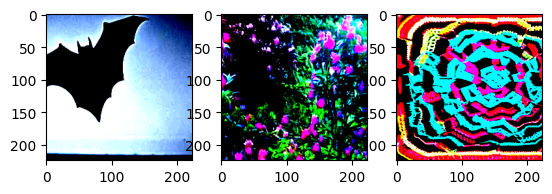

In [ ]:
from main_pretrain import OneImageFolder
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

transform_train = transforms.Compose([
        transforms.RandomResizedCrop(args.input_size, scale=(0.2, 1.0), interpolation=3),  # 3 is bicubic
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

dataset_train = OneImageFolder(
    '/content/mae/Modal_Challenge/unlabelled_imgs_content.txt',
     transform=transform_train
     )

samples = torch.stack((dataset_train[10],
                       dataset_train[1000], 
                       dataset_train[10000]))

samples = torch.einsum('bchw->bhwc', samples)


fig = plt.figure()
for i in range(1, 4):
    fig.add_subplot(1, 3, i)
    plt.imshow(samples[i - 1])

plt.show()

In [ ]:
from transformers import AutoImageProcessor, ViTMAEModel, ViTMAEForPreTraining
from transformers import ViTMAEConfig, ViTMAEModel

import torch 
import models_mae

mae_list = list(models_mae.__dict__['mae_vit_base_patch16'](norm_pix_loss=True).state_dict().keys())

model = ViTMAEForPreTraining.from_pretrained('facebook/vit-mae-base')

#list(model.state_dict().keys())

# torch.save(
#     model.state_dict(),
#     '/content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/encoder_decoder_mae_base.pth'
#            )


In [ ]:
# model.state_dict() - OrderedDict( [('layer_name, tensor), ...] )

from collections import OrderedDict

sd_hugging = model.state_dict()

mae = models_mae.__dict__['mae_vit_base_patch16'](norm_pix_loss=True)
sd_mae = mae.state_dict()

sd_new = OrderedDict(zip(sd_mae.keys(), sd_hugging.values()))



In [ ]:
list(sd_mae.keys())

['cls_token',
 'pos_embed',
 'mask_token',
 'decoder_pos_embed',
 'patch_embed.proj.weight',
 'patch_embed.proj.bias',
 'blocks.0.norm1.weight',
 'blocks.0.norm1.bias',
 'blocks.0.attn.qkv.weight',
 'blocks.0.attn.qkv.bias',
 'blocks.0.attn.proj.weight',
 'blocks.0.attn.proj.bias',
 'blocks.0.norm2.weight',
 'blocks.0.norm2.bias',
 'blocks.0.mlp.fc1.weight',
 'blocks.0.mlp.fc1.bias',
 'blocks.0.mlp.fc2.weight',
 'blocks.0.mlp.fc2.bias',
 'blocks.1.norm1.weight',
 'blocks.1.norm1.bias',
 'blocks.1.attn.qkv.weight',
 'blocks.1.attn.qkv.bias',
 'blocks.1.attn.proj.weight',
 'blocks.1.attn.proj.bias',
 'blocks.1.norm2.weight',
 'blocks.1.norm2.bias',
 'blocks.1.mlp.fc1.weight',
 'blocks.1.mlp.fc1.bias',
 'blocks.1.mlp.fc2.weight',
 'blocks.1.mlp.fc2.bias',
 'blocks.2.norm1.weight',
 'blocks.2.norm1.bias',
 'blocks.2.attn.qkv.weight',
 'blocks.2.attn.qkv.bias',
 'blocks.2.attn.proj.weight',
 'blocks.2.attn.proj.bias',
 'blocks.2.norm2.weight',
 'blocks.2.norm2.bias',
 'blocks.2.mlp.fc1.weig

In [ ]:
list(sd_hugging.keys())

['vit.embeddings.cls_token',
 'vit.embeddings.position_embeddings',
 'vit.embeddings.patch_embeddings.projection.weight',
 'vit.embeddings.patch_embeddings.projection.bias',
 'vit.encoder.layer.0.attention.attention.query.weight',
 'vit.encoder.layer.0.attention.attention.query.bias',
 'vit.encoder.layer.0.attention.attention.key.weight',
 'vit.encoder.layer.0.attention.attention.key.bias',
 'vit.encoder.layer.0.attention.attention.value.weight',
 'vit.encoder.layer.0.attention.attention.value.bias',
 'vit.encoder.layer.0.attention.output.dense.weight',
 'vit.encoder.layer.0.attention.output.dense.bias',
 'vit.encoder.layer.0.intermediate.dense.weight',
 'vit.encoder.layer.0.intermediate.dense.bias',
 'vit.encoder.layer.0.output.dense.weight',
 'vit.encoder.layer.0.output.dense.bias',
 'vit.encoder.layer.0.layernorm_before.weight',
 'vit.encoder.layer.0.layernorm_before.bias',
 'vit.encoder.layer.0.layernorm_after.weight',
 'vit.encoder.layer.0.layernorm_after.bias',
 'vit.encoder.laye

In [ ]:
path = '/content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/encoder_decoder_mae_base.pth'
checkpoint = torch.load(path, map_location='cpu')
mae = models_mae.__dict__['mae_vit_base_patch16'](norm_pix_loss=True)
# mae.load_state_dict(checkpoint)

# layers_list = list(mae.state_dict().keys())

# for i, param in mae.parameters():
#     if param.requires_grad == False:
#         print(layers_list[i])

## Hugging Face backbone model finetuning:

In [7]:
!git clone --branch mae https://github.com/ShulzhenkoPetr/Modal_Challenge.git

Cloning into 'Modal_Challenge'...
remote: Enumerating objects: 408, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 408 (delta 93), reused 97 (delta 42), pack-reused 256
Receiving objects: 100% (408/408), 12.88 MiB | 21.04 MiB/s, done.
Resolving deltas: 100% (226/226), done.


In [25]:
with open('/content/mae/Modal_Challenge/main_pretrain.py', 'r') as f:
    code_lines = f.readlines()

with open('/content/mae/main_pretrain.py', 'w') as f:
    f.writelines(code_lines)

In [26]:
with open('/content/mae/Modal_Challenge/engine_pretrain.py', 'r') as f:
    code_lines = f.readlines()

with open('/content/mae/engine_pretrain.py', 'w') as f:
    f.writelines(code_lines)

In [ ]:
from transformers import ViTMAEForPreTraining, AutoImageProcessor
from PIL import Image

image_processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base")

img = Image.open('/content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train/Conestoga wagon/000000.jpg').convert('RGB')

image_processor(images=img, return_tensors="pt")

{'pixel_values': tensor([[[[-1.4158, -1.4329, -1.3815,  ..., -0.5767, -1.5014, -1.3987],
          [-1.5870, -1.5185, -1.3987,  ..., -1.3815, -1.3130, -1.4843],
          [-1.3130, -1.3644, -1.2959,  ..., -1.3987, -1.7240, -1.5699],
          ...,
          [ 1.7694,  2.1290,  2.1633,  ...,  0.2967,  0.3138,  0.1083],
          [ 1.5297,  1.8379,  2.1119,  ..., -0.1657, -0.2171, -0.1999],
          [ 1.2557,  1.4440,  1.7009,  ..., -0.2513, -0.3541, -0.3369]],

         [[-1.2654, -1.2829, -1.2304,  ..., -0.4076, -1.3529, -1.2479],
          [-1.4405, -1.3704, -1.2479,  ..., -1.2304, -1.1604, -1.3354],
          [-1.1604, -1.2129, -1.1429,  ..., -1.2479, -1.5805, -1.4230],
          ...,
          [ 1.3957,  1.6583,  1.5182,  ..., -0.5126, -0.4951, -0.7052],
          [ 1.2731,  1.4832,  1.5882,  ..., -0.9503, -1.0028, -0.9853],
          [ 1.0805,  1.1506,  1.2206,  ..., -1.0203, -1.1078, -1.0903]],

         [[-0.9156, -0.9330, -0.8807,  ..., -0.0267, -0.9678, -0.8633],
          [-1

In [ ]:
%run main_pretrain.py \
    --batch_size 64 \
    --epochs 300 \
    --warmup_epochs 40 \
    --blr 1.5e-4 \
    --weight_decay 0.05 \
    --data_path /content/mae/Modal_Challenge/unlabelled_imgs_content.txt \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints \
    --hugging_mae

Not using distributed mode
[13:06:15.169104] job dir: /content/mae
[13:06:15.169233] Namespace(batch_size=64,
epochs=300,
accum_iter=1,
model='mae_vit_large_patch16',
input_size=224,
mask_ratio=0.75,
norm_pix_loss=False,
weight_decay=0.05,
lr=None,
blr=0.00015,
min_lr=0.0,
warmup_epochs=40,
data_path='/content/mae/Modal_Challenge/unlabelled_imgs_content.txt',
output_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints',
log_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs',
device='cuda',
seed=0,
resume='',
pretrained_encoder='',
hugging_mae=True,
start_epoch=0,
num_workers=10,
pin_mem=True,
world_size=1,
local_rank=-1,
dist_on_itp=False,
dist_url='env://',
distributed=False)


[13:06:15.661966] 296874


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[13:06:24.569221] Model = ViTMAEForPreTraining(
  (vit): ViTMAEModel(
    (embeddings): ViTMAEEmbeddings(
      (patch_embeddings): ViTMAEPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
    )
    (encoder): ViTMAEEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTMAELayer(
          (attention): ViTMAEAttention(
            (attention): ViTMAESelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTMAESelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTMAEIntermediate(
            (dense): Linear(in_features=

Training Epoch 0: 100%|██████████| 4638/4638 [41:09<00:00,  1.88it/s]


[13:47:43.739929] Averaged stats: lr: 0.000001  loss: 0.3934 (0.4012)
[13:47:47.889698] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__13_06_15
[13:47:47.889809] Epoch starts


Training Epoch 1: 100%|██████████| 4638/4638 [41:00<00:00,  1.88it/s]


[14:28:48.481422] Averaged stats: lr: 0.000002  loss: 0.3854 (0.3986)
[14:28:52.807112] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__13_06_15
[14:28:52.807243] Epoch starts


Training Epoch 2: 100%|██████████| 4638/4638 [41:04<00:00,  1.88it/s]


[15:09:57.088884] Averaged stats: lr: 0.000003  loss: 0.4065 (0.3971)
[15:10:01.777118] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__13_06_15
[15:10:01.777231] Epoch starts


Training Epoch 3: 100%|██████████| 4638/4638 [41:03<00:00,  1.88it/s]


[15:51:05.170188] Averaged stats: lr: 0.000004  loss: 0.4018 (0.3962)
[15:51:12.040504] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__13_06_15
[15:51:12.040647] Epoch starts


Training Epoch 4: 100%|██████████| 4638/4638 [41:07<00:00,  1.88it/s]


[16:32:19.198507] Averaged stats: lr: 0.000005  loss: 0.4109 (0.3954)
[16:32:23.705083] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__13_06_15
[16:32:23.705191] Epoch starts


Training Epoch 5: 100%|██████████| 4638/4638 [41:05<00:00,  1.88it/s]


[17:13:29.404351] Averaged stats: lr: 0.000006  loss: 0.3923 (0.3946)
[17:13:33.960063] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__13_06_15
[17:13:33.960186] Epoch starts


Training Epoch 6: 100%|██████████| 4638/4638 [41:07<00:00,  1.88it/s]


[17:54:41.097464] Averaged stats: lr: 0.000007  loss: 0.4045 (0.3942)
[17:54:48.868228] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__13_06_15
[17:54:48.868341] Epoch starts


Training Epoch 7: 100%|██████████| 4638/4638 [41:03<00:00,  1.88it/s]


[18:35:52.847918] Averaged stats: lr: 0.000007  loss: 0.3768 (0.3935)
[18:35:57.795046] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__13_06_15
[18:35:57.795158] Epoch starts


Training Epoch 8: 100%|██████████| 4638/4638 [41:01<00:00,  1.88it/s]


[19:16:59.621573] Averaged stats: lr: 0.000008  loss: 0.3878 (0.3931)
[19:17:07.699012] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__13_06_15
[19:17:07.699160] Epoch starts


Training Epoch 9: 100%|██████████| 4638/4638 [41:05<00:00,  1.88it/s]


[19:58:12.860744] Averaged stats: lr: 0.000009  loss: 0.3859 (0.3927)
[19:58:21.218109] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__13_06_15
[19:58:21.219190] Epoch starts


Training Epoch 10: 100%|██████████| 4638/4638 [41:01<00:00,  1.88it/s]


[20:39:23.182218] Averaged stats: lr: 0.000010  loss: 0.3833 (0.3921)
[20:39:28.080502] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__13_06_15
[20:39:28.081422] Epoch starts


Training Epoch 11:  43%|████▎     | 1977/4638 [17:33<23:38,  1.88it/s]Exception ignored in: <function ZipFile.__del__ at 0x7fb8f73d6dd0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1819, in __del__
    def __del__(self):
KeyboardInterrupt: 
Training Epoch 11:  43%|████▎     | 1977/4638 [17:34<23:38,  1.88it/s]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /content/mae/main_pretrain.py:312 in <module>                                                    │
│                                                                                                  │
│   309 │   args = args.parse_args()                                                               │
│   310 │   if args.output_dir:                                                                    │
│   311 │   │   Path(args.output_dir).mkdir(parents=True, exist_ok=True)                           │
│ ❱ 312 │   main(args)                                                                             │
│   313                                                                                            │
│                                                                                                  │
│ /content/mae/main_pretrain.py:280 in main                                                        │
│                                                                                                  │
│   277 │   │                                                                                      │
│   278 │   │   #rnd_visual_samples = None                                                         │
│   279 │   │                                                                                      │
│ ❱ 280 │   │   train_stats = train_one_epoch(                                                     │
│   281 │   │   │   model, data_loader_train,                                                      │
│   282 │   │   │   optimizer, device, epoch, loss_scaler,                                         │
│   283 │   │   │   log_writer=logger,                                                             │
│                                                                                                  │
│ /content/mae/engine_pretrain.py:70 in train_one_epoch                                            │
│                                                                                                  │
│    67 │   │   │   sys.exit(1)                                                                    │
│    68 │   │                                                                                      │
│    69 │   │   loss /= accum_iter                                                                 │
│ ❱  70 │   │   loss_scaler(loss, optimizer, parameters=model.parameters(),                        │
│    71 │   │   │   │   │   update_grad=(data_iter_step + 1) % accum_iter == 0)                    │
│    72 │   │   if (data_iter_step + 1) % accum_iter == 0:                                         │
│    73 │   │   │   optimizer.zero_grad()                                                          │
│                                                                                                  │
│ /content/mae/util/misc.py:257 in __call__                                                        │
│                                                                                                  │
│   254 │   │   self._scaler = torch.cuda.amp.GradScaler()                                         │
│   255 │                                                                                          │
│   256 │   def __call__(self, loss, optimizer, clip_grad=None, parameters=None, create_graph=Fa   │
│ ❱ 257 │   │   self._scaler.scale(loss).backward(create_graph=create_graph)                       │
│   258 │   │   if update_grad:                                                                    │
│   259 │   │   │   if clip_grad is not None:                                                      │
│   260 │   │   │   │   assert parameters is not None                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/_tensor.py:48

In [ ]:
%run main_pretrain.py \
    --batch_size 64 \
    --accum_iter 8 \
    --epochs 300 \
    --start_epoch 11 \
    --warmup_epochs 40 \
    --blr 1.5e-4 \
    --weight_decay 0.05 \
    --data_path /content/mae/Modal_Challenge/unlabelled_imgs_content.txt \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints \
    --hugging_mae \
    --resume /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints/checkpoint-10.pth

[21:08:26.801787] [21:08:26.801773] [21:08:26.802691] Not using distributed mode
[21:08:26.803856] [21:08:26.803852] [21:08:26.804532] [21:08:26.803840] [21:08:26.804616] [21:08:26.804606] [21:08:26.804655] job dir: /content/mae
[21:08:26.804757] [21:08:26.804753] [21:08:26.804790] [21:08:26.804748] [21:08:26.804833] [21:08:26.804828] [21:08:26.804871] Namespace(batch_size=64,
epochs=300,
accum_iter=8,
model='mae_vit_large_patch16',
input_size=224,
mask_ratio=0.75,
norm_pix_loss=False,
weight_decay=0.05,
lr=None,
blr=0.00015,
min_lr=0.0,
warmup_epochs=40,
data_path='/content/mae/Modal_Challenge/unlabelled_imgs_content.txt',
output_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints',
log_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs',
device='cuda',
seed=0,
resume='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints/checkpoint-10.pth',
pretrained_encoder='',
hugging_mae=True,
start_epoch=11,
num_workers=10,
pin_

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[21:08:36.598689] [21:08:36.598685] [21:08:36.598809] [21:08:36.598668] [21:08:36.600719] [21:08:36.600711] [21:08:36.600756] Model = ViTMAEForPreTraining(
  (vit): ViTMAEModel(
    (embeddings): ViTMAEEmbeddings(
      (patch_embeddings): ViTMAEPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
    )
    (encoder): ViTMAEEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTMAELayer(
          (attention): ViTMAEAttention(
            (attention): ViTMAESelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTMAESelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
    

Training Epoch 11: 100%|██████████| 4638/4638 [37:50<00:00,  2.04it/s]


[21:46:26.946269] [21:46:26.946261] [21:46:26.946417] [21:46:26.946234] [21:46:26.947913] [21:46:26.947898] [21:46:26.948584] Averaged stats: lr: 0.000090  loss: 0.3874 (0.3950)
[21:46:32.087700] [21:46:32.087691] [21:46:32.088221] [21:46:32.087672] [21:46:32.088278] [21:46:32.088272] [21:46:32.088319] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__21_08_27
[21:46:32.088371] [21:46:32.088368] [21:46:32.088411] [21:46:32.088363] [21:46:32.088459] [21:46:32.088453] [21:46:32.088501] Epoch starts


Training Epoch 12: 100%|██████████| 4638/4638 [37:54<00:00,  2.04it/s]


[22:24:26.268659] [22:24:26.268651] [22:24:26.269201] [22:24:26.268616] [22:24:26.269245] [22:24:26.269240] [22:24:26.269291] Averaged stats: lr: 0.000097  loss: 0.3827 (0.3945)
[22:24:31.390248] [22:24:31.390244] [22:24:31.390346] [22:24:31.390227] [22:24:31.390378] [22:24:31.390375] [22:24:31.392155] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__21_08_27
[22:24:31.392196] [22:24:31.392194] [22:24:31.392225] [22:24:31.392190] [22:24:31.392257] [22:24:31.392254] [22:24:31.392282] Epoch starts


Training Epoch 13:  95%|█████████▌| 4429/4638 [36:09<01:41,  2.07it/s]Exception in thread Thread-44:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/summary/writer/event_file_writer.py", line 244, in run
    self._run()
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/summary/writer/event_file_writer.py", line 289, in _run
    self._record_writer.flush()
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/summary/writer/record_writer.py", line 43, in flush
    self._writer.flush()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/lib/io/file_io.py", line 221, in flush
    self._writable_file.flush()
tensorflow.python.framework.errors_impl.FailedPreconditionError: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_30__21_08_27/events.out.tfevents.1685485480.61146efd694c.702

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /content/mae/main_pretrain.py:315 in <module>                                                    │
│                                                                                                  │
│   312 │   args = args.parse_args()                                                               │
│   313 │   if args.output_dir:                                                                    │
│   314 │   │   Path(args.output_dir).mkdir(parents=True, exist_ok=True)                           │
│ ❱ 315 │   main(args)                                                                             │
│   316                                                                                            │
│                                                                                                  │
│ /content/mae/main_pretrain.py:283 in main                                                        │
│                                                                                                  │
│   280 │   │                                                                                      │
│   281 │   │   #rnd_visual_samples = None                                                         │
│   282 │   │                                                                                      │
│ ❱ 283 │   │   train_stats = train_one_epoch(                                                     │
│   284 │   │   │   model, data_loader_train,                                                      │
│   285 │   │   │   optimizer, device, epoch, loss_scaler,                                         │
│   286 │   │   │   log_writer=logger,                                                             │
│                                                                                                  │
│ /content/mae/engine_pretrain.py:88 in train_one_epoch                                            │
│                                                                                                  │
│    85 │   │   │   This calibrates different curves when batch size changes.                      │
│    86 │   │   │   """                                                                            │
│    87 │   │   │   epoch_1000x = int((data_iter_step / len(data_loader) + epoch) * 1000)          │
│ ❱  88 │   │   │   log_writer.add_scalar('train_loss', loss_value_reduce, epoch_1000x)            │
│    89 │   │   │   log_writer.add_scalar('lr', lr, epoch_1000x)                                   │
│    90                                                                                            │
│    91                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/writer.py:391 in add_scalar      │
│                                                                                                  │
│    388 │   │   summary = scalar(                                                                 │
│    389 │   │   │   tag, scalar_value, new_style=new_style, double_precision=double_precision     │
│    390 │   │   )                                                                                 │
│ ❱  391 │   │   self._get_file_writer().add_summary(summary, global_step, walltime)               │
│    392 │                                                                                         │
│    393 │   def add_scalars(self, main_tag, tag_scalar_dict, global_step=None, walltime=None):    │
│    394 │   │   """Adds many scalar data to summary.                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/utils/tensorb

In [ ]:
%run main_pretrain.py \
    --batch_size 64 \
    --accum_iter 16 \
    --epochs 300 \
    --start_epoch 13 \
    --warmup_epochs 15 \
    --blr 1.5e-4 \
    --weight_decay 0.05 \
    --data_path /content/mae/Modal_Challenge/unlabelled_imgs_content.txt \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints \
    --hugging_mae \
    --resume /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints/checkpoint-12.pth

[06:32:51.452364] [06:32:51.452356] [06:32:51.452478] [06:32:51.452349] [06:32:51.452543] [06:32:51.452536] [06:32:51.452589] [06:32:51.452342] [06:32:51.452645] [06:32:51.452640] [06:32:51.452689] [06:32:51.452635] [06:32:51.452739] [06:32:51.452733] [06:32:51.452781] [06:32:51.452318] [06:32:51.452841] [06:32:51.452836] [06:32:51.452904] [06:32:51.452831] [06:32:51.452952] [06:32:51.452947] [06:32:51.452995] [06:32:51.452826] [06:32:51.453049] [06:32:51.453045] [06:32:51.453092] [06:32:51.453039] [06:32:51.453142] [06:32:51.453136] [06:32:51.453186] Not using distributed mode
[06:32:51.460203] [06:32:51.460197] [06:32:51.460273] [06:32:51.460173] [06:32:51.460326] [06:32:51.460320] [06:32:51.461364] [06:32:51.460167] [06:32:51.461429] [06:32:51.461423] [06:32:51.461473] [06:32:51.461416] [06:32:51.461527] [06:32:51.461517] [06:32:51.461572] [06:32:51.460162] [06:32:51.461632] [06:32:51.461627] [06:32:51.461675] [06:32:51.461622] [06:32:51.461723] [06:32:51.461718] [06:32:51.461766] [

Training Epoch 13: 100%|██████████| 4638/4638 [39:47<00:00,  1.94it/s]


[07:12:44.285249] [07:12:44.285244] [07:12:44.285365] [07:12:44.285240] [07:12:44.286664] [07:12:44.286653] [07:12:44.286967] [07:12:44.285234] [07:12:44.287005] [07:12:44.287003] [07:12:44.287033] [07:12:44.287000] [07:12:44.287064] [07:12:44.287061] [07:12:44.287092] [07:12:44.285228] [07:12:44.287129] [07:12:44.287126] [07:12:44.287157] [07:12:44.287124] [07:12:44.287189] [07:12:44.287186] [07:12:44.287217] [07:12:44.287121] [07:12:44.287251] [07:12:44.287249] [07:12:44.287280] [07:12:44.287246] [07:12:44.287310] [07:12:44.287307] [07:12:44.287338] [07:12:44.285205] [07:12:44.287377] [07:12:44.287375] [07:12:44.287405] [07:12:44.287373] [07:12:44.287436] [07:12:44.287433] [07:12:44.287464] [07:12:44.287370] [07:12:44.287502] [07:12:44.287500] [07:12:44.287529] [07:12:44.287492] [07:12:44.287558] [07:12:44.287555] [07:12:44.287585] [07:12:44.287367] [07:12:44.287621] [07:12:44.287619] [07:12:44.287650] [07:12:44.287617] [07:12:44.287686] [07:12:44.287683] [07:12:44.287713] [07:12:44.

Training Epoch 14: 100%|██████████| 4638/4638 [39:49<00:00,  1.94it/s]


[07:52:41.373781] [07:52:41.373777] [07:52:41.375025] [07:52:41.373773] [07:52:41.375116] [07:52:41.375108] [07:52:41.375158] [07:52:41.373769] [07:52:41.376744] [07:52:41.376741] [07:52:41.376808] [07:52:41.376728] [07:52:41.376841] [07:52:41.376838] [07:52:41.378022] [07:52:41.373764] [07:52:41.378069] [07:52:41.378066] [07:52:41.378097] [07:52:41.378064] [07:52:41.378129] [07:52:41.378126] [07:52:41.378160] [07:52:41.378060] [07:52:41.378195] [07:52:41.378192] [07:52:41.378225] [07:52:41.378189] [07:52:41.378257] [07:52:41.378255] [07:52:41.378298] [07:52:41.373741] [07:52:41.378357] [07:52:41.378354] [07:52:41.378386] [07:52:41.378352] [07:52:41.378418] [07:52:41.378415] [07:52:41.378445] [07:52:41.378349] [07:52:41.378479] [07:52:41.378476] [07:52:41.378507] [07:52:41.378473] [07:52:41.378537] [07:52:41.378535] [07:52:41.378565] [07:52:41.378346] [07:52:41.378601] [07:52:41.378599] [07:52:41.378629] [07:52:41.378596] [07:52:41.378660] [07:52:41.378658] [07:52:41.378687] [07:52:41.

Training Epoch 15:  49%|████▉     | 2284/4638 [19:39<20:00,  1.96it/s]

In [ ]:
%run main_pretrain.py \
  --batch_size 64 \
  --accum_iter 16 \
  --epochs 300 \
  --start_epoch 1 \
  --warmup_epochs 40 \
  --blr 1.5e-4 \
  --weight_decay 0.05 \
  --data_path /content/mae/Modal_Challenge/unlabelled_imgs_content.txt \
  --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs \
  --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints/smaller_lr \
  --hugging_mae \
  --resume /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints/checkpoint-14.pth                       

Not using distributed mode
[10:30:51.572410] job dir: /content/mae
[10:30:51.572865] Namespace(batch_size=64,
epochs=300,
accum_iter=16,
model='mae_vit_large_patch16',
input_size=224,
mask_ratio=0.75,
norm_pix_loss=False,
weight_decay=0.05,
lr=None,
blr=0.00015,
min_lr=0.0,
warmup_epochs=40,
data_path='/content/mae/Modal_Challenge/unlabelled_imgs_content.txt',
output_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints/smaller_lr',
log_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs',
device='cuda',
seed=0,
resume='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints/checkpoint-14.pth',
pretrained_encoder='',
hugging_mae=True,
start_epoch=1,
num_workers=10,
pin_mem=True,
world_size=1,
local_rank=-1,
dist_on_itp=False,
dist_url='env://',
distributed=False)


[10:30:52.159056] 296874


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10:31:03.480938] Model = ViTMAEForPreTraining(
  (vit): ViTMAEModel(
    (embeddings): ViTMAEEmbeddings(
      (patch_embeddings): ViTMAEPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
    )
    (encoder): ViTMAEEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTMAELayer(
          (attention): ViTMAEAttention(
            (attention): ViTMAESelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTMAESelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTMAEIntermediate(
            (dense): Linear(in_features=

Training Epoch 15: 100%|██████████| 4638/4638 [24:24<00:00,  3.17it/s]


[10:55:41.361558] Averaged stats: lr: 0.000240  loss: 0.3894 (0.3860)
[10:55:50.592080] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[10:55:50.592180] Epoch starts


Training Epoch 16: 100%|██████████| 4638/4638 [24:18<00:00,  3.18it/s]


[11:20:08.754077] Averaged stats: lr: 0.000255  loss: 0.3770 (0.3789)
[11:20:18.696218] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[11:20:18.696336] Epoch starts


Training Epoch 17: 100%|██████████| 4638/4638 [24:26<00:00,  3.16it/s]


[11:44:45.750800] Averaged stats: lr: 0.000270  loss: 0.4062 (0.3997)
[11:44:50.643687] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[11:44:50.643791] Epoch starts


Training Epoch 18: 100%|██████████| 4638/4638 [24:23<00:00,  3.17it/s]


[12:09:14.271987] Averaged stats: lr: 0.000285  loss: 0.4060 (0.3987)
[12:09:22.594278] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[12:09:22.594431] Epoch starts


Training Epoch 19: 100%|██████████| 4638/4638 [24:53<00:00,  3.11it/s]


[12:34:16.375665] Averaged stats: lr: 0.000300  loss: 0.4142 (0.3982)
[12:34:20.977272] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[12:34:20.977387] Epoch starts


Training Epoch 20: 100%|██████████| 4638/4638 [26:59<00:00,  2.86it/s]


[13:01:21.000027] Averaged stats: lr: 0.000315  loss: 0.3928 (0.3980)
[13:01:25.555297] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[13:01:25.555413] Epoch starts


Training Epoch 21: 100%|██████████| 4638/4638 [27:26<00:00,  2.82it/s]


[13:28:52.483943] Averaged stats: lr: 0.000330  loss: 0.4109 (0.3980)
[13:28:56.985285] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[13:28:56.985412] Epoch starts


Training Epoch 22: 100%|██████████| 4638/4638 [26:56<00:00,  2.87it/s]


[13:55:53.830269] Averaged stats: lr: 0.000345  loss: 0.3833 (0.3978)
[13:55:58.522377] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[13:55:58.522514] Epoch starts


Training Epoch 23: 100%|██████████| 4638/4638 [24:53<00:00,  3.11it/s]


[14:20:51.634036] Averaged stats: lr: 0.000360  loss: 0.3966 (0.3979)
[14:20:58.437996] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[14:20:58.438101] Epoch starts


Training Epoch 24: 100%|██████████| 4638/4638 [25:35<00:00,  3.02it/s]


[14:46:34.384782] Averaged stats: lr: 0.000375  loss: 0.3929 (0.3981)
[14:46:42.246626] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[14:46:42.246748] Epoch starts


Training Epoch 25: 100%|██████████| 4638/4638 [25:08<00:00,  3.07it/s]


[15:11:50.830109] Averaged stats: lr: 0.000390  loss: 0.3899 (0.3981)
[15:11:55.286952] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[15:11:55.287897] Epoch starts


Training Epoch 26: 100%|██████████| 4638/4638 [24:07<00:00,  3.21it/s]


[15:36:02.422928] Averaged stats: lr: 0.000405  loss: 0.3836 (0.3989)
[15:36:10.488561] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_logs/mae_vit_large_patch16/2023_05_31__10_30_52
[15:36:10.488679] Epoch starts


Training Epoch 27:   2%|▏         | 113/4638 [00:42<28:07,  2.68it/s]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /content/mae/main_pretrain.py:309 in <module>                                                    │
│                                                                                                  │
│   306 │   args = args.parse_args()                                                               │
│   307 │   if args.output_dir:                                                                    │
│   308 │   │   Path(args.output_dir).mkdir(parents=True, exist_ok=True)                           │
│ ❱ 309 │   main(args)                                                                             │
│   310                                                                                            │
│                                                                                                  │
│ /content/mae/main_pretrain.py:277 in main                                                        │
│                                                                                                  │
│   274 │   │                                                                                      │
│   275 │   │   #rnd_visual_samples = None                                                         │
│   276 │   │                                                                                      │
│ ❱ 277 │   │   train_stats = train_one_epoch(                                                     │
│   278 │   │   │   model, data_loader_train,                                                      │
│   279 │   │   │   optimizer, device, epoch, loss_scaler,                                         │
│   280 │   │   │   log_writer=logger,                                                             │
│                                                                                                  │
│ /content/mae/engine_pretrain.py:58 in train_one_epoch                                            │
│                                                                                                  │
│    55 │   │   │   if args.hugging_mae:                                                           │
│    56 │   │   │   │   #inputs = image_processor(images=samples, return_tensors="pt")             │
│    57 │   │   │   │                                                                              │
│ ❱  58 │   │   │   │   outputs = model(samples)                                                   │
│    59 │   │   │   │   loss = outputs.loss                                                        │
│    60 │   │   │   else:                                                                          │
│    61 │   │   │   │   loss, _, _ = model(samples, mask_ratio=args.mask_ratio)                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501 in _call_impl            │
│                                                                                                  │
│   1498 │   │   if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks   │
│   1499 │   │   │   │   or _global_backward_pre_hooks or _global_backward_hooks                   │
│   1500 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1501 │   │   │   return forward_call(*args, **kwargs)                                          │
│   1502 │   │   # Do not call functions when jit is used                                          │
│   1503 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1504 │   │   backward_pre_hooks = []                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/models

Let's choose Epoch 16 model

In [ ]:
import torch

checkpoint_path = '/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/hug_checkpoints/smaller_lr/checkpoint-16.pth'

checkpoint = torch.load(checkpoint_path, map_location='cpu')

Not freezed encoder: 

In [ ]:
from transformers import ViTForImageClassification

checkpoint_sd = checkpoint['model']

model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

sd = model.state_dict()

with torch.no_grad():
    for layer in sd:
        if layer in checkpoint_sd:
            sd[layer].data = checkpoint_sd[layer].data

model.load_state_dict(sd)

model.classifier.out_features = 48
model.classifier.weight = torch.nn.Parameter(model.classifier.weight[:48, :])
model.classifier.bias = torch.nn.Parameter(torch.randn(48))

model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [ ]:
torch.save(model.state_dict(),
           '/content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/vit_16epoch_unlabelled_classifier_not_freezed.pth')

freezed encoder: 

In [ ]:
from transformers import ViTForImageClassification

checkpoint_sd = checkpoint['model']

model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

sd = model.state_dict()

with torch.no_grad():
    for layer in sd:
        if layer in checkpoint_sd:
            sd[layer].data = checkpoint_sd[layer].data

model.load_state_dict(sd)

vit_layers = list(model.state_dict().keys())
for i, param in enumerate(model.parameters()):
    if vit_layers[i] in checkpoint_sd:
        param.requires_grad_(False)

model.classifier.out_features = 48
model.classifier.weight = torch.nn.Parameter(model.classifier.weight[:48, :])
model.classifier.bias = torch.nn.Parameter(torch.randn(48))

model


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [ ]:
torch.save(model.state_dict(),
           '/content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/vit_16epoch_unlabelled_classifier.pth')

In [ ]:
from PIL import Image
from transformers import AutoImageProcessor

vit_original_model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

image_proc = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

img_path = '/content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train/bat/000002.jpg'
img = Image.open(img_path).convert('RGB')

img_processed = image_proc(images=img, return_tensors='pt')

print(vit_original_model(img_processed['pixel_values']))
print(model(img_processed['pixel_values']))

### Train on cropped (not "ImageNet") dataset

In [27]:
%run main_pretrain.py \
    --batch_size 64 \
    --accum_iter 16 \
    --epochs 300 \
    --warmup_epochs 40 \
    --blr 1.5e-4 \
    --weight_decay 0.05 \
    --data_path /content/gdrive/MyDrive/Modal_Challendge_dataset/divide_unlabelled/unlabelled_not_imagenet_content.txt \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_checkpoints \
    --hugging_mae

[17:37:47.964563] Not using distributed mode
[17:37:47.964755] [17:37:47.964746] [17:37:47.964799] job dir: /content/mae
[17:37:47.964897] [17:37:47.964892] [17:37:47.967374] Namespace(batch_size=64,
epochs=300,
accum_iter=16,
model='mae_vit_large_patch16',
input_size=224,
mask_ratio=0.75,
norm_pix_loss=False,
weight_decay=0.05,
lr=None,
blr=0.00015,
min_lr=0.0,
warmup_epochs=40,
data_path='/content/gdrive/MyDrive/Modal_Challendge_dataset/divide_unlabelled/unlabelled_not_imagenet_content.txt',
output_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_checkpoints',
log_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs',
device='cuda',
seed=0,
resume='',
pretrained_encoder='',
hugging_mae=True,
start_epoch=0,
num_workers=10,
pin_mem=True,
world_size=1,
local_rank=-1,
dist_on_itp=False,
dist_url='env://',
distributed=False)


[17:37:48.910371] [17:37:48.910344] [17:37:48.910477] 215766


[17:37:54.903270] [17:37:54.903256] [17:37:54.903383] Model = ViTMAEForPreTraining(
  (vit): ViTMAEModel(
    (embeddings): ViTMAEEmbeddings(
      (patch_embeddings): ViTMAEPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
    )
    (encoder): ViTMAEEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTMAELayer(
          (attention): ViTMAEAttention(
            (attention): ViTMAESelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTMAESelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTMAEIntermediate(
    

Training Epoch 0:   3%|▎         | 91/3371 [00:53<27:08,  2.01it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f74dcc45b40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Training Epoch 0:   3%|▎         | 92/3371 [00:54<27:07,  2.01it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f74dcc45b40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/loca

[18:07:17.713239] [18:07:17.713115] [18:07:17.713694] Averaged stats: lr: 0.000015  loss: 0.4012 (0.4147)
[18:07:24.946375] [18:07:24.946357] [18:07:24.946477] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__17_37_48
[18:07:24.946498] [18:07:24.946495] [18:07:24.946515] Epoch starts


Training Epoch 1: 100%|██████████| 3371/3371 [28:44<00:00,  1.95it/s]


[18:36:09.862417] [18:36:09.862382] [18:36:09.862552] Averaged stats: lr: 0.000030  loss: 0.3972 (0.4119)
[18:36:14.410274] [18:36:14.410256] [18:36:14.410396] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__17_37_48
[18:36:14.410445] [18:36:14.410438] [18:36:14.410487] Epoch starts


Training Epoch 2: 100%|██████████| 3371/3371 [28:45<00:00,  1.95it/s]


[19:05:00.311849] [19:05:00.311820] [19:05:00.311964] Averaged stats: lr: 0.000045  loss: 0.3934 (0.4107)
[19:05:05.943994] [19:05:05.943976] [19:05:05.944110] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__17_37_48
[19:05:05.944151] [19:05:05.944147] [19:05:05.944184] Epoch starts


Training Epoch 3: 100%|██████████| 3371/3371 [28:59<00:00,  1.94it/s]


[19:34:05.592897] [19:34:05.592870] [19:34:05.593024] Averaged stats: lr: 0.000060  loss: 0.4103 (0.4099)
[19:34:10.230142] [19:34:10.230126] [19:34:10.231232] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__17_37_48
[19:34:10.231312] [19:34:10.231305] [19:34:10.231350] Epoch starts


Training Epoch 4: 100%|██████████| 3371/3371 [29:03<00:00,  1.93it/s]


[20:03:13.746482] [20:03:13.746453] [20:03:13.746864] Averaged stats: lr: 0.000075  loss: 0.4170 (0.4094)
[20:03:18.463229] [20:03:18.463208] [20:03:18.464136] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__17_37_48
[20:03:18.464191] [20:03:18.464185] [20:03:18.464229] Epoch starts


Training Epoch 5: 100%|██████████| 3371/3371 [28:58<00:00,  1.94it/s]


[20:32:17.610542] [20:32:17.610504] [20:32:17.615682] Averaged stats: lr: 0.000090  loss: 0.3946 (0.4089)
[20:32:24.415991] [20:32:24.415971] [20:32:24.416750] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__17_37_48
[20:32:24.416804] [20:32:24.416798] [20:32:24.416842] Epoch starts


Training Epoch 6:   5%|▌         | 178/3371 [01:36<27:06,  1.96it/s]Exception ignored in: Exception in thread Thread-826 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 51, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 28, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reductions.py", line 307, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.10/multiprocessing/resource_sharer.py", line 57, in 

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /content/mae/main_pretrain.py:309 in <module>                                                    │
│                                                                                                  │
│   306 │   args = args.parse_args()                                                               │
│   307 │   if args.output_dir:                                                                    │
│   308 │   │   Path(args.output_dir).mkdir(parents=True, exist_ok=True)                           │
│ ❱ 309 │   main(args)                                                                             │
│   310                                                                                            │
│                                                                                                  │
│ /content/mae/main_pretrain.py:277 in main                                                        │
│                                                                                                  │
│   274 │   │                                                                                      │
│   275 │   │   #rnd_visual_samples = None                                                         │
│   276 │   │                                                                                      │
│ ❱ 277 │   │   train_stats = train_one_epoch(                                                     │
│   278 │   │   │   model, data_loader_train,                                                      │
│   279 │   │   │   optimizer, device, epoch, loss_scaler,                                         │
│   280 │   │   │   log_writer=logger,                                                             │
│                                                                                                  │
│ /content/mae/engine_pretrain.py:75 in train_one_epoch                                            │
│                                                                                                  │
│    72 │   │   if (data_iter_step + 1) % accum_iter == 0:                                         │
│    73 │   │   │   optimizer.zero_grad()                                                          │
│    74 │   │                                                                                      │
│ ❱  75 │   │   torch.cuda.synchronize()                                                           │
│    76 │   │                                                                                      │
│    77 │   │   metric_logger.update(loss=loss_value)                                              │
│    78                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py:688 in synchronize                │
│                                                                                                  │
│    685 │   """                                                                                   │
│    686 │   _lazy_init()                                                                          │
│    687 │   with torch.cuda.device(device):                                                       │
│ ❱  688 │   │   return torch._C._cuda_synchronize()                                               │
│    689                                                                                           │
│    690                                                                                           │
│    691 def ipc_collect():                                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

In [30]:
%run main_pretrain.py \
  --batch_size 64 \
  --accum_iter 16 \
  --epochs 300 \
  --start_epoch 6 \
  --warmup_epochs 40 \
  --blr 1.5e-3 \
  --start_epoch 6 \
  --weight_decay 0.05 \
  --data_path /content/gdrive/MyDrive/Modal_Challendge_dataset/divide_unlabelled/unlabelled_not_imagenet_content.txt \
  --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs \
  --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_checkpoints \
  --hugging_mae \
  --resume /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_checkpoints/checkpoint-5.pth

[20:38:29.012511] [20:38:29.012492] [20:38:29.012583] Not using distributed mode
[20:38:29.014279] [20:38:29.014275] [20:38:29.015374] [20:38:29.014266] [20:38:29.016096] [20:38:29.016090] [20:38:29.016319] job dir: /content/mae
[20:38:29.017241] [20:38:29.017239] [20:38:29.017267] [20:38:29.017232] [20:38:29.018914] [20:38:29.018910] [20:38:29.018948] Namespace(batch_size=64,
epochs=300,
accum_iter=16,
model='mae_vit_large_patch16',
input_size=224,
mask_ratio=0.75,
norm_pix_loss=False,
weight_decay=0.05,
lr=None,
blr=0.0015,
min_lr=0.0,
warmup_epochs=40,
data_path='/content/gdrive/MyDrive/Modal_Challendge_dataset/divide_unlabelled/unlabelled_not_imagenet_content.txt',
output_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_checkpoints',
log_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs',
device='cuda',
seed=0,
resume='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_checkpoints/checkpoint-5.pth',
pretr

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[20:38:33.240644] [20:38:33.240637] [20:38:33.242072] [20:38:33.240618] [20:38:33.242869] [20:38:33.242856] [20:38:33.243746] Model = ViTMAEForPreTraining(
  (vit): ViTMAEModel(
    (embeddings): ViTMAEEmbeddings(
      (patch_embeddings): ViTMAEPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
    )
    (encoder): ViTMAEEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTMAELayer(
          (attention): ViTMAEAttention(
            (attention): ViTMAESelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTMAESelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
    

Training Epoch 6: 100%|██████████| 3371/3371 [28:47<00:00,  1.95it/s]


[21:07:24.157492] [21:07:24.157483] [21:07:24.157643] [21:07:24.157456] [21:07:24.157699] [21:07:24.157693] [21:07:24.157741] Averaged stats: lr: 0.001050  loss: 0.4234 (0.4407)
[21:07:32.578381] [21:07:32.578363] [21:07:32.581614] [21:07:32.578319] [21:07:32.583933] [21:07:32.583903] [21:07:32.586068] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__20_38_29
[21:07:32.586260] [21:07:32.586243] [21:07:32.586390] [21:07:32.586224] [21:07:32.586530] [21:07:32.586512] [21:07:32.586646] Epoch starts


Training Epoch 7: 100%|██████████| 3371/3371 [29:05<00:00,  1.93it/s]


[21:36:38.461037] [21:36:38.461026] [21:36:38.461166] [21:36:38.460999] [21:36:38.462721] [21:36:38.462704] [21:36:38.462777] Averaged stats: lr: 0.001200  loss: 0.4275 (0.4377)
[21:36:47.372973] [21:36:47.372969] [21:36:47.373097] [21:36:47.372953] [21:36:47.373142] [21:36:47.373136] [21:36:47.373186] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__20_38_29
[21:36:47.373253] [21:36:47.373249] [21:36:47.376500] [21:36:47.373243] [21:36:47.376578] [21:36:47.376571] [21:36:47.377589] Epoch starts


Training Epoch 8: 100%|██████████| 3371/3371 [28:56<00:00,  1.94it/s]


[22:05:43.918467] [22:05:43.918459] [22:05:43.918546] [22:05:43.918435] [22:05:43.918569] [22:05:43.918566] [22:05:43.918588] Averaged stats: lr: 0.001350  loss: 0.4242 (0.4402)
[22:05:49.101930] [22:05:49.101907] [22:05:49.102834] [22:05:49.101887] [22:05:49.102896] [22:05:49.102890] [22:05:49.102951] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__20_38_29
[22:05:49.103007] [22:05:49.103002] [22:05:49.103049] [22:05:49.102997] [22:05:49.103096] [22:05:49.103091] [22:05:49.103134] Epoch starts


Training Epoch 9: 100%|██████████| 3371/3371 [29:02<00:00,  1.93it/s]


[22:34:51.863497] [22:34:51.863490] [22:34:51.863611] [22:34:51.863467] [22:34:51.863660] [22:34:51.863656] [22:34:51.863691] Averaged stats: lr: 0.001500  loss: 0.4423 (0.4422)
[22:34:56.620559] [22:34:56.620554] [22:34:56.621747] [22:34:56.620538] [22:34:56.621792] [22:34:56.621788] [22:34:56.623138] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__20_38_29
[22:34:56.623182] [22:34:56.623179] [22:34:56.624155] [22:34:56.623175] [22:34:56.624193] [22:34:56.624189] [22:34:56.624225] Epoch starts


Training Epoch 10: 100%|██████████| 3371/3371 [28:57<00:00,  1.94it/s]


[23:03:54.931048] [23:03:54.930986] [23:03:54.937135] [23:03:54.930854] [23:03:54.937403] [23:03:54.937380] [23:03:54.937564] Averaged stats: lr: 0.001650  loss: 0.4542 (0.4440)
[23:04:04.229825] [23:04:04.229819] [23:04:04.230304] [23:04:04.229799] [23:04:04.230358] [23:04:04.230352] [23:04:04.230397] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__20_38_29
[23:04:04.230455] [23:04:04.230451] [23:04:04.230495] [23:04:04.230446] [23:04:04.230541] [23:04:04.230536] [23:04:04.230581] Epoch starts


Training Epoch 11: 100%|██████████| 3371/3371 [28:59<00:00,  1.94it/s]


[23:33:04.280227] [23:33:04.280216] [23:33:04.280386] [23:33:04.280183] [23:33:04.280448] [23:33:04.280442] [23:33:04.280490] Averaged stats: lr: 0.001800  loss: 0.4373 (0.4454)
[23:33:09.319228] [23:33:09.319223] [23:33:09.319334] [23:33:09.319207] [23:33:09.320812] [23:33:09.320798] [23:33:09.320858] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__20_38_29
[23:33:09.320919] [23:33:09.320915] [23:33:09.320964] [23:33:09.320909] [23:33:09.320993] [23:33:09.320989] [23:33:09.321017] Epoch starts


Training Epoch 12: 100%|██████████| 3371/3371 [28:58<00:00,  1.94it/s]


[00:02:07.891942] [00:02:07.891932] [00:02:07.892058] [00:02:07.891892] [00:02:07.892105] [00:02:07.892099] [00:02:07.892149] Averaged stats: lr: 0.001950  loss: 0.4475 (0.4465)
[00:02:13.409950] [00:02:13.409922] [00:02:13.410876] [00:02:13.409899] [00:02:13.410946] [00:02:13.410940] [00:02:13.410973] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/not_imagenet_logs/mae_vit_large_patch16/2023_06_01__20_38_29
[00:02:13.411007] [00:02:13.411005] [00:02:13.411037] [00:02:13.411002] [00:02:13.411068] [00:02:13.411065] [00:02:13.411096] Epoch starts


Training Epoch 13:  23%|██▎       | 763/3371 [06:37<22:39,  1.92it/s]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /content/mae/main_pretrain.py:309 in <module>                                                    │
│                                                                                                  │
│   306 │   args = args.parse_args()                                                               │
│   307 │   if args.output_dir:                                                                    │
│   308 │   │   Path(args.output_dir).mkdir(parents=True, exist_ok=True)                           │
│ ❱ 309 │   main(args)                                                                             │
│   310                                                                                            │
│                                                                                                  │
│ /content/mae/main_pretrain.py:277 in main                                                        │
│                                                                                                  │
│   274 │   │                                                                                      │
│   275 │   │   #rnd_visual_samples = None                                                         │
│   276 │   │                                                                                      │
│ ❱ 277 │   │   train_stats = train_one_epoch(                                                     │
│   278 │   │   │   model, data_loader_train,                                                      │
│   279 │   │   │   optimizer, device, epoch, loss_scaler,                                         │
│   280 │   │   │   log_writer=logger,                                                             │
│                                                                                                  │
│ /content/mae/engine_pretrain.py:58 in train_one_epoch                                            │
│                                                                                                  │
│    55 │   │   │   if args.hugging_mae:                                                           │
│    56 │   │   │   │   #inputs = image_processor(images=samples, return_tensors="pt")             │
│    57 │   │   │   │                                                                              │
│ ❱  58 │   │   │   │   outputs = model(samples)                                                   │
│    59 │   │   │   │   loss = outputs.loss                                                        │
│    60 │   │   │   else:                                                                          │
│    61 │   │   │   │   loss, _, _ = model(samples, mask_ratio=args.mask_ratio)                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501 in _call_impl            │
│                                                                                                  │
│   1498 │   │   if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks   │
│   1499 │   │   │   │   or _global_backward_pre_hooks or _global_backward_hooks                   │
│   1500 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1501 │   │   │   return forward_call(*args, **kwargs)                                          │
│   1502 │   │   # Do not call functions when jit is used                                          │
│   1503 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1504 │   │   backward_pre_hooks = []                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/models

# Classification finetune 

In [8]:
with open('/content/mae/Modal_Challenge/main_finetune.py', 'r') as f:
    code_lines = f.readlines()

with open('/content/mae/main_finetune.py', 'w') as f:
    f.writelines(code_lines)

In [9]:
with open('/content/mae/Modal_Challenge/engine_finetune.py', 'r') as f:
    code_lines = f.readlines()

with open('/content/mae/engine_finetune.py', 'w') as f:
    f.writelines(code_lines)

In [ ]:
%run main_finetune.py \
    --model vit_base_patch16 \
    --batch_size 32 \
    --epochs 100 \
    --accum_iter 3 \
    --warmup_epochs 10 \
    --blr 5e-4 \
    --layer_decay 0.65 \
    --weight_decay 0.05 --drop_path 0.1 --reprob 0.25 --mixup 0.8 --cutmix 1.0 \
    --data_path_train /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt \
    --data_path_val /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt \
    --nb_classes 48 \
    --cls_token \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_checkpoints/not_freezed \
    --hugging_mae \
    --resume /content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/vit_16epoch_unlabelled_classifier_not_freezed.pth

[20:04:34.460666] Not using distributed mode
[20:04:34.461661] [20:04:34.461651] [20:04:34.462194] job dir: /content/mae
[20:04:34.462336] [20:04:34.462330] [20:04:34.463656] Namespace(batch_size=32,
epochs=100,
accum_iter=3,
model='vit_base_patch16',
input_size=224,
drop_path=0.1,
clip_grad=None,
weight_decay=0.05,
lr=None,
blr=0.0005,
layer_decay=0.65,
min_lr=1e-06,
warmup_epochs=10,
color_jitter=None,
aa='rand-m9-mstd0.5-inc1',
smoothing=0.1,
reprob=0.25,
remode='pixel',
recount=1,
resplit=False,
mixup=0.8,
cutmix=1.0,
cutmix_minmax=None,
mixup_prob=1.0,
mixup_switch_prob=0.5,
mixup_mode='batch',
finetune='',
global_pool=False,
data_path_train='/content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt',
data_path_val='/content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt',
nb_classes=48,
output_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_checkpoints/not_freezed',
log_dir='/content/gdri

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[20:04:35.710139] [20:04:35.710125] [20:04:35.710238] Model = ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediat

Training Epoch 0: 1it [00:02,  2.38s/it]

[20:04:38.518680] [20:04:38.518650] [20:04:38.519816] Epoch: [0]  [ 0/18]  eta: 0:00:43  lr: 0.000000  loss: 4.1632 (4.1632)  time: 2.3957  data: 1.9263  max mem: 4877


Training Epoch 0: 18it [00:09,  1.91it/s]


[20:04:45.416507] [20:04:45.416479] [20:04:45.416601] Epoch: [0]  [17/18]  eta: 0:00:00  lr: 0.000016  loss: 4.3541 (4.3686)  time: 0.5161  data: 0.1072  max mem: 5862
[20:04:45.566813] [20:04:45.566801] [20:04:45.567455] Epoch: [0] Total time: 0:00:09 (0.5247 s / it)
[20:04:45.570668] [20:04:45.570655] [20:04:45.570738] Averaged stats: lr: 0.000016  loss: 4.3541 (4.3686)
[20:04:49.868760] [20:04:49.868720] [20:04:49.869111] Test:  [0/5]  eta: 0:00:05  loss: 4.4265 (4.4265)  acc1: 0.0000 (0.0000)  acc5: 9.3750 (9.3750)  time: 1.0615  data: 0.8478  max mem: 5862
[20:04:50.344158] [20:04:50.344143] [20:04:50.344264] Test:  [4/5]  eta: 0:00:00  loss: 4.3267 (4.2882)  acc1: 0.0000 (2.0833)  acc5: 9.3750 (9.0278)  time: 0.3068  data: 0.1710  max mem: 5862
[20:04:50.501493] [20:04:50.501479] [20:04:50.501571] Test: Total time: 0:00:01 (0.3393 s / it)
[20:04:50.501639] [20:04:50.501635] [20:04:50.501665] * Acc@1 2.083 Acc@5 9.028 loss 4.288
[20:04:50.503532] [20:04:50.503522] [20:04:50.503582

Training Epoch 1: 1it [00:02,  2.26s/it]

[20:04:52.799341] [20:04:52.799306] [20:04:52.799439] Epoch: [1]  [ 0/18]  eta: 0:00:40  lr: 0.000019  loss: 4.4067 (4.4067)  time: 2.2703  data: 1.8014  max mem: 5862


Training Epoch 1: 18it [00:09,  1.93it/s]


[20:04:59.680221] [20:04:59.680175] [20:04:59.680365] Epoch: [1]  [17/18]  eta: 0:00:00  lr: 0.000034  loss: 4.1780 (4.2419)  time: 0.5083  data: 0.1005  max mem: 5862
[20:04:59.855411] [20:04:59.855393] [20:04:59.855524] Epoch: [1] Total time: 0:00:09 (0.5182 s / it)
[20:04:59.859956] [20:04:59.859940] [20:04:59.860684] Averaged stats: lr: 0.000034  loss: 4.1780 (4.2419)
[20:05:04.610062] [20:05:04.610012] [20:05:04.610387] Test:  [0/5]  eta: 0:00:06  loss: 4.1910 (4.1910)  acc1: 0.0000 (0.0000)  acc5: 6.2500 (6.2500)  time: 1.2348  data: 1.0283  max mem: 5862
[20:05:05.091095] [20:05:05.091081] [20:05:05.091201] Test:  [4/5]  eta: 0:00:00  loss: 4.1277 (4.1073)  acc1: 0.0000 (2.7778)  acc5: 6.2500 (9.0278)  time: 0.3429  data: 0.2063  max mem: 5862
[20:05:05.256129] [20:05:05.256116] [20:05:05.256258] Test: Total time: 0:00:01 (0.3765 s / it)
[20:05:05.256354] [20:05:05.256349] [20:05:05.256388] * Acc@1 2.778 Acc@5 9.028 loss 4.107
[20:05:05.259267] [20:05:05.259253] [20:05:05.259356

Training Epoch 2: 1it [00:02,  2.46s/it]

[20:05:07.733299] [20:05:07.733273] [20:05:07.735071] Epoch: [2]  [ 0/18]  eta: 0:00:44  lr: 0.000038  loss: 4.1855 (4.1855)  time: 2.4616  data: 1.9967  max mem: 5862


Training Epoch 2: 18it [00:09,  1.86it/s]


[20:05:14.756947] [20:05:14.756915] [20:05:14.757340] Epoch: [2]  [17/18]  eta: 0:00:00  lr: 0.000053  loss: 4.0679 (4.0685)  time: 0.5267  data: 0.1113  max mem: 5862
[20:05:14.926804] [20:05:14.926786] [20:05:14.926931] Epoch: [2] Total time: 0:00:09 (0.5364 s / it)
[20:05:14.931522] [20:05:14.931506] [20:05:14.931586] Averaged stats: lr: 0.000053  loss: 4.0679 (4.0685)
[20:05:19.947118] [20:05:19.947047] [20:05:19.947399] Test:  [0/5]  eta: 0:00:06  loss: 3.8867 (3.8867)  acc1: 0.0000 (0.0000)  acc5: 18.7500 (18.7500)  time: 1.2177  data: 1.0257  max mem: 5862
[20:05:20.440062] [20:05:20.440040] [20:05:20.440178] Test:  [4/5]  eta: 0:00:00  loss: 3.9780 (3.9506)  acc1: 0.0000 (2.0833)  acc5: 6.2500 (11.8056)  time: 0.3419  data: 0.2054  max mem: 5862
[20:05:20.634131] [20:05:20.634112] [20:05:20.634257] Test: Total time: 0:00:01 (0.3813 s / it)
[20:05:20.634341] [20:05:20.634337] [20:05:20.634371] * Acc@1 2.083 Acc@5 11.806 loss 3.951
[20:05:20.637969] [20:05:20.637952] [20:05:20.63

Training Epoch 3: 1it [00:02,  2.61s/it]

[20:05:23.283625] [20:05:23.283598] [20:05:23.283741] Epoch: [3]  [ 0/18]  eta: 0:00:47  lr: 0.000056  loss: 3.8269 (3.8269)  time: 2.6220  data: 2.1367  max mem: 5862


Training Epoch 3: 18it [00:09,  1.83it/s]


[20:05:30.329017] [20:05:30.328988] [20:05:30.329112] Epoch: [3]  [17/18]  eta: 0:00:00  lr: 0.000072  loss: 3.9034 (3.9263)  time: 0.5370  data: 0.1191  max mem: 5862
[20:05:30.498803] [20:05:30.498786] [20:05:30.498903] Epoch: [3] Total time: 0:00:09 (0.5466 s / it)
[20:05:30.502724] [20:05:30.502708] [20:05:30.502836] Averaged stats: lr: 0.000072  loss: 3.9034 (3.9263)
[20:05:35.018064] [20:05:35.018018] [20:05:35.018409] Test:  [0/5]  eta: 0:00:06  loss: 3.8123 (3.8123)  acc1: 0.0000 (0.0000)  acc5: 12.5000 (12.5000)  time: 1.2251  data: 1.0137  max mem: 5862
[20:05:35.500434] [20:05:35.500418] [20:05:35.501299] Test:  [4/5]  eta: 0:00:00  loss: 3.8671 (3.8924)  acc1: 0.0000 (2.0833)  acc5: 9.3750 (10.4167)  time: 0.3412  data: 0.2033  max mem: 5862
[20:05:35.687268] [20:05:35.687240] [20:05:35.687361] Test: Total time: 0:00:01 (0.3792 s / it)
[20:05:35.687483] [20:05:35.687473] [20:05:35.687521] * Acc@1 2.083 Acc@5 10.417 loss 3.892
[20:05:35.690571] [20:05:35.690552] [20:05:35.69

Training Epoch 4: 1it [00:02,  2.71s/it]

[20:05:38.431273] [20:05:38.431242] [20:05:38.438103] Epoch: [4]  [ 0/18]  eta: 0:00:49  lr: 0.000075  loss: 3.9197 (3.9197)  time: 2.7223  data: 2.2169  max mem: 5862


Training Epoch 4: 18it [00:09,  1.83it/s]


[20:05:45.339855] [20:05:45.339823] [20:05:45.339959] Epoch: [4]  [17/18]  eta: 0:00:00  lr: 0.000091  loss: 3.8298 (3.8382)  time: 0.5345  data: 0.1235  max mem: 5862
[20:05:45.527437] [20:05:45.527424] [20:05:45.527552] Epoch: [4] Total time: 0:00:09 (0.5455 s / it)
[20:05:45.531700] [20:05:45.531684] [20:05:45.531777] Averaged stats: lr: 0.000091  loss: 3.8298 (3.8382)
[20:05:55.057610] [20:05:55.057568] [20:05:55.057927] Test:  [0/5]  eta: 0:00:05  loss: 3.8208 (3.8208)  acc1: 0.0000 (0.0000)  acc5: 12.5000 (12.5000)  time: 1.1032  data: 0.9013  max mem: 5862
[20:05:55.573236] [20:05:55.573194] [20:05:55.574396] Test:  [4/5]  eta: 0:00:00  loss: 3.8208 (3.8372)  acc1: 3.1250 (4.1667)  acc5: 12.5000 (14.5833)  time: 0.3230  data: 0.1834  max mem: 5862
[20:05:55.762089] [20:05:55.762075] [20:05:55.762886] Test: Total time: 0:00:01 (0.3620 s / it)
[20:05:55.763044] [20:05:55.763035] [20:05:55.763090] * Acc@1 4.167 Acc@5 14.583 loss 3.837
[20:05:55.765608] [20:05:55.765596] [20:05:55.7

Training Epoch 5: 1it [00:02,  2.73s/it]

[20:05:58.526242] [20:05:58.526197] [20:05:58.526341] Epoch: [5]  [ 0/18]  eta: 0:00:49  lr: 0.000094  loss: 3.7851 (3.7851)  time: 2.7405  data: 2.2644  max mem: 5862


Training Epoch 5: 18it [00:09,  1.85it/s]


[20:06:05.334811] [20:06:05.334780] [20:06:05.334897] Epoch: [5]  [17/18]  eta: 0:00:00  lr: 0.000109  loss: 3.7792 (3.7760)  time: 0.5304  data: 0.1261  max mem: 5862
[20:06:05.512062] [20:06:05.512045] [20:06:05.512893] Epoch: [5] Total time: 0:00:09 (0.5404 s / it)
[20:06:05.516511] [20:06:05.516495] [20:06:05.516586] Averaged stats: lr: 0.000109  loss: 3.7792 (3.7760)
[20:06:11.108840] [20:06:11.108773] [20:06:11.110774] Test:  [0/5]  eta: 0:00:05  loss: 3.7620 (3.7620)  acc1: 6.2500 (6.2500)  acc5: 21.8750 (21.8750)  time: 1.1745  data: 0.9834  max mem: 5862
[20:06:11.586818] [20:06:11.586802] [20:06:11.586929] Test:  [4/5]  eta: 0:00:00  loss: 3.7858 (3.8239)  acc1: 6.2500 (5.5556)  acc5: 21.8750 (22.2222)  time: 0.3299  data: 0.1969  max mem: 5862
[20:06:11.773066] [20:06:11.773050] [20:06:11.773187] Test: Total time: 0:00:01 (0.3681 s / it)
[20:06:11.773313] [20:06:11.773303] [20:06:11.774917] * Acc@1 5.556 Acc@5 22.222 loss 3.824
[20:06:11.776441] [20:06:11.776426] [20:06:11.7

Training Epoch 6: 1it [00:02,  2.77s/it]

[20:06:14.578295] [20:06:14.578264] [20:06:14.579870] Epoch: [6]  [ 0/18]  eta: 0:00:50  lr: 0.000113  loss: 3.7578 (3.7578)  time: 2.7814  data: 2.3224  max mem: 5862


Training Epoch 6: 18it [00:09,  1.82it/s]


[20:06:21.536656] [20:06:21.536627] [20:06:21.536751] Epoch: [6]  [17/18]  eta: 0:00:00  lr: 0.000128  loss: 3.6599 (3.6479)  time: 0.5409  data: 0.1293  max mem: 5862
[20:06:21.693754] [20:06:21.693741] [20:06:21.693846] Epoch: [6] Total time: 0:00:09 (0.5499 s / it)
[20:06:21.698107] [20:06:21.698094] [20:06:21.698176] Averaged stats: lr: 0.000128  loss: 3.6599 (3.6479)
[20:06:31.568795] [20:06:31.568747] [20:06:31.569131] Test:  [0/5]  eta: 0:00:05  loss: 3.9932 (3.9932)  acc1: 3.1250 (3.1250)  acc5: 6.2500 (6.2500)  time: 1.1662  data: 0.9525  max mem: 5862
[20:06:32.057756] [20:06:32.057741] [20:06:32.057843] Test:  [4/5]  eta: 0:00:00  loss: 3.8379 (3.8147)  acc1: 3.1250 (5.5556)  acc5: 12.5000 (20.8333)  time: 0.3308  data: 0.1926  max mem: 5862
[20:06:32.253169] [20:06:32.253156] [20:06:32.254176] Test: Total time: 0:00:01 (0.3706 s / it)
[20:06:32.254330] [20:06:32.254321] [20:06:32.254365] * Acc@1 5.556 Acc@5 20.833 loss 3.815
[20:06:32.256890] [20:06:32.256878] [20:06:32.256

Training Epoch 7: 1it [00:02,  2.85s/it]

[20:06:35.148677] [20:06:35.148641] [20:06:35.148791] Epoch: [7]  [ 0/18]  eta: 0:00:51  lr: 0.000131  loss: 3.6240 (3.6240)  time: 2.8738  data: 2.3839  max mem: 5862


Training Epoch 7: 18it [00:09,  1.81it/s]


[20:06:42.052183] [20:06:42.052154] [20:06:42.052273] Epoch: [7]  [17/18]  eta: 0:00:00  lr: 0.000147  loss: 3.4891 (3.4628)  time: 0.5431  data: 0.1329  max mem: 5862
[20:06:42.220722] [20:06:42.220705] [20:06:42.220819] Epoch: [7] Total time: 0:00:09 (0.5526 s / it)
[20:06:42.222361] [20:06:42.222342] [20:06:42.224580] Averaged stats: lr: 0.000147  loss: 3.4891 (3.4628)
[20:06:47.060721] [20:06:47.060679] [20:06:47.061140] Test:  [0/5]  eta: 0:00:05  loss: 3.9501 (3.9501)  acc1: 3.1250 (3.1250)  acc5: 9.3750 (9.3750)  time: 1.1803  data: 0.9666  max mem: 5862
[20:06:47.559870] [20:06:47.559855] [20:06:47.560656] Test:  [4/5]  eta: 0:00:00  loss: 3.7042 (3.7349)  acc1: 6.2500 (4.8611)  acc5: 25.0000 (26.3889)  time: 0.3352  data: 0.1950  max mem: 5862
[20:06:47.733760] [20:06:47.733748] [20:06:47.733852] Test: Total time: 0:00:01 (0.3712 s / it)
[20:06:47.733927] [20:06:47.733923] [20:06:47.733956] * Acc@1 4.861 Acc@5 26.389 loss 3.735
[20:06:47.735753] [20:06:47.735742] [20:06:47.735

Training Epoch 8: 1it [00:02,  2.48s/it]

[20:06:50.242460] [20:06:50.242430] [20:06:50.242591] Epoch: [8]  [ 0/18]  eta: 0:00:44  lr: 0.000150  loss: 3.3685 (3.3685)  time: 2.4936  data: 2.0314  max mem: 5862


Training Epoch 8: 18it [00:09,  1.84it/s]


[20:06:57.334872] [20:06:57.334842] [20:06:57.334955] Epoch: [8]  [17/18]  eta: 0:00:00  lr: 0.000166  loss: 3.2956 (3.2351)  time: 0.5320  data: 0.1135  max mem: 5862
[20:06:57.508485] [20:06:57.508468] [20:06:57.509466] Epoch: [8] Total time: 0:00:09 (0.5422 s / it)
[20:06:57.510705] [20:06:57.510690] [20:06:57.510756] Averaged stats: lr: 0.000166  loss: 3.2956 (3.2351)
[20:07:07.766898] [20:07:07.766792] [20:07:07.767324] Test:  [0/5]  eta: 0:00:06  loss: 3.8804 (3.8804)  acc1: 9.3750 (9.3750)  acc5: 18.7500 (18.7500)  time: 1.2737  data: 1.0601  max mem: 5862
[20:07:08.266979] [20:07:08.266964] [20:07:08.267083] Test:  [4/5]  eta: 0:00:00  loss: 3.5293 (3.6017)  acc1: 9.3750 (12.5000)  acc5: 43.7500 (36.8056)  time: 0.3545  data: 0.2122  max mem: 5862
[20:07:08.478827] [20:07:08.478815] [20:07:08.478906] Test: Total time: 0:00:01 (0.3975 s / it)
[20:07:08.478975] [20:07:08.478971] [20:07:08.479005] * Acc@1 12.500 Acc@5 36.806 loss 3.602
[20:07:08.481419] [20:07:08.481406] [20:07:08

Training Epoch 9: 1it [00:02,  2.62s/it]

[20:07:11.121876] [20:07:11.121842] [20:07:11.125780] Epoch: [9]  [ 0/18]  eta: 0:00:47  lr: 0.000169  loss: 2.5374 (2.5374)  time: 2.6245  data: 2.1607  max mem: 5862


Training Epoch 9: 18it [00:09,  1.87it/s]


[20:07:17.947886] [20:07:17.947859] [20:07:17.947946] Epoch: [9]  [17/18]  eta: 0:00:00  lr: 0.000184  loss: 2.8355 (2.8228)  time: 0.5247  data: 0.1203  max mem: 5862
[20:07:18.132277] [20:07:18.132257] [20:07:18.132391] Epoch: [9] Total time: 0:00:09 (0.5353 s / it)
[20:07:18.133936] [20:07:18.133907] [20:07:18.133983] Averaged stats: lr: 0.000184  loss: 2.8355 (2.8228)
[20:07:23.465785] [20:07:23.465744] [20:07:23.466146] Test:  [0/5]  eta: 0:00:06  loss: 3.9737 (3.9737)  acc1: 9.3750 (9.3750)  acc5: 15.6250 (15.6250)  time: 1.3823  data: 1.1734  max mem: 5862
[20:07:23.975820] [20:07:23.975803] [20:07:23.976853] Test:  [4/5]  eta: 0:00:00  loss: 3.4780 (3.5606)  acc1: 12.5000 (18.7500)  acc5: 37.5000 (36.8056)  time: 0.3782  data: 0.2355  max mem: 5862
[20:07:24.202111] [20:07:24.202094] [20:07:24.202253] Test: Total time: 0:00:02 (0.4243 s / it)
[20:07:24.202354] [20:07:24.202349] [20:07:24.202381] * Acc@1 18.750 Acc@5 36.806 loss 3.561
[20:07:24.206959] [20:07:24.206941] [20:07:2

Training Epoch 10: 1it [00:02,  2.25s/it]

[20:07:26.495268] [20:07:26.495216] [20:07:26.495423] Epoch: [10]  [ 0/18]  eta: 0:00:40  lr: 0.000188  loss: 3.0702 (3.0702)  time: 2.2664  data: 1.7927  max mem: 5862


Training Epoch 10: 18it [00:09,  1.89it/s]


[20:07:33.562443] [20:07:33.562415] [20:07:33.562524] Epoch: [10]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 2.4940 (2.6018)  time: 0.5184  data: 0.1046  max mem: 5862
[20:07:33.749478] [20:07:33.749465] [20:07:33.749576] Epoch: [10] Total time: 0:00:09 (0.5290 s / it)
[20:07:33.753299] [20:07:33.753282] [20:07:33.753384] Averaged stats: lr: 0.000187  loss: 2.4940 (2.6018)
[20:07:40.629105] [20:07:40.629067] [20:07:40.629553] Test:  [0/5]  eta: 0:00:05  loss: 3.8044 (3.8044)  acc1: 9.3750 (9.3750)  acc5: 18.7500 (18.7500)  time: 1.0449  data: 0.8315  max mem: 5862
[20:07:41.118280] [20:07:41.118262] [20:07:41.118399] Test:  [4/5]  eta: 0:00:00  loss: 3.3011 (3.4094)  acc1: 12.5000 (17.3611)  acc5: 37.5000 (38.1944)  time: 0.3065  data: 0.1681  max mem: 5862
[20:07:41.272985] [20:07:41.272970] [20:07:41.273087] Test: Total time: 0:00:01 (0.3381 s / it)
[20:07:41.273169] [20:07:41.273163] [20:07:41.274959] * Acc@1 17.361 Acc@5 38.194 loss 3.409
[20:07:41.275927] [20:07:41.275914] [20:07

Training Epoch 11: 1it [00:02,  2.43s/it]

[20:07:43.730127] [20:07:43.730096] [20:07:43.731459] Epoch: [11]  [ 0/18]  eta: 0:00:43  lr: 0.000187  loss: 2.0171 (2.0171)  time: 2.4388  data: 1.9676  max mem: 5862


Training Epoch 11: 18it [00:09,  2.42it/s]

[20:07:50.719709] [20:07:50.719679] [20:07:50.719779] Epoch: [11]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 2.2457 (2.2368)  time: 0.5236  data: 0.1095  max mem: 5862


Training Epoch 11: 18it [00:09,  1.86it/s]

[20:07:50.941429] [20:07:50.941418] [20:07:50.941734] Epoch: [11] Total time: 0:00:09 (0.5362 s / it)
[20:07:50.945688] [20:07:50.945673] [20:07:50.945756] Averaged stats: lr: 0.000187  loss: 2.2457 (2.2368)


[20:07:55.323739] [20:07:55.323690] [20:07:55.324000] Test:  [0/5]  eta: 0:00:05  loss: 3.3088 (3.3088)  acc1: 15.6250 (15.6250)  acc5: 43.7500 (43.7500)  time: 1.1657  data: 0.9519  max mem: 5862
[20:07:55.818842] [20:07:55.818822] [20:07:55.819773] Test:  [4/5]  eta: 0:00:00  loss: 3.3088 (3.2581)  acc1: 18.7500 (20.8333)  acc5: 46.8750 (47.2222)  time: 0.3315  data: 0.1905  max mem: 5862
[20:07:55.997258] [20:07:55.997244] [20:07:55.997363] Test: Total time: 0:00:01 (0.3682 s / it)
[20:07:55.997465] [20:07:55.997457] [20:07:55.999449] * Acc@1 20.833 Acc@5 47.222 loss 3.258
[20:07:56.000237] [20:07:56.000197] [20:07:56.000302] Accuracy of the network on the 144 test images: 20.8%
[20:07:56.000337] [20:07:56.000334] [20:07:56.000366] Max accuracy: 20.83%
[20:07:56.011084] [20:07:56.011067] [20:07:56.011156] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__20_04_34


Training Epoch 12: 1it [00:02,  2.66s/it]

[20:07:58.681863] [20:07:58.681822] [20:07:58.681950] Epoch: [12]  [ 0/18]  eta: 0:00:47  lr: 0.000187  loss: 2.4594 (2.4594)  time: 2.6659  data: 2.2057  max mem: 5862


Training Epoch 12: 18it [00:09,  2.39it/s]

[20:08:05.694080] [20:08:05.694050] [20:08:05.694154] Epoch: [12]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 2.1149 (2.1368)  time: 0.5376  data: 0.1229  max mem: 5862


Training Epoch 12: 18it [00:09,  1.81it/s]

[20:08:05.930256] [20:08:05.930241] [20:08:05.931633] Epoch: [12] Total time: 0:00:09 (0.5508 s / it)
[20:08:05.935354] [20:08:05.935337] [20:08:05.935407] Averaged stats: lr: 0.000187  loss: 2.1149 (2.1368)


[20:08:11.071559] [20:08:11.071518] [20:08:11.071821] Test:  [0/5]  eta: 0:00:06  loss: 3.0220 (3.0220)  acc1: 18.7500 (18.7500)  acc5: 50.0000 (50.0000)  time: 1.2712  data: 1.0575  max mem: 5862
[20:08:11.560346] [20:08:11.560320] [20:08:11.560437] Test:  [4/5]  eta: 0:00:00  loss: 3.1220 (3.2359)  acc1: 21.8750 (21.5278)  acc5: 50.0000 (50.6944)  time: 0.3518  data: 0.2118  max mem: 5862
[20:08:11.734149] [20:08:11.734131] [20:08:11.735023] Test: Total time: 0:00:01 (0.3870 s / it)
[20:08:11.735753] [20:08:11.735740] [20:08:11.736506] * Acc@1 21.528 Acc@5 50.694 loss 3.236
[20:08:11.737267] [20:08:11.737256] [20:08:11.737330] Accuracy of the network on the 144 test images: 21.5%
[20:08:11.737366] [20:08:11.737363] [20:08:11.737386] Max accuracy: 21.53%
[20:08:11.747602] [20:08:11.747590] [20:08:11.747662] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__20_04_34


Training Epoch 13: 1it [00:02,  2.80s/it]

[20:08:14.555131] [20:08:14.555103] [20:08:14.555268] Epoch: [13]  [ 0/18]  eta: 0:00:50  lr: 0.000187  loss: 2.6021 (2.6021)  time: 2.8029  data: 2.3236  max mem: 5862


Training Epoch 13: 18it [00:09,  2.42it/s]

[20:08:21.426256] [20:08:21.426224] [20:08:21.426325] Epoch: [13]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 1.9449 (2.0314)  time: 0.5372  data: 0.1295  max mem: 5862


Training Epoch 13: 18it [00:09,  1.82it/s]

[20:08:21.656693] [20:08:21.656681] [20:08:21.656789] Epoch: [13] Total time: 0:00:09 (0.5503 s / it)
[20:08:21.658584] [20:08:21.658568] [20:08:21.658635] Averaged stats: lr: 0.000187  loss: 1.9449 (2.0314)


[20:08:27.378890] [20:08:27.378843] [20:08:27.379148] Test:  [0/5]  eta: 0:00:08  loss: 3.8874 (3.8874)  acc1: 9.3750 (9.3750)  acc5: 31.2500 (31.2500)  time: 1.7564  data: 1.5423  max mem: 5862
[20:08:27.861153] [20:08:27.861100] [20:08:27.861296] Test:  [4/5]  eta: 0:00:00  loss: 3.7123 (3.5510)  acc1: 12.5000 (18.7500)  acc5: 31.2500 (39.5833)  time: 0.4475  data: 0.3086  max mem: 5862
[20:08:28.057393] [20:08:28.057375] [20:08:28.057491] Test: Total time: 0:00:02 (0.4873 s / it)
[20:08:28.057586] [20:08:28.057580] [20:08:28.059584] * Acc@1 18.750 Acc@5 39.583 loss 3.551
[20:08:28.060438] [20:08:28.060422] [20:08:28.060517] Accuracy of the network on the 144 test images: 18.8%
[20:08:28.060559] [20:08:28.060556] [20:08:28.060586] Max accuracy: 21.53%
[20:08:28.074199] [20:08:28.074180] [20:08:28.074302] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__20_04_34


Training Epoch 14: 1it [00:02,  2.71s/it]

[20:08:30.796238] [20:08:30.796189] [20:08:30.796325] Epoch: [14]  [ 0/18]  eta: 0:00:48  lr: 0.000187  loss: 2.5437 (2.5437)  time: 2.7165  data: 2.2279  max mem: 5862


Training Epoch 14: 18it [00:09,  2.39it/s]

[20:08:37.718248] [20:08:37.718221] [20:08:37.718324] Epoch: [14]  [17/18]  eta: 0:00:00  lr: 0.000186  loss: 1.5213 (1.7364)  time: 0.5354  data: 0.1241  max mem: 5862


Training Epoch 14: 18it [00:09,  1.82it/s]

[20:08:37.962846] [20:08:37.962693] [20:08:37.963007] Epoch: [14] Total time: 0:00:09 (0.5491 s / it)
[20:08:37.967606] [20:08:37.967591] [20:08:37.967653] Averaged stats: lr: 0.000186  loss: 1.5213 (1.7364)


[20:08:44.925115] [20:08:44.925071] [20:08:44.925415] Test:  [0/5]  eta: 0:00:05  loss: 3.7446 (3.7446)  acc1: 18.7500 (18.7500)  acc5: 31.2500 (31.2500)  time: 1.0746  data: 0.8668  max mem: 5862
[20:08:45.405407] [20:08:45.405390] [20:08:45.406496] Test:  [4/5]  eta: 0:00:00  loss: 3.2696 (3.3109)  acc1: 18.7500 (20.8333)  acc5: 43.7500 (45.1389)  time: 0.3104  data: 0.1735  max mem: 5862
[20:08:45.574674] [20:08:45.574661] [20:08:45.575335] Test: Total time: 0:00:01 (0.3451 s / it)
[20:08:45.575424] [20:08:45.575420] [20:08:45.575456] * Acc@1 20.833 Acc@5 45.139 loss 3.311
[20:08:45.576953] [20:08:45.576941] [20:08:45.577011] Accuracy of the network on the 144 test images: 20.8%
[20:08:45.577986] [20:08:45.577979] [20:08:45.578243] Max accuracy: 21.53%
[20:08:45.587179] [20:08:45.587163] [20:08:45.587281] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__20_04_34


Training Epoch 15: 1it [00:02,  2.45s/it]

[20:08:48.049670] [20:08:48.049640] [20:08:48.050986] Epoch: [15]  [ 0/18]  eta: 0:00:44  lr: 0.000186  loss: 2.3097 (2.3097)  time: 2.4584  data: 1.9942  max mem: 5862


Training Epoch 15: 18it [00:09,  1.83it/s]


[20:08:55.237444] [20:08:55.237411] [20:08:55.238736] Epoch: [15]  [17/18]  eta: 0:00:00  lr: 0.000186  loss: 2.2847 (2.0859)  time: 0.5357  data: 0.1112  max mem: 5862
[20:08:55.425012] [20:08:55.424999] [20:08:55.425116] Epoch: [15] Total time: 0:00:09 (0.5464 s / it)
[20:08:55.426739] [20:08:55.426722] [20:08:55.426789] Averaged stats: lr: 0.000186  loss: 2.2847 (2.0859)
[20:09:00.323916] [20:09:00.323874] [20:09:00.324178] Test:  [0/5]  eta: 0:00:06  loss: 3.3661 (3.3661)  acc1: 15.6250 (15.6250)  acc5: 34.3750 (34.3750)  time: 1.2397  data: 1.0391  max mem: 5862
[20:09:00.837705] [20:09:00.837687] [20:09:00.837813] Test:  [4/5]  eta: 0:00:00  loss: 3.3661 (3.2691)  acc1: 18.7500 (22.2222)  acc5: 40.6250 (43.0556)  time: 0.3505  data: 0.2081  max mem: 5862
[20:09:00.995009] [20:09:00.994997] [20:09:00.995107] Test: Total time: 0:00:01 (0.3824 s / it)
[20:09:00.995283] [20:09:00.995276] [20:09:00.995325] * Acc@1 22.222 Acc@5 43.056 loss 3.269
[20:09:00.998248] [20:09:00.998231] [20:

Training Epoch 16: 1it [00:02,  2.26s/it]

[20:09:03.281585] [20:09:03.281552] [20:09:03.288583] Epoch: [16]  [ 0/18]  eta: 0:00:40  lr: 0.000185  loss: 1.6708 (1.6708)  time: 2.2692  data: 1.7604  max mem: 5862


Training Epoch 16: 18it [00:09,  1.89it/s]


[20:09:10.320393] [20:09:10.320359] [20:09:10.321361] Epoch: [16]  [17/18]  eta: 0:00:00  lr: 0.000185  loss: 1.5251 (1.5798)  time: 0.5166  data: 0.0981  max mem: 5862
[20:09:10.512834] [20:09:10.512821] [20:09:10.512924] Epoch: [16] Total time: 0:00:09 (0.5279 s / it)
[20:09:10.516727] [20:09:10.516709] [20:09:10.517530] Averaged stats: lr: 0.000185  loss: 1.5251 (1.5798)
[20:09:15.777120] [20:09:15.777047] [20:09:15.777545] Test:  [0/5]  eta: 0:00:05  loss: 3.5291 (3.5291)  acc1: 21.8750 (21.8750)  acc5: 31.2500 (31.2500)  time: 1.1746  data: 0.9785  max mem: 5862
[20:09:16.265034] [20:09:16.265017] [20:09:16.265121] Test:  [4/5]  eta: 0:00:00  loss: 3.5291 (3.6067)  acc1: 15.6250 (18.0556)  acc5: 37.5000 (38.8889)  time: 0.3317  data: 0.1959  max mem: 5862
[20:09:16.446134] [20:09:16.446118] [20:09:16.446283] Test: Total time: 0:00:01 (0.3691 s / it)
[20:09:16.446386] [20:09:16.446380] [20:09:16.446466] * Acc@1 18.056 Acc@5 38.889 loss 3.607
[20:09:16.448741] [20:09:16.448728] [20:

Training Epoch 17: 1it [00:02,  2.04s/it]

[20:09:18.517634] [20:09:18.517605] [20:09:18.523717] Epoch: [17]  [ 0/18]  eta: 0:00:36  lr: 0.000185  loss: 2.5117 (2.5117)  time: 2.0504  data: 1.6396  max mem: 5862


Training Epoch 17: 18it [00:09,  1.85it/s]


[20:09:26.041785] [20:09:26.041751] [20:09:26.041876] Epoch: [17]  [17/18]  eta: 0:00:00  lr: 0.000184  loss: 2.2912 (2.1981)  time: 0.5313  data: 0.1080  max mem: 5862
[20:09:26.218886] [20:09:26.218873] [20:09:26.218966] Epoch: [17] Total time: 0:00:09 (0.5419 s / it)
[20:09:26.222846] [20:09:26.222826] [20:09:26.222891] Averaged stats: lr: 0.000184  loss: 2.2912 (2.1981)
[20:09:30.960908] [20:09:30.960861] [20:09:30.963403] Test:  [0/5]  eta: 0:00:05  loss: 3.1247 (3.1247)  acc1: 21.8750 (21.8750)  acc5: 56.2500 (56.2500)  time: 1.0779  data: 0.8761  max mem: 5862
[20:09:31.473601] [20:09:31.473580] [20:09:31.473712] Test:  [4/5]  eta: 0:00:00  loss: 3.5873 (3.5905)  acc1: 18.7500 (15.9722)  acc5: 40.6250 (40.9722)  time: 0.3173  data: 0.1754  max mem: 5862
[20:09:31.671959] [20:09:31.671943] [20:09:31.672656] Test: Total time: 0:00:01 (0.3580 s / it)
[20:09:31.672771] [20:09:31.672764] [20:09:31.672803] * Acc@1 15.972 Acc@5 40.972 loss 3.590
[20:09:31.676309] [20:09:31.676294] [20:

Training Epoch 18: 1it [00:02,  2.85s/it]

[20:09:34.572283] [20:09:34.572254] [20:09:34.575307] Epoch: [18]  [ 0/18]  eta: 0:00:51  lr: 0.000184  loss: 2.2748 (2.2748)  time: 2.8688  data: 2.3915  max mem: 5862


Training Epoch 18: 18it [00:10,  1.77it/s]


[20:09:41.699076] [20:09:41.699043] [20:09:41.699161] Epoch: [18]  [17/18]  eta: 0:00:00  lr: 0.000183  loss: 2.0263 (1.8553)  time: 0.5550  data: 0.1332  max mem: 5862
[20:09:41.882097] [20:09:41.882081] [20:09:41.882200] Epoch: [18] Total time: 0:00:10 (0.5660 s / it)
[20:09:41.886479] [20:09:41.886463] [20:09:41.887315] Averaged stats: lr: 0.000183  loss: 2.0263 (1.8553)
[20:09:46.737685] [20:09:46.737638] [20:09:46.737992] Test:  [0/5]  eta: 0:00:05  loss: 2.9860 (2.9860)  acc1: 18.7500 (18.7500)  acc5: 46.8750 (46.8750)  time: 1.1805  data: 0.9669  max mem: 5862
[20:09:47.222519] [20:09:47.222501] [20:09:47.223547] Test:  [4/5]  eta: 0:00:00  loss: 3.0344 (3.1231)  acc1: 18.7500 (20.1389)  acc5: 50.0000 (45.8333)  time: 0.3328  data: 0.1940  max mem: 5862
[20:09:47.399858] [20:09:47.399845] [20:09:47.399945] Test: Total time: 0:00:01 (0.3688 s / it)
[20:09:47.400029] [20:09:47.400025] [20:09:47.401944] * Acc@1 20.139 Acc@5 45.833 loss 3.123
[20:09:47.403037] [20:09:47.403027] [20:

Training Epoch 19: 1it [00:02,  2.83s/it]

[20:09:50.260053] [20:09:50.260022] [20:09:50.268004] Epoch: [19]  [ 0/18]  eta: 0:00:51  lr: 0.000183  loss: 2.1847 (2.1847)  time: 2.8417  data: 2.3553  max mem: 5862


Training Epoch 19: 18it [00:10,  1.80it/s]


[20:09:57.254236] [20:09:57.254195] [20:09:57.254313] Epoch: [19]  [17/18]  eta: 0:00:00  lr: 0.000182  loss: 1.9425 (1.8294)  time: 0.5459  data: 0.1312  max mem: 5862
[20:09:57.419473] [20:09:57.419455] [20:09:57.419579] Epoch: [19] Total time: 0:00:10 (0.5557 s / it)
[20:09:57.421304] [20:09:57.421288] [20:09:57.421341] Averaged stats: lr: 0.000182  loss: 1.9425 (1.8294)
[20:10:02.096687] [20:10:02.096646] [20:10:02.097017] Test:  [0/5]  eta: 0:00:05  loss: 2.7137 (2.7137)  acc1: 31.2500 (31.2500)  acc5: 53.1250 (53.1250)  time: 1.1753  data: 0.9735  max mem: 5862
[20:10:02.579249] [20:10:02.579232] [20:10:02.579366] Test:  [4/5]  eta: 0:00:00  loss: 3.3132 (3.1760)  acc1: 18.7500 (21.5278)  acc5: 40.6250 (43.7500)  time: 0.3313  data: 0.1953  max mem: 5862
[20:10:02.747401] [20:10:02.747388] [20:10:02.747488] Test: Total time: 0:00:01 (0.3656 s / it)
[20:10:02.747558] [20:10:02.747554] [20:10:02.747587] * Acc@1 21.528 Acc@5 43.750 loss 3.176
[20:10:02.749468] [20:10:02.749456] [20:

Training Epoch 20: 1it [00:02,  2.45s/it]

[20:10:05.212509] [20:10:05.212474] [20:10:05.212673] Epoch: [20]  [ 0/18]  eta: 0:00:44  lr: 0.000182  loss: 1.3862 (1.3862)  time: 2.4500  data: 1.9861  max mem: 5862


Training Epoch 20: 18it [00:09,  1.88it/s]


[20:10:12.156890] [20:10:12.156859] [20:10:12.156967] Epoch: [20]  [17/18]  eta: 0:00:00  lr: 0.000181  loss: 1.7873 (1.7379)  time: 0.5218  data: 0.1108  max mem: 5862
[20:10:12.333598] [20:10:12.333583] [20:10:12.333688] Epoch: [20] Total time: 0:00:09 (0.5318 s / it)
[20:10:12.336812] [20:10:12.336798] [20:10:12.336855] Averaged stats: lr: 0.000181  loss: 1.7873 (1.7379)
[20:10:17.379845] [20:10:17.379791] [20:10:17.380118] Test:  [0/5]  eta: 0:00:06  loss: 3.2025 (3.2025)  acc1: 25.0000 (25.0000)  acc5: 40.6250 (40.6250)  time: 1.2769  data: 1.0631  max mem: 5862
[20:10:17.865563] [20:10:17.865544] [20:10:17.866290] Test:  [4/5]  eta: 0:00:00  loss: 3.2515 (3.3227)  acc1: 18.7500 (19.4444)  acc5: 40.6250 (40.9722)  time: 0.3523  data: 0.2132  max mem: 5862
[20:10:18.059095] [20:10:18.059083] [20:10:18.059188] Test: Total time: 0:00:01 (0.3915 s / it)
[20:10:18.060460] [20:10:18.060445] [20:10:18.061223] * Acc@1 19.444 Acc@5 40.972 loss 3.323
[20:10:18.062180] [20:10:18.062168] [20:

Training Epoch 21: 1it [00:03,  3.17s/it]

[20:10:21.259008] [20:10:21.258976] [20:10:21.259094] Epoch: [21]  [ 0/18]  eta: 0:00:57  lr: 0.000181  loss: 2.1549 (2.1549)  time: 3.1765  data: 2.7051  max mem: 5862


Training Epoch 21: 18it [00:10,  1.73it/s]


[20:10:28.303361] [20:10:28.303324] [20:10:28.303446] Epoch: [21]  [17/18]  eta: 0:00:00  lr: 0.000180  loss: 1.8900 (1.7278)  time: 0.5677  data: 0.1506  max mem: 5862
[20:10:28.484441] [20:10:28.484425] [20:10:28.484557] Epoch: [21] Total time: 0:00:10 (0.5781 s / it)
[20:10:28.488262] [20:10:28.488248] [20:10:28.488345] Averaged stats: lr: 0.000180  loss: 1.8900 (1.7278)
[20:10:32.785951] [20:10:32.785910] [20:10:32.786277] Test:  [0/5]  eta: 0:00:05  loss: 2.8268 (2.8268)  acc1: 18.7500 (18.7500)  acc5: 56.2500 (56.2500)  time: 1.0964  data: 0.9051  max mem: 5862
[20:10:33.289311] [20:10:33.289298] [20:10:33.289397] Test:  [4/5]  eta: 0:00:00  loss: 3.1722 (3.1664)  acc1: 18.7500 (20.1389)  acc5: 43.7500 (47.2222)  time: 0.3197  data: 0.1811  max mem: 5862
[20:10:33.443383] [20:10:33.443369] [20:10:33.444124] Test: Total time: 0:00:01 (0.3513 s / it)
[20:10:33.444252] [20:10:33.444244] [20:10:33.444298] * Acc@1 20.139 Acc@5 47.222 loss 3.166
[20:10:33.446367] [20:10:33.446355] [20:

Training Epoch 22: 1it [00:02,  2.51s/it]

[20:10:35.987041] [20:10:35.987012] [20:10:35.987130] Epoch: [22]  [ 0/18]  eta: 0:00:45  lr: 0.000179  loss: 1.4361 (1.4361)  time: 2.5270  data: 2.0324  max mem: 5862


Training Epoch 22: 18it [00:09,  1.86it/s]


[20:10:42.966102] [20:10:42.966072] [20:10:42.966826] Epoch: [22]  [17/18]  eta: 0:00:00  lr: 0.000178  loss: 1.8996 (1.8823)  time: 0.5280  data: 0.1132  max mem: 5862
[20:10:43.128977] [20:10:43.128964] [20:10:43.129060] Epoch: [22] Total time: 0:00:09 (0.5372 s / it)
[20:10:43.134492] [20:10:43.134476] [20:10:43.135191] Averaged stats: lr: 0.000178  loss: 1.8996 (1.8823)
[20:10:51.687291] [20:10:51.687243] [20:10:51.687588] Test:  [0/5]  eta: 0:00:06  loss: 3.1644 (3.1644)  acc1: 25.0000 (25.0000)  acc5: 43.7500 (43.7500)  time: 1.3270  data: 1.1389  max mem: 5862
[20:10:52.181962] [20:10:52.181949] [20:10:52.183002] Test:  [4/5]  eta: 0:00:00  loss: 3.1869 (3.2679)  acc1: 25.0000 (24.3056)  acc5: 43.7500 (43.7500)  time: 0.3641  data: 0.2282  max mem: 5862
[20:10:52.380170] [20:10:52.380154] [20:10:52.380297] Test: Total time: 0:00:02 (0.4043 s / it)
[20:10:52.380411] [20:10:52.380403] [20:10:52.383280] * Acc@1 24.306 Acc@5 43.750 loss 3.268
[20:10:52.383499] [20:10:52.383491] [20:

Training Epoch 23: 1it [00:02,  2.47s/it]

[20:10:54.870339] [20:10:54.870311] [20:10:54.870431] Epoch: [23]  [ 0/18]  eta: 0:00:44  lr: 0.000178  loss: 2.0681 (2.0681)  time: 2.4691  data: 1.9717  max mem: 5862


Training Epoch 23: 18it [00:09,  1.83it/s]


[20:11:02.061322] [20:11:02.061288] [20:11:02.061418] Epoch: [23]  [17/18]  eta: 0:00:00  lr: 0.000177  loss: 1.9693 (1.8576)  time: 0.5365  data: 0.1254  max mem: 5862
[20:11:02.233418] [20:11:02.233405] [20:11:02.233506] Epoch: [23] Total time: 0:00:09 (0.5463 s / it)
[20:11:02.237233] [20:11:02.237186] [20:11:02.237304] Averaged stats: lr: 0.000177  loss: 1.9693 (1.8576)
[20:11:07.239594] [20:11:07.239537] [20:11:07.240097] Test:  [0/5]  eta: 0:00:06  loss: 2.8345 (2.8345)  acc1: 28.1250 (28.1250)  acc5: 62.5000 (62.5000)  time: 1.2640  data: 1.0642  max mem: 5862
[20:11:07.749599] [20:11:07.749581] [20:11:07.750625] Test:  [4/5]  eta: 0:00:00  loss: 3.2139 (3.1480)  acc1: 18.7500 (22.9167)  acc5: 43.7500 (47.2222)  time: 0.3545  data: 0.2130  max mem: 5862
[20:11:07.968793] [20:11:07.968783] [20:11:07.968875] Test: Total time: 0:00:01 (0.3992 s / it)
[20:11:07.968963] [20:11:07.968958] [20:11:07.970904] * Acc@1 22.917 Acc@5 47.222 loss 3.148
[20:11:07.971917] [20:11:07.971906] [20:

Training Epoch 24: 1it [00:02,  2.99s/it]

[20:11:10.989089] [20:11:10.989056] [20:11:10.990570] Epoch: [24]  [ 0/18]  eta: 0:00:54  lr: 0.000177  loss: 2.2591 (2.2591)  time: 3.0025  data: 2.4808  max mem: 5862


Training Epoch 24: 18it [00:10,  1.77it/s]


[20:11:17.989466] [20:11:17.989436] [20:11:17.989557] Epoch: [24]  [17/18]  eta: 0:00:00  lr: 0.000175  loss: 1.8572 (1.8556)  time: 0.5555  data: 0.1380  max mem: 5862
[20:11:18.165954] [20:11:18.165938] [20:11:18.166076] Epoch: [24] Total time: 0:00:10 (0.5656 s / it)
[20:11:18.170492] [20:11:18.170478] [20:11:18.171345] Averaged stats: lr: 0.000175  loss: 1.8572 (1.8556)
[20:11:28.572299] [20:11:28.572258] [20:11:28.572617] Test:  [0/5]  eta: 0:00:05  loss: 3.2181 (3.2181)  acc1: 21.8750 (21.8750)  acc5: 34.3750 (34.3750)  time: 1.0054  data: 0.8056  max mem: 5862
[20:11:29.077874] [20:11:29.077859] [20:11:29.077959] Test:  [4/5]  eta: 0:00:00  loss: 3.2181 (3.1201)  acc1: 21.8750 (24.3056)  acc5: 43.7500 (46.5278)  time: 0.3017  data: 0.1615  max mem: 5862
[20:11:29.234747] [20:11:29.234735] [20:11:29.234833] Test: Total time: 0:00:01 (0.3339 s / it)
[20:11:29.234907] [20:11:29.234904] [20:11:29.234933] * Acc@1 24.306 Acc@5 46.528 loss 3.120
[20:11:29.236748] [20:11:29.236739] [20:

Training Epoch 25: 1it [00:02,  2.36s/it]

[20:11:31.619730] [20:11:31.619702] [20:11:31.619843] Epoch: [25]  [ 0/18]  eta: 0:00:42  lr: 0.000175  loss: 1.5090 (1.5090)  time: 2.3691  data: 1.9070  max mem: 5862


Training Epoch 25: 18it [00:09,  2.42it/s]

[20:11:38.511753] [20:11:38.511728] [20:11:38.511830] Epoch: [25]  [17/18]  eta: 0:00:00  lr: 0.000174  loss: 1.3963 (1.4489)  time: 0.5144  data: 0.1064  max mem: 5862


Training Epoch 25: 18it [00:09,  1.90it/s]

[20:11:38.733166] [20:11:38.733152] [20:11:38.733373] Epoch: [25] Total time: 0:00:09 (0.5269 s / it)
[20:11:38.734803] [20:11:38.734788] [20:11:38.739671] Averaged stats: lr: 0.000174  loss: 1.3963 (1.4489)


[20:11:44.389480] [20:11:44.389439] [20:11:44.389764] Test:  [0/5]  eta: 0:00:05  loss: 2.7274 (2.7274)  acc1: 31.2500 (31.2500)  acc5: 59.3750 (59.3750)  time: 1.1953  data: 0.9877  max mem: 5862
[20:11:44.870944] [20:11:44.870924] [20:11:44.872064] Test:  [4/5]  eta: 0:00:00  loss: 2.9955 (3.0293)  acc1: 25.0000 (27.0833)  acc5: 59.3750 (52.0833)  time: 0.3351  data: 0.1982  max mem: 5862
[20:11:45.085301] [20:11:45.085288] [20:11:45.085429] Test: Total time: 0:00:01 (0.3785 s / it)
[20:11:45.085594] [20:11:45.085583] [20:11:45.085729] * Acc@1 27.083 Acc@5 52.083 loss 3.029
[20:11:45.088912] [20:11:45.088898] [20:11:45.088976] Accuracy of the network on the 144 test images: 27.1%
[20:11:45.089014] [20:11:45.089010] [20:11:45.089050] Max accuracy: 27.08%
[20:11:45.104941] [20:11:45.104918] [20:11:45.105051] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__20_04_34


Training Epoch 26: 1it [00:02,  2.63s/it]

[20:11:47.749334] [20:11:47.749305] [20:11:47.749450] Epoch: [26]  [ 0/18]  eta: 0:00:47  lr: 0.000173  loss: 0.7772 (0.7772)  time: 2.6380  data: 2.1452  max mem: 5862


Training Epoch 26: 18it [00:09,  1.82it/s]


[20:11:54.838748] [20:11:54.838716] [20:11:54.838847] Epoch: [26]  [17/18]  eta: 0:00:00  lr: 0.000172  loss: 1.6718 (1.7054)  time: 0.5401  data: 0.1196  max mem: 5862
[20:11:55.021879] [20:11:55.021863] [20:11:55.021986] Epoch: [26] Total time: 0:00:09 (0.5506 s / it)
[20:11:55.024281] [20:11:55.024266] [20:11:55.024420] Averaged stats: lr: 0.000172  loss: 1.6718 (1.7054)
[20:12:01.763508] [20:12:01.763467] [20:12:01.763747] Test:  [0/5]  eta: 0:00:04  loss: 3.2497 (3.2497)  acc1: 28.1250 (28.1250)  acc5: 40.6250 (40.6250)  time: 0.9963  data: 0.8072  max mem: 5862
[20:12:02.265256] [20:12:02.265240] [20:12:02.265348] Test:  [4/5]  eta: 0:00:00  loss: 3.2497 (3.1872)  acc1: 25.0000 (24.3056)  acc5: 43.7500 (45.8333)  time: 0.2994  data: 0.1616  max mem: 5862
[20:12:02.435306] [20:12:02.435292] [20:12:02.436591] Test: Total time: 0:00:01 (0.3338 s / it)
[20:12:02.436680] [20:12:02.436675] [20:12:02.438478] * Acc@1 24.306 Acc@5 45.833 loss 3.187
[20:12:02.439973] [20:12:02.439963] [20:

Training Epoch 27: 1it [00:02,  2.51s/it]

[20:12:04.992336] [20:12:04.992308] [20:12:05.004158] Epoch: [27]  [ 0/18]  eta: 0:00:45  lr: 0.000172  loss: 1.6651 (1.6651)  time: 2.5312  data: 2.0504  max mem: 5862


Training Epoch 27: 18it [00:09,  2.43it/s]

[20:12:12.004761] [20:12:12.004730] [20:12:12.005348] Epoch: [27]  [17/18]  eta: 0:00:00  lr: 0.000170  loss: 1.6651 (1.6666)  time: 0.5294  data: 0.1143  max mem: 5862


Training Epoch 27: 18it [00:09,  1.85it/s]

[20:12:12.209219] [20:12:12.209193] [20:12:12.210037] Epoch: [27] Total time: 0:00:09 (0.5416 s / it)
[20:12:12.214669] [20:12:12.214655] [20:12:12.214730] Averaged stats: lr: 0.000170  loss: 1.6651 (1.6666)


[20:12:17.807191] [20:12:17.807151] [20:12:17.807491] Test:  [0/5]  eta: 0:00:05  loss: 2.6925 (2.6925)  acc1: 31.2500 (31.2500)  acc5: 62.5000 (62.5000)  time: 1.0661  data: 0.8550  max mem: 5862
[20:12:18.288679] [20:12:18.288662] [20:12:18.288781] Test:  [4/5]  eta: 0:00:00  loss: 3.3158 (3.2853)  acc1: 15.6250 (22.2222)  acc5: 46.8750 (47.2222)  time: 0.3093  data: 0.1711  max mem: 5862
[20:12:18.449585] [20:12:18.449573] [20:12:18.450160] Test: Total time: 0:00:01 (0.3420 s / it)
[20:12:18.450256] [20:12:18.450251] [20:12:18.450291] * Acc@1 22.222 Acc@5 47.222 loss 3.285
[20:12:18.451701] [20:12:18.451694] [20:12:18.451754] Accuracy of the network on the 144 test images: 22.2%
[20:12:18.451789] [20:12:18.451786] [20:12:18.451818] Max accuracy: 27.08%
[20:12:18.461681] [20:12:18.461666] [20:12:18.461748] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__20_04_34


Training Epoch 28: 1it [00:02,  2.68s/it]

[20:12:21.152760] [20:12:21.152733] [20:12:21.152856] Epoch: [28]  [ 0/18]  eta: 0:00:48  lr: 0.000170  loss: 2.1519 (2.1519)  time: 2.6873  data: 2.2264  max mem: 5862


Training Epoch 28: 18it [00:09,  1.84it/s]


[20:12:28.068759] [20:12:28.068729] [20:12:28.068872] Epoch: [28]  [17/18]  eta: 0:00:00  lr: 0.000168  loss: 1.8081 (1.8118)  time: 0.5334  data: 0.1241  max mem: 5862
[20:12:28.247416] [20:12:28.247399] [20:12:28.248500] Epoch: [28] Total time: 0:00:09 (0.5435 s / it)
[20:12:28.252955] [20:12:28.252942] [20:12:28.253017] Averaged stats: lr: 0.000168  loss: 1.8081 (1.8118)
[20:12:32.869312] [20:12:32.869271] [20:12:32.869561] Test:  [0/5]  eta: 0:00:05  loss: 3.0682 (3.0682)  acc1: 28.1250 (28.1250)  acc5: 56.2500 (56.2500)  time: 1.1349  data: 0.9211  max mem: 5862
[20:12:33.372883] [20:12:33.372867] [20:12:33.372971] Test:  [4/5]  eta: 0:00:00  loss: 3.3169 (3.2406)  acc1: 21.8750 (24.3056)  acc5: 37.5000 (43.0556)  time: 0.3275  data: 0.1848  max mem: 5862
[20:12:33.545684] [20:12:33.545672] [20:12:33.545785] Test: Total time: 0:00:01 (0.3625 s / it)
[20:12:33.545880] [20:12:33.545875] [20:12:33.545918] * Acc@1 24.306 Acc@5 43.056 loss 3.241
[20:12:33.548504] [20:12:33.548491] [20:

Training Epoch 29: 1it [00:02,  2.22s/it]

[20:12:35.839442] [20:12:35.839413] [20:12:35.839543] Epoch: [29]  [ 0/18]  eta: 0:00:40  lr: 0.000168  loss: 1.8766 (1.8766)  time: 2.2460  data: 1.7407  max mem: 5862


Training Epoch 29: 18it [00:09,  1.91it/s]


[20:12:42.839152] [20:12:42.839128] [20:12:42.839271] Epoch: [29]  [17/18]  eta: 0:00:00  lr: 0.000166  loss: 1.7936 (1.6128)  time: 0.5135  data: 0.0970  max mem: 5862
[20:12:43.012683] [20:12:43.012670] [20:12:43.012776] Epoch: [29] Total time: 0:00:09 (0.5234 s / it)
[20:12:43.016248] [20:12:43.016232] [20:12:43.016323] Averaged stats: lr: 0.000166  loss: 1.7936 (1.6128)
[20:12:47.871998] [20:12:47.871958] [20:12:47.874086] Test:  [0/5]  eta: 0:00:06  loss: 3.0419 (3.0419)  acc1: 31.2500 (31.2500)  acc5: 50.0000 (50.0000)  time: 1.2193  data: 1.0273  max mem: 5862
[20:12:48.355146] [20:12:48.355132] [20:12:48.355250] Test:  [4/5]  eta: 0:00:00  loss: 3.1849 (3.2906)  acc1: 25.0000 (22.9167)  acc5: 46.8750 (44.4444)  time: 0.3399  data: 0.2058  max mem: 5862
[20:12:48.559568] [20:12:48.559558] [20:12:48.559645] Test: Total time: 0:00:01 (0.3816 s / it)
[20:12:48.559740] [20:12:48.559733] [20:12:48.559775] * Acc@1 22.917 Acc@5 44.444 loss 3.291
[20:12:48.563197] [20:12:48.563185] [20:

Training Epoch 30: 1it [00:02,  2.86s/it]

[20:12:51.449145] [20:12:51.449120] [20:12:51.450108] Epoch: [30]  [ 0/18]  eta: 0:00:51  lr: 0.000166  loss: 2.0148 (2.0148)  time: 2.8700  data: 2.3703  max mem: 5862


Training Epoch 30: 18it [00:10,  1.79it/s]


[20:12:58.423189] [20:12:58.423162] [20:12:58.423324] Epoch: [30]  [17/18]  eta: 0:00:00  lr: 0.000164  loss: 1.9975 (1.7776)  time: 0.5467  data: 0.1321  max mem: 5862
[20:12:58.611384] [20:12:58.611365] [20:12:58.611489] Epoch: [30] Total time: 0:00:10 (0.5574 s / it)
[20:12:58.616139] [20:12:58.616124] [20:12:58.616253] Averaged stats: lr: 0.000164  loss: 1.9975 (1.7776)
[20:13:03.175710] [20:13:03.175669] [20:13:03.177238] Test:  [0/5]  eta: 0:00:06  loss: 3.1214 (3.1214)  acc1: 25.0000 (25.0000)  acc5: 40.6250 (40.6250)  time: 1.2139  data: 1.0233  max mem: 5862
[20:13:03.659909] [20:13:03.659895] [20:13:03.660659] Test:  [4/5]  eta: 0:00:00  loss: 3.1214 (3.1723)  acc1: 25.0000 (22.9167)  acc5: 46.8750 (40.9722)  time: 0.3390  data: 0.2048  max mem: 5862
[20:13:03.816430] [20:13:03.816419] [20:13:03.816512] Test: Total time: 0:00:01 (0.3712 s / it)
[20:13:03.816579] [20:13:03.816575] [20:13:03.816606] * Acc@1 22.917 Acc@5 40.972 loss 3.172
[20:13:03.818490] [20:13:03.818480] [20:

Training Epoch 31: 1it [00:02,  2.75s/it]

[20:13:06.595322] [20:13:06.595285] [20:13:06.596773] Epoch: [31]  [ 0/18]  eta: 0:00:49  lr: 0.000164  loss: 2.4180 (2.4180)  time: 2.7627  data: 2.2872  max mem: 5862


Training Epoch 31: 18it [00:09,  1.81it/s]

[20:13:13.556630] [20:13:13.556605] [20:13:13.556683] Epoch: [31]  [17/18]  eta: 0:00:00  lr: 0.000162  loss: 1.8188 (1.7486)  time: 0.5400  data: 0.1275  max mem: 5862
[20:13:13.756829] [20:13:13.756816] [20:13:13.757655] Epoch: [31] Total time: 0:00:09 (0.5514 s / it)


[20:13:13.761365] [20:13:13.761350] [20:13:13.761459] Averaged stats: lr: 0.000162  loss: 1.8188 (1.7486)
[20:13:21.871880] [20:13:21.871841] [20:13:21.872160] Test:  [0/5]  eta: 0:00:06  loss: 3.0326 (3.0326)  acc1: 25.0000 (25.0000)  acc5: 46.8750 (46.8750)  time: 1.3625  data: 1.1557  max mem: 5862
[20:13:22.351948] [20:13:22.351934] [20:13:22.352038] Test:  [4/5]  eta: 0:00:00  loss: 3.1413 (3.2218)  acc1: 25.0000 (23.6111)  acc5: 43.7500 (43.0556)  time: 0.3679  data: 0.2313  max mem: 5862
[20:13:22.581698] [20:13:22.581686] [20:13:22.582522] Test: Total time: 0:00:02 (0.4147 s / it)
[20:13:22.583247] [20:13:22.583240] [20:13:22.584160] * Acc@1 23.611 Acc@5 43.056 loss 3.222
[20:13:22.584911] [20:13:22.584895] [20:13:22.584986] Accuracy of the network on the 144 test images: 23.6%
[20:13:22.585037] [20:13:22.585032] [20:13:22.585075] Max accuracy: 27.08%
[20:13:22.595035] [20:13:22.595002] [20:13:22.595673] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16e

Training Epoch 32: 1it [00:03,  3.15s/it]

[20:13:25.763416] [20:13:25.763388] [20:13:25.763503] Epoch: [32]  [ 0/18]  eta: 0:00:56  lr: 0.000161  loss: 2.0470 (2.0470)  time: 3.1611  data: 2.7057  max mem: 5862


Training Epoch 32: 18it [00:10,  1.77it/s]


[20:13:32.614610] [20:13:32.614581] [20:13:32.614961] Epoch: [32]  [17/18]  eta: 0:00:00  lr: 0.000159  loss: 1.9216 (1.7832)  time: 0.5561  data: 0.1506  max mem: 5862
[20:13:32.796763] [20:13:32.796748] [20:13:32.796885] Epoch: [32] Total time: 0:00:10 (0.5664 s / it)
[20:13:32.798485] [20:13:32.798470] [20:13:32.798544] Averaged stats: lr: 0.000159  loss: 1.9216 (1.7832)
[20:13:37.987617] [20:13:37.987573] [20:13:37.988005] Test:  [0/5]  eta: 0:00:07  loss: 2.7358 (2.7358)  acc1: 40.6250 (40.6250)  acc5: 59.3750 (59.3750)  time: 1.5118  data: 1.3018  max mem: 5862
[20:13:38.471267] [20:13:38.471231] [20:13:38.471358] Test:  [4/5]  eta: 0:00:00  loss: 2.9713 (3.1063)  acc1: 25.0000 (26.3889)  acc5: 43.7500 (46.5278)  time: 0.3988  data: 0.2606  max mem: 5862
[20:13:38.682069] [20:13:38.682058] [20:13:38.683201] Test: Total time: 0:00:02 (0.4416 s / it)
[20:13:38.683343] [20:13:38.683335] [20:13:38.683368] * Acc@1 26.389 Acc@5 46.528 loss 3.106
[20:13:38.685503] [20:13:38.685493] [20:

Training Epoch 33: 1it [00:02,  2.58s/it]

[20:13:41.286994] [20:13:41.286965] [20:13:41.288195] Epoch: [33]  [ 0/18]  eta: 0:00:46  lr: 0.000159  loss: 2.2632 (2.2632)  time: 2.5800  data: 2.1191  max mem: 5862


Training Epoch 33: 18it [00:09,  1.85it/s]


[20:13:48.259728] [20:13:48.259695] [20:13:48.259882] Epoch: [33]  [17/18]  eta: 0:00:00  lr: 0.000157  loss: 1.6509 (1.6100)  time: 0.5305  data: 0.1181  max mem: 5862
[20:13:48.450562] [20:13:48.450549] [20:13:48.450656] Epoch: [33] Total time: 0:00:09 (0.5417 s / it)
[20:13:48.454458] [20:13:48.454442] [20:13:48.454530] Averaged stats: lr: 0.000157  loss: 1.6509 (1.6100)
[20:13:53.697933] [20:13:53.697892] [20:13:53.698225] Test:  [0/5]  eta: 0:00:06  loss: 2.7646 (2.7646)  acc1: 28.1250 (28.1250)  acc5: 62.5000 (62.5000)  time: 1.3249  data: 1.1107  max mem: 5862
[20:13:54.181179] [20:13:54.181162] [20:13:54.181995] Test:  [4/5]  eta: 0:00:00  loss: 2.9574 (3.1394)  acc1: 18.7500 (21.5278)  acc5: 43.7500 (45.8333)  time: 0.3609  data: 0.2223  max mem: 5862
[20:13:54.415573] [20:13:54.415561] [20:13:54.415656] Test: Total time: 0:00:02 (0.4088 s / it)
[20:13:54.417197] [20:13:54.417189] [20:13:54.417266] * Acc@1 21.528 Acc@5 45.833 loss 3.139
[20:13:54.418877] [20:13:54.418863] [20:

Training Epoch 34: 1it [00:03,  3.03s/it]

[20:13:57.474505] [20:13:57.474477] [20:13:57.475496] Epoch: [34]  [ 0/18]  eta: 0:00:54  lr: 0.000157  loss: 1.9735 (1.9735)  time: 3.0393  data: 2.5541  max mem: 5862


Training Epoch 34: 18it [00:10,  1.76it/s]


[20:14:04.449044] [20:14:04.449016] [20:14:04.449131] Epoch: [34]  [17/18]  eta: 0:00:00  lr: 0.000155  loss: 1.8343 (1.7907)  time: 0.5561  data: 0.1423  max mem: 5862
[20:14:04.640398] [20:14:04.640386] [20:14:04.641195] Epoch: [34] Total time: 0:00:10 (0.5670 s / it)
[20:14:04.644163] [20:14:04.644149] [20:14:04.644228] Averaged stats: lr: 0.000155  loss: 1.8343 (1.7907)
[20:14:11.984785] [20:14:11.984740] [20:14:11.985118] Test:  [0/5]  eta: 0:00:07  loss: 2.8451 (2.8451)  acc1: 28.1250 (28.1250)  acc5: 56.2500 (56.2500)  time: 1.5550  data: 1.3414  max mem: 5862
[20:14:12.478381] [20:14:12.478358] [20:14:12.478501] Test:  [4/5]  eta: 0:00:00  loss: 2.9445 (3.1124)  acc1: 25.0000 (23.6111)  acc5: 46.8750 (47.2222)  time: 0.4095  data: 0.2684  max mem: 5862
[20:14:12.667309] [20:14:12.667296] [20:14:12.667400] Test: Total time: 0:00:02 (0.4478 s / it)
[20:14:12.667468] [20:14:12.667464] [20:14:12.667489] * Acc@1 23.611 Acc@5 47.222 loss 3.112
[20:14:12.669642] [20:14:12.669630] [20:

Training Epoch 35: 1it [00:02,  2.39s/it]

[20:14:15.088881] [20:14:15.088852] [20:14:15.088985] Epoch: [35]  [ 0/18]  eta: 0:00:43  lr: 0.000154  loss: 2.0632 (2.0632)  time: 2.4019  data: 1.9149  max mem: 5862


Training Epoch 35: 18it [00:09,  2.41it/s]

[20:14:21.994202] [20:14:21.994175] [20:14:21.994297] Epoch: [35]  [17/18]  eta: 0:00:00  lr: 0.000152  loss: 1.6017 (1.6074)  time: 0.5170  data: 0.1066  max mem: 5862


Training Epoch 35: 18it [00:09,  1.89it/s]

[20:14:22.230407] [20:14:22.230393] [20:14:22.230513] Epoch: [35] Total time: 0:00:09 (0.5302 s / it)
[20:14:22.235015] [20:14:22.235004] [20:14:22.235073] Averaged stats: lr: 0.000152  loss: 1.6017 (1.6074)


[20:14:26.938740] [20:14:26.938702] [20:14:26.939009] Test:  [0/5]  eta: 0:00:06  loss: 2.5612 (2.5612)  acc1: 40.6250 (40.6250)  acc5: 65.6250 (65.6250)  time: 1.2079  data: 1.0024  max mem: 5862
[20:14:27.419146] [20:14:27.419131] [20:14:27.419999] Test:  [4/5]  eta: 0:00:00  loss: 3.0792 (3.0774)  acc1: 18.7500 (22.9167)  acc5: 43.7500 (48.6111)  time: 0.3370  data: 0.2008  max mem: 5862
[20:14:27.599095] [20:14:27.599078] [20:14:27.599191] Test: Total time: 0:00:01 (0.3739 s / it)
[20:14:27.599345] [20:14:27.599333] [20:14:27.599377] * Acc@1 22.917 Acc@5 48.611 loss 3.077
[20:14:27.602026] [20:14:27.602014] [20:14:27.602090] Accuracy of the network on the 144 test images: 22.9%
[20:14:27.602140] [20:14:27.602135] [20:14:27.602178] Max accuracy: 27.08%
[20:14:27.613364] [20:14:27.613344] [20:14:27.614039] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__20_04_34


Training Epoch 36: 1it [00:02,  2.52s/it]

[20:14:30.146958] [20:14:30.146734] [20:14:30.148345] Epoch: [36]  [ 0/18]  eta: 0:00:45  lr: 0.000152  loss: 1.4691 (1.4691)  time: 2.5284  data: 2.0278  max mem: 5862


Training Epoch 36: 18it [00:09,  2.42it/s]

[20:14:37.080674] [20:14:37.080645] [20:14:37.080744] Epoch: [36]  [17/18]  eta: 0:00:00  lr: 0.000149  loss: 1.5547 (1.5816)  time: 0.5255  data: 0.1130  max mem: 5862


Training Epoch 36: 18it [00:09,  1.86it/s]

[20:14:37.297654] [20:14:37.297644] [20:14:37.297738] Epoch: [36] Total time: 0:00:09 (0.5378 s / it)
[20:14:37.301562] [20:14:37.301549] [20:14:37.301611] Averaged stats: lr: 0.000149  loss: 1.5547 (1.5816)


[20:14:44.176105] [20:14:44.176067] [20:14:44.176376] Test:  [0/5]  eta: 0:00:05  loss: 2.8718 (2.8718)  acc1: 46.8750 (46.8750)  acc5: 56.2500 (56.2500)  time: 1.1201  data: 0.9065  max mem: 5862
[20:14:44.680728] [20:14:44.680712] [20:14:44.680822] Test:  [4/5]  eta: 0:00:00  loss: 2.9535 (3.0919)  acc1: 25.0000 (27.7778)  acc5: 43.7500 (47.2222)  time: 0.3247  data: 0.1814  max mem: 5862
[20:14:44.859329] [20:14:44.859314] [20:14:44.859412] Test: Total time: 0:00:01 (0.3609 s / it)
[20:14:44.859482] [20:14:44.859478] [20:14:44.859511] * Acc@1 27.778 Acc@5 47.222 loss 3.092
[20:14:44.862060] [20:14:44.862044] [20:14:44.862141] Accuracy of the network on the 144 test images: 27.8%
[20:14:44.863358] [20:14:44.863345] [20:14:44.863384] Max accuracy: 27.78%
[20:14:44.873278] [20:14:44.873264] [20:14:44.874356] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__20_04_34


Training Epoch 37: 1it [00:02,  2.46s/it]

[20:14:47.356796] [20:14:47.356766] [20:14:47.358036] Epoch: [37]  [ 0/18]  eta: 0:00:44  lr: 0.000149  loss: 1.8731 (1.8731)  time: 2.4766  data: 1.9874  max mem: 5862


Training Epoch 37: 18it [00:09,  1.87it/s]


[20:14:54.311159] [20:14:54.311133] [20:14:54.311263] Epoch: [37]  [17/18]  eta: 0:00:00  lr: 0.000147  loss: 1.7752 (1.7725)  time: 0.5237  data: 0.1106  max mem: 5862
[20:14:54.497198] [20:14:54.497182] [20:14:54.497315] Epoch: [37] Total time: 0:00:09 (0.5343 s / it)
[20:14:54.502399] [20:14:54.502382] [20:14:54.502470] Averaged stats: lr: 0.000147  loss: 1.7752 (1.7725)
[20:15:00.001685] [20:15:00.001624] [20:15:00.002084] Test:  [0/5]  eta: 0:00:09  loss: 3.1315 (3.1315)  acc1: 31.2500 (31.2500)  acc5: 46.8750 (46.8750)  time: 1.8510  data: 1.6582  max mem: 5862
[20:15:00.481472] [20:15:00.481458] [20:15:00.481556] Test:  [4/5]  eta: 0:00:00  loss: 3.1100 (3.1941)  acc1: 25.0000 (22.9167)  acc5: 43.7500 (41.6667)  time: 0.4659  data: 0.3318  max mem: 5862
[20:15:00.640710] [20:15:00.640698] [20:15:00.641623] Test: Total time: 0:00:02 (0.4984 s / it)
[20:15:00.641744] [20:15:00.641735] [20:15:00.641776] * Acc@1 22.917 Acc@5 41.667 loss 3.194
[20:15:00.644169] [20:15:00.644156] [20:

Training Epoch 38: 1it [00:02,  2.19s/it]

[20:15:02.856916] [20:15:02.856887] [20:15:02.858497] Epoch: [38]  [ 0/18]  eta: 0:00:39  lr: 0.000146  loss: 1.9169 (1.9169)  time: 2.1980  data: 1.7110  max mem: 5862


Training Epoch 38: 18it [00:09,  1.85it/s]


[20:15:10.200696] [20:15:10.200670] [20:15:10.200776] Epoch: [38]  [17/18]  eta: 0:00:00  lr: 0.000144  loss: 1.3682 (1.4695)  time: 0.5298  data: 0.0956  max mem: 5862
[20:15:10.393421] [20:15:10.393405] [20:15:10.393539] Epoch: [38] Total time: 0:00:09 (0.5408 s / it)
[20:15:10.395279] [20:15:10.395263] [20:15:10.395338] Averaged stats: lr: 0.000144  loss: 1.3682 (1.4695)
[20:15:15.207772] [20:15:15.207732] [20:15:15.208049] Test:  [0/5]  eta: 0:00:06  loss: 2.8173 (2.8173)  acc1: 31.2500 (31.2500)  acc5: 56.2500 (56.2500)  time: 1.2693  data: 1.0581  max mem: 5862
[20:15:15.716431] [20:15:15.716413] [20:15:15.716884] Test:  [4/5]  eta: 0:00:00  loss: 2.9994 (3.1847)  acc1: 25.0000 (25.0000)  acc5: 46.8750 (46.5278)  time: 0.3548  data: 0.2119  max mem: 5862
[20:15:15.909020] [20:15:15.909007] [20:15:15.909137] Test: Total time: 0:00:01 (0.3944 s / it)
[20:15:15.909289] [20:15:15.909278] [20:15:15.910955] * Acc@1 25.000 Acc@5 46.528 loss 3.185
[20:15:15.912376] [20:15:15.912365] [20:

Training Epoch 39: 1it [00:02,  2.46s/it]

[20:15:18.420568] [20:15:18.420537] [20:15:18.420741] Epoch: [39]  [ 0/18]  eta: 0:00:44  lr: 0.000144  loss: 2.1040 (2.1040)  time: 2.4898  data: 1.9984  max mem: 5862


Training Epoch 39: 18it [00:10,  1.80it/s]


[20:15:25.747704] [20:15:25.747674] [20:15:25.747804] Epoch: [39]  [17/18]  eta: 0:00:00  lr: 0.000141  loss: 1.8200 (1.5466)  time: 0.5453  data: 0.1116  max mem: 5862
[20:15:25.933960] [20:15:25.933948] [20:15:25.934945] Epoch: [39] Total time: 0:00:10 (0.5558 s / it)
[20:15:25.938701] [20:15:25.938684] [20:15:25.938763] Averaged stats: lr: 0.000141  loss: 1.8200 (1.5466)
[20:15:34.080595] [20:15:34.080556] [20:15:34.080890] Test:  [0/5]  eta: 0:00:05  loss: 2.8606 (2.8606)  acc1: 37.5000 (37.5000)  acc5: 50.0000 (50.0000)  time: 1.1961  data: 1.0079  max mem: 5862
[20:15:34.578389] [20:15:34.578373] [20:15:34.578475] Test:  [4/5]  eta: 0:00:00  loss: 3.0264 (3.1383)  acc1: 18.7500 (25.0000)  acc5: 50.0000 (47.2222)  time: 0.3385  data: 0.2018  max mem: 5862
[20:15:34.846563] [20:15:34.846545] [20:15:34.846694] Test: Total time: 0:00:01 (0.3927 s / it)
[20:15:34.846808] [20:15:34.846801] [20:15:34.846856] * Acc@1 25.000 Acc@5 47.222 loss 3.138
[20:15:34.850621] [20:15:34.850607] [20:

Training Epoch 40: 1it [00:03,  3.10s/it]

[20:15:37.988829] [20:15:37.988802] [20:15:37.988951] Epoch: [40]  [ 0/18]  eta: 0:00:56  lr: 0.000141  loss: 2.0355 (2.0355)  time: 3.1145  data: 2.6115  max mem: 5862


Training Epoch 40: 18it [00:10,  1.75it/s]


[20:15:44.976544] [20:15:44.976514] [20:15:44.976625] Epoch: [40]  [17/18]  eta: 0:00:00  lr: 0.000139  loss: 1.8011 (1.7946)  time: 0.5611  data: 0.1456  max mem: 5862
[20:15:45.159017] [20:15:45.159001] [20:15:45.159128] Epoch: [40] Total time: 0:00:10 (0.5715 s / it)
[20:15:45.161174] [20:15:45.161158] [20:15:45.161258] Averaged stats: lr: 0.000139  loss: 1.8011 (1.7946)
[20:15:49.989708] [20:15:49.989665] [20:15:49.991588] Test:  [0/5]  eta: 0:00:05  loss: 2.9256 (2.9256)  acc1: 34.3750 (34.3750)  acc5: 50.0000 (50.0000)  time: 1.1397  data: 0.9519  max mem: 5862
[20:15:50.484231] [20:15:50.484201] [20:15:50.484372] Test:  [4/5]  eta: 0:00:00  loss: 2.9256 (3.1262)  acc1: 21.8750 (26.3889)  acc5: 50.0000 (47.9167)  time: 0.3263  data: 0.1905  max mem: 5862
[20:15:50.720179] [20:15:50.720164] [20:15:50.720353] Test: Total time: 0:00:01 (0.3743 s / it)
[20:15:50.720441] [20:15:50.720435] [20:15:50.720470] * Acc@1 26.389 Acc@5 47.917 loss 3.126
[20:15:50.720664] [20:15:50.720658] [20:

Training Epoch 41: 1it [00:03,  3.24s/it]

[20:15:53.995421] [20:15:53.995391] [20:15:53.995508] Epoch: [41]  [ 0/18]  eta: 0:00:58  lr: 0.000138  loss: 1.6497 (1.6497)  time: 3.2544  data: 2.7546  max mem: 5862


Training Epoch 41: 18it [00:10,  1.73it/s]


[20:16:00.979123] [20:16:00.979096] [20:16:00.979717] Epoch: [41]  [17/18]  eta: 0:00:00  lr: 0.000136  loss: 1.7818 (1.5680)  time: 0.5687  data: 0.1533  max mem: 5862
[20:16:01.160953] [20:16:01.160936] [20:16:01.161066] Epoch: [41] Total time: 0:00:10 (0.5789 s / it)
[20:16:01.164797] [20:16:01.164781] [20:16:01.164876] Averaged stats: lr: 0.000136  loss: 1.7818 (1.5680)
[20:16:05.793099] [20:16:05.793057] [20:16:05.793353] Test:  [0/5]  eta: 0:00:05  loss: 3.0671 (3.0671)  acc1: 34.3750 (34.3750)  acc5: 50.0000 (50.0000)  time: 1.1260  data: 0.9123  max mem: 5862
[20:16:06.303561] [20:16:06.303544] [20:16:06.304372] Test:  [4/5]  eta: 0:00:00  loss: 3.1256 (3.1197)  acc1: 21.8750 (25.6944)  acc5: 43.7500 (47.9167)  time: 0.3271  data: 0.1826  max mem: 5862
[20:16:06.496157] [20:16:06.496140] [20:16:06.496278] Test: Total time: 0:00:01 (0.3661 s / it)
[20:16:06.496384] [20:16:06.496377] [20:16:06.496416] * Acc@1 25.694 Acc@5 47.917 loss 3.120
[20:16:06.496615] [20:16:06.496606] [20:

Training Epoch 42: 1it [00:02,  2.60s/it]

[20:16:09.141313] [20:16:09.141286] [20:16:09.141414] Epoch: [42]  [ 0/18]  eta: 0:00:47  lr: 0.000135  loss: 1.6714 (1.6714)  time: 2.6213  data: 2.1232  max mem: 5862


Training Epoch 42: 18it [00:09,  1.84it/s]


[20:16:16.110872] [20:16:16.110840] [20:16:16.110956] Epoch: [42]  [17/18]  eta: 0:00:00  lr: 0.000133  loss: 1.7922 (1.7933)  time: 0.5326  data: 0.1185  max mem: 5862
[20:16:16.274173] [20:16:16.274161] [20:16:16.275246] Epoch: [42] Total time: 0:00:09 (0.5419 s / it)
[20:16:16.277727] [20:16:16.277709] [20:16:16.280346] Averaged stats: lr: 0.000133  loss: 1.7922 (1.7933)
[20:16:21.807702] [20:16:21.807663] [20:16:21.808059] Test:  [0/5]  eta: 0:00:05  loss: 2.8290 (2.8290)  acc1: 28.1250 (28.1250)  acc5: 62.5000 (62.5000)  time: 1.1452  data: 0.9504  max mem: 5862
[20:16:22.308336] [20:16:22.308317] [20:16:22.308475] Test:  [4/5]  eta: 0:00:00  loss: 3.0958 (3.1432)  acc1: 18.7500 (23.6111)  acc5: 40.6250 (47.9167)  time: 0.3285  data: 0.1942  max mem: 5862
[20:16:22.528816] [20:16:22.528805] [20:16:22.528896] Test: Total time: 0:00:01 (0.3737 s / it)
[20:16:22.528968] [20:16:22.528964] [20:16:22.531085] * Acc@1 23.611 Acc@5 47.917 loss 3.143
[20:16:22.532074] [20:16:22.532066] [20:

Training Epoch 43: 1it [00:02,  2.98s/it]

[20:16:25.539099] [20:16:25.539041] [20:16:25.539237] Epoch: [43]  [ 0/18]  eta: 0:00:53  lr: 0.000132  loss: 1.0565 (1.0565)  time: 2.9877  data: 2.5103  max mem: 5862


Training Epoch 43: 18it [00:10,  1.77it/s]


[20:16:32.535753] [20:16:32.535719] [20:16:32.535868] Epoch: [43]  [17/18]  eta: 0:00:00  lr: 0.000130  loss: 1.6368 (1.5731)  time: 0.5546  data: 0.1398  max mem: 5862
[20:16:32.730990] [20:16:32.730974] [20:16:32.731101] Epoch: [43] Total time: 0:00:10 (0.5656 s / it)
[20:16:32.734573] [20:16:32.734556] [20:16:32.737269] Averaged stats: lr: 0.000130  loss: 1.6368 (1.5731)
[20:16:37.446914] [20:16:37.446848] [20:16:37.447475] Test:  [0/5]  eta: 0:00:06  loss: 2.8061 (2.8061)  acc1: 28.1250 (28.1250)  acc5: 59.3750 (59.3750)  time: 1.3947  data: 1.1812  max mem: 5862
[20:16:37.942137] [20:16:37.942118] [20:16:37.943433] Test:  [4/5]  eta: 0:00:00  loss: 3.1790 (3.1343)  acc1: 18.7500 (24.3056)  acc5: 43.7500 (47.9167)  time: 0.3777  data: 0.2373  max mem: 5862
[20:16:38.175617] [20:16:38.175604] [20:16:38.175722] Test: Total time: 0:00:02 (0.4251 s / it)
[20:16:38.175824] [20:16:38.175818] [20:16:38.175869] * Acc@1 24.306 Acc@5 47.917 loss 3.134
[20:16:38.179555] [20:16:38.179542] [20:

Training Epoch 44: 1it [00:03,  3.17s/it]

[20:16:41.416164] [20:16:41.416130] [20:16:41.418246] Epoch: [44]  [ 0/18]  eta: 0:00:57  lr: 0.000129  loss: 1.7570 (1.7570)  time: 3.2059  data: 2.7184  max mem: 5862


Training Epoch 44: 18it [00:10,  1.73it/s]


[20:16:48.415607] [20:16:48.415576] [20:16:48.415706] Epoch: [44]  [17/18]  eta: 0:00:00  lr: 0.000127  loss: 1.4237 (1.4259)  time: 0.5661  data: 0.1526  max mem: 5862
[20:16:48.605324] [20:16:48.605311] [20:16:48.606644] Epoch: [44] Total time: 0:00:10 (0.5781 s / it)
[20:16:48.610655] [20:16:48.610639] [20:16:48.610782] Averaged stats: lr: 0.000127  loss: 1.4237 (1.4259)
[20:16:56.517604] [20:16:56.517564] [20:16:56.517895] Test:  [0/5]  eta: 0:00:06  loss: 3.0577 (3.0577)  acc1: 28.1250 (28.1250)  acc5: 59.3750 (59.3750)  time: 1.3431  data: 1.1369  max mem: 5862
[20:16:57.023042] [20:16:57.023026] [20:16:57.023168] Test:  [4/5]  eta: 0:00:00  loss: 3.0577 (3.2209)  acc1: 21.8750 (24.3056)  acc5: 53.1250 (47.2222)  time: 0.3691  data: 0.2277  max mem: 5862
[20:16:57.206665] [20:16:57.206653] [20:16:57.206756] Test: Total time: 0:00:02 (0.4067 s / it)
[20:16:57.206828] [20:16:57.206824] [20:16:57.206866] * Acc@1 24.306 Acc@5 47.222 loss 3.221
[20:16:57.208745] [20:16:57.208735] [20:

Training Epoch 45: 1it [00:02,  2.23s/it]

[20:16:59.461734] [20:16:59.461703] [20:16:59.461821] Epoch: [45]  [ 0/18]  eta: 0:00:40  lr: 0.000126  loss: 0.9225 (0.9225)  time: 2.2357  data: 1.7337  max mem: 5862


Training Epoch 45: 18it [00:09,  2.44it/s]

[20:17:06.390880] [20:17:06.390849] [20:17:06.390943] Epoch: [45]  [17/18]  eta: 0:00:00  lr: 0.000124  loss: 1.7738 (1.4858)  time: 0.5091  data: 0.0965  max mem: 5862


Training Epoch 45: 18it [00:09,  1.92it/s]

[20:17:06.598298] [20:17:06.598286] [20:17:06.599575] Epoch: [45] Total time: 0:00:09 (0.5207 s / it)
[20:17:06.604292] [20:17:06.604276] [20:17:06.604366] Averaged stats: lr: 0.000124  loss: 1.7738 (1.4858)


[20:17:11.755398] [20:17:11.755303] [20:17:11.758176] Test:  [0/5]  eta: 0:00:06  loss: 2.8534 (2.8534)  acc1: 21.8750 (21.8750)  acc5: 56.2500 (56.2500)  time: 1.3489  data: 1.1502  max mem: 5862
[20:17:12.256838] [20:17:12.256816] [20:17:12.256952] Test:  [4/5]  eta: 0:00:00  loss: 3.0770 (3.2871)  acc1: 21.8750 (21.5278)  acc5: 46.8750 (43.7500)  time: 0.3693  data: 0.2348  max mem: 5862
[20:17:12.439877] [20:17:12.439863] [20:17:12.439983] Test: Total time: 0:00:02 (0.4075 s / it)
[20:17:12.440084] [20:17:12.440078] [20:17:12.440121] * Acc@1 21.528 Acc@5 43.750 loss 3.287
[20:17:12.442915] [20:17:12.442898] [20:17:12.443015] Accuracy of the network on the 144 test images: 21.5%
[20:17:12.443054] [20:17:12.443050] [20:17:12.443083] Max accuracy: 27.78%
[20:17:12.453744] [20:17:12.453726] [20:17:12.453821] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__20_04_34


Training Epoch 46: 1it [00:02,  2.36s/it]

[20:17:14.825587] [20:17:14.825560] [20:17:14.825697] Epoch: [46]  [ 0/18]  eta: 0:00:42  lr: 0.000123  loss: 1.7174 (1.7174)  time: 2.3646  data: 1.9059  max mem: 5862


Training Epoch 46: 18it [00:09,  2.40it/s]

[20:17:22.295667] [20:17:22.295637] [20:17:22.295731] Epoch: [46]  [17/18]  eta: 0:00:00  lr: 0.000120  loss: 1.5683 (1.5132)  time: 0.5463  data: 0.1333  max mem: 5862


Training Epoch 46: 18it [00:10,  1.78it/s]

[20:17:22.549469] [20:17:22.549456] [20:17:22.549568] Epoch: [46] Total time: 0:00:10 (0.5606 s / it)
[20:17:22.553640] [20:17:22.553624] [20:17:22.553687] Averaged stats: lr: 0.000120  loss: 1.5683 (1.5132)


[20:17:27.639575] [20:17:27.639535] [20:17:27.639901] Test:  [0/5]  eta: 0:00:06  loss: 3.1948 (3.1948)  acc1: 25.0000 (25.0000)  acc5: 50.0000 (50.0000)  time: 1.2467  data: 1.0351  max mem: 5862
[20:17:28.122581] [20:17:28.122563] [20:17:28.123192] Test:  [4/5]  eta: 0:00:00  loss: 3.1948 (3.2775)  acc1: 21.8750 (23.6111)  acc5: 43.7500 (43.0556)  time: 0.3452  data: 0.2071  max mem: 5862
[20:17:28.310516] [20:17:28.310500] [20:17:28.310633] Test: Total time: 0:00:01 (0.3838 s / it)
[20:17:28.311451] [20:17:28.311434] [20:17:28.311580] * Acc@1 23.611 Acc@5 43.056 loss 3.277
[20:17:28.314547] [20:17:28.314532] [20:17:28.315372] Accuracy of the network on the 144 test images: 23.6%
[20:17:28.315497] [20:17:28.315487] [20:17:28.315553] Max accuracy: 27.78%
[20:17:28.328067] [20:17:28.328051] [20:17:28.328933] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__20_04_34


Training Epoch 47: 1it [00:02,  2.43s/it]

[20:17:30.772958] [20:17:30.772931] [20:17:30.773041] Epoch: [47]  [ 0/18]  eta: 0:00:43  lr: 0.000120  loss: 1.6911 (1.6911)  time: 2.4377  data: 1.9741  max mem: 5862


Training Epoch 47: 18it [00:09,  2.42it/s]

[20:17:37.692561] [20:17:37.692534] [20:17:37.692649] Epoch: [47]  [17/18]  eta: 0:00:00  lr: 0.000117  loss: 1.6396 (1.5598)  time: 0.5198  data: 0.1100  max mem: 5862


Training Epoch 47: 18it [00:09,  1.88it/s]

[20:17:37.929002] [20:17:37.928987] [20:17:37.929105] Epoch: [47] Total time: 0:00:09 (0.5330 s / it)
[20:17:37.935193] [20:17:37.935178] [20:17:37.935265] Averaged stats: lr: 0.000117  loss: 1.6396 (1.5598)


[20:17:42.988413] [20:17:42.988374] [20:17:42.988680] Test:  [0/5]  eta: 0:00:06  loss: 3.0375 (3.0375)  acc1: 28.1250 (28.1250)  acc5: 56.2500 (56.2500)  time: 1.2139  data: 1.0255  max mem: 5862
[20:17:43.475049] [20:17:43.475034] [20:17:43.475150] Test:  [4/5]  eta: 0:00:00  loss: 3.0375 (3.1787)  acc1: 18.7500 (24.3056)  acc5: 46.8750 (47.9167)  time: 0.3399  data: 0.2060  max mem: 5862
[20:17:43.663242] [20:17:43.663225] [20:17:43.663357] Test: Total time: 0:00:01 (0.3780 s / it)
[20:17:43.663466] [20:17:43.663460] [20:17:43.663509] * Acc@1 24.306 Acc@5 47.917 loss 3.179
[20:17:43.667410] [20:17:43.667391] [20:17:43.667481] Accuracy of the network on the 144 test images: 24.3%
[20:17:43.667539] [20:17:43.667533] [20:17:43.667585] Max accuracy: 27.78%
[20:17:43.682552] [20:17:43.682534] [20:17:43.682656] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__20_04_34


Training Epoch 48: 1it [00:02,  2.90s/it]

[20:17:46.598226] [20:17:46.598184] [20:17:46.599419] Epoch: [48]  [ 0/18]  eta: 0:00:52  lr: 0.000117  loss: 1.5131 (1.5131)  time: 2.9085  data: 2.4359  max mem: 5862


Training Epoch 48: 16it [00:09,  1.70it/s]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /content/mae/main_finetune.py:425 in <module>                                                    │
│                                                                                                  │
│   422 │   args = args.parse_args()                                                               │
│   423 │   if args.output_dir:                                                                    │
│   424 │   │   Path(args.output_dir).mkdir(parents=True, exist_ok=True)                           │
│ ❱ 425 │   main(args)                                                                             │
│   426                                                                                            │
│                                                                                                  │
│ /content/mae/main_finetune.py:382 in main                                                        │
│                                                                                                  │
│   379 │   start_time = time.time()                                                               │
│   380 │   max_accuracy = 0.0                                                                     │
│   381 │   for epoch in range(args.start_epoch, args.epochs):                                     │
│ ❱ 382 │   │   train_stats = train_one_epoch(                                                     │
│   383 │   │   │   model, criterion, data_loader_train,                                           │
│   384 │   │   │   optimizer, device, epoch, loss_scaler,                                         │
│   385 │   │   │   args.clip_grad, mixup_fn,                                                      │
│                                                                                                  │
│ /content/mae/engine_finetune.py:78 in train_one_epoch                                            │
│                                                                                                  │
│    75 │   │   if (data_iter_step + 1) % accum_iter == 0:                                         │
│    76 │   │   │   optimizer.zero_grad()                                                          │
│    77 │   │                                                                                      │
│ ❱  78 │   │   torch.cuda.synchronize()                                                           │
│    79 │   │                                                                                      │
│    80 │   │   metric_logger.update(loss=loss_value)                                              │
│    81 │   │   min_lr = 10.                                                                       │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py:688 in synchronize                │
│                                                                                                  │
│    685 │   """                                                                                   │
│    686 │   _lazy_init()                                                                          │
│    687 │   with torch.cuda.device(device):                                                       │
│ ❱  688 │   │   return torch._C._cuda_synchronize()                                               │
│    689                                                                                           │
│    690                                                                                           │
│    691 def ipc_collect():                                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

Adapted batch_size (doesn't drop last 16 images):

In [ ]:
%run main_finetune.py \
    --model vit_base_patch16 \
    --batch_size 16 \
    --epochs 100 \
    --accum_iter 6 \
    --warmup_epochs 10 \
    --blr 5e-4 \
    --layer_decay 0.65 \
    --weight_decay 0.05 --drop_path 0.1 --reprob 0.25 --mixup 0.8 --cutmix 1.0 \
    --data_path_train /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt \
    --data_path_val /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt \
    --nb_classes 48 \
    --cls_token \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_checkpoints/not_freezed \
    --hugging_mae \
    --resume /content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/vit_16epoch_unlabelled_classifier_not_freezed.pth

[20:22:44.929353] [20:22:44.929340] [20:22:44.929410] Not using distributed mode
[20:22:44.929510] [20:22:44.929506] [20:22:44.929537] [20:22:44.929502] [20:22:44.929568] [20:22:44.929565] [20:22:44.929595] job dir: /content/mae
[20:22:44.929683] [20:22:44.929681] [20:22:44.929707] [20:22:44.929677] [20:22:44.929727] [20:22:44.929725] [20:22:44.932919] Namespace(batch_size=16,
epochs=100,
accum_iter=6,
model='vit_base_patch16',
input_size=224,
drop_path=0.1,
clip_grad=None,
weight_decay=0.05,
lr=None,
blr=0.0005,
layer_decay=0.65,
min_lr=1e-06,
warmup_epochs=10,
color_jitter=None,
aa='rand-m9-mstd0.5-inc1',
smoothing=0.1,
reprob=0.25,
remode='pixel',
recount=1,
resplit=False,
mixup=0.8,
cutmix=1.0,
cutmix_minmax=None,
mixup_prob=1.0,
mixup_switch_prob=0.5,
mixup_mode='batch',
finetune='',
global_pool=False,
data_path_train='/content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt',
data_path_val='/content/gdrive/MyDrive/Modal_Challendge_dataset/compres

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[20:22:48.916474] [20:22:48.916470] [20:22:48.916563] [20:22:48.916458] [20:22:48.916596] [20:22:48.916593] [20:22:48.918140] Model = ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropou

Training Epoch 0: 1it [00:01,  1.82s/it]

[20:22:54.323284] [20:22:54.323271] [20:22:54.323382] [20:22:54.323253] [20:22:54.323420] [20:22:54.323415] [20:22:54.323447] Epoch: [0]  [ 0/36]  eta: 0:01:05  lr: 0.000000  loss: 4.1025 (4.1025)  time: 1.8251  data: 1.2134  max mem: 5862


Training Epoch 0: 21it [00:06,  4.69it/s]

[20:22:58.676525] [20:22:58.676519] [20:22:58.676609] [20:22:58.676491] [20:22:58.676660] [20:22:58.676655] [20:22:58.678472] Epoch: [0]  [20/36]  eta: 0:00:04  lr: 0.000009  loss: 4.3293 (4.3426)  time: 0.2176  data: 0.0004  max mem: 5862


Training Epoch 0: 36it [00:09,  4.44it/s]

[20:23:01.942715] [20:23:01.942710] [20:23:01.942810] [20:23:01.942695] [20:23:01.942884] [20:23:01.942877] [20:23:01.942925] Epoch: [0]  [35/36]  eta: 0:00:00  lr: 0.000016  loss: 4.3891 (4.3677)  time: 0.2171  data: 0.0003  max mem: 5862


Training Epoch 0: 36it [00:09,  3.73it/s]

[20:23:02.154529] [20:23:02.154522] [20:23:02.154630] [20:23:02.154508] [20:23:02.154680] [20:23:02.154675] [20:23:02.154720] Epoch: [0] Total time: 0:00:09 (0.2683 s / it)
[20:23:02.159097] [20:23:02.159092] [20:23:02.159172] [20:23:02.159075] [20:23:02.159205] [20:23:02.159201] [20:23:02.159270] Averaged stats: lr: 0.000016  loss: 4.3891 (4.3677)


[20:23:15.116179] [20:23:15.116163] [20:23:15.116560] [20:23:15.116099] [20:23:15.116612] [20:23:15.116607] [20:23:15.116673] Test:  [0/9]  eta: 0:00:10  loss: 4.2281 (4.2281)  acc1: 0.0000 (0.0000)  acc5: 18.7500 (18.7500)  time: 1.2137  data: 1.1012  max mem: 5862
[20:23:15.748563] [20:23:15.748559] [20:23:15.748658] [20:23:15.748542] [20:23:15.748724] [20:23:15.748719] [20:23:15.751245] Test:  [8/9]  eta: 0:00:00  loss: 4.3405 (4.3119)  acc1: 0.0000 (2.0833)  acc5: 12.5000 (9.0278)  time: 0.2049  data: 0.1225  max mem: 5862
[20:23:15.991176] [20:23:15.991170] [20:23:15.991293] [20:23:15.991153] [20:23:15.991343] [20:23:15.991338] [20:23:15.991384] Test: Total time: 0:00:02 (0.2323 s / it)
[20:23:15.991489] [20:23:15.991485] [20:23:15.991531] [20:23:15.991479] [20:23:15.991575] [20:23:15.991571] [20:23:15.991616] * Acc@1 2.083 Acc@5 9.028 loss 4.312
[20:23:15.995265] [20:23:15.995259] [20:23:15.995374] [20:23:15.995243] [20:23:15.995436] [20:23:15.995431] [20:23:15.996642] Accuracy o

Training Epoch 1: 1it [00:01,  1.76s/it]

[20:23:17.787536] [20:23:17.787522] [20:23:17.787627] [20:23:17.787496] [20:23:17.787666] [20:23:17.787661] [20:23:17.787709] Epoch: [1]  [ 0/36]  eta: 0:01:03  lr: 0.000019  loss: 4.3860 (4.3860)  time: 1.7708  data: 1.4188  max mem: 5862


Training Epoch 1: 21it [00:06,  4.68it/s]

[20:23:22.174436] [20:23:22.174430] [20:23:22.174664] [20:23:22.174398] [20:23:22.174713] [20:23:22.174708] [20:23:22.176513] Epoch: [1]  [20/36]  eta: 0:00:04  lr: 0.000028  loss: 4.2457 (4.2926)  time: 0.2192  data: 0.0008  max mem: 5862


Training Epoch 1: 36it [00:09,  4.34it/s]

[20:23:25.436907] [20:23:25.436901] [20:23:25.436971] [20:23:25.436886] [20:23:25.437003] [20:23:25.436998] [20:23:25.437030] Epoch: [1]  [35/36]  eta: 0:00:00  lr: 0.000034  loss: 4.1592 (4.2428)  time: 0.2170  data: 0.0005  max mem: 5862


Training Epoch 1: 36it [00:09,  3.68it/s]

[20:23:25.788743] [20:23:25.788738] [20:23:25.788836] [20:23:25.788723] [20:23:25.788874] [20:23:25.788870] [20:23:25.788897] Epoch: [1] Total time: 0:00:09 (0.2715 s / it)
[20:23:25.800138] [20:23:25.800134] [20:23:25.800211] [20:23:25.800118] [20:23:25.800245] [20:23:25.800241] [20:23:25.800288] Averaged stats: lr: 0.000034  loss: 4.1592 (4.2428)


[20:23:41.360581] [20:23:41.360570] [20:23:41.362673] [20:23:41.360532] [20:23:41.362771] [20:23:41.362764] [20:23:41.362865] Test:  [0/9]  eta: 0:00:08  loss: 4.0719 (4.0719)  acc1: 0.0000 (0.0000)  acc5: 12.5000 (12.5000)  time: 0.9338  data: 0.8215  max mem: 5862
[20:23:41.964072] [20:23:41.964068] [20:23:41.965117] [20:23:41.964053] [20:23:41.965835] [20:23:41.965826] [20:23:41.965884] Test:  [8/9]  eta: 0:00:00  loss: 4.1401 (4.1403)  acc1: 0.0000 (1.3889)  acc5: 6.2500 (9.0278)  time: 0.1705  data: 0.0925  max mem: 5862
[20:23:42.375127] [20:23:42.375122] [20:23:42.375272] [20:23:42.375106] [20:23:42.375316] [20:23:42.375311] [20:23:42.375351] Test: Total time: 0:00:01 (0.2167 s / it)
[20:23:42.375455] [20:23:42.375451] [20:23:42.375494] [20:23:42.375446] [20:23:42.375534] [20:23:42.375530] [20:23:42.375571] * Acc@1 1.389 Acc@5 9.028 loss 4.140
[20:23:42.380512] [20:23:42.380508] [20:23:42.380583] [20:23:42.380495] [20:23:42.381827] [20:23:42.381813] [20:23:42.381880] Accuracy of

Training Epoch 2: 1it [00:01,  1.54s/it]

[20:23:43.940947] [20:23:43.940931] [20:23:43.942173] [20:23:43.940907] [20:23:43.943086] [20:23:43.943074] [20:23:43.943927] Epoch: [2]  [ 0/36]  eta: 0:00:55  lr: 0.000038  loss: 4.3455 (4.3455)  time: 1.5415  data: 1.2626  max mem: 5862


Training Epoch 2: 21it [00:05,  4.72it/s]

[20:23:48.334435] [20:23:48.334428] [20:23:48.335077] [20:23:48.334397] [20:23:48.335137] [20:23:48.335130] [20:23:48.335174] Epoch: [2]  [20/36]  eta: 0:00:04  lr: 0.000047  loss: 4.0225 (4.0789)  time: 0.2194  data: 0.0008  max mem: 5862


Training Epoch 2: 36it [00:09,  3.85it/s]


[20:23:51.555293] [20:23:51.555288] [20:23:51.555392] [20:23:51.555272] [20:23:51.555429] [20:23:51.555425] [20:23:51.555468] Epoch: [2]  [35/36]  eta: 0:00:00  lr: 0.000053  loss: 4.0447 (4.0659)  time: 0.2147  data: 0.0003  max mem: 5862
[20:23:51.739635] [20:23:51.739632] [20:23:51.739728] [20:23:51.739619] [20:23:51.739762] [20:23:51.739759] [20:23:51.739789] Epoch: [2] Total time: 0:00:09 (0.2595 s / it)
[20:23:51.744335] [20:23:51.744331] [20:23:51.744784] [20:23:51.744311] [20:23:51.745185] [20:23:51.745182] [20:23:51.745232] Averaged stats: lr: 0.000053  loss: 4.0447 (4.0659)
[20:24:07.881460] [20:24:07.881447] [20:24:07.884283] [20:24:07.881400] [20:24:07.884947] [20:24:07.884936] [20:24:07.885671] Test:  [0/9]  eta: 0:00:08  loss: 3.9419 (3.9419)  acc1: 0.0000 (0.0000)  acc5: 12.5000 (12.5000)  time: 0.8935  data: 0.7719  max mem: 5862
[20:24:08.497174] [20:24:08.497171] [20:24:08.497306] [20:24:08.497156] [20:24:08.497339] [20:24:08.497337] [20:24:08.497385] Test:  [8/9]  et

Training Epoch 3: 1it [00:01,  1.69s/it]

[20:24:10.398289] [20:24:10.398276] [20:24:10.399171] [20:24:10.398251] [20:24:10.400043] [20:24:10.400032] [20:24:10.404031] Epoch: [3]  [ 0/36]  eta: 0:01:01  lr: 0.000056  loss: 3.9510 (3.9510)  time: 1.7021  data: 1.4193  max mem: 5862


Training Epoch 3: 21it [00:06,  4.68it/s]

[20:24:14.757627] [20:24:14.757621] [20:24:14.757722] [20:24:14.757590] [20:24:14.757755] [20:24:14.757751] [20:24:14.757781] Epoch: [3]  [20/36]  eta: 0:00:04  lr: 0.000066  loss: 3.9614 (3.9471)  time: 0.2172  data: 0.0005  max mem: 5862


Training Epoch 3: 36it [00:09,  3.79it/s]


[20:24:18.002059] [20:24:18.002053] [20:24:18.002164] [20:24:18.002035] [20:24:18.002289] [20:24:18.002279] [20:24:18.002317] Epoch: [3]  [35/36]  eta: 0:00:00  lr: 0.000072  loss: 3.9022 (3.9326)  time: 0.2164  data: 0.0004  max mem: 5862
[20:24:18.193906] [20:24:18.193902] [20:24:18.194002] [20:24:18.193889] [20:24:18.194054] [20:24:18.194048] [20:24:18.194092] Epoch: [3] Total time: 0:00:09 (0.2638 s / it)
[20:24:18.195490] [20:24:18.195485] [20:24:18.195547] [20:24:18.195470] [20:24:18.195594] [20:24:18.195590] [20:24:18.200144] Averaged stats: lr: 0.000072  loss: 3.9022 (3.9326)
[20:24:33.352443] [20:24:33.352433] [20:24:33.352872] [20:24:33.352394] [20:24:33.352943] [20:24:33.352937] [20:24:33.352984] Test:  [0/9]  eta: 0:00:08  loss: 3.8308 (3.8308)  acc1: 0.0000 (0.0000)  acc5: 12.5000 (12.5000)  time: 0.9388  data: 0.8283  max mem: 5862
[20:24:33.992483] [20:24:33.992480] [20:24:33.992571] [20:24:33.992465] [20:24:33.992602] [20:24:33.992599] [20:24:33.994021] Test:  [8/9]  et

Training Epoch 4: 1it [00:01,  1.13s/it]

[20:24:35.323195] [20:24:35.323182] [20:24:35.323299] [20:24:35.323156] [20:24:35.323335] [20:24:35.323330] [20:24:35.323359] Epoch: [4]  [ 0/36]  eta: 0:00:41  lr: 0.000075  loss: 3.8796 (3.8796)  time: 1.1405  data: 0.9228  max mem: 5862


Training Epoch 4: 21it [00:05,  4.72it/s]

[20:24:39.913166] [20:24:39.913161] [20:24:39.914172] [20:24:39.913131] [20:24:39.914871] [20:24:39.914859] [20:24:39.915548] Epoch: [4]  [20/36]  eta: 0:00:04  lr: 0.000084  loss: 3.8334 (3.8441)  time: 0.2294  data: 0.0125  max mem: 5862


Training Epoch 4: 36it [00:09,  4.47it/s]

[20:24:43.204176] [20:24:43.204171] [20:24:43.204274] [20:24:43.204153] [20:24:43.204310] [20:24:43.204306] [20:24:43.206429] Epoch: [4]  [35/36]  eta: 0:00:00  lr: 0.000091  loss: 3.8296 (3.8376)  time: 0.2182  data: 0.0004  max mem: 5862


Training Epoch 4: 36it [00:09,  3.90it/s]

[20:24:43.412855] [20:24:43.412851] [20:24:43.413630] [20:24:43.412840] [20:24:43.414675] [20:24:43.414670] [20:24:43.414699] Epoch: [4] Total time: 0:00:09 (0.2564 s / it)
[20:24:43.417073] [20:24:43.417070] [20:24:43.417103] [20:24:43.417058] [20:24:43.417123] [20:24:43.417120] [20:24:43.417140] Averaged stats: lr: 0.000091  loss: 3.8296 (3.8376)


[20:24:58.537497] [20:24:58.537481] [20:24:58.539994] [20:24:58.537423] [20:24:58.540058] [20:24:58.540052] [20:24:58.540107] Test:  [0/9]  eta: 0:00:10  loss: 3.7898 (3.7898)  acc1: 0.0000 (0.0000)  acc5: 6.2500 (6.2500)  time: 1.1603  data: 1.0491  max mem: 5862
[20:24:59.166473] [20:24:59.166469] [20:24:59.166584] [20:24:59.166452] [20:24:59.166665] [20:24:59.166657] [20:24:59.166726] Test:  [8/9]  eta: 0:00:00  loss: 3.8170 (3.8315)  acc1: 6.2500 (4.8611)  acc5: 12.5000 (15.2778)  time: 0.1984  data: 0.1169  max mem: 5862
[20:24:59.359729] [20:24:59.359725] [20:24:59.359818] [20:24:59.359712] [20:24:59.361161] [20:24:59.361148] [20:24:59.361239] Test: Total time: 0:00:01 (0.2205 s / it)
[20:24:59.361342] [20:24:59.361338] [20:24:59.361381] [20:24:59.361326] [20:24:59.361428] [20:24:59.361423] [20:24:59.361467] * Acc@1 4.861 Acc@5 15.278 loss 3.832
[20:24:59.365065] [20:24:59.365061] [20:24:59.365138] [20:24:59.365048] [20:24:59.365193] [20:24:59.365187] [20:24:59.365274] Accuracy o

Training Epoch 5: 1it [00:01,  1.51s/it]

[20:25:00.903137] [20:25:00.903124] [20:25:00.914249] [20:25:00.903099] [20:25:00.915301] [20:25:00.915285] [20:25:00.916108] Epoch: [5]  [ 0/36]  eta: 0:00:54  lr: 0.000094  loss: 3.7934 (3.7934)  time: 1.5163  data: 1.2329  max mem: 5862


Training Epoch 5: 21it [00:05,  4.73it/s]

[20:25:05.235924] [20:25:05.235917] [20:25:05.236014] [20:25:05.235885] [20:25:05.236066] [20:25:05.236061] [20:25:05.236107] Epoch: [5]  [20/36]  eta: 0:00:04  lr: 0.000103  loss: 3.7473 (3.7569)  time: 0.2158  data: 0.0006  max mem: 5862


Training Epoch 5: 36it [00:09,  4.46it/s]

[20:25:08.469876] [20:25:08.469865] [20:25:08.469947] [20:25:08.469851] [20:25:08.469995] [20:25:08.469990] [20:25:08.470032] Epoch: [5]  [35/36]  eta: 0:00:00  lr: 0.000109  loss: 3.7432 (3.7582)  time: 0.2153  data: 0.0006  max mem: 5862


Training Epoch 5: 36it [00:09,  3.87it/s]

[20:25:08.675762] [20:25:08.675756] [20:25:08.677100] [20:25:08.675743] [20:25:08.677147] [20:25:08.677143] [20:25:08.679038] Epoch: [5] Total time: 0:00:09 (0.2581 s / it)
[20:25:08.680421] [20:25:08.680415] [20:25:08.680467] [20:25:08.680400] [20:25:08.680500] [20:25:08.680495] [20:25:08.680528] Averaged stats: lr: 0.000109  loss: 3.7432 (3.7582)


[20:25:24.332384] [20:25:24.332371] [20:25:24.332774] [20:25:24.332304] [20:25:24.332812] [20:25:24.332807] [20:25:24.332855] Test:  [0/9]  eta: 0:00:08  loss: 3.7751 (3.7751)  acc1: 12.5000 (12.5000)  acc5: 18.7500 (18.7500)  time: 0.9583  data: 0.8329  max mem: 5862
[20:25:24.957398] [20:25:24.957395] [20:25:24.957494] [20:25:24.957380] [20:25:24.957543] [20:25:24.957538] [20:25:24.957583] Test:  [8/9]  eta: 0:00:00  loss: 3.8003 (3.7891)  acc1: 6.2500 (6.2500)  acc5: 18.7500 (21.5278)  time: 0.1758  data: 0.0943  max mem: 5862
[20:25:25.189886] [20:25:25.189881] [20:25:25.189971] [20:25:25.189869] [20:25:25.191622] [20:25:25.191614] [20:25:25.192491] Test: Total time: 0:00:01 (0.2020 s / it)
[20:25:25.192590] [20:25:25.192588] [20:25:25.192614] [20:25:25.192583] [20:25:25.194467] [20:25:25.194461] [20:25:25.195093] * Acc@1 6.250 Acc@5 21.528 loss 3.789
[20:25:25.195880] [20:25:25.195877] [20:25:25.195920] [20:25:25.195870] [20:25:25.197008] [20:25:25.197003] [20:25:25.197036] Accura

Training Epoch 6: 1it [00:01,  1.91s/it]

[20:25:27.137140] [20:25:27.137128] [20:25:27.137245] [20:25:27.137105] [20:25:27.137277] [20:25:27.137273] [20:25:27.139111] Epoch: [6]  [ 0/36]  eta: 0:01:09  lr: 0.000113  loss: 3.6880 (3.6880)  time: 1.9188  data: 1.5577  max mem: 5862


Training Epoch 6: 21it [00:06,  4.76it/s]

[20:25:31.433652] [20:25:31.433645] [20:25:31.433735] [20:25:31.433615] [20:25:31.433786] [20:25:31.433781] [20:25:31.433828] Epoch: [6]  [20/36]  eta: 0:00:04  lr: 0.000122  loss: 3.6570 (3.6284)  time: 0.2147  data: 0.0006  max mem: 5862


Training Epoch 6: 36it [00:09,  3.74it/s]


[20:25:34.654240] [20:25:34.654235] [20:25:34.654335] [20:25:34.654217] [20:25:34.654382] [20:25:34.654377] [20:25:34.654423] Epoch: [6]  [35/36]  eta: 0:00:00  lr: 0.000128  loss: 3.5669 (3.6157)  time: 0.2143  data: 0.0005  max mem: 5862
[20:25:34.838157] [20:25:34.838153] [20:25:34.838712] [20:25:34.838141] [20:25:34.838764] [20:25:34.838760] [20:25:34.838792] Epoch: [6] Total time: 0:00:09 (0.2672 s / it)
[20:25:34.844265] [20:25:34.844259] [20:25:34.844337] [20:25:34.844242] [20:25:34.844379] [20:25:34.844375] [20:25:34.844418] Averaged stats: lr: 0.000128  loss: 3.5669 (3.6157)
[20:25:47.668316] [20:25:47.668304] [20:25:47.670170] [20:25:47.668266] [20:25:47.670254] [20:25:47.670246] [20:25:47.670355] Test:  [0/9]  eta: 0:00:08  loss: 4.0907 (4.0907)  acc1: 6.2500 (6.2500)  acc5: 6.2500 (6.2500)  time: 0.9533  data: 0.8411  max mem: 5862
[20:25:48.301234] [20:25:48.301230] [20:25:48.301325] [20:25:48.301202] [20:25:48.301360] [20:25:48.301357] [20:25:48.302709] Test:  [8/9]  eta:

Training Epoch 7: 1it [00:01,  1.58s/it]

[20:25:50.095640] [20:25:50.095628] [20:25:50.096654] [20:25:50.095604] [20:25:50.097436] [20:25:50.097423] [20:25:50.098061] Epoch: [7]  [ 0/36]  eta: 0:00:57  lr: 0.000131  loss: 3.5230 (3.5230)  time: 1.5986  data: 1.3324  max mem: 5862


Training Epoch 7: 21it [00:05,  4.70it/s]

[20:25:54.401920] [20:25:54.401914] [20:25:54.401985] [20:25:54.401873] [20:25:54.402018] [20:25:54.402014] [20:25:54.402044] Epoch: [7]  [20/36]  eta: 0:00:04  lr: 0.000141  loss: 3.3672 (3.3807)  time: 0.2151  data: 0.0011  max mem: 5862


Training Epoch 7: 36it [00:09,  4.46it/s]

[20:25:57.662589] [20:25:57.662583] [20:25:57.662674] [20:25:57.662567] [20:25:57.662736] [20:25:57.662730] [20:25:57.662779] Epoch: [7]  [35/36]  eta: 0:00:00  lr: 0.000147  loss: 3.4722 (3.4077)  time: 0.2170  data: 0.0002  max mem: 5862


Training Epoch 7: 36it [00:09,  3.83it/s]

[20:25:57.898420] [20:25:57.898414] [20:25:57.898548] [20:25:57.898396] [20:25:57.898600] [20:25:57.898594] [20:25:57.901263] Epoch: [7] Total time: 0:00:09 (0.2612 s / it)
[20:25:57.905042] [20:25:57.905037] [20:25:57.905108] [20:25:57.905022] [20:25:57.905153] [20:25:57.905148] [20:25:57.905184] Averaged stats: lr: 0.000147  loss: 3.4722 (3.4077)


[20:26:15.163477] [20:26:15.163464] [20:26:15.163738] [20:26:15.163420] [20:26:15.165687] [20:26:15.165675] [20:26:15.165747] Test:  [0/9]  eta: 0:00:09  loss: 3.7383 (3.7383)  acc1: 6.2500 (6.2500)  acc5: 25.0000 (25.0000)  time: 1.0043  data: 0.8921  max mem: 5862
[20:26:15.756703] [20:26:15.756700] [20:26:15.756815] [20:26:15.756683] [20:26:15.758244] [20:26:15.758229] [20:26:15.758320] Test:  [8/9]  eta: 0:00:00  loss: 3.7013 (3.6864)  acc1: 6.2500 (6.9444)  acc5: 25.0000 (25.6944)  time: 0.1771  data: 0.0992  max mem: 5862
[20:26:15.923957] [20:26:15.923954] [20:26:15.924038] [20:26:15.923941] [20:26:15.924066] [20:26:15.924063] [20:26:15.924093] Test: Total time: 0:00:01 (0.1962 s / it)
[20:26:15.924168] [20:26:15.924166] [20:26:15.924193] [20:26:15.924162] [20:26:15.924268] [20:26:15.924262] [20:26:15.924296] * Acc@1 6.944 Acc@5 25.694 loss 3.686
[20:26:15.927653] [20:26:15.927649] [20:26:15.927713] [20:26:15.927636] [20:26:15.927751] [20:26:15.927747] [20:26:15.927783] Accuracy

Training Epoch 8: 1it [00:01,  1.37s/it]

[20:26:17.326882] [20:26:17.326869] [20:26:17.326959] [20:26:17.326835] [20:26:17.326989] [20:26:17.326985] [20:26:17.327026] Epoch: [8]  [ 0/36]  eta: 0:00:49  lr: 0.000150  loss: 3.0058 (3.0058)  time: 1.3779  data: 1.0584  max mem: 5862


Training Epoch 8: 21it [00:05,  4.70it/s]

[20:26:21.890673] [20:26:21.890667] [20:26:21.890790] [20:26:21.890644] [20:26:21.890831] [20:26:21.890827] [20:26:21.891223] Epoch: [8]  [20/36]  eta: 0:00:04  lr: 0.000159  loss: 2.9775 (3.0823)  time: 0.2281  data: 0.0011  max mem: 5862


Training Epoch 8: 36it [00:09,  4.45it/s]

[20:26:25.141892] [20:26:25.141888] [20:26:25.143178] [20:26:25.141874] [20:26:25.143823] [20:26:25.143808] [20:26:25.143871] Epoch: [8]  [35/36]  eta: 0:00:00  lr: 0.000166  loss: 3.2192 (3.1743)  time: 0.2160  data: 0.0004  max mem: 5862


Training Epoch 8: 36it [00:09,  3.80it/s]

[20:26:25.412520] [20:26:25.412514] [20:26:25.412886] [20:26:25.412481] [20:26:25.412946] [20:26:25.412941] [20:26:25.413010] Epoch: [8] Total time: 0:00:09 (0.2630 s / it)
[20:26:25.414804] [20:26:25.414797] [20:26:25.418718] [20:26:25.414783] [20:26:25.418765] [20:26:25.418759] [20:26:25.418791] Averaged stats: lr: 0.000166  loss: 3.2192 (3.1743)


[20:26:45.013503] [20:26:45.013491] [20:26:45.013792] [20:26:45.013457] [20:26:45.013840] [20:26:45.013834] [20:26:45.016641] Test:  [0/9]  eta: 0:00:09  loss: 3.6597 (3.6597)  acc1: 18.7500 (18.7500)  acc5: 31.2500 (31.2500)  time: 1.0101  data: 0.8981  max mem: 5862
[20:26:45.635794] [20:26:45.635791] [20:26:45.636814] [20:26:45.635776] [20:26:45.636892] [20:26:45.636884] [20:26:45.638383] Test:  [8/9]  eta: 0:00:00  loss: 3.6597 (3.5337)  acc1: 12.5000 (14.5833)  acc5: 31.2500 (33.3333)  time: 0.1809  data: 0.0999  max mem: 5862
[20:26:45.811727] [20:26:45.811723] [20:26:45.811819] [20:26:45.811707] [20:26:45.812227] [20:26:45.812220] [20:26:45.812260] Test: Total time: 0:00:01 (0.2011 s / it)
[20:26:45.812337] [20:26:45.812335] [20:26:45.812364] [20:26:45.812331] [20:26:45.812394] [20:26:45.812391] [20:26:45.812420] * Acc@1 14.583 Acc@5 33.333 loss 3.534
[20:26:45.815865] [20:26:45.815861] [20:26:45.815943] [20:26:45.815850] [20:26:45.815975] [20:26:45.815972] [20:26:45.816001] Acc

Training Epoch 9: 1it [00:01,  1.34s/it]

[20:26:47.183775] [20:26:47.183762] [20:26:47.183924] [20:26:47.183739] [20:26:47.183985] [20:26:47.183980] [20:26:47.184040] Epoch: [9]  [ 0/36]  eta: 0:00:48  lr: 0.000169  loss: 3.0331 (3.0331)  time: 1.3471  data: 1.0932  max mem: 5862


Training Epoch 9: 21it [00:05,  4.75it/s]

[20:26:51.573961] [20:26:51.573955] [20:26:51.574035] [20:26:51.573926] [20:26:51.574070] [20:26:51.574065] [20:26:51.574095] Epoch: [9]  [20/36]  eta: 0:00:04  lr: 0.000178  loss: 2.8678 (2.8601)  time: 0.2194  data: 0.0030  max mem: 5862


Training Epoch 9: 36it [00:08,  4.47it/s]

[20:26:54.809041] [20:26:54.809035] [20:26:54.809120] [20:26:54.809019] [20:26:54.809194] [20:26:54.809187] [20:26:54.809329] Epoch: [9]  [35/36]  eta: 0:00:00  lr: 0.000184  loss: 2.9458 (2.8759)  time: 0.2151  data: 0.0002  max mem: 5862


Training Epoch 9: 36it [00:09,  3.91it/s]

[20:26:55.048682] [20:26:55.048676] [20:26:55.048785] [20:26:55.048661] [20:26:55.048818] [20:26:55.048815] [20:26:55.048872] Epoch: [9] Total time: 0:00:09 (0.2560 s / it)
[20:26:55.053748] [20:26:55.053744] [20:26:55.054375] [20:26:55.053730] [20:26:55.054452] [20:26:55.054446] [20:26:55.054486] Averaged stats: lr: 0.000184  loss: 2.9458 (2.8759)


[20:27:12.705121] [20:27:12.705109] [20:27:12.705468] [20:27:12.705074] [20:27:12.705536] [20:27:12.705531] [20:27:12.708037] Test:  [0/9]  eta: 0:00:08  loss: 4.1585 (4.1585)  acc1: 6.2500 (6.2500)  acc5: 12.5000 (12.5000)  time: 0.9731  data: 0.8610  max mem: 5862
[20:27:13.293806] [20:27:13.293802] [20:27:13.293911] [20:27:13.293787] [20:27:13.293975] [20:27:13.293968] [20:27:13.294018] Test:  [8/9]  eta: 0:00:00  loss: 3.7522 (3.5564)  acc1: 18.7500 (15.9722)  acc5: 18.7500 (32.6389)  time: 0.1731  data: 0.0958  max mem: 5862
[20:27:13.462377] [20:27:13.462373] [20:27:13.462464] [20:27:13.462361] [20:27:13.462497] [20:27:13.462494] [20:27:13.462523] Test: Total time: 0:00:01 (0.1925 s / it)
[20:27:13.462597] [20:27:13.462595] [20:27:13.462623] [20:27:13.462591] [20:27:13.462653] [20:27:13.462650] [20:27:13.462680] * Acc@1 15.972 Acc@5 32.639 loss 3.556
[20:27:13.466045] [20:27:13.466042] [20:27:13.466098] [20:27:13.466030] [20:27:13.466141] [20:27:13.466138] [20:27:13.466170] Accur

Training Epoch 10: 1it [00:01,  1.39s/it]

[20:27:14.881439] [20:27:14.881424] [20:27:14.882885] [20:27:14.881398] [20:27:14.883713] [20:27:14.883700] [20:27:14.883747] Epoch: [10]  [ 0/36]  eta: 0:00:50  lr: 0.000188  loss: 2.5403 (2.5403)  time: 1.3985  data: 1.1622  max mem: 5862


Training Epoch 10: 21it [00:05,  4.72it/s]

[20:27:19.242302] [20:27:19.242296] [20:27:19.242397] [20:27:19.242268] [20:27:19.242446] [20:27:19.242440] [20:27:19.242480] Epoch: [10]  [20/36]  eta: 0:00:04  lr: 0.000187  loss: 2.6687 (2.5980)  time: 0.2178  data: 0.0005  max mem: 5862


Training Epoch 10: 36it [00:09,  4.44it/s]

[20:27:22.507036] [20:27:22.507031] [20:27:22.507109] [20:27:22.507014] [20:27:22.507142] [20:27:22.507137] [20:27:22.507173] Epoch: [10]  [35/36]  eta: 0:00:00  lr: 0.000187  loss: 2.6417 (2.5502)  time: 0.2168  data: 0.0004  max mem: 5862


Training Epoch 10: 36it [00:09,  3.89it/s]

[20:27:22.738665] [20:27:22.738660] [20:27:22.739620] [20:27:22.738646] [20:27:22.739675] [20:27:22.739669] [20:27:22.739713] Epoch: [10] Total time: 0:00:09 (0.2571 s / it)
[20:27:22.744406] [20:27:22.744401] [20:27:22.744454] [20:27:22.744387] [20:27:22.744487] [20:27:22.744483] [20:27:22.744512] Averaged stats: lr: 0.000187  loss: 2.6417 (2.5502)


[20:27:38.351268] [20:27:38.351256] [20:27:38.351609] [20:27:38.351222] [20:27:38.351666] [20:27:38.351660] [20:27:38.354489] Test:  [0/9]  eta: 0:00:08  loss: 2.8615 (2.8615)  acc1: 43.7500 (43.7500)  acc5: 50.0000 (50.0000)  time: 0.9774  data: 0.8654  max mem: 5862
[20:27:38.978826] [20:27:38.978822] [20:27:38.979604] [20:27:38.978805] [20:27:38.980421] [20:27:38.980414] [20:27:38.980809] Test:  [8/9]  eta: 0:00:00  loss: 3.0340 (3.2561)  acc1: 25.0000 (22.9167)  acc5: 43.7500 (43.7500)  time: 0.1779  data: 0.0963  max mem: 5862
[20:27:39.144607] [20:27:39.144603] [20:27:39.144728] [20:27:39.144590] [20:27:39.146060] [20:27:39.146044] [20:27:39.146105] Test: Total time: 0:00:01 (0.1970 s / it)
[20:27:39.146220] [20:27:39.146215] [20:27:39.146266] [20:27:39.146198] [20:27:39.146310] [20:27:39.146305] [20:27:39.146347] * Acc@1 22.917 Acc@5 43.750 loss 3.256
[20:27:39.149859] [20:27:39.149856] [20:27:39.149932] [20:27:39.149842] [20:27:39.149967] [20:27:39.149963] [20:27:39.149994] Acc

Training Epoch 11: 1it [00:01,  1.46s/it]

[20:27:40.661850] [20:27:40.661827] [20:27:40.663305] [20:27:40.661801] [20:27:40.664259] [20:27:40.664246] [20:27:40.665121] Epoch: [11]  [ 0/36]  eta: 0:00:53  lr: 0.000187  loss: 2.1518 (2.1518)  time: 1.4949  data: 1.1962  max mem: 5862


Training Epoch 11: 21it [00:05,  4.72it/s]

[20:27:45.013891] [20:27:45.013884] [20:27:45.014718] [20:27:45.013854] [20:27:45.014780] [20:27:45.014773] [20:27:45.014812] Epoch: [11]  [20/36]  eta: 0:00:04  lr: 0.000187  loss: 2.5931 (2.4871)  time: 0.2173  data: 0.0005  max mem: 5862


Training Epoch 11: 36it [00:09,  4.50it/s]

[20:27:48.248072] [20:27:48.248068] [20:27:48.248147] [20:27:48.248056] [20:27:48.249547] [20:27:48.249516] [20:27:48.249598] Epoch: [11]  [35/36]  eta: 0:00:00  lr: 0.000187  loss: 2.4936 (2.4780)  time: 0.2153  data: 0.0004  max mem: 5862


Training Epoch 11: 36it [00:09,  3.85it/s]

[20:27:48.507270] [20:27:48.507265] [20:27:48.507380] [20:27:48.507248] [20:27:48.507428] [20:27:48.507423] [20:27:48.507468] Epoch: [11] Total time: 0:00:09 (0.2595 s / it)
[20:27:48.513277] [20:27:48.513272] [20:27:48.513317] [20:27:48.513256] [20:27:48.513349] [20:27:48.513345] [20:27:48.513377] Averaged stats: lr: 0.000187  loss: 2.4936 (2.4780)


[20:28:04.887351] [20:28:04.887334] [20:28:04.889410] [20:28:04.887296] [20:28:04.889471] [20:28:04.889464] [20:28:04.889510] Test:  [0/9]  eta: 0:00:09  loss: 3.3844 (3.3844)  acc1: 18.7500 (18.7500)  acc5: 37.5000 (37.5000)  time: 1.0608  data: 0.9319  max mem: 5862
[20:28:05.513525] [20:28:05.513522] [20:28:05.514497] [20:28:05.513505] [20:28:05.515216] [20:28:05.515192] [20:28:05.515263] Test:  [8/9]  eta: 0:00:00  loss: 3.1719 (3.2199)  acc1: 18.7500 (20.8333)  acc5: 37.5000 (43.0556)  time: 0.1871  data: 0.1044  max mem: 5862
[20:28:05.701460] [20:28:05.701454] [20:28:05.702371] [20:28:05.701436] [20:28:05.702452] [20:28:05.702444] [20:28:05.702492] Test: Total time: 0:00:01 (0.2085 s / it)
[20:28:05.702601] [20:28:05.702599] [20:28:05.702636] [20:28:05.702594] [20:28:05.702682] [20:28:05.702677] [20:28:05.702720] * Acc@1 20.833 Acc@5 43.056 loss 3.220
[20:28:05.706660] [20:28:05.706655] [20:28:05.706751] [20:28:05.706638] [20:28:05.706802] [20:28:05.706796] [20:28:05.706840] Acc

Training Epoch 12: 1it [00:01,  1.45s/it]

[20:28:07.181851] [20:28:07.181837] [20:28:07.182897] [20:28:07.181813] [20:28:07.182949] [20:28:07.182943] [20:28:07.182986] Epoch: [12]  [ 0/36]  eta: 0:00:52  lr: 0.000187  loss: 3.0995 (3.0995)  time: 1.4516  data: 1.1614  max mem: 5862


Training Epoch 12: 21it [00:05,  4.75it/s]

[20:28:11.492654] [20:28:11.492647] [20:28:11.492759] [20:28:11.492614] [20:28:11.492809] [20:28:11.492804] [20:28:11.492862] Epoch: [12]  [20/36]  eta: 0:00:04  lr: 0.000187  loss: 2.2118 (2.2667)  time: 0.2154  data: 0.0014  max mem: 5862


Training Epoch 12: 36it [00:09,  3.91it/s]


[20:28:14.730141] [20:28:14.730135] [20:28:14.730257] [20:28:14.730119] [20:28:14.730312] [20:28:14.730306] [20:28:14.730360] Epoch: [12]  [35/36]  eta: 0:00:00  lr: 0.000187  loss: 1.8380 (2.1077)  time: 0.2151  data: 0.0004  max mem: 5862
[20:28:14.922320] [20:28:14.922317] [20:28:14.922411] [20:28:14.922304] [20:28:14.922444] [20:28:14.922440] [20:28:14.923855] Epoch: [12] Total time: 0:00:09 (0.2554 s / it)
[20:28:14.926479] [20:28:14.926476] [20:28:14.927196] [20:28:14.926465] [20:28:14.927340] [20:28:14.927331] [20:28:14.927367] Averaged stats: lr: 0.000187  loss: 1.8380 (2.1077)
[20:28:31.028955] [20:28:31.028943] [20:28:31.030951] [20:28:31.028909] [20:28:31.031742] [20:28:31.031730] [20:28:31.031783] Test:  [0/9]  eta: 0:00:09  loss: 2.8151 (2.8151)  acc1: 31.2500 (31.2500)  acc5: 56.2500 (56.2500)  time: 1.1077  data: 0.9953  max mem: 5862
[20:28:31.646127] [20:28:31.646123] [20:28:31.646245] [20:28:31.646109] [20:28:31.646274] [20:28:31.646271] [20:28:31.648544] Test:  [8/9]

Training Epoch 13: 1it [00:01,  1.92s/it]

[20:28:33.877460] [20:28:33.877448] [20:28:33.882558] [20:28:33.877425] [20:28:33.883325] [20:28:33.883305] [20:28:33.885439] Epoch: [13]  [ 0/36]  eta: 0:01:09  lr: 0.000187  loss: 0.9677 (0.9677)  time: 1.9402  data: 1.5810  max mem: 5862


Training Epoch 13: 21it [00:06,  4.73it/s]

[20:28:38.228910] [20:28:38.228906] [20:28:38.228975] [20:28:38.228879] [20:28:38.229007] [20:28:38.229003] [20:28:38.229032] Epoch: [13]  [20/36]  eta: 0:00:04  lr: 0.000187  loss: 2.0553 (2.0897)  time: 0.2170  data: 0.0006  max mem: 5862


Training Epoch 13: 36it [00:09,  3.70it/s]


[20:28:41.465353] [20:28:41.465347] [20:28:41.465433] [20:28:41.465330] [20:28:41.465485] [20:28:41.465481] [20:28:41.465524] Epoch: [13]  [35/36]  eta: 0:00:00  lr: 0.000187  loss: 2.1035 (2.0445)  time: 0.2155  data: 0.0002  max mem: 5862
[20:28:41.655403] [20:28:41.655399] [20:28:41.655490] [20:28:41.655386] [20:28:41.655523] [20:28:41.655520] [20:28:41.655552] Epoch: [13] Total time: 0:00:09 (0.2700 s / it)
[20:28:41.660610] [20:28:41.660604] [20:28:41.660685] [20:28:41.660588] [20:28:41.660731] [20:28:41.660726] [20:28:41.660769] Averaged stats: lr: 0.000187  loss: 2.1035 (2.0445)
[20:28:54.069813] [20:28:54.069802] [20:28:54.071834] [20:28:54.069767] [20:28:54.072478] [20:28:54.072464] [20:28:54.072525] Test:  [0/9]  eta: 0:00:09  loss: 3.2664 (3.2664)  acc1: 25.0000 (25.0000)  acc5: 43.7500 (43.7500)  time: 1.0459  data: 0.9338  max mem: 5862
[20:28:54.676754] [20:28:54.676751] [20:28:54.677695] [20:28:54.676734] [20:28:54.677755] [20:28:54.677748] [20:28:54.679221] Test:  [8/9]

Training Epoch 14: 1it [00:01,  1.48s/it]

[20:28:56.355904] [20:28:56.355891] [20:28:56.358663] [20:28:56.355865] [20:28:56.359604] [20:28:56.359592] [20:28:56.360437] Epoch: [14]  [ 0/36]  eta: 0:00:53  lr: 0.000187  loss: 2.6646 (2.6646)  time: 1.4919  data: 1.1947  max mem: 5862


Training Epoch 14: 21it [00:05,  4.70it/s]

[20:29:00.679191] [20:29:00.679184] [20:29:00.679302] [20:29:00.679155] [20:29:00.679358] [20:29:00.679354] [20:29:00.679406] Epoch: [14]  [20/36]  eta: 0:00:04  lr: 0.000186  loss: 2.1596 (2.1025)  time: 0.2158  data: 0.0010  max mem: 5862


Training Epoch 14: 36it [00:09,  4.46it/s]

[20:29:03.929985] [20:29:03.929979] [20:29:03.930088] [20:29:03.929961] [20:29:03.930126] [20:29:03.930121] [20:29:03.930162] Epoch: [14]  [35/36]  eta: 0:00:00  lr: 0.000186  loss: 2.0620 (2.0176)  time: 0.2165  data: 0.0007  max mem: 5862


Training Epoch 14: 36it [00:09,  3.87it/s]

[20:29:04.166059] [20:29:04.166053] [20:29:04.167057] [20:29:04.166015] [20:29:04.167125] [20:29:04.167118] [20:29:04.169443] Epoch: [14] Total time: 0:00:09 (0.2584 s / it)
[20:29:04.172147] [20:29:04.172142] [20:29:04.172240] [20:29:04.172127] [20:29:04.172278] [20:29:04.172274] [20:29:04.172344] Averaged stats: lr: 0.000186  loss: 2.0620 (2.0176)


[20:29:20.073752] [20:29:20.073740] [20:29:20.075680] [20:29:20.073705] [20:29:20.075721] [20:29:20.075718] [20:29:20.075757] Test:  [0/9]  eta: 0:00:09  loss: 3.1935 (3.1935)  acc1: 31.2500 (31.2500)  acc5: 43.7500 (43.7500)  time: 1.0279  data: 0.9146  max mem: 5862
[20:29:20.654872] [20:29:20.654868] [20:29:20.654959] [20:29:20.654855] [20:29:20.654980] [20:29:20.654977] [20:29:20.654996] Test:  [8/9]  eta: 0:00:00  loss: 3.1935 (3.3065)  acc1: 18.7500 (22.9167)  acc5: 43.7500 (40.9722)  time: 0.1785  data: 0.1017  max mem: 5862
[20:29:20.821849] [20:29:20.821845] [20:29:20.821941] [20:29:20.821826] [20:29:20.821991] [20:29:20.821985] [20:29:20.822026] Test: Total time: 0:00:01 (0.1975 s / it)
[20:29:20.822123] [20:29:20.822121] [20:29:20.822156] [20:29:20.822116] [20:29:20.822201] [20:29:20.822196] [20:29:20.822254] * Acc@1 22.917 Acc@5 40.972 loss 3.306
[20:29:20.827126] [20:29:20.827123] [20:29:20.827194] [20:29:20.827108] [20:29:20.827255] [20:29:20.827249] [20:29:20.829132] Acc

Training Epoch 15: 1it [00:01,  1.54s/it]

[20:29:22.399502] [20:29:22.399486] [20:29:22.400665] [20:29:22.399459] [20:29:22.401748] [20:29:22.401735] [20:29:22.402501] Epoch: [15]  [ 0/36]  eta: 0:00:55  lr: 0.000186  loss: 2.3239 (2.3239)  time: 1.5496  data: 1.3071  max mem: 5862


Training Epoch 15: 21it [00:05,  4.75it/s]

[20:29:26.683982] [20:29:26.683976] [20:29:26.684096] [20:29:26.683946] [20:29:26.684139] [20:29:26.684134] [20:29:26.684166] Epoch: [15]  [20/36]  eta: 0:00:04  lr: 0.000186  loss: 2.2608 (2.0830)  time: 0.2139  data: 0.0004  max mem: 5862


Training Epoch 15: 36it [00:09,  4.48it/s]

[20:29:29.910857] [20:29:29.910840] [20:29:29.910941] [20:29:29.910823] [20:29:29.910978] [20:29:29.910973] [20:29:29.911017] Epoch: [15]  [35/36]  eta: 0:00:00  lr: 0.000186  loss: 2.1328 (2.0468)  time: 0.2149  data: 0.0003  max mem: 5862


Training Epoch 15: 36it [00:09,  3.87it/s]

[20:29:30.156968] [20:29:30.156962] [20:29:30.157103] [20:29:30.156945] [20:29:30.157142] [20:29:30.157136] [20:29:30.157171] Epoch: [15] Total time: 0:00:09 (0.2587 s / it)
[20:29:30.164140] [20:29:30.164135] [20:29:30.164918] [20:29:30.164120] [20:29:30.165017] [20:29:30.165009] [20:29:30.165067] Averaged stats: lr: 0.000186  loss: 2.1328 (2.0468)


[20:29:47.248383] [20:29:47.248372] [20:29:47.250292] [20:29:47.248337] [20:29:47.250366] [20:29:47.250359] [20:29:47.250406] Test:  [0/9]  eta: 0:00:09  loss: 2.8495 (2.8495)  acc1: 50.0000 (50.0000)  acc5: 62.5000 (62.5000)  time: 1.0329  data: 0.9207  max mem: 5862
[20:29:47.849730] [20:29:47.849727] [20:29:47.849843] [20:29:47.849712] [20:29:47.849878] [20:29:47.849875] [20:29:47.849907] Test:  [8/9]  eta: 0:00:00  loss: 3.3563 (3.2941)  acc1: 25.0000 (25.6944)  acc5: 37.5000 (41.6667)  time: 0.1813  data: 0.1024  max mem: 5862
[20:29:48.018861] [20:29:48.018857] [20:29:48.019665] [20:29:48.018843] [20:29:48.019726] [20:29:48.019720] [20:29:48.019765] Test: Total time: 0:00:01 (0.2005 s / it)
[20:29:48.019869] [20:29:48.019867] [20:29:48.019901] [20:29:48.019862] [20:29:48.019946] [20:29:48.019941] [20:29:48.019985] * Acc@1 25.694 Acc@5 41.667 loss 3.294
[20:29:48.024725] [20:29:48.024722] [20:29:48.024790] [20:29:48.024697] [20:29:48.024842] [20:29:48.024837] [20:29:48.024881] Acc

Training Epoch 16: 1it [00:01,  1.31s/it]

[20:29:49.368607] [20:29:49.368596] [20:29:49.368697] [20:29:49.368573] [20:29:49.368730] [20:29:49.368726] [20:29:49.368760] Epoch: [16]  [ 0/36]  eta: 0:00:47  lr: 0.000185  loss: 2.3726 (2.3726)  time: 1.3119  data: 1.1113  max mem: 5862


Training Epoch 16: 21it [00:05,  4.72it/s]

[20:29:53.759552] [20:29:53.759547] [20:29:53.759628] [20:29:53.759511] [20:29:53.759660] [20:29:53.759656] [20:29:53.759690] Epoch: [16]  [20/36]  eta: 0:00:04  lr: 0.000185  loss: 2.1264 (2.0854)  time: 0.2195  data: 0.0012  max mem: 5862


Training Epoch 16: 36it [00:08,  4.44it/s]

[20:29:57.010822] [20:29:57.010816] [20:29:57.010898] [20:29:57.010798] [20:29:57.010950] [20:29:57.010945] [20:29:57.010992] Epoch: [16]  [35/36]  eta: 0:00:00  lr: 0.000185  loss: 1.8011 (1.9526)  time: 0.2162  data: 0.0003  max mem: 5862


Training Epoch 16: 36it [00:09,  3.91it/s]

[20:29:57.255307] [20:29:57.255301] [20:29:57.255420] [20:29:57.255287] [20:29:57.257289] [20:29:57.257272] [20:29:57.257366] Epoch: [16] Total time: 0:00:09 (0.2557 s / it)
[20:29:57.260886] [20:29:57.260881] [20:29:57.260951] [20:29:57.260865] [20:29:57.260986] [20:29:57.260981] [20:29:57.261013] Averaged stats: lr: 0.000185  loss: 1.8011 (1.9526)


[20:30:15.783715] [20:30:15.783703] [20:30:15.785177] [20:30:15.783668] [20:30:15.785740] [20:30:15.785733] [20:30:15.785780] Test:  [0/9]  eta: 0:00:09  loss: 2.8653 (2.8653)  acc1: 31.2500 (31.2500)  acc5: 56.2500 (56.2500)  time: 1.0336  data: 0.9218  max mem: 5862
[20:30:16.370333] [20:30:16.370330] [20:30:16.371215] [20:30:16.370314] [20:30:16.371272] [20:30:16.371267] [20:30:16.371303] Test:  [8/9]  eta: 0:00:00  loss: 3.1514 (3.2425)  acc1: 25.0000 (22.9167)  acc5: 43.7500 (41.6667)  time: 0.1797  data: 0.1025  max mem: 5862
[20:30:16.540929] [20:30:16.540925] [20:30:16.541587] [20:30:16.540912] [20:30:16.541632] [20:30:16.541628] [20:30:16.541659] Test: Total time: 0:00:01 (0.1991 s / it)
[20:30:16.541738] [20:30:16.541736] [20:30:16.541764] [20:30:16.541732] [20:30:16.541795] [20:30:16.541793] [20:30:16.541821] * Acc@1 22.917 Acc@5 41.667 loss 3.243
[20:30:16.544611] [20:30:16.544608] [20:30:16.544666] [20:30:16.544598] [20:30:16.544707] [20:30:16.544703] [20:30:16.544740] Acc

Training Epoch 17: 1it [00:01,  1.46s/it]

[20:30:18.034096] [20:30:18.034082] [20:30:18.036188] [20:30:18.034057] [20:30:18.036721] [20:30:18.036694] [20:30:18.036812] Epoch: [17]  [ 0/36]  eta: 0:00:52  lr: 0.000185  loss: 2.4400 (2.4400)  time: 1.4706  data: 1.2416  max mem: 5862


Training Epoch 17: 21it [00:05,  4.71it/s]

[20:30:22.348405] [20:30:22.348399] [20:30:22.348523] [20:30:22.348371] [20:30:22.350031] [20:30:22.350020] [20:30:22.350077] Epoch: [17]  [20/36]  eta: 0:00:04  lr: 0.000184  loss: 2.1236 (2.0436)  time: 0.2155  data: 0.0010  max mem: 5862


Training Epoch 17: 36it [00:09,  4.45it/s]

[20:30:25.595431] [20:30:25.595426] [20:30:25.595525] [20:30:25.595410] [20:30:25.595574] [20:30:25.595569] [20:30:25.595603] Epoch: [17]  [35/36]  eta: 0:00:00  lr: 0.000184  loss: 1.6684 (1.8776)  time: 0.2161  data: 0.0005  max mem: 5862


Training Epoch 17: 36it [00:09,  3.88it/s]

[20:30:25.846611] [20:30:25.846605] [20:30:25.847588] [20:30:25.846590] [20:30:25.847667] [20:30:25.847659] [20:30:25.847706] Epoch: [17] Total time: 0:00:09 (0.2579 s / it)
[20:30:25.851408] [20:30:25.851403] [20:30:25.851450] [20:30:25.851387] [20:30:25.851473] [20:30:25.851471] [20:30:25.851489] Averaged stats: lr: 0.000184  loss: 1.6684 (1.8776)


[20:30:43.004797] [20:30:43.004784] [20:30:43.005052] [20:30:43.004751] [20:30:43.005080] [20:30:43.005077] [20:30:43.005115] Test:  [0/9]  eta: 0:00:17  loss: 3.6077 (3.6077)  acc1: 18.7500 (18.7500)  acc5: 37.5000 (37.5000)  time: 1.9171  data: 1.8061  max mem: 5862
[20:30:43.614187] [20:30:43.614183] [20:30:43.614282] [20:30:43.614169] [20:30:43.614322] [20:30:43.614319] [20:30:43.614342] Test:  [8/9]  eta: 0:00:00  loss: 3.3454 (3.3451)  acc1: 18.7500 (21.5278)  acc5: 37.5000 (38.8889)  time: 0.2806  data: 0.2008  max mem: 5862
[20:30:43.781997] [20:30:43.781993] [20:30:43.782106] [20:30:43.781981] [20:30:43.782144] [20:30:43.782141] [20:30:43.782174] Test: Total time: 0:00:02 (0.2995 s / it)
[20:30:43.782270] [20:30:43.782267] [20:30:43.782307] [20:30:43.782262] [20:30:43.785653] [20:30:43.785636] [20:30:43.785695] * Acc@1 21.528 Acc@5 38.889 loss 3.345
[20:30:43.787425] [20:30:43.787422] [20:30:43.787490] [20:30:43.787411] [20:30:43.787541] [20:30:43.787536] [20:30:43.787581] Acc

Training Epoch 18: 1it [00:01,  1.12s/it]

[20:30:44.934795] [20:30:44.934782] [20:30:44.934896] [20:30:44.934759] [20:30:44.934934] [20:30:44.934930] [20:30:44.934962] Epoch: [18]  [ 0/36]  eta: 0:00:40  lr: 0.000184  loss: 1.5531 (1.5531)  time: 1.1287  data: 0.9178  max mem: 5862


Training Epoch 18: 21it [00:06,  3.74it/s]

[20:30:50.018338] [20:30:50.018326] [20:30:50.018438] [20:30:50.018009] [20:30:50.018469] [20:30:50.018466] [20:30:50.020663] Epoch: [18]  [20/36]  eta: 0:00:04  lr: 0.000183  loss: 1.7578 (1.7152)  time: 0.2540  data: 0.0113  max mem: 5862


Training Epoch 18: 36it [00:09,  4.45it/s]

[20:30:53.261138] [20:30:53.261132] [20:30:53.261228] [20:30:53.261117] [20:30:53.261275] [20:30:53.261271] [20:30:53.261306] Epoch: [18]  [35/36]  eta: 0:00:00  lr: 0.000183  loss: 2.0671 (1.8263)  time: 0.2430  data: 0.0004  max mem: 5862


Training Epoch 18: 36it [00:09,  3.71it/s]

[20:30:53.514696] [20:30:53.514693] [20:30:53.514803] [20:30:53.514680] [20:30:53.514858] [20:30:53.514852] [20:30:53.514907] Epoch: [18] Total time: 0:00:09 (0.2697 s / it)
[20:30:53.522346] [20:30:53.522342] [20:30:53.522402] [20:30:53.522327] [20:30:53.523813] [20:30:53.523799] [20:30:53.523858] Averaged stats: lr: 0.000183  loss: 2.0671 (1.8263)


[20:31:13.112410] [20:31:13.112399] [20:31:13.112707] [20:31:13.112365] [20:31:13.114710] [20:31:13.114699] [20:31:13.114760] Test:  [0/9]  eta: 0:00:09  loss: 3.6942 (3.6942)  acc1: 25.0000 (25.0000)  acc5: 37.5000 (37.5000)  time: 1.0008  data: 0.8881  max mem: 5862
[20:31:13.712774] [20:31:13.712770] [20:31:13.713633] [20:31:13.712754] [20:31:13.714560] [20:31:13.714546] [20:31:13.715417] Test:  [8/9]  eta: 0:00:00  loss: 3.4830 (3.4051)  acc1: 18.7500 (20.1389)  acc5: 37.5000 (40.2778)  time: 0.1775  data: 0.1003  max mem: 5862
[20:31:13.898664] [20:31:13.898661] [20:31:13.898764] [20:31:13.898647] [20:31:13.898813] [20:31:13.898808] [20:31:13.898855] Test: Total time: 0:00:01 (0.1988 s / it)
[20:31:13.898949] [20:31:13.898947] [20:31:13.901794] [20:31:13.898942] [20:31:13.901867] [20:31:13.901861] [20:31:13.901907] * Acc@1 20.139 Acc@5 40.278 loss 3.405
[20:31:13.904097] [20:31:13.904094] [20:31:13.904791] [20:31:13.904084] [20:31:13.904868] [20:31:13.904862] [20:31:13.904907] Acc

Training Epoch 19: 1it [00:01,  1.37s/it]

[20:31:15.295625] [20:31:15.295613] [20:31:15.295713] [20:31:15.295577] [20:31:15.295746] [20:31:15.295742] [20:31:15.295773] Epoch: [19]  [ 0/36]  eta: 0:00:49  lr: 0.000183  loss: 2.1290 (2.1290)  time: 1.3719  data: 1.1361  max mem: 5862


Training Epoch 19: 21it [00:05,  4.74it/s]

[20:31:19.624672] [20:31:19.624665] [20:31:19.625466] [20:31:19.624634] [20:31:19.625526] [20:31:19.625520] [20:31:19.625577] Epoch: [19]  [20/36]  eta: 0:00:04  lr: 0.000182  loss: 1.4793 (1.6627)  time: 0.2163  data: 0.0020  max mem: 5862


Training Epoch 19: 36it [00:08,  4.49it/s]

[20:31:22.864736] [20:31:22.864731] [20:31:22.864810] [20:31:22.864715] [20:31:22.864845] [20:31:22.864841] [20:31:22.864874] Epoch: [19]  [35/36]  eta: 0:00:00  lr: 0.000182  loss: 2.0445 (1.6540)  time: 0.2155  data: 0.0006  max mem: 5862


Training Epoch 19: 36it [00:09,  3.92it/s]

[20:31:23.110967] [20:31:23.110962] [20:31:23.111107] [20:31:23.110945] [20:31:23.111264] [20:31:23.111255] [20:31:23.114448] Epoch: [19] Total time: 0:00:09 (0.2552 s / it)
[20:31:23.116882] [20:31:23.116877] [20:31:23.116939] [20:31:23.116863] [20:31:23.116971] [20:31:23.116967] [20:31:23.116994] Averaged stats: lr: 0.000182  loss: 2.0445 (1.6540)


[20:31:37.599369] [20:31:37.599358] [20:31:37.599631] [20:31:37.599324] [20:31:37.601858] [20:31:37.601832] [20:31:37.601912] Test:  [0/9]  eta: 0:00:10  loss: 2.8352 (2.8352)  acc1: 31.2500 (31.2500)  acc5: 50.0000 (50.0000)  time: 1.2079  data: 1.0959  max mem: 5862
[20:31:38.211106] [20:31:38.211103] [20:31:38.211218] [20:31:38.211088] [20:31:38.212703] [20:31:38.212687] [20:31:38.213918] Test:  [8/9]  eta: 0:00:00  loss: 3.3260 (3.3398)  acc1: 18.7500 (18.7500)  acc5: 43.7500 (43.0556)  time: 0.2018  data: 0.1220  max mem: 5862
[20:31:38.408697] [20:31:38.408693] [20:31:38.408845] [20:31:38.408677] [20:31:38.408895] [20:31:38.408890] [20:31:38.408914] Test: Total time: 0:00:02 (0.2243 s / it)
[20:31:38.408988] [20:31:38.408985] [20:31:38.411411] [20:31:38.408982] [20:31:38.411496] [20:31:38.411490] [20:31:38.411514] * Acc@1 18.750 Acc@5 43.056 loss 3.340
[20:31:38.415372] [20:31:38.415367] [20:31:38.415448] [20:31:38.415354] [20:31:38.415494] [20:31:38.415490] [20:31:38.415532] Acc

Training Epoch 20: 1it [00:01,  1.46s/it]

[20:31:39.918382] [20:31:39.918368] [20:31:39.918513] [20:31:39.918201] [20:31:39.918572] [20:31:39.918567] [20:31:39.918619] Epoch: [20]  [ 0/36]  eta: 0:00:52  lr: 0.000182  loss: 2.2964 (2.2964)  time: 1.4714  data: 1.1888  max mem: 5862


Training Epoch 20: 21it [00:05,  4.70it/s]

[20:31:44.253955] [20:31:44.253948] [20:31:44.254043] [20:31:44.253919] [20:31:44.255636] [20:31:44.255621] [20:31:44.255680] Epoch: [20]  [20/36]  eta: 0:00:04  lr: 0.000181  loss: 1.9750 (2.0089)  time: 0.2166  data: 0.0009  max mem: 5862


Training Epoch 20: 36it [00:09,  3.90it/s]


[20:31:47.484492] [20:31:47.484487] [20:31:47.484569] [20:31:47.484470] [20:31:47.484617] [20:31:47.484612] [20:31:47.484655] Epoch: [20]  [35/36]  eta: 0:00:00  lr: 0.000181  loss: 1.9568 (1.8633)  time: 0.2155  data: 0.0004  max mem: 5862
[20:31:47.665952] [20:31:47.665948] [20:31:47.666043] [20:31:47.665936] [20:31:47.666076] [20:31:47.666073] [20:31:47.666102] Epoch: [20] Total time: 0:00:09 (0.2561 s / it)
[20:31:47.668627] [20:31:47.668622] [20:31:47.668703] [20:31:47.668607] [20:31:47.668750] [20:31:47.668745] [20:31:47.668775] Averaged stats: lr: 0.000181  loss: 1.9568 (1.8633)
[20:32:03.867563] [20:32:03.867551] [20:32:03.869644] [20:32:03.867515] [20:32:03.869718] [20:32:03.869710] [20:32:03.870686] Test:  [0/9]  eta: 0:00:10  loss: 3.0743 (3.0743)  acc1: 25.0000 (25.0000)  acc5: 31.2500 (31.2500)  time: 1.1995  data: 1.0876  max mem: 5862
[20:32:04.474722] [20:32:04.474719] [20:32:04.475686] [20:32:04.474704] [20:32:04.475751] [20:32:04.475745] [20:32:04.475802] Test:  [8/9]

Training Epoch 21: 1it [00:01,  1.84s/it]

[20:32:06.569031] [20:32:06.568973] [20:32:06.569127] [20:32:06.568947] [20:32:06.569173] [20:32:06.569169] [20:32:06.569220] Epoch: [21]  [ 0/36]  eta: 0:01:06  lr: 0.000181  loss: 1.7067 (1.7067)  time: 1.8449  data: 1.5028  max mem: 5862


Training Epoch 21: 21it [00:06,  4.76it/s]

[20:32:10.970636] [20:32:10.970630] [20:32:10.970722] [20:32:10.970597] [20:32:10.970758] [20:32:10.970754] [20:32:10.970854] Epoch: [21]  [20/36]  eta: 0:00:04  lr: 0.000180  loss: 2.0203 (1.8814)  time: 0.2200  data: 0.0010  max mem: 5862


Training Epoch 21: 36it [00:09,  4.49it/s]

[20:32:14.205100] [20:32:14.205097] [20:32:14.205174] [20:32:14.205083] [20:32:14.205233] [20:32:14.205227] [20:32:14.205272] Epoch: [21]  [35/36]  eta: 0:00:00  lr: 0.000180  loss: 1.8988 (1.8500)  time: 0.2148  data: 0.0004  max mem: 5862


Training Epoch 21: 36it [00:09,  3.71it/s]

[20:32:14.416090] [20:32:14.416084] [20:32:14.416190] [20:32:14.416071] [20:32:14.417579] [20:32:14.417561] [20:32:14.417645] Epoch: [21] Total time: 0:00:09 (0.2693 s / it)
[20:32:14.421772] [20:32:14.421767] [20:32:14.421895] [20:32:14.421752] [20:32:14.421969] [20:32:14.421962] [20:32:14.422001] Averaged stats: lr: 0.000180  loss: 1.8988 (1.8500)


[20:32:28.576364] [20:32:28.576352] [20:32:28.576648] [20:32:28.576317] [20:32:28.576714] [20:32:28.576708] [20:32:28.576820] Test:  [0/9]  eta: 0:00:08  loss: 3.6599 (3.6599)  acc1: 18.7500 (18.7500)  acc5: 31.2500 (31.2500)  time: 0.9936  data: 0.8814  max mem: 5862
[20:32:29.164886] [20:32:29.164883] [20:32:29.164979] [20:32:29.164868] [20:32:29.165023] [20:32:29.165018] [20:32:29.166956] Test:  [8/9]  eta: 0:00:00  loss: 3.5725 (3.4606)  acc1: 18.7500 (16.6667)  acc5: 31.2500 (35.4167)  time: 0.1756  data: 0.0980  max mem: 5862
[20:32:29.328029] [20:32:29.328025] [20:32:29.328121] [20:32:29.328014] [20:32:29.329408] [20:32:29.329392] [20:32:29.329458] Test: Total time: 0:00:01 (0.1941 s / it)
[20:32:29.329562] [20:32:29.329560] [20:32:29.331489] [20:32:29.329555] [20:32:29.331555] [20:32:29.331549] [20:32:29.331597] * Acc@1 16.667 Acc@5 35.417 loss 3.461
[20:32:29.333701] [20:32:29.333698] [20:32:29.334477] [20:32:29.333686] [20:32:29.334560] [20:32:29.334552] [20:32:29.334602] Acc

Training Epoch 22: 1it [00:01,  1.50s/it]

[20:32:30.863414] [20:32:30.863398] [20:32:30.865143] [20:32:30.863368] [20:32:30.866127] [20:32:30.866115] [20:32:30.867378] Epoch: [22]  [ 0/36]  eta: 0:00:54  lr: 0.000179  loss: 2.1004 (2.1004)  time: 1.5074  data: 1.2647  max mem: 5862


Training Epoch 22: 21it [00:05,  4.69it/s]

[20:32:35.204591] [20:32:35.204587] [20:32:35.204641] [20:32:35.204564] [20:32:35.204662] [20:32:35.204659] [20:32:35.204678] Epoch: [22]  [20/36]  eta: 0:00:04  lr: 0.000179  loss: 1.4044 (1.5289)  time: 0.2167  data: 0.0010  max mem: 5862


Training Epoch 22: 36it [00:09,  3.88it/s]


[20:32:38.454179] [20:32:38.454173] [20:32:38.454296] [20:32:38.454156] [20:32:38.454371] [20:32:38.454365] [20:32:38.454410] Epoch: [22]  [35/36]  eta: 0:00:00  lr: 0.000178  loss: 1.3287 (1.6060)  time: 0.2164  data: 0.0004  max mem: 5862
[20:32:38.632242] [20:32:38.632237] [20:32:38.632326] [20:32:38.632221] [20:32:38.632360] [20:32:38.632356] [20:32:38.632388] Epoch: [22] Total time: 0:00:09 (0.2578 s / it)
[20:32:38.636568] [20:32:38.636562] [20:32:38.636651] [20:32:38.636547] [20:32:38.636695] [20:32:38.636691] [20:32:38.636733] Averaged stats: lr: 0.000178  loss: 1.3287 (1.6060)
[20:33:00.164258] [20:33:00.164238] [20:33:00.171936] [20:33:00.164170] [20:33:00.172838] [20:33:00.172824] [20:33:00.173634] Test:  [0/9]  eta: 0:00:08  loss: 3.1770 (3.1770)  acc1: 31.2500 (31.2500)  acc5: 37.5000 (37.5000)  time: 0.9752  data: 0.8541  max mem: 5862
[20:33:00.811904] [20:33:00.811901] [20:33:00.813079] [20:33:00.811886] [20:33:00.813811] [20:33:00.813801] [20:33:00.814485] Test:  [8/9]

Training Epoch 23: 1it [00:01,  1.63s/it]

[20:33:02.648810] [20:33:02.648797] [20:33:02.650230] [20:33:02.648772] [20:33:02.651046] [20:33:02.651034] [20:33:02.651923] Epoch: [23]  [ 0/36]  eta: 0:00:59  lr: 0.000178  loss: 1.7114 (1.7114)  time: 1.6439  data: 1.4013  max mem: 5862


Training Epoch 23: 21it [00:06,  4.75it/s]

[20:33:07.193433] [20:33:07.193429] [20:33:07.193491] [20:33:07.193404] [20:33:07.193541] [20:33:07.193536] [20:33:07.195608] Epoch: [23]  [20/36]  eta: 0:00:04  lr: 0.000177  loss: 1.6433 (1.6316)  time: 0.2268  data: 0.0088  max mem: 5862


Training Epoch 23: 36it [00:09,  3.74it/s]

[20:33:10.427362] [20:33:10.427357] [20:33:10.427439] [20:33:10.427341] [20:33:10.427473] [20:33:10.427469] [20:33:10.427498] Epoch: [23]  [35/36]  eta: 0:00:00  lr: 0.000177  loss: 1.7432 (1.6951)  time: 0.2149  data: 0.0004  max mem: 5862
[20:33:10.624636] [20:33:10.624629] [20:33:10.624745] [20:33:10.624612] [20:33:10.624798] [20:33:10.624792] [20:33:10.624843] Epoch: [23] Total time: 0:00:09 (0.2673 s / it)


[20:33:10.628720] [20:33:10.628715] [20:33:10.628787] [20:33:10.628700] [20:33:10.628832] [20:33:10.628827] [20:33:10.628872] Averaged stats: lr: 0.000177  loss: 1.7432 (1.6951)
[20:33:34.218720] [20:33:34.218708] [20:33:34.219993] [20:33:34.218675] [20:33:34.220069] [20:33:34.220063] [20:33:34.220215] Test:  [0/9]  eta: 0:00:09  loss: 3.0506 (3.0506)  acc1: 31.2500 (31.2500)  acc5: 37.5000 (37.5000)  time: 1.0680  data: 0.9557  max mem: 5862
[20:33:34.857426] [20:33:34.857422] [20:33:34.857542] [20:33:34.857406] [20:33:34.857593] [20:33:34.857588] [20:33:34.857654] Test:  [8/9]  eta: 0:00:00  loss: 3.3288 (3.2439)  acc1: 18.7500 (20.8333)  acc5: 43.7500 (39.5833)  time: 0.1890  data: 0.1082  max mem: 5862
[20:33:35.040505] [20:33:35.040501] [20:33:35.040593] [20:33:35.040487] [20:33:35.040631] [20:33:35.040627] [20:33:35.041454] Test: Total time: 0:00:01 (0.2103 s / it)
[20:33:35.041581] [20:33:35.041578] [20:33:35.041607] [20:33:35.041573] [20:33:35.041634] [20:33:35.041631] [20:33:3

Training Epoch 24: 1it [00:01,  1.42s/it]

[20:33:36.522268] [20:33:36.522257] [20:33:36.522357] [20:33:36.522233] [20:33:36.522389] [20:33:36.522385] [20:33:36.522416] Epoch: [24]  [ 0/36]  eta: 0:00:51  lr: 0.000177  loss: 1.6026 (1.6026)  time: 1.4439  data: 1.1809  max mem: 5862


Training Epoch 24: 21it [00:05,  4.75it/s]

[20:33:40.839889] [20:33:40.839884] [20:33:40.839950] [20:33:40.839860] [20:33:40.839992] [20:33:40.839986] [20:33:40.840028] Epoch: [24]  [20/36]  eta: 0:00:04  lr: 0.000176  loss: 1.7341 (1.6698)  time: 0.2158  data: 0.0004  max mem: 5862


Training Epoch 24: 36it [00:09,  4.45it/s]

[20:33:44.090750] [20:33:44.090744] [20:33:44.090842] [20:33:44.090728] [20:33:44.090889] [20:33:44.090884] [20:33:44.090925] Epoch: [24]  [35/36]  eta: 0:00:00  lr: 0.000175  loss: 1.8769 (1.6794)  time: 0.2157  data: 0.0004  max mem: 5862


Training Epoch 24: 36it [00:09,  3.91it/s]

[20:33:44.292919] [20:33:44.292915] [20:33:44.293125] [20:33:44.292904] [20:33:44.293173] [20:33:44.293167] [20:33:44.293231] Epoch: [24] Total time: 0:00:09 (0.2560 s / it)
[20:33:44.299032] [20:33:44.299027] [20:33:44.300049] [20:33:44.299013] [20:33:44.300111] [20:33:44.300105] [20:33:44.300137] Averaged stats: lr: 0.000175  loss: 1.8769 (1.6794)


[20:33:49.406387] [20:33:49.406374] [20:33:49.408476] [20:33:49.406330] [20:33:49.409730] [20:33:49.409716] [20:33:49.409782] Test:  [0/9]  eta: 0:00:10  loss: 2.9741 (2.9741)  acc1: 37.5000 (37.5000)  acc5: 43.7500 (43.7500)  time: 1.1839  data: 1.0582  max mem: 5862
[20:33:50.020705] [20:33:50.020699] [20:33:50.020826] [20:33:50.020679] [20:33:50.020892] [20:33:50.020885] [20:33:50.020937] Test:  [8/9]  eta: 0:00:00  loss: 3.1411 (3.1616)  acc1: 25.0000 (26.3889)  acc5: 43.7500 (42.3611)  time: 0.1993  data: 0.1177  max mem: 5862
[20:33:50.271276] [20:33:50.271270] [20:33:50.271392] [20:33:50.271252] [20:33:50.271434] [20:33:50.271428] [20:33:50.271460] Test: Total time: 0:00:02 (0.2279 s / it)
[20:33:50.271562] [20:33:50.271558] [20:33:50.271623] [20:33:50.271552] [20:33:50.271660] [20:33:50.271656] [20:33:50.271688] * Acc@1 26.389 Acc@5 42.361 loss 3.162
[20:33:50.271940] [20:33:50.271934] [20:33:50.271996] [20:33:50.271921] [20:33:50.272019] [20:33:50.272016] [20:33:50.272038] Acc

Training Epoch 25: 1it [00:01,  1.70s/it]

[20:33:52.033029] [20:33:52.033017] [20:33:52.035252] [20:33:52.032993] [20:33:52.036382] [20:33:52.036368] [20:33:52.037397] Epoch: [25]  [ 0/36]  eta: 0:01:01  lr: 0.000175  loss: 2.4206 (2.4206)  time: 1.7151  data: 1.4969  max mem: 5862


Training Epoch 25: 21it [00:06,  4.64it/s]

[20:33:56.446284] [20:33:56.446278] [20:33:56.446382] [20:33:56.446244] [20:33:56.446421] [20:33:56.446416] [20:33:56.446450] Epoch: [25]  [20/36]  eta: 0:00:04  lr: 0.000174  loss: 1.9351 (1.8429)  time: 0.2203  data: 0.0005  max mem: 5862


Training Epoch 25: 36it [00:09,  4.39it/s]

[20:33:59.744781] [20:33:59.744776] [20:33:59.744907] [20:33:59.744759] [20:33:59.744997] [20:33:59.744992] [20:33:59.747426] Epoch: [25]  [35/36]  eta: 0:00:00  lr: 0.000174  loss: 1.8365 (1.8222)  time: 0.2195  data: 0.0004  max mem: 5862


Training Epoch 25: 36it [00:09,  3.72it/s]

[20:34:00.004895] [20:34:00.004887] [20:34:00.005076] [20:34:00.004868] [20:34:00.005141] [20:34:00.005135] [20:34:00.005221] Epoch: [25] Total time: 0:00:09 (0.2691 s / it)
[20:34:00.012639] [20:34:00.012634] [20:34:00.012705] [20:34:00.012619] [20:34:00.012751] [20:34:00.012746] [20:34:00.012780] Averaged stats: lr: 0.000174  loss: 1.8365 (1.8222)


[20:34:16.644907] [20:34:16.644896] [20:34:16.646747] [20:34:16.644863] [20:34:16.646862] [20:34:16.646852] [20:34:16.646921] Test:  [0/9]  eta: 0:00:15  loss: 3.1831 (3.1831)  acc1: 25.0000 (25.0000)  acc5: 50.0000 (50.0000)  time: 1.6814  data: 1.5695  max mem: 5862
[20:34:17.244893] [20:34:17.244889] [20:34:17.244986] [20:34:17.244874] [20:34:17.246399] [20:34:17.246384] [20:34:17.246439] Test:  [8/9]  eta: 0:00:00  loss: 3.4415 (3.3442)  acc1: 18.7500 (19.4444)  acc5: 37.5000 (38.1944)  time: 0.2530  data: 0.1745  max mem: 5862
[20:34:17.412717] [20:34:17.412713] [20:34:17.412807] [20:34:17.412702] [20:34:17.412857] [20:34:17.412851] [20:34:17.412894] Test: Total time: 0:00:02 (0.2723 s / it)
[20:34:17.412990] [20:34:17.412988] [20:34:17.413031] [20:34:17.412984] [20:34:17.413077] [20:34:17.413072] [20:34:17.413114] * Acc@1 19.444 Acc@5 38.194 loss 3.344
[20:34:17.417815] [20:34:17.417811] [20:34:17.418614] [20:34:17.417798] [20:34:17.418691] [20:34:17.418684] [20:34:17.418729] Acc

Training Epoch 26: 1it [00:01,  1.50s/it]

[20:34:18.958637] [20:34:18.958624] [20:34:18.960264] [20:34:18.958601] [20:34:18.961082] [20:34:18.961065] [20:34:18.962874] Epoch: [26]  [ 0/36]  eta: 0:00:54  lr: 0.000173  loss: 2.0144 (2.0144)  time: 1.5221  data: 1.2307  max mem: 5862


Training Epoch 26: 21it [00:05,  4.77it/s]

[20:34:23.289055] [20:34:23.289048] [20:34:23.289140] [20:34:23.289015] [20:34:23.289192] [20:34:23.289187] [20:34:23.291240] Epoch: [26]  [20/36]  eta: 0:00:04  lr: 0.000172  loss: 1.6005 (1.5462)  time: 0.2162  data: 0.0005  max mem: 5862


Training Epoch 26: 36it [00:09,  4.49it/s]

[20:34:26.495614] [20:34:26.495609] [20:34:26.495699] [20:34:26.495593] [20:34:26.495751] [20:34:26.495745] [20:34:26.495788] Epoch: [26]  [35/36]  eta: 0:00:00  lr: 0.000172  loss: 1.9236 (1.6920)  time: 0.2132  data: 0.0003  max mem: 5862
[20:34:26.694383] [20:34:26.694379] [20:34:26.695546] [20:34:26.694365] 

Training Epoch 26: 36it [00:09,  3.89it/s]

[20:34:26.697042] [20:34:26.697028] [20:34:26.697097] Epoch: [26] Total time: 0:00:09 (0.2572 s / it)
[20:34:26.698580] [20:34:26.698575] [20:34:26.698786] [20:34:26.698562] [20:34:26.698870] [20:34:26.698862] [20:34:26.698896] Averaged stats: lr: 0.000172  loss: 1.9236 (1.6920)


[20:34:46.697755] [20:34:46.697743] [20:34:46.698074] [20:34:46.697708] [20:34:46.700043] [20:34:46.700030] [20:34:46.700158] Test:  [0/9]  eta: 0:00:13  loss: 3.0563 (3.0563)  acc1: 31.2500 (31.2500)  acc5: 37.5000 (37.5000)  time: 1.4569  data: 1.3447  max mem: 5862
[20:34:47.319233] [20:34:47.319230] [20:34:47.319316] [20:34:47.319216] [20:34:47.320354] [20:34:47.320346] [20:34:47.320387] Test:  [8/9]  eta: 0:00:00  loss: 3.2647 (3.1755)  acc1: 25.0000 (22.9167)  acc5: 37.5000 (40.2778)  time: 0.2306  data: 0.1511  max mem: 5862
[20:34:47.491819] [20:34:47.491815] [20:34:47.491907] [20:34:47.491803] [20:34:47.491940] [20:34:47.491937] [20:34:47.491968] Test: Total time: 0:00:02 (0.2504 s / it)
[20:34:47.492045] [20:34:47.492042] [20:34:47.492074] [20:34:47.492039] [20:34:47.492105] [20:34:47.492102] [20:34:47.492132] * Acc@1 22.917 Acc@5 40.278 loss 3.176
[20:34:47.495398] [20:34:47.495395] [20:34:47.495455] [20:34:47.495383] [20:34:47.495486] [20:34:47.495484] [20:34:47.495513] Acc

Training Epoch 27: 1it [00:01,  1.35s/it]

[20:34:48.877447] [20:34:48.877435] [20:34:48.878721] [20:34:48.877412] [20:34:48.879370] [20:34:48.879358] [20:34:48.880427] Epoch: [27]  [ 0/36]  eta: 0:00:49  lr: 0.000172  loss: 1.6984 (1.6984)  time: 1.3631  data: 1.1052  max mem: 5862


Training Epoch 27: 21it [00:05,  4.70it/s]

[20:34:53.241027] [20:34:53.241020] [20:34:53.241116] [20:34:53.240990] [20:34:53.241169] [20:34:53.241163] [20:34:53.241226] Epoch: [27]  [20/36]  eta: 0:00:04  lr: 0.000171  loss: 1.9888 (1.7124)  time: 0.2177  data: 0.0015  max mem: 5862


Training Epoch 27: 36it [00:08,  4.45it/s]

[20:34:56.489889] [20:34:56.489884] [20:34:56.489962] [20:34:56.489867] [20:34:56.489995] [20:34:56.489991] [20:34:56.490022] Epoch: [27]  [35/36]  eta: 0:00:00  lr: 0.000170  loss: 1.8654 (1.7225)  time: 0.2160  data: 0.0005  max mem: 5862


Training Epoch 27: 36it [00:09,  3.90it/s]

[20:34:56.742242] [20:34:56.742236] [20:34:56.742375] [20:34:56.742219] [20:34:56.744074] [20:34:56.744055] [20:34:56.745128] Epoch: [27] Total time: 0:00:09 (0.2564 s / it)
[20:34:56.750042] [20:34:56.750023] [20:34:56.750085] [20:34:56.750007] [20:34:56.750120] [20:34:56.750115] [20:34:56.750148] Averaged stats: lr: 0.000170  loss: 1.8654 (1.7225)


[20:35:15.088348] [20:35:15.088336] [20:35:15.088604] [20:35:15.088295] [20:35:15.088638] [20:35:15.088635] [20:35:15.088671] Test:  [0/9]  eta: 0:00:11  loss: 2.8240 (2.8240)  acc1: 25.0000 (25.0000)  acc5: 50.0000 (50.0000)  time: 1.2418  data: 1.1296  max mem: 5862
[20:35:15.698694] [20:35:15.698690] [20:35:15.698787] [20:35:15.698675] [20:35:15.698840] [20:35:15.698834] [20:35:15.698877] Test:  [8/9]  eta: 0:00:00  loss: 3.1578 (3.1431)  acc1: 25.0000 (22.9167)  acc5: 43.7500 (45.8333)  time: 0.2057  data: 0.1256  max mem: 5862
[20:35:15.869018] [20:35:15.869015] [20:35:15.869622] [20:35:15.869002] [20:35:15.869661] [20:35:15.869658] [20:35:15.869689] Test: Total time: 0:00:02 (0.2249 s / it)
[20:35:15.869764] [20:35:15.869762] [20:35:15.869790] [20:35:15.869758] [20:35:15.869821] [20:35:15.869818] [20:35:15.869843] * Acc@1 22.917 Acc@5 45.833 loss 3.143
[20:35:15.872632] [20:35:15.872629] [20:35:15.873056] [20:35:15.872617] [20:35:15.873496] [20:35:15.873490] [20:35:15.873528] Acc

Training Epoch 28: 1it [00:01,  1.22s/it]

[20:35:17.119721] [20:35:17.119703] [20:35:17.135555] [20:35:17.119679] [20:35:17.136339] [20:35:17.136327] [20:35:17.138273] Epoch: [28]  [ 0/36]  eta: 0:00:44  lr: 0.000170  loss: 2.2816 (2.2816)  time: 1.2298  data: 0.9669  max mem: 5862


Training Epoch 28: 22it [00:05,  4.77it/s]

[20:35:21.515949] [20:35:21.515944] [20:35:21.516019] [20:35:21.515919] [20:35:21.516052] [20:35:21.516048] [20:35:21.516076] Epoch: [28]  [20/36]  eta: 0:00:04  lr: 0.000169  loss: 1.7395 (1.6363)  time: 0.2188  data: 0.0007  max mem: 5862


Training Epoch 28: 36it [00:08,  4.49it/s]

[20:35:24.752097] [20:35:24.752091] [20:35:24.752171] [20:35:24.752073] [20:35:24.752216] [20:35:24.752198] [20:35:24.752245] Epoch: [28]  [35/36]  eta: 0:00:00  lr: 0.000168  loss: 1.8777 (1.7381)  time: 0.2152  data: 0.0003  max mem: 5862


Training Epoch 28: 36it [00:09,  3.95it/s]

[20:35:25.011492] [20:35:25.011486] [20:35:25.011601] [20:35:25.011470] [20:35:25.011640] [20:35:25.011635] [20:35:25.011666] Epoch: [28] Total time: 0:00:09 (0.2534 s / it)
[20:35:25.017151] [20:35:25.017145] [20:35:25.017303] [20:35:25.017126] [20:35:25.017353] [20:35:25.017347] [20:35:25.017387] Averaged stats: lr: 0.000168  loss: 1.8777 (1.7381)


[20:35:43.646829] [20:35:43.646811] [20:35:43.647373] [20:35:43.646756] [20:35:43.647436] [20:35:43.647431] [20:35:43.647484] Test:  [0/9]  eta: 0:00:07  loss: 2.9333 (2.9333)  acc1: 31.2500 (31.2500)  acc5: 37.5000 (37.5000)  time: 0.8360  data: 0.7236  max mem: 5862
[20:35:44.292338] [20:35:44.292334] [20:35:44.292418] [20:35:44.292321] [20:35:44.293309] [20:35:44.293305] [20:35:44.293334] Test:  [8/9]  eta: 0:00:00  loss: 3.2115 (3.1815)  acc1: 18.7500 (21.5278)  acc5: 43.7500 (44.4444)  time: 0.1645  data: 0.0871  max mem: 5862
[20:35:44.463301] [20:35:44.463297] [20:35:44.463389] [20:35:44.463284] [20:35:44.463422] [20:35:44.463419] [20:35:44.463448] Test: Total time: 0:00:01 (0.1840 s / it)
[20:35:44.463524] [20:35:44.463522] [20:35:44.463555] [20:35:44.463519] [20:35:44.463586] [20:35:44.463584] [20:35:44.463613] * Acc@1 21.528 Acc@5 44.444 loss 3.181
[20:35:44.466929] [20:35:44.466926] [20:35:44.466993] [20:35:44.466915] [20:35:44.467025] [20:35:44.467022] [20:35:44.467053] Acc

Training Epoch 29: 1it [00:01,  1.57s/it]

[20:35:46.059464] [20:35:46.059447] [20:35:46.065128] [20:35:46.059422] [20:35:46.066481] [20:35:46.066464] [20:35:46.069577] Epoch: [29]  [ 0/36]  eta: 0:00:56  lr: 0.000168  loss: 1.5492 (1.5492)  time: 1.5747  data: 1.3309  max mem: 5862


Training Epoch 29: 21it [00:05,  4.76it/s]

[20:35:50.381372] [20:35:50.381368] [20:35:50.381458] [20:35:50.381344] [20:35:50.381505] [20:35:50.381500] [20:35:50.381552] Epoch: [29]  [20/36]  eta: 0:00:04  lr: 0.000167  loss: 1.9728 (1.8278)  time: 0.2155  data: 0.0008  max mem: 5862


Training Epoch 29: 36it [00:09,  4.46it/s]

[20:35:53.631052] [20:35:53.631047] [20:35:53.631152] [20:35:53.631030] [20:35:53.631223] [20:35:53.631217] [20:35:53.631349] Epoch: [29]  [35/36]  eta: 0:00:00  lr: 0.000166  loss: 1.8008 (1.7318)  time: 0.2157  data: 0.0005  max mem: 5862


Training Epoch 29: 36it [00:09,  3.84it/s]

[20:35:53.860638] [20:35:53.860633] [20:35:53.861655] [20:35:53.860618] [20:35:53.861718] [20:35:53.861712] [20:35:53.861757] Epoch: [29] Total time: 0:00:09 (0.2605 s / it)
[20:35:53.867401] [20:35:53.867396] [20:35:53.867480] [20:35:53.867379] [20:35:53.867532] [20:35:53.867528] [20:35:53.867569] Averaged stats: lr: 0.000166  loss: 1.8008 (1.7318)


[20:36:13.563195] [20:36:13.563184] [20:36:13.564985] [20:36:13.563150] [20:36:13.565042] [20:36:13.565039] [20:36:13.565077] Test:  [0/9]  eta: 0:00:09  loss: 3.2024 (3.2024)  acc1: 25.0000 (25.0000)  acc5: 37.5000 (37.5000)  time: 1.0258  data: 0.9138  max mem: 5862
[20:36:14.187371] [20:36:14.187368] [20:36:14.187483] [20:36:14.187352] [20:36:14.187525] [20:36:14.187520] [20:36:14.189536] Test:  [8/9]  eta: 0:00:00  loss: 3.2489 (3.2983)  acc1: 25.0000 (21.5278)  acc5: 37.5000 (38.1944)  time: 0.1830  data: 0.1017  max mem: 5862
[20:36:14.356509] [20:36:14.356505] [20:36:14.356620] [20:36:14.356492] [20:36:14.357408] [20:36:14.357401] [20:36:14.357438] Test: Total time: 0:00:01 (0.2023 s / it)
[20:36:14.357526] [20:36:14.357523] [20:36:14.357557] [20:36:14.357519] [20:36:14.357590] [20:36:14.357587] [20:36:14.357620] * Acc@1 21.528 Acc@5 38.194 loss 3.298
[20:36:14.360330] [20:36:14.360327] [20:36:14.360729] [20:36:14.360301] [20:36:14.360765] [20:36:14.360761] [20:36:14.360794] Acc

Training Epoch 30: 1it [00:01,  1.47s/it]

[20:36:15.870916] [20:36:15.870903] [20:36:15.871026] [20:36:15.870879] [20:36:15.871078] [20:36:15.871073] [20:36:15.871109] Epoch: [30]  [ 0/36]  eta: 0:00:53  lr: 0.000166  loss: 0.8897 (0.8897)  time: 1.4940  data: 1.2074  max mem: 5862


Training Epoch 30: 11it [00:03,  2.84it/s]Exception ignored in: <function _xla_gc_callback at 0x7f5141c9c4c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 



╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /content/mae/main_finetune.py:425 in <module>                                                    │
│                                                                                                  │
│   422 │   args = args.parse_args()                                                               │
│   423 │   if args.output_dir:                                                                    │
│   424 │   │   Path(args.output_dir).mkdir(parents=True, exist_ok=True)                           │
│ ❱ 425 │   main(args)                                                                             │
│   426                                                                                            │
│                                                                                                  │
│ /content/mae/main_finetune.py:382 in main                                                        │
│                                                                                                  │
│   379 │   start_time = time.time()                                                               │
│   380 │   max_accuracy = 0.0                                                                     │
│   381 │   for epoch in range(args.start_epoch, args.epochs):                                     │
│ ❱ 382 │   │   train_stats = train_one_epoch(                                                     │
│   383 │   │   │   model, criterion, data_loader_train,                                           │
│   384 │   │   │   optimizer, device, epoch, loss_scaler,                                         │
│   385 │   │   │   args.clip_grad, mixup_fn,                                                      │
│                                                                                                  │
│ /content/mae/engine_finetune.py:72 in train_one_epoch                                            │
│                                                                                                  │
│    69 │   │   │   sys.exit(1)                                                                    │
│    70 │   │                                                                                      │
│    71 │   │   loss /= accum_iter                                                                 │
│ ❱  72 │   │   loss_scaler(loss, optimizer, clip_grad=max_norm,                                   │
│    73 │   │   │   │   │   parameters=model.parameters(), create_graph=False,                     │
│    74 │   │   │   │   │   update_grad=(data_iter_step + 1) % accum_iter == 0)                    │
│    75 │   │   if (data_iter_step + 1) % accum_iter == 0:                                         │
│                                                                                                  │
│ /content/mae/util/misc.py:266 in __call__                                                        │
│                                                                                                  │
│   263 │   │   │   else:                                                                          │
│   264 │   │   │   │   self._scaler.unscale_(optimizer)                                           │
│   265 │   │   │   │   norm = get_grad_norm_(parameters)                                          │
│ ❱ 266 │   │   │   self._scaler.step(optimizer)                                                   │
│   267 │   │   │   self._scaler.update()                                                          │
│   268 │   │   else:                                                                              │
│   269 │   │   │   norm = None                                                                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad

Smaller lr:

In [ ]:
%run main_finetune.py \
    --model vit_base_patch16 \
    --batch_size 32 \
    --epochs 100 \
    --accum_iter 3 \
    --warmup_epochs 20 \
    --blr 5e-5 \
    --layer_decay 0.65 \
    --weight_decay 0.05 --drop_path 0.1 --reprob 0.25 --mixup 0.8 --cutmix 1.0 \
    --data_path_train /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt \
    --data_path_val /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt \
    --nb_classes 48 \
    --cls_token \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_checkpoints/not_freezed/smaller_lr \
    --hugging_mae \
    --resume /content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/vit_16epoch_unlabelled_classifier_not_freezed.pth

[20:42:31.188971] [20:42:31.188967] [20:42:31.189052] [20:42:31.188954] [20:42:31.189101] [20:42:31.189096] [20:42:31.189136] Not using distributed mode
[20:42:31.191637] [20:42:31.191633] [20:42:31.191737] [20:42:31.191629] [20:42:31.191783] [20:42:31.191778] [20:42:31.191820] [20:42:31.191618] [20:42:31.193949] [20:42:31.193945] [20:42:31.193993] [20:42:31.193934] [20:42:31.194037] [20:42:31.194032] [20:42:31.194074] job dir: /content/mae
[20:42:31.194199] [20:42:31.194197] [20:42:31.197017] [20:42:31.194194] [20:42:31.197074] [20:42:31.197069] [20:42:31.197113] [20:42:31.194190] [20:42:31.197162] [20:42:31.197158] [20:42:31.197200] [20:42:31.197153] [20:42:31.197256] [20:42:31.197251] [20:42:31.197294] Namespace(batch_size=32,
epochs=100,
accum_iter=3,
model='vit_base_patch16',
input_size=224,
drop_path=0.1,
clip_grad=None,
weight_decay=0.05,
lr=None,
blr=5e-05,
layer_decay=0.65,
min_lr=1e-06,
warmup_epochs=20,
color_jitter=None,
aa='rand-m9-mstd0.5-inc1',
smoothing=0.1,
reprob=0.25

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[20:42:35.193670] [20:42:35.193666] [20:42:35.193859] [20:42:35.193663] [20:42:35.193909] [20:42:35.193903] [20:42:35.193947] [20:42:35.193650] [20:42:35.193998] [20:42:35.193994] [20:42:35.194035] [20:42:35.193989] [20:42:35.194077] [20:42:35.194073] [20:42:35.194114] Model = ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )


Training Epoch 0: 1it [00:02,  2.37s/it]

[20:42:41.255253] [20:42:41.255242] [20:42:41.256427] [20:42:41.255215] [20:42:41.257039] [20:42:41.257028] [20:42:41.257950] [20:42:41.255174] [20:42:41.258330] [20:42:41.258324] [20:42:41.258912] [20:42:41.258308] [20:42:41.258957] [20:42:41.258951] [20:42:41.258987] Epoch: [0]  [ 0/18]  eta: 0:00:42  lr: 0.000000  loss: 4.1632 (4.1632)  time: 2.3807  data: 1.9045  max mem: 5862


Training Epoch 0: 18it [00:09,  2.36it/s]

[20:42:48.283001] [20:42:48.282997] [20:42:48.283074] [20:42:48.282991] [20:42:48.283106] [20:42:48.283102] [20:42:48.283131] [20:42:48.282964] [20:42:48.283165] [20:42:48.283162] [20:42:48.283191] [20:42:48.283157] [20:42:48.283237] [20:42:48.283232] [20:42:48.283271] Epoch: [0]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 4.3811 (4.3846)  time: 0.5224  data: 0.1060  max mem: 6210


Training Epoch 0: 18it [00:09,  1.87it/s]

[20:42:48.504512] [20:42:48.504509] [20:42:48.504606] [20:42:48.504506] [20:42:48.504654] [20:42:48.504649] [20:42:48.504695] [20:42:48.504493] [20:42:48.504743] [20:42:48.504740] [20:42:48.504780] [20:42:48.504735] [20:42:48.504823] [20:42:48.504818] [20:42:48.504869] Epoch: [0] Total time: 0:00:09 (0.5351 s / it)
[20:42:48.512436] [20:42:48.512431] [20:42:48.512943] [20:42:48.512425] [20:42:48.512999] [20:42:48.512993] [20:42:48.513037] [20:42:48.512408] [20:42:48.513085] [20:42:48.513081] [20:42:48.513124] [20:42:48.513076] [20:42:48.513165] [20:42:48.513161] [20:42:48.513200] Averaged stats: lr: 0.000001  loss: 4.3811 (4.3846)


[20:42:57.323026] [20:42:57.323015] [20:42:57.324998] [20:42:57.323004] [20:42:57.325083] [20:42:57.325075] [20:42:57.325115] [20:42:57.322967] [20:42:57.325152] [20:42:57.325150] [20:42:57.325179] [20:42:57.325147] [20:42:57.327157] [20:42:57.327150] [20:42:57.327631] Test:  [0/5]  eta: 0:00:05  loss: 4.5065 (4.5065)  acc1: 0.0000 (0.0000)  acc5: 9.3750 (9.3750)  time: 1.1201  data: 0.9228  max mem: 6210
[20:42:57.811035] [20:42:57.811032] [20:42:57.811123] [20:42:57.811028] [20:42:57.811151] [20:42:57.811148] [20:42:57.811173] [20:42:57.811014] [20:42:57.811214] [20:42:57.811211] [20:42:57.813333] [20:42:57.811199] [20:42:57.813405] [20:42:57.813401] [20:42:57.813434] Test:  [4/5]  eta: 0:00:00  loss: 4.4089 (4.3588)  acc1: 0.0000 (2.0833)  acc5: 9.3750 (9.0278)  time: 0.3205  data: 0.1847  max mem: 6210
[20:42:57.989193] [20:42:57.989189] [20:42:57.989308] [20:42:57.989185] [20:42:57.989342] [20:42:57.989339] [20:42:57.989370] [20:42:57.989172] [20:42:57.989404] [20:42:57.989402] [2

Training Epoch 1: 1it [00:02,  2.57s/it]

[20:43:00.595295] [20:43:00.595283] [20:43:00.595383] [20:43:00.595268] [20:43:00.595424] [20:43:00.595419] [20:43:00.595454] [20:43:00.595235] [20:43:00.595499] [20:43:00.595495] [20:43:00.595529] [20:43:00.595490] [20:43:00.595583] [20:43:00.595578] [20:43:00.595627] Epoch: [1]  [ 0/18]  eta: 0:00:46  lr: 0.000001  loss: 4.4853 (4.4853)  time: 2.5762  data: 2.1079  max mem: 6210


Training Epoch 1: 18it [00:09,  2.38it/s]

[20:43:07.641865] [20:43:07.641860] [20:43:07.641953] [20:43:07.641854] [20:43:07.642002] [20:43:07.641997] [20:43:07.642041] [20:43:07.641814] [20:43:07.642089] [20:43:07.642085] [20:43:07.642128] [20:43:07.642080] [20:43:07.642172] [20:43:07.642168] [20:43:07.642224] Epoch: [1]  [17/18]  eta: 0:00:00  lr: 0.000002  loss: 4.3270 (4.3750)  time: 0.5345  data: 0.1184  max mem: 6210
[20:43:07.842359] [20:43:07.842355] [20:43:07.842499] [20:43:07.842351] [20:43:07.842556] [20:43:07.842550] 

Training Epoch 1: 18it [00:09,  1.83it/s]

[20:43:07.843288] [20:43:07.842339] [20:43:07.843369] [20:43:07.843365] [20:43:07.843414] [20:43:07.843357] [20:43:07.843471] [20:43:07.843450] [20:43:07.843516] Epoch: [1] Total time: 0:00:09 (0.5458 s / it)
[20:43:07.849264] [20:43:07.849260] [20:43:07.849322] [20:43:07.849255] [20:43:07.849354] [20:43:07.849349] [20:43:07.849380] [20:43:07.849240] [20:43:07.849414] [20:43:07.849410] [20:43:07.849438] [20:43:07.849406] [20:43:07.849469] [20:43:07.849465] [20:43:07.849488] Averaged stats: lr: 0.000002  loss: 4.3270 (4.3750)


[20:43:12.903128] [20:43:12.903116] [20:43:12.903441] [20:43:12.903103] [20:43:12.903484] [20:43:12.903481] [20:43:12.906630] [20:43:12.903061] [20:43:12.906707] [20:43:12.906703] [20:43:12.906752] [20:43:12.906696] [20:43:12.906803] [20:43:12.906798] [20:43:12.906848] Test:  [0/5]  eta: 0:00:06  loss: 4.4913 (4.4913)  acc1: 0.0000 (0.0000)  acc5: 9.3750 (9.3750)  time: 1.2886  data: 1.0960  max mem: 6210
[20:43:13.413896] [20:43:13.413893] [20:43:13.414008] [20:43:13.413889] [20:43:13.415547] [20:43:13.415532] [20:43:13.415592] [20:43:13.413872] [20:43:13.415669] [20:43:13.415665] [20:43:13.415723] [20:43:13.415658] [20:43:13.415777] [20:43:13.415772] [20:43:13.415836] Test:  [4/5]  eta: 0:00:00  loss: 4.3932 (4.3454)  acc1: 0.0000 (2.0833)  acc5: 9.3750 (9.0278)  time: 0.3589  data: 0.2194  max mem: 6210
[20:43:13.614618] [20:43:13.614614] [20:43:13.615936] [20:43:13.614610] [20:43:13.615992] [20:43:13.615986] [20:43:13.616029] [20:43:13.614597] [20:43:13.618719] [20:43:13.618714] [2

Training Epoch 2: 1it [00:03,  3.25s/it]

[20:43:16.928509] [20:43:16.928497] [20:43:16.936212] [20:43:16.928485] [20:43:16.937610] [20:43:16.937598] [20:43:16.940657] [20:43:16.928454] [20:43:16.941879] [20:43:16.941874] [20:43:16.942183] [20:43:16.941862] [20:43:16.942244] [20:43:16.942237] [20:43:16.942275] Epoch: [2]  [ 0/18]  eta: 0:00:58  lr: 0.000002  loss: 4.4053 (4.4053)  time: 3.2753  data: 2.7483  max mem: 6210


Training Epoch 2: 18it [00:10,  2.42it/s]

[20:43:23.913128] [20:43:23.913123] [20:43:23.913310] [20:43:23.913116] [20:43:23.913382] [20:43:23.913375] [20:43:23.913413] [20:43:23.913087] [20:43:23.913471] [20:43:23.913467] [20:43:23.913511] [20:43:23.913461] [20:43:23.913550] [20:43:23.913546] [20:43:23.913591] Epoch: [2]  [17/18]  eta: 0:00:00  lr: 0.000003  loss: 4.3917 (4.3606)  time: 0.5691  data: 0.1531  max mem: 6210


Training Epoch 2: 18it [00:10,  1.72it/s]

[20:43:24.125783] [20:43:24.125780] [20:43:24.125881] [20:43:24.125776] [20:43:24.125928] [20:43:24.125923] [20:43:24.125964] [20:43:24.125765] [20:43:24.126013] [20:43:24.126009] [20:43:24.126051] [20:43:24.126004] [20:43:24.126092] [20:43:24.126087] [20:43:24.126130] Epoch: [2] Total time: 0:00:10 (0.5819 s / it)
[20:43:24.133366] [20:43:24.133361] [20:43:24.133449] [20:43:24.133355] [20:43:24.133513] [20:43:24.133507] [20:43:24.133551] [20:43:24.133338] [20:43:24.133591] [20:43:24.133588] [20:43:24.133617] [20:43:24.133585] [20:43:24.133648] [20:43:24.133645] [20:43:24.133675] Averaged stats: lr: 0.000003  loss: 4.3917 (4.3606)


[20:43:28.712427] [20:43:28.712415] [20:43:28.712758] [20:43:28.712403] [20:43:28.715307] [20:43:28.715293] [20:43:28.715376] [20:43:28.712366] [20:43:28.715435] [20:43:28.715431] [20:43:28.715484] [20:43:28.715426] [20:43:28.718057] [20:43:28.718043] [20:43:28.718138] Test:  [0/5]  eta: 0:00:06  loss: 4.4659 (4.4659)  acc1: 0.0000 (0.0000)  acc5: 9.3750 (9.3750)  time: 1.2608  data: 1.0469  max mem: 6210
[20:43:29.195599] [20:43:29.195596] [20:43:29.195710] [20:43:29.195592] [20:43:29.195750] [20:43:29.195747] [20:43:29.195787] [20:43:29.195575] [20:43:29.195846] [20:43:29.195842] [20:43:29.195887] [20:43:29.195836] [20:43:29.195933] [20:43:29.195928] [20:43:29.195979] Test:  [4/5]  eta: 0:00:00  loss: 4.3697 (4.3236)  acc1: 0.0000 (2.0833)  acc5: 6.2500 (7.6389)  time: 0.3474  data: 0.2099  max mem: 6210
[20:43:29.411035] [20:43:29.411031] [20:43:29.411126] [20:43:29.411026] [20:43:29.411160] [20:43:29.411157] [20:43:29.413572] [20:43:29.411014] [20:43:29.413619] [20:43:29.413616] [2

Training Epoch 3: 1it [00:03,  3.33s/it]

[20:43:32.799014] [20:43:32.799001] [20:43:32.799105] [20:43:32.798986] [20:43:32.799141] [20:43:32.799137] [20:43:32.799170] [20:43:32.798953] [20:43:32.799222] [20:43:32.799217] [20:43:32.799253] [20:43:32.799200] [20:43:32.799287] [20:43:32.799282] [20:43:32.799323] Epoch: [3]  [ 0/18]  eta: 0:01:00  lr: 0.000003  loss: 4.1239 (4.1239)  time: 3.3375  data: 2.8551  max mem: 6210


Training Epoch 3: 18it [00:10,  2.44it/s]

[20:43:39.760748] [20:43:39.760743] [20:43:39.760855] [20:43:39.760735] [20:43:39.760902] [20:43:39.760897] [20:43:39.760967] [20:43:39.760704] [20:43:39.761025] [20:43:39.761021] [20:43:39.761061] [20:43:39.761016] [20:43:39.765827] [20:43:39.765813] [20:43:39.766686] Epoch: [3]  [17/18]  eta: 0:00:00  lr: 0.000004  loss: 4.3106 (4.3327)  time: 0.5719  data: 0.1590  max mem: 6210


Training Epoch 3: 18it [00:10,  1.71it/s]

[20:43:39.995863] [20:43:39.995857] [20:43:39.995973] [20:43:39.995852] [20:43:39.996025] [20:43:39.996020] [20:43:39.996064] [20:43:39.995825] [20:43:39.996119] [20:43:39.996115] [20:43:39.996161] [20:43:39.996108] [20:43:39.996222] [20:43:39.996201] [20:43:39.996264] Epoch: [3] Total time: 0:00:10 (0.5853 s / it)
[20:43:40.004275] [20:43:40.004271] [20:43:40.004341] [20:43:40.004266] [20:43:40.004372] [20:43:40.004368] [20:43:40.004399] [20:43:40.004248] [20:43:40.004437] [20:43:40.004433] [20:43:40.004465] [20:43:40.004427] [20:43:40.004496] [20:43:40.004491] [20:43:40.004520] Averaged stats: lr: 0.000004  loss: 4.3106 (4.3327)


[20:43:49.107225] [20:43:49.107196] [20:43:49.108760] [20:43:49.107184] [20:43:49.110552] [20:43:49.110536] [20:43:49.110600] [20:43:49.107149] [20:43:49.110650] [20:43:49.110646] [20:43:49.110698] [20:43:49.110639] [20:43:49.110732] [20:43:49.110728] [20:43:49.110759] Test:  [0/5]  eta: 0:00:06  loss: 4.4299 (4.4299)  acc1: 0.0000 (0.0000)  acc5: 9.3750 (9.3750)  time: 1.3931  data: 1.2037  max mem: 6210
[20:43:49.621887] [20:43:49.621884] [20:43:49.623003] [20:43:49.621881] [20:43:49.623085] [20:43:49.623078] [20:43:49.624216] [20:43:49.621867] [20:43:49.624285] [20:43:49.624281] [20:43:49.624324] [20:43:49.624276] [20:43:49.625835] [20:43:49.625824] [20:43:49.625876] Test:  [4/5]  eta: 0:00:00  loss: 4.3367 (4.2948)  acc1: 0.0000 (2.0833)  acc5: 9.3750 (9.0278)  time: 0.3807  data: 0.2467  max mem: 6210
[20:43:49.829734] [20:43:49.829730] [20:43:49.830920] [20:43:49.829726] [20:43:49.831651] [20:43:49.831637] [20:43:49.831697] [20:43:49.829716] [20:43:49.831749] [20:43:49.831745] [2

Training Epoch 4: 1it [00:02,  2.47s/it]

[20:43:52.347540] [20:43:52.347528] [20:43:52.349458] [20:43:52.347510] [20:43:52.350122] [20:43:52.350110] [20:43:52.351042] [20:43:52.347481] [20:43:52.352173] [20:43:52.352169] [20:43:52.353649] [20:43:52.352157] [20:43:52.358629] [20:43:52.358616] [20:43:52.358680] Epoch: [4]  [ 0/18]  eta: 0:00:44  lr: 0.000004  loss: 4.6050 (4.6050)  time: 2.4797  data: 2.0138  max mem: 6210


Training Epoch 4: 18it [00:09,  1.88it/s]

[20:43:59.228168] [20:43:59.228163] [20:43:59.228255] [20:43:59.228157] [20:43:59.228303] [20:43:59.228297] [20:43:59.228345] [20:43:59.228129] [20:43:59.228399] [20:43:59.228395] [20:43:59.228443] [20:43:59.228389] [20:43:59.228490] [20:43:59.228485] [20:43:59.228530] Epoch: [4]  [17/18]  eta: 0:00:00  lr: 0.000005  loss: 4.3184 (4.3036)  time: 0.5193  data: 0.1124  max mem: 6210
[20:43:59.427155] [20:43:59.427149] [20:43:59.427311] [20:43:59.427144] [20:43:59.427368] [20:43:59.427362] [20:43:59.427408] [20:43:59.427127] [20:43:59.427468] [20:43:59.427464] [20:43:59.427510] [20:43:59.427458] [20:43:59.427546] [20:43:59.427543] [20:43:59.427573] Epoch: [4] Total time: 0:00:09 (0.5312 s / it)


[20:43:59.437548] [20:43:59.437544] [20:43:59.438384] [20:43:59.437539] [20:43:59.438462] [20:43:59.438454] [20:43:59.438502] [20:43:59.437524] [20:43:59.438552] [20:43:59.438548] [20:43:59.438591] [20:43:59.438543] [20:43:59.438634] [20:43:59.438630] [20:43:59.438672] Averaged stats: lr: 0.000005  loss: 4.3184 (4.3036)
[20:44:07.455774] [20:44:07.455758] [20:44:07.456087] [20:44:07.455742] [20:44:07.456128] [20:44:07.456125] [20:44:07.456156] [20:44:07.455645] [20:44:07.456245] [20:44:07.456241] [20:44:07.456283] [20:44:07.456192] [20:44:07.459114] [20:44:07.459100] [20:44:07.459154] Test:  [0/5]  eta: 0:00:06  loss: 4.3889 (4.3889)  acc1: 0.0000 (0.0000)  acc5: 9.3750 (9.3750)  time: 1.2172  data: 1.0283  max mem: 6210
[20:44:07.961507] [20:44:07.961503] [20:44:07.962861] [20:44:07.961500] [20:44:07.963507] [20:44:07.963495] [20:44:07.963542] [20:44:07.961486] [20:44:07.963597] [20:44:07.963593] [20:44:07.963637] [20:44:07.963588] [20:44:07.963684] [20:44:07.963678] [20:44:07.963735]

Training Epoch 5: 1it [00:02,  2.67s/it]

[20:44:10.873206] [20:44:10.873186] [20:44:10.874702] [20:44:10.873164] [20:44:10.876908] [20:44:10.876896] [20:44:10.877559] [20:44:10.873112] [20:44:10.878236] [20:44:10.878231] [20:44:10.879002] [20:44:10.878220] [20:44:10.883455] [20:44:10.883443] [20:44:10.883504] Epoch: [5]  [ 0/18]  eta: 0:00:48  lr: 0.000005  loss: 4.2763 (4.2763)  time: 2.6763  data: 2.1951  max mem: 6210


Training Epoch 5: 18it [00:09,  2.38it/s]

[20:44:17.901385] [20:44:17.901380] [20:44:17.902033] [20:44:17.901374] [20:44:17.902088] [20:44:17.902083] [20:44:17.902127] [20:44:17.901341] [20:44:17.902174] [20:44:17.902170] [20:44:17.902253] [20:44:17.902166] [20:44:17.902300] [20:44:17.902296] [20:44:17.902330] Epoch: [5]  [17/18]  eta: 0:00:00  lr: 0.000005  loss: 4.2589 (4.2674)  time: 0.5384  data: 0.1223  max mem: 6210


Training Epoch 5: 18it [00:09,  1.81it/s]

[20:44:18.144486] [20:44:18.144483] [20:44:18.145275] [20:44:18.144478] [20:44:18.145337] [20:44:18.145327] [20:44:18.145378] [20:44:18.144465] [20:44:18.145428] [20:44:18.145424] [20:44:18.145466] [20:44:18.145420] [20:44:18.145510] [20:44:18.145505] [20:44:18.145567] Epoch: [5] Total time: 0:00:09 (0.5527 s / it)
[20:44:18.153167] [20:44:18.153164] [20:44:18.153244] [20:44:18.153160] [20:44:18.153296] [20:44:18.153291] [20:44:18.154915] [20:44:18.153148] [20:44:18.154980] [20:44:18.154976] [20:44:18.155019] [20:44:18.154970] [20:44:18.155063] [20:44:18.155058] [20:44:18.157137] Averaged stats: lr: 0.000005  loss: 4.2589 (4.2674)


[20:44:23.154778] [20:44:23.154767] [20:44:23.155107] [20:44:23.154755] [20:44:23.155131] [20:44:23.155128] [20:44:23.155170] [20:44:23.154717] [20:44:23.155279] [20:44:23.155276] [20:44:23.155308] [20:44:23.155270] [20:44:23.155384] [20:44:23.155379] [20:44:23.162547] Test:  [0/5]  eta: 0:00:05  loss: 4.3411 (4.3411)  acc1: 0.0000 (0.0000)  acc5: 6.2500 (6.2500)  time: 1.1637  data: 0.9755  max mem: 6210
[20:44:23.656781] [20:44:23.656778] [20:44:23.656875] [20:44:23.656775] [20:44:23.656903] [20:44:23.656901] [20:44:23.656925] [20:44:23.656760] [20:44:23.658732] [20:44:23.658730] [20:44:23.658769] [20:44:23.658722] [20:44:23.658801] [20:44:23.658798] [20:44:23.658829] Test:  [4/5]  eta: 0:00:00  loss: 4.2570 (4.2224)  acc1: 0.0000 (2.0833)  acc5: 6.2500 (8.3333)  time: 0.3314  data: 0.1952  max mem: 6210
[20:44:23.831530] [20:44:23.831527] [20:44:23.831623] [20:44:23.831523] [20:44:23.832366] [20:44:23.832360] [20:44:23.832395] [20:44:23.831510] [20:44:23.832429] [20:44:23.832427] [2

Training Epoch 6: 1it [00:02,  2.52s/it]

[20:44:26.394560] [20:44:26.394548] [20:44:26.394634] [20:44:26.394535] [20:44:26.394665] [20:44:26.394661] [20:44:26.394690] [20:44:26.394509] [20:44:26.394724] [20:44:26.394720] [20:44:26.394749] [20:44:26.394716] [20:44:26.394779] [20:44:26.394776] [20:44:26.394802] Epoch: [6]  [ 0/18]  eta: 0:00:45  lr: 0.000006  loss: 4.4266 (4.4266)  time: 2.5292  data: 2.0726  max mem: 6210


Training Epoch 6: 18it [00:09,  2.38it/s]

[20:44:33.398885] [20:44:33.398881] [20:44:33.399752] [20:44:33.398877] [20:44:33.399799] [20:44:33.399794] [20:44:33.399825] [20:44:33.398853] [20:44:33.399860] [20:44:33.399856] [20:44:33.399904] [20:44:33.399852] [20:44:33.399934] [20:44:33.399930] [20:44:33.399958] Epoch: [6]  [17/18]  eta: 0:00:00  lr: 0.000006  loss: 4.2367 (4.2280)  time: 0.5295  data: 0.1155  max mem: 6210


Training Epoch 6: 18it [00:09,  1.84it/s]

[20:44:33.638366] [20:44:33.638361] [20:44:33.638912] [20:44:33.638355] [20:44:33.638964] [20:44:33.638958] [20:44:33.638992] [20:44:33.638337] [20:44:33.639030] [20:44:33.639025] [20:44:33.639056] [20:44:33.639021] [20:44:33.639091] [20:44:33.639086] [20:44:33.639119] Epoch: [6] Total time: 0:00:09 (0.5432 s / it)
[20:44:33.640770] [20:44:33.640766] [20:44:33.646393] [20:44:33.640761] [20:44:33.646442] [20:44:33.646436] [20:44:33.648428] [20:44:33.640748] [20:44:33.648502] [20:44:33.648498] [20:44:33.648542] [20:44:33.648488] [20:44:33.648585] [20:44:33.648580] [20:44:33.648624] Averaged stats: lr: 0.000006  loss: 4.2367 (4.2280)


[20:44:38.803929] [20:44:38.803918] [20:44:38.804190] [20:44:38.803890] [20:44:38.804234] [20:44:38.804230] [20:44:38.806484] [20:44:38.803842] [20:44:38.806523] [20:44:38.806520] [20:44:38.806549] [20:44:38.806517] [20:44:38.806582] [20:44:38.806579] [20:44:38.806613] Test:  [0/5]  eta: 0:00:05  loss: 4.2779 (4.2779)  acc1: 0.0000 (0.0000)  acc5: 6.2500 (6.2500)  time: 1.1918  data: 0.9781  max mem: 6210
[20:44:39.284904] [20:44:39.284900] [20:44:39.284988] [20:44:39.284896] [20:44:39.286110] [20:44:39.286105] [20:44:39.286139] [20:44:39.284881] [20:44:39.286167] [20:44:39.286164] [20:44:39.286194] [20:44:39.286161] [20:44:39.286234] [20:44:39.286231] [20:44:39.286261] Test:  [4/5]  eta: 0:00:00  loss: 4.2123 (4.1794)  acc1: 0.0000 (2.0833)  acc5: 6.2500 (8.3333)  time: 0.3338  data: 0.1957  max mem: 6210
[20:44:39.459978] [20:44:39.459975] [20:44:39.460066] [20:44:39.459971] [20:44:39.460100] [20:44:39.460097] [20:44:39.460130] [20:44:39.459958] [20:44:39.460164] [20:44:39.460161] [2

Training Epoch 7: 1it [00:02,  2.32s/it]

[20:44:41.830495] [20:44:41.830484] [20:44:41.830635] [20:44:41.830471] [20:44:41.830691] [20:44:41.830686] [20:44:41.830734] [20:44:41.830443] [20:44:41.830786] [20:44:41.830783] [20:44:41.830836] [20:44:41.830778] [20:44:41.830883] [20:44:41.830879] [20:44:41.830924] Epoch: [7]  [ 0/18]  eta: 0:00:42  lr: 0.000007  loss: 4.3938 (4.3938)  time: 2.3407  data: 1.8374  max mem: 6210


Training Epoch 7: 18it [00:09,  2.43it/s]

[20:44:48.764346] [20:44:48.764341] [20:44:48.764439] [20:44:48.764335] [20:44:48.764509] [20:44:48.764502] [20:44:48.764553] [20:44:48.764308] [20:44:48.764597] [20:44:48.764593] [20:44:48.764818] [20:44:48.764588] [20:44:48.764870] [20:44:48.764859] [20:44:48.764898] Epoch: [7]  [17/18]  eta: 0:00:00  lr: 0.000007  loss: 4.1617 (4.1836)  time: 0.5151  data: 0.1026  max mem: 6210


Training Epoch 7: 18it [00:09,  1.89it/s]

[20:44:48.990331] [20:44:48.990325] [20:44:48.990436] [20:44:48.990320] [20:44:48.990473] [20:44:48.990468] [20:44:48.990515] [20:44:48.990304] [20:44:48.990557] [20:44:48.990553] [20:44:48.990600] [20:44:48.990548] [20:44:48.990644] [20:44:48.990640] [20:44:48.990678] Epoch: [7] Total time: 0:00:09 (0.5279 s / it)
[20:44:49.000818] [20:44:49.000813] [20:44:49.000901] [20:44:49.000808] [20:44:49.000952] [20:44:49.000947] [20:44:49.000993] [20:44:49.000790] [20:44:49.001043] [20:44:49.001039] [20:44:49.001084] [20:44:49.001034] [20:44:49.001135] [20:44:49.001129] [20:44:49.003618] Averaged stats: lr: 0.000007  loss: 4.1617 (4.1836)


[20:44:54.039166] [20:44:54.039154] [20:44:54.039488] [20:44:54.039141] [20:44:54.039537] [20:44:54.039531] [20:44:54.042468] [20:44:54.039101] [20:44:54.042540] [20:44:54.042536] [20:44:54.042580] [20:44:54.042530] [20:44:54.042623] [20:44:54.042619] [20:44:54.042660] Test:  [0/5]  eta: 0:00:06  loss: 4.2054 (4.2054)  acc1: 0.0000 (0.0000)  acc5: 6.2500 (6.2500)  time: 1.3239  data: 1.1181  max mem: 6210
[20:44:54.548661] [20:44:54.548658] [20:44:54.548760] [20:44:54.548655] [20:44:54.548793] [20:44:54.548790] [20:44:54.548822] [20:44:54.548639] [20:44:54.548856] [20:44:54.548854] [20:44:54.548887] [20:44:54.548851] [20:44:54.548917] [20:44:54.548915] [20:44:54.551573] Test:  [4/5]  eta: 0:00:00  loss: 4.1623 (4.1323)  acc1: 0.0000 (2.0833)  acc5: 6.2500 (9.0278)  time: 0.3658  data: 0.2237  max mem: 6210
[20:44:54.722993] [20:44:54.722988] [20:44:54.723992] [20:44:54.722984] [20:44:54.724082] [20:44:54.724074] [20:44:54.724132] [20:44:54.722971] [20:44:54.724184] [20:44:54.724180] [2

Training Epoch 8: 1it [00:02,  2.93s/it]

[20:44:57.697146] [20:44:57.697132] [20:44:57.697241] [20:44:57.697118] [20:44:57.697278] [20:44:57.697274] [20:44:57.697305] [20:44:57.697092] [20:44:57.697356] [20:44:57.697352] [20:44:57.697382] [20:44:57.697346] [20:44:57.697415] [20:44:57.697410] [20:44:57.697456] Epoch: [8]  [ 0/18]  eta: 0:00:52  lr: 0.000008  loss: 4.0176 (4.0176)  time: 2.9362  data: 2.4289  max mem: 6210


Training Epoch 8: 18it [00:09,  2.42it/s]

[20:45:04.627805] [20:45:04.627801] [20:45:04.628967] [20:45:04.627795] [20:45:04.629063] [20:45:04.629057] [20:45:04.629094] [20:45:04.627759] [20:45:04.629144] [20:45:04.629140] [20:45:04.629182] [20:45:04.629136] [20:45:04.631932] [20:45:04.631919] [20:45:04.631973] Epoch: [8]  [17/18]  eta: 0:00:00  lr: 0.000008  loss: 4.1570 (4.1334)  time: 0.5480  data: 0.1352  max mem: 6210
[20:45:04.824494] [20:45:04.824490] [20:45:04.825443] [20:45:04.824485] [20:45:04.825767] [20:45:04.825754] [20:45:04.826526] [20:45:04.824473] [20:45:04.826580] [20:45:04.826576] [20:45:04.826620] 

Training Epoch 8: 18it [00:10,  1.79it/s]

[20:45:04.826573] [20:45:04.828872] [20:45:04.828858] [20:45:04.828904] Epoch: [8] Total time: 0:00:10 (0.5592 s / it)
[20:45:04.832105] [20:45:04.832101] [20:45:04.832143] [20:45:04.832097] [20:45:04.832173] [20:45:04.832169] [20:45:04.832261] [20:45:04.832083] [20:45:04.832330] [20:45:04.832326] [20:45:04.832373] [20:45:04.832320] [20:45:04.832419] [20:45:04.832414] [20:45:04.832458] Averaged stats: lr: 0.000008  loss: 4.1570 (4.1334)


[20:45:11.170005] [20:45:11.169995] [20:45:11.170299] [20:45:11.169984] [20:45:11.170369] [20:45:11.170362] [20:45:11.172766] [20:45:11.169946] [20:45:11.172810] [20:45:11.172808] [20:45:11.172845] [20:45:11.172804] [20:45:11.175566] [20:45:11.175555] [20:45:11.175624] Test:  [0/5]  eta: 0:00:06  loss: 4.1357 (4.1357)  acc1: 0.0000 (0.0000)  acc5: 3.1250 (3.1250)  time: 1.2710  data: 1.0573  max mem: 6210
[20:45:11.675677] [20:45:11.675674] [20:45:11.675778] [20:45:11.675671] [20:45:11.675835] [20:45:11.675829] [20:45:11.677987] [20:45:11.675655] [20:45:11.678069] [20:45:11.678065] [20:45:11.678109] [20:45:11.678058] [20:45:11.678152] [20:45:11.678148] [20:45:11.678191] Test:  [4/5]  eta: 0:00:00  loss: 4.1221 (4.0820)  acc1: 0.0000 (2.7778)  acc5: 3.1250 (8.3333)  time: 0.3540  data: 0.2118  max mem: 6210
[20:45:11.884446] [20:45:11.884439] [20:45:11.884539] [20:45:11.884434] [20:45:11.884586] [20:45:11.884581] [20:45:11.884624] [20:45:11.884418] [20:45:11.884674] [20:45:11.884670] [2

Training Epoch 9: 1it [00:02,  2.39s/it]

[20:45:14.352397] [20:45:14.352383] [20:45:14.352544] [20:45:14.352366] [20:45:14.352612] [20:45:14.352605] [20:45:14.355042] [20:45:14.352327] [20:45:14.355504] [20:45:14.355500] [20:45:14.355549] [20:45:14.355488] [20:45:14.355597] [20:45:14.355593] [20:45:14.355638] Epoch: [9]  [ 0/18]  eta: 0:00:43  lr: 0.000008  loss: 4.0054 (4.0054)  time: 2.4337  data: 1.9054  max mem: 6210


Training Epoch 9: 18it [00:09,  2.42it/s]

[20:45:21.366917] [20:45:21.366912] [20:45:21.367013] [20:45:21.366906] [20:45:21.367068] [20:45:21.367046] [20:45:21.367098] [20:45:21.366875] [20:45:21.367138] [20:45:21.367133] [20:45:21.367167] [20:45:21.367128] [20:45:21.367250] [20:45:21.367244] [20:45:21.367279] Epoch: [9]  [17/18]  eta: 0:00:00  lr: 0.000009  loss: 4.0834 (4.0781)  time: 0.5246  data: 0.1067  max mem: 6210


Training Epoch 9: 18it [00:09,  1.86it/s]

[20:45:21.569827] [20:45:21.569824] [20:45:21.569932] [20:45:21.569819] [20:45:21.570002] [20:45:21.569996] [20:45:21.570029] [20:45:21.569798] [20:45:21.570065] [20:45:21.570061] [20:45:21.570102] [20:45:21.570057] [20:45:21.570133] [20:45:21.570129] [20:45:21.570160] Epoch: [9] Total time: 0:00:09 (0.5363 s / it)
[20:45:21.577690] [20:45:21.577686] [20:45:21.578612] [20:45:21.577683] [20:45:21.578682] [20:45:21.578676] [20:45:21.578710] [20:45:21.577669] [20:45:21.578749] [20:45:21.578745] [20:45:21.578776] [20:45:21.578739] [20:45:21.578822] [20:45:21.578817] [20:45:21.578860] Averaged stats: lr: 0.000009  loss: 4.0834 (4.0781)


[20:45:28.149191] [20:45:28.149175] [20:45:28.149534] [20:45:28.149161] [20:45:28.149581] [20:45:28.149576] [20:45:28.149616] [20:45:28.149112] [20:45:28.149677] [20:45:28.149673] [20:45:28.149716] [20:45:28.149667] [20:45:28.149762] [20:45:28.149757] [20:45:28.149801] Test:  [0/5]  eta: 0:00:06  loss: 4.0398 (4.0398)  acc1: 0.0000 (0.0000)  acc5: 0.0000 (0.0000)  time: 1.2355  data: 1.0214  max mem: 6210
[20:45:28.639404] [20:45:28.639400] [20:45:28.639507] [20:45:28.639396] [20:45:28.639542] [20:45:28.639539] [20:45:28.639571] [20:45:28.639377] [20:45:28.639610] [20:45:28.639608] [20:45:28.642866] [20:45:28.639605] [20:45:28.643650] [20:45:28.643639] [20:45:28.643691] Test:  [4/5]  eta: 0:00:00  loss: 4.0398 (4.0312)  acc1: 0.0000 (2.7778)  acc5: 0.0000 (7.6389)  time: 0.3437  data: 0.2045  max mem: 6210
[20:45:28.850592] [20:45:28.850588] [20:45:28.850684] [20:45:28.850585] [20:45:28.850735] [20:45:28.850730] [20:45:28.850771] [20:45:28.850575] [20:45:28.850821] [20:45:28.850817] [2

Training Epoch 10: 1it [00:03,  3.39s/it]

[20:45:32.306985] [20:45:32.306973] [20:45:32.308354] [20:45:32.306959] [20:45:32.309523] [20:45:32.309510] [20:45:32.310399] [20:45:32.306930] [20:45:32.311302] [20:45:32.311298] [20:45:32.313017] [20:45:32.311285] [20:45:32.313522] [20:45:32.313511] [20:45:32.313553] Epoch: [10]  [ 0/18]  eta: 0:01:01  lr: 0.000009  loss: 4.0577 (4.0577)  time: 3.4046  data: 2.9326  max mem: 6210


Training Epoch 10: 18it [00:10,  2.40it/s]

[20:45:39.255792] [20:45:39.255787] [20:45:39.255873] [20:45:39.255781] [20:45:39.255924] [20:45:39.255919] [20:45:39.255963] [20:45:39.255751] [20:45:39.256010] [20:45:39.256007] [20:45:39.256047] [20:45:39.256002] [20:45:39.256098] [20:45:39.256091] [20:45:39.256139] Epoch: [10]  [17/18]  eta: 0:00:00  lr: 0.000010  loss: 4.0350 (4.0212)  time: 0.5747  data: 0.1633  max mem: 6210


Training Epoch 10: 18it [00:10,  1.70it/s]

[20:45:39.463076] [20:45:39.463072] [20:45:39.463153] [20:45:39.463068] [20:45:39.463186] [20:45:39.463183] [20:45:39.463266] [20:45:39.463058] [20:45:39.463303] [20:45:39.463300] [20:45:39.465400] [20:45:39.463297] [20:45:39.465446] [20:45:39.465442] [20:45:39.465473] Epoch: [10] Total time: 0:00:10 (0.5868 s / it)
[20:45:39.469252] [20:45:39.469247] [20:45:39.469719] [20:45:39.469242] [20:45:39.469755] [20:45:39.469752] [20:45:39.469783] [20:45:39.469226] [20:45:39.469815] [20:45:39.469813] [20:45:39.469842] [20:45:39.469810] [20:45:39.471746] [20:45:39.471739] [20:45:39.471963] Averaged stats: lr: 0.000010  loss: 4.0350 (4.0212)


[20:45:46.247953] [20:45:46.247942] [20:45:46.250065] [20:45:46.247929] [20:45:46.251794] [20:45:46.251775] [20:45:46.251836] [20:45:46.247888] [20:45:46.252751] [20:45:46.252747] [20:45:46.252848] [20:45:46.252735] [20:45:46.252952] [20:45:46.252946] [20:45:46.257733] Test:  [0/5]  eta: 0:00:07  loss: 3.9728 (3.9728)  acc1: 0.0000 (0.0000)  acc5: 6.2500 (6.2500)  time: 1.5472  data: 1.3336  max mem: 6210
[20:45:46.740136] [20:45:46.740133] [20:45:46.740280] [20:45:46.740129] [20:45:46.740328] [20:45:46.740323] [20:45:46.740372] [20:45:46.740108] [20:45:46.740447] [20:45:46.740443] [20:45:46.740489] [20:45:46.740437] [20:45:46.740530] [20:45:46.740526] [20:45:46.740573] Test:  [4/5]  eta: 0:00:00  loss: 4.0007 (3.9827)  acc1: 0.0000 (2.7778)  acc5: 6.2500 (12.5000)  time: 0.4056  data: 0.2672  max mem: 6210
[20:45:47.023581] [20:45:47.023578] [20:45:47.023676] [20:45:47.023574] [20:45:47.023721] [20:45:47.023716] [20:45:47.023759] [20:45:47.023561] [20:45:47.025846] [20:45:47.025841] [

Training Epoch 11: 1it [00:02,  2.82s/it]

[20:45:49.889373] [20:45:49.889361] [20:45:49.893048] [20:45:49.889346] [20:45:49.894039] [20:45:49.894026] [20:45:49.894866] [20:45:49.889317] [20:45:49.895695] [20:45:49.895691] [20:45:49.900975] [20:45:49.895678] [20:45:49.901852] [20:45:49.901831] [20:45:49.902641] Epoch: [11]  [ 0/18]  eta: 0:00:50  lr: 0.000010  loss: 3.9864 (3.9864)  time: 2.8275  data: 2.3265  max mem: 6210


Training Epoch 11: 18it [00:09,  2.38it/s]

[20:45:56.867007] [20:45:56.867002] [20:45:56.867099] [20:45:56.866996] [20:45:56.867150] [20:45:56.867145] [20:45:56.869558] [20:45:56.866967] [20:45:56.869620] [20:45:56.869616] [20:45:56.869663] [20:45:56.869610] [20:45:56.869730] [20:45:56.869725] [20:45:56.869826] Epoch: [11]  [17/18]  eta: 0:00:00  lr: 0.000011  loss: 3.9662 (3.9615)  time: 0.5439  data: 0.1296  max mem: 6210
[20:45:57.067319] [20:45:57.067314] [20:45:57.067427] 

Training Epoch 11: 18it [00:10,  1.80it/s]

[20:45:57.067309] [20:45:57.068592] [20:45:57.068580] [20:45:57.068619] [20:45:57.067292] [20:45:57.068653] [20:45:57.068651] [20:45:57.068681] [20:45:57.068648] [20:45:57.068712] [20:45:57.068709] [20:45:57.068739] Epoch: [11] Total time: 0:00:10 (0.5559 s / it)
[20:45:57.070409] [20:45:57.070405] [20:45:57.070473] [20:45:57.070399] [20:45:57.070519] [20:45:57.070514] [20:45:57.070557] [20:45:57.070384] [20:45:57.070605] [20:45:57.070602] [20:45:57.070643] [20:45:57.070597] [20:45:57.070683] [20:45:57.070678] [20:45:57.070708] Averaged stats: lr: 0.000011  loss: 3.9662 (3.9615)


[20:46:04.531622] [20:46:04.531612] [20:46:04.531891] [20:46:04.531600] [20:46:04.531919] [20:46:04.531916] [20:46:04.533926] [20:46:04.531563] [20:46:04.533968] [20:46:04.533965] [20:46:04.533996] [20:46:04.533962] [20:46:04.534027] [20:46:04.534024] [20:46:04.534057] Test:  [0/5]  eta: 0:00:07  loss: 3.9025 (3.9025)  acc1: 0.0000 (0.0000)  acc5: 15.6250 (15.6250)  time: 1.4146  data: 1.2010  max mem: 6210
[20:46:05.034269] [20:46:05.034266] [20:46:05.034398] [20:46:05.034261] [20:46:05.034447] [20:46:05.034442] [20:46:05.034486] [20:46:05.034241] [20:46:05.034537] [20:46:05.034533] [20:46:05.034576] [20:46:05.034528] [20:46:05.034625] [20:46:05.034620] [20:46:05.034711] Test:  [4/5]  eta: 0:00:00  loss: 3.9678 (3.9496)  acc1: 0.0000 (2.0833)  acc5: 12.5000 (12.5000)  time: 0.3828  data: 0.2408  max mem: 6210
[20:46:05.242007] [20:46:05.242002] [20:46:05.242117] [20:46:05.241996] [20:46:05.242165] [20:46:05.242160] [20:46:05.242232] [20:46:05.241983] [20:46:05.242285] [20:46:05.242281

Training Epoch 12: 1it [00:02,  2.11s/it]

[20:46:07.410642] [20:46:07.410630] [20:46:07.413126] [20:46:07.410615] [20:46:07.413191] [20:46:07.413185] [20:46:07.413254] [20:46:07.410587] [20:46:07.413312] [20:46:07.413308] [20:46:07.414066] [20:46:07.413301] [20:46:07.417136] [20:46:07.417124] [20:46:07.417192] Epoch: [12]  [ 0/18]  eta: 0:00:38  lr: 0.000011  loss: 4.0033 (4.0033)  time: 2.1286  data: 1.6303  max mem: 6210


Training Epoch 12: 18it [00:09,  2.43it/s]

[20:46:14.397611] [20:46:14.397607] [20:46:14.397700] [20:46:14.397600] [20:46:14.397734] [20:46:14.397729] [20:46:14.397760] [20:46:14.397572] [20:46:14.397803] [20:46:14.397799] [20:46:14.397831] [20:46:14.397795] [20:46:14.397883] [20:46:14.397877] [20:46:14.397906] Epoch: [12]  [17/18]  eta: 0:00:00  lr: 0.000012  loss: 3.9005 (3.9160)  time: 0.5059  data: 0.0925  max mem: 6210


Training Epoch 12: 18it [00:09,  1.91it/s]

[20:46:14.678576] [20:46:14.678571] [20:46:14.678689] [20:46:14.678565] [20:46:14.678739] [20:46:14.678733] [20:46:14.678779] [20:46:14.678549] [20:46:14.678829] [20:46:14.678824] [20:46:14.678869] [20:46:14.678820] [20:46:14.678915] [20:46:14.678910] [20:46:14.678955] Epoch: [12] Total time: 0:00:09 (0.5223 s / it)
[20:46:14.688143] [20:46:14.688137] [20:46:14.688277] [20:46:14.688131] [20:46:14.688358] [20:46:14.688352] [20:46:14.688414] [20:46:14.688113] [20:46:14.688465] [20:46:14.688462] [20:46:14.688492] [20:46:14.688445] [20:46:14.688534] [20:46:14.688529] [20:46:14.688559] Averaged stats: lr: 0.000012  loss: 3.9005 (3.9160)


[20:46:19.923002] [20:46:19.922992] [20:46:19.924537] [20:46:19.922982] [20:46:19.924618] [20:46:19.924611] [20:46:19.924656] [20:46:19.922945] [20:46:19.924707] [20:46:19.924702] [20:46:19.924766] [20:46:19.924696] [20:46:19.924822] [20:46:19.924811] [20:46:19.929577] Test:  [0/5]  eta: 0:00:06  loss: 3.8630 (3.8630)  acc1: 0.0000 (0.0000)  acc5: 12.5000 (12.5000)  time: 1.3253  data: 1.1231  max mem: 6210
[20:46:20.414873] [20:46:20.414870] [20:46:20.414998] [20:46:20.414867] [20:46:20.416391] [20:46:20.416378] [20:46:20.416443] [20:46:20.414852] [20:46:20.417283] [20:46:20.417281] [20:46:20.417505] [20:46:20.417274] [20:46:20.417536] [20:46:20.417533] [20:46:20.417563] Test:  [4/5]  eta: 0:00:00  loss: 3.9174 (3.9253)  acc1: 0.0000 (2.0833)  acc5: 12.5000 (11.8056)  time: 0.3619  data: 0.2267  max mem: 6210
[20:46:20.624435] [20:46:20.624432] [20:46:20.624515] [20:46:20.624428] [20:46:20.624549] [20:46:20.624546] [20:46:20.624581] [20:46:20.624418] [20:46:20.624633] [20:46:20.624629

Training Epoch 13: 1it [00:02,  2.31s/it]

[20:46:22.977892] [20:46:22.977880] [20:46:22.980574] [20:46:22.977846] [20:46:22.981313] [20:46:22.981302] [20:46:22.982016] [20:46:22.977821] [20:46:22.982973] [20:46:22.982968] [20:46:22.983471] [20:46:22.982954] [20:46:22.983516] [20:46:22.983509] [20:46:22.983542] Epoch: [13]  [ 0/18]  eta: 0:00:41  lr: 0.000012  loss: 3.9850 (3.9850)  time: 2.3200  data: 1.8113  max mem: 6210


Training Epoch 13: 18it [00:09,  2.40it/s]

[20:46:29.950779] [20:46:29.950774] [20:46:29.950862] [20:46:29.950768] [20:46:29.950905] [20:46:29.950900] [20:46:29.950935] [20:46:29.950742] [20:46:29.950972] [20:46:29.950968] [20:46:29.950998] [20:46:29.950964] [20:46:29.951028] [20:46:29.951024] [20:46:29.951054] Epoch: [13]  [17/18]  eta: 0:00:00  lr: 0.000013  loss: 3.8707 (3.8845)  time: 0.5159  data: 0.1009  max mem: 6210


Training Epoch 13: 18it [00:09,  1.88it/s]

[20:46:30.231064] [20:46:30.231059] [20:46:30.231254] [20:46:30.231053] [20:46:30.231324] [20:46:30.231318] [20:46:30.233971] [20:46:30.231035] [20:46:30.234065] [20:46:30.234060] [20:46:30.234117] [20:46:30.234053] [20:46:30.234175] [20:46:30.234170] [20:46:30.234201] Epoch: [13] Total time: 0:00:09 (0.5319 s / it)
[20:46:30.240926] [20:46:30.240921] [20:46:30.240997] [20:46:30.240915] [20:46:30.241035] [20:46:30.241030] [20:46:30.241073] [20:46:30.240900] [20:46:30.243498] [20:46:30.243494] [20:46:30.243541] [20:46:30.243481] [20:46:30.243585] [20:46:30.243580] [20:46:30.243623] Averaged stats: lr: 0.000013  loss: 3.8707 (3.8845)


[20:46:35.328981] [20:46:35.328971] [20:46:35.329292] [20:46:35.328960] [20:46:35.331815] [20:46:35.331801] [20:46:35.332252] [20:46:35.328924] [20:46:35.332310] [20:46:35.332306] [20:46:35.332349] [20:46:35.332301] [20:46:35.332380] [20:46:35.332376] [20:46:35.332421] Test:  [0/5]  eta: 0:00:06  loss: 3.8090 (3.8090)  acc1: 0.0000 (0.0000)  acc5: 15.6250 (15.6250)  time: 1.2176  data: 1.0091  max mem: 6210
[20:46:35.843070] [20:46:35.843067] [20:46:35.843766] [20:46:35.843064] [20:46:35.843818] [20:46:35.843812] [20:46:35.843866] [20:46:35.843048] [20:46:35.843924] [20:46:35.843921] [20:46:35.843963] [20:46:35.843915] [20:46:35.844007] [20:46:35.844002] [20:46:35.844057] Test:  [4/5]  eta: 0:00:00  loss: 3.9128 (3.9120)  acc1: 3.1250 (3.4722)  acc5: 9.3750 (11.1111)  time: 0.3454  data: 0.2027  max mem: 6210
[20:46:36.033523] [20:46:36.033519] [20:46:36.034109] [20:46:36.033515] [20:46:36.034138] [20:46:36.034135] [20:46:36.034166] [20:46:36.033502] [20:46:36.034200] [20:46:36.034198]

Training Epoch 14: 1it [00:02,  2.39s/it]

[20:46:38.462061] [20:46:38.462049] [20:46:38.466140] [20:46:38.462034] [20:46:38.466729] [20:46:38.466717] [20:46:38.466759] [20:46:38.462004] [20:46:38.466857] [20:46:38.466852] [20:46:38.470589] [20:46:38.466846] [20:46:38.471375] [20:46:38.471362] [20:46:38.472584] Epoch: [14]  [ 0/18]  eta: 0:00:43  lr: 0.000013  loss: 3.8739 (3.8739)  time: 2.3962  data: 1.9053  max mem: 6210


Training Epoch 14: 18it [00:09,  2.43it/s]

[20:46:45.323448] [20:46:45.323444] [20:46:45.323520] [20:46:45.323439] [20:46:45.323552] [20:46:45.323548] [20:46:45.323663] [20:46:45.323411] [20:46:45.323730] [20:46:45.323726] [20:46:45.323776] [20:46:45.323720] [20:46:45.323827] [20:46:45.323822] [20:46:45.323937] Epoch: [14]  [17/18]  eta: 0:00:00  lr: 0.000014  loss: 3.8448 (3.8446)  time: 0.5136  data: 0.1061  max mem: 6210


Training Epoch 14: 18it [00:09,  1.89it/s]

[20:46:45.576453] [20:46:45.576449] [20:46:45.576561] [20:46:45.576443] [20:46:45.578154] [20:46:45.578139] [20:46:45.578198] [20:46:45.576427] [20:46:45.578258] [20:46:45.578254] [20:46:45.578300] [20:46:45.578248] [20:46:45.578357] [20:46:45.578352] [20:46:45.578396] Epoch: [14] Total time: 0:00:09 (0.5286 s / it)
[20:46:45.579829] [20:46:45.579825] [20:46:45.579882] [20:46:45.579821] [20:46:45.579930] [20:46:45.579925] [20:46:45.579968] [20:46:45.579808] [20:46:45.580016] [20:46:45.580012] [20:46:45.580054] [20:46:45.580008] [20:46:45.580098] [20:46:45.580093] [20:46:45.580135] Averaged stats: lr: 0.000014  loss: 3.8448 (3.8446)


[20:46:51.935790] [20:46:51.935780] [20:46:51.936155] [20:46:51.935768] [20:46:51.938861] [20:46:51.938826] [20:46:51.938911] [20:46:51.935732] [20:46:51.939043] [20:46:51.939038] [20:46:51.941305] [20:46:51.939018] [20:46:51.941421] [20:46:51.941413] [20:46:51.941461] Test:  [0/5]  eta: 0:00:06  loss: 3.8171 (3.8171)  acc1: 0.0000 (0.0000)  acc5: 9.3750 (9.3750)  time: 1.2575  data: 1.0500  max mem: 6210
[20:46:52.418680] [20:46:52.418675] [20:46:52.418780] [20:46:52.418670] [20:46:52.418857] [20:46:52.418851] [20:46:52.418910] [20:46:52.418650] [20:46:52.419003] [20:46:52.418998] [20:46:52.419045] [20:46:52.418989] [20:46:52.419112] [20:46:52.419106] [20:46:52.422579] Test:  [4/5]  eta: 0:00:00  loss: 3.9053 (3.8914)  acc1: 0.0000 (2.0833)  acc5: 9.3750 (10.4167)  time: 0.3467  data: 0.2115  max mem: 6210
[20:46:52.614567] [20:46:52.614561] [20:46:52.615476] [20:46:52.614556] [20:46:52.615525] [20:46:52.615521] [20:46:52.615556] [20:46:52.614541] [20:46:52.615609] [20:46:52.615605] [

Training Epoch 15: 1it [00:02,  2.32s/it]

[20:46:54.987567] [20:46:54.987554] [20:46:55.001862] [20:46:54.987540] [20:46:55.002824] [20:46:55.002800] [20:46:55.002864] [20:46:54.987510] [20:46:55.002900] [20:46:55.002896] [20:46:55.009184] [20:46:55.002892] [20:46:55.009240] [20:46:55.009234] [20:46:55.009265] Epoch: [15]  [ 0/18]  eta: 0:00:42  lr: 0.000014  loss: 3.7726 (3.7726)  time: 2.3366  data: 1.8366  max mem: 6210


Training Epoch 15: 18it [00:09,  2.44it/s]

[20:47:01.912008] [20:47:01.912004] [20:47:01.912081] [20:47:01.911998] [20:47:01.914326] [20:47:01.914311] [20:47:01.914479] [20:47:01.911970] [20:47:01.914629] [20:47:01.914625] [20:47:01.914667] [20:47:01.914615] [20:47:01.917529] [20:47:01.917516] [20:47:01.917569] Epoch: [15]  [17/18]  eta: 0:00:00  lr: 0.000015  loss: 3.8284 (3.8301)  time: 0.5132  data: 0.1023  max mem: 6210


Training Epoch 15: 18it [00:09,  1.89it/s]

[20:47:02.166338] [20:47:02.166333] [20:47:02.166457] [20:47:02.166327] [20:47:02.166512] [20:47:02.166507] [20:47:02.166556] [20:47:02.166307] [20:47:02.166612] [20:47:02.166607] [20:47:02.166655] [20:47:02.166602] [20:47:02.166699] [20:47:02.166694] [20:47:02.166737] Epoch: [15] Total time: 0:00:09 (0.5287 s / it)
[20:47:02.168293] [20:47:02.168289] [20:47:02.168334] [20:47:02.168284] [20:47:02.168361] [20:47:02.168358] [20:47:02.168377] [20:47:02.168268] [20:47:02.168401] [20:47:02.168399] [20:47:02.168418] [20:47:02.168396] [20:47:02.168436] [20:47:02.168434] [20:47:02.168452] Averaged stats: lr: 0.000015  loss: 3.8284 (3.8301)


[20:47:10.270765] [20:47:10.270753] [20:47:10.273056] [20:47:10.270741] [20:47:10.273142] [20:47:10.273136] [20:47:10.274398] [20:47:10.270693] [20:47:10.274454] [20:47:10.274452] [20:47:10.274493] [20:47:10.274447] [20:47:10.274562] [20:47:10.274556] [20:47:10.274803] Test:  [0/5]  eta: 0:00:07  loss: 3.8269 (3.8269)  acc1: 0.0000 (0.0000)  acc5: 12.5000 (12.5000)  time: 1.5437  data: 1.3458  max mem: 6210
[20:47:10.751992] [20:47:10.751989] [20:47:10.752079] [20:47:10.751986] [20:47:10.753678] [20:47:10.753665] [20:47:10.754458] [20:47:10.751969] [20:47:10.755515] [20:47:10.755512] [20:47:10.755558] [20:47:10.755501] [20:47:10.755589] [20:47:10.755586] [20:47:10.757352] Test:  [4/5]  eta: 0:00:00  loss: 3.8741 (3.8791)  acc1: 0.0000 (2.0833)  acc5: 12.5000 (12.5000)  time: 0.4040  data: 0.2698  max mem: 6210
[20:47:10.962698] [20:47:10.962694] [20:47:10.962791] [20:47:10.962691] [20:47:10.962857] [20:47:10.962852] [20:47:10.962909] [20:47:10.962681] [20:47:10.962972] [20:47:10.962967

Training Epoch 16: 1it [00:02,  2.57s/it]

[20:47:13.582456] [20:47:13.582437] [20:47:13.583868] [20:47:13.582418] [20:47:13.584768] [20:47:13.584755] [20:47:13.585849] [20:47:13.582369] [20:47:13.586666] [20:47:13.586661] [20:47:13.588460] [20:47:13.586651] [20:47:13.589078] [20:47:13.589069] [20:47:13.589430] Epoch: [16]  [ 0/18]  eta: 0:00:46  lr: 0.000015  loss: 3.8329 (3.8329)  time: 2.5790  data: 2.0797  max mem: 6210


Training Epoch 16: 18it [00:09,  2.42it/s]

[20:47:20.505526] [20:47:20.505523] [20:47:20.507296] [20:47:20.505519] [20:47:20.508272] [20:47:20.508259] [20:47:20.509217] [20:47:20.505495] [20:47:20.510055] [20:47:20.510053] [20:47:20.510721] [20:47:20.510047] [20:47:20.511384] [20:47:20.511379] [20:47:20.511414] Epoch: [16]  [17/18]  eta: 0:00:00  lr: 0.000016  loss: 3.7669 (3.7736)  time: 0.5274  data: 0.1166  max mem: 6210


Training Epoch 16: 18it [00:09,  1.85it/s]

[20:47:20.730863] [20:47:20.730857] [20:47:20.731846] [20:47:20.730851] [20:47:20.731895] [20:47:20.731892] [20:47:20.731923] [20:47:20.730836] [20:47:20.731958] [20:47:20.731956] [20:47:20.731987] [20:47:20.731953] [20:47:20.734635] [20:47:20.734624] [20:47:20.734661] Epoch: [16] Total time: 0:00:09 (0.5406 s / it)
[20:47:20.738564] [20:47:20.738559] [20:47:20.738626] [20:47:20.738554] [20:47:20.738661] [20:47:20.738656] [20:47:20.738710] [20:47:20.738531] [20:47:20.738747] [20:47:20.738743] [20:47:20.738770] [20:47:20.738738] [20:47:20.738798] [20:47:20.738794] [20:47:20.738823] Averaged stats: lr: 0.000016  loss: 3.7669 (3.7736)


[20:47:25.699913] [20:47:25.699901] [20:47:25.700362] [20:47:25.699886] [20:47:25.700435] [20:47:25.700430] [20:47:25.700476] [20:47:25.699828] [20:47:25.700568] [20:47:25.700526] [20:47:25.700658] [20:47:25.700521] [20:47:25.701948] [20:47:25.701935] [20:47:25.702029] Test:  [0/5]  eta: 0:00:06  loss: 3.7984 (3.7984)  acc1: 0.0000 (0.0000)  acc5: 15.6250 (15.6250)  time: 1.2791  data: 1.0649  max mem: 6210
[20:47:26.206093] [20:47:26.206090] [20:47:26.206196] [20:47:26.206086] [20:47:26.207656] [20:47:26.207643] [20:47:26.207698] [20:47:26.206070] [20:47:26.207750] [20:47:26.207746] [20:47:26.207795] [20:47:26.207741] [20:47:26.207841] [20:47:26.207836] [20:47:26.207881] Test:  [4/5]  eta: 0:00:00  loss: 3.8826 (3.8781)  acc1: 3.1250 (4.1667)  acc5: 12.5000 (13.8889)  time: 0.3564  data: 0.2146  max mem: 6210
[20:47:26.420697] [20:47:26.420692] [20:47:26.421766] [20:47:26.420686] [20:47:26.421833] [20:47:26.421829] [20:47:26.421861] [20:47:26.420672] [20:47:26.421896] [20:47:26.421893

Training Epoch 17: 1it [00:02,  2.79s/it]

[20:47:29.261972] [20:47:29.261960] [20:47:29.268459] [20:47:29.261947] [20:47:29.270652] [20:47:29.270640] [20:47:29.271304] [20:47:29.261922] [20:47:29.271950] [20:47:29.271945] [20:47:29.272608] [20:47:29.271936] [20:47:29.274669] [20:47:29.274657] [20:47:29.275020] Epoch: [17]  [ 0/18]  eta: 0:00:50  lr: 0.000016  loss: 3.8331 (3.8331)  time: 2.8057  data: 2.3137  max mem: 6210


Training Epoch 17: 18it [00:09,  2.37it/s]

[20:47:36.374093] [20:47:36.374090] [20:47:36.374582] [20:47:36.374086] [20:47:36.374641] [20:47:36.374635] [20:47:36.374674] [20:47:36.374047] [20:47:36.374724] [20:47:36.374720] [20:47:36.374760] [20:47:36.374715] [20:47:36.374805] [20:47:36.374800] [20:47:36.374838] Epoch: [17]  [17/18]  eta: 0:00:00  lr: 0.000017  loss: 3.7716 (3.7788)  time: 0.5502  data: 0.1294  max mem: 6210


Training Epoch 17: 18it [00:10,  1.77it/s]

[20:47:36.633904] [20:47:36.633900] [20:47:36.634821] [20:47:36.633894] [20:47:36.634887] [20:47:36.634880] [20:47:36.634927] [20:47:36.633878] [20:47:36.634980] [20:47:36.634976] [20:47:36.635015] [20:47:36.634971] [20:47:36.638593] [20:47:36.638579] [20:47:36.638671] Epoch: [17] Total time: 0:00:10 (0.5655 s / it)
[20:47:36.643888] [20:47:36.643883] [20:47:36.643973] [20:47:36.643877] [20:47:36.644030] [20:47:36.644024] [20:47:36.644088] [20:47:36.643861] [20:47:36.644231] [20:47:36.644227] [20:47:36.644468] [20:47:36.644220] [20:47:36.647930] [20:47:36.647918] [20:47:36.647981] Averaged stats: lr: 0.000017  loss: 3.7716 (3.7788)


[20:47:43.909565] [20:47:43.909552] [20:47:43.913188] [20:47:43.909539] [20:47:43.913292] [20:47:43.913285] [20:47:43.914709] [20:47:43.909495] [20:47:43.914982] [20:47:43.914978] [20:47:43.916771] [20:47:43.914966] [20:47:43.916902] [20:47:43.916891] [20:47:43.916952] Test:  [0/5]  eta: 0:00:07  loss: 3.8356 (3.8356)  acc1: 0.0000 (0.0000)  acc5: 15.6250 (15.6250)  time: 1.5431  data: 1.3487  max mem: 6210
[20:47:44.407571] [20:47:44.407568] [20:47:44.407689] [20:47:44.407564] [20:47:44.407756] [20:47:44.407750] [20:47:44.407783] [20:47:44.407545] [20:47:44.407840] [20:47:44.407836] [20:47:44.407900] [20:47:44.407824] [20:47:44.411723] [20:47:44.411709] [20:47:44.411764] Test:  [4/5]  eta: 0:00:00  loss: 3.8356 (3.8611)  acc1: 3.1250 (4.1667)  acc5: 15.6250 (15.9722)  time: 0.4065  data: 0.2722  max mem: 6210
[20:47:44.705112] [20:47:44.705109] [20:47:44.705217] [20:47:44.705105] [20:47:44.705259] [20:47:44.705255] [20:47:44.707429] [20:47:44.705091] [20:47:44.708140] [20:47:44.708137

Training Epoch 18: 1it [00:03,  3.04s/it]

[20:47:47.787087] [20:47:47.787076] [20:47:47.788137] [20:47:47.787062] [20:47:47.788843] [20:47:47.788827] [20:47:47.789528] [20:47:47.787034] [20:47:47.790401] [20:47:47.790396] [20:47:47.791251] [20:47:47.790383] [20:47:47.792060] [20:47:47.792049] [20:47:47.793060] Epoch: [18]  [ 0/18]  eta: 0:00:54  lr: 0.000017  loss: 3.7527 (3.7527)  time: 3.0502  data: 2.5734  max mem: 6210


Training Epoch 18: 18it [00:10,  1.78it/s]


[20:47:54.678874] [20:47:54.678869] [20:47:54.681276] [20:47:54.678861] [20:47:54.682308] [20:47:54.682297] [20:47:54.682371] [20:47:54.678829] [20:47:54.682409] [20:47:54.682407] [20:47:54.682437] [20:47:54.682404] [20:47:54.682491] [20:47:54.682486] [20:47:54.682532] Epoch: [18]  [17/18]  eta: 0:00:00  lr: 0.000018  loss: 3.7259 (3.7180)  time: 0.5518  data: 0.1434  max mem: 6210
[20:47:54.870729] [20:47:54.870726] [20:47:54.870824] [20:47:54.870722] [20:47:54.870875] [20:47:54.870870] [20:47:54.872524] [20:47:54.870710] [20:47:54.872591] [20:47:54.872587] [20:47:54.872630] [20:47:54.872581] [20:47:54.872675] [20:47:54.872670] [20:47:54.872713] Epoch: [18] Total time: 0:00:10 (0.5630 s / it)
[20:47:54.878997] [20:47:54.878992] [20:47:54.879058] [20:47:54.878987] [20:47:54.879111] [20:47:54.879105] [20:47:54.879153] [20:47:54.878972] [20:47:54.879216] [20:47:54.879201] [20:47:54.879257] [20:47:54.879196] [20:47:54.879304] [20:47:54.879299] [20:47:54.879345] Averaged stats: lr: 0.00001

Training Epoch 19: 1it [00:02,  2.64s/it]

[20:48:05.096815] [20:48:05.096802] [20:48:05.101286] [20:48:05.096787] [20:48:05.102124] [20:48:05.102108] [20:48:05.102896] [20:48:05.096757] [20:48:05.103519] [20:48:05.103515] [20:48:05.104101] [20:48:05.103505] [20:48:05.104875] [20:48:05.104864] [20:48:05.105286] Epoch: [19]  [ 0/18]  eta: 0:00:47  lr: 0.000018  loss: 3.6559 (3.6559)  time: 2.6447  data: 2.1893  max mem: 6210


Training Epoch 19: 18it [00:09,  1.84it/s]

[20:48:12.009599] [20:48:12.009594] [20:48:12.010268] [20:48:12.009588] [20:48:12.010326] [20:48:12.010320] [20:48:12.010381] [20:48:12.009560] [20:48:12.010434] [20:48:12.010430] [20:48:12.010474] [20:48:12.010425] [20:48:12.010530] [20:48:12.010525] [20:48:12.014603] Epoch: [19]  [17/18]  eta: 0:00:00  lr: 0.000019  loss: 3.6784 (3.6773)  time: 0.5304  data: 0.1220  max mem: 6210
[20:48:12.205807] [20:48:12.205803] [20:48:12.206719] [20:48:12.205799] [20:48:12.206808] [20:48:12.206803] [20:48:12.206845] [20:48:12.205787] [20:48:12.207043] [20:48:12.207038] [20:48:12.207088] [20:48:12.207021] [20:48:12.209572] [20:48:12.209561] [20:48:12.209603] Epoch: [19] Total time: 0:00:09 (0.5422 s / it)


[20:48:12.211799] [20:48:12.211795] [20:48:12.212008] [20:48:12.211791] [20:48:12.212065] [20:48:12.212060] [20:48:12.212105] [20:48:12.211778] [20:48:12.212153] [20:48:12.212150] [20:48:12.217122] [20:48:12.212145] [20:48:12.217182] [20:48:12.217177] [20:48:12.217228] Averaged stats: lr: 0.000019  loss: 3.6784 (3.6773)
[20:48:19.276807] [20:48:19.276796] [20:48:19.277250] [20:48:19.276772] [20:48:19.277357] [20:48:19.277349] [20:48:19.277454] [20:48:19.276732] [20:48:19.277552] [20:48:19.277548] [20:48:19.277617] [20:48:19.277540] [20:48:19.277684] [20:48:19.277680] [20:48:19.277751] Test:  [0/5]  eta: 0:00:06  loss: 3.8103 (3.8103)  acc1: 3.1250 (3.1250)  acc5: 12.5000 (12.5000)  time: 1.2348  data: 1.0204  max mem: 6210
[20:48:19.773150] [20:48:19.773146] [20:48:19.773256] [20:48:19.773142] [20:48:19.773334] [20:48:19.773329] [20:48:19.773374] [20:48:19.773123] [20:48:19.773435] [20:48:19.773431] [20:48:19.776319] [20:48:19.773423] [20:48:19.776379] [20:48:19.776373] [20:48:19.77641

Training Epoch 20: 1it [00:02,  2.84s/it]

[20:48:22.877310] [20:48:22.877297] [20:48:22.878646] [20:48:22.877277] [20:48:22.879437] [20:48:22.879427] [20:48:22.880192] [20:48:22.875125] [20:48:22.881155] [20:48:22.881149] [20:48:22.882474] [20:48:22.881136] [20:48:22.882519] [20:48:22.882513] [20:48:22.882550] Epoch: [20]  [ 0/18]  eta: 0:00:51  lr: 0.000019  loss: 3.5687 (3.5687)  time: 2.8461  data: 2.3679  max mem: 6210


Training Epoch 20: 18it [00:09,  2.39it/s]

[20:48:29.821494] [20:48:29.821490] [20:48:29.822202] [20:48:29.821483] [20:48:29.822267] [20:48:29.822262] [20:48:29.824187] [20:48:29.821454] [20:48:29.824298] [20:48:29.824294] [20:48:29.824339] [20:48:29.824286] [20:48:29.824374] [20:48:29.824369] [20:48:29.826713] Epoch: [20]  [17/18]  eta: 0:00:00  lr: 0.000019  loss: 3.6303 (3.6147)  time: 0.5435  data: 0.1319  max mem: 6210


Training Epoch 20: 18it [00:10,  1.80it/s]

[20:48:30.035487] [20:48:30.035482] [20:48:30.035578] [20:48:30.035475] [20:48:30.035614] [20:48:30.035609] [20:48:30.035641] [20:48:30.035459] [20:48:30.035677] [20:48:30.035673] [20:48:30.035703] [20:48:30.035668] [20:48:30.035735] [20:48:30.035730] [20:48:30.035762] Epoch: [20] Total time: 0:00:10 (0.5562 s / it)
[20:48:30.043759] [20:48:30.043756] [20:48:30.043824] [20:48:30.043753] [20:48:30.043868] [20:48:30.043863] [20:48:30.043906] [20:48:30.043740] [20:48:30.043954] [20:48:30.043951] [20:48:30.043992] [20:48:30.043946] [20:48:30.044035] [20:48:30.044031] [20:48:30.044073] Averaged stats: lr: 0.000019  loss: 3.6303 (3.6147)


[20:48:34.680992] [20:48:34.680976] [20:48:34.681387] [20:48:34.680959] [20:48:34.681426] [20:48:34.681421] [20:48:34.681533] [20:48:34.680905] [20:48:34.681574] [20:48:34.681570] [20:48:34.681601] [20:48:34.681566] [20:48:34.681652] [20:48:34.681646] [20:48:34.681704] Test:  [0/5]  eta: 0:00:05  loss: 3.7980 (3.7980)  acc1: 6.2500 (6.2500)  acc5: 15.6250 (15.6250)  time: 1.0992  data: 0.9106  max mem: 6210
[20:48:35.174305] [20:48:35.174303] [20:48:35.175327] [20:48:35.174299] [20:48:35.175405] [20:48:35.175398] [20:48:35.175452] [20:48:35.174285] [20:48:35.175511] [20:48:35.175507] [20:48:35.175553] [20:48:35.175501] [20:48:35.175595] [20:48:35.175590] [20:48:35.175636] Test:  [4/5]  eta: 0:00:00  loss: 3.7980 (3.8263)  acc1: 0.0000 (4.1667)  acc5: 15.6250 (20.1389)  time: 0.3182  data: 0.1831  max mem: 6210
[20:48:35.370282] [20:48:35.370279] [20:48:35.370383] [20:48:35.370273] [20:48:35.370416] [20:48:35.370413] [20:48:35.370442] [20:48:35.370256] [20:48:35.370475] [20:48:35.370473

Training Epoch 21: 1it [00:02,  2.46s/it]

[20:48:37.883888] [20:48:37.883877] [20:48:37.886524] [20:48:37.883864] [20:48:37.887268] [20:48:37.887255] [20:48:37.888506] [20:48:37.883828] [20:48:37.889902] [20:48:37.889897] [20:48:37.890668] [20:48:37.889885] [20:48:37.890706] [20:48:37.890702] [20:48:37.890732] Epoch: [21]  [ 0/18]  eta: 0:00:44  lr: 0.000019  loss: 3.5513 (3.5513)  time: 2.4731  data: 1.9642  max mem: 6210


Training Epoch 21: 18it [00:09,  2.38it/s]

[20:48:44.900939] [20:48:44.900934] [20:48:44.901009] [20:48:44.900929] [20:48:44.901042] [20:48:44.901037] [20:48:44.901070] [20:48:44.900900] [20:48:44.901106] [20:48:44.901102] [20:48:44.901132] [20:48:44.901097] [20:48:44.901161] [20:48:44.901157] [20:48:44.901187] Epoch: [21]  [17/18]  eta: 0:00:00  lr: 0.000019  loss: 3.5267 (3.5475)  time: 0.5268  data: 0.1095  max mem: 6210


Training Epoch 21: 18it [00:09,  1.84it/s]

[20:48:45.179247] [20:48:45.179242] [20:48:45.179372] [20:48:45.179236] [20:48:45.179411] [20:48:45.179407] [20:48:45.179433] [20:48:45.179199] [20:48:45.179468] [20:48:45.179465] [20:48:45.179496] [20:48:45.179460] [20:48:45.179526] [20:48:45.179522] [20:48:45.179554] Epoch: [21] Total time: 0:00:09 (0.5428 s / it)
[20:48:45.188517] [20:48:45.188514] [20:48:45.188573] [20:48:45.188510] [20:48:45.188620] [20:48:45.188615] [20:48:45.188658] [20:48:45.188499] [20:48:45.188706] [20:48:45.188703] [20:48:45.188744] [20:48:45.188698] [20:48:45.188787] [20:48:45.188783] [20:48:45.188824] Averaged stats: lr: 0.000019  loss: 3.5267 (3.5475)


[20:48:49.773513] [20:48:49.773502] [20:48:49.775186] [20:48:49.773489] [20:48:49.776176] [20:48:49.776162] [20:48:49.776231] [20:48:49.773450] [20:48:49.776291] [20:48:49.776287] [20:48:49.776353] [20:48:49.776282] [20:48:49.776400] [20:48:49.776395] [20:48:49.776445] Test:  [0/5]  eta: 0:00:06  loss: 3.8234 (3.8234)  acc1: 3.1250 (3.1250)  acc5: 21.8750 (21.8750)  time: 1.2089  data: 1.0111  max mem: 6210
[20:48:50.259523] [20:48:50.259520] [20:48:50.260229] [20:48:50.259516] [20:48:50.260265] [20:48:50.260262] [20:48:50.260293] [20:48:50.259502] [20:48:50.260327] [20:48:50.260325] [20:48:50.260353] [20:48:50.260322] [20:48:50.260382] [20:48:50.260379] [20:48:50.260408] Test:  [4/5]  eta: 0:00:00  loss: 3.7708 (3.7924)  acc1: 3.1250 (3.4722)  acc5: 21.8750 (22.9167)  time: 0.3377  data: 0.2023  max mem: 6210
[20:48:50.438193] [20:48:50.438189] [20:48:50.438314] [20:48:50.438185] [20:48:50.438366] [20:48:50.438359] [20:48:50.438405] [20:48:50.438172] [20:48:50.438455] [20:48:50.438451

Training Epoch 22: 1it [00:02,  2.56s/it]

[20:48:53.046145] [20:48:53.046130] [20:48:53.046260] [20:48:53.046111] [20:48:53.046304] [20:48:53.046299] [20:48:53.046352] [20:48:53.046080] [20:48:53.046394] [20:48:53.046390] [20:48:53.046446] [20:48:53.046385] [20:48:53.046481] [20:48:53.046477] [20:48:53.046509] Epoch: [22]  [ 0/18]  eta: 0:00:46  lr: 0.000019  loss: 3.4360 (3.4360)  time: 2.5700  data: 2.0977  max mem: 6210


Training Epoch 22: 18it [00:09,  2.42it/s]

[20:48:59.953394] [20:48:59.953389] [20:48:59.953471] [20:48:59.953383] [20:48:59.953505] [20:48:59.953500] [20:48:59.953531] [20:48:59.953357] [20:48:59.953565] [20:48:59.953561] [20:48:59.953591] [20:48:59.953557] [20:48:59.953621] [20:48:59.953617] [20:48:59.953645] Epoch: [22]  [17/18]  eta: 0:00:00  lr: 0.000019  loss: 3.5785 (3.5364)  time: 0.5264  data: 0.1172  max mem: 6210


Training Epoch 22: 18it [00:09,  1.85it/s]

[20:49:00.213193] [20:49:00.213185] [20:49:00.215516] [20:49:00.213177] [20:49:00.215593] [20:49:00.215584] [20:49:00.215652] [20:49:00.213157] [20:49:00.218738] [20:49:00.218731] [20:49:00.218798] [20:49:00.218715] [20:49:00.218842] [20:49:00.218837] [20:49:00.218879] Epoch: [22] Total time: 0:00:09 (0.5410 s / it)
[20:49:00.227692] [20:49:00.227686] [20:49:00.227766] [20:49:00.227680] [20:49:00.227797] [20:49:00.227793] [20:49:00.227822] [20:49:00.227660] [20:49:00.227865] [20:49:00.227859] [20:49:00.227895] [20:49:00.227854] [20:49:00.227924] [20:49:00.227920] [20:49:00.227949] Averaged stats: lr: 0.000019  loss: 3.5785 (3.5364)


[20:49:06.299275] [20:49:06.299264] [20:49:06.299549] [20:49:06.299253] [20:49:06.301819] [20:49:06.301807] [20:49:06.301872] [20:49:06.299215] [20:49:06.301921] [20:49:06.301917] [20:49:06.303284] [20:49:06.301912] [20:49:06.303339] [20:49:06.303333] [20:49:06.303376] Test:  [0/5]  eta: 0:00:05  loss: 3.7532 (3.7532)  acc1: 3.1250 (3.1250)  acc5: 21.8750 (21.8750)  time: 1.0979  data: 0.9029  max mem: 6210
[20:49:06.785202] [20:49:06.785199] [20:49:06.785299] [20:49:06.785196] [20:49:06.785341] [20:49:06.785336] [20:49:06.785388] [20:49:06.785184] [20:49:06.785435] [20:49:06.785431] [20:49:06.785503] [20:49:06.785426] [20:49:06.785549] [20:49:06.785544] [20:49:06.785586] Test:  [4/5]  eta: 0:00:00  loss: 3.7532 (3.7913)  acc1: 0.0000 (2.7778)  acc5: 21.8750 (23.6111)  time: 0.3158  data: 0.1811  max mem: 6210
[20:49:06.975401] [20:49:06.975397] [20:49:06.975605] [20:49:06.975393] [20:49:06.975649] [20:49:06.975645] [20:49:06.975676] [20:49:06.975379] [20:49:06.977419] [20:49:06.977417

Training Epoch 23: 1it [00:02,  2.32s/it]

[20:49:09.337258] [20:49:09.337246] [20:49:09.337344] [20:49:09.337229] [20:49:09.337395] [20:49:09.337389] [20:49:09.337422] [20:49:09.337188] [20:49:09.337458] [20:49:09.337454] [20:49:09.337485] [20:49:09.337449] [20:49:09.337514] [20:49:09.337510] [20:49:09.337538] Epoch: [23]  [ 0/18]  eta: 0:00:41  lr: 0.000019  loss: 3.6085 (3.6085)  time: 2.3308  data: 1.8324  max mem: 6210


Training Epoch 23: 18it [00:09,  2.43it/s]

[20:49:16.251484] [20:49:16.251479] [20:49:16.251559] [20:49:16.251474] [20:49:16.252839] [20:49:16.252826] [20:49:16.252884] [20:49:16.251446] [20:49:16.252935] [20:49:16.252932] [20:49:16.252974] [20:49:16.252927] [20:49:16.253018] [20:49:16.253014] [20:49:16.253056] Epoch: [23]  [17/18]  eta: 0:00:00  lr: 0.000019  loss: 3.4396 (3.4415)  time: 0.5135  data: 0.1022  max mem: 6210


Training Epoch 23: 18it [00:09,  1.90it/s]

[20:49:16.461878] [20:49:16.461874] [20:49:16.461963] [20:49:16.461871] [20:49:16.463448] [20:49:16.463434] [20:49:16.463492] [20:49:16.461859] [20:49:16.463546] [20:49:16.463542] [20:49:16.463586] [20:49:16.463537] [20:49:16.463626] [20:49:16.463621] [20:49:16.463653] Epoch: [23] Total time: 0:00:09 (0.5254 s / it)
[20:49:16.470369] [20:49:16.470365] [20:49:16.470425] [20:49:16.470360] [20:49:16.470458] [20:49:16.470453] [20:49:16.470500] [20:49:16.470347] [20:49:16.470549] [20:49:16.470546] [20:49:16.470587] [20:49:16.470541] [20:49:16.470633] [20:49:16.470628] [20:49:16.470671] Averaged stats: lr: 0.000019  loss: 3.4396 (3.4415)


[20:49:21.187697] [20:49:21.187670] [20:49:21.190028] [20:49:21.187642] [20:49:21.190135] [20:49:21.190127] [20:49:21.190181] [20:49:21.187555] [20:49:21.190246] [20:49:21.190242] [20:49:21.190285] [20:49:21.190237] [20:49:21.190327] [20:49:21.190323] [20:49:21.190371] Test:  [0/5]  eta: 0:00:06  loss: 3.8469 (3.8469)  acc1: 3.1250 (3.1250)  acc5: 18.7500 (18.7500)  time: 1.2040  data: 0.9946  max mem: 6210
[20:49:21.666830] [20:49:21.666827] [20:49:21.667057] [20:49:21.666824] [20:49:21.667212] [20:49:21.667187] [20:49:21.667335] [20:49:21.666807] [20:49:21.667502] [20:49:21.667487] [20:49:21.667573] [20:49:21.667472] [20:49:21.667600] [20:49:21.667596] [20:49:21.667619] Test:  [4/5]  eta: 0:00:00  loss: 3.7457 (3.7731)  acc1: 3.1250 (4.8611)  acc5: 18.7500 (22.2222)  time: 0.3358  data: 0.1992  max mem: 6210
[20:49:21.864745] [20:49:21.864742] [20:49:21.864848] [20:49:21.864737] [20:49:21.864899] [20:49:21.864895] [20:49:21.864928] [20:49:21.864724] [20:49:21.864963] [20:49:21.864960

Training Epoch 24: 1it [00:02,  2.60s/it]

[20:49:24.508867] [20:49:24.508857] [20:49:24.514189] [20:49:24.508841] [20:49:24.518969] [20:49:24.518954] [20:49:24.519958] [20:49:24.508803] [20:49:24.520621] [20:49:24.520616] [20:49:24.520946] [20:49:24.520606] [20:49:24.520980] [20:49:24.520975] [20:49:24.521006] Epoch: [24]  [ 0/18]  eta: 0:00:46  lr: 0.000019  loss: 3.5604 (3.5604)  time: 2.6081  data: 2.1489  max mem: 6210


Training Epoch 24: 18it [00:09,  1.86it/s]


[20:49:31.396734] [20:49:31.396730] [20:49:31.396819] [20:49:31.396723] [20:49:31.396864] [20:49:31.396859] [20:49:31.396891] [20:49:31.396692] [20:49:31.396939] [20:49:31.396935] [20:49:31.396967] [20:49:31.396929] [20:49:31.396995] [20:49:31.396991] [20:49:31.397020] Epoch: [24]  [17/18]  eta: 0:00:00  lr: 0.000019  loss: 3.3684 (3.3946)  time: 0.5268  data: 0.1196  max mem: 6210
[20:49:31.583752] [20:49:31.583748] [20:49:31.583834] [20:49:31.583744] [20:49:31.583869] [20:49:31.583866] [20:49:31.585615] [20:49:31.583732] [20:49:31.585693] [20:49:31.585689] [20:49:31.585736] [20:49:31.585682] [20:49:31.585783] [20:49:31.585778] [20:49:31.585824] Epoch: [24] Total time: 0:00:09 (0.5380 s / it)
[20:49:31.590934] [20:49:31.590930] [20:49:31.591002] [20:49:31.590924] [20:49:31.591048] [20:49:31.591043] [20:49:31.591088] [20:49:31.590909] [20:49:31.591122] [20:49:31.591118] [20:49:31.591145] [20:49:31.591114] [20:49:31.591171] [20:49:31.591168] [20:49:31.591197] Averaged stats: lr: 0.00001

Training Epoch 25: 1it [00:02,  2.88s/it]

[20:49:39.727127] [20:49:39.727117] [20:49:39.728097] [20:49:39.727104] [20:49:39.728746] [20:49:39.728735] [20:49:39.729275] [20:49:39.727080] [20:49:39.729318] [20:49:39.729315] [20:49:39.729345] [20:49:39.729310] [20:49:39.729374] [20:49:39.729370] [20:49:39.729402] Epoch: [25]  [ 0/18]  eta: 0:00:51  lr: 0.000019  loss: 3.0750 (3.0750)  time: 2.8848  data: 2.3893  max mem: 6210


Training Epoch 25: 18it [00:09,  2.43it/s]

[20:49:46.659020] [20:49:46.659017] [20:49:46.659116] [20:49:46.659013] [20:49:46.659164] [20:49:46.659159] [20:49:46.659216] [20:49:46.658986] [20:49:46.659269] [20:49:46.659264] [20:49:46.659301] [20:49:46.659260] [20:49:46.659344] [20:49:46.659340] [20:49:46.659379] Epoch: [25]  [17/18]  eta: 0:00:00  lr: 0.000019  loss: 3.0905 (3.1570)  time: 0.5452  data: 0.1332  max mem: 6210


Training Epoch 25: 18it [00:10,  1.79it/s]

[20:49:46.910867] [20:49:46.910863] [20:49:46.912501] [20:49:46.910858] [20:49:46.912589] [20:49:46.912584] [20:49:46.913886] [20:49:46.910842] [20:49:46.913990] [20:49:46.913986] [20:49:46.915873] [20:49:46.913977] [20:49:46.915944] [20:49:46.915937] [20:49:46.915992] Epoch: [25] Total time: 0:00:10 (0.5594 s / it)
[20:49:46.918673] [20:49:46.918667] [20:49:46.918724] [20:49:46.918652] [20:49:46.918753] [20:49:46.918749] [20:49:46.918782] [20:49:46.918637] [20:49:46.918816] [20:49:46.918812] [20:49:46.918841] [20:49:46.918809] [20:49:46.918878] [20:49:46.918874] [20:49:46.918901] Averaged stats: lr: 0.000019  loss: 3.0905 (3.1570)


[20:49:54.090241] [20:49:54.090230] [20:49:54.090489] [20:49:54.090217] [20:49:54.090512] [20:49:54.090510] [20:49:54.090532] [20:49:54.090167] [20:49:54.090574] [20:49:54.090571] [20:49:54.090600] [20:49:54.090567] [20:49:54.090650] [20:49:54.090646] [20:49:54.093995] Test:  [0/5]  eta: 0:00:05  loss: 3.7844 (3.7844)  acc1: 6.2500 (6.2500)  acc5: 15.6250 (15.6250)  time: 1.1948  data: 1.0046  max mem: 6210
[20:49:54.594916] [20:49:54.594912] [20:49:54.595025] [20:49:54.594909] [20:49:54.595074] [20:49:54.595069] [20:49:54.595113] [20:49:54.594894] [20:49:54.595164] [20:49:54.595160] [20:49:54.595212] [20:49:54.595156] [20:49:54.595258] [20:49:54.595253] [20:49:54.595297] Test:  [4/5]  eta: 0:00:00  loss: 3.7844 (3.7663)  acc1: 6.2500 (5.5556)  acc5: 18.7500 (22.9167)  time: 0.3389  data: 0.2010  max mem: 6210
[20:49:54.845673] [20:49:54.845667] [20:49:54.845807] [20:49:54.845661] [20:49:54.845852] [20:49:54.845847] [20:49:54.845891] [20:49:54.845642] [20:49:54.846146] [20:49:54.846141

Training Epoch 26: 1it [00:03,  3.42s/it]

[20:49:58.311752] [20:49:58.311741] [20:49:58.312986] [20:49:58.311727] [20:49:58.313041] [20:49:58.313036] [20:49:58.313081] [20:49:58.311702] [20:49:58.313174] [20:49:58.313169] [20:49:58.317541] [20:49:58.313121] [20:49:58.317615] [20:49:58.317608] [20:49:58.317647] Epoch: [26]  [ 0/18]  eta: 0:01:01  lr: 0.000019  loss: 2.7244 (2.7244)  time: 3.4303  data: 2.9322  max mem: 6210


Training Epoch 26: 18it [00:10,  2.41it/s]

[20:50:05.288754] [20:50:05.288749] [20:50:05.288853] [20:50:05.288743] [20:50:05.290418] [20:50:05.290404] [20:50:05.290455] [20:50:05.288711] [20:50:05.290508] [20:50:05.290504] [20:50:05.290546] [20:50:05.290499] [20:50:05.290608] [20:50:05.290603] [20:50:05.290642] Epoch: [26]  [17/18]  eta: 0:00:00  lr: 0.000018  loss: 3.1472 (3.1830)  time: 0.5778  data: 0.1632  max mem: 6210


Training Epoch 26: 18it [00:10,  1.70it/s]

[20:50:05.497758] [20:50:05.497752] [20:50:05.497842] [20:50:05.497747] [20:50:05.497877] [20:50:05.497874] [20:50:05.497904] [20:50:05.497735] [20:50:05.497946] [20:50:05.497942] [20:50:05.497980] [20:50:05.497938] [20:50:05.498013] [20:50:05.498010] [20:50:05.498040] Epoch: [26] Total time: 0:00:10 (0.5899 s / it)
[20:50:05.499584] [20:50:05.499580] [20:50:05.499636] [20:50:05.499576] [20:50:05.499701] [20:50:05.499697] [20:50:05.500782] [20:50:05.499563] [20:50:05.507594] [20:50:05.507591] [20:50:05.507623] [20:50:05.507579] [20:50:05.507654] [20:50:05.507651] [20:50:05.507681] Averaged stats: lr: 0.000018  loss: 3.1472 (3.1830)


[20:50:12.519381] [20:50:12.519368] [20:50:12.521694] [20:50:12.519352] [20:50:12.523244] [20:50:12.523228] [20:50:12.523313] [20:50:12.519305] [20:50:12.523434] [20:50:12.523430] [20:50:12.523481] [20:50:12.523423] [20:50:12.527687] [20:50:12.527674] [20:50:12.527742] Test:  [0/5]  eta: 0:00:07  loss: 3.9124 (3.9124)  acc1: 6.2500 (6.2500)  acc5: 6.2500 (6.2500)  time: 1.4132  data: 1.1991  max mem: 6210
[20:50:13.012916] [20:50:13.012913] [20:50:13.013031] [20:50:13.012910] [20:50:13.013082] [20:50:13.013078] [20:50:13.015418] [20:50:13.012894] [20:50:13.016358] [20:50:13.016354] [20:50:13.016397] [20:50:13.016338] [20:50:13.016442] [20:50:13.016437] [20:50:13.016481] Test:  [4/5]  eta: 0:00:00  loss: 3.8544 (3.7723)  acc1: 6.2500 (5.5556)  acc5: 18.7500 (20.8333)  time: 0.3795  data: 0.2417  max mem: 6210
[20:50:13.239561] [20:50:13.239557] [20:50:13.239657] [20:50:13.239553] [20:50:13.239706] [20:50:13.239701] [20:50:13.239744] [20:50:13.239541] [20:50:13.239793] [20:50:13.239790] 

Training Epoch 27: 1it [00:03,  3.12s/it]

[20:50:16.403284] [20:50:16.403271] [20:50:16.410866] [20:50:16.403253] [20:50:16.411524] [20:50:16.411514] [20:50:16.412153] [20:50:16.403208] [20:50:16.412836] [20:50:16.412832] [20:50:16.413602] [20:50:16.412820] [20:50:16.414516] [20:50:16.414505] [20:50:16.414699] Epoch: [27]  [ 0/18]  eta: 0:00:56  lr: 0.000018  loss: 3.0060 (3.0060)  time: 3.1284  data: 2.6472  max mem: 6210


Training Epoch 27: 18it [00:10,  1.76it/s]


[20:50:23.318631] [20:50:23.318627] [20:50:23.318710] [20:50:23.318621] [20:50:23.318741] [20:50:23.318737] [20:50:23.318767] [20:50:23.318590] [20:50:23.318798] [20:50:23.318794] [20:50:23.318823] [20:50:23.318790] [20:50:23.318853] [20:50:23.318849] [20:50:23.318879] Epoch: [27]  [17/18]  eta: 0:00:00  lr: 0.000018  loss: 3.0940 (3.1176)  time: 0.5573  data: 0.1473  max mem: 6210
[20:50:23.508605] [20:50:23.508599] [20:50:23.508703] [20:50:23.508593] [20:50:23.508761] [20:50:23.508758] [20:50:23.508813] [20:50:23.508576] [20:50:23.508867] [20:50:23.508863] [20:50:23.508913] [20:50:23.508857] [20:50:23.512432] [20:50:23.512418] [20:50:23.512501] Epoch: [27] Total time: 0:00:10 (0.5686 s / it)
[20:50:23.517626] [20:50:23.517622] [20:50:23.518074] [20:50:23.517616] [20:50:23.518140] [20:50:23.518134] [20:50:23.518178] [20:50:23.517600] [20:50:23.518240] [20:50:23.518236] [20:50:23.521145] [20:50:23.518225] [20:50:23.521196] [20:50:23.521190] [20:50:23.521326] Averaged stats: lr: 0.00001

Training Epoch 28: 1it [00:02,  2.58s/it]

[20:50:37.939269] [20:50:37.939256] [20:50:37.946800] [20:50:37.939241] [20:50:37.947424] [20:50:37.947415] [20:50:37.947974] [20:50:37.939199] [20:50:37.948544] [20:50:37.948540] [20:50:37.949082] [20:50:37.948533] [20:50:37.949778] [20:50:37.949767] [20:50:37.950434] Epoch: [28]  [ 0/18]  eta: 0:00:46  lr: 0.000018  loss: 3.4353 (3.4353)  time: 2.5820  data: 2.0909  max mem: 6210


Training Epoch 28: 18it [00:09,  1.84it/s]


[20:50:44.930687] [20:50:44.930683] [20:50:44.930769] [20:50:44.930677] [20:50:44.930803] [20:50:44.930799] [20:50:44.930843] [20:50:44.930648] [20:50:44.930894] [20:50:44.930890] [20:50:44.930932] [20:50:44.930886] [20:50:44.930977] [20:50:44.930972] [20:50:44.931015] Epoch: [28]  [17/18]  eta: 0:00:00  lr: 0.000018  loss: 3.2213 (3.1470)  time: 0.5311  data: 0.1165  max mem: 6210
[20:50:45.124307] [20:50:45.124303] [20:50:45.124396] [20:50:45.124299] [20:50:45.125513] [20:50:45.125496] [20:50:45.125577] [20:50:45.124286] [20:50:45.125630] [20:50:45.125626] [20:50:45.125669] [20:50:45.125621] [20:50:45.125714] [20:50:45.125709] [20:50:45.125755] Epoch: [28] Total time: 0:00:09 (0.5427 s / it)
[20:50:45.129197] [20:50:45.129193] [20:50:45.133056] [20:50:45.129188] [20:50:45.133113] [20:50:45.133107] [20:50:45.133152] [20:50:45.129172] [20:50:45.133215] [20:50:45.133199] [20:50:45.133256] [20:50:45.133194] [20:50:45.133301] [20:50:45.133296] [20:50:45.133339] Averaged stats: lr: 0.00001

Training Epoch 29: 1it [00:02,  2.34s/it]

[20:50:52.888407] [20:50:52.888396] [20:50:52.890362] [20:50:52.888382] [20:50:52.893452] [20:50:52.893439] [20:50:52.894986] [20:50:52.888351] [20:50:52.896245] [20:50:52.896240] [20:50:52.899546] [20:50:52.896227] [20:50:52.900768] [20:50:52.900756] [20:50:52.900815] Epoch: [29]  [ 0/18]  eta: 0:00:42  lr: 0.000018  loss: 3.2806 (3.2806)  time: 2.3651  data: 1.8609  max mem: 6210


Training Epoch 29: 18it [00:09,  2.38it/s]

[20:51:00.116311] [20:51:00.116305] [20:51:00.116397] [20:51:00.116284] [20:51:00.116448] [20:51:00.116442] [20:51:00.118485] [20:51:00.116188] [20:51:00.118573] [20:51:00.118569] [20:51:00.118604] [20:51:00.118560] [20:51:00.118657] [20:51:00.118650] [20:51:00.118684] Epoch: [29]  [17/18]  eta: 0:00:00  lr: 0.000018  loss: 3.0947 (2.9544)  time: 0.5321  data: 0.1086  max mem: 6210


Training Epoch 29: 18it [00:09,  1.84it/s]

[20:51:00.320357] [20:51:00.320351] [20:51:00.320488] [20:51:00.320344] [20:51:00.320537] [20:51:00.320531] [20:51:00.320575] [20:51:00.320331] [20:51:00.320625] [20:51:00.320621] [20:51:00.320663] [20:51:00.320616] [20:51:00.320726] [20:51:00.320721] [20:51:00.324711] Epoch: [29] Total time: 0:00:09 (0.5445 s / it)
[20:51:00.328661] [20:51:00.328657] [20:51:00.328715] [20:51:00.328652] [20:51:00.328750] [20:51:00.328745] [20:51:00.328791] [20:51:00.328638] [20:51:00.328843] [20:51:00.328838] [20:51:00.328883] [20:51:00.328833] [20:51:00.328928] [20:51:00.328923] [20:51:00.328966] Averaged stats: lr: 0.000018  loss: 3.0947 (2.9544)


[20:51:05.335692] [20:51:05.335679] [20:51:05.335984] [20:51:05.335665] [20:51:05.336015] [20:51:05.336012] [20:51:05.338843] [20:51:05.335616] [20:51:05.338902] [20:51:05.338899] [20:51:05.340601] [20:51:05.338893] [20:51:05.340656] [20:51:05.340652] [20:51:05.340684] Test:  [0/5]  eta: 0:00:06  loss: 3.7868 (3.7868)  acc1: 9.3750 (9.3750)  acc5: 18.7500 (18.7500)  time: 1.2510  data: 1.0600  max mem: 6210
[20:51:05.822064] [20:51:05.822061] [20:51:05.823155] [20:51:05.822057] [20:51:05.824062] [20:51:05.824048] [20:51:05.824123] [20:51:05.822041] [20:51:05.824176] [20:51:05.824172] [20:51:05.824225] [20:51:05.824166] [20:51:05.824264] [20:51:05.824261] [20:51:05.824319] Test:  [4/5]  eta: 0:00:00  loss: 3.6315 (3.6497)  acc1: 9.3750 (9.7222)  acc5: 25.0000 (28.4722)  time: 0.3463  data: 0.2125  max mem: 6210
[20:51:06.062411] [20:51:06.062408] [20:51:06.063479] [20:51:06.062404] [20:51:06.065352] [20:51:06.065333] [20:51:06.066013] [20:51:06.062388] [20:51:06.066069] [20:51:06.066065

Training Epoch 30: 1it [00:02,  2.26s/it]

[20:51:08.380087] [20:51:08.380076] [20:51:08.381090] [20:51:08.380063] [20:51:08.381907] [20:51:08.381895] [20:51:08.383172] [20:51:08.380038] [20:51:08.384615] [20:51:08.384611] [20:51:08.385451] [20:51:08.384597] [20:51:08.388807] [20:51:08.388793] [20:51:08.388852] Epoch: [30]  [ 0/18]  eta: 0:00:40  lr: 0.000018  loss: 3.1280 (3.1280)  time: 2.2757  data: 1.7840  max mem: 6210


Training Epoch 30: 18it [00:09,  1.91it/s]

[20:51:15.352416] [20:51:15.352412] [20:51:15.352702] [20:51:15.352406] [20:51:15.354234] [20:51:15.354219] [20:51:15.354306] [20:51:15.352376] [20:51:15.354362] [20:51:15.354357] [20:51:15.354401] [20:51:15.354348] [20:51:15.354443] [20:51:15.354439] [20:51:15.354483] Epoch: [30]  [17/18]  eta: 0:00:00  lr: 0.000018  loss: 3.0637 (2.9253)  time: 0.5132  data: 0.0993  max mem: 6210
[20:51:15.546522] [20:51:15.546519] [20:51:15.546614] [20:51:15.546514] [20:51:15.546648] [20:51:15.546645] [20:51:15.548623] [20:51:15.546500] [20:51:15.548704] [20:51:15.548700] [20:51:15.549956] [20:51:15.548693] [20:51:15.550012] [20:51:15.550006] [20:51:15.550049] Epoch: [30] Total time: 0:00:09 (0.5247 s / it)
[20:51:15.551714] [20:51:15.551710] [20:51:15.551779] [20:51:15.551705] [20:51:15.551811] [20:51:15.551807] [20:51:15.551835] [20:51:15.551688] [20:51:15.551859] [20:51:15.551856] [20:51:15.551876] [20:51:15.551854] [20:51:15.551896] [20:51:15.551893] [20:51:15.551922] Averaged stats: lr: 0.00001

[20:51:20.636263] [20:51:20.636251] [20:51:20.636555] [20:51:20.636237] [20:51:20.636615] [20:51:20.636610] [20:51:20.636654] [20:51:20.636181] [20:51:20.636719] [20:51:20.636715] [20:51:20.636759] [20:51:20.636709] [20:51:20.636802] [20:51:20.636798] [20:51:20.636879] Test:  [0/5]  eta: 0:00:06  loss: 3.7667 (3.7667)  acc1: 9.3750 (9.3750)  acc5: 15.6250 (15.6250)  time: 1.2498  data: 1.0546  max mem: 6210
[20:51:21.118375] [20:51:21.118372] [20:51:21.118539] [20:51:21.118369] [20:51:21.118592] [20:51:21.118587] [20:51:21.118632] [20:51:21.118355] [20:51:21.118680] [20:51:21.118677] [20:51:21.118719] [20:51:21.118672] [20:51:21.118763] [20:51:21.118758] [20:51:21.118805] Test:  [4/5]  eta: 0:00:00  loss: 3.7422 (3.6925)  acc1: 6.2500 (8.3333)  acc5: 21.8750 (26.3889)  time: 0.3461  data: 0.2123  max mem: 6210
[20:51:21.327656] [20:51:21.327644] [20:51:21.327759] [20:51:21.327639] [20:51:21.327812] [20:51:21.327807] [20:51:21.329423] [20:51:21.327629] [20:51:21.329497] [20:51:21.329493

Training Epoch 31: 1it [00:03,  3.08s/it]

[20:51:24.454990] [20:51:24.454976] [20:51:24.459414] [20:51:24.454960] [20:51:24.459559] [20:51:24.459551] [20:51:24.459588] [20:51:24.454932] [20:51:24.459642] [20:51:24.459637] [20:51:24.459668] [20:51:24.459632] [20:51:24.459699] [20:51:24.459694] [20:51:24.459724] Epoch: [31]  [ 0/18]  eta: 0:00:55  lr: 0.000018  loss: 3.2996 (3.2996)  time: 3.0913  data: 2.5868  max mem: 6210


Training Epoch 31: 18it [00:10,  1.75it/s]


[20:51:31.450424] [20:51:31.450419] [20:51:31.450496] [20:51:31.450414] [20:51:31.450530] [20:51:31.450526] [20:51:31.450557] [20:51:31.450387] [20:51:31.450592] [20:51:31.450588] [20:51:31.450639] [20:51:31.450584] [20:51:31.450687] [20:51:31.450682] [20:51:31.450723] Epoch: [31]  [17/18]  eta: 0:00:00  lr: 0.000018  loss: 3.0776 (2.9678)  time: 0.5600  data: 0.1441  max mem: 6210
[20:51:31.642675] [20:51:31.642671] [20:51:31.642780] [20:51:31.642667] [20:51:31.642829] [20:51:31.642811] [20:51:31.642865] [20:51:31.642654] [20:51:31.642944] [20:51:31.642939] [20:51:31.642994] [20:51:31.642932] [20:51:31.643047] [20:51:31.643042] [20:51:31.643096] Epoch: [31] Total time: 0:00:10 (0.5711 s / it)
[20:51:31.648857] [20:51:31.648840] [20:51:31.648941] [20:51:31.648834] [20:51:31.648995] [20:51:31.648990] [20:51:31.649073] [20:51:31.648808] [20:51:31.649110] [20:51:31.649106] [20:51:31.649147] [20:51:31.649102] [20:51:31.652458] [20:51:31.652444] [20:51:31.652505] Averaged stats: lr: 0.00001

Training Epoch 32: 1it [00:02,  2.82s/it]

[20:51:41.684869] [20:51:41.684858] [20:51:41.694545] [20:51:41.684845] [20:51:41.696282] [20:51:41.696267] [20:51:41.697747] [20:51:41.684811] [20:51:41.698506] [20:51:41.698502] [20:51:41.699472] [20:51:41.698488] [20:51:41.701568] [20:51:41.701556] [20:51:41.702363] Epoch: [32]  [ 0/18]  eta: 0:00:51  lr: 0.000018  loss: 2.9711 (2.9711)  time: 2.8467  data: 2.3652  max mem: 6210


Training Epoch 32: 18it [00:09,  2.41it/s]

[20:51:48.621423] [20:51:48.621419] [20:51:48.622128] [20:51:48.621413] [20:51:48.622184] [20:51:48.622179] [20:51:48.622290] [20:51:48.621382] [20:51:48.625155] [20:51:48.625150] [20:51:48.625510] [20:51:48.625122] [20:51:48.625568] [20:51:48.625562] [20:51:48.625607] Epoch: [32]  [17/18]  eta: 0:00:00  lr: 0.000018  loss: 3.0020 (2.8897)  time: 0.5424  data: 0.1317  max mem: 6210


Training Epoch 32: 18it [00:09,  1.80it/s]

[20:51:48.830141] [20:51:48.830135] [20:51:48.830256] [20:51:48.830130] [20:51:48.830301] [20:51:48.830296] [20:51:48.830327] [20:51:48.830116] [20:51:48.830376] [20:51:48.830372] [20:51:48.830416] [20:51:48.830366] [20:51:48.830459] [20:51:48.830454] [20:51:48.830502] Epoch: [32] Total time: 0:00:09 (0.5552 s / it)
[20:51:48.837439] [20:51:48.837435] [20:51:48.837491] [20:51:48.837430] [20:51:48.837527] [20:51:48.837522] [20:51:48.837553] [20:51:48.837414] [20:51:48.837586] [20:51:48.837583] [20:51:48.837611] [20:51:48.837578] [20:51:48.837641] [20:51:48.837636] [20:51:48.837667] Averaged stats: lr: 0.000018  loss: 3.0020 (2.8897)


[20:51:57.967916] [20:51:57.967906] [20:51:57.970350] [20:51:57.967894] [20:51:57.970386] [20:51:57.970382] [20:51:57.970407] [20:51:57.967857] [20:51:57.970445] [20:51:57.970443] [20:51:57.970490] [20:51:57.970439] [20:51:57.972011] [20:51:57.972004] [20:51:57.974333] Test:  [0/5]  eta: 0:00:06  loss: 3.7149 (3.7149)  acc1: 6.2500 (6.2500)  acc5: 18.7500 (18.7500)  time: 1.2669  data: 1.0601  max mem: 6210
[20:51:58.479081] [20:51:58.479079] [20:51:58.479165] [20:51:58.479074] [20:51:58.479191] [20:51:58.479188] [20:51:58.479226] [20:51:58.479060] [20:51:58.479247] [20:51:58.479245] [20:51:58.479275] [20:51:58.479243] [20:51:58.481615] [20:51:58.481607] [20:51:58.482232] Test:  [4/5]  eta: 0:00:00  loss: 3.6071 (3.5982)  acc1: 9.3750 (10.4167)  acc5: 31.2500 (30.5556)  time: 0.3542  data: 0.2121  max mem: 6210
[20:51:58.665001] [20:51:58.664996] [20:51:58.665097] [20:51:58.664990] [20:51:58.665131] [20:51:58.665128] [20:51:58.665158] [20:51:58.664978] [20:51:58.665191] [20:51:58.66518

Training Epoch 33: 1it [00:02,  2.38s/it]

[20:52:01.094627] [20:52:01.094612] [20:52:01.097199] [20:52:01.094595] [20:52:01.097926] [20:52:01.097915] [20:52:01.098566] [20:52:01.094567] [20:52:01.099530] [20:52:01.099525] [20:52:01.101503] [20:52:01.099508] [20:52:01.102493] [20:52:01.102481] [20:52:01.103125] Epoch: [33]  [ 0/18]  eta: 0:00:43  lr: 0.000018  loss: 3.1588 (3.1588)  time: 2.3945  data: 1.9016  max mem: 6210


Training Epoch 33: 18it [00:09,  2.40it/s]

[20:52:08.040726] [20:52:08.040722] [20:52:08.041401] [20:52:08.040716] [20:52:08.041474] [20:52:08.041468] [20:52:08.041512] [20:52:08.040687] [20:52:08.041577] [20:52:08.041573] [20:52:08.041630] [20:52:08.041568] [20:52:08.041675] [20:52:08.041670] [20:52:08.045361] Epoch: [33]  [17/18]  eta: 0:00:00  lr: 0.000017  loss: 2.6653 (2.7008)  time: 0.5183  data: 0.1060  max mem: 6210


Training Epoch 33: 18it [00:09,  1.87it/s]

[20:52:08.298882] [20:52:08.298877] [20:52:08.299013] [20:52:08.298870] [20:52:08.300550] [20:52:08.300533] [20:52:08.300597] [20:52:08.298853] [20:52:08.300678] [20:52:08.300674] [20:52:08.300722] [20:52:08.300666] [20:52:08.300764] [20:52:08.300761] [20:52:08.300820] Epoch: [33] Total time: 0:00:09 (0.5333 s / it)
[20:52:08.303366] [20:52:08.303362] [20:52:08.303421] [20:52:08.303357] [20:52:08.303447] [20:52:08.303443] [20:52:08.303473] [20:52:08.303342] [20:52:08.303512] [20:52:08.303508] [20:52:08.303543] [20:52:08.303504] [20:52:08.303564] [20:52:08.303561] [20:52:08.303580] Averaged stats: lr: 0.000017  loss: 2.6653 (2.7008)


[20:52:13.338862] [20:52:13.338849] [20:52:13.339143] [20:52:13.338837] [20:52:13.339197] [20:52:13.339192] [20:52:13.339252] [20:52:13.338793] [20:52:13.339301] [20:52:13.339298] [20:52:13.339341] [20:52:13.339293] [20:52:13.343302] [20:52:13.343289] [20:52:13.343379] Test:  [0/5]  eta: 0:00:06  loss: 3.6838 (3.6838)  acc1: 12.5000 (12.5000)  acc5: 21.8750 (21.8750)  time: 1.2658  data: 1.0520  max mem: 6210
[20:52:13.827000] [20:52:13.826997] [20:52:13.827099] [20:52:13.826993] [20:52:13.828685] [20:52:13.828672] [20:52:13.828744] [20:52:13.826978] [20:52:13.829559] [20:52:13.829556] [20:52:13.829589] [20:52:13.829543] [20:52:13.829619] [20:52:13.829616] [20:52:13.829642] Test:  [4/5]  eta: 0:00:00  loss: 3.6666 (3.6053)  acc1: 12.5000 (12.5000)  acc5: 25.0000 (30.5556)  time: 0.3497  data: 0.2108  max mem: 6210
[20:52:14.106949] [20:52:14.106945] [20:52:14.107039] [20:52:14.106941] [20:52:14.107065] [20:52:14.107060] [20:52:14.108999] [20:52:14.106929] [20:52:14.109047] [20:52:14.10

Training Epoch 34: 1it [00:02,  2.79s/it]

[20:52:16.950194] [20:52:16.950182] [20:52:16.951395] [20:52:16.950168] [20:52:16.952281] [20:52:16.952268] [20:52:16.953093] [20:52:16.950142] [20:52:16.953829] [20:52:16.953825] [20:52:16.954425] [20:52:16.953815] [20:52:16.955853] [20:52:16.955842] [20:52:16.960867] Epoch: [34]  [ 0/18]  eta: 0:00:50  lr: 0.000017  loss: 2.9981 (2.9981)  time: 2.8093  data: 2.3173  max mem: 6210


Training Epoch 34: 18it [00:09,  2.38it/s]

[20:52:23.892302] [20:52:23.892297] [20:52:23.892381] [20:52:23.892291] [20:52:23.892412] [20:52:23.892408] [20:52:23.892450] [20:52:23.892265] [20:52:23.892493] [20:52:23.892489] [20:52:23.892523] [20:52:23.892483] [20:52:23.892553] [20:52:23.892548] [20:52:23.892627] Epoch: [34]  [17/18]  eta: 0:00:00  lr: 0.000017  loss: 2.7357 (2.7700)  time: 0.5411  data: 0.1290  max mem: 6210


Training Epoch 34: 18it [00:10,  1.80it/s]

[20:52:24.153633] [20:52:24.153626] [20:52:24.155466] [20:52:24.153620] [20:52:24.155548] [20:52:24.155540] [20:52:24.155579] [20:52:24.153603] [20:52:24.155616] [20:52:24.155612] [20:52:24.155645] [20:52:24.155607] [20:52:24.155675] [20:52:24.155671] [20:52:24.155697] Epoch: [34] Total time: 0:00:10 (0.5563 s / it)
[20:52:24.157516] [20:52:24.157512] [20:52:24.162416] [20:52:24.157507] [20:52:24.162468] [20:52:24.162463] [20:52:24.162510] [20:52:24.157491] [20:52:24.162561] [20:52:24.162557] [20:52:24.162600] [20:52:24.162552] [20:52:24.162644] [20:52:24.162639] [20:52:24.162680] Averaged stats: lr: 0.000017  loss: 2.7357 (2.7700)


[20:52:28.729985] [20:52:28.729975] [20:52:28.731687] [20:52:28.729963] [20:52:28.731747] [20:52:28.731741] [20:52:28.731787] [20:52:28.729928] [20:52:28.731856] [20:52:28.731852] [20:52:28.731902] [20:52:28.731846] [20:52:28.731945] [20:52:28.731941] [20:52:28.731984] Test:  [0/5]  eta: 0:00:05  loss: 3.6734 (3.6734)  acc1: 12.5000 (12.5000)  acc5: 18.7500 (18.7500)  time: 1.1377  data: 0.9497  max mem: 6210
[20:52:29.234228] [20:52:29.234222] [20:52:29.235224] [20:52:29.234215] [20:52:29.235665] [20:52:29.235659] [20:52:29.235722] [20:52:29.234186] [20:52:29.235775] [20:52:29.235771] [20:52:29.237137] [20:52:29.235765] [20:52:29.237175] [20:52:29.237172] [20:52:29.238317] Test:  [4/5]  eta: 0:00:00  loss: 3.6157 (3.5800)  acc1: 12.5000 (13.8889)  acc5: 28.1250 (29.1667)  time: 0.3270  data: 0.1901  max mem: 6210
[20:52:29.428946] [20:52:29.428940] [20:52:29.429074] [20:52:29.428935] [20:52:29.429138] [20:52:29.429134] [20:52:29.429167] [20:52:29.428917] [20:52:29.429238] [20:52:29.42

Training Epoch 35: 1it [00:02,  2.51s/it]

[20:52:31.987910] [20:52:31.987898] [20:52:31.990103] [20:52:31.987883] [20:52:31.990958] [20:52:31.990946] [20:52:31.991939] [20:52:31.987847] [20:52:31.992616] [20:52:31.992612] [20:52:31.993237] [20:52:31.992601] [20:52:31.993892] [20:52:31.993883] [20:52:31.995438] Epoch: [35]  [ 0/18]  eta: 0:00:45  lr: 0.000017  loss: 3.0048 (3.0048)  time: 2.5254  data: 2.0688  max mem: 6210


Training Epoch 35: 18it [00:09,  2.39it/s]

[20:52:39.048138] [20:52:39.048133] [20:52:39.048239] [20:52:39.048126] [20:52:39.048278] [20:52:39.048273] [20:52:39.048308] [20:52:39.048096] [20:52:39.048347] [20:52:39.048343] [20:52:39.048376] [20:52:39.048338] [20:52:39.048408] [20:52:39.048404] [20:52:39.048438] Epoch: [35]  [17/18]  eta: 0:00:00  lr: 0.000017  loss: 2.4483 (2.5360)  time: 0.5320  data: 0.1153  max mem: 6210


Training Epoch 35: 18it [00:09,  1.83it/s]

[20:52:39.303199] [20:52:39.303194] [20:52:39.303446] [20:52:39.303187] [20:52:39.303496] [20:52:39.303491] [20:52:39.303552] [20:52:39.303171] [20:52:39.303604] [20:52:39.303600] [20:52:39.303913] [20:52:39.303595] [20:52:39.303964] [20:52:39.303959] [20:52:39.304002] Epoch: [35] Total time: 0:00:09 (0.5468 s / it)
[20:52:39.313514] [20:52:39.313510] [20:52:39.313557] [20:52:39.313507] [20:52:39.314523] [20:52:39.314518] [20:52:39.315301] [20:52:39.313494] [20:52:39.315929] [20:52:39.315926] [20:52:39.316568] [20:52:39.315923] [20:52:39.317183] [20:52:39.317179] [20:52:39.317826] Averaged stats: lr: 0.000017  loss: 2.4483 (2.5360)


[20:52:44.214148] [20:52:44.214138] [20:52:44.214417] [20:52:44.214126] [20:52:44.214448] [20:52:44.214445] [20:52:44.214470] [20:52:44.214088] [20:52:44.218126] [20:52:44.218123] [20:52:44.218157] [20:52:44.218110] [20:52:44.218190] [20:52:44.218187] [20:52:44.220153] Test:  [0/5]  eta: 0:00:06  loss: 3.6785 (3.6785)  acc1: 12.5000 (12.5000)  acc5: 18.7500 (18.7500)  time: 1.2453  data: 1.0486  max mem: 6210
[20:52:44.696074] [20:52:44.696071] [20:52:44.696851] [20:52:44.696067] [20:52:44.696894] [20:52:44.696890] [20:52:44.697736] [20:52:44.696053] [20:52:44.697775] [20:52:44.697773] [20:52:44.697803] [20:52:44.697770] [20:52:44.697841] [20:52:44.697838] [20:52:44.697870] Test:  [4/5]  eta: 0:00:00  loss: 3.6292 (3.5725)  acc1: 12.5000 (13.8889)  acc5: 25.0000 (29.8611)  time: 0.3441  data: 0.2100  max mem: 6210
[20:52:44.894694] [20:52:44.894690] [20:52:44.894788] [20:52:44.894686] [20:52:44.894837] [20:52:44.894832] [20:52:44.894878] [20:52:44.894673] [20:52:44.894926] [20:52:44.89

Training Epoch 36: 1it [00:01,  1.97s/it]

[20:52:46.925053] [20:52:46.925041] [20:52:46.926228] [20:52:46.925027] [20:52:46.927056] [20:52:46.927044] [20:52:46.928019] [20:52:46.924999] [20:52:46.929804] [20:52:46.929795] [20:52:46.930503] [20:52:46.929783] [20:52:46.931147] [20:52:46.931137] [20:52:46.931946] Epoch: [36]  [ 0/18]  eta: 0:00:35  lr: 0.000017  loss: 2.2200 (2.2200)  time: 1.9947  data: 1.5722  max mem: 6210


Training Epoch 36: 18it [00:09,  2.41it/s]

[20:52:54.012888] [20:52:54.012883] [20:52:54.012966] [20:52:54.012878] [20:52:54.012999] [20:52:54.012995] [20:52:54.013042] [20:52:54.012849] [20:52:54.015552] [20:52:54.015547] [20:52:54.016871] [20:52:54.015533] [20:52:54.016950] [20:52:54.016944] [20:52:54.016980] Epoch: [36]  [17/18]  eta: 0:00:00  lr: 0.000017  loss: 2.2716 (2.4389)  time: 0.5041  data: 0.0953  max mem: 6210


Training Epoch 36: 18it [00:09,  1.93it/s]

[20:52:54.258278] [20:52:54.258273] [20:52:54.258410] [20:52:54.258267] [20:52:54.258455] [20:52:54.258450] [20:52:54.258491] [20:52:54.258249] [20:52:54.258543] [20:52:54.258539] [20:52:54.258583] [20:52:54.258533] [20:52:54.258627] [20:52:54.258623] [20:52:54.258666] Epoch: [36] Total time: 0:00:09 (0.5183 s / it)
[20:52:54.268059] [20:52:54.268054] [20:52:54.268385] [20:52:54.268047] [20:52:54.268443] [20:52:54.268438] [20:52:54.269196] [20:52:54.268030] [20:52:54.269282] [20:52:54.269277] [20:52:54.269309] [20:52:54.269270] [20:52:54.269347] [20:52:54.269342] [20:52:54.269372] Averaged stats: lr: 0.000017  loss: 2.2716 (2.4389)


[20:53:01.024961] [20:53:01.024948] [20:53:01.027733] [20:53:01.024935] [20:53:01.027939] [20:53:01.027929] [20:53:01.027984] [20:53:01.024888] [20:53:01.032284] [20:53:01.032279] [20:53:01.032330] [20:53:01.032266] [20:53:01.032384] [20:53:01.032379] [20:53:01.032424] Test:  [0/5]  eta: 0:00:06  loss: 3.6490 (3.6490)  acc1: 15.6250 (15.6250)  acc5: 18.7500 (18.7500)  time: 1.3178  data: 1.1096  max mem: 6210
[20:53:01.539976] [20:53:01.539973] [20:53:01.540105] [20:53:01.539969] [20:53:01.541552] [20:53:01.541538] [20:53:01.541587] [20:53:01.539952] [20:53:01.541624] [20:53:01.541622] [20:53:01.541653] [20:53:01.541619] [20:53:01.541685] [20:53:01.541682] [20:53:01.541741] Test:  [4/5]  eta: 0:00:00  loss: 3.6490 (3.6008)  acc1: 12.5000 (13.1944)  acc5: 21.8750 (31.2500)  time: 0.3638  data: 0.2223  max mem: 6210
[20:53:01.723171] [20:53:01.723167] [20:53:01.723292] [20:53:01.723163] [20:53:01.723331] [20:53:01.723327] [20:53:01.723364] [20:53:01.723149] [20:53:01.723401] [20:53:01.72

Training Epoch 37: 1it [00:02,  2.66s/it]

[20:53:04.423418] [20:53:04.423397] [20:53:04.424959] [20:53:04.423306] [20:53:04.426227] [20:53:04.426202] [20:53:04.428803] [20:53:04.423278] [20:53:04.428853] [20:53:04.428849] [20:53:04.428878] [20:53:04.428843] [20:53:04.428907] [20:53:04.428903] [20:53:04.428936] Epoch: [37]  [ 0/18]  eta: 0:00:48  lr: 0.000017  loss: 2.9292 (2.9292)  time: 2.6693  data: 2.2132  max mem: 6210


Training Epoch 37: 18it [00:09,  2.43it/s]

[20:53:11.307538] [20:53:11.307533] [20:53:11.307634] [20:53:11.307527] [20:53:11.308891] [20:53:11.308878] [20:53:11.308933] [20:53:11.307500] [20:53:11.308980] [20:53:11.308977] [20:53:11.309019] [20:53:11.308972] [20:53:11.309060] [20:53:11.309056] [20:53:11.309098] Epoch: [37]  [17/18]  eta: 0:00:00  lr: 0.000017  loss: 2.4105 (2.5299)  time: 0.5303  data: 0.1234  max mem: 6210
[20:53:11.507419] [20:53:11.507413] [20:53:11.507528] [20:53:11.507407] [20:53:11.507577] [20:53:11.507572] [20:53:11.507618] [20:53:11.507390] [20:53:11.507667] [20:53:11.507663] [20:53:11.507705] [20:53:11.507658] 

Training Epoch 37: 18it [00:09,  1.84it/s]

[20:53:11.508685] [20:53:11.508674] [20:53:11.508720] Epoch: [37] Total time: 0:00:09 (0.5419 s / it)
[20:53:11.517134] [20:53:11.517130] [20:53:11.517213] [20:53:11.517125] [20:53:11.519002] [20:53:11.518989] [20:53:11.519067] [20:53:11.517110] [20:53:11.519116] [20:53:11.519113] [20:53:11.519158] [20:53:11.519108] [20:53:11.519194] [20:53:11.519190] [20:53:11.519250] Averaged stats: lr: 0.000017  loss: 2.4105 (2.5299)


[20:53:19.566618] [20:53:19.566608] [20:53:19.566933] [20:53:19.566596] [20:53:19.569216] [20:53:19.569195] [20:53:19.569253] [20:53:19.566560] [20:53:19.570455] [20:53:19.570451] [20:53:19.570502] [20:53:19.570438] [20:53:19.571697] [20:53:19.571683] [20:53:19.571740] Test:  [0/5]  eta: 0:00:06  loss: 3.8880 (3.8880)  acc1: 12.5000 (12.5000)  acc5: 18.7500 (18.7500)  time: 1.2580  data: 1.0442  max mem: 6210
[20:53:20.065501] [20:53:20.065498] [20:53:20.065621] [20:53:20.065494] [20:53:20.065671] [20:53:20.065666] [20:53:20.065709] [20:53:20.065477] [20:53:20.065763] [20:53:20.065759] [20:53:20.065803] [20:53:20.065755] [20:53:20.065845] [20:53:20.065840] [20:53:20.069757] Test:  [4/5]  eta: 0:00:00  loss: 3.4496 (3.5272)  acc1: 15.6250 (14.5833)  acc5: 34.3750 (31.9444)  time: 0.3502  data: 0.2093  max mem: 6210
[20:53:20.286075] [20:53:20.286071] [20:53:20.287196] [20:53:20.286067] [20:53:20.287309] [20:53:20.287302] [20:53:20.287350] [20:53:20.286056] [20:53:20.287404] [20:53:20.28

Training Epoch 38: 1it [00:03,  3.04s/it]

[20:53:23.367303] [20:53:23.367293] [20:53:23.367401] [20:53:23.367266] [20:53:23.368696] [20:53:23.368682] [20:53:23.368728] [20:53:23.367236] [20:53:23.368782] [20:53:23.368778] [20:53:23.368809] [20:53:23.368772] [20:53:23.368857] [20:53:23.368851] [20:53:23.368901] Epoch: [38]  [ 0/18]  eta: 0:00:54  lr: 0.000017  loss: 2.8933 (2.8933)  time: 3.0420  data: 2.5522  max mem: 6210


Training Epoch 38: 18it [00:10,  2.38it/s]

[20:53:30.350634] [20:53:30.350629] [20:53:30.351787] [20:53:30.350623] [20:53:30.351873] [20:53:30.351866] [20:53:30.353001] [20:53:30.350594] [20:53:30.353069] [20:53:30.353065] [20:53:30.353108] [20:53:30.353059] [20:53:30.353151] [20:53:30.353146] [20:53:30.353188] Epoch: [38]  [17/18]  eta: 0:00:00  lr: 0.000016  loss: 1.9972 (2.2896)  time: 0.5568  data: 0.1421  max mem: 6210


Training Epoch 38: 18it [00:10,  1.76it/s]

[20:53:30.553820] [20:53:30.553814] [20:53:30.555090] [20:53:30.553808] [20:53:30.555157] [20:53:30.555150] [20:53:30.555187] [20:53:30.553794] [20:53:30.555287] [20:53:30.555283] [20:53:30.555330] [20:53:30.555275] [20:53:30.555373] [20:53:30.555367] [20:53:30.555400] Epoch: [38] Total time: 0:00:10 (0.5685 s / it)
[20:53:30.560410] [20:53:30.560406] [20:53:30.560452] [20:53:30.560402] [20:53:30.560482] [20:53:30.560479] [20:53:30.560504] [20:53:30.560388] [20:53:30.560538] [20:53:30.560534] [20:53:30.560561] [20:53:30.560530] [20:53:30.560591] [20:53:30.560586] [20:53:30.560614] Averaged stats: lr: 0.000016  loss: 1.9972 (2.2896)


[20:53:38.501853] [20:53:38.501842] [20:53:38.502148] [20:53:38.501825] [20:53:38.502200] [20:53:38.502194] [20:53:38.502248] [20:53:38.501788] [20:53:38.502288] [20:53:38.502284] [20:53:38.502329] [20:53:38.502279] [20:53:38.502379] [20:53:38.502374] [20:53:38.502425] Test:  [0/5]  eta: 0:00:07  loss: 3.6897 (3.6897)  acc1: 12.5000 (12.5000)  acc5: 21.8750 (21.8750)  time: 1.4661  data: 1.2522  max mem: 6210
[20:53:39.000881] [20:53:39.000876] [20:53:39.001005] [20:53:39.000871] [20:53:39.001054] [20:53:39.001048] [20:53:39.003639] [20:53:39.000852] [20:53:39.003742] [20:53:39.003739] [20:53:39.003780] [20:53:39.003732] [20:53:39.003822] [20:53:39.003817] [20:53:39.003865] Test:  [4/5]  eta: 0:00:00  loss: 3.6645 (3.5670)  acc1: 12.5000 (16.6667)  acc5: 28.1250 (29.8611)  time: 0.3927  data: 0.2513  max mem: 6210
[20:53:39.219045] [20:53:39.219041] [20:53:39.219138] [20:53:39.219036] [20:53:39.219187] [20:53:39.219182] [20:53:39.219245] [20:53:39.219025] [20:53:39.219297] [20:53:39.21

Training Epoch 39: 1it [00:02,  2.50s/it]

[20:53:41.776243] [20:53:41.776232] [20:53:41.783383] [20:53:41.776218] [20:53:41.784206] [20:53:41.784193] [20:53:41.784996] [20:53:41.776183] [20:53:41.785852] [20:53:41.785847] [20:53:41.786853] [20:53:41.785835] [20:53:41.787684] [20:53:41.787672] [20:53:41.787733] Epoch: [39]  [ 0/18]  eta: 0:00:45  lr: 0.000016  loss: 2.7812 (2.7812)  time: 2.5218  data: 2.0120  max mem: 6210


Training Epoch 39: 18it [00:09,  2.41it/s]

[20:53:48.769363] [20:53:48.769358] [20:53:48.769454] [20:53:48.769349] [20:53:48.769503] [20:53:48.769499] [20:53:48.769535] [20:53:48.769308] [20:53:48.769570] [20:53:48.769566] [20:53:48.769612] [20:53:48.769562] [20:53:48.769655] [20:53:48.769650] [20:53:48.769702] Epoch: [39]  [17/18]  eta: 0:00:00  lr: 0.000016  loss: 2.4956 (2.3496)  time: 0.5279  data: 0.1120  max mem: 6210


Training Epoch 39: 18it [00:09,  1.85it/s]

[20:53:48.973628] [20:53:48.973623] [20:53:48.973722] [20:53:48.973618] [20:53:48.975057] [20:53:48.975044] [20:53:48.975102] [20:53:48.973606] [20:53:48.975152] [20:53:48.975148] [20:53:48.975190] [20:53:48.975144] [20:53:48.975246] [20:53:48.975241] [20:53:48.975284] Epoch: [39] Total time: 0:00:09 (0.5400 s / it)
[20:53:48.982006] [20:53:48.982002] [20:53:48.982069] [20:53:48.981997] [20:53:48.982101] [20:53:48.982097] [20:53:48.984265] [20:53:48.981982] [20:53:48.984391] [20:53:48.984387] [20:53:48.984452] [20:53:48.984373] [20:53:48.984502] [20:53:48.984497] [20:53:48.984557] Averaged stats: lr: 0.000016  loss: 2.4956 (2.3496)


[20:53:54.264131] [20:53:54.264117] [20:53:54.264522] [20:53:54.264103] [20:53:54.267835] [20:53:54.267823] [20:53:54.267874] [20:53:54.264050] [20:53:54.267918] [20:53:54.267915] [20:53:54.270473] [20:53:54.267912] [20:53:54.270534] [20:53:54.270529] [20:53:54.270573] Test:  [0/5]  eta: 0:00:07  loss: 3.8356 (3.8356)  acc1: 12.5000 (12.5000)  acc5: 18.7500 (18.7500)  time: 1.4838  data: 1.2717  max mem: 6210
[20:53:54.763043] [20:53:54.763039] [20:53:54.763161] [20:53:54.763034] [20:53:54.763194] [20:53:54.763192] [20:53:54.763241] [20:53:54.763013] [20:53:54.763280] [20:53:54.763278] [20:53:54.764656] [20:53:54.763275] [20:53:54.766779] [20:53:54.766769] [20:53:54.766833] Test:  [4/5]  eta: 0:00:00  loss: 3.6239 (3.5840)  acc1: 12.5000 (12.5000)  acc5: 25.0000 (29.8611)  time: 0.3949  data: 0.2570  max mem: 6210
[20:53:55.015663] [20:53:55.015656] [20:53:55.015860] [20:53:55.015649] [20:53:55.015912] [20:53:55.015907] [20:53:55.018976] [20:53:55.015629] [20:53:55.019076] [20:53:55.01

Training Epoch 40: 1it [00:02,  2.63s/it]

[20:53:57.709537] [20:53:57.709525] [20:53:57.710690] [20:53:57.709511] [20:53:57.711466] [20:53:57.711454] [20:53:57.712369] [20:53:57.709456] [20:53:57.714809] [20:53:57.714805] [20:53:57.716598] [20:53:57.714792] [20:53:57.716847] [20:53:57.716834] [20:53:57.716894] Epoch: [40]  [ 0/18]  eta: 0:00:47  lr: 0.000016  loss: 2.6910 (2.6910)  time: 2.6469  data: 2.1513  max mem: 6210


Training Epoch 40: 18it [00:09,  2.40it/s]

[20:54:04.775368] [20:54:04.775365] [20:54:04.775432] [20:54:04.775361] [20:54:04.775465] [20:54:04.775461] [20:54:04.775483] [20:54:04.775337] [20:54:04.775506] [20:54:04.775504] [20:54:04.775527] [20:54:04.775501] [20:54:04.775559] [20:54:04.775556] [20:54:04.775583] Epoch: [40]  [17/18]  eta: 0:00:00  lr: 0.000016  loss: 2.5573 (2.5263)  time: 0.5391  data: 0.1205  max mem: 6210


Training Epoch 40: 18it [00:09,  1.80it/s]

[20:54:05.033697] [20:54:05.033690] [20:54:05.033829] [20:54:05.033684] [20:54:05.033868] [20:54:05.033862] [20:54:05.034686] [20:54:05.033666] [20:54:05.034745] [20:54:05.034740] [20:54:05.036757] [20:54:05.034735] [20:54:05.036818] [20:54:05.036812] [20:54:05.036865] Epoch: [40] Total time: 0:00:09 (0.5541 s / it)
[20:54:05.038618] [20:54:05.038613] [20:54:05.038684] [20:54:05.038608] [20:54:05.038731] [20:54:05.038726] [20:54:05.038770] [20:54:05.038593] [20:54:05.044347] [20:54:05.044342] [20:54:05.044408] [20:54:05.044324] [20:54:05.044466] [20:54:05.044461] [20:54:05.044505] Averaged stats: lr: 0.000016  loss: 2.5573 (2.5263)


[20:54:10.012548] [20:54:10.012537] [20:54:10.012798] [20:54:10.012526] [20:54:10.012823] [20:54:10.012820] [20:54:10.012893] [20:54:10.012487] [20:54:10.012935] [20:54:10.012932] [20:54:10.012990] [20:54:10.012929] [20:54:10.013022] [20:54:10.013019] [20:54:10.013050] Test:  [0/5]  eta: 0:00:05  loss: 3.5570 (3.5570)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.1420  data: 0.9517  max mem: 6210
[20:54:10.496715] [20:54:10.496711] [20:54:10.496818] [20:54:10.496706] [20:54:10.496888] [20:54:10.496881] [20:54:10.496940] [20:54:10.496688] [20:54:10.496991] [20:54:10.496988] [20:54:10.497022] [20:54:10.496985] [20:54:10.497054] [20:54:10.497051] [20:54:10.497083] Test:  [4/5]  eta: 0:00:00  loss: 3.5570 (3.5131)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (33.3333)  time: 0.3250  data: 0.1904  max mem: 6210
[20:54:10.680571] [20:54:10.680565] [20:54:10.680676] [20:54:10.680559] [20:54:10.680722] [20:54:10.680718] [20:54:10.682777] [20:54:10.680540] [20:54:10.683296] [20:54:10.68

Training Epoch 41: 1it [00:02,  2.38s/it]

[20:54:13.098336] [20:54:13.098323] [20:54:13.098431] [20:54:13.098305] [20:54:13.098475] [20:54:13.098469] [20:54:13.098504] [20:54:13.098278] [20:54:13.098553] [20:54:13.098549] [20:54:13.098579] [20:54:13.098543] [20:54:13.098612] [20:54:13.098608] [20:54:13.098639] Epoch: [41]  [ 0/18]  eta: 0:00:42  lr: 0.000016  loss: 2.7616 (2.7616)  time: 2.3826  data: 1.8865  max mem: 6210


Training Epoch 41: 18it [00:09,  2.42it/s]

[20:54:20.006307] [20:54:20.006302] [20:54:20.006393] [20:54:20.006295] [20:54:20.006430] [20:54:20.006425] [20:54:20.006477] [20:54:20.006263] [20:54:20.006527] [20:54:20.006522] [20:54:20.006559] [20:54:20.006516] [20:54:20.006591] [20:54:20.006587] [20:54:20.006618] Epoch: [41]  [17/18]  eta: 0:00:00  lr: 0.000016  loss: 2.6405 (2.3371)  time: 0.5159  data: 0.1053  max mem: 6210


Training Epoch 41: 18it [00:09,  1.88it/s]

[20:54:20.274480] [20:54:20.274476] [20:54:20.275571] [20:54:20.274470] [20:54:20.275680] [20:54:20.275673] [20:54:20.275723] [20:54:20.274453] [20:54:20.275777] [20:54:20.275772] [20:54:20.275817] [20:54:20.275768] [20:54:20.275863] [20:54:20.275858] [20:54:20.279119] Epoch: [41] Total time: 0:00:09 (0.5311 s / it)
[20:54:20.280559] [20:54:20.280554] [20:54:20.284103] [20:54:20.280549] [20:54:20.284164] [20:54:20.284158] [20:54:20.284191] [20:54:20.280534] [20:54:20.284238] [20:54:20.284234] [20:54:20.284265] [20:54:20.284228] [20:54:20.284297] [20:54:20.284292] [20:54:20.284330] Averaged stats: lr: 0.000016  loss: 2.6405 (2.3371)


[20:54:25.170925] [20:54:25.170913] [20:54:25.171293] [20:54:25.170873] [20:54:25.171358] [20:54:25.171352] [20:54:25.171389] [20:54:25.170837] [20:54:25.171426] [20:54:25.171424] [20:54:25.171456] [20:54:25.171421] [20:54:25.171599] [20:54:25.171587] [20:54:25.177303] Test:  [0/5]  eta: 0:00:06  loss: 3.7155 (3.7155)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.2771  data: 1.0832  max mem: 6210
[20:54:25.680655] [20:54:25.680650] [20:54:25.680764] [20:54:25.680645] [20:54:25.680818] [20:54:25.680814] [20:54:25.680856] [20:54:25.680626] [20:54:25.683365] [20:54:25.683360] [20:54:25.684124] [20:54:25.683345] [20:54:25.684162] [20:54:25.684159] [20:54:25.684188] Test:  [4/5]  eta: 0:00:00  loss: 3.4548 (3.4847)  acc1: 15.6250 (15.9722)  acc5: 28.1250 (31.9444)  time: 0.3559  data: 0.2168  max mem: 6210
[20:54:25.945799] [20:54:25.945794] [20:54:25.945923] [20:54:25.945788] [20:54:25.945971] [20:54:25.945966] [20:54:25.946005] [20:54:25.945771] [20:54:25.946067] [20:54:25.94

Training Epoch 42: 1it [00:02,  2.69s/it]

[20:54:28.685282] [20:54:28.685268] [20:54:28.686114] [20:54:28.685253] [20:54:28.686163] [20:54:28.686157] [20:54:28.686197] [20:54:28.685224] [20:54:28.686253] [20:54:28.686248] [20:54:28.686282] [20:54:28.686243] [20:54:28.686315] [20:54:28.686310] [20:54:28.686344] Epoch: [42]  [ 0/18]  eta: 0:00:48  lr: 0.000016  loss: 2.5500 (2.5500)  time: 2.6959  data: 2.2014  max mem: 6210


Training Epoch 42: 18it [00:09,  2.40it/s]

[20:54:35.612611] [20:54:35.612606] [20:54:35.612703] [20:54:35.612599] [20:54:35.612740] [20:54:35.612735] [20:54:35.612767] [20:54:35.612572] [20:54:35.612821] [20:54:35.612817] [20:54:35.612855] [20:54:35.612810] [20:54:35.612889] [20:54:35.612884] [20:54:35.612918] Epoch: [42]  [17/18]  eta: 0:00:00  lr: 0.000015  loss: 2.6329 (2.5519)  time: 0.5344  data: 0.1226  max mem: 6210


Training Epoch 42: 18it [00:09,  1.82it/s]

[20:54:35.897080] [20:54:35.897075] [20:54:35.897192] [20:54:35.897069] [20:54:35.897242] [20:54:35.897236] [20:54:35.897268] [20:54:35.897053] [20:54:35.897309] [20:54:35.897305] [20:54:35.897337] [20:54:35.897300] [20:54:35.901341] [20:54:35.901324] [20:54:35.901381] Epoch: [42] Total time: 0:00:09 (0.5505 s / it)
[20:54:35.905924] [20:54:35.905918] [20:54:35.905997] [20:54:35.905913] [20:54:35.906044] [20:54:35.906039] [20:54:35.906084] [20:54:35.905896] [20:54:35.906136] [20:54:35.906132] [20:54:35.906175] [20:54:35.906127] [20:54:35.906238] [20:54:35.906232] [20:54:35.906276] Averaged stats: lr: 0.000015  loss: 2.6329 (2.5519)


[20:54:40.857087] [20:54:40.857076] [20:54:40.857409] [20:54:40.857062] [20:54:40.857446] [20:54:40.857443] [20:54:40.857471] [20:54:40.857013] [20:54:40.857509] [20:54:40.857506] [20:54:40.861606] [20:54:40.857501] [20:54:40.861683] [20:54:40.861678] [20:54:40.861710] Test:  [0/5]  eta: 0:00:06  loss: 3.4030 (3.4030)  acc1: 12.5000 (12.5000)  acc5: 34.3750 (34.3750)  time: 1.3031  data: 1.1156  max mem: 6210
[20:54:41.354666] [20:54:41.354663] [20:54:41.355703] [20:54:41.354660] [20:54:41.355769] [20:54:41.355763] [20:54:41.355810] [20:54:41.354645] [20:54:41.357961] [20:54:41.357957] [20:54:41.358017] [20:54:41.357939] [20:54:41.358059] [20:54:41.358053] [20:54:41.358099] Test:  [4/5]  eta: 0:00:00  loss: 3.4030 (3.4819)  acc1: 12.5000 (13.1944)  acc5: 34.3750 (36.1111)  time: 0.3590  data: 0.2232  max mem: 6210
[20:54:41.542448] [20:54:41.542445] [20:54:41.542541] [20:54:41.542441] [20:54:41.542595] [20:54:41.542589] [20:54:41.542626] [20:54:41.542427] [20:54:41.542673] [20:54:41.54

Training Epoch 43: 1it [00:02,  2.44s/it]

[20:54:44.033777] [20:54:44.033764] [20:54:44.034988] [20:54:44.033750] [20:54:44.035601] [20:54:44.035590] [20:54:44.036173] [20:54:44.033716] [20:54:44.036723] [20:54:44.036719] [20:54:44.036765] [20:54:44.036699] [20:54:44.036810] [20:54:44.036802] [20:54:44.036858] Epoch: [43]  [ 0/18]  eta: 0:00:44  lr: 0.000015  loss: 1.8794 (1.8794)  time: 2.4452  data: 1.9411  max mem: 6210


Training Epoch 43: 18it [00:09,  2.42it/s]

[20:54:50.974510] [20:54:50.974506] [20:54:50.974592] [20:54:50.974500] [20:54:50.974644] [20:54:50.974640] [20:54:50.974667] [20:54:50.974472] [20:54:50.974725] [20:54:50.974722] [20:54:50.974757] [20:54:50.974717] [20:54:50.974785] [20:54:50.974781] [20:54:50.974809] Epoch: [43]  [17/18]  eta: 0:00:00  lr: 0.000015  loss: 2.2946 (2.2668)  time: 0.5212  data: 0.1081  max mem: 6210


Training Epoch 43: 18it [00:09,  1.86it/s]

[20:54:51.235247] [20:54:51.235242] [20:54:51.235392] [20:54:51.235236] [20:54:51.235464] [20:54:51.235458] [20:54:51.236061] [20:54:51.235217] [20:54:51.238905] [20:54:51.238901] [20:54:51.238949] [20:54:51.238887] [20:54:51.238995] [20:54:51.238990] [20:54:51.239033] Epoch: [43] Total time: 0:00:09 (0.5366 s / it)
[20:54:51.242610] [20:54:51.242606] [20:54:51.242655] [20:54:51.242600] [20:54:51.242685] [20:54:51.242681] [20:54:51.242710] [20:54:51.242586] [20:54:51.242743] [20:54:51.242739] [20:54:51.242767] [20:54:51.242735] [20:54:51.242796] [20:54:51.242792] [20:54:51.242833] Averaged stats: lr: 0.000015  loss: 2.2946 (2.2668)


[20:54:57.905092] [20:54:57.905082] [20:54:57.905437] [20:54:57.905070] [20:54:57.905494] [20:54:57.905489] [20:54:57.905532] [20:54:57.905027] [20:54:57.905582] [20:54:57.905578] [20:54:57.905618] [20:54:57.905574] [20:54:57.905649] [20:54:57.905647] [20:54:57.905676] Test:  [0/5]  eta: 0:00:06  loss: 3.8904 (3.8904)  acc1: 9.3750 (9.3750)  acc5: 18.7500 (18.7500)  time: 1.2775  data: 1.0638  max mem: 6210
[20:54:58.387147] [20:54:58.387143] [20:54:58.387965] [20:54:58.387138] [20:54:58.388023] [20:54:58.388017] [20:54:58.388067] [20:54:58.387123] [20:54:58.388108] [20:54:58.388104] [20:54:58.388142] [20:54:58.388099] [20:54:58.388190] [20:54:58.388185] [20:54:58.388238] Test:  [4/5]  eta: 0:00:00  loss: 3.6284 (3.5996)  acc1: 12.5000 (13.1944)  acc5: 25.0000 (30.5556)  time: 0.3516  data: 0.2129  max mem: 6210
[20:54:58.593772] [20:54:58.593767] [20:54:58.593874] [20:54:58.593761] [20:54:58.593919] [20:54:58.593914] [20:54:58.593950] [20:54:58.593748] [20:54:58.593997] [20:54:58.5939

Training Epoch 44: 1it [00:02,  2.69s/it]

[20:55:01.352181] [20:55:01.352168] [20:55:01.353578] [20:55:01.352151] [20:55:01.354533] [20:55:01.354519] [20:55:01.355328] [20:55:01.352121] [20:55:01.356146] [20:55:01.356141] [20:55:01.356964] [20:55:01.356129] [20:55:01.357762] [20:55:01.357750] [20:55:01.362562] Epoch: [44]  [ 0/18]  eta: 0:00:48  lr: 0.000015  loss: 2.7498 (2.7498)  time: 2.7075  data: 2.1951  max mem: 6210


Training Epoch 44: 18it [00:09,  1.83it/s]

[20:55:08.296055] [20:55:08.296052] [20:55:08.296126] [20:55:08.296048] [20:55:08.296165] [20:55:08.296160] [20:55:08.296194] [20:55:08.296020] [20:55:08.296256] [20:55:08.296252] [20:55:08.296300] [20:55:08.296245] [20:55:08.296340] [20:55:08.296335] [20:55:08.297194] Epoch: [44]  [17/18]  eta: 0:00:00  lr: 0.000015  loss: 1.8628 (2.0738)  time: 0.5352  data: 0.1223  max mem: 6210
[20:55:08.492696] [20:55:08.492691] [20:55:08.492803] [20:55:08.492686] [20:55:08.492853] [20:55:08.492848] [20:55:08.492891] [20:55:08.492669] [20:55:08.492939] [20:55:08.492935] [20:55:08.492976] [20:55:08.492930] [20:55:08.493020] [20:55:08.493015] [20:55:08.495895] Epoch: [44] Total time: 0:00:09 (0.5472 s / it)


[20:55:08.497592] [20:55:08.497587] [20:55:08.497658] [20:55:08.497582] [20:55:08.497698] [20:55:08.497694] [20:55:08.497855] [20:55:08.497568] [20:55:08.502459] [20:55:08.502454] [20:55:08.502497] [20:55:08.502441] [20:55:08.502540] [20:55:08.502536] [20:55:08.502584] Averaged stats: lr: 0.000015  loss: 1.8628 (2.0738)
[20:55:17.059775] [20:55:17.059759] [20:55:17.060111] [20:55:17.059748] [20:55:17.060165] [20:55:17.060161] [20:55:17.060196] [20:55:17.059710] [20:55:17.060256] [20:55:17.060252] [20:55:17.064093] [20:55:17.060246] [20:55:17.064242] [20:55:17.064233] [20:55:17.064296] Test:  [0/5]  eta: 0:00:06  loss: 3.5683 (3.5683)  acc1: 15.6250 (15.6250)  acc5: 28.1250 (28.1250)  time: 1.2372  data: 1.0357  max mem: 6210
[20:55:17.543268] [20:55:17.543265] [20:55:17.543399] [20:55:17.543261] [20:55:17.543461] [20:55:17.543455] [20:55:17.543511] [20:55:17.543201] [20:55:17.546363] [20:55:17.546358] [20:55:17.546400] [20:55:17.546341] [20:55:17.546437] [20:55:17.546432] [20:55:17.546

Training Epoch 45: 1it [00:03,  3.28s/it]

[20:55:21.148610] [20:55:21.148599] [20:55:21.149920] [20:55:21.148586] [20:55:21.151093] [20:55:21.151081] [20:55:21.152313] [20:55:21.148560] [20:55:21.153407] [20:55:21.153402] [20:55:21.154484] [20:55:21.153389] [20:55:21.155609] [20:55:21.155595] [20:55:21.156394] Epoch: [45]  [ 0/18]  eta: 0:00:59  lr: 0.000015  loss: 1.3610 (1.3610)  time: 3.2898  data: 2.8265  max mem: 6210


Training Epoch 45: 18it [00:10,  2.41it/s]

[20:55:28.128419] [20:55:28.128415] [20:55:28.128484] [20:55:28.128409] [20:55:28.128515] [20:55:28.128511] [20:55:28.128538] [20:55:28.128381] [20:55:28.128593] [20:55:28.128589] [20:55:28.128628] [20:55:28.128583] [20:55:28.128678] [20:55:28.128673] [20:55:28.128716] Epoch: [45]  [17/18]  eta: 0:00:00  lr: 0.000015  loss: 2.3463 (2.1819)  time: 0.5699  data: 0.1573  max mem: 6210


Training Epoch 45: 18it [00:10,  1.72it/s]

[20:55:28.331875] [20:55:28.331869] [20:55:28.331960] [20:55:28.331863] [20:55:28.331998] [20:55:28.331993] [20:55:28.332049] [20:55:28.331850] [20:55:28.332227] [20:55:28.332201] [20:55:28.332277] [20:55:28.332192] [20:55:28.332326] [20:55:28.332321] [20:55:28.338683] Epoch: [45] Total time: 0:00:10 (0.5820 s / it)
[20:55:28.341180] [20:55:28.341176] [20:55:28.341249] [20:55:28.341170] [20:55:28.341284] [20:55:28.341279] [20:55:28.341311] [20:55:28.341156] [20:55:28.341351] [20:55:28.341346] [20:55:28.341377] [20:55:28.341341] [20:55:28.341423] [20:55:28.341417] [20:55:28.341452] Averaged stats: lr: 0.000015  loss: 2.3463 (2.1819)


[20:55:35.782642] [20:55:35.782627] [20:55:35.783068] [20:55:35.782613] [20:55:35.786654] [20:55:35.786639] [20:55:35.786779] [20:55:35.782564] [20:55:35.786833] [20:55:35.786829] [20:55:35.786909] [20:55:35.786824] [20:55:35.786993] [20:55:35.786987] [20:55:35.787054] Test:  [0/5]  eta: 0:00:07  loss: 3.7004 (3.7004)  acc1: 12.5000 (12.5000)  acc5: 21.8750 (21.8750)  time: 1.5182  data: 1.3208  max mem: 6210
[20:55:36.271454] [20:55:36.271451] [20:55:36.271544] [20:55:36.271447] [20:55:36.271612] [20:55:36.271604] [20:55:36.273248] [20:55:36.271428] [20:55:36.274306] [20:55:36.274301] [20:55:36.274351] [20:55:36.274283] [20:55:36.274388] [20:55:36.274382] [20:55:36.274437] Test:  [4/5]  eta: 0:00:00  loss: 3.5251 (3.5489)  acc1: 12.5000 (14.5833)  acc5: 31.2500 (31.9444)  time: 0.4003  data: 0.2651  max mem: 6210
[20:55:36.501537] [20:55:36.501531] [20:55:36.502973] [20:55:36.501526] [20:55:36.503110] [20:55:36.503100] [20:55:36.503155] [20:55:36.501508] [20:55:36.503241] [20:55:36.50

Training Epoch 46: 1it [00:02,  2.56s/it]

[20:55:39.113895] [20:55:39.113883] [20:55:39.113979] [20:55:39.113868] [20:55:39.114017] [20:55:39.114012] [20:55:39.114046] [20:55:39.113833] [20:55:39.114084] [20:55:39.114080] [20:55:39.114109] [20:55:39.114075] [20:55:39.114138] [20:55:39.114134] [20:55:39.114163] Epoch: [46]  [ 0/18]  eta: 0:00:46  lr: 0.000015  loss: 2.1227 (2.1227)  time: 2.5625  data: 2.0944  max mem: 6210


Training Epoch 46: 18it [00:09,  1.85it/s]

[20:55:46.093079] [20:55:46.093074] [20:55:46.093175] [20:55:46.093067] [20:55:46.093246] [20:55:46.093238] [20:55:46.093291] [20:55:46.093036] [20:55:46.093367] [20:55:46.093362] [20:55:46.093426] [20:55:46.093356] [20:55:46.093477] [20:55:46.093472] [20:55:46.098190] Epoch: [46]  [17/18]  eta: 0:00:00  lr: 0.000014  loss: 1.8853 (2.0282)  time: 0.5300  data: 0.1166  max mem: 6210
[20:55:46.286292] [20:55:46.286288] [20:55:46.286411] [20:55:46.286284] [20:55:46.286451] [20:55:46.286447] [20:55:46.286478] [20:55:46.286271] [20:55:46.286512] [20:55:46.286510] [20:55:46.289469] [20:55:46.286507] [20:55:46.290409] [20:55:46.290396] [20:55:46.290444] Epoch: [46] Total time: 0:00:09 (0.5409 s / it)
[20:55:46.294341] 

[20:55:46.294336] [20:55:46.294829] [20:55:46.294330] [20:55:46.294881] [20:55:46.294875] [20:55:46.295229] [20:55:46.294305] [20:55:46.295273] [20:55:46.295269] [20:55:46.298467] [20:55:46.295264] [20:55:46.299012] [20:55:46.299001] [20:55:46.299057] Averaged stats: lr: 0.000014  loss: 1.8853 (2.0282)
[20:55:51.806778] [20:55:51.806767] [20:55:51.807151] [20:55:51.806755] [20:55:51.807216] [20:55:51.807199] [20:55:51.807268] [20:55:51.806716] [20:55:51.807323] [20:55:51.807319] [20:55:51.807364] [20:55:51.807314] [20:55:51.807408] [20:55:51.807403] [20:55:51.807444] Test:  [0/5]  eta: 0:00:06  loss: 3.6858 (3.6858)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.2653  data: 1.0514  max mem: 6210
[20:55:52.313870] [20:55:52.313866] [20:55:52.313992] [20:55:52.313860] [20:55:52.314047] [20:55:52.314041] [20:55:52.314094] [20:55:52.313841] [20:55:52.314158] [20:55:52.314154] [20:55:52.317348] [20:55:52.314148] [20:55:52.317433] [20:55:52.317426] [20:55:52.317474] Test:  [4/5] 

Training Epoch 47: 1it [00:02,  2.44s/it]

[20:55:54.968114] [20:55:54.968103] [20:55:54.968223] [20:55:54.968089] [20:55:54.968262] [20:55:54.968257] [20:55:54.968296] [20:55:54.968066] [20:55:54.968332] [20:55:54.968328] [20:55:54.968368] [20:55:54.968324] [20:55:54.968404] [20:55:54.968400] [20:55:54.968428] Epoch: [47]  [ 0/18]  eta: 0:00:43  lr: 0.000014  loss: 2.4930 (2.4930)  time: 2.4441  data: 1.9860  max mem: 6210


Training Epoch 47: 18it [00:09,  2.39it/s]

[20:56:01.941547] [20:56:01.941543] [20:56:01.941622] [20:56:01.941537] [20:56:01.941654] [20:56:01.941649] [20:56:01.941695] [20:56:01.941507] [20:56:01.941756] [20:56:01.941753] [20:56:01.941796] [20:56:01.941747] [20:56:01.941854] [20:56:01.941849] [20:56:01.941896] Epoch: [47]  [17/18]  eta: 0:00:00  lr: 0.000014  loss: 2.1380 (2.1449)  time: 0.5231  data: 0.1108  max mem: 6210


Training Epoch 47: 18it [00:09,  1.86it/s]

[20:56:02.215654] [20:56:02.215648] [20:56:02.215945] [20:56:02.215642] [20:56:02.215995] [20:56:02.215990] [20:56:02.216035] [20:56:02.215625] [20:56:02.216104] [20:56:02.216099] [20:56:02.216144] [20:56:02.216094] [20:56:02.216197] [20:56:02.216191] [20:56:02.216253] Epoch: [47] Total time: 0:00:09 (0.5385 s / it)
[20:56:02.223675] [20:56:02.223670] [20:56:02.223710] [20:56:02.223665] [20:56:02.223740] [20:56:02.223736] [20:56:02.223764] [20:56:02.223651] [20:56:02.223797] [20:56:02.223793] [20:56:02.223821] [20:56:02.223789] [20:56:02.223849] [20:56:02.223845] [20:56:02.223874] Averaged stats: lr: 0.000014  loss: 2.1380 (2.1449)


[20:56:07.213414] [20:56:07.213402] [20:56:07.213695] [20:56:07.213390] [20:56:07.213744] [20:56:07.213740] [20:56:07.217017] [20:56:07.213354] [20:56:07.217104] [20:56:07.217101] [20:56:07.217133] [20:56:07.217096] [20:56:07.217165] [20:56:07.217163] [20:56:07.217196] Test:  [0/5]  eta: 0:00:06  loss: 3.6520 (3.6520)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.2399  data: 1.0395  max mem: 6210
[20:56:07.700325] [20:56:07.700322] [20:56:07.700420] [20:56:07.700319] [20:56:07.700490] [20:56:07.700483] [20:56:07.700533] [20:56:07.700304] [20:56:07.700594] [20:56:07.700591] [20:56:07.700633] [20:56:07.700585] [20:56:07.700680] [20:56:07.700675] [20:56:07.700718] Test:  [4/5]  eta: 0:00:00  loss: 3.4927 (3.5198)  acc1: 12.5000 (13.1944)  acc5: 31.2500 (35.4167)  time: 0.3444  data: 0.2086  max mem: 6210
[20:56:07.895086] [20:56:07.895080] [20:56:07.895179] [20:56:07.895075] [20:56:07.896821] [20:56:07.896804] [20:56:07.896886] [20:56:07.895059] [20:56:07.896939] [20:56:07.89

Training Epoch 48: 1it [00:02,  2.50s/it]

[20:56:10.450940] [20:56:10.450928] [20:56:10.451048] [20:56:10.450911] [20:56:10.451101] [20:56:10.451094] [20:56:10.453932] [20:56:10.450884] [20:56:10.457103] [20:56:10.457007] [20:56:10.459463] [20:56:10.456913] [20:56:10.470706] [20:56:10.470692] [20:56:10.470904] Epoch: [48]  [ 0/18]  eta: 0:00:45  lr: 0.000014  loss: 1.9577 (1.9577)  time: 2.5187  data: 1.9976  max mem: 6210


Training Epoch 48: 18it [00:09,  2.42it/s]

[20:56:17.375608] [20:56:17.375604] [20:56:17.375698] [20:56:17.375598] [20:56:17.375742] [20:56:17.375737] [20:56:17.375766] [20:56:17.375561] [20:56:17.375798] [20:56:17.375794] [20:56:17.375872] [20:56:17.375790] [20:56:17.375906] [20:56:17.375901] [20:56:17.375965] Epoch: [48]  [17/18]  eta: 0:00:00  lr: 0.000014  loss: 1.9657 (2.0492)  time: 0.5234  data: 0.1115  max mem: 6210


Training Epoch 48: 18it [00:09,  1.85it/s]

[20:56:17.674224] [20:56:17.674218] [20:56:17.674327] [20:56:17.674199] [20:56:17.674360] [20:56:17.674356] [20:56:17.674390] [20:56:17.674182] [20:56:17.674426] [20:56:17.674422] [20:56:17.674453] [20:56:17.674417] [20:56:17.674483] [20:56:17.674479] [20:56:17.674510] Epoch: [48] Total time: 0:00:09 (0.5413 s / it)
[20:56:17.676942] [20:56:17.676937] [20:56:17.677073] [20:56:17.676932] [20:56:17.684408] [20:56:17.684392] [20:56:17.684462] [20:56:17.676916] [20:56:17.684503] [20:56:17.684498] [20:56:17.684532] [20:56:17.684493] [20:56:17.684563] [20:56:17.684559] [20:56:17.684588] Averaged stats: lr: 0.000014  loss: 1.9657 (2.0492)


[20:56:22.965694] [20:56:22.965684] [20:56:22.966051] [20:56:22.965673] [20:56:22.966099] [20:56:22.966093] [20:56:22.966136] [20:56:22.965636] [20:56:22.966185] [20:56:22.966181] [20:56:22.966236] [20:56:22.966177] [20:56:22.970750] [20:56:22.970737] [20:56:22.971616] Test:  [0/5]  eta: 0:00:06  loss: 3.6911 (3.6911)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.3373  data: 1.1491  max mem: 6210
[20:56:23.461798] [20:56:23.461795] [20:56:23.461902] [20:56:23.461791] [20:56:23.461951] [20:56:23.461946] [20:56:23.461991] [20:56:23.461773] [20:56:23.462039] [20:56:23.462035] [20:56:23.462079] [20:56:23.462030] [20:56:23.462127] [20:56:23.462123] [20:56:23.462158] Test:  [4/5]  eta: 0:00:00  loss: 3.5469 (3.4993)  acc1: 12.5000 (15.2778)  acc5: 34.3750 (36.1111)  time: 0.3653  data: 0.2301  max mem: 6210
[20:56:23.735168] [20:56:23.735163] [20:56:23.735411] [20:56:23.735157] [20:56:23.735472] [20:56:23.735466] [20:56:23.735515] [20:56:23.735139] [20:56:23.735557] [20:56:23.73

Training Epoch 49: 1it [00:02,  2.53s/it]

[20:56:26.332618] [20:56:26.332606] [20:56:26.344249] [20:56:26.332592] [20:56:26.344363] [20:56:26.344347] [20:56:26.344415] [20:56:26.332564] [20:56:26.344480] [20:56:26.344477] [20:56:26.344531] [20:56:26.344471] [20:56:26.344584] [20:56:26.344579] [20:56:26.344630] Epoch: [49]  [ 0/18]  eta: 0:00:45  lr: 0.000014  loss: 2.6077 (2.6077)  time: 2.5496  data: 2.0406  max mem: 6210


Training Epoch 49: 18it [00:09,  2.43it/s]

[20:56:33.241200] [20:56:33.241195] [20:56:33.241291] [20:56:33.241189] [20:56:33.241324] [20:56:33.241319] [20:56:33.241351] [20:56:33.241161] [20:56:33.241387] [20:56:33.241382] [20:56:33.241412] [20:56:33.241378] [20:56:33.241443] [20:56:33.241439] [20:56:33.241482] Epoch: [49]  [17/18]  eta: 0:00:00  lr: 0.000013  loss: 2.0965 (2.0502)  time: 0.5247  data: 0.1139  max mem: 6210


Training Epoch 49: 18it [00:09,  1.85it/s]

[20:56:33.492723] [20:56:33.492717] [20:56:33.492848] [20:56:33.492711] [20:56:33.492888] [20:56:33.492884] [20:56:33.492919] [20:56:33.492694] [20:56:33.492956] [20:56:33.492952] [20:56:33.492984] [20:56:33.492948] [20:56:33.493017] [20:56:33.493012] [20:56:33.493059] Epoch: [49] Total time: 0:00:09 (0.5396 s / it)
[20:56:33.495274] [20:56:33.495270] [20:56:33.495341] [20:56:33.495265] [20:56:33.495373] [20:56:33.495368] [20:56:33.495398] [20:56:33.495248] [20:56:33.495433] [20:56:33.495429] [20:56:33.495460] [20:56:33.495425] [20:56:33.495491] [20:56:33.495487] [20:56:33.495516] Averaged stats: lr: 0.000013  loss: 2.0965 (2.0502)


[20:56:38.476100] [20:56:38.476087] [20:56:38.476530] [20:56:38.476074] [20:56:38.479336] [20:56:38.479324] [20:56:38.479404] [20:56:38.476026] [20:56:38.480593] [20:56:38.480591] [20:56:38.481134] [20:56:38.480586] [20:56:38.481198] [20:56:38.481194] [20:56:38.481239] Test:  [0/5]  eta: 0:00:05  loss: 3.6717 (3.6717)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.1334  data: 0.9446  max mem: 6210
[20:56:38.977174] [20:56:38.977171] [20:56:38.978366] [20:56:38.977167] [20:56:38.978434] [20:56:38.978428] [20:56:38.978477] [20:56:38.977153] [20:56:38.978544] [20:56:38.978540] [20:56:38.978594] [20:56:38.978533] [20:56:38.978633] [20:56:38.978630] [20:56:38.981928] Test:  [4/5]  eta: 0:00:00  loss: 3.5405 (3.4957)  acc1: 12.5000 (14.5833)  acc5: 31.2500 (34.7222)  time: 0.3257  data: 0.1890  max mem: 6210
[20:56:39.920594] [20:56:39.920590] [20:56:39.921677] [20:56:39.920587] [20:56:39.921742] [20:56:39.921736] [20:56:39.921783] [20:56:39.920573] [20:56:39.921871] [20:56:39.92

Training Epoch 50: 1it [00:02,  2.46s/it]

[20:56:42.427948] [20:56:42.427938] [20:56:42.429302] [20:56:42.427923] [20:56:42.430138] [20:56:42.430124] [20:56:42.431142] [20:56:42.427899] [20:56:42.431229] [20:56:42.431224] [20:56:42.431263] [20:56:42.431216] [20:56:42.431294] [20:56:42.431290] [20:56:42.431322] Epoch: [50]  [ 0/18]  eta: 0:00:44  lr: 0.000013  loss: 2.7717 (2.7717)  time: 2.4705  data: 1.9757  max mem: 6210


Training Epoch 50: 18it [00:09,  1.88it/s]


[20:56:49.362884] [20:56:49.362879] [20:56:49.363637] [20:56:49.362872] [20:56:49.363703] [20:56:49.363697] [20:56:49.365331] [20:56:49.362838] [20:56:49.365939] [20:56:49.365935] [20:56:49.365983] [20:56:49.365924] [20:56:49.366028] [20:56:49.366023] [20:56:49.366065] Epoch: [50]  [17/18]  eta: 0:00:00  lr: 0.000013  loss: 2.2540 (2.1661)  time: 0.5223  data: 0.1101  max mem: 6210
[20:56:49.547656] [20:56:49.547652] [20:56:49.548477] [20:56:49.547649] [20:56:49.548546] [20:56:49.548539] [20:56:49.548613] [20:56:49.547636] [20:56:49.548666] [20:56:49.548662] [20:56:49.548708] [20:56:49.548657] [20:56:49.548755] [20:56:49.548750] [20:56:49.548795] Epoch: [50] Total time: 0:00:09 (0.5328 s / it)
[20:56:49.554931] [20:56:49.554926] [20:56:49.555005] [20:56:49.554921] [20:56:49.555052] [20:56:49.555047] [20:56:49.555089] [20:56:49.554904] [20:56:49.555136] [20:56:49.555132] [20:56:49.555174] [20:56:49.555128] [20:56:49.555230] [20:56:49.555225] [20:56:49.555268] Averaged stats: lr: 0.00001

Training Epoch 51: 1it [00:02,  2.69s/it]

[20:56:58.102531] [20:56:58.102518] [20:56:58.104074] [20:56:58.102502] [20:56:58.104938] [20:56:58.104925] [20:56:58.108566] [20:56:58.102475] [20:56:58.111925] [20:56:58.111920] [20:56:58.112285] [20:56:58.111904] [20:56:58.112324] [20:56:58.112319] [20:56:58.112367] Epoch: [51]  [ 0/18]  eta: 0:00:48  lr: 0.000013  loss: 2.3807 (2.3807)  time: 2.6991  data: 2.2140  max mem: 6210


Training Epoch 51: 18it [00:09,  2.41it/s]

[20:57:05.055627] [20:57:05.055622] [20:57:05.055708] [20:57:05.055616] [20:57:05.055756] [20:57:05.055751] [20:57:05.055794] [20:57:05.055584] [20:57:05.055844] [20:57:05.055840] [20:57:05.055882] [20:57:05.055835] [20:57:05.055925] [20:57:05.055920] [20:57:05.055952] Epoch: [51]  [17/18]  eta: 0:00:00  lr: 0.000013  loss: 2.2753 (2.2310)  time: 0.5356  data: 0.1234  max mem: 6210
[20:57:05.253638] [20:57:05.253633] [20:57:05.253754] [20:57:05.253628] [20:57:05.253800] [20:57:05.253795] [20:57:05.255717] [20:57:05.253612] [20:57:05.255779] [20:57:05.255775] [20:57:05.255819] [20:57:05.255769] [20:57:05.255861] [20:57:05.255856] [20:57:05.255903] 

Training Epoch 51: 18it [00:09,  1.83it/s]

Epoch: [51] Total time: 0:00:09 (0.5473 s / it)
[20:57:05.266513] [20:57:05.266509] [20:57:05.266596] [20:57:05.266504] [20:57:05.266643] [20:57:05.266638] [20:57:05.266679] [20:57:05.266488] [20:57:05.266729] [20:57:05.266725] [20:57:05.266765] [20:57:05.266719] [20:57:05.266807] [20:57:05.266803] [20:57:05.266854] Averaged stats: lr: 0.000013  loss: 2.2753 (2.2310)


[20:57:10.237892] [20:57:10.237882] [20:57:10.238229] [20:57:10.237871] [20:57:10.238281] [20:57:10.238273] [20:57:10.238319] [20:57:10.237825] [20:57:10.238361] [20:57:10.238358] [20:57:10.238397] [20:57:10.238354] [20:57:10.238439] [20:57:10.238436] [20:57:10.238477] Test:  [0/5]  eta: 0:00:06  loss: 3.7482 (3.7482)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.2508  data: 1.0407  max mem: 6210
[20:57:10.722619] [20:57:10.722615] [20:57:10.724337] [20:57:10.722612] [20:57:10.726591] [20:57:10.726580] [20:57:10.727475] [20:57:10.722593] [20:57:10.730234] [20:57:10.730231] [20:57:10.731519] [20:57:10.730214] [20:57:10.731591] [20:57:10.731587] [20:57:10.733616] Test:  [4/5]  eta: 0:00:00  loss: 3.4533 (3.5273)  acc1: 12.5000 (16.6667)  acc5: 31.2500 (36.1111)  time: 0.3455  data: 0.2083  max mem: 6210
[20:57:11.034823] [20:57:11.034813] [20:57:11.034910] [20:57:11.034809] [20:57:11.034944] [20:57:11.034934] [20:57:11.037995] [20:57:11.034796] [20:57:11.038721] [20:57:11.03

Training Epoch 52: 1it [00:02,  2.67s/it]

[20:57:13.759082] [20:57:13.759067] [20:57:13.762152] [20:57:13.759045] [20:57:13.762813] [20:57:13.762803] [20:57:13.765357] [20:57:13.759008] [20:57:13.766167] [20:57:13.766163] [20:57:13.766975] [20:57:13.766151] [20:57:13.767735] [20:57:13.767724] [20:57:13.768120] Epoch: [52]  [ 0/18]  eta: 0:00:48  lr: 0.000013  loss: 2.6122 (2.6122)  time: 2.6796  data: 2.2256  max mem: 6210


Training Epoch 52: 18it [00:09,  2.41it/s]

[20:57:20.706944] [20:57:20.706939] [20:57:20.707035] [20:57:20.706933] [20:57:20.707067] [20:57:20.707063] [20:57:20.707092] [20:57:20.706903] [20:57:20.707126] [20:57:20.707123] [20:57:20.707151] [20:57:20.707119] [20:57:20.707179] [20:57:20.707176] [20:57:20.707203] Epoch: [52]  [17/18]  eta: 0:00:00  lr: 0.000012  loss: 1.7355 (1.8482)  time: 0.5342  data: 0.1240  max mem: 6210


Training Epoch 52: 18it [00:09,  1.83it/s]

[20:57:20.922703] [20:57:20.922698] [20:57:20.922793] [20:57:20.922692] [20:57:20.922848] [20:57:20.922844] [20:57:20.922876] [20:57:20.922677] [20:57:20.924685] [20:57:20.924682] [20:57:20.924716] [20:57:20.924675] [20:57:20.924747] [20:57:20.924745] [20:57:20.924774] Epoch: [52] Total time: 0:00:09 (0.5470 s / it)
[20:57:20.929257] [20:57:20.929252] [20:57:20.929325] [20:57:20.929246] [20:57:20.929380] [20:57:20.929374] [20:57:20.929415] [20:57:20.929229] [20:57:20.929466] [20:57:20.929462] [20:57:20.932714] [20:57:20.929457] [20:57:20.933295] [20:57:20.933285] [20:57:20.933335] Averaged stats: lr: 0.000012  loss: 1.7355 (1.8482)


[20:57:30.588577] [20:57:30.588565] [20:57:30.591281] [20:57:30.588551] [20:57:30.591360] [20:57:30.591353] [20:57:30.592592] [20:57:30.588504] [20:57:30.592677] [20:57:30.592673] [20:57:30.592723] [20:57:30.592666] [20:57:30.592774] [20:57:30.592768] [20:57:30.592814] Test:  [0/5]  eta: 0:00:10  loss: 3.5609 (3.5609)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 2.0385  data: 1.8402  max mem: 6210
[20:57:31.069366] [20:57:31.069363] [20:57:31.069459] [20:57:31.069359] [20:57:31.069511] [20:57:31.069506] [20:57:31.071509] [20:57:31.069338] [20:57:31.071596] [20:57:31.071592] [20:57:31.072679] [20:57:31.071584] [20:57:31.072735] [20:57:31.072730] [20:57:31.072773] Test:  [4/5]  eta: 0:00:00  loss: 3.4643 (3.4849)  acc1: 12.5000 (15.2778)  acc5: 37.5000 (38.1944)  time: 0.5028  data: 0.3682  max mem: 6210
[20:57:31.285933] [20:57:31.285929] [20:57:31.286920] [20:57:31.285924] [20:57:31.286989] [20:57:31.286983] [20:57:31.287032] [20:57:31.285911] [20:57:31.289027] [20:57:31.28

Training Epoch 53: 1it [00:02,  2.87s/it]

[20:57:34.203244] [20:57:34.203229] [20:57:34.208900] [20:57:34.203200] [20:57:34.209808] [20:57:34.209793] [20:57:34.210754] [20:57:34.203165] [20:57:34.211681] [20:57:34.211675] [20:57:34.212439] [20:57:34.211664] [20:57:34.212940] [20:57:34.212930] [20:57:34.212971] Epoch: [53]  [ 0/18]  eta: 0:00:51  lr: 0.000012  loss: 2.5310 (2.5310)  time: 2.8797  data: 2.4016  max mem: 6210


Training Epoch 53: 18it [00:09,  1.81it/s]


[20:57:41.050446] [20:57:41.050441] [20:57:41.050540] [20:57:41.050435] [20:57:41.050591] [20:57:41.050586] [20:57:41.050633] [20:57:41.050405] [20:57:41.050688] [20:57:41.050684] [20:57:41.050728] [20:57:41.050678] [20:57:41.050774] [20:57:41.050769] [20:57:41.050816] Epoch: [53]  [17/18]  eta: 0:00:00  lr: 0.000012  loss: 2.2781 (2.2556)  time: 0.5398  data: 0.1337  max mem: 6210
[20:57:41.244330] [20:57:41.244326] [20:57:41.244419] [20:57:41.244321] [20:57:41.244452] [20:57:41.244449] [20:57:41.244482] [20:57:41.244308] [20:57:41.244516] [20:57:41.244514] [20:57:41.244544] [20:57:41.244511] [20:57:41.244574] [20:57:41.244572] [20:57:41.244601] Epoch: [53] Total time: 0:00:09 (0.5512 s / it)
[20:57:41.249395] [20:57:41.249390] [20:57:41.249465] [20:57:41.249385] [20:57:41.249504] [20:57:41.249499] [20:57:41.249541] [20:57:41.249370] [20:57:41.249586] [20:57:41.249582] [20:57:41.249623] [20:57:41.249577] [20:57:41.252177] [20:57:41.252165] [20:57:41.252255] Averaged stats: lr: 0.00001

Training Epoch 54: 1it [00:02,  2.57s/it]

[20:57:50.004927] [20:57:50.004914] [20:57:50.005063] [20:57:50.004898] [20:57:50.005124] [20:57:50.005119] [20:57:50.016596] [20:57:50.004869] [20:57:50.016677] [20:57:50.016673] [20:57:50.016723] [20:57:50.016666] [20:57:50.016772] [20:57:50.016767] [20:57:50.016818] Epoch: [54]  [ 0/18]  eta: 0:00:46  lr: 0.000012  loss: 2.0539 (2.0539)  time: 2.5847  data: 2.1195  max mem: 6210


Training Epoch 54: 18it [00:09,  2.38it/s]

[20:57:57.010149] [20:57:57.010144] [20:57:57.010253] [20:57:57.010137] [20:57:57.010314] [20:57:57.010297] [20:57:57.010359] [20:57:57.010107] [20:57:57.010404] [20:57:57.010400] [20:57:57.015943] [20:57:57.010396] [20:57:57.015985] [20:57:57.015980] [20:57:57.016011] Epoch: [54]  [17/18]  eta: 0:00:00  lr: 0.000012  loss: 2.3963 (2.0804)  time: 0.5320  data: 0.1182  max mem: 6210


Training Epoch 54: 18it [00:09,  1.83it/s]

[20:57:57.234063] [20:57:57.234059] [20:57:57.235521] [20:57:57.234055] [20:57:57.235608] [20:57:57.235602] [20:57:57.236762] [20:57:57.234041] [20:57:57.236827] [20:57:57.236823] [20:57:57.236863] [20:57:57.236816] [20:57:57.236915] [20:57:57.236910] [20:57:57.238792] Epoch: [54] Total time: 0:00:09 (0.5453 s / it)
[20:57:57.240367] [20:57:57.240363] [20:57:57.240416] [20:57:57.240358] [20:57:57.240463] [20:57:57.240458] [20:57:57.244734] [20:57:57.240345] [20:57:57.244796] [20:57:57.244792] [20:57:57.244854] [20:57:57.244786] [20:57:57.246448] [20:57:57.246436] [20:57:57.246477] Averaged stats: lr: 0.000012  loss: 2.3963 (2.0804)


[20:58:03.756576] [20:58:03.756565] [20:58:03.756833] [20:58:03.756558] [20:58:03.756870] [20:58:03.756867] [20:58:03.756898] [20:58:03.756522] [20:58:03.759338] [20:58:03.759335] [20:58:03.759370] [20:58:03.759328] [20:58:03.759405] [20:58:03.759400] [20:58:03.759432] Test:  [0/5]  eta: 0:00:06  loss: 3.6726 (3.6726)  acc1: 9.3750 (9.3750)  acc5: 34.3750 (34.3750)  time: 1.2531  data: 1.0393  max mem: 6210
[20:58:04.248831] [20:58:04.248827] [20:58:04.248925] [20:58:04.248824] [20:58:04.248976] [20:58:04.248971] [20:58:04.250941] [20:58:04.248808] [20:58:04.251001] [20:58:04.250997] [20:58:04.252399] [20:58:04.250991] [20:58:04.252456] [20:58:04.252451] [20:58:04.252494] Test:  [4/5]  eta: 0:00:00  loss: 3.5914 (3.5686)  acc1: 12.5000 (12.5000)  acc5: 34.3750 (36.1111)  time: 0.3483  data: 0.2080  max mem: 6210
[20:58:04.437434] [20:58:04.437431] [20:58:04.437529] [20:58:04.437427] [20:58:04.437574] [20:58:04.437568] [20:58:04.437611] [20:58:04.437412] [20:58:04.437662] [20:58:04.4376

Training Epoch 55: 1it [00:02,  2.46s/it]

[20:58:06.945874] [20:58:06.945852] [20:58:06.963575] [20:58:06.945844] [20:58:06.964485] [20:58:06.964470] [20:58:06.965333] [20:58:06.945816] [20:58:06.966146] [20:58:06.966142] [20:58:06.966982] [20:58:06.966129] [20:58:06.967919] [20:58:06.967907] [20:58:06.968729] Epoch: [55]  [ 0/18]  eta: 0:00:44  lr: 0.000012  loss: 2.3106 (2.3106)  time: 2.4715  data: 1.9940  max mem: 6210


Training Epoch 55: 18it [00:09,  2.40it/s]

[20:58:13.890860] [20:58:13.890856] [20:58:13.892097] [20:58:13.890846] [20:58:13.892151] [20:58:13.892146] [20:58:13.892180] [20:58:13.890818] [20:58:13.892225] [20:58:13.892221] [20:58:13.892254] [20:58:13.892215] [20:58:13.892286] [20:58:13.892282] [20:58:13.892311] Epoch: [55]  [17/18]  eta: 0:00:00  lr: 0.000011  loss: 2.1526 (2.0741)  time: 0.5218  data: 0.1111  max mem: 6210


Training Epoch 55: 18it [00:09,  1.86it/s]

[20:58:14.162474] [20:58:14.162468] [20:58:14.164081] [20:58:14.162462] [20:58:14.164156] [20:58:14.164150] [20:58:14.164197] [20:58:14.162444] [20:58:14.164262] [20:58:14.164258] [20:58:14.164323] [20:58:14.164252] [20:58:14.164371] [20:58:14.164366] [20:58:14.164414] Epoch: [55] Total time: 0:00:09 (0.5383 s / it)
[20:58:14.172305] [20:58:14.172300] [20:58:14.172375] [20:58:14.172295] [20:58:14.172422] [20:58:14.172417] [20:58:14.172455] [20:58:14.172279] [20:58:14.172505] [20:58:14.172501] [20:58:14.172542] [20:58:14.172497] [20:58:14.172580] [20:58:14.172576] [20:58:14.172620] Averaged stats: lr: 0.000011  loss: 2.1526 (2.0741)


[20:58:19.165453] [20:58:19.165442] [20:58:19.165749] [20:58:19.165435] [20:58:19.165785] [20:58:19.165782] [20:58:19.165809] [20:58:19.165397] [20:58:19.165869] [20:58:19.165849] [20:58:19.165902] [20:58:19.165846] [20:58:19.165936] [20:58:19.165933] [20:58:19.165965] Test:  [0/5]  eta: 0:00:06  loss: 3.6276 (3.6276)  acc1: 15.6250 (15.6250)  acc5: 34.3750 (34.3750)  time: 1.2583  data: 1.0697  max mem: 6210
[20:58:19.664288] [20:58:19.664285] [20:58:19.665069] [20:58:19.664281] [20:58:19.665107] [20:58:19.665103] [20:58:19.665139] [20:58:19.664267] [20:58:19.666278] [20:58:19.666276] [20:58:19.666316] [20:58:19.666270] [20:58:19.666344] [20:58:19.666341] [20:58:19.666370] Test:  [4/5]  eta: 0:00:00  loss: 3.5435 (3.5213)  acc1: 15.6250 (13.8889)  acc5: 34.3750 (36.8056)  time: 0.3511  data: 0.2146  max mem: 6210
[20:58:19.851105] [20:58:19.851101] [20:58:19.851732] [20:58:19.851097] [20:58:19.851775] [20:58:19.851771] [20:58:19.851804] [20:58:19.851085] [20:58:19.851840] [20:58:19.85

Training Epoch 56: 1it [00:02,  2.52s/it]

[20:58:22.409367] [20:58:22.409353] [20:58:22.409501] [20:58:22.409342] [20:58:22.409567] [20:58:22.409561] [20:58:22.409628] [20:58:22.409308] [20:58:22.409710] [20:58:22.409706] [20:58:22.409766] [20:58:22.409700] [20:58:22.417327] [20:58:22.417241] [20:58:22.424375] Epoch: [56]  [ 0/18]  eta: 0:00:45  lr: 0.000011  loss: 2.5394 (2.5394)  time: 2.5282  data: 2.0678  max mem: 6210


Training Epoch 56: 18it [00:09,  2.39it/s]

[20:58:29.521681] [20:58:29.521678] [20:58:29.521819] [20:58:29.521672] [20:58:29.523816] [20:58:29.523800] [20:58:29.524180] [20:58:29.521629] [20:58:29.524260] [20:58:29.524255] [20:58:29.524301] [20:58:29.524248] [20:58:29.524353] [20:58:29.524348] [20:58:29.524393] Epoch: [56]  [17/18]  eta: 0:00:00  lr: 0.000011  loss: 2.0780 (1.9344)  time: 0.5346  data: 0.1152  max mem: 6210


Training Epoch 56: 18it [00:09,  1.82it/s]

[20:58:29.787366] [20:58:29.787360] [20:58:29.787484] [20:58:29.787355] [20:58:29.787542] [20:58:29.787536] [20:58:29.787585] [20:58:29.787336] [20:58:29.787637] [20:58:29.787633] [20:58:29.787681] [20:58:29.787628] [20:58:29.787710] [20:58:29.787707] [20:58:29.787749] Epoch: [56] Total time: 0:00:09 (0.5504 s / it)
[20:58:29.795249] [20:58:29.795244] [20:58:29.795321] [20:58:29.795239] [20:58:29.795369] [20:58:29.795364] [20:58:29.795407] [20:58:29.795222] [20:58:29.795470] [20:58:29.795466] [20:58:29.795511] [20:58:29.795461] [20:58:29.795558] [20:58:29.795553] [20:58:29.804929] Averaged stats: lr: 0.000011  loss: 2.0780 (1.9344)


[20:58:38.635153] [20:58:38.635141] [20:58:38.635483] [20:58:38.635135] [20:58:38.635518] [20:58:38.635515] [20:58:38.635549] [20:58:38.635100] [20:58:38.635588] [20:58:38.635586] [20:58:38.635621] [20:58:38.635582] [20:58:38.638758] [20:58:38.638749] [20:58:38.638919] Test:  [0/5]  eta: 0:00:05  loss: 3.6061 (3.6061)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.1636  data: 0.9556  max mem: 6210
[20:58:39.113109] [20:58:39.113106] [20:58:39.113873] [20:58:39.113102] [20:58:39.113933] [20:58:39.113928] [20:58:39.113960] [20:58:39.113089] [20:58:39.115135] [20:58:39.115132] [20:58:39.115165] [20:58:39.115127] [20:58:39.115195] [20:58:39.115192] [20:58:39.115228] Test:  [4/5]  eta: 0:00:00  loss: 3.5697 (3.5540)  acc1: 12.5000 (13.1944)  acc5: 31.2500 (36.1111)  time: 0.3272  data: 0.1913  max mem: 6210
[20:58:39.304839] [20:58:39.304834] [20:58:39.304943] [20:58:39.304830] [20:58:39.306449] [20:58:39.306432] [20:58:39.306490] [20:58:39.304817] [20:58:39.306533] [20:58:39.30

Training Epoch 57: 1it [00:02,  2.51s/it]

[20:58:41.862198] [20:58:41.862187] [20:58:41.863281] [20:58:41.862179] [20:58:41.863358] [20:58:41.863353] [20:58:41.864895] [20:58:41.862154] [20:58:41.864946] [20:58:41.864942] [20:58:41.865235] [20:58:41.864937] [20:58:41.865315] [20:58:41.865310] [20:58:41.865365] Epoch: [57]  [ 0/18]  eta: 0:00:45  lr: 0.000011  loss: 1.9854 (1.9854)  time: 2.5197  data: 2.0141  max mem: 6210


Training Epoch 57: 18it [00:09,  1.86it/s]


[20:58:48.804508] [20:58:48.804503] [20:58:48.804582] [20:58:48.804497] [20:58:48.804616] [20:58:48.804611] [20:58:48.804657] [20:58:48.804468] [20:58:48.807285] [20:58:48.807280] [20:58:48.807355] [20:58:48.807266] [20:58:48.807396] [20:58:48.807392] [20:58:48.807434] Epoch: [57]  [17/18]  eta: 0:00:00  lr: 0.000011  loss: 2.2382 (2.0501)  time: 0.5254  data: 0.1125  max mem: 6210
[20:58:48.993685] [20:58:48.993682] [20:58:48.993789] [20:58:48.993678] [20:58:48.993840] [20:58:48.993834] [20:58:48.993887] [20:58:48.993666] [20:58:48.993939] [20:58:48.993935] [20:58:48.996634] [20:58:48.993930] [20:58:48.996688] [20:58:48.996684] [20:58:48.996716] Epoch: [57] Total time: 0:00:09 (0.5362 s / it)
[20:58:49.001602] [20:58:49.001597] [20:58:49.001678] [20:58:49.001592] [20:58:49.001721] [20:58:49.001717] [20:58:49.001759] [20:58:49.001575] [20:58:49.001806] [20:58:49.001802] [20:58:49.001843] [20:58:49.001798] [20:58:49.001891] [20:58:49.001886] [20:58:49.001927] Averaged stats: lr: 0.00001

Training Epoch 58: 1it [00:02,  2.77s/it]

[20:58:57.481598] [20:58:57.481586] [20:58:57.481712] [20:58:57.481578] [20:58:57.481776] [20:58:57.481771] [20:58:57.481804] [20:58:57.481551] [20:58:57.488048] [20:58:57.488043] [20:58:57.489952] [20:58:57.488025] [20:58:57.493524] [20:58:57.493511] [20:58:57.493557] Epoch: [58]  [ 0/18]  eta: 0:00:50  lr: 0.000011  loss: 1.9025 (1.9025)  time: 2.7995  data: 2.3110  max mem: 6210


Training Epoch 58: 18it [00:09,  2.37it/s]

[20:59:04.651313] [20:59:04.651309] [20:59:04.652109] [20:59:04.651302] [20:59:04.652191] [20:59:04.652184] [20:59:04.654039] [20:59:04.651272] [20:59:04.654138] [20:59:04.654134] [20:59:04.655822] [20:59:04.654127] [20:59:04.655935] [20:59:04.655928] [20:59:04.655974] Epoch: [58]  [17/18]  eta: 0:00:00  lr: 0.000010  loss: 2.1546 (2.0938)  time: 0.5531  data: 0.1331  max mem: 6210


Training Epoch 58: 18it [00:10,  1.77it/s]

[20:59:04.863697] [20:59:04.863693] [20:59:04.863785] [20:59:04.863689] [20:59:04.863814] [20:59:04.863811] [20:59:04.864726] [20:59:04.863678] [20:59:04.864799] [20:59:04.864793] [20:59:04.864860] [20:59:04.864785] [20:59:04.864914] [20:59:04.864907] [20:59:04.864951] Epoch: [58] Total time: 0:00:10 (0.5657 s / it)
[20:59:04.866413] [20:59:04.866408] [20:59:04.866662] [20:59:04.866402] [20:59:04.866745] [20:59:04.866737] [20:59:04.873785] [20:59:04.866385] [20:59:04.873888] [20:59:04.873883] [20:59:04.873933] [20:59:04.873874] [20:59:04.873977] [20:59:04.873971] [20:59:04.874017] Averaged stats: lr: 0.000010  loss: 2.1546 (2.0938)


[20:59:11.039240] [20:59:11.039218] [20:59:11.039500] [20:59:11.039212] [20:59:11.039562] [20:59:11.039558] [20:59:11.039596] [20:59:11.039173] [20:59:11.039671] [20:59:11.039669] [20:59:11.039700] [20:59:11.039664] [20:59:11.039732] [20:59:11.039729] [20:59:11.039759] Test:  [0/5]  eta: 0:00:06  loss: 3.5602 (3.5602)  acc1: 12.5000 (12.5000)  acc5: 34.3750 (34.3750)  time: 1.3333  data: 1.1197  max mem: 6210
[20:59:11.529997] [20:59:11.529994] [20:59:11.530834] [20:59:11.529991] [20:59:11.530896] [20:59:11.530891] [20:59:11.530940] [20:59:11.529976] [20:59:11.530992] [20:59:11.530988] [20:59:11.531033] [20:59:11.530983] [20:59:11.534074] [20:59:11.534059] [20:59:11.534138] Test:  [4/5]  eta: 0:00:00  loss: 3.4948 (3.5166)  acc1: 12.5000 (13.8889)  acc5: 34.3750 (36.1111)  time: 0.3645  data: 0.2247  max mem: 6210
[20:59:11.709472] [20:59:11.709468] [20:59:11.710068] [20:59:11.709464] [20:59:11.710443] [20:59:11.710437] [20:59:11.710472] [20:59:11.709451] [20:59:11.710507] [20:59:11.71

Training Epoch 59: 1it [00:02,  2.87s/it]

[20:59:14.628626] [20:59:14.628615] [20:59:14.628712] [20:59:14.628608] [20:59:14.628743] [20:59:14.628739] [20:59:14.628787] [20:59:14.628584] [20:59:14.628822] [20:59:14.628818] [20:59:14.628853] [20:59:14.628814] [20:59:14.628889] [20:59:14.628883] [20:59:14.628915] Epoch: [59]  [ 0/18]  eta: 0:00:51  lr: 0.000010  loss: 2.0206 (2.0206)  time: 2.8750  data: 2.3551  max mem: 6210


Training Epoch 59: 18it [00:09,  2.42it/s]

[20:59:21.585780] [20:59:21.585775] [20:59:21.585859] [20:59:21.585769] [20:59:21.590802] [20:59:21.590788] [20:59:21.590829] [20:59:21.585737] [20:59:21.590864] [20:59:21.590860] [20:59:21.590906] [20:59:21.590855] [20:59:21.590936] [20:59:21.590932] [20:59:21.590961] Epoch: [59]  [17/18]  eta: 0:00:00  lr: 0.000010  loss: 2.0206 (1.9670)  time: 0.5461  data: 0.1312  max mem: 6210


Training Epoch 59: 18it [00:10,  1.79it/s]

[20:59:21.796713] [20:59:21.796709] [20:59:21.796799] [20:59:21.796706] [20:59:21.796834] [20:59:21.796831] [20:59:21.796868] [20:59:21.796695] [20:59:21.796905] [20:59:21.796902] [20:59:21.796934] [20:59:21.796899] [20:59:21.796966] [20:59:21.796963] [20:59:21.796996] Epoch: [59] Total time: 0:00:10 (0.5581 s / it)
[20:59:21.798295] [20:59:21.798290] [20:59:21.798363] [20:59:21.798286] [20:59:21.798418] [20:59:21.798413] [20:59:21.798462] [20:59:21.798273] [20:59:21.806837] [20:59:21.806834] [20:59:21.807095] [20:59:21.806823] [20:59:21.807130] [20:59:21.807127] [20:59:21.807157] Averaged stats: lr: 0.000010  loss: 2.0206 (1.9670)


[20:59:26.958550] [20:59:26.958535] [20:59:26.958979] [20:59:26.958519] [20:59:26.959028] [20:59:26.959024] [20:59:26.959121] [20:59:26.958464] [20:59:26.959172] [20:59:26.959168] [20:59:26.959224] [20:59:26.959162] [20:59:26.959269] [20:59:26.959264] [20:59:26.959307] Test:  [0/5]  eta: 0:00:05  loss: 3.6402 (3.6402)  acc1: 12.5000 (12.5000)  acc5: 34.3750 (34.3750)  time: 1.0893  data: 0.8759  max mem: 6210
[20:59:27.446538] [20:59:27.446535] [20:59:27.446626] [20:59:27.446531] [20:59:27.448119] [20:59:27.448108] [20:59:27.448175] [20:59:27.446517] [20:59:27.449126] [20:59:27.449122] [20:59:27.449169] [20:59:27.449111] [20:59:27.449220] [20:59:27.449214] [20:59:27.449259] Test:  [4/5]  eta: 0:00:00  loss: 3.5712 (3.5175)  acc1: 12.5000 (14.5833)  acc5: 34.3750 (36.8056)  time: 0.3151  data: 0.1762  max mem: 6210
[20:59:27.682845] [20:59:27.682841] [20:59:27.682929] [20:59:27.682837] [20:59:27.684444] [20:59:27.684437] [20:59:27.685086] [20:59:27.682813] [20:59:27.685184] [20:59:27.68

Training Epoch 60: 1it [00:02,  2.95s/it]

[20:59:30.684790] [20:59:30.684775] [20:59:30.684896] [20:59:30.684766] [20:59:30.684932] [20:59:30.684927] [20:59:30.684957] [20:59:30.684738] [20:59:30.685003] [20:59:30.684999] [20:59:30.685030] [20:59:30.684992] [20:59:30.685061] [20:59:30.685057] [20:59:30.685100] Epoch: [60]  [ 0/18]  eta: 0:00:53  lr: 0.000010  loss: 1.0843 (1.0843)  time: 2.9600  data: 2.4960  max mem: 6210


Training Epoch 60: 18it [00:09,  2.41it/s]

[20:59:37.661093] [20:59:37.661088] [20:59:37.661184] [20:59:37.661081] [20:59:37.661227] [20:59:37.661222] [20:59:37.661252] [20:59:37.661029] [20:59:37.661287] [20:59:37.661283] [20:59:37.661328] [20:59:37.661278] [20:59:37.661384] [20:59:37.661380] [20:59:37.665730] Epoch: [60]  [17/18]  eta: 0:00:00  lr: 0.000010  loss: 1.8339 (1.8606)  time: 0.5519  data: 0.1393  max mem: 6210
[20:59:37.859199] [20:59:37.859194] [20:59:37.859337] [20:59:37.859189] [20:59:37.859387] [20:59:37.859382] [20:59:37.859428] [20:59:37.859173] [20:59:37.859489] [20:59:37.859486] [20:59:37.859528] [20:59:37.859480] [20:59:37.859573] [20:59:37.859568] [20:59:37.859647] Epoch: [60] Total time: 0:00:10 (0.5631 s / it)


Training Epoch 60: 18it [00:10,  1.78it/s]


[20:59:37.869331] [20:59:37.869325] [20:59:37.869400] [20:59:37.869319] [20:59:37.869435] [20:59:37.869430] [20:59:37.869461] [20:59:37.869304] [20:59:37.869497] [20:59:37.869493] [20:59:37.869525] [20:59:37.869489] [20:59:37.869557] [20:59:37.869552] [20:59:37.869585] Averaged stats: lr: 0.000010  loss: 1.8339 (1.8606)
[20:59:42.834189] [20:59:42.834178] [20:59:42.834495] [20:59:42.834166] [20:59:42.834556] [20:59:42.834550] [20:59:42.834598] [20:59:42.834130] [20:59:42.834657] [20:59:42.834653] [20:59:42.834704] [20:59:42.834647] [20:59:42.834749] [20:59:42.834744] [20:59:42.839286] Test:  [0/5]  eta: 0:00:06  loss: 3.6663 (3.6663)  acc1: 12.5000 (12.5000)  acc5: 34.3750 (34.3750)  time: 1.2786  data: 1.0653  max mem: 6210
[20:59:43.336144] [20:59:43.336141] [20:59:43.336252] [20:59:43.336137] [20:59:43.336280] [20:59:43.336277] [20:59:43.336301] [20:59:43.336124] [20:59:43.339561] [20:59:43.339558] [20:59:43.340221] [20:59:43.339550] [20:59:43.340857] [20:59:43.340853] [20:59:43.341

Training Epoch 61: 1it [00:03,  3.12s/it]

[20:59:46.728586] [20:59:46.728573] [20:59:46.733603] [20:59:46.728560] [20:59:46.734439] [20:59:46.734426] [20:59:46.742175] [20:59:46.728532] [20:59:46.743330] [20:59:46.743326] [20:59:46.744109] [20:59:46.743314] [20:59:46.745913] [20:59:46.745901] [20:59:46.747090] Epoch: [61]  [ 0/18]  eta: 0:00:56  lr: 0.000010  loss: 1.1737 (1.1737)  time: 3.1310  data: 2.6266  max mem: 6210


Training Epoch 61: 18it [00:10,  1.76it/s]


[20:59:53.643323] [20:59:53.643318] [20:59:53.644254] [20:59:53.643312] [20:59:53.644316] [20:59:53.644310] [20:59:53.644851] [20:59:53.643281] [20:59:53.644915] [20:59:53.644911] [20:59:53.644951] [20:59:53.644906] [20:59:53.644994] [20:59:53.644990] [20:59:53.645029] Epoch: [61]  [17/18]  eta: 0:00:00  lr: 0.000009  loss: 2.1912 (2.0723)  time: 0.5569  data: 0.1462  max mem: 6210
[20:59:53.833593] [20:59:53.833590] [20:59:53.834483] [20:59:53.833586] [20:59:53.834581] [20:59:53.834574] [20:59:53.834623] [20:59:53.833573] [20:59:53.834672] [20:59:53.834668] [20:59:53.834705] [20:59:53.834663] [20:59:53.834739] [20:59:53.834736] [20:59:53.837433] Epoch: [61] Total time: 0:00:10 (0.5687 s / it)
[20:59:53.840769] [20:59:53.840764] [20:59:53.840818] [20:59:53.840759] [20:59:53.840859] [20:59:53.840846] [20:59:53.840886] [20:59:53.840747] [20:59:53.840921] [20:59:53.840918] [20:59:53.840945] [20:59:53.840913] [20:59:53.840979] [20:59:53.840974] [20:59:53.841006] Averaged stats: lr: 0.00000

Training Epoch 62: 1it [00:03,  3.06s/it]

[21:00:03.100030] [21:00:03.100017] [21:00:03.101626] [21:00:03.100001] [21:00:03.105834] [21:00:03.105779] [21:00:03.105933] [21:00:03.099969] [21:00:03.106123] [21:00:03.106115] [21:00:03.106257] [21:00:03.106061] [21:00:03.106439] [21:00:03.106428] [21:00:03.106602] Epoch: [62]  [ 0/18]  eta: 0:00:55  lr: 0.000009  loss: 2.2901 (2.2901)  time: 3.0824  data: 2.5810  max mem: 6210


Training Epoch 62: 18it [00:10,  2.42it/s]

[21:00:10.085267] [21:00:10.085263] [21:00:10.086560] [21:00:10.085256] [21:00:10.086641] [21:00:10.086635] [21:00:10.087995] [21:00:10.085225] [21:00:10.088057] [21:00:10.088053] [21:00:10.088096] [21:00:10.088048] [21:00:10.088140] [21:00:10.088135] [21:00:10.088179] Epoch: [62]  [17/18]  eta: 0:00:00  lr: 0.000009  loss: 2.1647 (2.0441)  time: 0.5587  data: 0.1440  max mem: 6210


Training Epoch 62: 18it [00:10,  1.75it/s]

[21:00:10.309971] [21:00:10.309967] [21:00:10.310049] [21:00:10.309964] [21:00:10.310099] [21:00:10.310094] [21:00:10.310148] [21:00:10.309952] [21:00:10.310190] [21:00:10.310187] [21:00:10.310255] [21:00:10.310184] [21:00:10.310306] [21:00:10.310299] [21:00:10.310348] Epoch: [62] Total time: 0:00:10 (0.5719 s / it)
[21:00:10.316485] [21:00:10.316482] [21:00:10.317417] [21:00:10.316478] [21:00:10.317466] [21:00:10.317459] [21:00:10.317507] [21:00:10.316465] [21:00:10.317557] [21:00:10.317553] [21:00:10.317596] [21:00:10.317548] [21:00:10.317638] [21:00:10.317634] [21:00:10.317676] Averaged stats: lr: 0.000009  loss: 2.1647 (2.0441)


[21:00:17.129037] [21:00:17.129026] [21:00:17.129433] [21:00:17.129014] [21:00:17.129514] [21:00:17.129507] [21:00:17.129572] [21:00:17.128977] [21:00:17.129621] [21:00:17.129617] [21:00:17.129663] [21:00:17.129613] [21:00:17.129709] [21:00:17.129704] [21:00:17.129764] Test:  [0/5]  eta: 0:00:07  loss: 3.6720 (3.6720)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.4252  data: 1.2046  max mem: 6210
[21:00:17.616853] [21:00:17.616848] [21:00:17.616977] [21:00:17.616842] [21:00:17.617027] [21:00:17.617022] [21:00:17.617114] [21:00:17.616812] [21:00:17.617145] [21:00:17.617143] [21:00:17.617165] [21:00:17.617140] [21:00:17.617185] [21:00:17.617182] [21:00:17.617242] Test:  [4/5]  eta: 0:00:00  loss: 3.5500 (3.5435)  acc1: 12.5000 (15.2778)  acc5: 31.2500 (33.3333)  time: 0.3821  data: 0.2427  max mem: 6210
[21:00:17.911819] [21:00:17.911815] [21:00:17.913221] [21:00:17.911811] [21:00:17.913335] [21:00:17.913327] [21:00:17.913381] [21:00:17.911797] [21:00:17.913454] [21:00:17.91

Training Epoch 63: 1it [00:02,  2.68s/it]

[21:00:20.637439] [21:00:20.637427] [21:00:20.638644] [21:00:20.637408] [21:00:20.639561] [21:00:20.639549] [21:00:20.640304] [21:00:20.637379] [21:00:20.641126] [21:00:20.641110] [21:00:20.642542] [21:00:20.641090] [21:00:20.643400] [21:00:20.643389] [21:00:20.645485] Epoch: [63]  [ 0/18]  eta: 0:00:48  lr: 0.000009  loss: 1.6870 (1.6870)  time: 2.6823  data: 2.1965  max mem: 6210


Training Epoch 63: 18it [00:09,  2.42it/s]

[21:00:27.601246] [21:00:27.601241] [21:00:27.601329] [21:00:27.601235] [21:00:27.601372] [21:00:27.601368] [21:00:27.601398] [21:00:27.601191] [21:00:27.601434] [21:00:27.601431] [21:00:27.601493] [21:00:27.601426] [21:00:27.601546] [21:00:27.601541] [21:00:27.607341] Epoch: [63]  [17/18]  eta: 0:00:00  lr: 0.000009  loss: 2.0306 (1.9914)  time: 0.5346  data: 0.1223  max mem: 6210


Training Epoch 63: 18it [00:09,  1.82it/s]

[21:00:27.812374] [21:00:27.812371] [21:00:27.812495] [21:00:27.812366] [21:00:27.812568] [21:00:27.812562] [21:00:27.812609] [21:00:27.812345] [21:00:27.812704] [21:00:27.812700] [21:00:27.816133] [21:00:27.812693] [21:00:27.816215] [21:00:27.816200] [21:00:27.816251] Epoch: [63] Total time: 0:00:09 (0.5477 s / it)
[21:00:27.821928] [21:00:27.821923] [21:00:27.822517] [21:00:27.821918] [21:00:27.822574] [21:00:27.822568] [21:00:27.822921] [21:00:27.821903] [21:00:27.823024] [21:00:27.823019] [21:00:27.823055] [21:00:27.822977] [21:00:27.823083] [21:00:27.823078] [21:00:27.823108] Averaged stats: lr: 0.000009  loss: 2.0306 (1.9914)


[21:00:32.688875] [21:00:32.688865] [21:00:32.689171] [21:00:32.688853] [21:00:32.689271] [21:00:32.689262] [21:00:32.689311] [21:00:32.688812] [21:00:32.689376] [21:00:32.689371] [21:00:32.689417] [21:00:32.689364] [21:00:32.689462] [21:00:32.689457] [21:00:32.689524] Test:  [0/5]  eta: 0:00:06  loss: 3.7133 (3.7133)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.2969  data: 1.0996  max mem: 6210
[21:00:33.171821] [21:00:33.171818] [21:00:33.171914] [21:00:33.171814] [21:00:33.172919] [21:00:33.172913] [21:00:33.173458] [21:00:33.171797] [21:00:33.173803] [21:00:33.173800] [21:00:33.173829] [21:00:33.173796] [21:00:33.173864] [21:00:33.173860] [21:00:33.173895] Test:  [4/5]  eta: 0:00:00  loss: 3.4947 (3.5330)  acc1: 12.5000 (14.5833)  acc5: 31.2500 (34.7222)  time: 0.3556  data: 0.2200  max mem: 6210
[21:00:33.357846] [21:00:33.357843] [21:00:33.357940] [21:00:33.357839] [21:00:33.357992] [21:00:33.357987] [21:00:33.358030] [21:00:33.357825] [21:00:33.358081] [21:00:33.35

Training Epoch 64: 1it [00:02,  2.18s/it]

[21:00:35.600068] [21:00:35.600056] [21:00:35.621722] [21:00:35.600040] [21:00:35.622698] [21:00:35.622683] [21:00:35.623386] [21:00:35.600008] [21:00:35.624001] [21:00:35.623997] [21:00:35.624611] [21:00:35.623988] [21:00:35.625288] [21:00:35.625279] [21:00:35.626000] Epoch: [64]  [ 0/18]  eta: 0:00:39  lr: 0.000008  loss: 2.3425 (2.3425)  time: 2.2100  data: 1.7389  max mem: 6210


Training Epoch 64: 18it [00:09,  2.39it/s]

[21:00:42.617576] [21:00:42.617571] [21:00:42.617661] [21:00:42.617565] [21:00:42.617700] [21:00:42.617695] [21:00:42.619829] [21:00:42.617534] [21:00:42.619926] [21:00:42.619922] [21:00:42.619966] [21:00:42.619915] [21:00:42.620020] [21:00:42.620015] [21:00:42.620062] Epoch: [64]  [17/18]  eta: 0:00:00  lr: 0.000008  loss: 2.0512 (1.9053)  time: 0.5110  data: 0.0985  max mem: 6210


Training Epoch 64: 18it [00:09,  1.91it/s]

[21:00:42.832017] [21:00:42.832012] [21:00:42.833005] [21:00:42.832005] [21:00:42.833066] [21:00:42.833061] [21:00:42.833096] [21:00:42.831991] [21:00:42.835380] [21:00:42.835377] [21:00:42.835427] [21:00:42.835365] [21:00:42.836359] [21:00:42.836345] [21:00:42.836988] Epoch: [64] Total time: 0:00:09 (0.5246 s / it)
[21:00:42.838346] [21:00:42.838341] [21:00:42.838405] [21:00:42.838329] [21:00:42.838454] [21:00:42.838448] [21:00:42.838495] [21:00:42.838313] [21:00:42.838545] [21:00:42.838541] [21:00:42.838586] [21:00:42.838536] [21:00:42.838634] [21:00:42.838629] [21:00:42.838675] Averaged stats: lr: 0.000008  loss: 2.0512 (1.9053)


[21:00:51.629989] [21:00:51.629979] [21:00:51.632080] [21:00:51.629967] [21:00:51.632142] [21:00:51.632136] [21:00:51.632297] [21:00:51.629929] [21:00:51.632360] [21:00:51.632356] [21:00:51.632401] [21:00:51.632351] [21:00:51.632446] [21:00:51.632441] [21:00:51.632487] Test:  [0/5]  eta: 0:00:06  loss: 3.6807 (3.6807)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.2197  data: 1.0259  max mem: 6210
[21:00:52.128976] [21:00:52.128972] [21:00:52.130123] [21:00:52.128967] [21:00:52.130231] [21:00:52.130223] [21:00:52.131467] [21:00:52.128947] [21:00:52.131523] [21:00:52.131521] [21:00:52.131552] [21:00:52.131517] [21:00:52.132284] [21:00:52.132271] [21:00:52.132321] Test:  [4/5]  eta: 0:00:00  loss: 3.5226 (3.5048)  acc1: 12.5000 (15.9722)  acc5: 34.3750 (36.8056)  time: 0.3428  data: 0.2087  max mem: 6210
[21:00:52.333376] [21:00:52.333373] [21:00:52.333482] [21:00:52.333369] [21:00:52.333528] [21:00:52.333522] [21:00:52.333567] [21:00:52.333358] [21:00:52.333604] [21:00:52.33

Training Epoch 65: 1it [00:02,  2.71s/it]

[21:00:56.054828] [21:00:56.054817] [21:00:56.055766] [21:00:56.054803] [21:00:56.055838] [21:00:56.055827] [21:00:56.055874] [21:00:56.054775] [21:00:56.055930] [21:00:56.055926] [21:00:56.055963] [21:00:56.055918] [21:00:56.055996] [21:00:56.055991] [21:00:56.056025] Epoch: [65]  [ 0/18]  eta: 0:00:48  lr: 0.000008  loss: 1.9854 (1.9854)  time: 2.7207  data: 2.2240  max mem: 6210


Training Epoch 65: 18it [00:09,  2.42it/s]

[21:01:02.954429] [21:01:02.954425] [21:01:02.954509] [21:01:02.954418] [21:01:02.954544] [21:01:02.954539] [21:01:02.954571] [21:01:02.954389] [21:01:02.954607] [21:01:02.954603] [21:01:02.954634] [21:01:02.954598] [21:01:02.954667] [21:01:02.954662] [21:01:02.954693] Epoch: [65]  [17/18]  eta: 0:00:00  lr: 0.000008  loss: 2.4048 (2.2789)  time: 0.5343  data: 0.1239  max mem: 6210


Training Epoch 65: 18it [00:09,  1.83it/s]

[21:01:03.164817] [21:01:03.164812] [21:01:03.164923] [21:01:03.164807] [21:01:03.164963] [21:01:03.164958] [21:01:03.167080] [21:01:03.164794] [21:01:03.167264] [21:01:03.167260] [21:01:03.167303] [21:01:03.167250] [21:01:03.167331] [21:01:03.167328] [21:01:03.167355] Epoch: [65] Total time: 0:00:09 (0.5463 s / it)
[21:01:03.171166] [21:01:03.171163] [21:01:03.171420] [21:01:03.171160] [21:01:03.173304] [21:01:03.173293] [21:01:03.173335] [21:01:03.171149] [21:01:03.173380] [21:01:03.173376] [21:01:03.173404] [21:01:03.173371] [21:01:03.173433] [21:01:03.173429] [21:01:03.173458] Averaged stats: lr: 0.000008  loss: 2.4048 (2.2789)


[21:01:11.520375] [21:01:11.520365] [21:01:11.520703] [21:01:11.520353] [21:01:11.520767] [21:01:11.520761] [21:01:11.523893] [21:01:11.520314] [21:01:11.524001] [21:01:11.523997] [21:01:11.524045] [21:01:11.523989] [21:01:11.524087] [21:01:11.524082] [21:01:11.524128] Test:  [0/5]  eta: 0:00:06  loss: 3.5646 (3.5646)  acc1: 12.5000 (12.5000)  acc5: 40.6250 (40.6250)  time: 1.2206  data: 1.0061  max mem: 6210
[21:01:12.008059] [21:01:12.008056] [21:01:12.008173] [21:01:12.008052] [21:01:12.008246] [21:01:12.008240] [21:01:12.008297] [21:01:12.008034] [21:01:12.008347] [21:01:12.008343] [21:01:12.008402] [21:01:12.008338] [21:01:12.008481] [21:01:12.008475] [21:01:12.008508] Test:  [4/5]  eta: 0:00:00  loss: 3.5037 (3.5188)  acc1: 12.5000 (13.8889)  acc5: 40.6250 (38.1944)  time: 0.3407  data: 0.2038  max mem: 6210
[21:01:12.271975] [21:01:12.271969] [21:01:12.272081] [21:01:12.271963] [21:01:12.272127] [21:01:12.272122] [21:01:12.272166] [21:01:12.271946] [21:01:12.272232] [21:01:12.27

Training Epoch 66: 1it [00:03,  3.20s/it]

[21:01:15.525260] [21:01:15.525249] [21:01:15.526874] [21:01:15.525235] [21:01:15.528481] [21:01:15.528415] [21:01:15.529951] [21:01:15.525163] [21:01:15.531966] [21:01:15.531961] [21:01:15.532843] [21:01:15.531948] [21:01:15.532887] [21:01:15.532881] [21:01:15.532913] Epoch: [66]  [ 0/18]  eta: 0:00:57  lr: 0.000008  loss: 2.3098 (2.3098)  time: 3.2198  data: 2.7178  max mem: 6210


Training Epoch 66: 18it [00:10,  2.40it/s]

[21:01:22.533893] [21:01:22.533887] [21:01:22.534003] [21:01:22.533880] [21:01:22.535682] [21:01:22.535667] [21:01:22.535732] [21:01:22.533836] [21:01:22.535788] [21:01:22.535784] [21:01:22.537778] [21:01:22.535778] [21:01:22.537834] [21:01:22.537828] [21:01:22.537879] Epoch: [66]  [17/18]  eta: 0:00:00  lr: 0.000008  loss: 2.0018 (1.9752)  time: 0.5677  data: 0.1515  max mem: 6210


Training Epoch 66: 18it [00:10,  1.72it/s]

[21:01:22.751994] [21:01:22.751991] [21:01:22.752086] [21:01:22.751987] [21:01:22.752137] [21:01:22.752131] [21:01:22.752178] [21:01:22.751976] [21:01:22.752236] [21:01:22.752233] [21:01:22.752277] [21:01:22.752227] [21:01:22.752322] [21:01:22.752318] [21:01:22.753513] Epoch: [66] Total time: 0:00:10 (0.5804 s / it)
[21:01:22.759254] [21:01:22.759250] [21:01:22.759332] [21:01:22.759245] [21:01:22.759386] [21:01:22.759381] [21:01:22.760924] [21:01:22.759230] [21:01:22.760986] [21:01:22.760982] [21:01:22.761024] [21:01:22.760976] [21:01:22.761069] [21:01:22.761064] [21:01:22.761106] Averaged stats: lr: 0.000008  loss: 2.0018 (1.9752)


[21:01:29.683151] [21:01:29.683137] [21:01:29.686244] [21:01:29.683121] [21:01:29.686293] [21:01:29.686288] [21:01:29.686333] [21:01:29.683081] [21:01:29.686416] [21:01:29.686411] [21:01:29.686469] [21:01:29.686404] [21:01:29.686517] [21:01:29.686513] [21:01:29.686560] Test:  [0/5]  eta: 0:00:07  loss: 3.7270 (3.7270)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.4080  data: 1.2169  max mem: 6210
[21:01:30.189745] [21:01:30.189742] [21:01:30.189861] [21:01:30.189738] [21:01:30.189904] [21:01:30.189899] [21:01:30.189943] [21:01:30.189721] [21:01:30.189995] [21:01:30.189991] [21:01:30.190036] [21:01:30.189987] [21:01:30.190080] [21:01:30.190075] [21:01:30.190117] Test:  [4/5]  eta: 0:00:00  loss: 3.5236 (3.5276)  acc1: 12.5000 (15.9722)  acc5: 37.5000 (36.1111)  time: 0.3820  data: 0.2483  max mem: 6210
[21:01:30.423099] [21:01:30.423094] [21:01:30.423246] [21:01:30.423087] [21:01:30.424689] [21:01:30.424674] [21:01:30.424726] [21:01:30.423070] [21:01:30.424776] [21:01:30.42

Training Epoch 67: 1it [00:02,  2.60s/it]

[21:01:33.084070] [21:01:33.084058] [21:01:33.084145] [21:01:33.084044] [21:01:33.084177] [21:01:33.084173] [21:01:33.084202] [21:01:33.084016] [21:01:33.084255] [21:01:33.084251] [21:01:33.084281] [21:01:33.084247] [21:01:33.084313] [21:01:33.084309] [21:01:33.084338] Epoch: [67]  [ 0/18]  eta: 0:00:47  lr: 0.000007  loss: 2.1388 (2.1388)  time: 2.6145  data: 2.0795  max mem: 6210


Training Epoch 67: 18it [00:09,  1.83it/s]

[21:01:40.084392] [21:01:40.084388] [21:01:40.084495] [21:01:40.084380] [21:01:40.084533] [21:01:40.084529] [21:01:40.084557] [21:01:40.084319] [21:01:40.084590] [21:01:40.084586] [21:01:40.084614] [21:01:40.084583] [21:01:40.084644] [21:01:40.084639] [21:01:40.084668] Epoch: [67]  [17/18]  eta: 0:00:00  lr: 0.000007  loss: 1.9602 (1.9063)  time: 0.5340  data: 0.1158  max mem: 6210
[21:01:40.276907] [21:01:40.276902] [21:01:40.276992] [21:01:40.276898] [21:01:40.277016] [21:01:40.277013] [21:01:40.277048] [21:01:40.276885] [21:01:40.277101] [21:01:40.277098] [21:01:40.277139] [21:01:40.277094] [21:01:40.277190] [21:01:40.277185] [21:01:40.279276] Epoch: [67] Total time: 0:00:09 (0.5451 s / it)
[21:01:40.284526] [21:01:40.284521] [21:01:40.285061] [21:01:40.284516] [21:01:40.285107] [21:01:40.285103] [21:01:40.285144] [21:01:40.284500] [21:01:40.285189] [21:01:40.285186] [21:01:40.285229] [21:01:40.285182] [21:01:40.285272] [21:01:40.285268] [21:01:40.285308] Averaged stats: 

lr: 0.000007  loss: 1.9602 (1.9063)
[21:01:45.361847] [21:01:45.361837] [21:01:45.362194] [21:01:45.361826] [21:01:45.362451] [21:01:45.362440] [21:01:45.362497] [21:01:45.361788] [21:01:45.362555] [21:01:45.362551] [21:01:45.362667] [21:01:45.362543] [21:01:45.362739] [21:01:45.362733] [21:01:45.362775] Test:  [0/5]  eta: 0:00:07  loss: 3.5649 (3.5649)  acc1: 9.3750 (9.3750)  acc5: 37.5000 (37.5000)  time: 1.4692  data: 1.2571  max mem: 6210
[21:01:45.846415] [21:01:45.846412] [21:01:45.846506] [21:01:45.846409] [21:01:45.846541] [21:01:45.846538] [21:01:45.846583] [21:01:45.846394] [21:01:45.848315] [21:01:45.848312] [21:01:45.848344] [21:01:45.848305] [21:01:45.848371] [21:01:45.848368] [21:01:45.848398] Test:  [4/5]  eta: 0:00:00  loss: 3.5257 (3.5350)  acc1: 12.5000 (13.1944)  acc5: 37.5000 (36.1111)  time: 0.3904  data: 0.2515  max mem: 6210
[21:01:46.027591] [21:01:46.027587] [21:01:46.027678] [21:01:46.027584] [21:01:46.027711] [21:01:46.027708] [21:01:46.027740] [21:01:46.0275

Training Epoch 68: 1it [00:02,  2.41s/it]

[21:01:48.483279] [21:01:48.483265] [21:01:48.483394] [21:01:48.483249] [21:01:48.483444] [21:01:48.483440] [21:01:48.483486] [21:01:48.483215] [21:01:48.483533] [21:01:48.483529] [21:01:48.483563] [21:01:48.483525] [21:01:48.483608] [21:01:48.483604] [21:01:48.483647] Epoch: [68]  [ 0/18]  eta: 0:00:43  lr: 0.000007  loss: 2.5486 (2.5486)  time: 2.4246  data: 1.9185  max mem: 6210


Training Epoch 68: 18it [00:09,  1.88it/s]


[21:01:55.422752] [21:01:55.422749] [21:01:55.426290] [21:01:55.422745] [21:01:55.426362] [21:01:55.426355] [21:01:55.426401] [21:01:55.422723] [21:01:55.426448] [21:01:55.426445] [21:01:55.426491] [21:01:55.426440] [21:01:55.426535] [21:01:55.426531] [21:01:55.426571] Epoch: [68]  [17/18]  eta: 0:00:00  lr: 0.000007  loss: 1.9441 (1.9309)  time: 0.5201  data: 0.1069  max mem: 6210
[21:01:55.613636] [21:01:55.613632] [21:01:55.613730] [21:01:55.613628] [21:01:55.613781] [21:01:55.613774] [21:01:55.613819] [21:01:55.613616] [21:01:55.613866] [21:01:55.613862] [21:01:55.613905] [21:01:55.613857] [21:01:55.613965] [21:01:55.613958] [21:01:55.614001] Epoch: [68] Total time: 0:00:09 (0.5309 s / it)
[21:01:55.615851] [21:01:55.615848] [21:01:55.615969] [21:01:55.615845] [21:01:55.625708] [21:01:55.625697] [21:01:55.625743] [21:01:55.615831] [21:01:55.625784] [21:01:55.625780] [21:01:55.625812] [21:01:55.625774] [21:01:55.625846] [21:01:55.625841] [21:01:55.625886] Averaged stats: lr: 0.00000

Training Epoch 69: 1it [00:02,  2.44s/it]

[21:02:04.540122] [21:02:04.540111] [21:02:04.542668] [21:02:04.540095] [21:02:04.543708] [21:02:04.543696] [21:02:04.544646] [21:02:04.540067] [21:02:04.545720] [21:02:04.545716] [21:02:04.549516] [21:02:04.545704] [21:02:04.550485] [21:02:04.550473] [21:02:04.551089] Epoch: [69]  [ 0/18]  eta: 0:00:44  lr: 0.000007  loss: 2.5419 (2.5419)  time: 2.4450  data: 1.9423  max mem: 6210


Training Epoch 69: 18it [00:09,  2.44it/s]

[21:02:11.399225] [21:02:11.399219] [21:02:11.399310] [21:02:11.399196] [21:02:11.399363] [21:02:11.399358] [21:02:11.399393] [21:02:11.399168] [21:02:11.399427] [21:02:11.399423] [21:02:11.399453] [21:02:11.399419] [21:02:11.399484] [21:02:11.399479] [21:02:11.399510] Epoch: [69]  [17/18]  eta: 0:00:00  lr: 0.000007  loss: 2.0016 (1.8936)  time: 0.5161  data: 0.1081  max mem: 6210


Training Epoch 69: 18it [00:09,  1.89it/s]

[21:02:11.639604] [21:02:11.639600] [21:02:11.639696] [21:02:11.639597] [21:02:11.641021] [21:02:11.641004] [21:02:11.641074] [21:02:11.639584] [21:02:11.641108] [21:02:11.641104] [21:02:11.641156] [21:02:11.641101] [21:02:11.641381] [21:02:11.641370] [21:02:11.641431] Epoch: [69] Total time: 0:00:09 (0.5303 s / it)
[21:02:11.643565] [21:02:11.643558] [21:02:11.643654] [21:02:11.643508] [21:02:11.643691] [21:02:11.643686] [21:02:11.651980] [21:02:11.643491] [21:02:11.652091] [21:02:11.652085] [21:02:11.652145] [21:02:11.652066] [21:02:11.654587] [21:02:11.654573] [21:02:11.654651] Averaged stats: lr: 0.000007  loss: 2.0016 (1.8936)


[21:02:16.786682] [21:02:16.786663] [21:02:16.787059] [21:02:16.786634] [21:02:16.787150] [21:02:16.787142] [21:02:16.787193] [21:02:16.786555] [21:02:16.787272] [21:02:16.787268] [21:02:16.791608] [21:02:16.787261] [21:02:16.791695] [21:02:16.791688] [21:02:16.791733] Test:  [0/5]  eta: 0:00:06  loss: 3.7047 (3.7047)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.3094  data: 1.1001  max mem: 6210
[21:02:17.273129] [21:02:17.273126] [21:02:17.273684] [21:02:17.273123] [21:02:17.273720] [21:02:17.273717] [21:02:17.273748] [21:02:17.273107] [21:02:17.275547] [21:02:17.275544] [21:02:17.275580] [21:02:17.275532] [21:02:17.275611] [21:02:17.275608] [21:02:17.275637] Test:  [4/5]  eta: 0:00:00  loss: 3.5758 (3.5507)  acc1: 12.5000 (14.5833)  acc5: 31.2500 (34.7222)  time: 0.3580  data: 0.2206  max mem: 6210
[21:02:17.472199] [21:02:17.472196] [21:02:17.472320] [21:02:17.472192] [21:02:17.472365] [21:02:17.472360] [21:02:17.472415] [21:02:17.472178] [21:02:17.472465] [21:02:17.47

Training Epoch 70: 1it [00:02,  2.72s/it]

[21:02:20.253292] [21:02:20.253249] [21:02:20.257725] [21:02:20.253233] [21:02:20.258746] [21:02:20.258733] [21:02:20.258787] [21:02:20.253190] [21:02:20.258840] [21:02:20.258836] [21:02:20.258880] [21:02:20.258831] [21:02:20.272250] [21:02:20.272235] [21:02:20.272282] Epoch: [70]  [ 0/18]  eta: 0:00:49  lr: 0.000006  loss: 1.7685 (1.7685)  time: 2.7442  data: 2.2436  max mem: 6210


Training Epoch 70: 18it [00:09,  2.41it/s]

[21:02:27.213884] [21:02:27.213878] [21:02:27.213959] [21:02:27.213871] [21:02:27.213997] [21:02:27.213992] [21:02:27.214025] [21:02:27.213843] [21:02:27.214062] [21:02:27.214058] [21:02:27.214090] [21:02:27.214054] [21:02:27.214141] [21:02:27.214135] [21:02:27.214166] Epoch: [70]  [17/18]  eta: 0:00:00  lr: 0.000006  loss: 2.2029 (2.0958)  time: 0.5380  data: 0.1250  max mem: 6210


Training Epoch 70: 18it [00:09,  1.81it/s]

[21:02:27.453390] [21:02:27.453384] [21:02:27.453493] [21:02:27.453379] [21:02:27.455172] [21:02:27.455156] [21:02:27.455988] [21:02:27.453362] [21:02:27.456072] [21:02:27.456068] [21:02:27.456112] [21:02:27.456060] [21:02:27.456160] [21:02:27.456155] [21:02:27.456199] Epoch: [70] Total time: 0:00:09 (0.5525 s / it)
[21:02:27.457651] [21:02:27.457646] [21:02:27.457685] [21:02:27.457642] [21:02:27.457706] [21:02:27.457703] [21:02:27.457723] [21:02:27.457629] [21:02:27.457748] [21:02:27.457745] [21:02:27.457764] [21:02:27.457742] [21:02:27.457784] [21:02:27.457781] [21:02:27.457800] Averaged stats: lr: 0.000006  loss: 2.2029 (2.0958)


[21:02:32.537816] [21:02:32.537805] [21:02:32.539907] [21:02:32.537792] [21:02:32.540008] [21:02:32.539999] [21:02:32.540060] [21:02:32.537754] [21:02:32.540113] [21:02:32.540110] [21:02:32.540173] [21:02:32.540104] [21:02:32.540237] [21:02:32.540232] [21:02:32.540274] Test:  [0/5]  eta: 0:00:06  loss: 3.5801 (3.5801)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.2941  data: 1.1051  max mem: 6210
[21:02:33.025036] [21:02:33.025033] [21:02:33.025182] [21:02:33.025029] [21:02:33.025243] [21:02:33.025239] [21:02:33.025817] [21:02:33.025013] [21:02:33.027777] [21:02:33.027774] [21:02:33.028233] [21:02:33.027762] [21:02:33.028289] [21:02:33.028283] [21:02:33.028328] Test:  [4/5]  eta: 0:00:00  loss: 3.5235 (3.5211)  acc1: 12.5000 (13.8889)  acc5: 34.3750 (36.1111)  time: 0.3555  data: 0.2212  max mem: 6210
[21:02:33.243781] [21:02:33.243777] [21:02:33.244372] [21:02:33.243773] [21:02:33.244460] [21:02:33.244453] [21:02:33.246254] [21:02:33.243762] [21:02:33.246337] [21:02:33.24

Training Epoch 71: 1it [00:02,  2.71s/it]

[21:02:35.996485] [21:02:35.996472] [21:02:35.997682] [21:02:35.996455] [21:02:35.998460] [21:02:35.998448] [21:02:35.999111] [21:02:35.996426] [21:02:35.999927] [21:02:35.999922] [21:02:36.003646] [21:02:35.999910] [21:02:36.004686] [21:02:36.004673] [21:02:36.007575] Epoch: [71]  [ 0/18]  eta: 0:00:48  lr: 0.000006  loss: 1.4309 (1.4309)  time: 2.7139  data: 2.2588  max mem: 6210


Training Epoch 71: 18it [00:09,  2.39it/s]

[21:02:42.962290] [21:02:42.962285] [21:02:42.962457] [21:02:42.962253] [21:02:42.964261] [21:02:42.964246] [21:02:42.964333] [21:02:42.962222] [21:02:42.964371] [21:02:42.964367] [21:02:42.964437] [21:02:42.964362] [21:02:42.964472] [21:02:42.964468] [21:02:42.964733] Epoch: [71]  [17/18]  eta: 0:00:00  lr: 0.000006  loss: 2.0734 (2.0458)  time: 0.5368  data: 0.1258  max mem: 6210


Training Epoch 71: 18it [00:09,  1.81it/s]

[21:02:43.225383] [21:02:43.225378] [21:02:43.226316] [21:02:43.225372] [21:02:43.227182] [21:02:43.227154] [21:02:43.227301] [21:02:43.225355] [21:02:43.227373] [21:02:43.227368] [21:02:43.227414] [21:02:43.227362] [21:02:43.227480] [21:02:43.227474] [21:02:43.227521] Epoch: [71] Total time: 0:00:09 (0.5524 s / it)
[21:02:43.235068] [21:02:43.235065] [21:02:43.235135] [21:02:43.235047] [21:02:43.235186] [21:02:43.235181] [21:02:43.235273] [21:02:43.235034] [21:02:43.235318] [21:02:43.235314] [21:02:43.235393] [21:02:43.235309] [21:02:43.235442] [21:02:43.235437] [21:02:43.239955] Averaged stats: lr: 0.000006  loss: 2.0734 (2.0458)


[21:02:53.427237] [21:02:53.427220] [21:02:53.427606] [21:02:53.427195] [21:02:53.427655] [21:02:53.427650] [21:02:53.427699] [21:02:53.427148] [21:02:53.427750] [21:02:53.427746] [21:02:53.431435] [21:02:53.427742] [21:02:53.431573] [21:02:53.431565] [21:02:53.431633] Test:  [0/5]  eta: 0:00:12  loss: 3.7139 (3.7139)  acc1: 12.5000 (12.5000)  acc5: 25.0000 (25.0000)  time: 2.4021  data: 2.1899  max mem: 6210
[21:02:53.914389] [21:02:53.914386] [21:02:53.914474] [21:02:53.914382] [21:02:53.914506] [21:02:53.914503] [21:02:53.914532] [21:02:53.914359] [21:02:53.916155] [21:02:53.916153] [21:02:53.916183] [21:02:53.916145] [21:02:53.917082] [21:02:53.917078] [21:02:53.917115] Test:  [4/5]  eta: 0:00:00  loss: 3.5502 (3.5472)  acc1: 12.5000 (16.6667)  acc5: 34.3750 (34.0278)  time: 0.5768  data: 0.4398  max mem: 6210
[21:02:54.151486] [21:02:54.151480] [21:02:54.152435] [21:02:54.151475] [21:02:54.152501] [21:02:54.152491] [21:02:54.152535] [21:02:54.151446] [21:02:54.152590] [21:02:54.15

Training Epoch 72: 1it [00:02,  2.71s/it]

[21:02:56.913585] [21:02:56.913574] [21:02:56.917801] [21:02:56.913549] [21:02:56.918636] [21:02:56.918624] [21:02:56.919288] [21:02:56.913523] [21:02:56.920266] [21:02:56.920261] [21:02:56.920908] [21:02:56.920249] [21:02:56.922781] [21:02:56.922769] [21:02:56.924569] Epoch: [72]  [ 0/18]  eta: 0:00:48  lr: 0.000006  loss: 1.6548 (1.6548)  time: 2.7186  data: 2.2135  max mem: 6210


Training Epoch 72: 18it [00:09,  2.46it/s]

[21:03:03.861421] [21:03:03.861416] [21:03:03.861501] [21:03:03.861409] [21:03:03.861553] [21:03:03.861547] [21:03:03.861595] [21:03:03.861380] [21:03:03.861643] [21:03:03.861640] [21:03:03.861683] [21:03:03.861635] [21:03:03.861727] [21:03:03.861723] [21:03:03.861766] Epoch: [72]  [17/18]  eta: 0:00:00  lr: 0.000006  loss: 1.6580 (1.8445)  time: 0.5363  data: 0.1246  max mem: 6210


Training Epoch 72: 18it [00:09,  1.82it/s]

[21:03:04.068498] [21:03:04.068492] [21:03:04.068600] [21:03:04.068486] [21:03:04.070216] [21:03:04.070191] [21:03:04.070280] [21:03:04.068469] [21:03:04.070318] [21:03:04.070313] [21:03:04.070344] [21:03:04.070309] [21:03:04.073050] [21:03:04.073036] [21:03:04.073104] Epoch: [72] Total time: 0:00:09 (0.5486 s / it)
[21:03:04.076687] [21:03:04.076682] [21:03:04.076764] [21:03:04.076674] [21:03:04.076813] [21:03:04.076807] [21:03:04.076853] [21:03:04.076660] [21:03:04.076907] [21:03:04.076902] [21:03:04.076965] [21:03:04.076896] [21:03:04.077010] [21:03:04.077006] [21:03:04.077048] Averaged stats: lr: 0.000006  loss: 1.6580 (1.8445)


[21:03:09.353041] [21:03:09.353030] [21:03:09.353355] [21:03:09.353017] [21:03:09.353419] [21:03:09.353412] [21:03:09.353444] [21:03:09.352974] [21:03:09.353476] [21:03:09.353472] [21:03:09.353507] [21:03:09.353467] [21:03:09.353541] [21:03:09.353536] [21:03:09.353566] Test:  [0/5]  eta: 0:00:06  loss: 3.7219 (3.7219)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.3352  data: 1.1280  max mem: 6210
[21:03:09.833025] [21:03:09.833022] [21:03:09.833137] [21:03:09.833019] [21:03:09.833187] [21:03:09.833181] [21:03:09.833245] [21:03:09.833003] [21:03:09.836451] [21:03:09.836446] [21:03:09.836497] [21:03:09.836431] [21:03:09.836541] [21:03:09.836537] [21:03:09.836580] Test:  [4/5]  eta: 0:00:00  loss: 3.5331 (3.5453)  acc1: 12.5000 (15.2778)  acc5: 31.2500 (34.0278)  time: 0.3627  data: 0.2257  max mem: 6210
[21:03:10.112854] [21:03:10.112851] [21:03:10.112946] [21:03:10.112840] [21:03:10.114489] [21:03:10.114474] [21:03:10.114531] [21:03:10.112827] [21:03:10.114570] [21:03:10.11

Training Epoch 73: 1it [00:02,  2.83s/it]

[21:03:13.017614] [21:03:13.017600] [21:03:13.019443] [21:03:13.017585] [21:03:13.020473] [21:03:13.020462] [21:03:13.027659] [21:03:13.017540] [21:03:13.028558] [21:03:13.028553] [21:03:13.029413] [21:03:13.028541] [21:03:13.030985] [21:03:13.030971] [21:03:13.031825] Epoch: [73]  [ 0/18]  eta: 0:00:51  lr: 0.000006  loss: 1.0108 (1.0108)  time: 2.8542  data: 2.3524  max mem: 6210


Training Epoch 73: 18it [00:09,  2.38it/s]

[21:03:20.082690] [21:03:20.082685] [21:03:20.082769] [21:03:20.082678] [21:03:20.082806] [21:03:20.082801] [21:03:20.082850] [21:03:20.082646] [21:03:20.082923] [21:03:20.082897] [21:03:20.082978] [21:03:20.082891] [21:03:20.083050] [21:03:20.083043] [21:03:20.083100] Epoch: [73]  [17/18]  eta: 0:00:00  lr: 0.000005  loss: 1.6372 (1.7924)  time: 0.5501  data: 0.1311  max mem: 6210


Training Epoch 73: 18it [00:10,  1.77it/s]

[21:03:20.305039] [21:03:20.305036] [21:03:20.305124] [21:03:20.305031] [21:03:20.305154] [21:03:20.305151] [21:03:20.305183] [21:03:20.305020] [21:03:20.305236] [21:03:20.305232] [21:03:20.305273] [21:03:20.305227] [21:03:20.309493] [21:03:20.309478] [21:03:20.309544] Epoch: [73] Total time: 0:00:10 (0.5635 s / it)
[21:03:20.310827] [21:03:20.310822] [21:03:20.315415] [21:03:20.310817] [21:03:20.315482] [21:03:20.315475] [21:03:20.315533] [21:03:20.310801] [21:03:20.315571] [21:03:20.315567] [21:03:20.315598] [21:03:20.315562] [21:03:20.315629] [21:03:20.315624] [21:03:20.315655] Averaged stats: lr: 0.000005  loss: 1.6372 (1.7924)


[21:03:25.030940] [21:03:25.030926] [21:03:25.033198] [21:03:25.030913] [21:03:25.034999] [21:03:25.034982] [21:03:25.035065] [21:03:25.030874] [21:03:25.037263] [21:03:25.037259] [21:03:25.037636] [21:03:25.037245] [21:03:25.037689] [21:03:25.037684] [21:03:25.037720] Test:  [0/5]  eta: 0:00:06  loss: 3.7135 (3.7135)  acc1: 9.3750 (9.3750)  acc5: 25.0000 (25.0000)  time: 1.2390  data: 1.0248  max mem: 6210
[21:03:25.528699] [21:03:25.528694] [21:03:25.528825] [21:03:25.528689] [21:03:25.528870] [21:03:25.528865] [21:03:25.528911] [21:03:25.528669] [21:03:25.528961] [21:03:25.528957] [21:03:25.529002] [21:03:25.528952] [21:03:25.529047] [21:03:25.529042] [21:03:25.529088] Test:  [4/5]  eta: 0:00:00  loss: 3.5699 (3.5573)  acc1: 12.5000 (13.8889)  acc5: 31.2500 (34.0278)  time: 0.3458  data: 0.2052  max mem: 6210
[21:03:25.758790] [21:03:25.758784] [21:03:25.758897] [21:03:25.758778] [21:03:25.758945] [21:03:25.758940] [21:03:25.758985] [21:03:25.758764] [21:03:25.759034] [21:03:25.7590

Training Epoch 74: 1it [00:02,  2.96s/it]

[21:03:28.761253] [21:03:28.761238] [21:03:28.761377] [21:03:28.761224] [21:03:28.761424] [21:03:28.761420] [21:03:28.761473] [21:03:28.761186] [21:03:28.761534] [21:03:28.761529] [21:03:28.761579] [21:03:28.761519] [21:03:28.761628] [21:03:28.761623] [21:03:28.761671] Epoch: [74]  [ 0/18]  eta: 0:00:53  lr: 0.000005  loss: 2.0278 (2.0278)  time: 2.9725  data: 2.5083  max mem: 6210


Training Epoch 74: 18it [00:09,  2.44it/s]

[21:03:35.699752] [21:03:35.699747] [21:03:35.699849] [21:03:35.699739] [21:03:35.699901] [21:03:35.699896] [21:03:35.699939] [21:03:35.699705] [21:03:35.699994] [21:03:35.699990] [21:03:35.700037] [21:03:35.699984] [21:03:35.700081] [21:03:35.700077] [21:03:35.704193] Epoch: [74]  [17/18]  eta: 0:00:00  lr: 0.000005  loss: 2.0954 (2.0274)  time: 0.5505  data: 0.1400  max mem: 6210
[21:03:35.897315] [21:03:35.897311] [21:03:35.898379] [21:03:35.897307] [21:03:35.898448] [21:03:35.898444] [21:03:35.899610] [21:03:35.897293] [21:03:35.899682] [21:03:35.899679] [21:03:35.899710] [21:03:35.899675] 

Training Epoch 74: 18it [00:10,  1.78it/s]

[21:03:35.901237] [21:03:35.901222] [21:03:35.901286] Epoch: [74] Total time: 0:00:10 (0.5616 s / it)
[21:03:35.906077] [21:03:35.906072] [21:03:35.906116] [21:03:35.906066] [21:03:35.906145] [21:03:35.906140] [21:03:35.906233] [21:03:35.906040] [21:03:35.906281] [21:03:35.906277] [21:03:35.906311] [21:03:35.906270] [21:03:35.906349] [21:03:35.906344] [21:03:35.906375] Averaged stats: lr: 0.000005  loss: 2.0954 (2.0274)


[21:03:42.956613] [21:03:42.956597] [21:03:42.956985] [21:03:42.956581] [21:03:42.957088] [21:03:42.957082] [21:03:42.957135] [21:03:42.956535] [21:03:42.957186] [21:03:42.957182] [21:03:42.961732] [21:03:42.957178] [21:03:42.961793] [21:03:42.961787] [21:03:42.961839] Test:  [0/5]  eta: 0:00:07  loss: 3.7234 (3.7234)  acc1: 9.3750 (9.3750)  acc5: 28.1250 (28.1250)  time: 1.4533  data: 1.2395  max mem: 6210
[21:03:43.435888] [21:03:43.435884] [21:03:43.435990] [21:03:43.435881] [21:03:43.436991] [21:03:43.436979] [21:03:43.437022] [21:03:43.435867] [21:03:43.437077] [21:03:43.437073] [21:03:43.437133] [21:03:43.437068] [21:03:43.437194] [21:03:43.437188] [21:03:43.437247] Test:  [4/5]  eta: 0:00:00  loss: 3.6126 (3.5754)  acc1: 12.5000 (13.1944)  acc5: 28.1250 (32.6389)  time: 0.3853  data: 0.2480  max mem: 6210
[21:03:43.656986] [21:03:43.656982] [21:03:43.657750] [21:03:43.656979] [21:03:43.657810] [21:03:43.657804] [21:03:43.657855] [21:03:43.656968] [21:03:43.660383] [21:03:43.6603

Training Epoch 75: 1it [00:02,  2.52s/it]

[21:03:46.217171] [21:03:46.217156] [21:03:46.232871] [21:03:46.217139] [21:03:46.233724] [21:03:46.233710] [21:03:46.234470] [21:03:46.217108] [21:03:46.235375] [21:03:46.235370] [21:03:46.235668] [21:03:46.235355] [21:03:46.235714] [21:03:46.235708] [21:03:46.235746] Epoch: [75]  [ 0/18]  eta: 0:00:45  lr: 0.000005  loss: 2.1074 (2.1074)  time: 2.5226  data: 2.0198  max mem: 6210


Training Epoch 75: 18it [00:09,  2.42it/s]

[21:03:53.124315] [21:03:53.124310] [21:03:53.124412] [21:03:53.124304] [21:03:53.124460] [21:03:53.124455] [21:03:53.126527] [21:03:53.124276] [21:03:53.127266] [21:03:53.127262] [21:03:53.127318] [21:03:53.127253] [21:03:53.127358] [21:03:53.127353] [21:03:53.127399] Epoch: [75]  [17/18]  eta: 0:00:00  lr: 0.000005  loss: 2.2526 (2.1568)  time: 0.5227  data: 0.1125  max mem: 6210


Training Epoch 75: 18it [00:09,  1.87it/s]

[21:03:53.336360] [21:03:53.336355] [21:03:53.338718] [21:03:53.336350] [21:03:53.338789] [21:03:53.338782] [21:03:53.338836] [21:03:53.336338] [21:03:53.340590] [21:03:53.340587] [21:03:53.341101] [21:03:53.340574] [21:03:53.341165] [21:03:53.341161] [21:03:53.341256] Epoch: [75] Total time: 0:00:09 (0.5357 s / it)
[21:03:53.345289] [21:03:53.345286] [21:03:53.345988] [21:03:53.345282] [21:03:53.346554] [21:03:53.346543] [21:03:53.346599] [21:03:53.345270] [21:03:53.346649] [21:03:53.346645] [21:03:53.346690] [21:03:53.346640] [21:03:53.346734] [21:03:53.346729] [21:03:53.346773] Averaged stats: lr: 0.000005  loss: 2.2526 (2.1568)


[21:04:00.500605] [21:04:00.500594] [21:04:00.502908] [21:04:00.500583] [21:04:00.502987] [21:04:00.502978] [21:04:00.503033] [21:04:00.500548] [21:04:00.505345] [21:04:00.505341] [21:04:00.505403] [21:04:00.505326] [21:04:00.505450] [21:04:00.505445] [21:04:00.505486] Test:  [0/5]  eta: 0:00:06  loss: 3.7386 (3.7386)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.2100  data: 1.0028  max mem: 6210
[21:04:00.982246] [21:04:00.982242] [21:04:00.982341] [21:04:00.982237] [21:04:00.982402] [21:04:00.982398] [21:04:00.982433] [21:04:00.982218] [21:04:00.982476] [21:04:00.982473] [21:04:00.982540] [21:04:00.982468] [21:04:00.982589] [21:04:00.982584] [21:04:00.982646] Test:  [4/5]  eta: 0:00:00  loss: 3.5779 (3.5510)  acc1: 12.5000 (13.8889)  acc5: 31.2500 (34.0278)  time: 0.3371  data: 0.2011  max mem: 6210
[21:04:01.170555] [21:04:01.170551] [21:04:01.170654] [21:04:01.170546] [21:04:01.170708] [21:04:01.170702] [21:04:01.170750] [21:04:01.170533] [21:04:01.170791] [21:04:01.17

Training Epoch 76: 1it [00:02,  2.76s/it]

[21:04:03.972034] [21:04:03.971929] [21:04:03.973878] [21:04:03.971911] [21:04:03.975312] [21:04:03.975196] [21:04:03.975381] [21:04:03.966197] [21:04:03.975649] [21:04:03.975643] [21:04:03.975689] [21:04:03.975629] [21:04:03.975730] [21:04:03.975725] [21:04:03.975757] Epoch: [76]  [ 0/18]  eta: 0:00:49  lr: 0.000005  loss: 1.6724 (1.6724)  time: 2.7609  data: 2.2836  max mem: 6210


Training Epoch 76: 18it [00:09,  2.44it/s]

[21:04:10.911903] [21:04:10.911898] [21:04:10.911974] [21:04:10.911892] [21:04:10.912008] [21:04:10.912003] [21:04:10.912036] [21:04:10.911849] [21:04:10.912086] [21:04:10.912081] [21:04:10.912120] [21:04:10.912074] [21:04:10.912153] [21:04:10.912148] [21:04:10.912181] Epoch: [76]  [17/18]  eta: 0:00:00  lr: 0.000004  loss: 2.1673 (2.0669)  time: 0.5384  data: 0.1272  max mem: 6210


Training Epoch 76: 18it [00:09,  1.80it/s]

[21:04:11.170105] [21:04:11.170099] [21:04:11.172700] [21:04:11.170094] [21:04:11.172804] [21:04:11.172795] [21:04:11.172846] [21:04:11.170078] [21:04:11.172898] [21:04:11.172894] [21:04:11.172938] [21:04:11.172889] [21:04:11.172973] [21:04:11.172968] [21:04:11.176832] Epoch: [76] Total time: 0:00:09 (0.5537 s / it)
[21:04:11.180417] [21:04:11.180412] [21:04:11.181347] [21:04:11.180407] [21:04:11.181420] [21:04:11.181414] [21:04:11.181463] [21:04:11.180391] [21:04:11.183556] [21:04:11.183551] [21:04:11.183615] [21:04:11.183538] [21:04:11.183663] [21:04:11.183658] [21:04:11.183704] Averaged stats: lr: 0.000004  loss: 2.1673 (2.0669)


[21:04:16.025937] [21:04:16.025927] [21:04:16.026234] [21:04:16.025915] [21:04:16.026295] [21:04:16.026288] [21:04:16.026322] [21:04:16.025878] [21:04:16.026360] [21:04:16.026358] [21:04:16.026389] [21:04:16.026355] [21:04:16.026422] [21:04:16.026419] [21:04:16.026452] Test:  [0/5]  eta: 0:00:06  loss: 3.6790 (3.6790)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.2671  data: 1.0691  max mem: 6210
[21:04:16.511113] [21:04:16.511110] [21:04:16.511221] [21:04:16.511107] [21:04:16.511265] [21:04:16.511262] [21:04:16.511294] [21:04:16.511074] [21:04:16.511353] [21:04:16.511351] [21:04:16.511415] [21:04:16.511347] [21:04:16.511469] [21:04:16.511463] [21:04:16.515052] Test:  [4/5]  eta: 0:00:00  loss: 3.6108 (3.5642)  acc1: 12.5000 (13.8889)  acc5: 31.2500 (34.7222)  time: 0.3501  data: 0.2139  max mem: 6210
[21:04:16.730487] [21:04:16.730483] [21:04:16.730580] [21:04:16.730479] [21:04:16.730630] [21:04:16.730625] [21:04:16.730669] [21:04:16.730468] [21:04:16.730718] [21:04:16.73

Training Epoch 77: 1it [00:02,  2.50s/it]

[21:04:19.272442] [21:04:19.272431] [21:04:19.272545] [21:04:19.272416] [21:04:19.272577] [21:04:19.272573] [21:04:19.272602] [21:04:19.272389] [21:04:19.272644] [21:04:19.272640] [21:04:19.272683] [21:04:19.272634] [21:04:19.272713] [21:04:19.272709] [21:04:19.272736] Epoch: [77]  [ 0/18]  eta: 0:00:45  lr: 0.000004  loss: 2.4228 (2.4228)  time: 2.5107  data: 2.0136  max mem: 6210


Training Epoch 77: 18it [00:09,  2.38it/s]

[21:04:26.272314] [21:04:26.272310] [21:04:26.272451] [21:04:26.272304] [21:04:26.272491] [21:04:26.272486] [21:04:26.272574] [21:04:26.272276] [21:04:26.272609] [21:04:26.272606] [21:04:26.272634] [21:04:26.272601] [21:04:26.272662] [21:04:26.272658] [21:04:26.272687] Epoch: [77]  [17/18]  eta: 0:00:00  lr: 0.000004  loss: 2.1049 (2.0007)  time: 0.5283  data: 0.1124  max mem: 6210


Training Epoch 77: 18it [00:09,  1.85it/s]

[21:04:26.507780] [21:04:26.507774] [21:04:26.507878] [21:04:26.507769] [21:04:26.507917] [21:04:26.507911] [21:04:26.507946] [21:04:26.507751] [21:04:26.507984] [21:04:26.507981] [21:04:26.508008] [21:04:26.507977] [21:04:26.508028] [21:04:26.508025] [21:04:26.508045] Epoch: [77] Total time: 0:00:09 (0.5415 s / it)
[21:04:26.509598] [21:04:26.509594] [21:04:26.509641] [21:04:26.509589] [21:04:26.509675] [21:04:26.509671] [21:04:26.509700] [21:04:26.509574] [21:04:26.509735] [21:04:26.509731] [21:04:26.509759] [21:04:26.509726] [21:04:26.509789] [21:04:26.509784] [21:04:26.509813] Averaged stats: lr: 0.000004  loss: 2.1049 (2.0007)


[21:04:31.302901] [21:04:31.302890] [21:04:31.303237] [21:04:31.302878] [21:04:31.303279] [21:04:31.303274] [21:04:31.303311] [21:04:31.302838] [21:04:31.303350] [21:04:31.303348] [21:04:31.303387] [21:04:31.303345] [21:04:31.303438] [21:04:31.303435] [21:04:31.303466] Test:  [0/5]  eta: 0:00:06  loss: 3.7113 (3.7113)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.2237  data: 1.0100  max mem: 6210
[21:04:31.785580] [21:04:31.785577] [21:04:31.786323] [21:04:31.785573] [21:04:31.786366] [21:04:31.786362] [21:04:31.786392] [21:04:31.785558] [21:04:31.786431] [21:04:31.786429] [21:04:31.786458] [21:04:31.786426] [21:04:31.786489] [21:04:31.786486] [21:04:31.786516] Test:  [4/5]  eta: 0:00:00  loss: 3.5207 (3.5569)  acc1: 12.5000 (13.1944)  acc5: 34.3750 (34.7222)  time: 0.3410  data: 0.2022  max mem: 6210
[21:04:31.960967] [21:04:31.960963] [21:04:31.961601] [21:04:31.960959] [21:04:31.961642] [21:04:31.961639] [21:04:31.961669] [21:04:31.960944] [21:04:31.961703] [21:04:31.96

Training Epoch 78: 1it [00:02,  2.66s/it]

[21:04:34.669885] [21:04:34.669870] [21:04:34.670003] [21:04:34.669856] [21:04:34.670787] [21:04:34.670773] [21:04:34.670842] [21:04:34.669828] [21:04:34.670900] [21:04:34.670896] [21:04:34.670946] [21:04:34.670891] [21:04:34.670995] [21:04:34.670990] [21:04:34.671041] Epoch: [78]  [ 0/18]  eta: 0:00:48  lr: 0.000004  loss: 2.3814 (2.3814)  time: 2.6765  data: 2.1948  max mem: 6210


Training Epoch 78: 18it [00:09,  2.40it/s]

[21:04:41.645444] [21:04:41.645439] [21:04:41.645520] [21:04:41.645432] [21:04:41.645556] [21:04:41.645550] [21:04:41.645584] [21:04:41.645403] [21:04:41.645620] [21:04:41.645617] [21:04:41.645645] [21:04:41.645612] [21:04:41.645673] [21:04:41.645669] [21:04:41.645697] Epoch: [78]  [17/18]  eta: 0:00:00  lr: 0.000004  loss: 2.1055 (1.9812)  time: 0.5361  data: 0.1224  max mem: 6210


Training Epoch 78: 18it [00:09,  1.82it/s]

[21:04:41.878885] [21:04:41.878881] [21:04:41.879003] [21:04:41.878877] [21:04:41.879052] [21:04:41.879046] [21:04:41.879091] [21:04:41.878866] [21:04:41.879141] [21:04:41.879137] [21:04:41.879179] [21:04:41.879132] [21:04:41.879252] [21:04:41.879247] [21:04:41.883850] Epoch: [78] Total time: 0:00:09 (0.5492 s / it)
[21:04:41.885419] [21:04:41.885414] [21:04:41.885484] [21:04:41.885408] [21:04:41.885517] [21:04:41.885513] [21:04:41.885543] [21:04:41.885390] [21:04:41.885581] [21:04:41.885577] [21:04:41.885606] [21:04:41.885572] [21:04:41.885638] [21:04:41.885634] [21:04:41.885663] Averaged stats: lr: 0.000004  loss: 2.1055 (1.9812)


[21:04:47.816487] [21:04:47.816476] [21:04:47.816766] [21:04:47.816465] [21:04:47.816834] [21:04:47.816828] [21:04:47.816878] [21:04:47.816427] [21:04:47.816929] [21:04:47.816925] [21:04:47.816968] [21:04:47.816921] [21:04:47.821304] [21:04:47.821288] [21:04:47.821351] Test:  [0/5]  eta: 0:00:10  loss: 3.6986 (3.6986)  acc1: 12.5000 (12.5000)  acc5: 34.3750 (34.3750)  time: 2.0469  data: 1.8335  max mem: 6210
[21:04:48.300720] [21:04:48.300715] [21:04:48.300819] [21:04:48.300710] [21:04:48.302316] [21:04:48.302301] [21:04:48.302360] [21:04:48.300692] [21:04:48.302410] [21:04:48.302406] [21:04:48.302449] [21:04:48.302401] [21:04:48.302493] [21:04:48.302488] [21:04:48.302538] Test:  [4/5]  eta: 0:00:00  loss: 3.5651 (3.5651)  acc1: 12.5000 (13.8889)  acc5: 34.3750 (31.2500)  time: 0.5050  data: 0.3668  max mem: 6210
[21:04:48.478852] [21:04:48.478848] [21:04:48.479555] [21:04:48.478845] [21:04:48.479592] [21:04:48.479588] [21:04:48.479620] [21:04:48.478832] [21:04:48.479654] [21:04:48.47

Training Epoch 79: 1it [00:02,  2.36s/it]

[21:04:50.880628] [21:04:50.880616] [21:04:50.880748] [21:04:50.880603] [21:04:50.880801] [21:04:50.880796] [21:04:50.880854] [21:04:50.880575] [21:04:50.880916] [21:04:50.880911] [21:04:50.880960] [21:04:50.880903] [21:04:50.881012] [21:04:50.881007] [21:04:50.881057] Epoch: [79]  [ 0/18]  eta: 0:00:42  lr: 0.000004  loss: 2.0253 (2.0253)  time: 2.3680  data: 1.9066  max mem: 6210


Training Epoch 79: 18it [00:09,  2.43it/s]

[21:04:57.837533] [21:04:57.837529] [21:04:57.837625] [21:04:57.837522] [21:04:57.837676] [21:04:57.837670] [21:04:57.837709] [21:04:57.837494] [21:04:57.837763] [21:04:57.837760] [21:04:57.837829] [21:04:57.837754] [21:04:57.837875] [21:04:57.837870] [21:04:57.837912] Epoch: [79]  [17/18]  eta: 0:00:00  lr: 0.000004  loss: 1.8497 (1.8490)  time: 0.5179  data: 0.1069  max mem: 6210


Training Epoch 79: 18it [00:09,  1.88it/s]

[21:04:58.056422] [21:04:58.056418] [21:04:58.057086] [21:04:58.056414] [21:04:58.057135] [21:04:58.057130] [21:04:58.058749] [21:04:58.056403] [21:04:58.058819] [21:04:58.058816] [21:04:58.060078] [21:04:58.058812] [21:04:58.060831] [21:04:58.060822] [21:04:58.060869] Epoch: [79] Total time: 0:00:09 (0.5303 s / it)
[21:04:58.064311] [21:04:58.064306] [21:04:58.064787] [21:04:58.064301] [21:04:58.064842] [21:04:58.064836] [21:04:58.064878] [21:04:58.064285] [21:04:58.064940] [21:04:58.064935] [21:04:58.064980] [21:04:58.064930] [21:04:58.068245] [21:04:58.068230] [21:04:58.068308] Averaged stats: lr: 0.000004  loss: 1.8497 (1.8490)


[21:05:02.854028] [21:05:02.854017] [21:05:02.854328] [21:05:02.854006] [21:05:02.856793] [21:05:02.856780] [21:05:02.856854] [21:05:02.853968] [21:05:02.858159] [21:05:02.858155] [21:05:02.858241] [21:05:02.858143] [21:05:02.858288] [21:05:02.858283] [21:05:02.858333] Test:  [0/5]  eta: 0:00:06  loss: 3.7014 (3.7014)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.2392  data: 1.0312  max mem: 6210
[21:05:03.360850] [21:05:03.360847] [21:05:03.360947] [21:05:03.360844] [21:05:03.360984] [21:05:03.360981] [21:05:03.361012] [21:05:03.360829] [21:05:03.361051] [21:05:03.361049] [21:05:03.361080] [21:05:03.361046] [21:05:03.361114] [21:05:03.361111] [21:05:03.361143] Test:  [4/5]  eta: 0:00:00  loss: 3.5578 (3.5475)  acc1: 12.5000 (14.5833)  acc5: 31.2500 (35.4167)  time: 0.3482  data: 0.2068  max mem: 6210
[21:05:03.539265] [21:05:03.539261] [21:05:03.539374] [21:05:03.539258] [21:05:03.540613] [21:05:03.540598] [21:05:03.540661] [21:05:03.539244] [21:05:03.541756] [21:05:03.54

Training Epoch 80: 1it [00:02,  2.67s/it]

[21:05:06.255770] [21:05:06.255758] [21:05:06.255869] [21:05:06.255744] [21:05:06.255915] [21:05:06.255911] [21:05:06.255946] [21:05:06.255717] [21:05:06.255990] [21:05:06.255986] [21:05:06.256023] [21:05:06.255981] [21:05:06.256054] [21:05:06.256050] [21:05:06.256078] Epoch: [80]  [ 0/18]  eta: 0:00:48  lr: 0.000004  loss: 1.4043 (1.4043)  time: 2.6795  data: 2.1921  max mem: 6210


Training Epoch 80: 18it [00:09,  2.40it/s]

[21:05:13.136712] [21:05:13.136708] [21:05:13.137586] [21:05:13.136702] [21:05:13.137640] [21:05:13.137636] [21:05:13.137678] [21:05:13.136674] [21:05:13.137727] [21:05:13.137723] [21:05:13.139789] [21:05:13.137719] [21:05:13.139839] [21:05:13.139833] [21:05:13.139893] Epoch: [80]  [17/18]  eta: 0:00:00  lr: 0.000003  loss: 2.0869 (2.0126)  time: 0.5310  data: 0.1221  max mem: 6210


Training Epoch 80: 18it [00:09,  1.84it/s]

[21:05:13.344651] [21:05:13.344647] [21:05:13.344741] [21:05:13.344641] [21:05:13.344788] [21:05:13.344783] [21:05:13.344827] [21:05:13.344628] [21:05:13.344881] [21:05:13.344877] [21:05:13.344919] [21:05:13.344872] [21:05:13.344963] [21:05:13.344958] [21:05:13.345000] Epoch: [80] Total time: 0:00:09 (0.5427 s / it)
[21:05:13.351951] [21:05:13.351947] [21:05:13.352719] [21:05:13.351941] [21:05:13.353300] [21:05:13.353278] [21:05:13.353349] [21:05:13.351927] [21:05:13.354570] [21:05:13.354566] [21:05:13.354613] [21:05:13.354554] [21:05:13.354658] [21:05:13.354653] [21:05:13.354696] Averaged stats: lr: 0.000003  loss: 2.0869 (2.0126)


[21:05:18.231082] [21:05:18.231071] [21:05:18.231463] [21:05:18.231059] [21:05:18.231553] [21:05:18.231533] [21:05:18.231597] [21:05:18.231024] [21:05:18.231676] [21:05:18.231672] [21:05:18.236410] [21:05:18.231665] [21:05:18.236502] [21:05:18.236493] [21:05:18.236545] Test:  [0/5]  eta: 0:00:06  loss: 3.7187 (3.7187)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.2772  data: 1.0632  max mem: 6210
[21:05:18.717163] [21:05:18.717158] [21:05:18.717295] [21:05:18.717153] [21:05:18.717346] [21:05:18.717341] [21:05:18.717388] [21:05:18.717135] [21:05:18.717437] [21:05:18.717434] [21:05:18.717497] [21:05:18.717429] [21:05:18.718620] [21:05:18.718605] [21:05:18.718686] Test:  [4/5]  eta: 0:00:00  loss: 3.5446 (3.5538)  acc1: 12.5000 (13.8889)  acc5: 34.3750 (34.7222)  time: 0.3514  data: 0.2129  max mem: 6210
[21:05:18.995338] [21:05:18.995334] [21:05:18.996112] [21:05:18.995330] [21:05:18.996155] [21:05:18.996151] [21:05:18.996184] [21:05:18.995315] [21:05:18.996262] [21:05:18.99

Training Epoch 81: 1it [00:02,  2.76s/it]

[21:05:21.802949] [21:05:21.802937] [21:05:21.803035] [21:05:21.802923] [21:05:21.803068] [21:05:21.803064] [21:05:21.803095] [21:05:21.802898] [21:05:21.803131] [21:05:21.803127] [21:05:21.803159] [21:05:21.803122] [21:05:21.803198] [21:05:21.803192] [21:05:21.803248] Epoch: [81]  [ 0/18]  eta: 0:00:49  lr: 0.000003  loss: 1.0795 (1.0795)  time: 2.7737  data: 2.2810  max mem: 6210


Training Epoch 81: 18it [00:09,  2.42it/s]

[21:05:28.880657] [21:05:28.880619] [21:05:28.880822] [21:05:28.880592] [21:05:28.880866] [21:05:28.880861] [21:05:28.880892] [21:05:28.880502] [21:05:28.880940] [21:05:28.880936] [21:05:28.880967] [21:05:28.880931] [21:05:28.880995] [21:05:28.880990] [21:05:28.881018] Epoch: [81]  [17/18]  eta: 0:00:00  lr: 0.000003  loss: 2.1288 (1.8292)  time: 0.5472  data: 0.1271  max mem: 6210


Training Epoch 81: 18it [00:10,  1.77it/s]

[21:05:29.200937] [21:05:29.200930] [21:05:29.201129] [21:05:29.200922] [21:05:29.201201] [21:05:29.201194] [21:05:29.201289] [21:05:29.200903] [21:05:29.201337] [21:05:29.201332] [21:05:29.201381] [21:05:29.201328] [21:05:29.201441] [21:05:29.201434] [21:05:29.201476] Epoch: [81] Total time: 0:00:10 (0.5651 s / it)
[21:05:29.209787] [21:05:29.209783] [21:05:29.209852] [21:05:29.209779] [21:05:29.209899] [21:05:29.209894] [21:05:29.209938] [21:05:29.209767] [21:05:29.209986] [21:05:29.209982] [21:05:29.210023] [21:05:29.209978] [21:05:29.210067] [21:05:29.210062] [21:05:29.210105] Averaged stats: lr: 0.000003  loss: 2.1288 (1.8292)


[21:05:35.349623] [21:05:35.349612] [21:05:35.349928] [21:05:35.349601] [21:05:35.349991] [21:05:35.349987] [21:05:35.350026] [21:05:35.349566] [21:05:35.350065] [21:05:35.350062] [21:05:35.350139] [21:05:35.350059] [21:05:35.350200] [21:05:35.350194] [21:05:35.350296] Test:  [0/5]  eta: 0:00:06  loss: 3.7069 (3.7069)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.2274  data: 1.0126  max mem: 6210
[21:05:35.838297] [21:05:35.838294] [21:05:35.839369] [21:05:35.838290] [21:05:35.840179] [21:05:35.840167] [21:05:35.840529] [21:05:35.838273] [21:05:35.840589] [21:05:35.840587] [21:05:35.840631] [21:05:35.840582] [21:05:35.840683] [21:05:35.840678] [21:05:35.843275] Test:  [4/5]  eta: 0:00:00  loss: 3.5410 (3.5635)  acc1: 12.5000 (13.8889)  acc5: 34.3750 (34.0278)  time: 0.3420  data: 0.2027  max mem: 6210
[21:05:36.032899] [21:05:36.032895] [21:05:36.032995] [21:05:36.032891] [21:05:36.033039] [21:05:36.033034] [21:05:36.034748] [21:05:36.032877] [21:05:36.034823] [21:05:36.03

Training Epoch 82: 1it [00:03,  3.13s/it]

[21:05:39.217517] [21:05:39.217504] [21:05:39.219244] [21:05:39.217490] [21:05:39.220831] [21:05:39.220817] [21:05:39.221385] [21:05:39.217461] [21:05:39.221445] [21:05:39.221441] [21:05:39.221477] [21:05:39.221433] [21:05:39.221509] [21:05:39.221505] [21:05:39.221534] Epoch: [82]  [ 0/18]  eta: 0:00:56  lr: 0.000003  loss: 0.9926 (0.9926)  time: 3.1471  data: 2.6359  max mem: 6210


Training Epoch 82: 18it [00:10,  2.40it/s]

[21:05:46.212787] [21:05:46.212782] [21:05:46.212936] [21:05:46.212776] [21:05:46.212986] [21:05:46.212981] [21:05:46.213022] [21:05:46.212745] [21:05:46.213070] [21:05:46.213067] [21:05:46.213108] [21:05:46.213062] [21:05:46.213154] [21:05:46.213150] [21:05:46.213194] Epoch: [82]  [17/18]  eta: 0:00:00  lr: 0.000003  loss: 1.4388 (1.5491)  time: 0.5631  data: 0.1470  max mem: 6210


Training Epoch 82: 18it [00:10,  1.74it/s]

[21:05:46.423745] [21:05:46.423740] [21:05:46.423857] [21:05:46.423734] [21:05:46.423904] [21:05:46.423899] [21:05:46.423946] [21:05:46.423721] [21:05:46.423997] [21:05:46.423993] [21:05:46.424035] [21:05:46.423989] [21:05:46.424080] [21:05:46.424076] [21:05:46.424119] Epoch: [82] Total time: 0:00:10 (0.5754 s / it)
[21:05:46.432124] [21:05:46.432120] [21:05:46.432215] [21:05:46.432114] [21:05:46.432247] [21:05:46.432244] [21:05:46.432268] [21:05:46.432098] [21:05:46.432323] [21:05:46.432320] [21:05:46.435187] [21:05:46.432309] [21:05:46.435250] [21:05:46.435244] [21:05:46.435286] Averaged stats: lr: 0.000003  loss: 1.4388 (1.5491)


[21:05:56.270870] [21:05:56.270860] [21:05:56.271122] [21:05:56.270849] [21:05:56.272841] [21:05:56.272835] [21:05:56.272863] [21:05:56.270815] [21:05:56.272906] [21:05:56.272904] [21:05:56.272935] [21:05:56.272899] [21:05:56.272980] [21:05:56.272976] [21:05:56.274886] Test:  [0/5]  eta: 0:00:06  loss: 3.6769 (3.6769)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.2238  data: 1.0101  max mem: 6210
[21:05:56.754821] [21:05:56.754818] [21:05:56.754911] [21:05:56.754815] [21:05:56.755974] [21:05:56.755968] [21:05:56.756001] [21:05:56.754801] [21:05:56.756679] [21:05:56.756677] [21:05:56.756708] [21:05:56.756671] [21:05:56.757477] [21:05:56.757470] [21:05:56.757509] Test:  [4/5]  eta: 0:00:00  loss: 3.5350 (3.5524)  acc1: 12.5000 (14.5833)  acc5: 31.2500 (33.3333)  time: 0.3406  data: 0.2022  max mem: 6210
[21:05:56.928734] [21:05:56.928730] [21:05:56.928820] [21:05:56.928726] [21:05:56.928854] [21:05:56.928851] [21:05:56.928885] [21:05:56.928713] [21:05:56.928920] [21:05:56.92

Training Epoch 83: 1it [00:02,  2.38s/it]

[21:05:59.354191] [21:05:59.354180] [21:05:59.354325] [21:05:59.354168] [21:05:59.356091] [21:05:59.356080] [21:05:59.356138] [21:05:59.354141] [21:05:59.356191] [21:05:59.356187] [21:05:59.356252] [21:05:59.356183] [21:05:59.356300] [21:05:59.356294] [21:05:59.361454] Epoch: [83]  [ 0/18]  eta: 0:00:43  lr: 0.000003  loss: 1.2592 (1.2592)  time: 2.3981  data: 1.9053  max mem: 6210


Training Epoch 83: 18it [00:09,  2.42it/s]

[21:06:06.213677] [21:06:06.213674] [21:06:06.213728] [21:06:06.213669] [21:06:06.213749] [21:06:06.213746] [21:06:06.213765] [21:06:06.213644] [21:06:06.213796] [21:06:06.213794] [21:06:06.213817] [21:06:06.213790] [21:06:06.213836] [21:06:06.213834] [21:06:06.213852] Epoch: [83]  [17/18]  eta: 0:00:00  lr: 0.000003  loss: 2.0042 (1.9769)  time: 0.5139  data: 0.1061  max mem: 6210


Training Epoch 83: 18it [00:09,  1.89it/s]

[21:06:06.468675] [21:06:06.468670] [21:06:06.468765] [21:06:06.468664] [21:06:06.468788] [21:06:06.468785] [21:06:06.468810] [21:06:06.468646] [21:06:06.471644] [21:06:06.471639] [21:06:06.471702] [21:06:06.471623] [21:06:06.471748] [21:06:06.471743] [21:06:06.471787] Epoch: [83] Total time: 0:00:09 (0.5285 s / it)
[21:06:06.473268] [21:06:06.473263] [21:06:06.473322] [21:06:06.473257] [21:06:06.473372] [21:06:06.473367] [21:06:06.473408] [21:06:06.473241] [21:06:06.473458] [21:06:06.473454] [21:06:06.473498] [21:06:06.473449] [21:06:06.481013] [21:06:06.480998] [21:06:06.481114] Averaged stats: lr: 0.000003  loss: 2.0042 (1.9769)


[21:06:12.022160] [21:06:12.022149] [21:06:12.022460] [21:06:12.022137] [21:06:12.022499] [21:06:12.022496] [21:06:12.022529] [21:06:12.022100] [21:06:12.025022] [21:06:12.025019] [21:06:12.025050] [21:06:12.025010] [21:06:12.025079] [21:06:12.025077] [21:06:12.025108] Test:  [0/5]  eta: 0:00:06  loss: 3.6935 (3.6935)  acc1: 12.5000 (12.5000)  acc5: 34.3750 (34.3750)  time: 1.2954  data: 1.0903  max mem: 6210
[21:06:12.508400] [21:06:12.508395] [21:06:12.509257] [21:06:12.508390] [21:06:12.509296] [21:06:12.509293] [21:06:12.511006] [21:06:12.508368] [21:06:12.511956] [21:06:12.511953] [21:06:12.512848] [21:06:12.511929] [21:06:12.512905] [21:06:12.512902] [21:06:12.514309] Test:  [4/5]  eta: 0:00:00  loss: 3.5526 (3.5481)  acc1: 12.5000 (14.5833)  acc5: 34.3750 (35.4167)  time: 0.3555  data: 0.2187  max mem: 6210
[21:06:12.716298] [21:06:12.716294] [21:06:12.717631] [21:06:12.716289] [21:06:12.717725] [21:06:12.717719] [21:06:12.718677] [21:06:12.716275] [21:06:12.720059] [21:06:12.72

Training Epoch 84: 1it [00:02,  2.62s/it]

[21:06:15.373813] [21:06:15.373802] [21:06:15.374901] [21:06:15.373788] [21:06:15.375713] [21:06:15.375700] [21:06:15.376454] [21:06:15.373761] [21:06:15.377135] [21:06:15.377131] [21:06:15.377173] [21:06:15.377120] [21:06:15.377220] [21:06:15.377202] [21:06:15.377256] Epoch: [84]  [ 0/18]  eta: 0:00:47  lr: 0.000003  loss: 1.7573 (1.7573)  time: 2.6232  data: 2.1484  max mem: 6210


Training Epoch 84: 18it [00:09,  2.37it/s]

[21:06:22.474488] [21:06:22.474484] [21:06:22.474589] [21:06:22.474477] [21:06:22.474637] [21:06:22.474633] [21:06:22.474682] [21:06:22.474448] [21:06:22.474737] [21:06:22.474733] [21:06:22.477967] [21:06:22.474729] [21:06:22.478011] [21:06:22.478006] [21:06:22.478036] Epoch: [84]  [17/18]  eta: 0:00:00  lr: 0.000003  loss: 1.9379 (1.9163)  time: 0.5399  data: 0.1196  max mem: 6210


Training Epoch 84: 18it [00:09,  1.81it/s]

[21:06:22.699092] [21:06:22.699087] [21:06:22.699249] [21:06:22.699081] [21:06:22.699310] [21:06:22.699304] [21:06:22.699459] [21:06:22.699066] [21:06:22.702021] [21:06:22.702016] [21:06:22.702061] [21:06:22.702003] [21:06:22.702106] [21:06:22.702101] [21:06:22.702144] Epoch: [84] Total time: 0:00:09 (0.5527 s / it)
[21:06:22.708331] [21:06:22.708326] [21:06:22.708401] [21:06:22.708321] [21:06:22.708447] [21:06:22.708442] [21:06:22.708526] [21:06:22.708305] [21:06:22.708563] [21:06:22.708560] [21:06:22.708588] [21:06:22.708555] [21:06:22.708616] [21:06:22.708612] [21:06:22.708641] Averaged stats: lr: 0.000003  loss: 1.9379 (1.9163)


[21:06:29.889853] [21:06:29.889842] [21:06:29.890149] [21:06:29.889822] [21:06:29.890189] [21:06:29.890186] [21:06:29.890221] [21:06:29.889787] [21:06:29.893778] [21:06:29.893774] [21:06:29.894907] [21:06:29.893759] [21:06:29.894985] [21:06:29.894978] [21:06:29.895025] Test:  [0/5]  eta: 0:00:06  loss: 3.7007 (3.7007)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.2981  data: 1.0845  max mem: 6210
[21:06:30.385074] [21:06:30.385071] [21:06:30.385173] [21:06:30.385067] [21:06:30.385216] [21:06:30.385201] [21:06:30.385256] [21:06:30.385051] [21:06:30.385316] [21:06:30.385313] [21:06:30.385365] [21:06:30.385308] [21:06:30.385419] [21:06:30.385416] [21:06:30.385466] Test:  [4/5]  eta: 0:00:00  loss: 3.5594 (3.5451)  acc1: 12.5000 (14.5833)  acc5: 34.3750 (36.1111)  time: 0.3574  data: 0.2175  max mem: 6210
[21:06:30.578761] [21:06:30.578757] [21:06:30.579494] [21:06:30.578753] [21:06:30.579535] [21:06:30.579532] [21:06:30.579564] [21:06:30.578740] [21:06:30.580732] [21:06:30.58

Training Epoch 85: 1it [00:02,  2.83s/it]

[21:06:33.452139] [21:06:33.452125] [21:06:33.452698] [21:06:33.452112] [21:06:33.452762] [21:06:33.452756] [21:06:33.452805] [21:06:33.452087] [21:06:33.452859] [21:06:33.452855] [21:06:33.452902] [21:06:33.452850] [21:06:33.452950] [21:06:33.452946] [21:06:33.452998] Epoch: [85]  [ 0/18]  eta: 0:00:51  lr: 0.000002  loss: 0.9525 (0.9525)  time: 2.8388  data: 2.3850  max mem: 6210


Training Epoch 85: 18it [00:09,  2.42it/s]

[21:06:40.418927] [21:06:40.418922] [21:06:40.423308] [21:06:40.418915] [21:06:40.423362] [21:06:40.423357] [21:06:40.423446] [21:06:40.418885] [21:06:40.423502] [21:06:40.423498] [21:06:40.427225] [21:06:40.423494] [21:06:40.427279] [21:06:40.427275] [21:06:40.427307] Epoch: [85]  [17/18]  eta: 0:00:00  lr: 0.000002  loss: 1.9062 (1.8528)  time: 0.5440  data: 0.1328  max mem: 6210


Training Epoch 85: 18it [00:10,  1.79it/s]

[21:06:40.639896] [21:06:40.639890] [21:06:40.640019] [21:06:40.639884] [21:06:40.640073] [21:06:40.640067] [21:06:40.640137] [21:06:40.639869] [21:06:40.640190] [21:06:40.640186] [21:06:40.640240] [21:06:40.640180] [21:06:40.642473] [21:06:40.642455] [21:06:40.642534] Epoch: [85] Total time: 0:00:10 (0.5571 s / it)
[21:06:40.648307] [21:06:40.648302] [21:06:40.649671] [21:06:40.648295] [21:06:40.649760] [21:06:40.649752] [21:06:40.649805] [21:06:40.648279] [21:06:40.649861] [21:06:40.649857] [21:06:40.649906] [21:06:40.649845] [21:06:40.649951] [21:06:40.649947] [21:06:40.649990] Averaged stats: lr: 0.000002  loss: 1.9062 (1.8528)


[21:06:45.778157] [21:06:45.778143] [21:06:45.778516] [21:06:45.778125] [21:06:45.778615] [21:06:45.778607] [21:06:45.781459] [21:06:45.778082] [21:06:45.781528] [21:06:45.781524] [21:06:45.781567] [21:06:45.781518] [21:06:45.781610] [21:06:45.781605] [21:06:45.781691] Test:  [0/5]  eta: 0:00:06  loss: 3.7119 (3.7119)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.3325  data: 1.1191  max mem: 6210
[21:06:46.282191] [21:06:46.282188] [21:06:46.282306] [21:06:46.282184] [21:06:46.282383] [21:06:46.282375] [21:06:46.282471] [21:06:46.282168] [21:06:46.284884] [21:06:46.284879] [21:06:46.284950] [21:06:46.284863] [21:06:46.285022] [21:06:46.285016] [21:06:46.285055] Test:  [4/5]  eta: 0:00:00  loss: 3.5297 (3.5483)  acc1: 12.5000 (14.5833)  acc5: 31.2500 (34.7222)  time: 0.3663  data: 0.2240  max mem: 6210
[21:06:46.498880] [21:06:46.498874] [21:06:46.499011] [21:06:46.498867] [21:06:46.499097] [21:06:46.499089] [21:06:46.499159] [21:06:46.498852] [21:06:46.499223] [21:06:46.49

Training Epoch 86: 1it [00:03,  3.26s/it]

[21:06:49.826229] [21:06:49.826217] [21:06:49.827316] [21:06:49.826190] [21:06:49.833483] [21:06:49.833467] [21:06:49.837888] [21:06:49.826164] [21:06:49.838594] [21:06:49.838590] [21:06:49.839270] [21:06:49.838578] [21:06:49.839922] [21:06:49.839911] [21:06:49.840562] Epoch: [86]  [ 0/18]  eta: 0:00:58  lr: 0.000002  loss: 0.9678 (0.9678)  time: 3.2710  data: 2.7762  max mem: 6210


Training Epoch 86: 18it [00:10,  2.41it/s]

[21:06:56.812445] [21:06:56.812442] [21:06:56.812541] [21:06:56.812437] [21:06:56.812589] [21:06:56.812585] [21:06:56.812656] [21:06:56.812410] [21:06:56.815106] [21:06:56.815101] [21:06:56.815136] [21:06:56.815088] [21:06:56.815164] [21:06:56.815161] [21:06:56.815188] Epoch: [86]  [17/18]  eta: 0:00:00  lr: 0.000002  loss: 1.5288 (1.6525)  time: 0.5689  data: 0.1545  max mem: 6210


Training Epoch 86: 18it [00:10,  1.72it/s]

[21:06:57.032117] [21:06:57.032113] [21:06:57.032278] [21:06:57.032101] [21:06:57.032319] [21:06:57.032316] [21:06:57.032349] [21:06:57.032089] [21:06:57.032394] [21:06:57.032391] [21:06:57.035515] [21:06:57.032388] [21:06:57.035571] [21:06:57.035566] [21:06:57.035610] Epoch: [86] Total time: 0:00:10 (0.5821 s / it)
[21:06:57.040340] [21:06:57.040335] [21:06:57.041048] [21:06:57.040329] [21:06:57.041148] [21:06:57.041139] [21:06:57.042019] [21:06:57.040295] [21:06:57.042074] [21:06:57.042069] [21:06:57.042102] [21:06:57.042063] [21:06:57.042133] [21:06:57.042129] [21:06:57.042160] Averaged stats: lr: 0.000002  loss: 1.5288 (1.6525)


[21:07:04.177662] [21:07:04.177651] [21:07:04.177949] [21:07:04.177639] [21:07:04.178035] [21:07:04.178029] [21:07:04.178068] [21:07:04.177605] [21:07:04.181166] [21:07:04.181161] [21:07:04.181224] [21:07:04.181145] [21:07:04.181271] [21:07:04.181266] [21:07:04.181338] Test:  [0/5]  eta: 0:00:07  loss: 3.7031 (3.7031)  acc1: 12.5000 (12.5000)  acc5: 34.3750 (34.3750)  time: 1.5336  data: 1.3315  max mem: 6210
[21:07:04.661695] [21:07:04.661691] [21:07:04.661800] [21:07:04.661686] [21:07:04.661828] [21:07:04.661825] [21:07:04.664114] [21:07:04.661668] [21:07:04.664963] [21:07:04.664960] [21:07:04.665006] [21:07:04.664948] [21:07:04.666012] [21:07:04.666001] [21:07:04.666705] Test:  [4/5]  eta: 0:00:00  loss: 3.5544 (3.5553)  acc1: 12.5000 (13.8889)  acc5: 34.3750 (32.6389)  time: 0.4025  data: 0.2670  max mem: 6210
[21:07:04.947577] [21:07:04.947571] [21:07:04.947695] [21:07:04.947564] [21:07:04.947742] [21:07:04.947738] [21:07:04.947792] [21:07:04.947547] [21:07:04.947849] [21:07:04.94

Training Epoch 87: 1it [00:02,  2.87s/it]

[21:07:07.883110] [21:07:07.883099] [21:07:07.893263] [21:07:07.883087] [21:07:07.893316] [21:07:07.893310] [21:07:07.893343] [21:07:07.883060] [21:07:07.893383] [21:07:07.893380] [21:07:07.893410] [21:07:07.893375] [21:07:07.893438] [21:07:07.893435] [21:07:07.893476] Epoch: [87]  [ 0/18]  eta: 0:00:51  lr: 0.000002  loss: 2.2267 (2.2267)  time: 2.8837  data: 2.3863  max mem: 6210


Training Epoch 87: 18it [00:09,  2.39it/s]

[21:07:14.869053] [21:07:14.869048] [21:07:14.873643] [21:07:14.869041] [21:07:14.873702] [21:07:14.873692] [21:07:14.873742] [21:07:14.869012] [21:07:14.873789] [21:07:14.873786] [21:07:14.875172] [21:07:14.873780] [21:07:14.875246] [21:07:14.875239] [21:07:14.875285] Epoch: [87]  [17/18]  eta: 0:00:00  lr: 0.000002  loss: 2.0384 (1.7926)  time: 0.5476  data: 0.1338  max mem: 6210


Training Epoch 87: 18it [00:10,  1.78it/s]

[21:07:15.076145] [21:07:15.076139] [21:07:15.077294] [21:07:15.076133] [21:07:15.077349] [21:07:15.077343] [21:07:15.078766] [21:07:15.076119] [21:07:15.079931] [21:07:15.079926] [21:07:15.079995] [21:07:15.079908] [21:07:15.080035] [21:07:15.080030] [21:07:15.080069] Epoch: [87] Total time: 0:00:10 (0.5607 s / it)
[21:07:15.083540] [21:07:15.083536] [21:07:15.083591] [21:07:15.083531] [21:07:15.083638] [21:07:15.083633] [21:07:15.083677] [21:07:15.083517] [21:07:15.083719] [21:07:15.083714] [21:07:15.083761] [21:07:15.083709] [21:07:15.083804] [21:07:15.083798] [21:07:15.083843] Averaged stats: lr: 0.000002  loss: 2.0384 (1.7926)


[21:07:20.128230] [21:07:20.128216] [21:07:20.130908] [21:07:20.128190] [21:07:20.131956] [21:07:20.131943] [21:07:20.132763] [21:07:20.128147] [21:07:20.132825] [21:07:20.132821] [21:07:20.132867] [21:07:20.132815] [21:07:20.134653] [21:07:20.134641] [21:07:20.134698] Test:  [0/5]  eta: 0:00:06  loss: 3.7010 (3.7010)  acc1: 12.5000 (12.5000)  acc5: 34.3750 (34.3750)  time: 1.3275  data: 1.1397  max mem: 6210
[21:07:20.620347] [21:07:20.620343] [21:07:20.621062] [21:07:20.620339] [21:07:20.621126] [21:07:20.621120] [21:07:20.621166] [21:07:20.620323] [21:07:20.623477] [21:07:20.623472] [21:07:20.623544] [21:07:20.623450] [21:07:20.624468] [21:07:20.624455] [21:07:20.624512] Test:  [4/5]  eta: 0:00:00  loss: 3.5472 (3.5559)  acc1: 12.5000 (14.5833)  acc5: 34.3750 (33.3333)  time: 0.3625  data: 0.2284  max mem: 6210
[21:07:20.861135] [21:07:20.861131] [21:07:20.861245] [21:07:20.861127] [21:07:20.862401] [21:07:20.862387] [21:07:20.862437] [21:07:20.861115] [21:07:20.862490] [21:07:20.86

Training Epoch 88: 1it [00:02,  2.87s/it]

[21:07:23.769535] [21:07:23.769523] [21:07:23.772155] [21:07:23.769508] [21:07:23.772241] [21:07:23.772233] [21:07:23.774267] [21:07:23.769480] [21:07:23.774371] [21:07:23.774367] [21:07:23.774416] [21:07:23.774358] [21:07:23.774464] [21:07:23.774460] [21:07:23.774508] Epoch: [88]  [ 0/18]  eta: 0:00:51  lr: 0.000002  loss: 1.8011 (1.8011)  time: 2.8727  data: 2.4193  max mem: 6210


Training Epoch 88: 18it [00:09,  2.42it/s]

[21:07:30.716454] [21:07:30.716449] [21:07:30.717169] [21:07:30.716443] [21:07:30.717245] [21:07:30.717238] [21:07:30.718755] [21:07:30.716411] [21:07:30.718811] [21:07:30.718807] [21:07:30.718837] [21:07:30.718801] [21:07:30.720792] [21:07:30.720780] [21:07:30.720839] Epoch: [88]  [17/18]  eta: 0:00:00  lr: 0.000002  loss: 2.1314 (2.0976)  time: 0.5452  data: 0.1349  max mem: 6210


Training Epoch 88: 18it [00:10,  1.79it/s]

[21:07:30.926684] [21:07:30.926678] [21:07:30.927556] [21:07:30.926673] [21:07:30.927623] [21:07:30.927616] [21:07:30.927667] [21:07:30.926659] [21:07:30.927717] [21:07:30.927713] [21:07:30.929600] [21:07:30.927709] [21:07:30.929657] [21:07:30.929650] [21:07:30.929689] Epoch: [88] Total time: 0:00:10 (0.5574 s / it)
[21:07:30.932766] [21:07:30.932764] [21:07:30.932814] [21:07:30.932761] [21:07:30.932869] [21:07:30.932862] [21:07:30.932909] [21:07:30.932748] [21:07:30.932956] [21:07:30.932953] [21:07:30.936682] [21:07:30.932950] [21:07:30.936748] [21:07:30.936741] [21:07:30.936813] Averaged stats: lr: 0.000002  loss: 2.1314 (2.0976)


[21:07:37.412377] [21:07:37.412362] [21:07:37.412788] [21:07:37.412345] [21:07:37.412862] [21:07:37.412856] [21:07:37.412921] [21:07:37.412293] [21:07:37.412984] [21:07:37.412980] [21:07:37.418546] [21:07:37.412974] [21:07:37.418642] [21:07:37.418634] [21:07:37.418691] Test:  [0/5]  eta: 0:00:07  loss: 3.7484 (3.7484)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.4767  data: 1.2761  max mem: 6210
[21:07:37.907467] [21:07:37.907462] [21:07:37.907566] [21:07:37.907457] [21:07:37.907615] [21:07:37.907610] [21:07:37.907658] [21:07:37.907436] [21:07:37.907708] [21:07:37.907705] [21:07:37.907750] [21:07:37.907700] [21:07:37.911292] [21:07:37.911277] [21:07:37.911338] Test:  [4/5]  eta: 0:00:00  loss: 3.5268 (3.5540)  acc1: 12.5000 (14.5833)  acc5: 34.3750 (33.3333)  time: 0.3929  data: 0.2578  max mem: 6210
[21:07:38.127970] [21:07:38.127967] [21:07:38.129034] [21:07:38.127963] [21:07:38.129111] [21:07:38.129103] [21:07:38.129149] [21:07:38.127953] [21:07:38.129201] [21:07:38.12

Training Epoch 89: 1it [00:03,  3.03s/it]

[21:07:41.208428] [21:07:41.208417] [21:07:41.209368] [21:07:41.208399] [21:07:41.210019] [21:07:41.210008] [21:07:41.211044] [21:07:41.208375] [21:07:41.212004] [21:07:41.212000] [21:07:41.212790] [21:07:41.211987] [21:07:41.226235] [21:07:41.226220] [21:07:41.227299] Epoch: [89]  [ 0/18]  eta: 0:00:54  lr: 0.000002  loss: 2.4192 (2.4192)  time: 3.0418  data: 2.5428  max mem: 6210


Training Epoch 89: 18it [00:09,  2.42it/s]

[21:07:48.130851] [21:07:48.130846] [21:07:48.131561] [21:07:48.130840] [21:07:48.132581] [21:07:48.132568] [21:07:48.132624] [21:07:48.130804] [21:07:48.132672] [21:07:48.132669] [21:07:48.132711] [21:07:48.132664] [21:07:48.132764] [21:07:48.132760] [21:07:48.132803] Epoch: [89]  [17/18]  eta: 0:00:00  lr: 0.000002  loss: 1.9469 (1.9168)  time: 0.5521  data: 0.1416  max mem: 6210


Training Epoch 89: 18it [00:10,  1.77it/s]

[21:07:48.338097] [21:07:48.338092] [21:07:48.338186] [21:07:48.338087] [21:07:48.339064] [21:07:48.339050] [21:07:48.339110] [21:07:48.338074] [21:07:48.339159] [21:07:48.339155] [21:07:48.339198] [21:07:48.339151] [21:07:48.339388] [21:07:48.339378] [21:07:48.339429] Epoch: [89] Total time: 0:00:10 (0.5651 s / it)
[21:07:48.340732] [21:07:48.340727] [21:07:48.340781] [21:07:48.340722] [21:07:48.340826] [21:07:48.340821] [21:07:48.340865] [21:07:48.340709] [21:07:48.340912] [21:07:48.340908] [21:07:48.344967] [21:07:48.340903] [21:07:48.345012] [21:07:48.345006] [21:07:48.345037] Averaged stats: lr: 0.000002  loss: 1.9469 (1.9168)


[21:07:53.590760] [21:07:53.590750] [21:07:53.592871] [21:07:53.590737] [21:07:53.592955] [21:07:53.592948] [21:07:53.592994] [21:07:53.590702] [21:07:53.593047] [21:07:53.593044] [21:07:53.593088] [21:07:53.593039] [21:07:53.593132] [21:07:53.593127] [21:07:53.593169] Test:  [0/5]  eta: 0:00:07  loss: 3.7629 (3.7629)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.4189  data: 1.2237  max mem: 6210
[21:07:54.100620] [21:07:54.100617] [21:07:54.101429] [21:07:54.100614] [21:07:54.101881] [21:07:54.101874] [21:07:54.101910] [21:07:54.100599] [21:07:54.102674] [21:07:54.102672] [21:07:54.102704] [21:07:54.102667] [21:07:54.103514] [21:07:54.103509] [21:07:54.103546] Test:  [4/5]  eta: 0:00:00  loss: 3.5330 (3.5610)  acc1: 12.5000 (14.5833)  acc5: 34.3750 (34.0278)  time: 0.3851  data: 0.2449  max mem: 6210
[21:07:54.274448] [21:07:54.274445] [21:07:54.274545] [21:07:54.274441] [21:07:54.275325] [21:07:54.275316] [21:07:54.275353] [21:07:54.274428] [21:07:54.275389] [21:07:54.27

Training Epoch 90: 1it [00:02,  2.55s/it]

[21:07:56.866253] [21:07:56.866242] [21:07:56.866341] [21:07:56.866227] [21:07:56.866389] [21:07:56.866384] [21:07:56.866416] [21:07:56.866186] [21:07:56.866449] [21:07:56.866445] [21:07:56.866474] [21:07:56.866441] [21:07:56.866502] [21:07:56.866498] [21:07:56.866527] Epoch: [90]  [ 0/18]  eta: 0:00:46  lr: 0.000002  loss: 1.4540 (1.4540)  time: 2.5626  data: 2.0855  max mem: 6210


Training Epoch 90: 18it [00:09,  2.41it/s]

[21:08:03.806354] [21:08:03.806349] [21:08:03.806449] [21:08:03.806342] [21:08:03.806498] [21:08:03.806493] [21:08:03.806538] [21:08:03.806311] [21:08:03.806606] [21:08:03.806602] [21:08:03.806649] [21:08:03.806597] [21:08:03.806692] [21:08:03.806686] [21:08:03.806732] Epoch: [90]  [17/18]  eta: 0:00:00  lr: 0.000002  loss: 2.1330 (2.0120)  time: 0.5278  data: 0.1162  max mem: 6210


Training Epoch 90: 18it [00:09,  1.85it/s]

[21:08:04.042947] [21:08:04.042941] [21:08:04.043060] [21:08:04.042935] [21:08:04.043110] [21:08:04.043105] [21:08:04.043152] [21:08:04.042920] [21:08:04.043217] [21:08:04.043199] [21:08:04.043262] [21:08:04.043194] [21:08:04.043307] [21:08:04.043302] [21:08:04.043352] Epoch: [90] Total time: 0:00:09 (0.5411 s / it)
[21:08:04.053303] [21:08:04.053298] [21:08:04.053372] [21:08:04.053293] [21:08:04.053406] [21:08:04.053402] [21:08:04.053448] [21:08:04.053276] [21:08:04.053497] [21:08:04.053493] [21:08:04.053525] [21:08:04.053488] [21:08:04.053564] [21:08:04.053560] [21:08:04.053590] Averaged stats: lr: 0.000002  loss: 2.1330 (2.0120)


[21:08:09.046278] [21:08:09.046267] [21:08:09.047910] [21:08:09.046255] [21:08:09.047956] [21:08:09.047952] [21:08:09.047988] [21:08:09.046219] [21:08:09.048025] [21:08:09.048023] [21:08:09.048054] [21:08:09.048020] [21:08:09.048089] [21:08:09.048086] [21:08:09.050412] Test:  [0/5]  eta: 0:00:06  loss: 3.7315 (3.7315)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 1.3926  data: 1.2018  max mem: 6210
[21:08:09.532309] [21:08:09.532305] [21:08:09.532444] [21:08:09.532301] [21:08:09.532494] [21:08:09.532490] [21:08:09.534270] [21:08:09.532284] [21:08:09.534347] [21:08:09.534343] [21:08:09.534384] [21:08:09.534336] [21:08:09.536896] [21:08:09.536880] [21:08:09.537698] Test:  [4/5]  eta: 0:00:00  loss: 3.5473 (3.5601)  acc1: 12.5000 (14.5833)  acc5: 34.3750 (34.7222)  time: 0.3747  data: 0.2405  max mem: 6210
[21:08:09.749510] [21:08:09.749507] [21:08:09.749637] [21:08:09.749502] [21:08:09.749675] [21:08:09.749670] [21:08:09.749701] [21:08:09.749488] [21:08:09.749738] [21:08:09.74

Training Epoch 91: 1it [00:02,  2.41s/it]

[21:08:12.229141] [21:08:12.229130] [21:08:12.230214] [21:08:12.229116] [21:08:12.231088] [21:08:12.231075] [21:08:12.231994] [21:08:12.229088] [21:08:12.233290] [21:08:12.233284] [21:08:12.234143] [21:08:12.233268] [21:08:12.234729] [21:08:12.234719] [21:08:12.235373] Epoch: [91]  [ 0/18]  eta: 0:00:43  lr: 0.000002  loss: 1.2985 (1.2985)  time: 2.4375  data: 1.9255  max mem: 6210


Training Epoch 91: 18it [00:09,  2.44it/s]

[21:08:19.131189] [21:08:19.131141] [21:08:19.132429] [21:08:19.131135] [21:08:19.133181] [21:08:19.133169] [21:08:19.133906] [21:08:19.131106] [21:08:19.134651] [21:08:19.134647] [21:08:19.135384] [21:08:19.134635] [21:08:19.136079] [21:08:19.136068] [21:08:19.136793] Epoch: [91]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 1.2893 (1.4242)  time: 0.5184  data: 0.1072  max mem: 6210


Training Epoch 91: 18it [00:09,  1.88it/s]

[21:08:19.376158] [21:08:19.376154] [21:08:19.376954] [21:08:19.376150] [21:08:19.378033] [21:08:19.378016] [21:08:19.378163] [21:08:19.376138] [21:08:19.378215] [21:08:19.378200] [21:08:19.378258] [21:08:19.378196] [21:08:19.378291] [21:08:19.378286] [21:08:19.378318] Epoch: [91] Total time: 0:00:09 (0.5325 s / it)
[21:08:19.385079] [21:08:19.385074] [21:08:19.385136] [21:08:19.385069] [21:08:19.385181] [21:08:19.385176] [21:08:19.385241] [21:08:19.385053] [21:08:19.385280] [21:08:19.385277] [21:08:19.385306] [21:08:19.385272] [21:08:19.385355] [21:08:19.385351] [21:08:19.391548] Averaged stats: lr: 0.000001  loss: 1.2893 (1.4242)


[21:08:24.542470] [21:08:24.542459] [21:08:24.542733] [21:08:24.542446] [21:08:24.542770] [21:08:24.542767] [21:08:24.545078] [21:08:24.542411] [21:08:24.545131] [21:08:24.545128] [21:08:24.545159] [21:08:24.545125] [21:08:24.545190] [21:08:24.545187] [21:08:24.545238] Test:  [0/5]  eta: 0:00:06  loss: 3.7087 (3.7087)  acc1: 12.5000 (12.5000)  acc5: 34.3750 (34.3750)  time: 1.2918  data: 1.0872  max mem: 6210
[21:08:25.028006] [21:08:25.028003] [21:08:25.028090] [21:08:25.027999] [21:08:25.029217] [21:08:25.029210] [21:08:25.029275] [21:08:25.027984] [21:08:25.029320] [21:08:25.029318] [21:08:25.030952] [21:08:25.029314] [21:08:25.031011] [21:08:25.031006] [21:08:25.031051] Test:  [4/5]  eta: 0:00:00  loss: 3.5438 (3.5518)  acc1: 12.5000 (14.5833)  acc5: 34.3750 (35.4167)  time: 0.3547  data: 0.2175  max mem: 6210
[21:08:25.217945] [21:08:25.217941] [21:08:25.218811] [21:08:25.217937] [21:08:25.219654] [21:08:25.219642] [21:08:25.220258] [21:08:25.217923] [21:08:25.220328] [21:08:25.22

Training Epoch 92: 1it [00:02,  2.88s/it]

[21:08:28.143471] [21:08:28.143456] [21:08:28.144612] [21:08:28.143440] [21:08:28.145810] [21:08:28.145798] [21:08:28.146450] [21:08:28.143413] [21:08:28.147065] [21:08:28.147061] [21:08:28.147722] [21:08:28.147052] [21:08:28.148449] [21:08:28.148439] [21:08:28.149140] Epoch: [92]  [ 0/18]  eta: 0:00:52  lr: 0.000001  loss: 1.9668 (1.9668)  time: 2.8891  data: 2.3898  max mem: 6210


Training Epoch 92: 18it [00:09,  2.41it/s]

[21:08:35.051370] [21:08:35.051365] [21:08:35.051447] [21:08:35.051359] [21:08:35.051483] [21:08:35.051478] [21:08:35.051512] [21:08:35.051330] [21:08:35.051550] [21:08:35.051546] [21:08:35.051606] [21:08:35.051542] [21:08:35.051653] [21:08:35.051648] [21:08:35.055892] Epoch: [92]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 1.7233 (1.7330)  time: 0.5438  data: 0.1331  max mem: 6210


Training Epoch 92: 18it [00:10,  1.78it/s]

[21:08:35.360416] [21:08:35.360411] [21:08:35.361430] [21:08:35.360405] [21:08:35.361480] [21:08:35.361474] [21:08:35.361588] [21:08:35.360388] [21:08:35.361653] [21:08:35.361649] [21:08:35.361687] [21:08:35.361643] [21:08:35.361716] [21:08:35.361712] [21:08:35.361761] Epoch: [92] Total time: 0:00:10 (0.5615 s / it)
[21:08:35.363690] [21:08:35.363686] [21:08:35.363755] [21:08:35.363680] [21:08:35.363814] [21:08:35.363794] [21:08:35.363869] [21:08:35.363655] [21:08:35.363916] [21:08:35.363913] [21:08:35.363954] [21:08:35.363908] [21:08:35.364034] [21:08:35.364028] [21:08:35.364073] Averaged stats: lr: 0.000001  loss: 1.7233 (1.7330)


[21:08:40.433078] [21:08:40.433067] [21:08:40.433400] [21:08:40.433055] [21:08:40.435693] [21:08:40.435679] [21:08:40.435795] [21:08:40.433003] [21:08:40.435840] [21:08:40.435838] [21:08:40.435877] [21:08:40.435829] [21:08:40.435912] [21:08:40.435909] [21:08:40.435941] Test:  [0/5]  eta: 0:00:06  loss: 3.6980 (3.6980)  acc1: 12.5000 (12.5000)  acc5: 37.5000 (37.5000)  time: 1.3561  data: 1.1423  max mem: 6210
[21:08:40.915090] [21:08:40.915087] [21:08:40.915187] [21:08:40.915083] [21:08:40.915247] [21:08:40.915241] [21:08:40.915287] [21:08:40.915063] [21:08:40.915357] [21:08:40.915353] [21:08:40.915396] [21:08:40.915345] [21:08:40.915446] [21:08:40.915441] [21:08:40.916236] Test:  [4/5]  eta: 0:00:00  loss: 3.5555 (3.5475)  acc1: 12.5000 (14.5833)  acc5: 37.5000 (35.4167)  time: 0.3669  data: 0.2292  max mem: 6210
[21:08:41.118285] [21:08:41.118280] [21:08:41.118384] [21:08:41.118274] [21:08:41.120245] [21:08:41.120231] [21:08:41.120307] [21:08:41.118261] [21:08:41.121634] [21:08:41.12

Training Epoch 93: 1it [00:02,  2.23s/it]

[21:08:43.392243] [21:08:43.392232] [21:08:43.393718] [21:08:43.392205] [21:08:43.395215] [21:08:43.395189] [21:08:43.395883] [21:08:43.392178] [21:08:43.397148] [21:08:43.397052] [21:08:43.399706] [21:08:43.397017] [21:08:43.400394] [21:08:43.400383] [21:08:43.400862] Epoch: [93]  [ 0/18]  eta: 0:00:40  lr: 0.000001  loss: 2.0521 (2.0521)  time: 2.2356  data: 1.7654  max mem: 6210


Training Epoch 93: 18it [00:09,  2.41it/s]

[21:08:50.529103] [21:08:50.529099] [21:08:50.530132] [21:08:50.529092] [21:08:50.530196] [21:08:50.530191] [21:08:50.531703] [21:08:50.529062] [21:08:50.531766] [21:08:50.531762] [21:08:50.531803] [21:08:50.531757] [21:08:50.531847] [21:08:50.531843] [21:08:50.531885] Epoch: [93]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 2.0521 (1.9263)  time: 0.5201  data: 0.1104  max mem: 6210


Training Epoch 93: 18it [00:09,  1.88it/s]

[21:08:50.740924] [21:08:50.740919] [21:08:50.741033] [21:08:50.740914] [21:08:50.741093] [21:08:50.741086] [21:08:50.741131] [21:08:50.740899] [21:08:50.741184] [21:08:50.741180] [21:08:50.741241] [21:08:50.741175] [21:08:50.741290] [21:08:50.741284] [21:08:50.741330] Epoch: [93] Total time: 0:00:09 (0.5326 s / it)
[21:08:50.748836] [21:08:50.748831] [21:08:50.748880] [21:08:50.748824] [21:08:50.748912] [21:08:50.748907] [21:08:50.748935] [21:08:50.748811] [21:08:50.748968] [21:08:50.748965] [21:08:50.748995] [21:08:50.748960] [21:08:50.749023] [21:08:50.749019] [21:08:50.749047] Averaged stats: lr: 0.000001  loss: 2.0521 (1.9263)


[21:08:58.942658] [21:08:58.942642] [21:08:58.943055] [21:08:58.942626] [21:08:58.943104] [21:08:58.943100] [21:08:58.943143] [21:08:58.942578] [21:08:58.943195] [21:08:58.943191] [21:08:58.943248] [21:08:58.943187] [21:08:58.943293] [21:08:58.943289] [21:08:58.943333] Test:  [0/5]  eta: 0:00:06  loss: 3.6813 (3.6813)  acc1: 12.5000 (12.5000)  acc5: 37.5000 (37.5000)  time: 1.2401  data: 1.0257  max mem: 6210
[21:08:59.425107] [21:08:59.425104] [21:08:59.426058] [21:08:59.425100] [21:08:59.426117] [21:08:59.426111] [21:08:59.426157] [21:08:59.425084] [21:08:59.428241] [21:08:59.428237] [21:08:59.428294] [21:08:59.428224] [21:08:59.428338] [21:08:59.428333] [21:08:59.428381] Test:  [4/5]  eta: 0:00:00  loss: 3.5631 (3.5451)  acc1: 12.5000 (14.5833)  acc5: 37.5000 (34.7222)  time: 0.3442  data: 0.2053  max mem: 6210
[21:08:59.622911] [21:08:59.622907] [21:08:59.623544] [21:08:59.622903] [21:08:59.623579] [21:08:59.623576] [21:08:59.623608] [21:08:59.622890] [21:08:59.623642] [21:08:59.62

Training Epoch 94: 1it [00:02,  2.41s/it]

[21:09:02.113990] [21:09:02.113979] [21:09:02.120681] [21:09:02.113966] [21:09:02.122635] [21:09:02.122618] [21:09:02.124942] [21:09:02.113926] [21:09:02.127143] [21:09:02.127138] [21:09:02.127975] [21:09:02.127124] [21:09:02.128022] [21:09:02.128016] [21:09:02.128071] Epoch: [94]  [ 0/18]  eta: 0:00:43  lr: 0.000001  loss: 1.5761 (1.5761)  time: 2.4435  data: 1.9594  max mem: 6210


Training Epoch 94: 18it [00:09,  2.40it/s]

[21:09:09.227775] [21:09:09.227770] [21:09:09.227856] [21:09:09.227765] [21:09:09.227909] [21:09:09.227903] [21:09:09.227953] [21:09:09.227736] [21:09:09.228012] [21:09:09.228008] [21:09:09.228053] [21:09:09.228003] [21:09:09.228098] [21:09:09.228093] [21:09:09.228136] Epoch: [94]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 2.0076 (1.9746)  time: 0.5301  data: 0.1105  max mem: 6210


Training Epoch 94: 18it [00:09,  1.84it/s]

[21:09:09.442971] [21:09:09.442965] [21:09:09.443091] [21:09:09.442959] [21:09:09.444970] [21:09:09.444954] [21:09:09.445009] [21:09:09.442942] [21:09:09.445045] [21:09:09.445042] [21:09:09.445080] [21:09:09.445037] [21:09:09.445129] [21:09:09.445124] [21:09:09.445155] Epoch: [94] Total time: 0:00:09 (0.5435 s / it)
[21:09:09.446886] [21:09:09.446880] [21:09:09.446941] [21:09:09.446875] [21:09:09.446982] [21:09:09.446976] [21:09:09.447007] [21:09:09.446861] [21:09:09.447056] [21:09:09.447053] [21:09:09.447095] [21:09:09.447048] [21:09:09.447141] [21:09:09.447136] [21:09:09.447183] Averaged stats: lr: 0.000001  loss: 2.0076 (1.9746)


[21:09:14.836203] [21:09:14.836192] [21:09:14.836502] [21:09:14.836181] [21:09:14.836554] [21:09:14.836548] [21:09:14.836597] [21:09:14.836146] [21:09:14.836653] [21:09:14.836650] [21:09:14.836694] [21:09:14.836645] [21:09:14.836739] [21:09:14.836735] [21:09:14.836779] Test:  [0/5]  eta: 0:00:06  loss: 3.6899 (3.6899)  acc1: 12.5000 (12.5000)  acc5: 40.6250 (40.6250)  time: 1.3606  data: 1.1473  max mem: 6210
[21:09:15.335514] [21:09:15.335511] [21:09:15.335630] [21:09:15.335507] [21:09:15.335669] [21:09:15.335666] [21:09:15.335699] [21:09:15.335491] [21:09:15.335735] [21:09:15.335733] [21:09:15.335763] [21:09:15.335730] [21:09:15.335795] [21:09:15.335792] [21:09:15.335825] Test:  [4/5]  eta: 0:00:00  loss: 3.5552 (3.5473)  acc1: 12.5000 (14.5833)  acc5: 37.5000 (35.4167)  time: 0.3706  data: 0.2296  max mem: 6210
[21:09:15.521089] [21:09:15.521086] [21:09:15.521726] [21:09:15.521082] [21:09:15.521990] [21:09:15.521986] [21:09:15.522020] [21:09:15.521068] [21:09:15.522056] [21:09:15.52

Training Epoch 95: 1it [00:02,  2.26s/it]

[21:09:17.956392] [21:09:17.956379] [21:09:17.956490] [21:09:17.956363] [21:09:17.956528] [21:09:17.956523] [21:09:17.956557] [21:09:17.956334] [21:09:17.956596] [21:09:17.956592] [21:09:17.956636] [21:09:17.956587] [21:09:17.956667] [21:09:17.956662] [21:09:17.956723] Epoch: [95]  [ 0/18]  eta: 0:00:40  lr: 0.000001  loss: 1.6983 (1.6983)  time: 2.2697  data: 1.7960  max mem: 6210


Training Epoch 95: 18it [00:09,  2.40it/s]

[21:09:25.035435] [21:09:25.035430] [21:09:25.035525] [21:09:25.035424] [21:09:25.035573] [21:09:25.035568] [21:09:25.035612] [21:09:25.035396] [21:09:25.035649] [21:09:25.035645] [21:09:25.035691] [21:09:25.035640] [21:09:25.035736] [21:09:25.035732] [21:09:25.035776] Epoch: [95]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 1.9575 (1.8605)  time: 0.5192  data: 0.1001  max mem: 6210


Training Epoch 95: 18it [00:09,  1.88it/s]

[21:09:25.249906] [21:09:25.249901] [21:09:25.250007] [21:09:25.249895] [21:09:25.250049] [21:09:25.250045] [21:09:25.250078] [21:09:25.249883] [21:09:25.250130] [21:09:25.250126] [21:09:25.250160] [21:09:25.250115] [21:09:25.250198] [21:09:25.250194] [21:09:25.250246] Epoch: [95] Total time: 0:00:09 (0.5313 s / it)
[21:09:25.259941] [21:09:25.259936] [21:09:25.260022] [21:09:25.259931] [21:09:25.260070] [21:09:25.260064] [21:09:25.260096] [21:09:25.259912] [21:09:25.260152] [21:09:25.260147] [21:09:25.260178] [21:09:25.260142] [21:09:25.260219] [21:09:25.260214] [21:09:25.260258] Averaged stats: lr: 0.000001  loss: 1.9575 (1.8605)


[21:09:32.414261] [21:09:32.414247] [21:09:32.414697] [21:09:32.414231] [21:09:32.414782] [21:09:32.414774] [21:09:32.414851] [21:09:32.414169] [21:09:32.418951] [21:09:32.418946] [21:09:32.419058] [21:09:32.418929] [21:09:32.419107] [21:09:32.419102] [21:09:32.419148] Test:  [0/5]  eta: 0:00:06  loss: 3.7095 (3.7095)  acc1: 12.5000 (12.5000)  acc5: 37.5000 (37.5000)  time: 1.3806  data: 1.1758  max mem: 6210
[21:09:32.898056] [21:09:32.898052] [21:09:32.898148] [21:09:32.898048] [21:09:32.898202] [21:09:32.898196] [21:09:32.898259] [21:09:32.898028] [21:09:32.901223] [21:09:32.901218] [21:09:32.901328] [21:09:32.901192] [21:09:32.901382] [21:09:32.901376] [21:09:32.903354] Test:  [4/5]  eta: 0:00:00  loss: 3.5476 (3.5539)  acc1: 12.5000 (14.5833)  acc5: 37.5000 (35.4167)  time: 0.3717  data: 0.2353  max mem: 6210
[21:09:33.200918] [21:09:33.200914] [21:09:33.201034] [21:09:33.200910] [21:09:33.201074] [21:09:33.201071] [21:09:33.203253] [21:09:33.200897] [21:09:33.203304] [21:09:33.20

Training Epoch 96: 1it [00:03,  3.58s/it]

[21:09:36.834855] [21:09:36.834843] [21:09:36.838952] [21:09:36.834829] [21:09:36.839728] [21:09:36.839716] [21:09:36.840360] [21:09:36.834803] [21:09:36.840977] [21:09:36.840972] [21:09:36.841621] [21:09:36.840963] [21:09:36.842240] [21:09:36.842231] [21:09:36.842926] Epoch: [96]  [ 0/18]  eta: 0:01:04  lr: 0.000001  loss: 2.4009 (2.4009)  time: 3.5936  data: 3.0853  max mem: 6210


Training Epoch 96: 18it [00:10,  2.40it/s]

[21:09:43.815967] [21:09:43.815963] [21:09:43.816051] [21:09:43.815956] [21:09:43.816086] [21:09:43.816081] [21:09:43.818367] [21:09:43.815924] [21:09:43.818426] [21:09:43.818422] [21:09:43.818467] [21:09:43.818416] [21:09:43.818506] [21:09:43.818502] [21:09:43.818545] Epoch: [96]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 2.0675 (1.8959)  time: 0.5869  data: 0.1721  max mem: 6210


Training Epoch 96: 18it [00:10,  1.67it/s]

[21:09:44.025413] [21:09:44.025408] [21:09:44.025533] [21:09:44.025403] [21:09:44.027309] [21:09:44.027294] [21:09:44.027359] [21:09:44.025389] [21:09:44.028697] [21:09:44.028693] [21:09:44.028746] [21:09:44.028678] [21:09:44.028790] [21:09:44.028786] [21:09:44.028832] Epoch: [96] Total time: 0:00:10 (0.5992 s / it)
[21:09:44.035004] [21:09:44.035001] [21:09:44.038521] [21:09:44.034998] [21:09:44.038590] [21:09:44.038585] [21:09:44.038617] [21:09:44.034986] [21:09:44.038650] [21:09:44.038646] [21:09:44.038672] [21:09:44.038642] [21:09:44.038700] [21:09:44.038696] [21:09:44.038723] Averaged stats: lr: 0.000001  loss: 2.0675 (1.8959)


[21:09:50.325413] [21:09:50.325396] [21:09:50.327539] [21:09:50.325384] [21:09:50.327600] [21:09:50.327594] [21:09:50.327642] [21:09:50.325338] [21:09:50.327692] [21:09:50.327689] [21:09:50.327734] [21:09:50.327684] [21:09:50.327780] [21:09:50.327775] [21:09:50.327823] Test:  [0/5]  eta: 0:00:06  loss: 3.7063 (3.7063)  acc1: 12.5000 (12.5000)  acc5: 37.5000 (37.5000)  time: 1.2333  data: 1.0238  max mem: 6210
[21:09:50.826684] [21:09:50.826681] [21:09:50.827689] [21:09:50.826678] [21:09:50.827751] [21:09:50.827745] [21:09:50.827795] [21:09:50.826661] [21:09:50.827853] [21:09:50.827849] [21:09:50.827894] [21:09:50.827844] [21:09:50.827940] [21:09:50.827935] [21:09:50.827980] Test:  [4/5]  eta: 0:00:00  loss: 3.5499 (3.5557)  acc1: 12.5000 (14.5833)  acc5: 37.5000 (34.7222)  time: 0.3462  data: 0.2097  max mem: 6210
[21:09:51.050816] [21:09:51.050810] [21:09:51.050945] [21:09:51.050804] [21:09:51.050994] [21:09:51.050989] [21:09:51.051034] [21:09:51.050790] [21:09:51.051084] [21:09:51.05

Training Epoch 97: 1it [00:02,  2.75s/it]

[21:09:53.863569] [21:09:53.863556] [21:09:53.863643] [21:09:53.863541] [21:09:53.863679] [21:09:53.863674] [21:09:53.863707] [21:09:53.863506] [21:09:53.863751] [21:09:53.863746] [21:09:53.863778] [21:09:53.863742] [21:09:53.863807] [21:09:53.863803] [21:09:53.863833] Epoch: [97]  [ 0/18]  eta: 0:00:49  lr: 0.000001  loss: 1.4871 (1.4871)  time: 2.7764  data: 2.3023  max mem: 6210


Training Epoch 97: 18it [00:09,  2.43it/s]

[21:10:00.777589] [21:10:00.777584] [21:10:00.777684] [21:10:00.777579] [21:10:00.777725] [21:10:00.777721] [21:10:00.777763] [21:10:00.777549] [21:10:00.777808] [21:10:00.777805] [21:10:00.777848] [21:10:00.777800] [21:10:00.777898] [21:10:00.777893] [21:10:00.777935] Epoch: [97]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 1.9598 (1.8748)  time: 0.5381  data: 0.1281  max mem: 6210


Training Epoch 97: 18it [00:09,  1.82it/s]

[21:10:00.982426] [21:10:00.982421] [21:10:00.982502] [21:10:00.982418] [21:10:00.982550] [21:10:00.982544] [21:10:00.982588] [21:10:00.982407] [21:10:00.982638] [21:10:00.982635] [21:10:00.982677] [21:10:00.982630] [21:10:00.982722] [21:10:00.982717] [21:10:00.982762] Epoch: [97] Total time: 0:00:09 (0.5498 s / it)
[21:10:00.989584] [21:10:00.989579] [21:10:00.989656] [21:10:00.989573] [21:10:00.989703] [21:10:00.989698] [21:10:00.989741] [21:10:00.989556] [21:10:00.989789] [21:10:00.989785] [21:10:00.989826] [21:10:00.989781] [21:10:00.989869] [21:10:00.989864] [21:10:00.989906] Averaged stats: lr: 0.000001  loss: 1.9598 (1.8748)


[21:10:06.258700] [21:10:06.258690] [21:10:06.260674] [21:10:06.258679] [21:10:06.260761] [21:10:06.260751] [21:10:06.260821] [21:10:06.258641] [21:10:06.263597] [21:10:06.263592] [21:10:06.263650] [21:10:06.263575] [21:10:06.263696] [21:10:06.263691] [21:10:06.263733] Test:  [0/5]  eta: 0:00:07  loss: 3.7062 (3.7062)  acc1: 12.5000 (12.5000)  acc5: 34.3750 (34.3750)  time: 1.5872  data: 1.3885  max mem: 6210
[21:10:06.744749] [21:10:06.744744] [21:10:06.744912] [21:10:06.744739] [21:10:06.746426] [21:10:06.746411] [21:10:06.746472] [21:10:06.744719] [21:10:06.746509] [21:10:06.746507] [21:10:06.748476] [21:10:06.746504] [21:10:06.748568] [21:10:06.748559] [21:10:06.748608] Test:  [4/5]  eta: 0:00:00  loss: 3.5686 (3.5556)  acc1: 12.5000 (13.8889)  acc5: 34.3750 (34.7222)  time: 0.4134  data: 0.2785  max mem: 6210
[21:10:06.964239] [21:10:06.964234] [21:10:06.964355] [21:10:06.964227] [21:10:06.964394] [21:10:06.964389] [21:10:06.964420] [21:10:06.964198] [21:10:06.967356] [21:10:06.96

Training Epoch 98: 1it [00:02,  2.69s/it]

[21:10:09.709996] [21:10:09.709985] [21:10:09.710139] [21:10:09.709971] [21:10:09.710348] [21:10:09.710338] [21:10:09.710409] [21:10:09.709944] [21:10:09.710478] [21:10:09.710474] [21:10:09.710524] [21:10:09.710470] [21:10:09.714302] [21:10:09.714288] [21:10:09.715339] Epoch: [98]  [ 0/18]  eta: 0:00:48  lr: 0.000001  loss: 1.3621 (1.3621)  time: 2.7045  data: 2.1898  max mem: 6210


Training Epoch 98: 18it [00:09,  1.84it/s]


[21:10:16.632666] [21:10:16.632662] [21:10:16.632750] [21:10:16.632656] [21:10:16.632798] [21:10:16.632793] [21:10:16.632832] [21:10:16.632627] [21:10:16.632886] [21:10:16.632882] [21:10:16.637096] [21:10:16.632877] [21:10:16.637156] [21:10:16.637150] [21:10:16.638395] Epoch: [98]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 2.0902 (1.9311)  time: 0.5344  data: 0.1219  max mem: 6210
[21:10:16.809310] [21:10:16.809307] [21:10:16.809416] [21:10:16.809303] [21:10:16.809466] [21:10:16.809461] [21:10:16.809506] [21:10:16.809290] [21:10:16.809556] [21:10:16.809552] [21:10:16.809594] [21:10:16.809547] [21:10:16.812898] [21:10:16.812883] [21:10:16.812942] Epoch: [98] Total time: 0:00:09 (0.5447 s / it)
[21:10:16.816837] [21:10:16.816832] [21:10:16.816902] [21:10:16.816828] [21:10:16.816948] [21:10:16.816944] [21:10:16.816987] [21:10:16.816813] [21:10:16.817034] [21:10:16.817030] [21:10:16.817078] [21:10:16.817025] [21:10:16.817124] [21:10:16.817120] [21:10:16.817162] Averaged stats: lr: 0.00000

Training Epoch 99: 1it [00:02,  2.50s/it]

[21:10:25.410761] [21:10:25.410747] [21:10:25.410855] [21:10:25.410733] [21:10:25.410891] [21:10:25.410886] [21:10:25.410919] [21:10:25.410706] [21:10:25.410954] [21:10:25.410951] [21:10:25.410980] [21:10:25.410947] [21:10:25.411028] [21:10:25.411023] [21:10:25.411053] Epoch: [99]  [ 0/18]  eta: 0:00:45  lr: 0.000001  loss: 1.2359 (1.2359)  time: 2.5139  data: 2.0098  max mem: 6210


Training Epoch 99: 18it [00:09,  2.43it/s]

[21:10:32.335805] [21:10:32.335799] [21:10:32.335903] [21:10:32.335792] [21:10:32.335937] [21:10:32.335932] [21:10:32.335962] [21:10:32.335762] [21:10:32.335995] [21:10:32.335991] [21:10:32.336019] [21:10:32.335988] [21:10:32.336050] [21:10:32.336046] [21:10:32.336076] Epoch: [99]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 2.1318 (1.9489)  time: 0.5243  data: 0.1120  max mem: 6210


Training Epoch 99: 18it [00:09,  1.86it/s]

[21:10:32.589257] [21:10:32.589251] [21:10:32.590282] [21:10:32.589245] [21:10:32.590320] [21:10:32.590317] [21:10:32.592037] [21:10:32.589228] [21:10:32.592104] [21:10:32.592101] [21:10:32.592130] [21:10:32.592097] [21:10:32.592156] [21:10:32.592153] [21:10:32.594750] Epoch: [99] Total time: 0:00:09 (0.5385 s / it)
[21:10:32.596154] [21:10:32.596150] [21:10:32.596274] [21:10:32.596146] [21:10:32.596307] [21:10:32.596303] [21:10:32.596333] [21:10:32.596133] [21:10:32.596368] [21:10:32.596365] [21:10:32.596395] [21:10:32.596360] [21:10:32.596425] [21:10:32.596421] [21:10:32.596450] Averaged stats: lr: 0.000001  loss: 2.1318 (1.9489)


[21:10:40.955474] [21:10:40.955464] [21:10:40.955736] [21:10:40.955453] [21:10:40.955796] [21:10:40.955790] [21:10:40.955842] [21:10:40.955420] [21:10:40.955909] [21:10:40.955906] [21:10:40.955952] [21:10:40.955901] [21:10:40.960018] [21:10:40.960005] [21:10:40.960047] Test:  [0/5]  eta: 0:00:06  loss: 3.7313 (3.7313)  acc1: 12.5000 (12.5000)  acc5: 28.1250 (28.1250)  time: 1.2273  data: 1.0328  max mem: 6210
[21:10:41.462529] [21:10:41.462526] [21:10:41.463307] [21:10:41.462523] [21:10:41.463350] [21:10:41.463346] [21:10:41.464023] [21:10:41.462508] [21:10:41.464334] [21:10:41.464329] [21:10:41.464361] [21:10:41.464326] [21:10:41.465175] [21:10:41.465170] [21:10:41.465217] Test:  [4/5]  eta: 0:00:00  loss: 3.5616 (3.5579)  acc1: 12.5000 (13.8889)  acc5: 34.3750 (33.3333)  time: 0.3458  data: 0.2070  max mem: 6210
[21:10:41.677190] [21:10:41.677184] [21:10:41.677297] [21:10:41.677179] [21:10:41.677362] [21:10:41.677357] [21:10:41.677403] [21:10:41.677165] [21:10:41.677452] [21:10:41.67

Bigger lr:

In [ ]:
%run main_finetune .py \
    --model vit_base_patch16 \
    --batch_size 32 \
    --epochs 100 \
    --accum_iter 3 \
    --warmup_epochs 20 \
    --blr 5e-3 \
    --layer_decay 0.65 \
    --weight_decay 0.05 --drop_path 0.1 --reprob 0.25 --mixup 0.8 --cutmix 1.0 \
    --data_path_train /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt \
    --data_path_val /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt \
    --nb_classes 48 \
    --cls_token \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_checkpoints/not_freezed/bigger_lr \
    --hugging_mae \
    --resume /content/gdrive/MyDrive/Modal_Challendge_dataset/Weights/vit_16epoch_unlabelled_classifier_not_freezed.pth

Not using distributed mode
[21:53:01.605895] job dir: /content/mae
[21:53:01.605989] Namespace(batch_size=32,
epochs=100,
accum_iter=3,
model='vit_base_patch16',
input_size=224,
drop_path=0.1,
clip_grad=None,
weight_decay=0.05,
lr=None,
blr=0.005,
layer_decay=0.65,
min_lr=1e-06,
warmup_epochs=20,
color_jitter=None,
aa='rand-m9-mstd0.5-inc1',
smoothing=0.1,
reprob=0.25,
remode='pixel',
recount=1,
resplit=False,
mixup=0.8,
cutmix=1.0,
cutmix_minmax=None,
mixup_prob=1.0,
mixup_switch_prob=0.5,
mixup_mode='batch',
finetune='',
global_pool=False,
data_path_train='/content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt',
data_path_val='/content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt',
nb_classes=48,
output_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_checkpoints/not_freezed/bigger_lr',
log_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs',
device='cuda',
se

[21:53:02.669737] 576
[21:53:03.179183] 144


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[21:53:03.633769] Mixup is activated!


[21:53:06.939346] Model = ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (de

Training Epoch 0: 1it [00:18, 18.47s/it]

[21:53:34.425443] Epoch: [0]  [ 0/18]  eta: 0:05:32  lr: 0.000000  loss: 4.1632 (4.1632)  time: 18.4714  data: 16.2057  max mem: 3881


Training Epoch 0: 18it [00:40,  2.25s/it]


[21:53:56.297273] Epoch: [0]  [17/18]  eta: 0:00:02  lr: 0.000078  loss: 4.3037 (4.3171)  time: 2.2412  data: 1.7379  max mem: 4877
[21:53:56.372835] Epoch: [0] Total time: 0:00:40 (2.2464 s / it)
[21:53:56.375989] Averaged stats: lr: 0.000078  loss: 4.3037 (4.3171)
[21:54:31.413902] Test:  [0/5]  eta: 0:01:00  loss: 4.1782 (4.1782)  acc1: 0.0000 (0.0000)  acc5: 3.1250 (3.1250)  time: 12.1038  data: 11.7682  max mem: 4877
[21:54:32.420161] Test:  [4/5]  eta: 0:00:02  loss: 4.1120 (4.0899)  acc1: 0.0000 (0.0000)  acc5: 3.1250 (11.1111)  time: 2.6218  data: 2.4265  max mem: 4877
[21:54:32.520131] Test: Total time: 0:00:13 (2.6422 s / it)
[21:54:32.520273] * Acc@1 0.000 Acc@5 11.111 loss 4.090
[21:54:32.522577] Accuracy of the network on the 144 test images: 0.0%
[21:54:32.522679] Max accuracy: 0.00%
[21:54:33.069233] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 1: 1it [00:02,  2.86s/it]

[21:54:35.951802] Epoch: [1]  [ 0/18]  eta: 0:00:51  lr: 0.000094  loss: 4.1946 (4.1946)  time: 2.8778  data: 2.4072  max mem: 4877


Training Epoch 1: 18it [00:09,  1.84it/s]


[21:54:42.767697] Epoch: [1]  [17/18]  eta: 0:00:00  lr: 0.000172  loss: 3.9993 (4.0327)  time: 0.5384  data: 0.1341  max mem: 4877
[21:54:42.846859] Epoch: [1] Total time: 0:00:09 (0.5430 s / it)
[21:54:42.850120] Averaged stats: lr: 0.000172  loss: 3.9993 (4.0327)
[21:55:02.779715] Test:  [0/5]  eta: 0:00:05  loss: 3.7701 (3.7701)  acc1: 0.0000 (0.0000)  acc5: 18.7500 (18.7500)  time: 1.1585  data: 0.9505  max mem: 4877
[21:55:03.235523] Test:  [4/5]  eta: 0:00:00  loss: 3.9561 (3.9289)  acc1: 3.1250 (4.1667)  acc5: 6.2500 (10.4167)  time: 0.3226  data: 0.1905  max mem: 4877
[21:55:03.342229] Test: Total time: 0:00:01 (0.3445 s / it)
[21:55:03.342375] * Acc@1 4.167 Acc@5 10.417 loss 3.929
[21:55:03.344081] Accuracy of the network on the 144 test images: 4.2%
[21:55:03.344186] Max accuracy: 4.17%
[21:55:03.359086] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 2: 1it [00:02,  2.58s/it]

[21:55:05.963470] Epoch: [2]  [ 0/18]  eta: 0:00:46  lr: 0.000188  loss: 3.8587 (3.8587)  time: 2.5952  data: 2.0950  max mem: 4877


Training Epoch 2: 18it [00:09,  1.90it/s]


[21:55:12.765532] Epoch: [2]  [17/18]  eta: 0:00:00  lr: 0.000266  loss: 3.9022 (3.9008)  time: 0.5217  data: 0.1166  max mem: 4877
[21:55:12.852241] Epoch: [2] Total time: 0:00:09 (0.5269 s / it)
[21:55:12.855951] Averaged stats: lr: 0.000266  loss: 3.9022 (3.9008)
[21:55:34.438317] Test:  [0/5]  eta: 0:00:05  loss: 3.9191 (3.9191)  acc1: 6.2500 (6.2500)  acc5: 6.2500 (6.2500)  time: 1.1642  data: 0.9695  max mem: 4877
[21:55:34.929728] Test:  [4/5]  eta: 0:00:00  loss: 3.9191 (3.8422)  acc1: 6.2500 (6.2500)  acc5: 6.2500 (16.6667)  time: 0.3309  data: 0.1940  max mem: 4877
[21:55:35.021057] Test: Total time: 0:00:01 (0.3497 s / it)
[21:55:35.021184] * Acc@1 6.250 Acc@5 16.667 loss 3.842
[21:55:35.023352] Accuracy of the network on the 144 test images: 6.2%
[21:55:35.023466] Max accuracy: 6.25%
[21:55:35.042939] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 3: 1it [00:02,  2.69s/it]

[21:55:37.745370] Epoch: [3]  [ 0/18]  eta: 0:00:48  lr: 0.000281  loss: 3.7754 (3.7754)  time: 2.6962  data: 2.2064  max mem: 4877


Training Epoch 3: 18it [00:09,  1.87it/s]


[21:55:44.585285] Epoch: [3]  [17/18]  eta: 0:00:00  lr: 0.000359  loss: 3.7754 (3.7771)  time: 0.5297  data: 0.1229  max mem: 4877
[21:55:44.679076] Epoch: [3] Total time: 0:00:09 (0.5350 s / it)
[21:55:44.682089] Averaged stats: lr: 0.000359  loss: 3.7754 (3.7771)
[21:56:05.172464] Test:  [0/5]  eta: 0:00:04  loss: 4.0040 (4.0040)  acc1: 3.1250 (3.1250)  acc5: 6.2500 (6.2500)  time: 0.9832  data: 0.7955  max mem: 4877
[21:56:05.654580] Test:  [4/5]  eta: 0:00:00  loss: 3.8911 (3.7980)  acc1: 3.1250 (4.8611)  acc5: 12.5000 (16.6667)  time: 0.2923  data: 0.1610  max mem: 4877
[21:56:05.763432] Test: Total time: 0:00:01 (0.3155 s / it)
[21:56:05.764395] * Acc@1 4.861 Acc@5 16.667 loss 3.798
[21:56:05.765517] Accuracy of the network on the 144 test images: 4.9%
[21:56:05.765610] Max accuracy: 6.25%
[21:56:05.782330] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 4: 1it [00:02,  2.74s/it]

[21:56:08.536929] Epoch: [4]  [ 0/18]  eta: 0:00:49  lr: 0.000375  loss: 3.7610 (3.7610)  time: 2.7447  data: 2.2516  max mem: 4877


Training Epoch 4: 18it [00:09,  1.87it/s]


[21:56:15.318312] Epoch: [4]  [17/18]  eta: 0:00:00  lr: 0.000453  loss: 3.5938 (3.5845)  time: 0.5291  data: 0.1253  max mem: 4877
[21:56:15.393692] Epoch: [4] Total time: 0:00:09 (0.5335 s / it)
[21:56:15.397072] Averaged stats: lr: 0.000453  loss: 3.5938 (3.5845)
[21:56:36.469005] Test:  [0/5]  eta: 0:00:04  loss: 3.7379 (3.7379)  acc1: 3.1250 (3.1250)  acc5: 12.5000 (12.5000)  time: 0.8275  data: 0.6187  max mem: 4877
[21:56:36.936522] Test:  [4/5]  eta: 0:00:00  loss: 3.6647 (3.6828)  acc1: 6.2500 (9.0278)  acc5: 18.7500 (27.0833)  time: 0.2585  data: 0.1239  max mem: 4877
[21:56:37.014350] Test: Total time: 0:00:01 (0.2748 s / it)
[21:56:37.014498] * Acc@1 9.028 Acc@5 27.083 loss 3.683
[21:56:37.015571] Accuracy of the network on the 144 test images: 9.0%
[21:56:37.015632] Max accuracy: 9.03%
[21:56:37.024456] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 5: 1it [00:02,  2.14s/it]

[21:56:39.177605] Epoch: [5]  [ 0/18]  eta: 0:00:38  lr: 0.000469  loss: 3.4132 (3.4132)  time: 2.1479  data: 1.6732  max mem: 4877


Training Epoch 5: 18it [00:09,  1.81it/s]


[21:56:46.852270] Epoch: [5]  [17/18]  eta: 0:00:00  lr: 0.000547  loss: 3.3144 (3.2827)  time: 0.5456  data: 0.1406  max mem: 4877
[21:56:46.981743] Epoch: [5] Total time: 0:00:09 (0.5529 s / it)
[21:56:46.985429] Averaged stats: lr: 0.000547  loss: 3.3144 (3.2827)
[21:57:07.544636] Test:  [0/5]  eta: 0:00:06  loss: 3.7848 (3.7848)  acc1: 6.2500 (6.2500)  acc5: 21.8750 (21.8750)  time: 1.3272  data: 1.1345  max mem: 4877
[21:57:08.044377] Test:  [4/5]  eta: 0:00:00  loss: 3.5361 (3.5292)  acc1: 9.3750 (15.2778)  acc5: 21.8750 (36.1111)  time: 0.3648  data: 0.2270  max mem: 4877
[21:57:08.136393] Test: Total time: 0:00:01 (0.3841 s / it)
[21:57:08.136529] * Acc@1 15.278 Acc@5 36.111 loss 3.529
[21:57:08.137611] Accuracy of the network on the 144 test images: 15.3%
[21:57:08.137672] Max accuracy: 15.28%
[21:57:08.146691] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 6: 1it [00:02,  2.24s/it]

[21:57:10.404426] Epoch: [6]  [ 0/18]  eta: 0:00:40  lr: 0.000562  loss: 3.2804 (3.2804)  time: 2.2537  data: 1.7897  max mem: 4877


Training Epoch 6: 18it [00:09,  1.96it/s]


[21:57:17.245021] Epoch: [6]  [17/18]  eta: 0:00:00  lr: 0.000641  loss: 3.0022 (2.9100)  time: 0.5051  data: 0.0999  max mem: 4877
[21:57:17.329329] Epoch: [6] Total time: 0:00:09 (0.5100 s / it)
[21:57:17.331809] Averaged stats: lr: 0.000641  loss: 3.0022 (2.9100)
[21:57:37.449459] Test:  [0/5]  eta: 0:00:03  loss: 3.6479 (3.6479)  acc1: 12.5000 (12.5000)  acc5: 25.0000 (25.0000)  time: 0.7749  data: 0.5900  max mem: 4877
[21:57:37.935864] Test:  [4/5]  eta: 0:00:00  loss: 3.3194 (3.5782)  acc1: 12.5000 (15.2778)  acc5: 34.3750 (34.0278)  time: 0.2521  data: 0.1181  max mem: 4877
[21:57:38.009048] Test: Total time: 0:00:01 (0.2672 s / it)
[21:57:38.009161] * Acc@1 15.278 Acc@5 34.028 loss 3.578
[21:57:38.010265] Accuracy of the network on the 144 test images: 15.3%
[21:57:38.010315] Max accuracy: 15.28%
[21:57:38.019491] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 7: 1it [00:02,  2.69s/it]

[21:57:40.718626] Epoch: [7]  [ 0/18]  eta: 0:00:48  lr: 0.000656  loss: 2.9976 (2.9976)  time: 2.6953  data: 2.2419  max mem: 4877


Training Epoch 7: 18it [00:09,  1.87it/s]


[21:57:47.596944] Epoch: [7]  [17/18]  eta: 0:00:00  lr: 0.000734  loss: 2.5241 (2.5644)  time: 0.5318  data: 0.1248  max mem: 4877
[21:57:47.672060] Epoch: [7] Total time: 0:00:09 (0.5361 s / it)
[21:57:47.675741] Averaged stats: lr: 0.000734  loss: 2.5241 (2.5644)
[21:58:07.398445] Test:  [0/5]  eta: 0:00:04  loss: 4.3579 (4.3579)  acc1: 6.2500 (6.2500)  acc5: 15.6250 (15.6250)  time: 0.8342  data: 0.6499  max mem: 4877
[21:58:07.890918] Test:  [4/5]  eta: 0:00:00  loss: 4.1113 (3.6988)  acc1: 6.2500 (11.8056)  acc5: 25.0000 (35.4167)  time: 0.2651  data: 0.1301  max mem: 4877
[21:58:07.961396] Test: Total time: 0:00:01 (0.2797 s / it)
[21:58:07.961934] * Acc@1 11.806 Acc@5 35.417 loss 3.699
[21:58:07.962712] Accuracy of the network on the 144 test images: 11.8%
[21:58:07.962766] Max accuracy: 15.28%
[21:58:07.971763] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 8: 1it [00:02,  2.41s/it]

[21:58:10.409173] Epoch: [8]  [ 0/18]  eta: 0:00:43  lr: 0.000750  loss: 2.5157 (2.5157)  time: 2.4229  data: 1.9400  max mem: 4877


Training Epoch 8: 18it [00:09,  1.85it/s]


[21:58:17.597100] Epoch: [8]  [17/18]  eta: 0:00:00  lr: 0.000828  loss: 2.4472 (2.4038)  time: 0.5338  data: 0.1082  max mem: 4877
[21:58:17.681789] Epoch: [8] Total time: 0:00:09 (0.5392 s / it)
[21:58:17.683570] Averaged stats: lr: 0.000828  loss: 2.4472 (2.4038)
[21:58:45.374459] Test:  [0/5]  eta: 0:00:11  loss: 4.3481 (4.3481)  acc1: 9.3750 (9.3750)  acc5: 21.8750 (21.8750)  time: 2.3500  data: 2.1647  max mem: 4877
[21:58:45.877236] Test:  [4/5]  eta: 0:00:00  loss: 4.0554 (3.7456)  acc1: 12.5000 (14.5833)  acc5: 31.2500 (33.3333)  time: 0.5701  data: 0.4331  max mem: 4877
[21:58:45.962147] Test: Total time: 0:00:02 (0.5878 s / it)
[21:58:45.962304] * Acc@1 14.583 Acc@5 33.333 loss 3.746
[21:58:45.964316] Accuracy of the network on the 144 test images: 14.6%
[21:58:45.964431] Max accuracy: 15.28%
[21:58:45.974407] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 9: 1it [00:02,  2.45s/it]

[21:58:48.438886] Epoch: [9]  [ 0/18]  eta: 0:00:44  lr: 0.000844  loss: 1.5226 (1.5226)  time: 2.4568  data: 2.0035  max mem: 4877


Training Epoch 9: 18it [00:09,  1.87it/s]


[21:58:55.516631] Epoch: [9]  [17/18]  eta: 0:00:00  lr: 0.000922  loss: 2.0431 (2.0550)  time: 0.5296  data: 0.1115  max mem: 4877
[21:58:55.628741] Epoch: [9] Total time: 0:00:09 (0.5360 s / it)
[21:58:55.632434] Averaged stats: lr: 0.000922  loss: 2.0431 (2.0550)
[21:59:20.084680] Test:  [0/5]  eta: 0:00:04  loss: 4.7782 (4.7782)  acc1: 3.1250 (3.1250)  acc5: 12.5000 (12.5000)  time: 0.9319  data: 0.7270  max mem: 4877
[21:59:20.572732] Test:  [4/5]  eta: 0:00:00  loss: 3.8376 (3.7944)  acc1: 12.5000 (13.1944)  acc5: 31.2500 (34.0278)  time: 0.2838  data: 0.1455  max mem: 4877
[21:59:20.649654] Test: Total time: 0:00:01 (0.2996 s / it)
[21:59:20.649772] * Acc@1 13.194 Acc@5 34.028 loss 3.794
[21:59:20.650828] Accuracy of the network on the 144 test images: 13.2%
[21:59:20.650889] Max accuracy: 15.28%
[21:59:20.659957] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 10: 1it [00:02,  2.46s/it]

[21:59:23.151430] Epoch: [10]  [ 0/18]  eta: 0:00:44  lr: 0.000937  loss: 2.7843 (2.7843)  time: 2.4879  data: 1.9897  max mem: 4877


Training Epoch 10: 18it [00:09,  1.86it/s]


[21:59:30.248474] Epoch: [10]  [17/18]  eta: 0:00:00  lr: 0.001016  loss: 2.0287 (2.1390)  time: 0.5324  data: 0.1109  max mem: 4877
[21:59:30.325649] Epoch: [10] Total time: 0:00:09 (0.5368 s / it)
[21:59:30.328304] Averaged stats: lr: 0.001016  loss: 2.0287 (2.1390)
[21:59:51.270020] Test:  [0/5]  eta: 0:00:04  loss: 3.4250 (3.4250)  acc1: 21.8750 (21.8750)  acc5: 37.5000 (37.5000)  time: 0.8925  data: 0.7055  max mem: 4877
[21:59:51.762287] Test:  [4/5]  eta: 0:00:00  loss: 3.3929 (3.3199)  acc1: 18.7500 (19.4444)  acc5: 43.7500 (45.8333)  time: 0.2767  data: 0.1412  max mem: 4877
[21:59:51.855170] Test: Total time: 0:00:01 (0.2958 s / it)
[21:59:51.855343] * Acc@1 19.444 Acc@5 45.833 loss 3.320
[21:59:51.856498] Accuracy of the network on the 144 test images: 19.4%
[21:59:51.856590] Max accuracy: 19.44%
[21:59:51.867165] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 11: 1it [00:02,  2.81s/it]

[21:59:54.684149] Epoch: [11]  [ 0/18]  eta: 0:00:50  lr: 0.001031  loss: 1.4485 (1.4485)  time: 2.8116  data: 2.3210  max mem: 4877


Training Epoch 11: 18it [00:10,  1.78it/s]


[22:00:01.918412] Epoch: [11]  [17/18]  eta: 0:00:00  lr: 0.001109  loss: 1.8878 (1.8522)  time: 0.5580  data: 0.1295  max mem: 4877
[22:00:01.997842] Epoch: [11] Total time: 0:00:10 (0.5626 s / it)
[22:00:02.000872] Averaged stats: lr: 0.001109  loss: 1.8878 (1.8522)
[22:00:21.223996] Test:  [0/5]  eta: 0:00:04  loss: 3.3648 (3.3648)  acc1: 18.7500 (18.7500)  acc5: 43.7500 (43.7500)  time: 0.9968  data: 0.8117  max mem: 4877
[22:00:21.723793] Test:  [4/5]  eta: 0:00:00  loss: 3.5593 (3.5930)  acc1: 15.6250 (15.9722)  acc5: 34.3750 (39.5833)  time: 0.2991  data: 0.1625  max mem: 4877
[22:00:21.812854] Test: Total time: 0:00:01 (0.3174 s / it)
[22:00:21.813007] * Acc@1 15.972 Acc@5 39.583 loss 3.593
[22:00:21.813190] Accuracy of the network on the 144 test images: 16.0%
[22:00:21.813239] Max accuracy: 19.44%
[22:00:21.824950] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 12: 1it [00:02,  2.48s/it]

[22:00:24.326699] Epoch: [12]  [ 0/18]  eta: 0:00:44  lr: 0.001125  loss: 2.2065 (2.2065)  time: 2.4952  data: 2.0102  max mem: 4877


Training Epoch 12: 18it [00:09,  1.85it/s]


[22:00:31.454211] Epoch: [12]  [17/18]  eta: 0:00:00  lr: 0.001203  loss: 1.8817 (1.9966)  time: 0.5345  data: 0.1118  max mem: 4877
[22:00:31.532693] Epoch: [12] Total time: 0:00:09 (0.5391 s / it)
[22:00:31.536078] Averaged stats: lr: 0.001203  loss: 1.8817 (1.9966)
[22:00:52.771470] Test:  [0/5]  eta: 0:00:04  loss: 4.0224 (4.0224)  acc1: 12.5000 (12.5000)  acc5: 31.2500 (31.2500)  time: 0.9459  data: 0.7608  max mem: 4877
[22:00:53.275803] Test:  [4/5]  eta: 0:00:00  loss: 3.9038 (3.8539)  acc1: 9.3750 (9.0278)  acc5: 31.2500 (32.6389)  time: 0.2896  data: 0.1523  max mem: 4877
[22:00:53.362286] Test: Total time: 0:00:01 (0.3076 s / it)
[22:00:53.362504] * Acc@1 9.028 Acc@5 32.639 loss 3.854
[22:00:53.364210] Accuracy of the network on the 144 test images: 9.0%
[22:00:53.364306] Max accuracy: 19.44%
[22:00:53.376009] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 13: 1it [00:02,  2.33s/it]

[22:00:55.722896] Epoch: [13]  [ 0/18]  eta: 0:00:42  lr: 0.001219  loss: 2.5551 (2.5551)  time: 2.3398  data: 1.8493  max mem: 4877


Training Epoch 13: 18it [00:09,  1.88it/s]


[22:01:02.859962] Epoch: [13]  [17/18]  eta: 0:00:00  lr: 0.001297  loss: 1.9146 (1.9764)  time: 0.5264  data: 0.1030  max mem: 4877
[22:01:02.943276] Epoch: [13] Total time: 0:00:09 (0.5312 s / it)
[22:01:02.945360] Averaged stats: lr: 0.001297  loss: 1.9146 (1.9764)
[22:01:23.518529] Test:  [0/5]  eta: 0:00:03  loss: 4.2037 (4.2037)  acc1: 3.1250 (3.1250)  acc5: 28.1250 (28.1250)  time: 0.7869  data: 0.5994  max mem: 4877
[22:01:24.042301] Test:  [4/5]  eta: 0:00:00  loss: 4.2037 (4.2020)  acc1: 6.2500 (7.6389)  acc5: 28.1250 (29.1667)  time: 0.2619  data: 0.1248  max mem: 4877
[22:01:24.122746] Test: Total time: 0:00:01 (0.2786 s / it)
[22:01:24.122866] * Acc@1 7.639 Acc@5 29.167 loss 4.202
[22:01:24.123969] Accuracy of the network on the 144 test images: 7.6%
[22:01:24.124024] Max accuracy: 19.44%
[22:01:24.132837] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 14: 1it [00:02,  2.10s/it]

[22:01:26.266046] Epoch: [14]  [ 0/18]  eta: 0:00:38  lr: 0.001312  loss: 2.4846 (2.4846)  time: 2.1195  data: 1.6863  max mem: 4877


Training Epoch 14: 18it [00:09,  1.91it/s]


[22:01:33.465153] Epoch: [14]  [17/18]  eta: 0:00:00  lr: 0.001391  loss: 1.5433 (1.7891)  time: 0.5176  data: 0.0941  max mem: 4877
[22:01:33.571818] Epoch: [14] Total time: 0:00:09 (0.5242 s / it)
[22:01:33.575225] Averaged stats: lr: 0.001391  loss: 1.5433 (1.7891)
[22:01:54.613472] Test:  [0/5]  eta: 0:00:04  loss: 4.4516 (4.4516)  acc1: 3.1250 (3.1250)  acc5: 12.5000 (12.5000)  time: 0.8238  data: 0.6149  max mem: 4877
[22:01:55.122904] Test:  [4/5]  eta: 0:00:00  loss: 4.2435 (4.0380)  acc1: 6.2500 (9.7222)  acc5: 31.2500 (28.4722)  time: 0.2662  data: 0.1231  max mem: 4877
[22:01:55.202311] Test: Total time: 0:00:01 (0.2828 s / it)
[22:01:55.203079] * Acc@1 9.722 Acc@5 28.472 loss 4.038
[22:01:55.203699] Accuracy of the network on the 144 test images: 9.7%
[22:01:55.203748] Max accuracy: 19.44%
[22:01:55.213546] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 15: 1it [00:02,  2.46s/it]

[22:01:57.685504] Epoch: [15]  [ 0/18]  eta: 0:00:44  lr: 0.001406  loss: 2.5546 (2.5546)  time: 2.4681  data: 1.9656  max mem: 4877


Training Epoch 15: 18it [00:09,  1.85it/s]


[22:02:04.869715] Epoch: [15]  [17/18]  eta: 0:00:00  lr: 0.001484  loss: 2.3511 (2.2484)  time: 0.5358  data: 0.1095  max mem: 4877
[22:02:04.955648] Epoch: [15] Total time: 0:00:09 (0.5411 s / it)
[22:02:04.958902] Averaged stats: lr: 0.001484  loss: 2.3511 (2.2484)
[22:02:34.003847] Test:  [0/5]  eta: 0:00:04  loss: 4.1736 (4.1736)  acc1: 15.6250 (15.6250)  acc5: 21.8750 (21.8750)  time: 0.8716  data: 0.6637  max mem: 4877
[22:02:34.508542] Test:  [4/5]  eta: 0:00:00  loss: 3.7620 (3.8263)  acc1: 6.2500 (7.6389)  acc5: 31.2500 (29.8611)  time: 0.2750  data: 0.1329  max mem: 4877
[22:02:34.584189] Test: Total time: 0:00:01 (0.2907 s / it)
[22:02:34.584992] * Acc@1 7.639 Acc@5 29.861 loss 3.826
[22:02:34.586014] Accuracy of the network on the 144 test images: 7.6%
[22:02:34.586085] Max accuracy: 19.44%
[22:02:34.596771] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 16: 1it [00:02,  2.40s/it]

[22:02:37.012616] Epoch: [16]  [ 0/18]  eta: 0:00:43  lr: 0.001500  loss: 1.9431 (1.9431)  time: 2.4119  data: 1.9199  max mem: 4877


Training Epoch 16: 18it [00:09,  1.86it/s]


[22:02:44.184911] Epoch: [16]  [17/18]  eta: 0:00:00  lr: 0.001578  loss: 1.7592 (1.8042)  time: 0.5323  data: 0.1070  max mem: 4877
[22:02:44.269257] Epoch: [16] Total time: 0:00:09 (0.5372 s / it)
[22:02:44.272994] Averaged stats: lr: 0.001578  loss: 1.7592 (1.8042)
[22:03:06.087727] Test:  [0/5]  eta: 0:00:05  loss: 4.3913 (4.3913)  acc1: 6.2500 (6.2500)  acc5: 28.1250 (28.1250)  time: 1.0084  data: 0.7992  max mem: 4877
[22:03:06.615076] Test:  [4/5]  eta: 0:00:00  loss: 4.3913 (4.1271)  acc1: 6.2500 (8.3333)  acc5: 28.1250 (27.0833)  time: 0.3069  data: 0.1600  max mem: 4877
[22:03:06.699558] Test: Total time: 0:00:01 (0.3244 s / it)
[22:03:06.699693] * Acc@1 8.333 Acc@5 27.083 loss 4.127
[22:03:06.701257] Accuracy of the network on the 144 test images: 8.3%
[22:03:06.702072] Max accuracy: 19.44%
[22:03:06.712237] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 17: 1it [00:02,  2.60s/it]

[22:03:09.328815] Epoch: [17]  [ 0/18]  eta: 0:00:46  lr: 0.001594  loss: 2.7425 (2.7425)  time: 2.6086  data: 2.1414  max mem: 4877


Training Epoch 17: 18it [00:10,  1.78it/s]


[22:03:16.737123] Epoch: [17]  [17/18]  eta: 0:00:00  lr: 0.001672  loss: 2.7944 (2.6580)  time: 0.5560  data: 0.1192  max mem: 4877
[22:03:16.818741] Epoch: [17] Total time: 0:00:10 (0.5611 s / it)
[22:03:16.822207] Averaged stats: lr: 0.001672  loss: 2.7944 (2.6580)
[22:03:37.072759] Test:  [0/5]  eta: 0:00:04  loss: 4.4121 (4.4121)  acc1: 6.2500 (6.2500)  acc5: 21.8750 (21.8750)  time: 0.8507  data: 0.6413  max mem: 4877
[22:03:37.589686] Test:  [4/5]  eta: 0:00:00  loss: 4.3423 (4.2305)  acc1: 6.2500 (9.0278)  acc5: 25.0000 (24.3056)  time: 0.2729  data: 0.1315  max mem: 4877
[22:03:37.664565] Test: Total time: 0:00:01 (0.2889 s / it)
[22:03:37.664704] * Acc@1 9.028 Acc@5 24.306 loss 4.230
[22:03:37.666236] Accuracy of the network on the 144 test images: 9.0%
[22:03:37.667013] Max accuracy: 19.44%
[22:03:37.675361] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 18: 1it [00:02,  2.52s/it]

[22:03:40.241562] Epoch: [18]  [ 0/18]  eta: 0:00:46  lr: 0.001688  loss: 2.9370 (2.9370)  time: 2.5605  data: 2.0629  max mem: 4877


Training Epoch 18: 18it [00:09,  1.83it/s]


[22:03:47.435684] Epoch: [18]  [17/18]  eta: 0:00:00  lr: 0.001766  loss: 2.5080 (2.3397)  time: 0.5418  data: 0.1150  max mem: 4877
[22:03:47.518736] Epoch: [18] Total time: 0:00:09 (0.5467 s / it)
[22:03:47.522576] Averaged stats: lr: 0.001766  loss: 2.5080 (2.3397)
[22:04:07.274886] Test:  [0/5]  eta: 0:00:04  loss: 5.0518 (5.0518)  acc1: 0.0000 (0.0000)  acc5: 15.6250 (15.6250)  time: 0.8093  data: 0.6107  max mem: 4877
[22:04:07.779318] Test:  [4/5]  eta: 0:00:00  loss: 3.6087 (3.9727)  acc1: 9.3750 (8.3333)  acc5: 37.5000 (30.5556)  time: 0.2626  data: 0.1222  max mem: 4877
[22:04:07.849756] Test: Total time: 0:00:01 (0.2771 s / it)
[22:04:07.849872] * Acc@1 8.333 Acc@5 30.556 loss 3.973
[22:04:07.851123] Accuracy of the network on the 144 test images: 8.3%
[22:04:07.851180] Max accuracy: 19.44%
[22:04:07.860431] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 19: 1it [00:02,  2.52s/it]

[22:04:10.405240] Epoch: [19]  [ 0/18]  eta: 0:00:45  lr: 0.001781  loss: 2.5925 (2.5925)  time: 2.5406  data: 2.0350  max mem: 4877


Training Epoch 19: 18it [00:10,  1.80it/s]


[22:04:17.796236] Epoch: [19]  [17/18]  eta: 0:00:00  lr: 0.001859  loss: 2.3276 (2.2118)  time: 0.5517  data: 0.1134  max mem: 4877
[22:04:17.877523] Epoch: [19] Total time: 0:00:10 (0.5563 s / it)
[22:04:17.880836] Averaged stats: lr: 0.001859  loss: 2.3276 (2.2118)
[22:04:51.865251] Test:  [0/5]  eta: 0:00:05  loss: 4.6096 (4.6096)  acc1: 6.2500 (6.2500)  acc5: 9.3750 (9.3750)  time: 1.1889  data: 0.9846  max mem: 4877
[22:04:52.369407] Test:  [4/5]  eta: 0:00:00  loss: 3.9789 (4.0026)  acc1: 6.2500 (9.0278)  acc5: 21.8750 (26.3889)  time: 0.3384  data: 0.1991  max mem: 4877
[22:04:52.469808] Test: Total time: 0:00:01 (0.3591 s / it)
[22:04:52.469927] * Acc@1 9.028 Acc@5 26.389 loss 4.003
[22:04:52.471559] Accuracy of the network on the 144 test images: 9.0%
[22:04:52.471619] Max accuracy: 19.44%
[22:04:52.480917] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Eval_Hug/vit_16epoch_logs/vit_base_patch16/2023_05_31__21_53_03


Training Epoch 20: 1it [00:02,  2.74s/it]

[22:04:55.227633] Epoch: [20]  [ 0/18]  eta: 0:00:49  lr: 0.001875  loss: 1.5643 (1.5643)  time: 2.7394  data: 2.2573  max mem: 4877


Training Epoch 20: 18it [00:09,  1.80it/s]


[22:05:02.399450] Epoch: [20]  [17/18]  eta: 0:00:00  lr: 0.001874  loss: 2.2243 (2.1098)  time: 0.5502  data: 0.1257  max mem: 4877
[22:05:02.472854] Epoch: [20] Total time: 0:00:09 (0.5548 s / it)
[22:05:02.474087] Averaged stats: lr: 0.001874  loss: 2.2243 (2.1098)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /content/mae/main_finetune.py:425 in <module>                                                    │
│                                                                                                  │
│   422 │   args = args.parse_args()                                                               │
│   423 │   if args.output_dir:                                                                    │
│   424 │   │   Path(args.output_dir).mkdir(parents=True, exist_ok=True)                           │
│ ❱ 425 │   main(args)                                                                             │
│   426                                                                                            │
│                                                                                                  │
│ /content/mae/main_finetune.py:390 in main                                                        │
│                                                                                                  │
│   387 │   │   │   args=args                                                                      │
│   388 │   │   )                                                                                  │
│   389 │   │   if args.output_dir:                                                                │
│ ❱ 390 │   │   │   misc.save_model(                                                               │
│   391 │   │   │   │   args=args, model=model, model_without_ddp=model, optimizer=optimizer,      │
│   392 │   │   │   │   loss_scaler=loss_scaler, epoch=epoch)                                      │
│   393                                                                                            │
│                                                                                                  │
│ /content/mae/util/misc.py:308 in save_model                                                      │
│                                                                                                  │
│   305 │   │   │   │   'args': args,                                                              │
│   306 │   │   │   }                                                                              │
│   307 │   │   │                                                                                  │
│ ❱ 308 │   │   │   save_on_master(to_save, checkpoint_path)                                       │
│   309 │   else:                                                                                  │
│   310 │   │   client_state = {'epoch': epoch}                                                    │
│   311 │   │   model.save_checkpoint(save_dir=args.output_dir, tag="checkpoint-%s" % epoch_name   │
│                                                                                                  │
│ /content/mae/util/misc.py:212 in save_on_master                                                  │
│                                                                                                  │
│   209                                                                                            │
│   210 def save_on_master(*args, **kwargs):                                                       │
│   211 │   if is_main_process():                                                                  │
│ ❱ 212 │   │   torch.save(*args, **kwargs)                                                        │
│   213                                                                                            │
│   214                                                                                            │
│   215 def init_distributed_mode(args):                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/serialization

#### ViT Classifier with added Normalize to val transform

In [10]:
%run main_finetune.py \
    --model vit_base_patch16 \
    --batch_size 32 \
    --epochs 100 \
    --accum_iter 3 \
    --warmup_epochs 10 \
    --blr 5e-4 \
    --layer_decay 0.65 \
    --weight_decay 0.05 --drop_path 0.1 --reprob 0.25 --mixup 0.8 --cutmix 1.0 \
    --data_path_train /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt \
    --data_path_val /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt \
    --nb_classes 48 \
    --cls_token \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/checkpoint_original \
    --hugging_mae 

Not using distributed mode
[15:21:42.772724] job dir: /content/mae
[15:21:42.772824] Namespace(batch_size=32,
epochs=100,
accum_iter=3,
model='vit_base_patch16',
input_size=224,
drop_path=0.1,
clip_grad=None,
weight_decay=0.05,
lr=None,
blr=0.0005,
layer_decay=0.65,
min_lr=1e-06,
warmup_epochs=10,
color_jitter=None,
aa='rand-m9-mstd0.5-inc1',
smoothing=0.1,
reprob=0.25,
remode='pixel',
recount=1,
resplit=False,
mixup=0.8,
cutmix=1.0,
cutmix_minmax=None,
mixup_prob=1.0,
mixup_switch_prob=0.5,
mixup_mode='batch',
finetune='',
global_pool=False,
data_path_train='/content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt',
data_path_val='/content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt',
nb_classes=48,
output_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/checkpoint_original',
log_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original',
device='cuda',
seed=0,


[15:21:43.403361] 576
[15:21:43.575123] 144


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[15:21:44.256611] Mixup is activated!


[15:21:48.663836] Model = ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (de

Training Epoch 0: 1it [00:14, 14.93s/it]

[15:22:03.621453] Epoch: [0]  [ 0/18]  eta: 0:04:28  lr: 0.000000  loss: 5.0241 (5.0241)  time: 14.9312  data: 12.7875  max mem: 3881


Training Epoch 0: 18it [00:22,  1.27s/it]


[15:22:11.496085] Epoch: [0]  [17/18]  eta: 0:00:01  lr: 0.000016  loss: 4.7219 (4.7263)  time: 1.2669  data: 0.7752  max mem: 4877
[15:22:11.570682] Epoch: [0] Total time: 0:00:22 (1.2719 s / it)
[15:22:11.573697] Averaged stats: lr: 0.000016  loss: 4.7219 (4.7263)
[15:22:32.486195] Test:  [0/5]  eta: 0:00:34  loss: 4.1858 (4.1858)  acc1: 6.2500 (6.2500)  acc5: 28.1250 (28.1250)  time: 6.9161  data: 6.5748  max mem: 4877
[15:22:33.114872] Test:  [4/5]  eta: 0:00:01  loss: 4.7377 (4.6828)  acc1: 0.0000 (2.0833)  acc5: 6.2500 (10.4167)  time: 1.5085  data: 1.3178  max mem: 4877
[15:22:33.214276] Test: Total time: 0:00:07 (1.5291 s / it)
[15:22:33.214533] * Acc@1 2.083 Acc@5 10.417 loss 4.683
[15:22:33.215727] Accuracy of the network on the 144 test images: 2.1%
[15:22:33.215953] Max accuracy: 2.08%
[15:22:33.551081] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 1: 1it [00:03,  3.09s/it]

[15:22:36.652282] Epoch: [1]  [ 0/18]  eta: 0:00:55  lr: 0.000019  loss: 4.2162 (4.2162)  time: 3.0925  data: 2.5502  max mem: 4877


Training Epoch 1: 18it [00:09,  1.81it/s]


[15:22:43.419077] Epoch: [1]  [17/18]  eta: 0:00:00  lr: 0.000034  loss: 4.3999 (4.4654)  time: 0.5475  data: 0.1421  max mem: 4877
[15:22:43.491422] Epoch: [1] Total time: 0:00:09 (0.5520 s / it)
[15:22:43.493289] Averaged stats: lr: 0.000034  loss: 4.3999 (4.4654)
[15:22:57.380847] Test:  [0/5]  eta: 0:00:04  loss: 4.0958 (4.0958)  acc1: 3.1250 (3.1250)  acc5: 25.0000 (25.0000)  time: 0.9305  data: 0.7161  max mem: 4877
[15:22:57.840441] Test:  [4/5]  eta: 0:00:00  loss: 4.4780 (4.4364)  acc1: 0.0000 (1.3889)  acc5: 6.2500 (12.5000)  time: 0.2778  data: 0.1433  max mem: 4877
[15:22:57.913379] Test: Total time: 0:00:01 (0.2930 s / it)
[15:22:57.913513] * Acc@1 1.389 Acc@5 12.500 loss 4.436
[15:22:57.915016] Accuracy of the network on the 144 test images: 1.4%
[15:22:57.915104] Max accuracy: 2.08%
[15:22:58.153251] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 2: 1it [00:02,  2.30s/it]

[15:23:00.471010] Epoch: [2]  [ 0/18]  eta: 0:00:41  lr: 0.000038  loss: 4.3159 (4.3159)  time: 2.3114  data: 1.8231  max mem: 4877


Training Epoch 2: 18it [00:09,  1.95it/s]


[15:23:07.284418] Epoch: [2]  [17/18]  eta: 0:00:00  lr: 0.000053  loss: 4.1725 (4.1531)  time: 0.5068  data: 0.1017  max mem: 4877
[15:23:07.399465] Epoch: [2] Total time: 0:00:09 (0.5135 s / it)
[15:23:07.404016] Averaged stats: lr: 0.000053  loss: 4.1725 (4.1531)
[15:23:19.085306] Test:  [0/5]  eta: 0:00:05  loss: 4.0262 (4.0262)  acc1: 0.0000 (0.0000)  acc5: 18.7500 (18.7500)  time: 1.0199  data: 0.8061  max mem: 4877
[15:23:19.556633] Test:  [4/5]  eta: 0:00:00  loss: 4.1323 (4.1459)  acc1: 3.1250 (2.0833)  acc5: 9.3750 (13.1944)  time: 0.2981  data: 0.1617  max mem: 4877
[15:23:19.653460] Test: Total time: 0:00:01 (0.3179 s / it)
[15:23:19.653621] * Acc@1 2.083 Acc@5 13.194 loss 4.146
[15:23:19.655243] Accuracy of the network on the 144 test images: 2.1%
[15:23:19.655311] Max accuracy: 2.08%
[15:23:19.665540] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 3: 1it [00:02,  2.51s/it]

[15:23:22.197558] Epoch: [3]  [ 0/18]  eta: 0:00:45  lr: 0.000056  loss: 3.9545 (3.9545)  time: 2.5207  data: 2.0410  max mem: 4877


Training Epoch 3: 18it [00:09,  1.91it/s]


[15:23:29.015965] Epoch: [3]  [17/18]  eta: 0:00:00  lr: 0.000072  loss: 3.8279 (3.8534)  time: 0.5187  data: 0.1137  max mem: 4877
[15:23:29.098544] Epoch: [3] Total time: 0:00:09 (0.5238 s / it)
[15:23:29.102580] Averaged stats: lr: 0.000072  loss: 3.8279 (3.8534)
[15:23:44.128459] Test:  [0/5]  eta: 0:00:03  loss: 3.8832 (3.8832)  acc1: 0.0000 (0.0000)  acc5: 12.5000 (12.5000)  time: 0.7739  data: 0.5854  max mem: 4877
[15:23:44.616965] Test:  [4/5]  eta: 0:00:00  loss: 3.8832 (3.8893)  acc1: 3.1250 (2.7778)  acc5: 18.7500 (19.4444)  time: 0.2519  data: 0.1173  max mem: 4877
[15:23:44.695725] Test: Total time: 0:00:01 (0.2686 s / it)
[15:23:44.695863] * Acc@1 2.778 Acc@5 19.444 loss 3.889
[15:23:44.697149] Accuracy of the network on the 144 test images: 2.8%
[15:23:44.697593] Max accuracy: 2.78%
[15:23:45.006368] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 4: 1it [00:02,  2.28s/it]

[15:23:47.307742] Epoch: [4]  [ 0/18]  eta: 0:00:41  lr: 0.000075  loss: 3.8698 (3.8698)  time: 2.2971  data: 1.7782  max mem: 4877


Training Epoch 4: 18it [00:09,  1.96it/s]


[15:23:54.107204] Epoch: [4]  [17/18]  eta: 0:00:00  lr: 0.000091  loss: 3.6406 (3.6286)  time: 0.5052  data: 0.0991  max mem: 4877
[15:23:54.191447] Epoch: [4] Total time: 0:00:09 (0.5101 s / it)
[15:23:54.195186] Averaged stats: lr: 0.000091  loss: 3.6406 (3.6286)
[15:24:08.080724] Test:  [0/5]  eta: 0:00:04  loss: 3.6637 (3.6637)  acc1: 6.2500 (6.2500)  acc5: 28.1250 (28.1250)  time: 0.8441  data: 0.6522  max mem: 4877
[15:24:08.579770] Test:  [4/5]  eta: 0:00:00  loss: 3.6637 (3.7542)  acc1: 6.2500 (6.9444)  acc5: 21.8750 (23.6111)  time: 0.2684  data: 0.1306  max mem: 4877
[15:24:08.646855] Test: Total time: 0:00:01 (0.2824 s / it)
[15:24:08.647015] * Acc@1 6.944 Acc@5 23.611 loss 3.754
[15:24:08.648166] Accuracy of the network on the 144 test images: 6.9%
[15:24:08.648226] Max accuracy: 6.94%
[15:24:08.659162] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 5: 1it [00:02,  2.04s/it]

[15:24:10.705778] Epoch: [5]  [ 0/18]  eta: 0:00:36  lr: 0.000094  loss: 3.5775 (3.5775)  time: 2.0404  data: 1.6662  max mem: 4877


Training Epoch 5: 18it [00:08,  2.00it/s]


[15:24:17.552781] Epoch: [5]  [17/18]  eta: 0:00:00  lr: 0.000109  loss: 3.5042 (3.4674)  time: 0.4936  data: 0.0930  max mem: 4877
[15:24:17.662530] Epoch: [5] Total time: 0:00:08 (0.4999 s / it)
[15:24:17.664344] Averaged stats: lr: 0.000109  loss: 3.5042 (3.4674)
[15:24:31.650890] Test:  [0/5]  eta: 0:00:04  loss: 3.4808 (3.4808)  acc1: 15.6250 (15.6250)  acc5: 40.6250 (40.6250)  time: 0.9788  data: 0.7692  max mem: 4877
[15:24:32.157143] Test:  [4/5]  eta: 0:00:00  loss: 3.5058 (3.6594)  acc1: 6.2500 (8.3333)  acc5: 40.6250 (34.0278)  time: 0.2962  data: 0.1540  max mem: 4877
[15:24:32.251226] Test: Total time: 0:00:01 (0.3166 s / it)
[15:24:32.251371] * Acc@1 8.333 Acc@5 34.028 loss 3.659
[15:24:32.251561] Accuracy of the network on the 144 test images: 8.3%
[15:24:32.251623] Max accuracy: 8.33%
[15:24:32.265498] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 6: 1it [00:02,  2.35s/it]

[15:24:34.629956] Epoch: [6]  [ 0/18]  eta: 0:00:42  lr: 0.000113  loss: 3.5710 (3.5710)  time: 2.3604  data: 1.8621  max mem: 4877


Training Epoch 6: 18it [00:09,  1.91it/s]


[15:24:41.618214] Epoch: [6]  [17/18]  eta: 0:00:00  lr: 0.000128  loss: 3.2621 (3.1328)  time: 0.5187  data: 0.1037  max mem: 4877
[15:24:41.699328] Epoch: [6] Total time: 0:00:09 (0.5239 s / it)
[15:24:41.703034] Averaged stats: lr: 0.000128  loss: 3.2621 (3.1328)
[15:24:55.148712] Test:  [0/5]  eta: 0:00:04  loss: 3.3266 (3.3266)  acc1: 15.6250 (15.6250)  acc5: 50.0000 (50.0000)  time: 0.8335  data: 0.6423  max mem: 4877
[15:24:55.654041] Test:  [4/5]  eta: 0:00:00  loss: 3.3266 (3.4913)  acc1: 9.3750 (12.5000)  acc5: 43.7500 (41.6667)  time: 0.2676  data: 0.1286  max mem: 4877
[15:24:55.724382] Test: Total time: 0:00:01 (0.2822 s / it)
[15:24:55.724500] * Acc@1 12.500 Acc@5 41.667 loss 3.491
[15:24:55.725644] Accuracy of the network on the 144 test images: 12.5%
[15:24:55.725712] Max accuracy: 12.50%
[15:24:55.734341] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 7: 1it [00:02,  2.24s/it]

[15:24:57.984662] Epoch: [7]  [ 0/18]  eta: 0:00:40  lr: 0.000131  loss: 3.3070 (3.3070)  time: 2.2469  data: 1.7617  max mem: 4877


Training Epoch 7: 18it [00:09,  1.91it/s]


[15:25:05.057783] Epoch: [7]  [17/18]  eta: 0:00:00  lr: 0.000147  loss: 2.6878 (2.7994)  time: 0.5176  data: 0.0982  max mem: 4877
[15:25:05.167856] Epoch: [7] Total time: 0:00:09 (0.5239 s / it)
[15:25:05.172514] Averaged stats: lr: 0.000147  loss: 2.6878 (2.7994)
[15:25:18.365045] Test:  [0/5]  eta: 0:00:04  loss: 3.3012 (3.3012)  acc1: 25.0000 (25.0000)  acc5: 43.7500 (43.7500)  time: 0.9238  data: 0.7087  max mem: 4877
[15:25:18.868274] Test:  [4/5]  eta: 0:00:00  loss: 3.3012 (3.2714)  acc1: 21.8750 (25.0000)  acc5: 43.7500 (46.5278)  time: 0.2849  data: 0.1421  max mem: 4877
[15:25:18.948441] Test: Total time: 0:00:01 (0.3025 s / it)
[15:25:18.948620] * Acc@1 25.000 Acc@5 46.528 loss 3.271
[15:25:18.950142] Accuracy of the network on the 144 test images: 25.0%
[15:25:18.950231] Max accuracy: 25.00%
[15:25:18.960997] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 8: 1it [00:02,  2.34s/it]

[15:25:21.311356] Epoch: [8]  [ 0/18]  eta: 0:00:42  lr: 0.000150  loss: 2.8769 (2.8769)  time: 2.3455  data: 1.8758  max mem: 4877


Training Epoch 8: 18it [00:09,  1.88it/s]


[15:25:28.424095] Epoch: [8]  [17/18]  eta: 0:00:00  lr: 0.000166  loss: 2.6535 (2.5414)  time: 0.5252  data: 0.1046  max mem: 4877
[15:25:28.533601] Epoch: [8] Total time: 0:00:09 (0.5316 s / it)
[15:25:28.537529] Averaged stats: lr: 0.000166  loss: 2.6535 (2.5414)
[15:25:42.858213] Test:  [0/5]  eta: 0:00:04  loss: 3.1130 (3.1130)  acc1: 28.1250 (28.1250)  acc5: 59.3750 (59.3750)  time: 0.9223  data: 0.7214  max mem: 4877
[15:25:43.375276] Test:  [4/5]  eta: 0:00:00  loss: 3.1130 (3.1567)  acc1: 25.0000 (25.0000)  acc5: 53.1250 (50.0000)  time: 0.2876  data: 0.1444  max mem: 4877
[15:25:43.460218] Test: Total time: 0:00:01 (0.3054 s / it)
[15:25:43.460751] * Acc@1 25.000 Acc@5 50.000 loss 3.157
[15:25:43.461487] Accuracy of the network on the 144 test images: 25.0%
[15:25:43.461551] Max accuracy: 25.00%
[15:25:43.479705] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 9: 1it [00:02,  2.43s/it]

[15:25:45.921413] Epoch: [9]  [ 0/18]  eta: 0:00:43  lr: 0.000169  loss: 1.5656 (1.5656)  time: 2.4374  data: 1.9528  max mem: 4877


Training Epoch 9: 18it [00:09,  1.85it/s]


[15:25:53.108780] Epoch: [9]  [17/18]  eta: 0:00:00  lr: 0.000184  loss: 2.0624 (2.1224)  time: 0.5345  data: 0.1089  max mem: 4877
[15:25:53.206646] Epoch: [9] Total time: 0:00:09 (0.5402 s / it)
[15:25:53.210789] Averaged stats: lr: 0.000184  loss: 2.0624 (2.1224)
[15:26:07.940733] Test:  [0/5]  eta: 0:00:04  loss: 3.0386 (3.0386)  acc1: 25.0000 (25.0000)  acc5: 62.5000 (62.5000)  time: 0.9294  data: 0.7279  max mem: 4877
[15:26:08.434231] Test:  [4/5]  eta: 0:00:00  loss: 3.0386 (3.0972)  acc1: 25.0000 (27.0833)  acc5: 53.1250 (52.7778)  time: 0.2843  data: 0.1457  max mem: 4877
[15:26:08.510706] Test: Total time: 0:00:01 (0.3001 s / it)
[15:26:08.510848] * Acc@1 27.083 Acc@5 52.778 loss 3.097
[15:26:08.512526] Accuracy of the network on the 144 test images: 27.1%
[15:26:08.513158] Max accuracy: 27.08%
[15:26:08.528387] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 10: 1it [00:02,  2.08s/it]

[15:26:10.618616] Epoch: [10]  [ 0/18]  eta: 0:00:37  lr: 0.000188  loss: 2.8014 (2.8014)  time: 2.0852  data: 1.6850  max mem: 4877


Training Epoch 10: 18it [00:09,  1.92it/s]


[15:26:17.809148] Epoch: [10]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 1.7974 (2.0661)  time: 0.5151  data: 0.0942  max mem: 4877
[15:26:17.926610] Epoch: [10] Total time: 0:00:09 (0.5220 s / it)
[15:26:17.931530] Averaged stats: lr: 0.000187  loss: 1.7974 (2.0661)
[15:26:34.395504] Test:  [0/5]  eta: 0:00:05  loss: 3.1194 (3.1194)  acc1: 31.2500 (31.2500)  acc5: 50.0000 (50.0000)  time: 1.0700  data: 0.8564  max mem: 4877
[15:26:34.917510] Test:  [4/5]  eta: 0:00:00  loss: 3.1194 (3.1062)  acc1: 31.2500 (28.4722)  acc5: 50.0000 (49.3056)  time: 0.3182  data: 0.1748  max mem: 4877
[15:26:34.999526] Test: Total time: 0:00:01 (0.3353 s / it)
[15:26:34.999693] * Acc@1 28.472 Acc@5 49.306 loss 3.106
[15:26:35.000886] Accuracy of the network on the 144 test images: 28.5%
[15:26:35.001010] Max accuracy: 28.47%
[15:26:35.014946] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 11: 1it [00:02,  2.36s/it]

[15:26:37.406796] Epoch: [11]  [ 0/18]  eta: 0:00:42  lr: 0.000187  loss: 1.4279 (1.4279)  time: 2.3842  data: 1.8995  max mem: 4877


Training Epoch 11: 18it [00:09,  1.87it/s]


[15:26:44.530239] Epoch: [11]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 1.9389 (1.8014)  time: 0.5279  data: 0.1059  max mem: 4877
[15:26:44.634870] Epoch: [11] Total time: 0:00:09 (0.5341 s / it)
[15:26:44.638791] Averaged stats: lr: 0.000187  loss: 1.9389 (1.8014)
[15:27:00.238821] Test:  [0/5]  eta: 0:00:05  loss: 2.9323 (2.9323)  acc1: 34.3750 (34.3750)  acc5: 59.3750 (59.3750)  time: 1.0620  data: 0.8633  max mem: 4877
[15:27:00.734959] Test:  [4/5]  eta: 0:00:00  loss: 2.9593 (3.0271)  acc1: 31.2500 (28.4722)  acc5: 53.1250 (54.8611)  time: 0.3114  data: 0.1728  max mem: 4877
[15:27:00.828594] Test: Total time: 0:00:01 (0.3306 s / it)
[15:27:00.828757] * Acc@1 28.472 Acc@5 54.861 loss 3.027
[15:27:00.829881] Accuracy of the network on the 144 test images: 28.5%
[15:27:00.830382] Max accuracy: 28.47%
[15:27:00.840042] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 12: 1it [00:02,  2.76s/it]

[15:27:03.612971] Epoch: [12]  [ 0/18]  eta: 0:00:49  lr: 0.000187  loss: 2.3287 (2.3287)  time: 2.7688  data: 2.2821  max mem: 4877


Training Epoch 12: 18it [00:10,  1.80it/s]


[15:27:10.765152] Epoch: [12]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 1.9119 (1.8867)  time: 0.5511  data: 0.1272  max mem: 4877
[15:27:10.853766] Epoch: [12] Total time: 0:00:10 (0.5561 s / it)
[15:27:10.855941] Averaged stats: lr: 0.000187  loss: 1.9119 (1.8867)
[15:27:25.181398] Test:  [0/5]  eta: 0:00:04  loss: 2.9265 (2.9265)  acc1: 34.3750 (34.3750)  acc5: 62.5000 (62.5000)  time: 0.8731  data: 0.6729  max mem: 4877
[15:27:25.674008] Test:  [4/5]  eta: 0:00:00  loss: 2.9265 (3.0466)  acc1: 34.3750 (31.2500)  acc5: 59.3750 (56.2500)  time: 0.2729  data: 0.1347  max mem: 4877
[15:27:25.743762] Test: Total time: 0:00:01 (0.2873 s / it)
[15:27:25.743880] * Acc@1 31.250 Acc@5 56.250 loss 3.047
[15:27:25.745035] Accuracy of the network on the 144 test images: 31.2%
[15:27:25.745091] Max accuracy: 31.25%
[15:27:25.753536] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 13: 1it [00:02,  2.41s/it]

[15:27:28.186221] Epoch: [13]  [ 0/18]  eta: 0:00:43  lr: 0.000187  loss: 2.5677 (2.5677)  time: 2.4284  data: 1.9184  max mem: 4877


Training Epoch 13: 18it [00:09,  1.87it/s]


[15:27:35.302399] Epoch: [13]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 1.7704 (1.8781)  time: 0.5301  data: 0.1069  max mem: 4877
[15:27:35.385086] Epoch: [13] Total time: 0:00:09 (0.5349 s / it)
[15:27:35.388462] Averaged stats: lr: 0.000187  loss: 1.7704 (1.8781)
[15:27:48.967994] Test:  [0/5]  eta: 0:00:04  loss: 2.7676 (2.7676)  acc1: 37.5000 (37.5000)  acc5: 68.7500 (68.7500)  time: 0.8548  data: 0.6654  max mem: 4877
[15:27:49.477169] Test:  [4/5]  eta: 0:00:00  loss: 3.1085 (3.0398)  acc1: 31.2500 (31.2500)  acc5: 53.1250 (55.5556)  time: 0.2722  data: 0.1332  max mem: 4877
[15:27:49.550899] Test: Total time: 0:00:01 (0.2878 s / it)
[15:27:49.551731] * Acc@1 31.250 Acc@5 55.556 loss 3.040
[15:27:49.552730] Accuracy of the network on the 144 test images: 31.2%
[15:27:49.552805] Max accuracy: 31.25%
[15:27:49.568756] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 14: 1it [00:01,  1.91s/it]

[15:27:51.501208] Epoch: [14]  [ 0/18]  eta: 0:00:34  lr: 0.000187  loss: 2.2077 (2.2077)  time: 1.9276  data: 1.5196  max mem: 4877


Training Epoch 14: 18it [00:09,  1.92it/s]


[15:27:58.837106] Epoch: [14]  [17/18]  eta: 0:00:00  lr: 0.000186  loss: 1.4358 (1.6149)  time: 0.5144  data: 0.0847  max mem: 4877
[15:27:58.951725] Epoch: [14] Total time: 0:00:09 (0.5210 s / it)
[15:27:58.955777] Averaged stats: lr: 0.000186  loss: 1.4358 (1.6149)
[15:28:14.076189] Test:  [0/5]  eta: 0:00:04  loss: 2.8706 (2.8706)  acc1: 34.3750 (34.3750)  acc5: 59.3750 (59.3750)  time: 0.9995  data: 0.7988  max mem: 4877
[15:28:14.565679] Test:  [4/5]  eta: 0:00:00  loss: 2.9753 (3.0374)  acc1: 28.1250 (28.4722)  acc5: 53.1250 (52.7778)  time: 0.2972  data: 0.1600  max mem: 4877
[15:28:14.643997] Test: Total time: 0:00:01 (0.3139 s / it)
[15:28:14.644750] * Acc@1 28.472 Acc@5 52.778 loss 3.037
[15:28:14.645520] Accuracy of the network on the 144 test images: 28.5%
[15:28:14.645610] Max accuracy: 31.25%
[15:28:14.656815] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 15: 1it [00:02,  2.66s/it]

[15:28:17.329999] Epoch: [15]  [ 0/18]  eta: 0:00:48  lr: 0.000186  loss: 2.3472 (2.3472)  time: 2.6680  data: 2.1842  max mem: 4877


Training Epoch 15: 18it [00:09,  1.82it/s]


[15:28:24.457498] Epoch: [15]  [17/18]  eta: 0:00:00  lr: 0.000186  loss: 2.1317 (1.9718)  time: 0.5440  data: 0.1218  max mem: 4877
[15:28:24.548125] Epoch: [15] Total time: 0:00:09 (0.5493 s / it)
[15:28:24.551268] Averaged stats: lr: 0.000186  loss: 2.1317 (1.9718)
[15:28:40.025061] Test:  [0/5]  eta: 0:00:04  loss: 2.8887 (2.8887)  acc1: 31.2500 (31.2500)  acc5: 62.5000 (62.5000)  time: 0.8723  data: 0.6707  max mem: 4877
[15:28:40.520262] Test:  [4/5]  eta: 0:00:00  loss: 2.9912 (2.9971)  acc1: 25.0000 (29.1667)  acc5: 53.1250 (54.1667)  time: 0.2730  data: 0.1342  max mem: 4877
[15:28:40.596328] Test: Total time: 0:00:01 (0.2890 s / it)
[15:28:40.597030] * Acc@1 29.167 Acc@5 54.167 loss 2.997
[15:28:40.597553] Accuracy of the network on the 144 test images: 29.2%
[15:28:40.597598] Max accuracy: 31.25%
[15:28:40.612372] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 16: 1it [00:02,  2.72s/it]

[15:28:43.338348] Epoch: [16]  [ 0/18]  eta: 0:00:48  lr: 0.000185  loss: 1.6090 (1.6090)  time: 2.7218  data: 2.2524  max mem: 4877


Training Epoch 16: 18it [00:09,  1.81it/s]


[15:28:50.500207] Epoch: [16]  [17/18]  eta: 0:00:00  lr: 0.000185  loss: 1.5056 (1.5255)  time: 0.5489  data: 0.1254  max mem: 4877
[15:28:50.587037] Epoch: [16] Total time: 0:00:09 (0.5540 s / it)
[15:28:50.590340] Averaged stats: lr: 0.000185  loss: 1.5056 (1.5255)
[15:29:05.093971] Test:  [0/5]  eta: 0:00:04  loss: 3.0134 (3.0134)  acc1: 37.5000 (37.5000)  acc5: 56.2500 (56.2500)  time: 0.8930  data: 0.6776  max mem: 4877
[15:29:05.605608] Test:  [4/5]  eta: 0:00:00  loss: 3.0134 (2.9957)  acc1: 37.5000 (35.4167)  acc5: 56.2500 (54.1667)  time: 0.2804  data: 0.1357  max mem: 4877
[15:29:05.677928] Test: Total time: 0:00:01 (0.2959 s / it)
[15:29:05.678062] * Acc@1 35.417 Acc@5 54.167 loss 2.996
[15:29:05.679536] Accuracy of the network on the 144 test images: 35.4%
[15:29:05.679607] Max accuracy: 35.42%
[15:29:05.690096] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 17: 1it [00:02,  2.30s/it]

[15:29:07.996810] Epoch: [17]  [ 0/18]  eta: 0:00:41  lr: 0.000185  loss: 2.4597 (2.4597)  time: 2.3021  data: 1.8106  max mem: 4877


Training Epoch 17: 18it [00:09,  1.85it/s]


[15:29:15.299251] Epoch: [17]  [17/18]  eta: 0:00:00  lr: 0.000184  loss: 2.2595 (2.1672)  time: 0.5333  data: 0.1011  max mem: 4877
[15:29:15.401075] Epoch: [17] Total time: 0:00:09 (0.5393 s / it)
[15:29:15.406924] Averaged stats: lr: 0.000184  loss: 2.2595 (2.1672)
[15:29:28.860172] Test:  [0/5]  eta: 0:00:05  loss: 2.7600 (2.7600)  acc1: 34.3750 (34.3750)  acc5: 68.7500 (68.7500)  time: 1.0563  data: 0.8426  max mem: 4877
[15:29:29.370085] Test:  [4/5]  eta: 0:00:00  loss: 3.1017 (3.0162)  acc1: 31.2500 (31.2500)  acc5: 46.8750 (54.1667)  time: 0.3130  data: 0.1690  max mem: 4877
[15:29:29.441505] Test: Total time: 0:00:01 (0.3280 s / it)
[15:29:29.441623] * Acc@1 31.250 Acc@5 54.167 loss 3.016
[15:29:29.442703] Accuracy of the network on the 144 test images: 31.2%
[15:29:29.442752] Max accuracy: 35.42%
[15:29:29.452518] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 18: 1it [00:02,  2.20s/it]

[15:29:31.664139] Epoch: [18]  [ 0/18]  eta: 0:00:39  lr: 0.000184  loss: 2.3791 (2.3791)  time: 2.2079  data: 1.7379  max mem: 4877


Training Epoch 18: 18it [00:09,  1.91it/s]


[15:29:38.788701] Epoch: [18]  [17/18]  eta: 0:00:00  lr: 0.000183  loss: 2.0249 (1.8126)  time: 0.5180  data: 0.0969  max mem: 4877
[15:29:38.878048] Epoch: [18] Total time: 0:00:09 (0.5235 s / it)
[15:29:38.880671] Averaged stats: lr: 0.000183  loss: 2.0249 (1.8126)
[15:29:53.619854] Test:  [0/5]  eta: 0:00:04  loss: 2.8461 (2.8461)  acc1: 31.2500 (31.2500)  acc5: 68.7500 (68.7500)  time: 0.8971  data: 0.6837  max mem: 4877
[15:29:54.120320] Test:  [4/5]  eta: 0:00:00  loss: 2.8461 (2.9777)  acc1: 31.2500 (31.9444)  acc5: 53.1250 (55.5556)  time: 0.2788  data: 0.1369  max mem: 4877
[15:29:54.215196] Test: Total time: 0:00:01 (0.2989 s / it)
[15:29:54.215351] * Acc@1 31.944 Acc@5 55.556 loss 2.978
[15:29:54.216480] Accuracy of the network on the 144 test images: 31.9%
[15:29:54.216855] Max accuracy: 35.42%
[15:29:54.225734] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 19: 1it [00:02,  2.65s/it]

[15:29:56.895924] Epoch: [19]  [ 0/18]  eta: 0:00:47  lr: 0.000183  loss: 2.0801 (2.0801)  time: 2.6583  data: 2.1545  max mem: 4877


Training Epoch 19: 18it [00:09,  1.81it/s]


[15:30:04.069798] Epoch: [19]  [17/18]  eta: 0:00:00  lr: 0.000182  loss: 1.7777 (1.8258)  time: 0.5460  data: 0.1201  max mem: 4877
[15:30:04.154573] Epoch: [19] Total time: 0:00:09 (0.5510 s / it)
[15:30:04.158716] Averaged stats: lr: 0.000182  loss: 1.7777 (1.8258)
[15:30:21.233886] Test:  [0/5]  eta: 0:00:04  loss: 2.7914 (2.7914)  acc1: 31.2500 (31.2500)  acc5: 71.8750 (71.8750)  time: 0.9144  data: 0.7165  max mem: 4877
[15:30:21.722302] Test:  [4/5]  eta: 0:00:00  loss: 2.9308 (2.9673)  acc1: 31.2500 (29.1667)  acc5: 50.0000 (58.3333)  time: 0.2803  data: 0.1435  max mem: 4877
[15:30:21.805000] Test: Total time: 0:00:01 (0.2975 s / it)
[15:30:21.805513] * Acc@1 29.167 Acc@5 58.333 loss 2.967
[15:30:21.806296] Accuracy of the network on the 144 test images: 29.2%
[15:30:21.807060] Max accuracy: 35.42%
[15:30:22.073757] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 20: 1it [00:02,  2.20s/it]

[15:30:24.300553] Epoch: [20]  [ 0/18]  eta: 0:00:40  lr: 0.000182  loss: 1.4291 (1.4291)  time: 2.2228  data: 1.7068  max mem: 4877


Training Epoch 20: 18it [00:09,  1.90it/s]


[15:30:31.483142] Epoch: [20]  [17/18]  eta: 0:00:00  lr: 0.000181  loss: 1.8262 (1.7091)  time: 0.5223  data: 0.0950  max mem: 4877
[15:30:31.568758] Epoch: [20] Total time: 0:00:09 (0.5273 s / it)
[15:30:31.570915] Averaged stats: lr: 0.000181  loss: 1.8262 (1.7091)
[15:30:43.386918] Test:  [0/5]  eta: 0:00:04  loss: 2.7189 (2.7189)  acc1: 34.3750 (34.3750)  acc5: 68.7500 (68.7500)  time: 0.8712  data: 0.6691  max mem: 4877
[15:30:43.892976] Test:  [4/5]  eta: 0:00:00  loss: 2.9772 (2.9222)  acc1: 34.3750 (32.6389)  acc5: 46.8750 (56.2500)  time: 0.2752  data: 0.1372  max mem: 4877
[15:30:43.968041] Test: Total time: 0:00:01 (0.2919 s / it)
[15:30:43.968177] * Acc@1 32.639 Acc@5 56.250 loss 2.922
[15:30:43.969986] Accuracy of the network on the 144 test images: 32.6%
[15:30:43.970058] Max accuracy: 35.42%
[15:30:43.978301] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 21: 1it [00:02,  2.52s/it]

[15:30:46.504194] Epoch: [21]  [ 0/18]  eta: 0:00:45  lr: 0.000181  loss: 2.2276 (2.2276)  time: 2.5218  data: 2.0412  max mem: 4877


Training Epoch 21: 18it [00:09,  1.84it/s]


[15:30:53.637264] Epoch: [21]  [17/18]  eta: 0:00:00  lr: 0.000180  loss: 1.9133 (1.7157)  time: 0.5362  data: 0.1136  max mem: 4877
[15:30:53.743377] Epoch: [21] Total time: 0:00:09 (0.5423 s / it)
[15:30:53.746323] Averaged stats: lr: 0.000180  loss: 1.9133 (1.7157)
[15:31:07.469241] Test:  [0/5]  eta: 0:00:04  loss: 2.7052 (2.7052)  acc1: 43.7500 (43.7500)  acc5: 68.7500 (68.7500)  time: 0.8953  data: 0.6805  max mem: 4877
[15:31:07.966655] Test:  [4/5]  eta: 0:00:00  loss: 2.7655 (2.9557)  acc1: 34.3750 (32.6389)  acc5: 46.8750 (55.5556)  time: 0.2783  data: 0.1362  max mem: 4877
[15:31:08.056309] Test: Total time: 0:00:01 (0.2971 s / it)
[15:31:08.056426] * Acc@1 32.639 Acc@5 55.556 loss 2.956
[15:31:08.058032] Accuracy of the network on the 144 test images: 32.6%
[15:31:08.058104] Max accuracy: 35.42%
[15:31:08.075387] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 22: 1it [00:02,  2.70s/it]

[15:31:10.782537] Epoch: [22]  [ 0/18]  eta: 0:00:48  lr: 0.000179  loss: 1.4646 (1.4646)  time: 2.7006  data: 2.2056  max mem: 4877


Training Epoch 22: 18it [00:10,  1.75it/s]


[15:31:18.193716] Epoch: [22]  [17/18]  eta: 0:00:00  lr: 0.000178  loss: 1.8189 (1.8647)  time: 0.5616  data: 0.1232  max mem: 4877
[15:31:18.378757] Epoch: [22] Total time: 0:00:10 (0.5721 s / it)
[15:31:18.382628] Averaged stats: lr: 0.000178  loss: 1.8189 (1.8647)
[15:31:32.658458] Test:  [0/5]  eta: 0:00:04  loss: 2.7248 (2.7248)  acc1: 43.7500 (43.7500)  acc5: 62.5000 (62.5000)  time: 0.8739  data: 0.6699  max mem: 4877
[15:31:33.149512] Test:  [4/5]  eta: 0:00:00  loss: 2.9046 (2.9071)  acc1: 28.1250 (30.5556)  acc5: 53.1250 (55.5556)  time: 0.2725  data: 0.1341  max mem: 4877
[15:31:33.227149] Test: Total time: 0:00:01 (0.2888 s / it)
[15:31:33.227325] * Acc@1 30.556 Acc@5 55.556 loss 2.907
[15:31:33.228830] Accuracy of the network on the 144 test images: 30.6%
[15:31:33.228943] Max accuracy: 35.42%
[15:31:33.240012] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 23: 1it [00:02,  2.37s/it]

[15:31:35.618757] Epoch: [23]  [ 0/18]  eta: 0:00:42  lr: 0.000178  loss: 1.9193 (1.9193)  time: 2.3751  data: 1.8997  max mem: 4877


Training Epoch 23: 18it [00:09,  1.88it/s]


[15:31:42.736071] Epoch: [23]  [17/18]  eta: 0:00:00  lr: 0.000177  loss: 1.9193 (1.8662)  time: 0.5273  data: 0.1059  max mem: 4877
[15:31:42.819450] Epoch: [23] Total time: 0:00:09 (0.5320 s / it)
[15:31:42.823399] Averaged stats: lr: 0.000177  loss: 1.9193 (1.8662)
[15:31:58.605439] Test:  [0/5]  eta: 0:00:04  loss: 2.5853 (2.5853)  acc1: 53.1250 (53.1250)  acc5: 75.0000 (75.0000)  time: 0.8954  data: 0.6901  max mem: 4877
[15:31:59.103138] Test:  [4/5]  eta: 0:00:00  loss: 2.8888 (2.9415)  acc1: 28.1250 (34.7222)  acc5: 50.0000 (58.3333)  time: 0.2784  data: 0.1394  max mem: 4877
[15:31:59.179553] Test: Total time: 0:00:01 (0.2943 s / it)
[15:31:59.179674] * Acc@1 34.722 Acc@5 58.333 loss 2.941
[15:31:59.180753] Accuracy of the network on the 144 test images: 34.7%
[15:31:59.180814] Max accuracy: 35.42%
[15:31:59.189764] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 24: 1it [00:02,  2.04s/it]

[15:32:01.250565] Epoch: [24]  [ 0/18]  eta: 0:00:36  lr: 0.000177  loss: 2.5078 (2.5078)  time: 2.0506  data: 1.6284  max mem: 4877


Training Epoch 24: 18it [00:09,  1.93it/s]


[15:32:08.420019] Epoch: [24]  [17/18]  eta: 0:00:00  lr: 0.000175  loss: 1.7887 (1.8133)  time: 0.5121  data: 0.0909  max mem: 4877
[15:32:08.528078] Epoch: [24] Total time: 0:00:09 (0.5186 s / it)
[15:32:08.531183] Averaged stats: lr: 0.000175  loss: 1.7887 (1.8133)
[15:32:22.541596] Test:  [0/5]  eta: 0:00:08  loss: 2.7234 (2.7234)  acc1: 43.7500 (43.7500)  acc5: 75.0000 (75.0000)  time: 1.6116  data: 1.4085  max mem: 4877
[15:32:23.033383] Test:  [4/5]  eta: 0:00:00  loss: 2.8113 (2.9286)  acc1: 31.2500 (34.0278)  acc5: 53.1250 (57.6389)  time: 0.4200  data: 0.2819  max mem: 4877
[15:32:23.127238] Test: Total time: 0:00:02 (0.4398 s / it)
[15:32:23.127447] * Acc@1 34.028 Acc@5 57.639 loss 2.929
[15:32:23.128834] Accuracy of the network on the 144 test images: 34.0%
[15:32:23.129580] Max accuracy: 35.42%
[15:32:23.139880] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 25: 1it [00:02,  2.47s/it]

[15:32:25.619319] Epoch: [25]  [ 0/18]  eta: 0:00:44  lr: 0.000175  loss: 1.5333 (1.5333)  time: 2.4745  data: 1.9939  max mem: 4877


Training Epoch 25: 18it [00:09,  1.85it/s]


[15:32:32.782635] Epoch: [25]  [17/18]  eta: 0:00:00  lr: 0.000174  loss: 1.4296 (1.4594)  time: 0.5351  data: 0.1113  max mem: 4877
[15:32:32.878970] Epoch: [25] Total time: 0:00:09 (0.5408 s / it)
[15:32:32.882498] Averaged stats: lr: 0.000174  loss: 1.4296 (1.4594)
[15:32:48.744681] Test:  [0/5]  eta: 0:00:04  loss: 2.7184 (2.7184)  acc1: 37.5000 (37.5000)  acc5: 75.0000 (75.0000)  time: 0.8676  data: 0.6778  max mem: 4877
[15:32:49.254391] Test:  [4/5]  eta: 0:00:00  loss: 2.8674 (2.9176)  acc1: 34.3750 (31.9444)  acc5: 53.1250 (59.7222)  time: 0.2749  data: 0.1357  max mem: 4877
[15:32:49.329356] Test: Total time: 0:00:01 (0.2907 s / it)
[15:32:49.329479] * Acc@1 31.944 Acc@5 59.722 loss 2.918
[15:32:49.330579] Accuracy of the network on the 144 test images: 31.9%
[15:32:49.330639] Max accuracy: 35.42%
[15:32:49.339458] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 26: 1it [00:02,  2.60s/it]

[15:32:51.949090] Epoch: [26]  [ 0/18]  eta: 0:00:46  lr: 0.000173  loss: 0.7645 (0.7645)  time: 2.6044  data: 2.1183  max mem: 4877


Training Epoch 26: 18it [00:09,  1.83it/s]


[15:32:59.093470] Epoch: [26]  [17/18]  eta: 0:00:00  lr: 0.000172  loss: 1.6623 (1.7153)  time: 0.5415  data: 0.1179  max mem: 4877
[15:32:59.183433] Epoch: [26] Total time: 0:00:09 (0.5466 s / it)
[15:32:59.184880] Averaged stats: lr: 0.000172  loss: 1.6623 (1.7153)
[15:33:18.998852] Test:  [0/5]  eta: 0:00:04  loss: 2.7481 (2.7481)  acc1: 37.5000 (37.5000)  acc5: 71.8750 (71.8750)  time: 0.8424  data: 0.6284  max mem: 4877
[15:33:19.504955] Test:  [4/5]  eta: 0:00:00  loss: 2.7974 (2.9148)  acc1: 34.3750 (31.2500)  acc5: 53.1250 (60.4167)  time: 0.2695  data: 0.1275  max mem: 4877
[15:33:19.608832] Test: Total time: 0:00:01 (0.2908 s / it)
[15:33:19.609677] * Acc@1 31.250 Acc@5 60.417 loss 2.915
[15:33:19.610694] Accuracy of the network on the 144 test images: 31.2%
[15:33:19.610738] Max accuracy: 35.42%
[15:33:19.621863] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 27: 1it [00:02,  2.46s/it]

[15:33:22.086295] Epoch: [27]  [ 0/18]  eta: 0:00:44  lr: 0.000172  loss: 1.6051 (1.6051)  time: 2.4600  data: 1.9649  max mem: 4877


Training Epoch 27: 18it [00:09,  1.85it/s]


[15:33:29.245804] Epoch: [27]  [17/18]  eta: 0:00:00  lr: 0.000170  loss: 1.6673 (1.6536)  time: 0.5343  data: 0.1095  max mem: 4877
[15:33:29.332657] Epoch: [27] Total time: 0:00:09 (0.5393 s / it)
[15:33:29.334337] Averaged stats: lr: 0.000170  loss: 1.6673 (1.6536)
[15:33:47.394180] Test:  [0/5]  eta: 0:00:10  loss: 2.8096 (2.8096)  acc1: 37.5000 (37.5000)  acc5: 59.3750 (59.3750)  time: 2.1686  data: 1.9584  max mem: 4877
[15:33:47.891434] Test:  [4/5]  eta: 0:00:00  loss: 2.8096 (2.9072)  acc1: 31.2500 (31.9444)  acc5: 50.0000 (53.4722)  time: 0.5326  data: 0.3918  max mem: 4877
[15:33:47.983761] Test: Total time: 0:00:02 (0.5519 s / it)
[15:33:47.983917] * Acc@1 31.944 Acc@5 53.472 loss 2.907
[15:33:47.985485] Accuracy of the network on the 144 test images: 31.9%
[15:33:47.986277] Max accuracy: 35.42%
[15:33:47.996854] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 28: 1it [00:02,  2.79s/it]

[15:33:50.798365] Epoch: [28]  [ 0/18]  eta: 0:00:50  lr: 0.000170  loss: 2.0405 (2.0405)  time: 2.7969  data: 2.2857  max mem: 4877


Training Epoch 28: 18it [00:10,  1.79it/s]


[15:33:57.954351] Epoch: [28]  [17/18]  eta: 0:00:00  lr: 0.000168  loss: 1.7788 (1.7856)  time: 0.5528  data: 0.1273  max mem: 4877
[15:33:58.039106] Epoch: [28] Total time: 0:00:10 (0.5577 s / it)
[15:33:58.042263] Averaged stats: lr: 0.000168  loss: 1.7788 (1.7856)
[15:34:15.182938] Test:  [0/5]  eta: 0:00:04  loss: 2.7452 (2.7452)  acc1: 37.5000 (37.5000)  acc5: 62.5000 (62.5000)  time: 0.8849  data: 0.6925  max mem: 4877
[15:34:15.674775] Test:  [4/5]  eta: 0:00:00  loss: 2.8203 (2.8393)  acc1: 34.3750 (34.7222)  acc5: 50.0000 (58.3333)  time: 0.2751  data: 0.1386  max mem: 4877
[15:34:15.743737] Test: Total time: 0:00:01 (0.2894 s / it)
[15:34:15.744438] * Acc@1 34.722 Acc@5 58.333 loss 2.839
[15:34:15.744981] Accuracy of the network on the 144 test images: 34.7%
[15:34:15.745038] Max accuracy: 35.42%
[15:34:15.753892] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 29: 1it [00:01,  1.78s/it]

[15:34:17.565771] Epoch: [29]  [ 0/18]  eta: 0:00:32  lr: 0.000168  loss: 1.7673 (1.7673)  time: 1.8078  data: 1.3900  max mem: 4877


Training Epoch 29: 18it [00:09,  1.95it/s]


[15:34:24.910301] Epoch: [29]  [17/18]  eta: 0:00:00  lr: 0.000166  loss: 1.7327 (1.5919)  time: 0.5083  data: 0.0893  max mem: 4877
[15:34:24.999020] Epoch: [29] Total time: 0:00:09 (0.5134 s / it)
[15:34:25.002685] Averaged stats: lr: 0.000166  loss: 1.7327 (1.5919)
[15:34:40.679371] Test:  [0/5]  eta: 0:00:04  loss: 2.5991 (2.5991)  acc1: 43.7500 (43.7500)  acc5: 71.8750 (71.8750)  time: 0.9533  data: 0.7396  max mem: 4877
[15:34:41.170841] Test:  [4/5]  eta: 0:00:00  loss: 2.7085 (2.7991)  acc1: 37.5000 (36.8056)  acc5: 53.1250 (58.3333)  time: 0.2883  data: 0.1481  max mem: 4877
[15:34:41.242158] Test: Total time: 0:00:01 (0.3043 s / it)
[15:34:41.242325] * Acc@1 36.806 Acc@5 58.333 loss 2.799
[15:34:41.243526] Accuracy of the network on the 144 test images: 36.8%
[15:34:41.243597] Max accuracy: 36.81%
[15:34:41.252533] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 30: 1it [00:02,  2.30s/it]

[15:34:43.569423] Epoch: [30]  [ 0/18]  eta: 0:00:41  lr: 0.000166  loss: 1.8652 (1.8652)  time: 2.3123  data: 1.8305  max mem: 4877


Training Epoch 30: 18it [00:09,  1.88it/s]


[15:34:50.743331] Epoch: [30]  [17/18]  eta: 0:00:00  lr: 0.000164  loss: 1.8278 (1.7670)  time: 0.5269  data: 0.1022  max mem: 4877
[15:34:50.841619] Epoch: [30] Total time: 0:00:09 (0.5326 s / it)
[15:34:50.845330] Averaged stats: lr: 0.000164  loss: 1.8278 (1.7670)
[15:35:03.422358] Test:  [0/5]  eta: 0:00:05  loss: 2.6148 (2.6148)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0916  data: 0.8781  max mem: 4877
[15:35:03.918587] Test:  [4/5]  eta: 0:00:00  loss: 2.8299 (2.8224)  acc1: 31.2500 (37.5000)  acc5: 43.7500 (57.6389)  time: 0.3174  data: 0.1761  max mem: 4877
[15:35:04.008972] Test: Total time: 0:00:01 (0.3359 s / it)
[15:35:04.009133] * Acc@1 37.500 Acc@5 57.639 loss 2.822
[15:35:04.010946] Accuracy of the network on the 144 test images: 37.5%
[15:35:04.011041] Max accuracy: 37.50%
[15:35:04.022294] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 31: 1it [00:02,  2.80s/it]

[15:35:06.841973] Epoch: [31]  [ 0/18]  eta: 0:00:50  lr: 0.000164  loss: 2.2095 (2.2095)  time: 2.8052  data: 2.3136  max mem: 4877


Training Epoch 31: 18it [00:09,  1.80it/s]


[15:35:13.942718] Epoch: [31]  [17/18]  eta: 0:00:00  lr: 0.000162  loss: 1.7565 (1.7055)  time: 0.5502  data: 0.1290  max mem: 4877
[15:35:14.024205] Epoch: [31] Total time: 0:00:09 (0.5554 s / it)
[15:35:14.027068] Averaged stats: lr: 0.000162  loss: 1.7565 (1.7055)
[15:35:27.520946] Test:  [0/5]  eta: 0:00:04  loss: 2.6055 (2.6055)  acc1: 43.7500 (43.7500)  acc5: 65.6250 (65.6250)  time: 0.9171  data: 0.7028  max mem: 4877
[15:35:28.028888] Test:  [4/5]  eta: 0:00:00  loss: 2.7735 (2.8653)  acc1: 34.3750 (36.8056)  acc5: 46.8750 (56.2500)  time: 0.2848  data: 0.1407  max mem: 4877
[15:35:28.107667] Test: Total time: 0:00:01 (0.3011 s / it)
[15:35:28.107795] * Acc@1 36.806 Acc@5 56.250 loss 2.865
[15:35:28.109394] Accuracy of the network on the 144 test images: 36.8%
[15:35:28.109471] Max accuracy: 37.50%
[15:35:28.348915] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 32: 1it [00:02,  2.13s/it]

[15:35:30.502481] Epoch: [32]  [ 0/18]  eta: 0:00:38  lr: 0.000161  loss: 2.1535 (2.1535)  time: 2.1493  data: 1.6603  max mem: 4877


Training Epoch 32: 18it [00:09,  1.91it/s]


[15:35:37.674886] Epoch: [32]  [17/18]  eta: 0:00:00  lr: 0.000159  loss: 1.8825 (1.7855)  time: 0.5176  data: 0.0926  max mem: 4877
[15:35:37.760061] Epoch: [32] Total time: 0:00:09 (0.5227 s / it)
[15:35:37.764025] Averaged stats: lr: 0.000159  loss: 1.8825 (1.7855)
[15:35:52.484404] Test:  [0/5]  eta: 0:00:04  loss: 2.6814 (2.6814)  acc1: 40.6250 (40.6250)  acc5: 65.6250 (65.6250)  time: 0.9931  data: 0.7793  max mem: 4877
[15:35:52.988743] Test:  [4/5]  eta: 0:00:00  loss: 2.7472 (2.8406)  acc1: 37.5000 (37.5000)  acc5: 43.7500 (56.2500)  time: 0.2986  data: 0.1560  max mem: 4877
[15:35:53.069006] Test: Total time: 0:00:01 (0.3157 s / it)
[15:35:53.069788] * Acc@1 37.500 Acc@5 56.250 loss 2.841
[15:35:53.070762] Accuracy of the network on the 144 test images: 37.5%
[15:35:53.070832] Max accuracy: 37.50%
[15:35:53.079923] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 33: 1it [00:01,  1.93s/it]

[15:35:55.038944] Epoch: [33]  [ 0/18]  eta: 0:00:35  lr: 0.000159  loss: 2.2826 (2.2826)  time: 1.9547  data: 1.5272  max mem: 4877


Training Epoch 33: 18it [00:09,  1.94it/s]


[15:36:02.255778] Epoch: [33]  [17/18]  eta: 0:00:00  lr: 0.000157  loss: 1.6451 (1.6179)  time: 0.5094  data: 0.0856  max mem: 4877
[15:36:02.363352] Epoch: [33] Total time: 0:00:09 (0.5156 s / it)
[15:36:02.368109] Averaged stats: lr: 0.000157  loss: 1.6451 (1.6179)
[15:36:15.568410] Test:  [0/5]  eta: 0:00:05  loss: 2.6498 (2.6498)  acc1: 40.6250 (40.6250)  acc5: 65.6250 (65.6250)  time: 1.0497  data: 0.8477  max mem: 4877
[15:36:16.088864] Test:  [4/5]  eta: 0:00:00  loss: 2.7676 (2.8955)  acc1: 31.2500 (34.7222)  acc5: 46.8750 (56.2500)  time: 0.3138  data: 0.1701  max mem: 4877
[15:36:16.179168] Test: Total time: 0:00:01 (0.3325 s / it)
[15:36:16.179860] * Acc@1 34.722 Acc@5 56.250 loss 2.895
[15:36:16.180847] Accuracy of the network on the 144 test images: 34.7%
[15:36:16.180952] Max accuracy: 37.50%
[15:36:16.190405] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 34: 1it [00:02,  2.76s/it]

[15:36:18.962964] Epoch: [34]  [ 0/18]  eta: 0:00:49  lr: 0.000157  loss: 1.8166 (1.8166)  time: 2.7640  data: 2.2908  max mem: 4877


Training Epoch 34: 18it [00:09,  1.80it/s]


[15:36:26.110199] Epoch: [34]  [17/18]  eta: 0:00:00  lr: 0.000155  loss: 1.7775 (1.7722)  time: 0.5505  data: 0.1275  max mem: 4877
[15:36:26.195406] Epoch: [34] Total time: 0:00:09 (0.5555 s / it)
[15:36:26.199401] Averaged stats: lr: 0.000155  loss: 1.7775 (1.7722)
[15:36:42.149781] Test:  [0/5]  eta: 0:00:04  loss: 2.7187 (2.7187)  acc1: 37.5000 (37.5000)  acc5: 68.7500 (68.7500)  time: 0.9954  data: 0.7818  max mem: 4877
[15:36:42.662555] Test:  [4/5]  eta: 0:00:00  loss: 2.8652 (2.8952)  acc1: 31.2500 (34.0278)  acc5: 43.7500 (56.2500)  time: 0.3013  data: 0.1565  max mem: 4877
[15:36:42.765235] Test: Total time: 0:00:01 (0.3224 s / it)
[15:36:42.765350] * Acc@1 34.028 Acc@5 56.250 loss 2.895
[15:36:42.767058] Accuracy of the network on the 144 test images: 34.0%
[15:36:42.767119] Max accuracy: 37.50%
[15:36:42.777519] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 35: 1it [00:02,  2.74s/it]

[15:36:45.537817] Epoch: [35]  [ 0/18]  eta: 0:00:49  lr: 0.000154  loss: 1.9548 (1.9548)  time: 2.7538  data: 2.2901  max mem: 4877


Training Epoch 35: 18it [00:09,  1.81it/s]


[15:36:52.663590] Epoch: [35]  [17/18]  eta: 0:00:00  lr: 0.000152  loss: 1.6006 (1.6002)  time: 0.5487  data: 0.1275  max mem: 4877
[15:36:52.748593] Epoch: [35] Total time: 0:00:09 (0.5536 s / it)
[15:36:52.751924] Averaged stats: lr: 0.000152  loss: 1.6006 (1.6002)
[15:37:04.985638] Test:  [0/5]  eta: 0:00:04  loss: 2.6686 (2.6686)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.8499  data: 0.6597  max mem: 4877
[15:37:05.482039] Test:  [4/5]  eta: 0:00:00  loss: 2.8582 (2.9134)  acc1: 31.2500 (36.1111)  acc5: 43.7500 (52.7778)  time: 0.2690  data: 0.1320  max mem: 4877
[15:37:05.557773] Test: Total time: 0:00:01 (0.2848 s / it)
[15:37:05.557942] * Acc@1 36.111 Acc@5 52.778 loss 2.913
[15:37:05.559059] Accuracy of the network on the 144 test images: 36.1%
[15:37:05.559112] Max accuracy: 37.50%
[15:37:05.568371] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 36: 1it [00:02,  2.28s/it]

[15:37:07.864201] Epoch: [36]  [ 0/18]  eta: 0:00:41  lr: 0.000152  loss: 1.4748 (1.4748)  time: 2.2919  data: 1.8176  max mem: 4877


Training Epoch 36: 18it [00:09,  1.89it/s]


[15:37:15.015486] Epoch: [36]  [17/18]  eta: 0:00:00  lr: 0.000149  loss: 1.5835 (1.5557)  time: 0.5242  data: 0.1013  max mem: 4877
[15:37:15.119197] Epoch: [36] Total time: 0:00:09 (0.5304 s / it)
[15:37:15.125000] Averaged stats: lr: 0.000149  loss: 1.5835 (1.5557)
[15:37:31.442806] Test:  [0/5]  eta: 0:00:04  loss: 2.6501 (2.6501)  acc1: 43.7500 (43.7500)  acc5: 68.7500 (68.7500)  time: 0.9593  data: 0.7461  max mem: 4877
[15:37:31.949665] Test:  [4/5]  eta: 0:00:00  loss: 2.7733 (2.8596)  acc1: 34.3750 (34.0278)  acc5: 50.0000 (56.9444)  time: 0.2930  data: 0.1494  max mem: 4877
[15:37:32.026291] Test: Total time: 0:00:01 (0.3088 s / it)
[15:37:32.026422] * Acc@1 34.028 Acc@5 56.944 loss 2.860
[15:37:32.027506] Accuracy of the network on the 144 test images: 34.0%
[15:37:32.027568] Max accuracy: 37.50%
[15:37:32.036522] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 37: 1it [00:01,  1.86s/it]

[15:37:33.908538] Epoch: [37]  [ 0/18]  eta: 0:00:33  lr: 0.000149  loss: 1.7518 (1.7518)  time: 1.8684  data: 1.4531  max mem: 4877


Training Epoch 37: 18it [00:09,  1.98it/s]


[15:37:41.049424] Epoch: [37]  [17/18]  eta: 0:00:00  lr: 0.000147  loss: 1.7518 (1.7861)  time: 0.5004  data: 0.0810  max mem: 4877
[15:37:41.152510] Epoch: [37] Total time: 0:00:09 (0.5063 s / it)
[15:37:41.155405] Averaged stats: lr: 0.000147  loss: 1.7518 (1.7861)
[15:37:53.932442] Test:  [0/5]  eta: 0:00:04  loss: 2.6152 (2.6152)  acc1: 40.6250 (40.6250)  acc5: 71.8750 (71.8750)  time: 0.8884  data: 0.6868  max mem: 4877
[15:37:54.454520] Test:  [4/5]  eta: 0:00:00  loss: 2.8059 (2.8255)  acc1: 34.3750 (35.4167)  acc5: 46.8750 (58.3333)  time: 0.2819  data: 0.1378  max mem: 4877
[15:37:54.529008] Test: Total time: 0:00:01 (0.2976 s / it)
[15:37:54.529143] * Acc@1 35.417 Acc@5 58.333 loss 2.826
[15:37:54.530598] Accuracy of the network on the 144 test images: 35.4%
[15:37:54.531403] Max accuracy: 37.50%
[15:37:54.540418] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 38: 1it [00:02,  2.49s/it]

[15:37:57.051257] Epoch: [38]  [ 0/18]  eta: 0:00:45  lr: 0.000146  loss: 1.8189 (1.8189)  time: 2.5062  data: 1.9925  max mem: 4877


Training Epoch 38: 18it [00:09,  1.85it/s]


[15:38:04.194303] Epoch: [38]  [17/18]  eta: 0:00:00  lr: 0.000144  loss: 1.3711 (1.4469)  time: 0.5360  data: 0.1113  max mem: 4877
[15:38:04.282381] Epoch: [38] Total time: 0:00:09 (0.5410 s / it)
[15:38:04.284573] Averaged stats: lr: 0.000144  loss: 1.3711 (1.4469)
[15:38:22.283124] Test:  [0/5]  eta: 0:00:11  loss: 2.5742 (2.5742)  acc1: 40.6250 (40.6250)  acc5: 65.6250 (65.6250)  time: 2.2078  data: 2.0062  max mem: 4877
[15:38:22.804700] Test:  [4/5]  eta: 0:00:00  loss: 2.8122 (2.8143)  acc1: 31.2500 (34.7222)  acc5: 46.8750 (56.9444)  time: 0.5457  data: 0.4030  max mem: 4877
[15:38:22.879510] Test: Total time: 0:00:02 (0.5611 s / it)
[15:38:22.879624] * Acc@1 34.722 Acc@5 56.944 loss 2.814
[15:38:22.880705] Accuracy of the network on the 144 test images: 34.7%
[15:38:22.880755] Max accuracy: 37.50%
[15:38:22.889714] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 39: 1it [00:02,  2.31s/it]

[15:38:25.211259] Epoch: [39]  [ 0/18]  eta: 0:00:41  lr: 0.000144  loss: 2.2073 (2.2073)  time: 2.3174  data: 1.8234  max mem: 4877


Training Epoch 39: 18it [00:09,  1.89it/s]


[15:38:32.335981] Epoch: [39]  [17/18]  eta: 0:00:00  lr: 0.000141  loss: 1.7201 (1.5396)  time: 0.5244  data: 0.1016  max mem: 4877
[15:38:32.424227] Epoch: [39] Total time: 0:00:09 (0.5295 s / it)
[15:38:32.427895] Averaged stats: lr: 0.000141  loss: 1.7201 (1.5396)
[15:38:47.165192] Test:  [0/5]  eta: 0:00:10  loss: 2.5804 (2.5804)  acc1: 40.6250 (40.6250)  acc5: 71.8750 (71.8750)  time: 2.0760  data: 1.8853  max mem: 4877
[15:38:47.662866] Test:  [4/5]  eta: 0:00:00  loss: 2.7543 (2.8068)  acc1: 34.3750 (35.4167)  acc5: 46.8750 (56.9444)  time: 0.5141  data: 0.3772  max mem: 4877
[15:38:47.733421] Test: Total time: 0:00:02 (0.5291 s / it)
[15:38:47.733537] * Acc@1 35.417 Acc@5 56.944 loss 2.807
[15:38:47.734691] Accuracy of the network on the 144 test images: 35.4%
[15:38:47.734746] Max accuracy: 37.50%
[15:38:47.743483] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 40: 1it [00:02,  2.33s/it]

[15:38:50.086878] Epoch: [40]  [ 0/18]  eta: 0:00:42  lr: 0.000141  loss: 2.1465 (2.1465)  time: 2.3387  data: 1.8617  max mem: 4877


Training Epoch 40: 18it [00:09,  1.88it/s]


[15:38:57.210885] Epoch: [40]  [17/18]  eta: 0:00:00  lr: 0.000139  loss: 1.7524 (1.8072)  time: 0.5255  data: 0.1038  max mem: 4877
[15:38:57.302809] Epoch: [40] Total time: 0:00:09 (0.5308 s / it)
[15:38:57.304776] Averaged stats: lr: 0.000139  loss: 1.7524 (1.8072)
[15:39:11.686630] Test:  [0/5]  eta: 0:00:05  loss: 2.6196 (2.6196)  acc1: 40.6250 (40.6250)  acc5: 68.7500 (68.7500)  time: 1.0140  data: 0.8128  max mem: 4877
[15:39:12.179645] Test:  [4/5]  eta: 0:00:00  loss: 2.7465 (2.8108)  acc1: 40.6250 (38.1944)  acc5: 50.0000 (56.2500)  time: 0.3011  data: 0.1627  max mem: 4877
[15:39:12.266150] Test: Total time: 0:00:01 (0.3190 s / it)
[15:39:12.266297] * Acc@1 38.194 Acc@5 56.250 loss 2.811
[15:39:12.267803] Accuracy of the network on the 144 test images: 38.2%
[15:39:12.267889] Max accuracy: 38.19%
[15:39:12.279023] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 41: 1it [00:01,  1.96s/it]

[15:39:14.263299] Epoch: [41]  [ 0/18]  eta: 0:00:35  lr: 0.000138  loss: 1.6553 (1.6553)  time: 1.9741  data: 1.5543  max mem: 4877


Training Epoch 41: 18it [00:09,  1.95it/s]


[15:39:21.455128] Epoch: [41]  [17/18]  eta: 0:00:00  lr: 0.000136  loss: 1.6553 (1.5421)  time: 0.5090  data: 0.0869  max mem: 4877
[15:39:21.533537] Epoch: [41] Total time: 0:00:09 (0.5138 s / it)
[15:39:21.536327] Averaged stats: lr: 0.000136  loss: 1.6553 (1.5421)
[15:39:35.518104] Test:  [0/5]  eta: 0:00:04  loss: 2.7242 (2.7242)  acc1: 40.6250 (40.6250)  acc5: 68.7500 (68.7500)  time: 0.8940  data: 0.6961  max mem: 4877
[15:39:36.030235] Test:  [4/5]  eta: 0:00:00  loss: 2.7377 (2.8605)  acc1: 40.6250 (35.4167)  acc5: 50.0000 (54.8611)  time: 0.2810  data: 0.1393  max mem: 4877
[15:39:36.104425] Test: Total time: 0:00:01 (0.2965 s / it)
[15:39:36.104569] * Acc@1 35.417 Acc@5 54.861 loss 2.860
[15:39:36.105776] Accuracy of the network on the 144 test images: 35.4%
[15:39:36.105834] Max accuracy: 38.19%
[15:39:36.115266] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 42: 1it [00:02,  2.21s/it]

[15:39:38.354389] Epoch: [42]  [ 0/18]  eta: 0:00:40  lr: 0.000135  loss: 1.6481 (1.6481)  time: 2.2349  data: 1.7357  max mem: 4877


Training Epoch 42: 18it [00:09,  1.89it/s]


[15:39:45.533482] Epoch: [42]  [17/18]  eta: 0:00:00  lr: 0.000133  loss: 1.6832 (1.7396)  time: 0.5225  data: 0.0977  max mem: 4877
[15:39:45.618986] Epoch: [42] Total time: 0:00:09 (0.5278 s / it)
[15:39:45.622130] Averaged stats: lr: 0.000133  loss: 1.6832 (1.7396)
[15:40:03.869295] Test:  [0/5]  eta: 0:00:08  loss: 2.6642 (2.6642)  acc1: 40.6250 (40.6250)  acc5: 65.6250 (65.6250)  time: 1.7838  data: 1.5913  max mem: 4877
[15:40:04.395105] Test:  [4/5]  eta: 0:00:00  loss: 2.7529 (2.8408)  acc1: 34.3750 (35.4167)  acc5: 59.3750 (56.2500)  time: 0.4617  data: 0.3217  max mem: 4877
[15:40:04.467197] Test: Total time: 0:00:02 (0.4768 s / it)
[15:40:04.467343] * Acc@1 35.417 Acc@5 56.250 loss 2.841
[15:40:04.468807] Accuracy of the network on the 144 test images: 35.4%
[15:40:04.468893] Max accuracy: 38.19%
[15:40:04.478366] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 43: 1it [00:02,  2.24s/it]

[15:40:06.733500] Epoch: [43]  [ 0/18]  eta: 0:00:40  lr: 0.000132  loss: 1.0597 (1.0597)  time: 2.2513  data: 1.7746  max mem: 4877


Training Epoch 43: 18it [00:09,  1.90it/s]


[15:40:13.879673] Epoch: [43]  [17/18]  eta: 0:00:00  lr: 0.000130  loss: 1.6615 (1.5605)  time: 0.5219  data: 0.0990  max mem: 4877
[15:40:13.967931] Epoch: [43] Total time: 0:00:09 (0.5270 s / it)
[15:40:13.971743] Averaged stats: lr: 0.000130  loss: 1.6615 (1.5605)
[15:40:26.621210] Test:  [0/5]  eta: 0:00:04  loss: 2.5038 (2.5038)  acc1: 40.6250 (40.6250)  acc5: 71.8750 (71.8750)  time: 0.8303  data: 0.6351  max mem: 4877
[15:40:27.153130] Test:  [4/5]  eta: 0:00:00  loss: 2.7902 (2.8432)  acc1: 34.3750 (34.0278)  acc5: 56.2500 (60.4167)  time: 0.2722  data: 0.1306  max mem: 4877
[15:40:27.231268] Test: Total time: 0:00:01 (0.2884 s / it)
[15:40:27.231979] * Acc@1 34.028 Acc@5 60.417 loss 2.843
[15:40:27.232548] Accuracy of the network on the 144 test images: 34.0%
[15:40:27.232592] Max accuracy: 38.19%
[15:40:27.240725] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 44: 1it [00:01,  1.92s/it]

[15:40:29.172566] Epoch: [44]  [ 0/18]  eta: 0:00:34  lr: 0.000129  loss: 1.7543 (1.7543)  time: 1.9276  data: 1.5223  max mem: 4877


Training Epoch 44: 18it [00:09,  1.95it/s]


[15:40:36.379624] Epoch: [44]  [17/18]  eta: 0:00:00  lr: 0.000127  loss: 1.4312 (1.4275)  time: 0.5074  data: 0.0854  max mem: 4877
[15:40:36.481087] Epoch: [44] Total time: 0:00:09 (0.5132 s / it)
[15:40:36.485282] Averaged stats: lr: 0.000127  loss: 1.4312 (1.4275)
[15:40:54.007611] Test:  [0/5]  eta: 0:00:04  loss: 2.7381 (2.7381)  acc1: 34.3750 (34.3750)  acc5: 62.5000 (62.5000)  time: 0.8712  data: 0.6655  max mem: 4877
[15:40:54.523737] Test:  [4/5]  eta: 0:00:00  loss: 2.7381 (2.8613)  acc1: 34.3750 (31.9444)  acc5: 56.2500 (56.2500)  time: 0.2773  data: 0.1332  max mem: 4877
[15:40:54.595740] Test: Total time: 0:00:01 (0.2921 s / it)
[15:40:54.595855] * Acc@1 31.944 Acc@5 56.250 loss 2.861
[15:40:54.597424] Accuracy of the network on the 144 test images: 31.9%
[15:40:54.597505] Max accuracy: 38.19%
[15:40:54.607006] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 45: 1it [00:01,  1.81s/it]

[15:40:56.428891] Epoch: [45]  [ 0/18]  eta: 0:00:32  lr: 0.000126  loss: 0.9331 (0.9331)  time: 1.8120  data: 1.4015  max mem: 4877


Training Epoch 45: 18it [00:09,  1.96it/s]


[15:41:03.663086] Epoch: [45]  [17/18]  eta: 0:00:00  lr: 0.000124  loss: 1.7186 (1.4694)  time: 0.5023  data: 0.0831  max mem: 4877
[15:41:03.771141] Epoch: [45] Total time: 0:00:09 (0.5089 s / it)
[15:41:03.773108] Averaged stats: lr: 0.000124  loss: 1.7186 (1.4694)
[15:41:22.375234] Test:  [0/5]  eta: 0:00:09  loss: 2.6272 (2.6272)  acc1: 40.6250 (40.6250)  acc5: 68.7500 (68.7500)  time: 1.9929  data: 1.7819  max mem: 4877
[15:41:22.893527] Test:  [4/5]  eta: 0:00:00  loss: 2.7407 (2.9090)  acc1: 37.5000 (32.6389)  acc5: 43.7500 (52.7778)  time: 0.5020  data: 0.3567  max mem: 4877
[15:41:22.965625] Test: Total time: 0:00:02 (0.5171 s / it)
[15:41:22.965744] * Acc@1 32.639 Acc@5 52.778 loss 2.909
[15:41:22.967112] Accuracy of the network on the 144 test images: 32.6%
[15:41:22.967169] Max accuracy: 38.19%
[15:41:22.976682] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 46: 1it [00:01,  1.95s/it]

[15:41:24.946563] Epoch: [46]  [ 0/18]  eta: 0:00:35  lr: 0.000123  loss: 1.7607 (1.7607)  time: 1.9664  data: 1.5488  max mem: 4877


Training Epoch 46: 18it [00:09,  1.90it/s]


[15:41:32.308961] Epoch: [46]  [17/18]  eta: 0:00:00  lr: 0.000120  loss: 1.5812 (1.5421)  time: 0.5181  data: 0.0862  max mem: 4877
[15:41:32.432087] Epoch: [46] Total time: 0:00:09 (0.5251 s / it)
[15:41:32.434073] Averaged stats: lr: 0.000120  loss: 1.5812 (1.5421)
[15:41:48.247320] Test:  [0/5]  eta: 0:00:05  loss: 2.6112 (2.6112)  acc1: 37.5000 (37.5000)  acc5: 65.6250 (65.6250)  time: 1.0113  data: 0.8144  max mem: 4877
[15:41:48.746497] Test:  [4/5]  eta: 0:00:00  loss: 2.8247 (2.9275)  acc1: 34.3750 (32.6389)  acc5: 50.0000 (56.9444)  time: 0.3006  data: 0.1630  max mem: 4877
[15:41:48.840275] Test: Total time: 0:00:01 (0.3217 s / it)
[15:41:48.840452] * Acc@1 32.639 Acc@5 56.944 loss 2.928
[15:41:48.842081] Accuracy of the network on the 144 test images: 32.6%
[15:41:48.842201] Max accuracy: 38.19%
[15:41:49.113827] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 47: 1it [00:02,  2.19s/it]

[15:41:51.323107] Epoch: [47]  [ 0/18]  eta: 0:00:39  lr: 0.000120  loss: 1.7043 (1.7043)  time: 2.2053  data: 1.7316  max mem: 4877


Training Epoch 47: 18it [00:09,  1.91it/s]


[15:41:58.446776] Epoch: [47]  [17/18]  eta: 0:00:00  lr: 0.000117  loss: 1.5533 (1.5610)  time: 0.5181  data: 0.0966  max mem: 4877
[15:41:58.538079] Epoch: [47] Total time: 0:00:09 (0.5234 s / it)
[15:41:58.541594] Averaged stats: lr: 0.000117  loss: 1.5533 (1.5610)
[15:42:18.285706] Test:  [0/5]  eta: 0:00:04  loss: 2.8221 (2.8221)  acc1: 37.5000 (37.5000)  acc5: 59.3750 (59.3750)  time: 0.8818  data: 0.6747  max mem: 4877
[15:42:18.799956] Test:  [4/5]  eta: 0:00:00  loss: 2.9118 (2.9409)  acc1: 37.5000 (33.3333)  acc5: 50.0000 (51.3889)  time: 0.2790  data: 0.1359  max mem: 4877
[15:42:18.876879] Test: Total time: 0:00:01 (0.2956 s / it)
[15:42:18.877028] * Acc@1 33.333 Acc@5 51.389 loss 2.941
[15:42:18.878174] Accuracy of the network on the 144 test images: 33.3%
[15:42:18.878234] Max accuracy: 38.19%
[15:42:18.887225] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 48: 1it [00:01,  1.87s/it]

[15:42:20.783758] Epoch: [48]  [ 0/18]  eta: 0:00:34  lr: 0.000117  loss: 1.4433 (1.4433)  time: 1.8904  data: 1.4767  max mem: 4877


Training Epoch 48: 18it [00:09,  1.97it/s]


[15:42:27.911010] Epoch: [48]  [17/18]  eta: 0:00:00  lr: 0.000114  loss: 1.5623 (1.5179)  time: 0.5008  data: 0.0822  max mem: 4877
[15:42:28.028654] Epoch: [48] Total time: 0:00:09 (0.5076 s / it)
[15:42:28.032302] Averaged stats: lr: 0.000114  loss: 1.5623 (1.5179)
[15:42:33.514025] Test:  [0/5]  eta: 0:00:04  loss: 2.6068 (2.6068)  acc1: 37.5000 (37.5000)  acc5: 68.7500 (68.7500)  time: 0.9729  data: 0.7741  max mem: 4877
[15:42:34.010178] Test:  [4/5]  eta: 0:00:00  loss: 2.8670 (2.9393)  acc1: 37.5000 (33.3333)  acc5: 46.8750 (53.4722)  time: 0.2935  data: 0.1554  max mem: 4877
[15:42:34.093342] Test: Total time: 0:00:01 (0.3108 s / it)
[15:42:34.093456] * Acc@1 33.333 Acc@5 53.472 loss 2.939
[15:42:34.094515] Accuracy of the network on the 144 test images: 33.3%
[15:42:34.094579] Max accuracy: 38.19%
[15:42:34.103287] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 49: 1it [00:02,  2.28s/it]

[15:42:36.393409] Epoch: [49]  [ 0/18]  eta: 0:00:41  lr: 0.000114  loss: 1.7538 (1.7538)  time: 2.2855  data: 1.8184  max mem: 4877


Training Epoch 49: 18it [00:09,  1.88it/s]


[15:42:43.568022] Epoch: [49]  [17/18]  eta: 0:00:00  lr: 0.000111  loss: 1.6193 (1.5314)  time: 0.5254  data: 0.1014  max mem: 4877
[15:42:43.673589] Epoch: [49] Total time: 0:00:09 (0.5315 s / it)
[15:42:43.676336] Averaged stats: lr: 0.000111  loss: 1.6193 (1.5314)
[15:42:56.074460] Test:  [0/5]  eta: 0:00:04  loss: 2.6409 (2.6409)  acc1: 43.7500 (43.7500)  acc5: 68.7500 (68.7500)  time: 0.8804  data: 0.6868  max mem: 4877
[15:42:56.565369] Test:  [4/5]  eta: 0:00:00  loss: 2.8697 (2.9085)  acc1: 34.3750 (35.4167)  acc5: 43.7500 (53.4722)  time: 0.2738  data: 0.1375  max mem: 4877
[15:42:56.652972] Test: Total time: 0:00:01 (0.2923 s / it)
[15:42:56.653129] * Acc@1 35.417 Acc@5 53.472 loss 2.909
[15:42:56.654697] Accuracy of the network on the 144 test images: 35.4%
[15:42:56.654751] Max accuracy: 38.19%
[15:42:56.664797] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 50: 1it [00:02,  2.89s/it]

[15:42:59.570367] Epoch: [50]  [ 0/18]  eta: 0:00:52  lr: 0.000110  loss: 1.7935 (1.7935)  time: 2.8990  data: 2.4314  max mem: 4877


Training Epoch 50: 18it [00:10,  1.78it/s]


[15:43:06.708737] Epoch: [50]  [17/18]  eta: 0:00:00  lr: 0.000108  loss: 1.7235 (1.6025)  time: 0.5575  data: 0.1358  max mem: 4877
[15:43:06.795769] Epoch: [50] Total time: 0:00:10 (0.5625 s / it)
[15:43:06.799195] Averaged stats: lr: 0.000108  loss: 1.7235 (1.6025)
[15:43:26.534711] Test:  [0/5]  eta: 0:00:11  loss: 2.6222 (2.6222)  acc1: 43.7500 (43.7500)  acc5: 71.8750 (71.8750)  time: 2.3891  data: 2.1753  max mem: 4877
[15:43:27.043338] Test:  [4/5]  eta: 0:00:00  loss: 2.9600 (2.9327)  acc1: 34.3750 (34.0278)  acc5: 46.8750 (53.4722)  time: 0.5790  data: 0.4352  max mem: 4877
[15:43:27.129542] Test: Total time: 0:00:02 (0.5970 s / it)
[15:43:27.129688] * Acc@1 34.028 Acc@5 53.472 loss 2.933
[15:43:27.131307] Accuracy of the network on the 144 test images: 34.0%
[15:43:27.132042] Max accuracy: 38.19%
[15:43:27.145285] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 51: 1it [00:02,  2.74s/it]

[15:43:29.900894] Epoch: [51]  [ 0/18]  eta: 0:00:49  lr: 0.000107  loss: 1.8645 (1.8645)  time: 2.7494  data: 2.2709  max mem: 4877


Training Epoch 51: 18it [00:10,  1.75it/s]


[15:43:37.369549] Epoch: [51]  [17/18]  eta: 0:00:00  lr: 0.000105  loss: 1.7077 (1.6481)  time: 0.5675  data: 0.1265  max mem: 4877
[15:43:37.458228] Epoch: [51] Total time: 0:00:10 (0.5726 s / it)
[15:43:37.461397] Averaged stats: lr: 0.000105  loss: 1.7077 (1.6481)
[15:43:50.455322] Test:  [0/5]  eta: 0:00:04  loss: 2.6520 (2.6520)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.9587  data: 0.7475  max mem: 4877
[15:43:50.977064] Test:  [4/5]  eta: 0:00:00  loss: 2.9783 (2.9581)  acc1: 34.3750 (34.0278)  acc5: 43.7500 (51.3889)  time: 0.2959  data: 0.1500  max mem: 4877
[15:43:51.056511] Test: Total time: 0:00:01 (0.3128 s / it)
[15:43:51.057293] * Acc@1 34.028 Acc@5 51.389 loss 2.958
[15:43:51.057939] Accuracy of the network on the 144 test images: 34.0%
[15:43:51.058380] Max accuracy: 38.19%
[15:43:51.066727] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 52: 1it [00:02,  2.61s/it]

[15:43:53.700777] Epoch: [52]  [ 0/18]  eta: 0:00:47  lr: 0.000104  loss: 1.8516 (1.8516)  time: 2.6279  data: 2.1491  max mem: 4877


Training Epoch 52: 18it [00:09,  1.83it/s]


[15:44:00.822030] Epoch: [52]  [17/18]  eta: 0:00:00  lr: 0.000101  loss: 1.3061 (1.3739)  time: 0.5415  data: 0.1200  max mem: 4877
[15:44:00.916250] Epoch: [52] Total time: 0:00:09 (0.5469 s / it)
[15:44:00.918534] Averaged stats: lr: 0.000101  loss: 1.3061 (1.3739)
[15:44:15.114670] Test:  [0/5]  eta: 0:00:04  loss: 2.5900 (2.5900)  acc1: 46.8750 (46.8750)  acc5: 75.0000 (75.0000)  time: 0.8939  data: 0.7023  max mem: 4877
[15:44:15.606411] Test:  [4/5]  eta: 0:00:00  loss: 2.8635 (2.9347)  acc1: 34.3750 (34.7222)  acc5: 50.0000 (52.7778)  time: 0.2767  data: 0.1406  max mem: 4877
[15:44:15.687391] Test: Total time: 0:00:01 (0.2935 s / it)
[15:44:15.687532] * Acc@1 34.722 Acc@5 52.778 loss 2.935
[15:44:15.689186] Accuracy of the network on the 144 test images: 34.7%
[15:44:15.689271] Max accuracy: 38.19%
[15:44:15.698626] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 53: 1it [00:02,  2.18s/it]

[15:44:17.890055] Epoch: [53]  [ 0/18]  eta: 0:00:39  lr: 0.000101  loss: 1.6454 (1.6454)  time: 2.1877  data: 1.7502  max mem: 4877


Training Epoch 53: 18it [00:09,  1.91it/s]


[15:44:25.035977] Epoch: [53]  [17/18]  eta: 0:00:00  lr: 0.000098  loss: 1.6454 (1.6260)  time: 0.5184  data: 0.0976  max mem: 4877
[15:44:25.144006] Epoch: [53] Total time: 0:00:09 (0.5246 s / it)
[15:44:25.147498] Averaged stats: lr: 0.000098  loss: 1.6454 (1.6260)
[15:44:39.240346] Test:  [0/5]  eta: 0:00:05  loss: 2.4705 (2.4705)  acc1: 50.0000 (50.0000)  acc5: 71.8750 (71.8750)  time: 1.0764  data: 0.8758  max mem: 4877
[15:44:39.728328] Test:  [4/5]  eta: 0:00:00  loss: 2.8650 (2.9351)  acc1: 37.5000 (36.1111)  acc5: 50.0000 (53.4722)  time: 0.3127  data: 0.1753  max mem: 4877
[15:44:39.829767] Test: Total time: 0:00:01 (0.3334 s / it)
[15:44:39.829946] * Acc@1 36.111 Acc@5 53.472 loss 2.935
[15:44:39.831078] Accuracy of the network on the 144 test images: 36.1%
[15:44:39.831477] Max accuracy: 38.19%
[15:44:39.846363] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 54: 1it [00:02,  2.32s/it]

[15:44:42.188616] Epoch: [54]  [ 0/18]  eta: 0:00:41  lr: 0.000098  loss: 1.7015 (1.7015)  time: 2.3251  data: 1.8434  max mem: 4877


Training Epoch 54: 18it [00:09,  1.88it/s]


[15:44:49.314924] Epoch: [54]  [17/18]  eta: 0:00:00  lr: 0.000095  loss: 1.6505 (1.5385)  time: 0.5246  data: 0.1028  max mem: 4877
[15:44:49.412004] Epoch: [54] Total time: 0:00:09 (0.5312 s / it)
[15:44:49.415792] Averaged stats: lr: 0.000095  loss: 1.6505 (1.5385)
[15:45:02.617370] Test:  [0/5]  eta: 0:00:04  loss: 2.5507 (2.5507)  acc1: 40.6250 (40.6250)  acc5: 68.7500 (68.7500)  time: 0.9026  data: 0.7153  max mem: 4877
[15:45:03.122993] Test:  [4/5]  eta: 0:00:00  loss: 2.9521 (2.9644)  acc1: 34.3750 (32.6389)  acc5: 46.8750 (52.0833)  time: 0.2814  data: 0.1435  max mem: 4877
[15:45:03.198612] Test: Total time: 0:00:01 (0.2971 s / it)
[15:45:03.198734] * Acc@1 32.639 Acc@5 52.083 loss 2.964
[15:45:03.199977] Accuracy of the network on the 144 test images: 32.6%
[15:45:03.200037] Max accuracy: 38.19%
[15:45:03.211005] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 55: 1it [00:02,  2.25s/it]

[15:45:05.472436] Epoch: [55]  [ 0/18]  eta: 0:00:40  lr: 0.000094  loss: 1.6536 (1.6536)  time: 2.2527  data: 1.7773  max mem: 4877


Training Epoch 55: 18it [00:09,  1.90it/s]


[15:45:12.607515] Epoch: [55]  [17/18]  eta: 0:00:00  lr: 0.000092  loss: 1.5699 (1.5475)  time: 0.5212  data: 0.0990  max mem: 4877
[15:45:12.697892] Epoch: [55] Total time: 0:00:09 (0.5266 s / it)
[15:45:12.701564] Averaged stats: lr: 0.000092  loss: 1.5699 (1.5475)
[15:45:25.718374] Test:  [0/5]  eta: 0:00:05  loss: 2.5389 (2.5389)  acc1: 40.6250 (40.6250)  acc5: 71.8750 (71.8750)  time: 1.0034  data: 0.7965  max mem: 4877
[15:45:26.222294] Test:  [4/5]  eta: 0:00:00  loss: 2.8618 (2.9282)  acc1: 34.3750 (34.0278)  acc5: 43.7500 (52.0833)  time: 0.3009  data: 0.1628  max mem: 4877
[15:45:26.304375] Test: Total time: 0:00:01 (0.3187 s / it)
[15:45:26.304521] * Acc@1 34.028 Acc@5 52.083 loss 2.928
[15:45:26.306261] Accuracy of the network on the 144 test images: 34.0%
[15:45:26.306336] Max accuracy: 38.19%
[15:45:26.317917] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 56: 1it [00:02,  2.42s/it]

[15:45:28.750303] Epoch: [56]  [ 0/18]  eta: 0:00:43  lr: 0.000091  loss: 2.1050 (2.1050)  time: 2.4278  data: 1.9444  max mem: 4877


Training Epoch 56: 18it [00:09,  1.87it/s]


[15:45:35.853852] Epoch: [56]  [17/18]  eta: 0:00:00  lr: 0.000088  loss: 1.6516 (1.4990)  time: 0.5294  data: 0.1084  max mem: 4877
[15:45:35.940463] Epoch: [56] Total time: 0:00:09 (0.5344 s / it)
[15:45:35.944415] Averaged stats: lr: 0.000088  loss: 1.6516 (1.4990)
[15:45:52.580110] Test:  [0/5]  eta: 0:00:12  loss: 2.3690 (2.3690)  acc1: 50.0000 (50.0000)  acc5: 71.8750 (71.8750)  time: 2.4282  data: 2.2145  max mem: 4877
[15:45:53.094577] Test:  [4/5]  eta: 0:00:00  loss: 2.8142 (2.8779)  acc1: 34.3750 (34.7222)  acc5: 56.2500 (57.6389)  time: 0.5880  data: 0.4430  max mem: 4877
[15:45:53.209506] Test: Total time: 0:00:03 (0.6120 s / it)
[15:45:53.209641] * Acc@1 34.722 Acc@5 57.639 loss 2.878
[15:45:53.211453] Accuracy of the network on the 144 test images: 34.7%
[15:45:53.211519] Max accuracy: 38.19%
[15:45:53.223615] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 57: 1it [00:02,  2.61s/it]

[15:45:55.859812] Epoch: [57]  [ 0/18]  eta: 0:00:47  lr: 0.000088  loss: 1.5857 (1.5857)  time: 2.6290  data: 2.1025  max mem: 4877


Training Epoch 57: 18it [00:09,  1.83it/s]


[15:46:02.986251] Epoch: [57]  [17/18]  eta: 0:00:00  lr: 0.000085  loss: 1.6139 (1.6028)  time: 0.5414  data: 0.1172  max mem: 4877
[15:46:03.085546] Epoch: [57] Total time: 0:00:09 (0.5475 s / it)
[15:46:03.091022] Averaged stats: lr: 0.000085  loss: 1.6139 (1.6028)
[15:46:21.613242] Test:  [0/5]  eta: 0:00:05  loss: 2.4476 (2.4476)  acc1: 50.0000 (50.0000)  acc5: 65.6250 (65.6250)  time: 1.0049  data: 0.7888  max mem: 4877
[15:46:22.105506] Test:  [4/5]  eta: 0:00:00  loss: 2.8432 (2.8563)  acc1: 34.3750 (34.0278)  acc5: 50.0000 (54.1667)  time: 0.2992  data: 0.1579  max mem: 4877
[15:46:22.203328] Test: Total time: 0:00:01 (0.3192 s / it)
[15:46:22.203487] * Acc@1 34.028 Acc@5 54.167 loss 2.856
[15:46:22.204766] Accuracy of the network on the 144 test images: 34.0%
[15:46:22.204845] Max accuracy: 38.19%
[15:46:22.215434] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 58: 1it [00:02,  2.90s/it]

[15:46:25.138323] Epoch: [58]  [ 0/18]  eta: 0:00:52  lr: 0.000085  loss: 1.3842 (1.3842)  time: 2.9041  data: 2.4458  max mem: 4877


Training Epoch 58: 18it [00:10,  1.73it/s]


[15:46:32.557687] Epoch: [58]  [17/18]  eta: 0:00:00  lr: 0.000082  loss: 1.5507 (1.5868)  time: 0.5734  data: 0.1363  max mem: 4877
[15:46:32.649008] Epoch: [58] Total time: 0:00:10 (0.5794 s / it)
[15:46:32.652460] Averaged stats: lr: 0.000082  loss: 1.5507 (1.5868)
[15:46:47.169257] Test:  [0/5]  eta: 0:00:10  loss: 2.5775 (2.5775)  acc1: 43.7500 (43.7500)  acc5: 62.5000 (62.5000)  time: 2.0920  data: 1.8839  max mem: 4877
[15:46:47.664706] Test:  [4/5]  eta: 0:00:00  loss: 2.7741 (2.8698)  acc1: 37.5000 (36.1111)  acc5: 53.1250 (54.8611)  time: 0.5173  data: 0.3769  max mem: 4877
[15:46:47.737093] Test: Total time: 0:00:02 (0.5323 s / it)
[15:46:47.737219] * Acc@1 36.111 Acc@5 54.861 loss 2.870
[15:46:47.738313] Accuracy of the network on the 144 test images: 36.1%
[15:46:47.738371] Max accuracy: 38.19%
[15:46:47.747321] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 59: 1it [00:02,  2.45s/it]

[15:46:50.202139] Epoch: [59]  [ 0/18]  eta: 0:00:44  lr: 0.000081  loss: 1.7441 (1.7441)  time: 2.4511  data: 1.9638  max mem: 4877


Training Epoch 59: 18it [00:09,  1.86it/s]


[15:46:57.346989] Epoch: [59]  [17/18]  eta: 0:00:00  lr: 0.000079  loss: 1.5858 (1.4761)  time: 0.5325  data: 0.1097  max mem: 4877
[15:46:57.440107] Epoch: [59] Total time: 0:00:09 (0.5383 s / it)
[15:46:57.442119] Averaged stats: lr: 0.000079  loss: 1.5858 (1.4761)
[15:47:10.135789] Test:  [0/5]  eta: 0:00:04  loss: 2.4855 (2.4855)  acc1: 43.7500 (43.7500)  acc5: 65.6250 (65.6250)  time: 0.8733  data: 0.6759  max mem: 4877
[15:47:10.626085] Test:  [4/5]  eta: 0:00:00  loss: 2.8042 (2.8699)  acc1: 34.3750 (36.1111)  acc5: 46.8750 (52.7778)  time: 0.2722  data: 0.1353  max mem: 4877
[15:47:10.706564] Test: Total time: 0:00:01 (0.2896 s / it)
[15:47:10.706714] * Acc@1 36.111 Acc@5 52.778 loss 2.870
[15:47:10.708422] Accuracy of the network on the 144 test images: 36.1%
[15:47:10.708511] Max accuracy: 38.19%
[15:47:10.718434] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 60: 1it [00:01,  1.97s/it]

[15:47:12.704472] Epoch: [60]  [ 0/18]  eta: 0:00:35  lr: 0.000078  loss: 0.8672 (0.8672)  time: 1.9822  data: 1.5709  max mem: 4877


Training Epoch 60: 18it [00:09,  1.94it/s]


[15:47:19.884504] Epoch: [60]  [17/18]  eta: 0:00:00  lr: 0.000075  loss: 1.5441 (1.4465)  time: 0.5089  data: 0.0911  max mem: 4877
[15:47:20.001868] Epoch: [60] Total time: 0:00:09 (0.5156 s / it)
[15:47:20.005973] Averaged stats: lr: 0.000075  loss: 1.5441 (1.4465)
[15:47:33.193758] Test:  [0/5]  eta: 0:00:04  loss: 2.4375 (2.4375)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.8832  data: 0.6696  max mem: 4877
[15:47:33.697777] Test:  [4/5]  eta: 0:00:00  loss: 2.8919 (2.8592)  acc1: 34.3750 (36.1111)  acc5: 43.7500 (52.7778)  time: 0.2772  data: 0.1340  max mem: 4877
[15:47:33.795348] Test: Total time: 0:00:01 (0.2979 s / it)
[15:47:33.795473] * Acc@1 36.111 Acc@5 52.778 loss 2.859
[15:47:33.797265] Accuracy of the network on the 144 test images: 36.1%
[15:47:33.797341] Max accuracy: 38.19%
[15:47:33.809053] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 61: 1it [00:02,  2.64s/it]

[15:47:36.463954] Epoch: [61]  [ 0/18]  eta: 0:00:47  lr: 0.000075  loss: 0.9676 (0.9676)  time: 2.6507  data: 2.1471  max mem: 4877


Training Epoch 61: 18it [00:09,  1.82it/s]


[15:47:43.631239] Epoch: [61]  [17/18]  eta: 0:00:00  lr: 0.000072  loss: 1.5944 (1.5430)  time: 0.5452  data: 0.1197  max mem: 4877
[15:47:43.717311] Epoch: [61] Total time: 0:00:09 (0.5503 s / it)
[15:47:43.720644] Averaged stats: lr: 0.000072  loss: 1.5944 (1.5430)
[15:47:56.313761] Test:  [0/5]  eta: 0:00:04  loss: 2.4870 (2.4870)  acc1: 46.8750 (46.8750)  acc5: 71.8750 (71.8750)  time: 0.9532  data: 0.7394  max mem: 4877
[15:47:56.831121] Test:  [4/5]  eta: 0:00:00  loss: 2.9033 (2.8731)  acc1: 34.3750 (38.1944)  acc5: 50.0000 (54.8611)  time: 0.2939  data: 0.1480  max mem: 4877
[15:47:56.905948] Test: Total time: 0:00:01 (0.3093 s / it)
[15:47:56.906106] * Acc@1 38.194 Acc@5 54.861 loss 2.873
[15:47:56.907711] Accuracy of the network on the 144 test images: 38.2%
[15:47:56.907795] Max accuracy: 38.19%
[15:47:56.917419] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 62: 1it [00:02,  2.16s/it]

[15:47:59.084884] Epoch: [62]  [ 0/18]  eta: 0:00:38  lr: 0.000072  loss: 1.5510 (1.5510)  time: 2.1623  data: 1.6667  max mem: 4877


Training Epoch 62: 18it [00:09,  1.92it/s]


[15:48:06.195520] Epoch: [62]  [17/18]  eta: 0:00:00  lr: 0.000069  loss: 1.5510 (1.5619)  time: 0.5148  data: 0.0928  max mem: 4877
[15:48:06.291710] Epoch: [62] Total time: 0:00:09 (0.5205 s / it)
[15:48:06.295477] Averaged stats: lr: 0.000069  loss: 1.5510 (1.5619)
[15:48:18.731028] Test:  [0/5]  eta: 0:00:05  loss: 2.5223 (2.5223)  acc1: 50.0000 (50.0000)  acc5: 65.6250 (65.6250)  time: 1.0194  data: 0.8167  max mem: 4877
[15:48:19.228246] Test:  [4/5]  eta: 0:00:00  loss: 2.8681 (2.8930)  acc1: 40.6250 (38.8889)  acc5: 50.0000 (52.7778)  time: 0.3031  data: 0.1644  max mem: 4877
[15:48:19.325609] Test: Total time: 0:00:01 (0.3231 s / it)
[15:48:19.325735] * Acc@1 38.889 Acc@5 52.778 loss 2.893
[15:48:19.327430] Accuracy of the network on the 144 test images: 38.9%
[15:48:19.327489] Max accuracy: 38.89%
[15:48:19.338277] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 63: 1it [00:02,  2.35s/it]

[15:48:21.693243] Epoch: [63]  [ 0/18]  eta: 0:00:42  lr: 0.000069  loss: 1.3558 (1.3558)  time: 2.3507  data: 1.8637  max mem: 4877


Training Epoch 63: 18it [00:09,  1.87it/s]


[15:48:28.860393] Epoch: [63]  [17/18]  eta: 0:00:00  lr: 0.000066  loss: 1.5324 (1.4938)  time: 0.5284  data: 0.1040  max mem: 4877
[15:48:28.950121] Epoch: [63] Total time: 0:00:09 (0.5338 s / it)
[15:48:28.955619] Averaged stats: lr: 0.000066  loss: 1.5324 (1.4938)
[15:48:42.594969] Test:  [0/5]  eta: 0:00:04  loss: 2.4896 (2.4896)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.9073  data: 0.6936  max mem: 4877
[15:48:43.103430] Test:  [4/5]  eta: 0:00:00  loss: 2.8242 (2.8616)  acc1: 37.5000 (36.1111)  acc5: 50.0000 (52.0833)  time: 0.2829  data: 0.1388  max mem: 4877
[15:48:43.178500] Test: Total time: 0:00:01 (0.2984 s / it)
[15:48:43.178629] * Acc@1 36.111 Acc@5 52.083 loss 2.862
[15:48:43.179715] Accuracy of the network on the 144 test images: 36.1%
[15:48:43.180196] Max accuracy: 38.89%
[15:48:43.191726] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 64: 1it [00:02,  2.22s/it]

[15:48:45.429109] Epoch: [64]  [ 0/18]  eta: 0:00:40  lr: 0.000065  loss: 1.9153 (1.9153)  time: 2.2291  data: 1.7483  max mem: 4877


Training Epoch 64: 18it [00:09,  1.91it/s]


[15:48:52.529152] Epoch: [64]  [17/18]  eta: 0:00:00  lr: 0.000063  loss: 1.5570 (1.4647)  time: 0.5181  data: 0.0976  max mem: 4877
[15:48:52.621750] Epoch: [64] Total time: 0:00:09 (0.5237 s / it)
[15:48:52.626321] Averaged stats: lr: 0.000063  loss: 1.5570 (1.4647)
[15:49:05.021503] Test:  [0/5]  eta: 0:00:05  loss: 2.5263 (2.5263)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.0531  data: 0.8589  max mem: 4877
[15:49:05.515781] Test:  [4/5]  eta: 0:00:00  loss: 2.7993 (2.8317)  acc1: 34.3750 (35.4167)  acc5: 53.1250 (54.1667)  time: 0.3091  data: 0.1722  max mem: 4877
[15:49:05.610780] Test: Total time: 0:00:01 (0.3287 s / it)
[15:49:05.610940] * Acc@1 35.417 Acc@5 54.167 loss 2.832
[15:49:05.612469] Accuracy of the network on the 144 test images: 35.4%
[15:49:05.612550] Max accuracy: 38.89%
[15:49:05.625520] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 65: 1it [00:01,  1.99s/it]

[15:49:07.627497] Epoch: [65]  [ 0/18]  eta: 0:00:35  lr: 0.000062  loss: 1.4696 (1.4696)  time: 1.9977  data: 1.5742  max mem: 4877


Training Epoch 65: 18it [00:09,  1.93it/s]


[15:49:14.877202] Epoch: [65]  [17/18]  eta: 0:00:00  lr: 0.000060  loss: 1.6755 (1.7328)  time: 0.5136  data: 0.0929  max mem: 4877
[15:49:14.969191] Epoch: [65] Total time: 0:00:09 (0.5189 s / it)
[15:49:14.973344] Averaged stats: lr: 0.000060  loss: 1.6755 (1.7328)
[15:49:31.615039] Test:  [0/5]  eta: 0:00:05  loss: 2.4435 (2.4435)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.0464  data: 0.8547  max mem: 4877
[15:49:32.122613] Test:  [4/5]  eta: 0:00:00  loss: 2.7643 (2.8499)  acc1: 34.3750 (34.7222)  acc5: 56.2500 (52.7778)  time: 0.3106  data: 0.1711  max mem: 4877
[15:49:32.219494] Test: Total time: 0:00:01 (0.3310 s / it)
[15:49:32.219628] * Acc@1 34.722 Acc@5 52.778 loss 2.850
[15:49:32.221133] Accuracy of the network on the 144 test images: 34.7%
[15:49:32.221241] Max accuracy: 38.89%
[15:49:32.232165] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 66: 1it [00:02,  2.55s/it]

[15:49:34.807890] Epoch: [66]  [ 0/18]  eta: 0:00:46  lr: 0.000059  loss: 1.5483 (1.5483)  time: 2.5708  data: 2.0556  max mem: 4877


Training Epoch 66: 18it [00:09,  1.83it/s]


[15:49:41.958235] Epoch: [66]  [17/18]  eta: 0:00:00  lr: 0.000057  loss: 1.6116 (1.5721)  time: 0.5394  data: 0.1146  max mem: 4877
[15:49:42.053993] Epoch: [66] Total time: 0:00:09 (0.5455 s / it)
[15:49:42.057626] Averaged stats: lr: 0.000057  loss: 1.6116 (1.5721)
[15:49:54.297832] Test:  [0/5]  eta: 0:00:04  loss: 2.3981 (2.3981)  acc1: 46.8750 (46.8750)  acc5: 71.8750 (71.8750)  time: 0.9384  data: 0.7358  max mem: 4877
[15:49:54.791882] Test:  [4/5]  eta: 0:00:00  loss: 2.7575 (2.8354)  acc1: 37.5000 (36.8056)  acc5: 56.2500 (52.7778)  time: 0.2863  data: 0.1473  max mem: 4877
[15:49:54.866578] Test: Total time: 0:00:01 (0.3018 s / it)
[15:49:54.866724] * Acc@1 36.806 Acc@5 52.778 loss 2.835
[15:49:54.868231] Accuracy of the network on the 144 test images: 36.8%
[15:49:54.868618] Max accuracy: 38.89%
[15:49:54.877911] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 67: 1it [00:01,  1.87s/it]

[15:49:56.765838] Epoch: [67]  [ 0/18]  eta: 0:00:33  lr: 0.000056  loss: 1.7717 (1.7717)  time: 1.8815  data: 1.4861  max mem: 4877


Training Epoch 67: 18it [00:09,  1.88it/s]


[15:50:04.347753] Epoch: [67]  [17/18]  eta: 0:00:00  lr: 0.000054  loss: 1.4756 (1.4809)  time: 0.5254  data: 0.0828  max mem: 4877
[15:50:04.454645] Epoch: [67] Total time: 0:00:09 (0.5317 s / it)
[15:50:04.460341] Averaged stats: lr: 0.000054  loss: 1.4756 (1.4809)
[15:50:17.991713] Test:  [0/5]  eta: 0:00:05  loss: 2.4226 (2.4226)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0844  data: 0.8710  max mem: 4877
[15:50:18.487427] Test:  [4/5]  eta: 0:00:00  loss: 2.7378 (2.8222)  acc1: 37.5000 (36.1111)  acc5: 56.2500 (53.4722)  time: 0.3158  data: 0.1743  max mem: 4877
[15:50:18.575131] Test: Total time: 0:00:01 (0.3338 s / it)
[15:50:18.575810] * Acc@1 36.111 Acc@5 53.472 loss 2.822
[15:50:18.577049] Accuracy of the network on the 144 test images: 36.1%
[15:50:18.577129] Max accuracy: 38.89%
[15:50:18.586700] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 68: 1it [00:02,  2.49s/it]

[15:50:21.091007] Epoch: [68]  [ 0/18]  eta: 0:00:44  lr: 0.000053  loss: 1.7117 (1.7117)  time: 2.4979  data: 2.0000  max mem: 4877


Training Epoch 68: 18it [00:09,  1.85it/s]


[15:50:28.212633] Epoch: [68]  [17/18]  eta: 0:00:00  lr: 0.000051  loss: 1.5383 (1.4758)  time: 0.5343  data: 0.1115  max mem: 4877
[15:50:28.306541] Epoch: [68] Total time: 0:00:09 (0.5397 s / it)
[15:50:28.310375] Averaged stats: lr: 0.000051  loss: 1.5383 (1.4758)
[15:50:41.523757] Test:  [0/5]  eta: 0:00:04  loss: 2.4177 (2.4177)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.8991  data: 0.6857  max mem: 4877
[15:50:42.035812] Test:  [4/5]  eta: 0:00:00  loss: 2.8165 (2.8240)  acc1: 34.3750 (36.1111)  acc5: 56.2500 (52.0833)  time: 0.2820  data: 0.1372  max mem: 4877
[15:50:42.110602] Test: Total time: 0:00:01 (0.2974 s / it)
[15:50:42.110726] * Acc@1 36.111 Acc@5 52.083 loss 2.824
[15:50:42.112176] Accuracy of the network on the 144 test images: 36.1%
[15:50:42.112237] Max accuracy: 38.89%
[15:50:42.120524] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 69: 1it [00:01,  1.77s/it]

[15:50:43.900411] Epoch: [69]  [ 0/18]  eta: 0:00:31  lr: 0.000050  loss: 1.6026 (1.6026)  time: 1.7761  data: 1.3719  max mem: 4877


Training Epoch 69: 18it [00:09,  1.97it/s]


[15:50:51.169966] Epoch: [69]  [17/18]  eta: 0:00:00  lr: 0.000048  loss: 1.4989 (1.4167)  time: 0.5024  data: 0.0833  max mem: 4877
[15:50:51.256737] Epoch: [69] Total time: 0:00:09 (0.5074 s / it)
[15:50:51.262910] Averaged stats: lr: 0.000048  loss: 1.4989 (1.4167)
[15:51:03.688582] Test:  [0/5]  eta: 0:00:05  loss: 2.3876 (2.3876)  acc1: 53.1250 (53.1250)  acc5: 65.6250 (65.6250)  time: 1.1086  data: 0.8926  max mem: 4877
[15:51:04.190739] Test:  [4/5]  eta: 0:00:00  loss: 2.8099 (2.8121)  acc1: 40.6250 (39.5833)  acc5: 56.2500 (56.2500)  time: 0.3216  data: 0.1786  max mem: 4877
[15:51:04.268125] Test: Total time: 0:00:01 (0.3380 s / it)
[15:51:04.268247] * Acc@1 39.583 Acc@5 56.250 loss 2.812
[15:51:04.269550] Accuracy of the network on the 144 test images: 39.6%
[15:51:04.269614] Max accuracy: 39.58%
[15:51:04.279136] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 70: 1it [00:01,  1.95s/it]

[15:51:06.246954] Epoch: [70]  [ 0/18]  eta: 0:00:35  lr: 0.000048  loss: 1.4393 (1.4393)  time: 1.9599  data: 1.5663  max mem: 4877


Training Epoch 70: 18it [00:09,  1.95it/s]


[15:51:13.405440] Epoch: [70]  [17/18]  eta: 0:00:00  lr: 0.000045  loss: 1.6054 (1.6497)  time: 0.5065  data: 0.0873  max mem: 4877
[15:51:13.493171] Epoch: [70] Total time: 0:00:09 (0.5117 s / it)
[15:51:13.495001] Averaged stats: lr: 0.000045  loss: 1.6054 (1.6497)
[15:51:26.089440] Test:  [0/5]  eta: 0:00:04  loss: 2.3818 (2.3818)  acc1: 53.1250 (53.1250)  acc5: 71.8750 (71.8750)  time: 0.9261  data: 0.7213  max mem: 4877
[15:51:26.581641] Test:  [4/5]  eta: 0:00:00  loss: 2.7146 (2.8176)  acc1: 40.6250 (36.8056)  acc5: 56.2500 (57.6389)  time: 0.2831  data: 0.1444  max mem: 4877
[15:51:26.655383] Test: Total time: 0:00:01 (0.2990 s / it)
[15:51:26.656025] * Acc@1 36.806 Acc@5 57.639 loss 2.818
[15:51:26.656642] Accuracy of the network on the 144 test images: 36.8%
[15:51:26.656686] Max accuracy: 39.58%
[15:51:26.914427] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 71: 1it [00:02,  2.17s/it]

[15:51:29.108754] Epoch: [71]  [ 0/18]  eta: 0:00:39  lr: 0.000045  loss: 1.3258 (1.3258)  time: 2.1882  data: 1.6652  max mem: 4877


Training Epoch 71: 18it [00:09,  1.91it/s]


[15:51:36.269656] Epoch: [71]  [17/18]  eta: 0:00:00  lr: 0.000043  loss: 1.5928 (1.6069)  time: 0.5190  data: 0.0928  max mem: 4877
[15:51:36.363044] Epoch: [71] Total time: 0:00:09 (0.5248 s / it)
[15:51:36.367484] Averaged stats: lr: 0.000043  loss: 1.5928 (1.6069)
[15:51:48.801726] Test:  [0/5]  eta: 0:00:04  loss: 2.4181 (2.4181)  acc1: 53.1250 (53.1250)  acc5: 71.8750 (71.8750)  time: 0.8944  data: 0.6803  max mem: 4877
[15:51:49.298449] Test:  [4/5]  eta: 0:00:00  loss: 2.7225 (2.8218)  acc1: 40.6250 (36.8056)  acc5: 56.2500 (54.8611)  time: 0.2777  data: 0.1362  max mem: 4877
[15:51:49.371275] Test: Total time: 0:00:01 (0.2931 s / it)
[15:51:49.371408] * Acc@1 36.806 Acc@5 54.861 loss 2.822
[15:51:49.373104] Accuracy of the network on the 144 test images: 36.8%
[15:51:49.373193] Max accuracy: 39.58%
[15:51:49.381689] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 72: 1it [00:02,  2.18s/it]

[15:51:51.569518] Epoch: [72]  [ 0/18]  eta: 0:00:39  lr: 0.000042  loss: 1.4652 (1.4652)  time: 2.1844  data: 1.7588  max mem: 4877


Training Epoch 72: 18it [00:09,  1.91it/s]


[15:51:58.690995] Epoch: [72]  [17/18]  eta: 0:00:00  lr: 0.000040  loss: 1.4658 (1.4364)  time: 0.5169  data: 0.0980  max mem: 4877
[15:51:58.806245] Epoch: [72] Total time: 0:00:09 (0.5234 s / it)
[15:51:58.808304] Averaged stats: lr: 0.000040  loss: 1.4658 (1.4364)
[15:52:15.330885] Test:  [0/5]  eta: 0:00:05  loss: 2.4399 (2.4399)  acc1: 50.0000 (50.0000)  acc5: 68.7500 (68.7500)  time: 1.0574  data: 0.8426  max mem: 4877
[15:52:15.833821] Test:  [4/5]  eta: 0:00:00  loss: 2.8125 (2.8275)  acc1: 37.5000 (37.5000)  acc5: 50.0000 (53.4722)  time: 0.3118  data: 0.1693  max mem: 4877
[15:52:15.925434] Test: Total time: 0:00:01 (0.3312 s / it)
[15:52:15.925603] * Acc@1 37.500 Acc@5 53.472 loss 2.828
[15:52:15.927493] Accuracy of the network on the 144 test images: 37.5%
[15:52:15.927575] Max accuracy: 39.58%
[15:52:15.938493] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 73: 1it [00:02,  2.31s/it]

[15:52:18.269708] Epoch: [73]  [ 0/18]  eta: 0:00:41  lr: 0.000039  loss: 0.8460 (0.8460)  time: 2.3263  data: 1.8524  max mem: 4877


Training Epoch 73: 18it [00:09,  1.88it/s]


[15:52:25.403987] Epoch: [73]  [17/18]  eta: 0:00:00  lr: 0.000037  loss: 1.3995 (1.4451)  time: 0.5254  data: 0.1032  max mem: 4877
[15:52:25.489960] Epoch: [73] Total time: 0:00:09 (0.5305 s / it)
[15:52:25.493900] Averaged stats: lr: 0.000037  loss: 1.3995 (1.4451)
[15:52:41.692445] Test:  [0/5]  eta: 0:00:04  loss: 2.4494 (2.4494)  acc1: 50.0000 (50.0000)  acc5: 65.6250 (65.6250)  time: 0.9943  data: 0.7810  max mem: 4877
[15:52:42.190663] Test:  [4/5]  eta: 0:00:00  loss: 2.8159 (2.8280)  acc1: 37.5000 (37.5000)  acc5: 53.1250 (54.8611)  time: 0.2983  data: 0.1563  max mem: 4877
[15:52:42.282125] Test: Total time: 0:00:01 (0.3171 s / it)
[15:52:42.282917] * Acc@1 37.500 Acc@5 54.861 loss 2.828
[15:52:42.284131] Accuracy of the network on the 144 test images: 37.5%
[15:52:42.284211] Max accuracy: 39.58%
[15:52:42.293032] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 74: 1it [00:02,  2.42s/it]

[15:52:44.752559] Epoch: [74]  [ 0/18]  eta: 0:00:43  lr: 0.000037  loss: 1.5673 (1.5673)  time: 2.4341  data: 1.9220  max mem: 4877


Training Epoch 74: 18it [00:09,  1.86it/s]


[15:52:51.884925] Epoch: [74]  [17/18]  eta: 0:00:00  lr: 0.000035  loss: 1.5556 (1.5133)  time: 0.5313  data: 0.1073  max mem: 4877
[15:52:51.975655] Epoch: [74] Total time: 0:00:09 (0.5376 s / it)
[15:52:51.976944] Averaged stats: lr: 0.000035  loss: 1.5556 (1.5133)
[15:53:08.923134] Test:  [0/5]  eta: 0:00:04  loss: 2.4634 (2.4634)  acc1: 50.0000 (50.0000)  acc5: 65.6250 (65.6250)  time: 0.8730  data: 0.6838  max mem: 4877
[15:53:09.417489] Test:  [4/5]  eta: 0:00:00  loss: 2.7693 (2.8361)  acc1: 37.5000 (38.1944)  acc5: 56.2500 (54.8611)  time: 0.2730  data: 0.1369  max mem: 4877
[15:53:09.490576] Test: Total time: 0:00:01 (0.2886 s / it)
[15:53:09.490718] * Acc@1 38.194 Acc@5 54.861 loss 2.836
[15:53:09.492589] Accuracy of the network on the 144 test images: 38.2%
[15:53:09.493403] Max accuracy: 39.58%
[15:53:09.502455] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 75: 1it [00:02,  2.31s/it]

[15:53:11.827331] Epoch: [75]  [ 0/18]  eta: 0:00:41  lr: 0.000034  loss: 1.5851 (1.5851)  time: 2.3211  data: 1.8480  max mem: 4877


Training Epoch 75: 18it [00:09,  1.87it/s]


[15:53:19.013223] Epoch: [75]  [17/18]  eta: 0:00:00  lr: 0.000032  loss: 1.5727 (1.5800)  time: 0.5279  data: 0.1031  max mem: 4877
[15:53:19.106119] Epoch: [75] Total time: 0:00:09 (0.5334 s / it)
[15:53:19.110999] Averaged stats: lr: 0.000032  loss: 1.5727 (1.5800)
[15:53:32.715773] Test:  [0/5]  eta: 0:00:04  loss: 2.4470 (2.4470)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.9241  data: 0.7223  max mem: 4877
[15:53:33.239623] Test:  [4/5]  eta: 0:00:00  loss: 2.7838 (2.8262)  acc1: 37.5000 (38.1944)  acc5: 56.2500 (54.8611)  time: 0.2891  data: 0.1446  max mem: 4877
[15:53:33.314931] Test: Total time: 0:00:01 (0.3049 s / it)
[15:53:33.315104] * Acc@1 38.194 Acc@5 54.861 loss 2.826
[15:53:33.316215] Accuracy of the network on the 144 test images: 38.2%
[15:53:33.316267] Max accuracy: 39.58%
[15:53:33.324826] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 76: 1it [00:01,  1.89s/it]

[15:53:35.242682] Epoch: [76]  [ 0/18]  eta: 0:00:34  lr: 0.000032  loss: 1.2949 (1.2949)  time: 1.9106  data: 1.4819  max mem: 4877


Training Epoch 76: 18it [00:09,  1.96it/s]


[15:53:42.420498] Epoch: [76]  [17/18]  eta: 0:00:00  lr: 0.000030  loss: 1.5854 (1.5652)  time: 0.5048  data: 0.0837  max mem: 4877
[15:53:42.532157] Epoch: [76] Total time: 0:00:09 (0.5112 s / it)
[15:53:42.534811] Averaged stats: lr: 0.000030  loss: 1.5854 (1.5652)
[15:54:00.319723] Test:  [0/5]  eta: 0:00:05  loss: 2.4049 (2.4049)  acc1: 50.0000 (50.0000)  acc5: 68.7500 (68.7500)  time: 1.1041  data: 0.8889  max mem: 4877
[15:54:00.825872] Test:  [4/5]  eta: 0:00:00  loss: 2.7974 (2.8040)  acc1: 37.5000 (36.8056)  acc5: 53.1250 (55.5556)  time: 0.3217  data: 0.1794  max mem: 4877
[15:54:00.923761] Test: Total time: 0:00:01 (0.3423 s / it)
[15:54:00.923909] * Acc@1 36.806 Acc@5 55.556 loss 2.804
[15:54:00.925872] Accuracy of the network on the 144 test images: 36.8%
[15:54:00.925994] Max accuracy: 39.58%
[15:54:00.939097] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 77: 1it [00:03,  3.07s/it]

[15:54:04.028222] Epoch: [77]  [ 0/18]  eta: 0:00:55  lr: 0.000029  loss: 1.5727 (1.5727)  time: 3.0812  data: 2.5946  max mem: 4877


Training Epoch 77: 18it [00:10,  1.73it/s]


[15:54:11.190702] Epoch: [77]  [17/18]  eta: 0:00:00  lr: 0.000028  loss: 1.5784 (1.5524)  time: 0.5690  data: 0.1451  max mem: 4877
[15:54:11.337091] Epoch: [77] Total time: 0:00:10 (0.5773 s / it)
[15:54:11.343176] Averaged stats: lr: 0.000028  loss: 1.5784 (1.5524)
[15:54:26.706280] Test:  [0/5]  eta: 0:00:06  loss: 2.4075 (2.4075)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.2958  data: 1.0818  max mem: 4877
[15:54:27.212439] Test:  [4/5]  eta: 0:00:00  loss: 2.7893 (2.7861)  acc1: 40.6250 (36.8056)  acc5: 50.0000 (55.5556)  time: 0.3601  data: 0.2202  max mem: 4877
[15:54:27.336663] Test: Total time: 0:00:01 (0.3862 s / it)
[15:54:27.336858] * Acc@1 36.806 Acc@5 55.556 loss 2.786
[15:54:27.338621] Accuracy of the network on the 144 test images: 36.8%
[15:54:27.338720] Max accuracy: 39.58%
[15:54:27.349682] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 78: 1it [00:02,  2.73s/it]

[15:54:30.095193] Epoch: [78]  [ 0/18]  eta: 0:00:49  lr: 0.000027  loss: 1.5589 (1.5589)  time: 2.7380  data: 2.2341  max mem: 4877


Training Epoch 78: 18it [00:10,  1.79it/s]


[15:54:37.303828] Epoch: [78]  [17/18]  eta: 0:00:00  lr: 0.000025  loss: 1.5099 (1.4913)  time: 0.5525  data: 0.1247  max mem: 4877
[15:54:37.393197] Epoch: [78] Total time: 0:00:10 (0.5576 s / it)
[15:54:37.397137] Averaged stats: lr: 0.000025  loss: 1.5099 (1.4913)
[15:54:49.118170] Test:  [0/5]  eta: 0:00:04  loss: 2.4080 (2.4080)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.8976  data: 0.7071  max mem: 4877
[15:54:49.636440] Test:  [4/5]  eta: 0:00:00  loss: 2.7509 (2.7948)  acc1: 40.6250 (37.5000)  acc5: 50.0000 (53.4722)  time: 0.2830  data: 0.1415  max mem: 4877
[15:54:49.717543] Test: Total time: 0:00:01 (0.2997 s / it)
[15:54:49.717669] * Acc@1 37.500 Acc@5 53.472 loss 2.795
[15:54:49.718895] Accuracy of the network on the 144 test images: 37.5%
[15:54:49.718981] Max accuracy: 39.58%
[15:54:49.727729] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 79: 1it [00:02,  2.22s/it]

[15:54:51.954606] Epoch: [79]  [ 0/18]  eta: 0:00:40  lr: 0.000025  loss: 1.7368 (1.7368)  time: 2.2228  data: 1.7626  max mem: 4877


Training Epoch 79: 18it [00:09,  1.90it/s]


[15:54:59.096843] Epoch: [79]  [17/18]  eta: 0:00:00  lr: 0.000023  loss: 1.5297 (1.4735)  time: 0.5202  data: 0.0985  max mem: 4877
[15:54:59.201078] Epoch: [79] Total time: 0:00:09 (0.5261 s / it)
[15:54:59.202955] Averaged stats: lr: 0.000023  loss: 1.5297 (1.4735)
[15:55:12.498106] Test:  [0/5]  eta: 0:00:05  loss: 2.4136 (2.4136)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0625  data: 0.8604  max mem: 4877
[15:55:13.012062] Test:  [4/5]  eta: 0:00:00  loss: 2.7242 (2.8011)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (54.1667)  time: 0.3149  data: 0.1722  max mem: 4877
[15:55:13.092596] Test: Total time: 0:00:01 (0.3321 s / it)
[15:55:13.092771] * Acc@1 37.500 Acc@5 54.167 loss 2.801
[15:55:13.094179] Accuracy of the network on the 144 test images: 37.5%
[15:55:13.094663] Max accuracy: 39.58%
[15:55:13.105058] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 80: 1it [00:02,  2.71s/it]

[15:55:15.832695] Epoch: [80]  [ 0/18]  eta: 0:00:48  lr: 0.000023  loss: 1.3175 (1.3175)  time: 2.7130  data: 2.2115  max mem: 4877


Training Epoch 80: 18it [00:09,  1.82it/s]


[15:55:22.924753] Epoch: [80]  [17/18]  eta: 0:00:00  lr: 0.000021  loss: 1.5785 (1.5814)  time: 0.5446  data: 0.1233  max mem: 4877
[15:55:23.015622] Epoch: [80] Total time: 0:00:09 (0.5504 s / it)
[15:55:23.018996] Averaged stats: lr: 0.000021  loss: 1.5785 (1.5814)
[15:55:44.214319] Test:  [0/5]  eta: 0:00:11  loss: 2.4408 (2.4408)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 2.2548  data: 2.0646  max mem: 4877
[15:55:44.724699] Test:  [4/5]  eta: 0:00:00  loss: 2.7321 (2.8078)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (53.4722)  time: 0.5527  data: 0.4161  max mem: 4877
[15:55:44.912540] Test: Total time: 0:00:02 (0.5927 s / it)
[15:55:44.912705] * Acc@1 37.500 Acc@5 53.472 loss 2.808
[15:55:44.912897] Accuracy of the network on the 144 test images: 37.5%
[15:55:44.912979] Max accuracy: 39.58%
[15:55:44.968901] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 81: 1it [00:02,  2.29s/it]

[15:55:47.282557] Epoch: [81]  [ 0/18]  eta: 0:00:41  lr: 0.000021  loss: 0.9350 (0.9350)  time: 2.3025  data: 1.8191  max mem: 4877


Training Epoch 81: 18it [00:09,  1.88it/s]


[15:55:54.439104] Epoch: [81]  [17/18]  eta: 0:00:00  lr: 0.000019  loss: 1.4885 (1.4109)  time: 0.5253  data: 0.1015  max mem: 4877
[15:55:54.537036] Epoch: [81] Total time: 0:00:09 (0.5310 s / it)
[15:55:54.544410] Averaged stats: lr: 0.000019  loss: 1.4885 (1.4109)
[15:56:08.160121] Test:  [0/5]  eta: 0:00:04  loss: 2.4440 (2.4440)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.9166  data: 0.7271  max mem: 4877
[15:56:08.675524] Test:  [4/5]  eta: 0:00:00  loss: 2.7301 (2.8170)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (53.4722)  time: 0.2862  data: 0.1455  max mem: 4877
[15:56:08.751564] Test: Total time: 0:00:01 (0.3023 s / it)
[15:56:08.751684] * Acc@1 37.500 Acc@5 53.472 loss 2.817
[15:56:08.752825] Accuracy of the network on the 144 test images: 37.5%
[15:56:08.752912] Max accuracy: 39.58%
[15:56:08.761597] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 82: 1it [00:02,  2.57s/it]

[15:56:11.343717] Epoch: [82]  [ 0/18]  eta: 0:00:46  lr: 0.000019  loss: 0.7987 (0.7987)  time: 2.5768  data: 2.0799  max mem: 4877


Training Epoch 82: 18it [00:09,  1.84it/s]


[15:56:18.485164] Epoch: [82]  [17/18]  eta: 0:00:00  lr: 0.000017  loss: 1.2800 (1.2863)  time: 0.5396  data: 0.1158  max mem: 4877
[15:56:18.567525] Epoch: [82] Total time: 0:00:09 (0.5445 s / it)
[15:56:18.570822] Averaged stats: lr: 0.000017  loss: 1.2800 (1.2863)
[15:56:34.982267] Test:  [0/5]  eta: 0:00:04  loss: 2.4456 (2.4456)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.8891  data: 0.6757  max mem: 4877
[15:56:35.490758] Test:  [4/5]  eta: 0:00:00  loss: 2.7342 (2.8187)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (53.4722)  time: 0.2793  data: 0.1353  max mem: 4877
[15:56:35.574428] Test: Total time: 0:00:01 (0.2965 s / it)
[15:56:35.575313] * Acc@1 37.500 Acc@5 53.472 loss 2.819
[15:56:35.576475] Accuracy of the network on the 144 test images: 37.5%
[15:56:35.576600] Max accuracy: 39.58%
[15:56:35.585746] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 83: 1it [00:01,  1.92s/it]

[15:56:37.520871] Epoch: [83]  [ 0/18]  eta: 0:00:34  lr: 0.000017  loss: 1.1290 (1.1290)  time: 1.9262  data: 1.5388  max mem: 4877


Training Epoch 83: 18it [00:09,  1.95it/s]


[15:56:44.739589] Epoch: [83]  [17/18]  eta: 0:00:00  lr: 0.000015  loss: 1.5344 (1.5031)  time: 0.5079  data: 0.0903  max mem: 4877
[15:56:44.828427] Epoch: [83] Total time: 0:00:09 (0.5133 s / it)
[15:56:44.830289] Averaged stats: lr: 0.000015  loss: 1.5344 (1.5031)
[15:56:58.499936] Test:  [0/5]  eta: 0:00:04  loss: 2.4631 (2.4631)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.9318  data: 0.7183  max mem: 4877
[15:56:59.018240] Test:  [4/5]  eta: 0:00:00  loss: 2.7345 (2.8143)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (53.4722)  time: 0.2898  data: 0.1438  max mem: 4877
[15:56:59.323586] Test: Total time: 0:00:01 (0.3514 s / it)
[15:56:59.324578] * Acc@1 37.500 Acc@5 53.472 loss 2.814
[15:56:59.325615] Accuracy of the network on the 144 test images: 37.5%
[15:56:59.325695] Max accuracy: 39.58%
[15:56:59.334028] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 84: 1it [00:02,  2.15s/it]

[15:57:01.514430] Epoch: [84]  [ 0/18]  eta: 0:00:39  lr: 0.000015  loss: 1.6360 (1.6360)  time: 2.1756  data: 1.6881  max mem: 4877


Training Epoch 84: 18it [00:09,  1.90it/s]


[15:57:08.698534] Epoch: [84]  [17/18]  eta: 0:00:00  lr: 0.000014  loss: 1.5022 (1.5486)  time: 0.5198  data: 0.0957  max mem: 4877
[15:57:08.808550] Epoch: [84] Total time: 0:00:09 (0.5262 s / it)
[15:57:08.811452] Averaged stats: lr: 0.000014  loss: 1.5022 (1.5486)
[15:57:21.281088] Test:  [0/5]  eta: 0:00:04  loss: 2.4688 (2.4688)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.9217  data: 0.7075  max mem: 4877
[15:57:21.799896] Test:  [4/5]  eta: 0:00:00  loss: 2.7465 (2.8068)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (55.5556)  time: 0.2879  data: 0.1416  max mem: 4877
[15:57:21.964887] Test: Total time: 0:00:01 (0.3214 s / it)
[15:57:21.965065] * Acc@1 37.500 Acc@5 55.556 loss 2.807
[15:57:21.966675] Accuracy of the network on the 144 test images: 37.5%
[15:57:21.966781] Max accuracy: 39.58%
[15:57:21.991572] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 85: 1it [00:03,  3.03s/it]

[15:57:25.036505] Epoch: [85]  [ 0/18]  eta: 0:00:54  lr: 0.000013  loss: 0.8025 (0.8025)  time: 3.0383  data: 2.5713  max mem: 4877


Training Epoch 85: 18it [00:10,  1.75it/s]


[15:57:32.164975] Epoch: [85]  [17/18]  eta: 0:00:00  lr: 0.000012  loss: 1.4336 (1.4136)  time: 0.5646  data: 0.1432  max mem: 4877
[15:57:32.254547] Epoch: [85] Total time: 0:00:10 (0.5698 s / it)
[15:57:32.258057] Averaged stats: lr: 0.000012  loss: 1.4336 (1.4136)
[15:57:45.163718] Test:  [0/5]  eta: 0:00:04  loss: 2.4633 (2.4633)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.9156  data: 0.7119  max mem: 4877
[15:57:45.683612] Test:  [4/5]  eta: 0:00:00  loss: 2.7457 (2.8040)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (55.5556)  time: 0.2869  data: 0.1425  max mem: 4877
[15:57:45.765433] Test: Total time: 0:00:01 (0.3038 s / it)
[15:57:45.766172] * Acc@1 37.500 Acc@5 55.556 loss 2.804
[15:57:45.766748] Accuracy of the network on the 144 test images: 37.5%
[15:57:45.767222] Max accuracy: 39.58%
[15:57:45.776493] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 86: 1it [00:02,  2.20s/it]

[15:57:47.992561] Epoch: [86]  [ 0/18]  eta: 0:00:39  lr: 0.000012  loss: 0.8249 (0.8249)  time: 2.2116  data: 1.7423  max mem: 4877


Training Epoch 86: 18it [00:09,  1.91it/s]


[15:57:55.105532] Epoch: [86]  [17/18]  eta: 0:00:00  lr: 0.000011  loss: 1.3643 (1.3228)  time: 0.5179  data: 0.0974  max mem: 4877
[15:57:55.207360] Epoch: [86] Total time: 0:00:09 (0.5237 s / it)
[15:57:55.209404] Averaged stats: lr: 0.000011  loss: 1.3643 (1.3228)
[15:58:08.384167] Test:  [0/5]  eta: 0:00:05  loss: 2.4468 (2.4468)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0697  data: 0.8561  max mem: 4877
[15:58:08.889374] Test:  [4/5]  eta: 0:00:00  loss: 2.7372 (2.8031)  acc1: 40.6250 (38.1944)  acc5: 56.2500 (56.2500)  time: 0.3147  data: 0.1749  max mem: 4877
[15:58:08.981997] Test: Total time: 0:00:01 (0.3339 s / it)
[15:58:08.982162] * Acc@1 38.194 Acc@5 56.250 loss 2.803
[15:58:08.982371] Accuracy of the network on the 144 test images: 38.2%
[15:58:08.982431] Max accuracy: 39.58%
[15:58:08.994190] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 87: 1it [00:02,  2.50s/it]

[15:58:11.515327] Epoch: [87]  [ 0/18]  eta: 0:00:45  lr: 0.000010  loss: 1.9168 (1.9168)  time: 2.5170  data: 2.0225  max mem: 4877


Training Epoch 87: 18it [00:09,  1.86it/s]


[15:58:18.606319] Epoch: [87]  [17/18]  eta: 0:00:00  lr: 0.000009  loss: 1.4689 (1.4603)  time: 0.5337  data: 0.1133  max mem: 4877
[15:58:18.694059] Epoch: [87] Total time: 0:00:09 (0.5387 s / it)
[15:58:18.695607] Averaged stats: lr: 0.000009  loss: 1.4689 (1.4603)
[15:58:31.131755] Test:  [0/5]  eta: 0:00:04  loss: 2.4280 (2.4280)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.9243  data: 0.7105  max mem: 4877
[15:58:31.620967] Test:  [4/5]  eta: 0:00:00  loss: 2.7322 (2.7979)  acc1: 40.6250 (38.1944)  acc5: 56.2500 (56.2500)  time: 0.2824  data: 0.1425  max mem: 4877
[15:58:31.701581] Test: Total time: 0:00:01 (0.2991 s / it)
[15:58:31.701711] * Acc@1 38.194 Acc@5 56.250 loss 2.798
[15:58:31.702920] Accuracy of the network on the 144 test images: 38.2%
[15:58:31.702992] Max accuracy: 39.58%
[15:58:31.712165] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 88: 1it [00:02,  2.29s/it]

[15:58:34.010015] Epoch: [88]  [ 0/18]  eta: 0:00:41  lr: 0.000009  loss: 1.6133 (1.6133)  time: 2.2942  data: 1.8182  max mem: 4877


Training Epoch 88: 18it [00:09,  1.89it/s]


[15:58:41.149403] Epoch: [88]  [17/18]  eta: 0:00:00  lr: 0.000008  loss: 1.5571 (1.6322)  time: 0.5239  data: 0.1015  max mem: 4877
[15:58:41.240374] Epoch: [88] Total time: 0:00:09 (0.5292 s / it)
[15:58:41.243616] Averaged stats: lr: 0.000008  loss: 1.5571 (1.6322)
[15:58:54.838876] Test:  [0/5]  eta: 0:00:04  loss: 2.4216 (2.4216)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.8908  data: 0.6749  max mem: 4877
[15:58:55.339125] Test:  [4/5]  eta: 0:00:00  loss: 2.7313 (2.7956)  acc1: 40.6250 (38.1944)  acc5: 56.2500 (56.2500)  time: 0.2778  data: 0.1351  max mem: 4877
[15:58:55.413033] Test: Total time: 0:00:01 (0.2937 s / it)
[15:58:55.413152] * Acc@1 38.194 Acc@5 56.250 loss 2.796
[15:58:55.414242] Accuracy of the network on the 144 test images: 38.2%
[15:58:55.414307] Max accuracy: 39.58%
[15:58:55.691537] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 89: 1it [00:02,  2.12s/it]

[15:58:57.828212] Epoch: [89]  [ 0/18]  eta: 0:00:38  lr: 0.000008  loss: 1.6282 (1.6282)  time: 2.1331  data: 1.6334  max mem: 4877


Training Epoch 89: 18it [00:09,  1.92it/s]


[15:59:04.954494] Epoch: [89]  [17/18]  eta: 0:00:00  lr: 0.000007  loss: 1.4842 (1.5131)  time: 0.5143  data: 0.0911  max mem: 4877
[15:59:05.068090] Epoch: [89] Total time: 0:00:09 (0.5208 s / it)
[15:59:05.074056] Averaged stats: lr: 0.000007  loss: 1.4842 (1.5131)
[15:59:27.086811] Test:  [0/5]  eta: 0:00:10  loss: 2.4175 (2.4175)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 2.0939  data: 1.9059  max mem: 4877
[15:59:27.589806] Test:  [4/5]  eta: 0:00:00  loss: 2.7231 (2.7963)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.5189  data: 0.3813  max mem: 4877
[15:59:27.671060] Test: Total time: 0:00:02 (0.5358 s / it)
[15:59:27.671181] * Acc@1 37.500 Acc@5 56.944 loss 2.796
[15:59:27.672263] Accuracy of the network on the 144 test images: 37.5%
[15:59:27.672324] Max accuracy: 39.58%
[15:59:27.680524] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 90: 1it [00:02,  2.05s/it]

[15:59:29.760572] Epoch: [90]  [ 0/18]  eta: 0:00:37  lr: 0.000007  loss: 1.2341 (1.2341)  time: 2.0765  data: 1.6331  max mem: 4877


Training Epoch 90: 18it [00:09,  1.94it/s]


[15:59:36.893236] Epoch: [90]  [17/18]  eta: 0:00:00  lr: 0.000006  loss: 1.5339 (1.5218)  time: 0.5112  data: 0.0912  max mem: 4877
[15:59:36.979004] Epoch: [90] Total time: 0:00:09 (0.5164 s / it)
[15:59:36.982108] Averaged stats: lr: 0.000006  loss: 1.5339 (1.5218)
[15:59:50.428368] Test:  [0/5]  eta: 0:00:04  loss: 2.4197 (2.4197)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.8929  data: 0.7038  max mem: 4877
[15:59:50.933282] Test:  [4/5]  eta: 0:00:00  loss: 2.7226 (2.7992)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.2791  data: 0.1409  max mem: 4877
[15:59:51.459578] Test: Total time: 0:00:01 (0.3852 s / it)
[15:59:51.460556] * Acc@1 37.500 Acc@5 56.944 loss 2.799
[15:59:51.461427] Accuracy of the network on the 144 test images: 37.5%
[15:59:51.461975] Max accuracy: 39.58%
[15:59:51.470775] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 91: 1it [00:01,  1.79s/it]

[15:59:53.285188] Epoch: [91]  [ 0/18]  eta: 0:00:32  lr: 0.000006  loss: 1.1689 (1.1689)  time: 1.8090  data: 1.3023  max mem: 4877


Training Epoch 91: 18it [00:09,  1.97it/s]


[16:00:00.504519] Epoch: [91]  [17/18]  eta: 0:00:00  lr: 0.000005  loss: 1.1497 (1.2016)  time: 0.5014  data: 0.0765  max mem: 4877
[16:00:00.615785] Epoch: [91] Total time: 0:00:09 (0.5079 s / it)
[16:00:00.619341] Averaged stats: lr: 0.000005  loss: 1.1497 (1.2016)
[16:00:12.436823] Test:  [0/5]  eta: 0:00:04  loss: 2.4268 (2.4268)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.9295  data: 0.7150  max mem: 4877
[16:00:12.953564] Test:  [4/5]  eta: 0:00:00  loss: 2.7221 (2.8012)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.2887  data: 0.1433  max mem: 4877
[16:00:13.033995] Test: Total time: 0:00:01 (0.3060 s / it)
[16:00:13.034141] * Acc@1 37.500 Acc@5 56.944 loss 2.801
[16:00:13.035758] Accuracy of the network on the 144 test images: 37.5%
[16:00:13.036592] Max accuracy: 39.58%
[16:00:13.045160] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 92: 1it [00:02,  2.35s/it]

[16:00:15.406726] Epoch: [92]  [ 0/18]  eta: 0:00:42  lr: 0.000005  loss: 1.4672 (1.4672)  time: 2.3576  data: 1.8758  max mem: 4877


Training Epoch 92: 18it [00:09,  1.87it/s]


[16:00:22.586997] Epoch: [92]  [17/18]  eta: 0:00:00  lr: 0.000004  loss: 1.4672 (1.4333)  time: 0.5297  data: 0.1046  max mem: 4877
[16:00:22.677333] Epoch: [92] Total time: 0:00:09 (0.5349 s / it)
[16:00:22.681379] Averaged stats: lr: 0.000004  loss: 1.4672 (1.4333)
[16:00:35.182205] Test:  [0/5]  eta: 0:00:04  loss: 2.4315 (2.4315)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.9393  data: 0.7256  max mem: 4877
[16:00:35.692732] Test:  [4/5]  eta: 0:00:00  loss: 2.7221 (2.8015)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.2897  data: 0.1453  max mem: 4877
[16:00:35.771874] Test: Total time: 0:00:01 (0.3061 s / it)
[16:00:35.772060] * Acc@1 37.500 Acc@5 56.944 loss 2.802
[16:00:35.773708] Accuracy of the network on the 144 test images: 37.5%
[16:00:35.773785] Max accuracy: 39.58%
[16:00:35.784309] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 93: 1it [00:02,  2.32s/it]

[16:00:38.108787] Epoch: [93]  [ 0/18]  eta: 0:00:41  lr: 0.000004  loss: 1.7169 (1.7169)  time: 2.3192  data: 1.8447  max mem: 4877


Training Epoch 93: 18it [00:09,  1.89it/s]


[16:00:45.179546] Epoch: [93]  [17/18]  eta: 0:00:00  lr: 0.000003  loss: 1.4939 (1.4848)  time: 0.5215  data: 0.1028  max mem: 4877
[16:00:45.292053] Epoch: [93] Total time: 0:00:09 (0.5280 s / it)
[16:00:45.295745] Averaged stats: lr: 0.000003  loss: 1.4939 (1.4848)
[16:01:00.723548] Test:  [0/5]  eta: 0:00:05  loss: 2.4282 (2.4282)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0054  data: 0.7904  max mem: 4877
[16:01:01.244519] Test:  [4/5]  eta: 0:00:00  loss: 2.7254 (2.8011)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.3050  data: 0.1605  max mem: 4877
[16:01:01.337687] Test: Total time: 0:00:01 (0.3243 s / it)
[16:01:01.338619] * Acc@1 37.500 Acc@5 56.944 loss 2.801
[16:01:01.339516] Accuracy of the network on the 144 test images: 37.5%
[16:01:01.339588] Max accuracy: 39.58%
[16:01:01.351053] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 94: 1it [00:01,  1.96s/it]

[16:01:03.327672] Epoch: [94]  [ 0/18]  eta: 0:00:35  lr: 0.000003  loss: 1.2817 (1.2817)  time: 1.9724  data: 1.5600  max mem: 4877


Training Epoch 94: 18it [00:09,  1.95it/s]


[16:01:10.492702] Epoch: [94]  [17/18]  eta: 0:00:00  lr: 0.000003  loss: 1.5731 (1.5452)  time: 0.5075  data: 0.0872  max mem: 4877
[16:01:10.580722] Epoch: [94] Total time: 0:00:09 (0.5126 s / it)
[16:01:10.583898] Averaged stats: lr: 0.000003  loss: 1.5731 (1.5452)
[16:01:23.342432] Test:  [0/5]  eta: 0:00:04  loss: 2.4229 (2.4229)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.8695  data: 0.6663  max mem: 4877
[16:01:23.844772] Test:  [4/5]  eta: 0:00:00  loss: 2.7329 (2.8017)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.2739  data: 0.1351  max mem: 4877
[16:01:23.920534] Test: Total time: 0:00:01 (0.2899 s / it)
[16:01:23.920694] * Acc@1 37.500 Acc@5 56.944 loss 2.802
[16:01:23.922374] Accuracy of the network on the 144 test images: 37.5%
[16:01:23.922453] Max accuracy: 39.58%
[16:01:23.932291] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 95: 1it [00:02,  2.10s/it]

[16:01:26.046739] Epoch: [95]  [ 0/18]  eta: 0:00:37  lr: 0.000002  loss: 1.5174 (1.5174)  time: 2.1110  data: 1.7039  max mem: 4877


Training Epoch 95: 18it [00:09,  1.92it/s]


[16:01:33.203757] Epoch: [95]  [17/18]  eta: 0:00:00  lr: 0.000002  loss: 1.5174 (1.4432)  time: 0.5148  data: 0.0950  max mem: 4877
[16:01:33.297935] Epoch: [95] Total time: 0:00:09 (0.5202 s / it)
[16:01:33.302060] Averaged stats: lr: 0.000002  loss: 1.5174 (1.4432)
[16:01:49.105041] Test:  [0/5]  eta: 0:00:08  loss: 2.4191 (2.4191)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.7733  data: 1.5733  max mem: 4877
[16:01:49.592568] Test:  [4/5]  eta: 0:00:00  loss: 2.7366 (2.8013)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.4520  data: 0.3148  max mem: 4877
[16:01:49.671506] Test: Total time: 0:00:02 (0.4682 s / it)
[16:01:49.671635] * Acc@1 37.500 Acc@5 56.944 loss 2.801
[16:01:49.672722] Accuracy of the network on the 144 test images: 37.5%
[16:01:49.672780] Max accuracy: 39.58%
[16:01:49.682607] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 96: 1it [00:02,  2.16s/it]

[16:01:51.850932] Epoch: [96]  [ 0/18]  eta: 0:00:38  lr: 0.000002  loss: 1.6951 (1.6951)  time: 2.1630  data: 1.7447  max mem: 4877


Training Epoch 96: 18it [00:09,  1.92it/s]


[16:01:58.968811] Epoch: [96]  [17/18]  eta: 0:00:00  lr: 0.000002  loss: 1.5483 (1.4664)  time: 0.5153  data: 0.0971  max mem: 4877
[16:01:59.070705] Epoch: [96] Total time: 0:00:09 (0.5214 s / it)
[16:01:59.075107] Averaged stats: lr: 0.000002  loss: 1.5483 (1.4664)
[16:02:11.329296] Test:  [0/5]  eta: 0:00:05  loss: 2.4185 (2.4185)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.1134  data: 0.9081  max mem: 4877
[16:02:11.846856] Test:  [4/5]  eta: 0:00:00  loss: 2.7377 (2.8009)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.2500)  time: 0.3260  data: 0.1817  max mem: 4877
[16:02:11.940398] Test: Total time: 0:00:01 (0.3455 s / it)
[16:02:11.940538] * Acc@1 37.500 Acc@5 56.250 loss 2.801
[16:02:11.942120] Accuracy of the network on the 144 test images: 37.5%
[16:02:11.942226] Max accuracy: 39.58%
[16:02:11.952663] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 97: 1it [00:02,  2.54s/it]

[16:02:14.505588] Epoch: [97]  [ 0/18]  eta: 0:00:45  lr: 0.000002  loss: 1.2655 (1.2655)  time: 2.5488  data: 2.0584  max mem: 4877


Training Epoch 97: 18it [00:09,  1.85it/s]


[16:02:21.620198] Epoch: [97]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 1.5119 (1.4447)  time: 0.5367  data: 0.1146  max mem: 4877
[16:02:21.711032] Epoch: [97] Total time: 0:00:09 (0.5419 s / it)
[16:02:21.714469] Averaged stats: lr: 0.000001  loss: 1.5119 (1.4447)
[16:02:39.321312] Test:  [0/5]  eta: 0:00:04  loss: 2.4215 (2.4215)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.9596  data: 0.7452  max mem: 4877
[16:02:39.836182] Test:  [4/5]  eta: 0:00:00  loss: 2.7368 (2.8010)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.2500)  time: 0.2947  data: 0.1492  max mem: 4877
[16:02:39.929603] Test: Total time: 0:00:01 (0.3146 s / it)
[16:02:39.929723] * Acc@1 37.500 Acc@5 56.250 loss 2.801
[16:02:39.931325] Accuracy of the network on the 144 test images: 37.5%
[16:02:39.931384] Max accuracy: 39.58%
[16:02:39.940912] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 98: 1it [00:03,  3.01s/it]

[16:02:42.987111] Epoch: [98]  [ 0/18]  eta: 0:00:54  lr: 0.000001  loss: 1.1753 (1.1753)  time: 3.0370  data: 2.5442  max mem: 4877


Training Epoch 98: 18it [00:10,  1.76it/s]


[16:02:50.105567] Epoch: [98]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 1.5444 (1.4597)  time: 0.5641  data: 0.1417  max mem: 4877
[16:02:50.194762] Epoch: [98] Total time: 0:00:10 (0.5692 s / it)
[16:02:50.198939] Averaged stats: lr: 0.000001  loss: 1.5444 (1.4597)
[16:03:02.655115] Test:  [0/5]  eta: 0:00:04  loss: 2.4229 (2.4229)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.9116  data: 0.6999  max mem: 4877
[16:03:03.176606] Test:  [4/5]  eta: 0:00:00  loss: 2.7367 (2.8013)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.2500)  time: 0.2862  data: 0.1402  max mem: 4877
[16:03:03.259821] Test: Total time: 0:00:01 (0.3037 s / it)
[16:03:03.259998] * Acc@1 37.500 Acc@5 56.250 loss 2.801
[16:03:03.261126] Accuracy of the network on the 144 test images: 37.5%
[16:03:03.261178] Max accuracy: 39.58%
[16:03:03.271050] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__15_21_43


Training Epoch 99: 1it [00:02,  2.18s/it]

[16:03:05.464038] Epoch: [99]  [ 0/18]  eta: 0:00:39  lr: 0.000001  loss: 1.1096 (1.1096)  time: 2.1881  data: 1.7152  max mem: 4877


Training Epoch 99: 18it [00:09,  1.90it/s]


[16:03:12.615520] Epoch: [99]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 1.5943 (1.5207)  time: 0.5187  data: 0.0956  max mem: 4877
[16:03:12.727703] Epoch: [99] Total time: 0:00:09 (0.5252 s / it)
[16:03:12.731596] Averaged stats: lr: 0.000001  loss: 1.5943 (1.5207)
[16:03:25.958093] Test:  [0/5]  eta: 0:00:05  loss: 2.4238 (2.4238)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0879  data: 0.8948  max mem: 4877
[16:03:26.469717] Test:  [4/5]  eta: 0:00:00  loss: 2.7368 (2.8011)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.2500)  time: 0.3197  data: 0.1791  max mem: 4877
[16:03:26.563659] Test: Total time: 0:00:01 (0.3392 s / it)
[16:03:26.563825] * Acc@1 37.500 Acc@5 56.250 loss 2.801
[16:03:26.565397] Accuracy of the network on the 144 test images: 37.5%
[16:03:26.565475] Max accuracy: 39.58%
[16:03:26.609055] Training time 0:41:37


In [10]:
%run main_finetune.py \
    --model vit_base_patch16 \
    --batch_size 32 \
    --epochs 100 \
    --accum_iter 3 \
    --warmup_epochs 10 \
    --blr 5e-4 \
    --layer_decay 0.65 \
    --weight_decay 0.05 --drop_path 0.1 --reprob 0.25 --mixup 0.8 --cutmix 1.0 \
    --data_path_train /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt \
    --data_path_val /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt \
    --nb_classes 48 \
    --cls_token \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/checkpoint_original \
    --hugging_mae 

Not using distributed mode
[10:59:50.253364] job dir: /content/mae
[10:59:50.253511] Namespace(batch_size=32,
epochs=100,
accum_iter=3,
model='vit_base_patch16',
input_size=224,
drop_path=0.1,
clip_grad=None,
weight_decay=0.05,
lr=None,
blr=0.0005,
layer_decay=0.65,
min_lr=1e-06,
warmup_epochs=10,
color_jitter=None,
aa='rand-m9-mstd0.5-inc1',
smoothing=0.1,
reprob=0.25,
remode='pixel',
recount=1,
resplit=False,
mixup=0.8,
cutmix=1.0,
cutmix_minmax=None,
mixup_prob=1.0,
mixup_switch_prob=0.5,
mixup_mode='batch',
finetune='',
global_pool=False,
data_path_train='/content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt',
data_path_val='/content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt',
nb_classes=48,
output_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/checkpoint_original',
log_dir='/content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original',
device='cuda',
seed=0,


[10:59:50.868490] 576
[10:59:51.147689] 144
[10:59:51.157989] Mixup is activated!


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10:59:55.298763] Model = ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (de

Training Epoch 0: 1it [00:13, 13.83s/it]

[11:00:09.153357] Epoch: [0]  [ 0/18]  eta: 0:04:08  lr: 0.000000  loss: 5.0241 (5.0241)  time: 13.8305  data: 11.6483  max mem: 3881


Training Epoch 0: 18it [00:22,  1.25s/it]


[11:00:17.744753] Epoch: [0]  [17/18]  eta: 0:00:01  lr: 0.000016  loss: 4.7219 (4.7263)  time: 1.2455  data: 0.7565  max mem: 4877
[11:00:17.829504] Epoch: [0] Total time: 0:00:22 (1.2511 s / it)
[11:00:17.832793] Averaged stats: lr: 0.000016  loss: 4.7219 (4.7263)
[11:00:28.513323] Test:  [0/5]  eta: 0:00:38  loss: 4.1858 (4.1858)  acc1: 6.2500 (6.2500)  acc5: 28.1250 (28.1250)  time: 7.6547  data: 7.2973  max mem: 4877
[11:00:29.099005] Test:  [4/5]  eta: 0:00:01  loss: 4.7377 (4.6828)  acc1: 0.0000 (2.0833)  acc5: 6.2500 (10.4167)  time: 1.6478  data: 1.4600  max mem: 4877
[11:00:29.193914] Test: Total time: 0:00:08 (1.6672 s / it)
[11:00:29.194077] * Acc@1 2.083 Acc@5 10.417 loss 4.683
[11:00:29.196062] Accuracy of the network on the 144 test images: 2.1%
[11:00:29.196156] Max accuracy: 2.08%
[11:00:29.209553] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 1: 1it [00:02,  2.71s/it]

[11:00:31.946724] Epoch: [1]  [ 0/18]  eta: 0:00:49  lr: 0.000019  loss: 4.2162 (4.2162)  time: 2.7327  data: 2.2601  max mem: 4877


Training Epoch 1: 18it [00:09,  1.94it/s]


[11:00:38.442291] Epoch: [1]  [17/18]  eta: 0:00:00  lr: 0.000034  loss: 4.3999 (4.4654)  time: 0.5125  data: 0.1260  max mem: 4877
[11:00:38.514871] Epoch: [1] Total time: 0:00:09 (0.5168 s / it)
[11:00:38.517781] Averaged stats: lr: 0.000034  loss: 4.3999 (4.4654)
[11:00:43.782905] Test:  [0/5]  eta: 0:00:04  loss: 4.0958 (4.0958)  acc1: 3.1250 (3.1250)  acc5: 25.0000 (25.0000)  time: 0.9606  data: 0.7712  max mem: 4877
[11:00:44.239339] Test:  [4/5]  eta: 0:00:00  loss: 4.4780 (4.4364)  acc1: 0.0000 (1.3889)  acc5: 6.2500 (12.5000)  time: 0.2829  data: 0.1546  max mem: 4877
[11:00:44.321214] Test: Total time: 0:00:01 (0.3000 s / it)
[11:00:44.321370] * Acc@1 1.389 Acc@5 12.500 loss 4.436
[11:00:44.322938] Accuracy of the network on the 144 test images: 1.4%
[11:00:44.323029] Max accuracy: 2.08%
[11:00:44.332615] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 2: 1it [00:02,  2.08s/it]

[11:00:46.422617] Epoch: [2]  [ 0/18]  eta: 0:00:37  lr: 0.000038  loss: 4.3159 (4.3159)  time: 2.0828  data: 1.7102  max mem: 4877


Training Epoch 2: 18it [00:08,  2.06it/s]


[11:00:52.972051] Epoch: [2]  [17/18]  eta: 0:00:00  lr: 0.000053  loss: 4.1725 (4.1531)  time: 0.4794  data: 0.0955  max mem: 4877
[11:00:53.056853] Epoch: [2] Total time: 0:00:08 (0.4843 s / it)
[11:00:53.060570] Averaged stats: lr: 0.000053  loss: 4.1725 (4.1531)
[11:00:57.603941] Test:  [0/5]  eta: 0:00:06  loss: 4.0262 (4.0262)  acc1: 0.0000 (0.0000)  acc5: 18.7500 (18.7500)  time: 1.3032  data: 1.0891  max mem: 4877
[11:00:58.081323] Test:  [4/5]  eta: 0:00:00  loss: 4.1323 (4.1459)  acc1: 3.1250 (2.0833)  acc5: 9.3750 (13.1944)  time: 0.3557  data: 0.2197  max mem: 4877
[11:00:58.199835] Test: Total time: 0:00:01 (0.3807 s / it)
[11:00:58.199997] * Acc@1 2.083 Acc@5 13.194 loss 4.146
[11:00:58.202317] Accuracy of the network on the 144 test images: 2.1%
[11:00:58.203299] Max accuracy: 2.08%
[11:00:58.217630] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 3: 1it [00:02,  2.50s/it]

[11:01:00.736475] Epoch: [3]  [ 0/18]  eta: 0:00:45  lr: 0.000056  loss: 3.9545 (3.9545)  time: 2.5112  data: 2.0217  max mem: 4877


Training Epoch 3: 18it [00:09,  1.95it/s]


[11:01:07.389760] Epoch: [3]  [17/18]  eta: 0:00:00  lr: 0.000072  loss: 3.8279 (3.8534)  time: 0.5090  data: 0.1127  max mem: 4877
[11:01:07.468143] Epoch: [3] Total time: 0:00:09 (0.5136 s / it)
[11:01:07.472265] Averaged stats: lr: 0.000072  loss: 3.8279 (3.8534)
[11:01:12.411552] Test:  [0/5]  eta: 0:00:06  loss: 3.8832 (3.8832)  acc1: 0.0000 (0.0000)  acc5: 12.5000 (12.5000)  time: 1.2224  data: 1.0347  max mem: 4877
[11:01:12.879403] Test:  [4/5]  eta: 0:00:00  loss: 3.8832 (3.8893)  acc1: 3.1250 (2.7778)  acc5: 18.7500 (19.4444)  time: 0.3376  data: 0.2074  max mem: 4877
[11:01:12.987564] Test: Total time: 0:00:01 (0.3600 s / it)
[11:01:12.988551] * Acc@1 2.778 Acc@5 19.444 loss 3.889
[11:01:12.989563] Accuracy of the network on the 144 test images: 2.8%
[11:01:12.989656] Max accuracy: 2.78%
[11:01:12.998045] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 4: 1it [00:03,  3.01s/it]

[11:01:16.021285] Epoch: [4]  [ 0/18]  eta: 0:00:54  lr: 0.000075  loss: 3.8698 (3.8698)  time: 3.0183  data: 2.5532  max mem: 4877


Training Epoch 4: 18it [00:09,  1.80it/s]


[11:01:22.890525] Epoch: [4]  [17/18]  eta: 0:00:00  lr: 0.000091  loss: 3.6406 (3.6286)  time: 0.5491  data: 0.1423  max mem: 4877
[11:01:22.984797] Epoch: [4] Total time: 0:00:09 (0.5546 s / it)
[11:01:22.986702] Averaged stats: lr: 0.000091  loss: 3.6406 (3.6286)
[11:01:27.122639] Test:  [0/5]  eta: 0:00:05  loss: 3.6637 (3.6637)  acc1: 6.2500 (6.2500)  acc5: 28.1250 (28.1250)  time: 1.0305  data: 0.8408  max mem: 4877
[11:01:27.591370] Test:  [4/5]  eta: 0:00:00  loss: 3.6637 (3.7542)  acc1: 6.2500 (6.9444)  acc5: 21.8750 (23.6111)  time: 0.2996  data: 0.1684  max mem: 4877
[11:01:27.699672] Test: Total time: 0:00:01 (0.3218 s / it)
[11:01:27.699831] * Acc@1 6.944 Acc@5 23.611 loss 3.754
[11:01:27.701736] Accuracy of the network on the 144 test images: 6.9%
[11:01:27.701850] Max accuracy: 6.94%
[11:01:27.714511] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 5: 1it [00:02,  2.62s/it]

[11:01:30.348104] Epoch: [5]  [ 0/18]  eta: 0:00:47  lr: 0.000094  loss: 3.5775 (3.5775)  time: 2.6266  data: 2.1646  max mem: 4877


Training Epoch 5: 18it [00:09,  1.88it/s]


[11:01:37.228463] Epoch: [5]  [17/18]  eta: 0:00:00  lr: 0.000109  loss: 3.5042 (3.4674)  time: 0.5280  data: 0.1228  max mem: 4877
[11:01:37.311626] Epoch: [5] Total time: 0:00:09 (0.5328 s / it)
[11:01:37.313714] Averaged stats: lr: 0.000109  loss: 3.5042 (3.4674)
[11:01:42.135628] Test:  [0/5]  eta: 0:00:05  loss: 3.4808 (3.4808)  acc1: 15.6250 (15.6250)  acc5: 40.6250 (40.6250)  time: 1.1975  data: 0.9837  max mem: 4877
[11:01:42.620283] Test:  [4/5]  eta: 0:00:00  loss: 3.5058 (3.6594)  acc1: 6.2500 (8.3333)  acc5: 40.6250 (34.0278)  time: 0.3358  data: 0.1969  max mem: 4877
[11:01:42.710764] Test: Total time: 0:00:01 (0.3548 s / it)
[11:01:42.711805] * Acc@1 8.333 Acc@5 34.028 loss 3.659
[11:01:42.712587] Accuracy of the network on the 144 test images: 8.3%
[11:01:42.712657] Max accuracy: 8.33%
[11:01:42.722996] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 6: 1it [00:04,  4.14s/it]

[11:01:46.875106] Epoch: [6]  [ 0/18]  eta: 0:01:14  lr: 0.000113  loss: 3.5710 (3.5710)  time: 4.1472  data: 3.6476  max mem: 4877


Training Epoch 6: 18it [00:11,  1.61it/s]


[11:01:53.749693] Epoch: [6]  [17/18]  eta: 0:00:00  lr: 0.000128  loss: 3.2621 (3.1328)  time: 0.6116  data: 0.2032  max mem: 4877
[11:01:53.878051] Epoch: [6] Total time: 0:00:11 (0.6195 s / it)
[11:01:53.881721] Averaged stats: lr: 0.000128  loss: 3.2621 (3.1328)
[11:01:58.765199] Test:  [0/5]  eta: 0:00:04  loss: 3.3266 (3.3266)  acc1: 15.6250 (15.6250)  acc5: 50.0000 (50.0000)  time: 0.9063  data: 0.7164  max mem: 4877
[11:01:59.234729] Test:  [4/5]  eta: 0:00:00  loss: 3.3266 (3.4913)  acc1: 9.3750 (12.5000)  acc5: 43.7500 (41.6667)  time: 0.2749  data: 0.1437  max mem: 4877
[11:01:59.322204] Test: Total time: 0:00:01 (0.2930 s / it)
[11:01:59.322348] * Acc@1 12.500 Acc@5 41.667 loss 3.491
[11:01:59.323506] Accuracy of the network on the 144 test images: 12.5%
[11:01:59.323569] Max accuracy: 12.50%
[11:01:59.333084] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 7: 1it [00:02,  2.63s/it]

[11:02:01.977926] Epoch: [7]  [ 0/18]  eta: 0:00:47  lr: 0.000131  loss: 3.3070 (3.3070)  time: 2.6400  data: 2.1354  max mem: 4877


Training Epoch 7: 18it [00:09,  1.87it/s]


[11:02:08.875641] Epoch: [7]  [17/18]  eta: 0:00:00  lr: 0.000147  loss: 2.6878 (2.7994)  time: 0.5298  data: 0.1190  max mem: 4877
[11:02:08.962177] Epoch: [7] Total time: 0:00:09 (0.5347 s / it)
[11:02:08.964860] Averaged stats: lr: 0.000147  loss: 2.6878 (2.7994)
[11:02:13.260905] Test:  [0/5]  eta: 0:00:05  loss: 3.3012 (3.3012)  acc1: 25.0000 (25.0000)  acc5: 43.7500 (43.7500)  time: 1.0918  data: 0.8849  max mem: 4877
[11:02:13.736804] Test:  [4/5]  eta: 0:00:00  loss: 3.3012 (3.2714)  acc1: 21.8750 (25.0000)  acc5: 43.7500 (46.5278)  time: 0.3133  data: 0.1775  max mem: 4877
[11:02:13.823462] Test: Total time: 0:00:01 (0.3316 s / it)
[11:02:13.824583] * Acc@1 25.000 Acc@5 46.528 loss 3.271
[11:02:13.825751] Accuracy of the network on the 144 test images: 25.0%
[11:02:13.825847] Max accuracy: 25.00%
[11:02:13.836762] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 8: 1it [00:02,  2.71s/it]

[11:02:16.568204] Epoch: [8]  [ 0/18]  eta: 0:00:49  lr: 0.000150  loss: 2.8769 (2.8769)  time: 2.7271  data: 2.2526  max mem: 4877


Training Epoch 8: 18it [00:09,  1.84it/s]


[11:02:23.556770] Epoch: [8]  [17/18]  eta: 0:00:00  lr: 0.000166  loss: 2.6535 (2.5414)  time: 0.5394  data: 0.1256  max mem: 4877
[11:02:23.646268] Epoch: [8] Total time: 0:00:09 (0.5448 s / it)
[11:02:23.650084] Averaged stats: lr: 0.000166  loss: 2.6535 (2.5414)
[11:02:28.281867] Test:  [0/5]  eta: 0:00:04  loss: 3.1130 (3.1130)  acc1: 28.1250 (28.1250)  acc5: 59.3750 (59.3750)  time: 0.9603  data: 0.7484  max mem: 4877
[11:02:28.792282] Test:  [4/5]  eta: 0:00:00  loss: 3.1130 (3.1567)  acc1: 25.0000 (25.0000)  acc5: 53.1250 (50.0000)  time: 0.2939  data: 0.1498  max mem: 4877
[11:02:28.866878] Test: Total time: 0:00:01 (0.3093 s / it)
[11:02:28.867121] * Acc@1 25.000 Acc@5 50.000 loss 3.157
[11:02:28.868742] Accuracy of the network on the 144 test images: 25.0%
[11:02:28.868820] Max accuracy: 25.00%
[11:02:28.877964] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 9: 1it [00:02,  2.32s/it]

[11:02:31.212197] Epoch: [9]  [ 0/18]  eta: 0:00:41  lr: 0.000169  loss: 1.5656 (1.5656)  time: 2.3301  data: 1.8229  max mem: 4877


Training Epoch 9: 18it [00:09,  1.89it/s]


[11:02:38.318882] Epoch: [9]  [17/18]  eta: 0:00:00  lr: 0.000184  loss: 2.0624 (2.1224)  time: 0.5241  data: 0.1019  max mem: 4877
[11:02:38.408514] Epoch: [9] Total time: 0:00:09 (0.5293 s / it)
[11:02:38.410897] Averaged stats: lr: 0.000184  loss: 2.0624 (2.1224)
[11:02:42.690777] Test:  [0/5]  eta: 0:00:04  loss: 3.0386 (3.0386)  acc1: 25.0000 (25.0000)  acc5: 62.5000 (62.5000)  time: 0.9872  data: 0.7838  max mem: 4877
[11:02:43.182801] Test:  [4/5]  eta: 0:00:00  loss: 3.0386 (3.0972)  acc1: 25.0000 (27.0833)  acc5: 53.1250 (52.7778)  time: 0.2954  data: 0.1569  max mem: 4877
[11:02:43.260908] Test: Total time: 0:00:01 (0.3119 s / it)
[11:02:43.261061] * Acc@1 27.083 Acc@5 52.778 loss 3.097
[11:02:43.262708] Accuracy of the network on the 144 test images: 27.1%
[11:02:43.262797] Max accuracy: 27.08%
[11:02:43.272521] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 10: 1it [00:02,  2.23s/it]

[11:02:45.511894] Epoch: [10]  [ 0/18]  eta: 0:00:40  lr: 0.000188  loss: 2.8014 (2.8014)  time: 2.2351  data: 1.7654  max mem: 4877


Training Epoch 10: 18it [00:09,  1.90it/s]


[11:02:52.665699] Epoch: [10]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 1.7974 (2.0661)  time: 0.5215  data: 0.0985  max mem: 4877
[11:02:52.755452] Epoch: [10] Total time: 0:00:09 (0.5266 s / it)
[11:02:52.759102] Averaged stats: lr: 0.000187  loss: 1.7974 (2.0661)
[11:02:57.439800] Test:  [0/5]  eta: 0:00:05  loss: 3.1194 (3.1194)  acc1: 31.2500 (31.2500)  acc5: 50.0000 (50.0000)  time: 1.0341  data: 0.8440  max mem: 4877
[11:02:57.938744] Test:  [4/5]  eta: 0:00:00  loss: 3.1194 (3.1062)  acc1: 31.2500 (28.4722)  acc5: 50.0000 (49.3056)  time: 0.3062  data: 0.1690  max mem: 4877
[11:02:58.023182] Test: Total time: 0:00:01 (0.3238 s / it)
[11:02:58.023320] * Acc@1 28.472 Acc@5 49.306 loss 3.106
[11:02:58.025371] Accuracy of the network on the 144 test images: 28.5%
[11:02:58.025454] Max accuracy: 28.47%
[11:02:58.035294] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 11: 1it [00:02,  2.39s/it]

[11:03:00.436797] Epoch: [11]  [ 0/18]  eta: 0:00:43  lr: 0.000187  loss: 1.4279 (1.4279)  time: 2.3961  data: 1.9001  max mem: 4877


Training Epoch 11: 18it [00:09,  1.86it/s]


[11:03:07.609733] Epoch: [11]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 1.9389 (1.8014)  time: 0.5315  data: 0.1060  max mem: 4877
[11:03:07.691520] Epoch: [11] Total time: 0:00:09 (0.5362 s / it)
[11:03:07.695371] Averaged stats: lr: 0.000187  loss: 1.9389 (1.8014)
[11:03:11.933137] Test:  [0/5]  eta: 0:00:05  loss: 2.9323 (2.9323)  acc1: 34.3750 (34.3750)  acc5: 59.3750 (59.3750)  time: 1.0490  data: 0.8482  max mem: 4877
[11:03:12.423301] Test:  [4/5]  eta: 0:00:00  loss: 2.9593 (3.0271)  acc1: 31.2500 (28.4722)  acc5: 53.1250 (54.8611)  time: 0.3076  data: 0.1698  max mem: 4877
[11:03:12.506692] Test: Total time: 0:00:01 (0.3248 s / it)
[11:03:12.506826] * Acc@1 28.472 Acc@5 54.861 loss 3.027
[11:03:12.507936] Accuracy of the network on the 144 test images: 28.5%
[11:03:12.508052] Max accuracy: 28.47%
[11:03:12.516693] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 12: 1it [00:02,  2.21s/it]

[11:03:14.764641] Epoch: [12]  [ 0/18]  eta: 0:00:40  lr: 0.000187  loss: 2.3287 (2.3287)  time: 2.2433  data: 1.7575  max mem: 4877


Training Epoch 12: 18it [00:09,  1.90it/s]


[11:03:21.892482] Epoch: [12]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 1.9119 (1.8867)  time: 0.5204  data: 0.0979  max mem: 4877
[11:03:21.979629] Epoch: [12] Total time: 0:00:09 (0.5255 s / it)
[11:03:21.982999] Averaged stats: lr: 0.000187  loss: 1.9119 (1.8867)
[11:03:26.584615] Test:  [0/5]  eta: 0:00:05  loss: 2.9265 (2.9265)  acc1: 34.3750 (34.3750)  acc5: 62.5000 (62.5000)  time: 1.1236  data: 0.9097  max mem: 4877
[11:03:27.086274] Test:  [4/5]  eta: 0:00:00  loss: 2.9265 (3.0466)  acc1: 34.3750 (31.2500)  acc5: 59.3750 (56.2500)  time: 0.3245  data: 0.1821  max mem: 4877
[11:03:27.164621] Test: Total time: 0:00:01 (0.3414 s / it)
[11:03:27.164756] * Acc@1 31.250 Acc@5 56.250 loss 3.047
[11:03:27.165913] Accuracy of the network on the 144 test images: 31.2%
[11:03:27.165981] Max accuracy: 31.25%
[11:03:27.174971] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 13: 1it [00:02,  2.53s/it]

[11:03:29.711992] Epoch: [13]  [ 0/18]  eta: 0:00:45  lr: 0.000187  loss: 2.5677 (2.5677)  time: 2.5331  data: 2.0652  max mem: 4877


Training Epoch 13: 18it [00:09,  1.86it/s]


[11:03:36.769621] Epoch: [13]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 1.7704 (1.8781)  time: 0.5327  data: 0.1154  max mem: 4877
[11:03:36.853556] Epoch: [13] Total time: 0:00:09 (0.5375 s / it)
[11:03:36.855437] Averaged stats: lr: 0.000187  loss: 1.7704 (1.8781)
[11:03:41.419447] Test:  [0/5]  eta: 0:00:05  loss: 2.7676 (2.7676)  acc1: 37.5000 (37.5000)  acc5: 68.7500 (68.7500)  time: 1.1181  data: 0.9257  max mem: 4877
[11:03:41.927909] Test:  [4/5]  eta: 0:00:00  loss: 3.1085 (3.0398)  acc1: 31.2500 (31.2500)  acc5: 53.1250 (55.5556)  time: 0.3249  data: 0.1856  max mem: 4877
[11:03:42.013910] Test: Total time: 0:00:01 (0.3428 s / it)
[11:03:42.014069] * Acc@1 31.250 Acc@5 55.556 loss 3.040
[11:03:42.015701] Accuracy of the network on the 144 test images: 31.2%
[11:03:42.015842] Max accuracy: 31.25%
[11:03:42.027991] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 14: 1it [00:02,  2.25s/it]

[11:03:44.287690] Epoch: [14]  [ 0/18]  eta: 0:00:40  lr: 0.000187  loss: 2.2077 (2.2077)  time: 2.2548  data: 1.7574  max mem: 4877


Training Epoch 14: 18it [00:09,  1.90it/s]


[11:03:51.430887] Epoch: [14]  [17/18]  eta: 0:00:00  lr: 0.000186  loss: 1.4358 (1.6149)  time: 0.5220  data: 0.0979  max mem: 4877
[11:03:51.518637] Epoch: [14] Total time: 0:00:09 (0.5270 s / it)
[11:03:51.521814] Averaged stats: lr: 0.000186  loss: 1.4358 (1.6149)
[11:03:59.033967] Test:  [0/5]  eta: 0:00:04  loss: 2.8706 (2.8706)  acc1: 34.3750 (34.3750)  acc5: 59.3750 (59.3750)  time: 0.9869  data: 0.7737  max mem: 4877
[11:03:59.531643] Test:  [4/5]  eta: 0:00:00  loss: 2.9753 (3.0374)  acc1: 28.1250 (28.4722)  acc5: 53.1250 (52.7778)  time: 0.2965  data: 0.1554  max mem: 4877
[11:03:59.655766] Test: Total time: 0:00:01 (0.3220 s / it)
[11:03:59.655908] * Acc@1 28.472 Acc@5 52.778 loss 3.037
[11:03:59.657500] Accuracy of the network on the 144 test images: 28.5%
[11:03:59.658082] Max accuracy: 31.25%
[11:03:59.666935] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 15: 1it [00:03,  3.02s/it]

[11:04:02.710413] Epoch: [15]  [ 0/18]  eta: 0:00:54  lr: 0.000186  loss: 2.3472 (2.3472)  time: 3.0376  data: 2.5130  max mem: 4877


Training Epoch 15: 18it [00:10,  1.75it/s]


[11:04:09.871899] Epoch: [15]  [17/18]  eta: 0:00:00  lr: 0.000186  loss: 2.1317 (1.9718)  time: 0.5665  data: 0.1400  max mem: 4877
[11:04:09.960553] Epoch: [15] Total time: 0:00:10 (0.5716 s / it)
[11:04:09.964115] Averaged stats: lr: 0.000186  loss: 2.1317 (1.9718)
[11:04:13.966536] Test:  [0/5]  eta: 0:00:04  loss: 2.8887 (2.8887)  acc1: 31.2500 (31.2500)  acc5: 62.5000 (62.5000)  time: 0.9990  data: 0.7821  max mem: 4877
[11:04:14.461426] Test:  [4/5]  eta: 0:00:00  loss: 2.9912 (2.9971)  acc1: 25.0000 (29.1667)  acc5: 53.1250 (54.1667)  time: 0.2981  data: 0.1567  max mem: 4877
[11:04:14.539933] Test: Total time: 0:00:01 (0.3158 s / it)
[11:04:14.540968] * Acc@1 29.167 Acc@5 54.167 loss 2.997
[11:04:14.541892] Accuracy of the network on the 144 test images: 29.2%
[11:04:14.541987] Max accuracy: 31.25%
[11:04:14.551972] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 16: 1it [00:02,  2.37s/it]

[11:04:16.944909] Epoch: [16]  [ 0/18]  eta: 0:00:42  lr: 0.000185  loss: 1.6090 (1.6090)  time: 2.3885  data: 1.9020  max mem: 4877


Training Epoch 16: 18it [00:09,  1.86it/s]


[11:04:24.158461] Epoch: [16]  [17/18]  eta: 0:00:00  lr: 0.000185  loss: 1.5056 (1.5255)  time: 0.5333  data: 0.1090  max mem: 4877
[11:04:24.241987] Epoch: [16] Total time: 0:00:09 (0.5382 s / it)
[11:04:24.245534] Averaged stats: lr: 0.000185  loss: 1.5056 (1.5255)
[11:04:31.902777] Test:  [0/5]  eta: 0:00:06  loss: 3.0134 (3.0134)  acc1: 37.5000 (37.5000)  acc5: 56.2500 (56.2500)  time: 1.2355  data: 1.0216  max mem: 4877
[11:04:32.399634] Test:  [4/5]  eta: 0:00:00  loss: 3.0134 (2.9957)  acc1: 37.5000 (35.4167)  acc5: 56.2500 (54.1667)  time: 0.3462  data: 0.2046  max mem: 4877
[11:04:32.508440] Test: Total time: 0:00:01 (0.3686 s / it)
[11:04:32.508584] * Acc@1 35.417 Acc@5 54.167 loss 2.996
[11:04:32.510180] Accuracy of the network on the 144 test images: 35.4%
[11:04:32.510276] Max accuracy: 35.42%
[11:04:32.522869] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 17: 1it [00:02,  2.75s/it]

[11:04:35.290816] Epoch: [17]  [ 0/18]  eta: 0:00:49  lr: 0.000185  loss: 2.4597 (2.4597)  time: 2.7614  data: 2.2819  max mem: 4877


Training Epoch 17: 18it [00:09,  1.81it/s]


[11:04:42.398255] Epoch: [17]  [17/18]  eta: 0:00:00  lr: 0.000184  loss: 2.2595 (2.1672)  time: 0.5481  data: 0.1272  max mem: 4877
[11:04:42.485391] Epoch: [17] Total time: 0:00:09 (0.5532 s / it)
[11:04:42.488002] Averaged stats: lr: 0.000184  loss: 2.2595 (2.1672)
[11:04:47.478715] Test:  [0/5]  eta: 0:00:06  loss: 2.7600 (2.7600)  acc1: 34.3750 (34.3750)  acc5: 68.7500 (68.7500)  time: 1.3542  data: 1.1627  max mem: 4877
[11:04:47.967415] Test:  [4/5]  eta: 0:00:00  loss: 3.1017 (3.0162)  acc1: 31.2500 (31.2500)  acc5: 46.8750 (54.1667)  time: 0.3681  data: 0.2329  max mem: 4877
[11:04:48.077436] Test: Total time: 0:00:01 (0.3912 s / it)
[11:04:48.077652] * Acc@1 31.250 Acc@5 54.167 loss 3.016
[11:04:48.077933] Accuracy of the network on the 144 test images: 31.2%
[11:04:48.078062] Max accuracy: 35.42%
[11:04:48.091664] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 18: 1it [00:02,  2.60s/it]

[11:04:50.713818] Epoch: [18]  [ 0/18]  eta: 0:00:46  lr: 0.000184  loss: 2.3791 (2.3791)  time: 2.6104  data: 2.1152  max mem: 4877


Training Epoch 18: 18it [00:09,  1.81it/s]


[11:04:57.944138] Epoch: [18]  [17/18]  eta: 0:00:00  lr: 0.000183  loss: 2.0249 (1.8126)  time: 0.5460  data: 0.1179  max mem: 4877
[11:04:58.030967] Epoch: [18] Total time: 0:00:09 (0.5519 s / it)
[11:04:58.034415] Averaged stats: lr: 0.000183  loss: 2.0249 (1.8126)
[11:05:02.930911] Test:  [0/5]  eta: 0:00:05  loss: 2.8461 (2.8461)  acc1: 31.2500 (31.2500)  acc5: 68.7500 (68.7500)  time: 1.0778  data: 0.8644  max mem: 4877
[11:05:03.425574] Test:  [4/5]  eta: 0:00:00  loss: 2.8461 (2.9777)  acc1: 31.2500 (31.9444)  acc5: 53.1250 (55.5556)  time: 0.3142  data: 0.1733  max mem: 4877
[11:05:03.514397] Test: Total time: 0:00:01 (0.3327 s / it)
[11:05:03.514558] * Acc@1 31.944 Acc@5 55.556 loss 2.978
[11:05:03.514726] Accuracy of the network on the 144 test images: 31.9%
[11:05:03.514765] Max accuracy: 35.42%
[11:05:03.529356] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 19: 1it [00:02,  2.68s/it]

[11:05:06.237727] Epoch: [19]  [ 0/18]  eta: 0:00:48  lr: 0.000183  loss: 2.0801 (2.0801)  time: 2.6870  data: 2.1978  max mem: 4877


Training Epoch 19: 18it [00:09,  1.82it/s]


[11:05:13.366284] Epoch: [19]  [17/18]  eta: 0:00:00  lr: 0.000182  loss: 1.7777 (1.8258)  time: 0.5452  data: 0.1224  max mem: 4877
[11:05:13.447400] Epoch: [19] Total time: 0:00:09 (0.5507 s / it)
[11:05:13.449937] Averaged stats: lr: 0.000182  loss: 1.7777 (1.8258)
[11:05:18.092920] Test:  [0/5]  eta: 0:00:05  loss: 2.7914 (2.7914)  acc1: 31.2500 (31.2500)  acc5: 71.8750 (71.8750)  time: 1.0513  data: 0.8477  max mem: 4877
[11:05:18.585600] Test:  [4/5]  eta: 0:00:00  loss: 2.9308 (2.9673)  acc1: 31.2500 (29.1667)  acc5: 50.0000 (58.3333)  time: 0.3085  data: 0.1703  max mem: 4877
[11:05:18.706218] Test: Total time: 0:00:01 (0.3333 s / it)
[11:05:18.707080] * Acc@1 29.167 Acc@5 58.333 loss 2.967
[11:05:18.708356] Accuracy of the network on the 144 test images: 29.2%
[11:05:18.709194] Max accuracy: 35.42%
[11:05:18.719389] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 20: 1it [00:03,  3.11s/it]

[11:05:21.849766] Epoch: [20]  [ 0/18]  eta: 0:00:56  lr: 0.000182  loss: 1.4291 (1.4291)  time: 3.1225  data: 2.6327  max mem: 4877


Training Epoch 20: 18it [00:10,  1.72it/s]


[11:05:29.109979] Epoch: [20]  [17/18]  eta: 0:00:00  lr: 0.000181  loss: 1.8262 (1.7091)  time: 0.5765  data: 0.1467  max mem: 4877
[11:05:29.197829] Epoch: [20] Total time: 0:00:10 (0.5818 s / it)
[11:05:29.200989] Averaged stats: lr: 0.000181  loss: 1.8262 (1.7091)
[11:05:33.622988] Test:  [0/5]  eta: 0:00:04  loss: 2.7189 (2.7189)  acc1: 34.3750 (34.3750)  acc5: 68.7500 (68.7500)  time: 0.9733  data: 0.7777  max mem: 4877
[11:05:34.116855] Test:  [4/5]  eta: 0:00:00  loss: 2.9772 (2.9222)  acc1: 34.3750 (32.6389)  acc5: 46.8750 (56.2500)  time: 0.2929  data: 0.1558  max mem: 4877
[11:05:34.229520] Test: Total time: 0:00:01 (0.3163 s / it)
[11:05:34.230306] * Acc@1 32.639 Acc@5 56.250 loss 2.922
[11:05:34.231683] Accuracy of the network on the 144 test images: 32.6%
[11:05:34.231776] Max accuracy: 35.42%
[11:05:34.243323] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 21: 1it [00:02,  2.59s/it]

[11:05:36.853101] Epoch: [21]  [ 0/18]  eta: 0:00:46  lr: 0.000181  loss: 2.2276 (2.2276)  time: 2.5991  data: 2.0812  max mem: 4877


Training Epoch 21: 18it [00:09,  1.82it/s]


[11:05:44.029892] Epoch: [21]  [17/18]  eta: 0:00:00  lr: 0.000180  loss: 1.9133 (1.7157)  time: 0.5430  data: 0.1162  max mem: 4877
[11:05:44.118239] Epoch: [21] Total time: 0:00:09 (0.5482 s / it)
[11:05:44.121549] Averaged stats: lr: 0.000180  loss: 1.9133 (1.7157)
[11:05:48.655676] Test:  [0/5]  eta: 0:00:04  loss: 2.7052 (2.7052)  acc1: 43.7500 (43.7500)  acc5: 68.7500 (68.7500)  time: 0.9010  data: 0.6875  max mem: 4877
[11:05:49.160521] Test:  [4/5]  eta: 0:00:00  loss: 2.7655 (2.9557)  acc1: 34.3750 (32.6389)  acc5: 46.8750 (55.5556)  time: 0.2807  data: 0.1379  max mem: 4877
[11:05:49.249592] Test: Total time: 0:00:01 (0.2992 s / it)
[11:05:49.249717] * Acc@1 32.639 Acc@5 55.556 loss 2.956
[11:05:49.249872] Accuracy of the network on the 144 test images: 32.6%
[11:05:49.249900] Max accuracy: 35.42%
[11:05:49.267242] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 22: 1it [00:02,  2.75s/it]

[11:05:52.036810] Epoch: [22]  [ 0/18]  eta: 0:00:49  lr: 0.000179  loss: 1.4646 (1.4646)  time: 2.7591  data: 2.2963  max mem: 4877


Training Epoch 22: 18it [00:09,  1.80it/s]


[11:05:59.167430] Epoch: [22]  [17/18]  eta: 0:00:00  lr: 0.000178  loss: 1.8189 (1.8647)  time: 0.5492  data: 0.1278  max mem: 4877
[11:05:59.260432] Epoch: [22] Total time: 0:00:09 (0.5549 s / it)
[11:05:59.262400] Averaged stats: lr: 0.000178  loss: 1.8189 (1.8647)
[11:06:03.873467] Test:  [0/5]  eta: 0:00:05  loss: 2.7248 (2.7248)  acc1: 43.7500 (43.7500)  acc5: 62.5000 (62.5000)  time: 1.0193  data: 0.8312  max mem: 4877
[11:06:04.388898] Test:  [4/5]  eta: 0:00:00  loss: 2.9046 (2.9071)  acc1: 28.1250 (30.5556)  acc5: 53.1250 (55.5556)  time: 0.3067  data: 0.1688  max mem: 4877
[11:06:04.488493] Test: Total time: 0:00:01 (0.3272 s / it)
[11:06:04.488683] * Acc@1 30.556 Acc@5 55.556 loss 2.907
[11:06:04.490325] Accuracy of the network on the 144 test images: 30.6%
[11:06:04.490435] Max accuracy: 35.42%
[11:06:04.501793] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 23: 1it [00:02,  2.82s/it]

[11:06:07.336964] Epoch: [23]  [ 0/18]  eta: 0:00:50  lr: 0.000178  loss: 1.9193 (1.9193)  time: 2.8294  data: 2.3593  max mem: 4877


Training Epoch 23: 18it [00:10,  1.79it/s]


[11:06:14.479999] Epoch: [23]  [17/18]  eta: 0:00:00  lr: 0.000177  loss: 1.9193 (1.8662)  time: 0.5539  data: 0.1315  max mem: 4877
[11:06:14.565985] Epoch: [23] Total time: 0:00:10 (0.5588 s / it)
[11:06:14.569629] Averaged stats: lr: 0.000177  loss: 1.9193 (1.8662)
[11:06:18.953580] Test:  [0/5]  eta: 0:00:04  loss: 2.5853 (2.5853)  acc1: 53.1250 (53.1250)  acc5: 75.0000 (75.0000)  time: 0.9845  data: 0.7866  max mem: 4877
[11:06:19.443736] Test:  [4/5]  eta: 0:00:00  loss: 2.8888 (2.9415)  acc1: 28.1250 (34.7222)  acc5: 50.0000 (58.3333)  time: 0.2946  data: 0.1579  max mem: 4877
[11:06:19.543806] Test: Total time: 0:00:01 (0.3155 s / it)
[11:06:19.544847] * Acc@1 34.722 Acc@5 58.333 loss 2.941
[11:06:19.546131] Accuracy of the network on the 144 test images: 34.7%
[11:06:19.546209] Max accuracy: 35.42%
[11:06:19.560639] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 24: 1it [00:02,  2.81s/it]

[11:06:22.388104] Epoch: [24]  [ 0/18]  eta: 0:00:50  lr: 0.000177  loss: 2.5078 (2.5078)  time: 2.8214  data: 2.3281  max mem: 4877


Training Epoch 24: 18it [00:10,  1.79it/s]


[11:06:29.534276] Epoch: [24]  [17/18]  eta: 0:00:00  lr: 0.000175  loss: 1.7887 (1.8133)  time: 0.5535  data: 0.1297  max mem: 4877
[11:06:29.638962] Epoch: [24] Total time: 0:00:10 (0.5597 s / it)
[11:06:29.640853] Averaged stats: lr: 0.000175  loss: 1.7887 (1.8133)
[11:06:33.811689] Test:  [0/5]  eta: 0:00:05  loss: 2.7234 (2.7234)  acc1: 43.7500 (43.7500)  acc5: 75.0000 (75.0000)  time: 1.0510  data: 0.8369  max mem: 4877
[11:06:34.312811] Test:  [4/5]  eta: 0:00:00  loss: 2.8113 (2.9286)  acc1: 31.2500 (34.0278)  acc5: 53.1250 (57.6389)  time: 0.3096  data: 0.1676  max mem: 4877
[11:06:34.397376] Test: Total time: 0:00:01 (0.3280 s / it)
[11:06:34.398279] * Acc@1 34.028 Acc@5 57.639 loss 2.929
[11:06:34.399685] Accuracy of the network on the 144 test images: 34.0%
[11:06:34.399769] Max accuracy: 35.42%
[11:06:34.410127] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 25: 1it [00:03,  3.11s/it]

[11:06:37.535568] Epoch: [25]  [ 0/18]  eta: 0:00:56  lr: 0.000175  loss: 1.5333 (1.5333)  time: 3.1175  data: 2.6414  max mem: 4877


Training Epoch 25: 18it [00:10,  1.74it/s]


[11:06:44.691589] Epoch: [25]  [17/18]  eta: 0:00:00  lr: 0.000174  loss: 1.4296 (1.4594)  time: 0.5703  data: 0.1473  max mem: 4877
[11:06:44.778043] Epoch: [25] Total time: 0:00:10 (0.5758 s / it)
[11:06:44.781148] Averaged stats: lr: 0.000174  loss: 1.4296 (1.4594)
[11:06:48.767384] Test:  [0/5]  eta: 0:00:04  loss: 2.7184 (2.7184)  acc1: 37.5000 (37.5000)  acc5: 75.0000 (75.0000)  time: 0.9485  data: 0.7440  max mem: 4877
[11:06:49.258542] Test:  [4/5]  eta: 0:00:00  loss: 2.8674 (2.9176)  acc1: 34.3750 (31.9444)  acc5: 53.1250 (59.7222)  time: 0.2877  data: 0.1495  max mem: 4877
[11:06:49.343251] Test: Total time: 0:00:01 (0.3052 s / it)
[11:06:49.343398] * Acc@1 31.944 Acc@5 59.722 loss 2.918
[11:06:49.344917] Accuracy of the network on the 144 test images: 31.9%
[11:06:49.344999] Max accuracy: 35.42%
[11:06:49.354328] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 26: 1it [00:02,  2.94s/it]

[11:06:52.308246] Epoch: [26]  [ 0/18]  eta: 0:00:52  lr: 0.000173  loss: 0.7645 (0.7645)  time: 2.9406  data: 2.4577  max mem: 4877


Training Epoch 26: 18it [00:10,  1.76it/s]


[11:06:59.513315] Epoch: [26]  [17/18]  eta: 0:00:00  lr: 0.000172  loss: 1.6623 (1.7153)  time: 0.5635  data: 0.1369  max mem: 4877
[11:06:59.604352] Epoch: [26] Total time: 0:00:10 (0.5691 s / it)
[11:06:59.606876] Averaged stats: lr: 0.000172  loss: 1.6623 (1.7153)
[11:07:08.066256] Test:  [0/5]  eta: 0:00:06  loss: 2.7481 (2.7481)  acc1: 37.5000 (37.5000)  acc5: 71.8750 (71.8750)  time: 1.2573  data: 1.0435  max mem: 4877
[11:07:08.570194] Test:  [4/5]  eta: 0:00:00  loss: 2.7974 (2.9148)  acc1: 34.3750 (31.2500)  acc5: 53.1250 (60.4167)  time: 0.3515  data: 0.2134  max mem: 4877
[11:07:08.659591] Test: Total time: 0:00:01 (0.3705 s / it)
[11:07:08.660410] * Acc@1 31.250 Acc@5 60.417 loss 2.915
[11:07:08.661387] Accuracy of the network on the 144 test images: 31.2%
[11:07:08.661464] Max accuracy: 35.42%
[11:07:08.671823] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 27: 1it [00:02,  2.41s/it]

[11:07:11.106672] Epoch: [27]  [ 0/18]  eta: 0:00:43  lr: 0.000172  loss: 1.6051 (1.6051)  time: 2.4291  data: 1.9259  max mem: 4877


Training Epoch 27: 18it [00:09,  1.87it/s]


[11:07:18.198289] Epoch: [27]  [17/18]  eta: 0:00:00  lr: 0.000170  loss: 1.6673 (1.6536)  time: 0.5288  data: 0.1074  max mem: 4877
[11:07:18.288962] Epoch: [27] Total time: 0:00:09 (0.5341 s / it)
[11:07:18.290683] Averaged stats: lr: 0.000170  loss: 1.6673 (1.6536)
[11:07:23.217203] Test:  [0/5]  eta: 0:00:06  loss: 2.8096 (2.8096)  acc1: 37.5000 (37.5000)  acc5: 59.3750 (59.3750)  time: 1.3920  data: 1.1910  max mem: 4877
[11:07:23.709147] Test:  [4/5]  eta: 0:00:00  loss: 2.8096 (2.9072)  acc1: 31.2500 (31.9444)  acc5: 50.0000 (53.4722)  time: 0.3765  data: 0.2387  max mem: 4877
[11:07:23.808573] Test: Total time: 0:00:01 (0.3970 s / it)
[11:07:23.809724] * Acc@1 31.944 Acc@5 53.472 loss 2.907
[11:07:23.810759] Accuracy of the network on the 144 test images: 31.9%
[11:07:23.811531] Max accuracy: 35.42%
[11:07:23.825566] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 28: 1it [00:02,  2.66s/it]

[11:07:26.516390] Epoch: [28]  [ 0/18]  eta: 0:00:48  lr: 0.000170  loss: 2.0405 (2.0405)  time: 2.6833  data: 2.1882  max mem: 4877


Training Epoch 28: 18it [00:09,  1.81it/s]


[11:07:33.671603] Epoch: [28]  [17/18]  eta: 0:00:00  lr: 0.000168  loss: 1.7788 (1.7856)  time: 0.5464  data: 0.1221  max mem: 4877
[11:07:33.754331] Epoch: [28] Total time: 0:00:09 (0.5512 s / it)
[11:07:33.755873] Averaged stats: lr: 0.000168  loss: 1.7788 (1.7856)
[11:07:38.661351] Test:  [0/5]  eta: 0:00:06  loss: 2.7452 (2.7452)  acc1: 37.5000 (37.5000)  acc5: 62.5000 (62.5000)  time: 1.2952  data: 1.0816  max mem: 4877
[11:07:39.172899] Test:  [4/5]  eta: 0:00:00  loss: 2.8203 (2.8393)  acc1: 34.3750 (34.7222)  acc5: 50.0000 (58.3333)  time: 0.3611  data: 0.2164  max mem: 4877
[11:07:39.280328] Test: Total time: 0:00:01 (0.3831 s / it)
[11:07:39.280499] * Acc@1 34.722 Acc@5 58.333 loss 2.839
[11:07:39.282451] Accuracy of the network on the 144 test images: 34.7%
[11:07:39.282532] Max accuracy: 35.42%
[11:07:39.294324] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 29: 1it [00:02,  2.38s/it]

[11:07:41.696661] Epoch: [29]  [ 0/18]  eta: 0:00:43  lr: 0.000168  loss: 1.7673 (1.7673)  time: 2.3984  data: 1.9012  max mem: 4877


Training Epoch 29: 18it [00:09,  1.87it/s]


[11:07:48.848290] Epoch: [29]  [17/18]  eta: 0:00:00  lr: 0.000166  loss: 1.7327 (1.5919)  time: 0.5302  data: 0.1061  max mem: 4877
[11:07:48.934378] Epoch: [29] Total time: 0:00:09 (0.5354 s / it)
[11:07:48.940798] Averaged stats: lr: 0.000166  loss: 1.7327 (1.5919)
[11:07:53.757785] Test:  [0/5]  eta: 0:00:05  loss: 2.5991 (2.5991)  acc1: 43.7500 (43.7500)  acc5: 71.8750 (71.8750)  time: 1.1940  data: 0.9803  max mem: 4877
[11:07:54.273900] Test:  [4/5]  eta: 0:00:00  loss: 2.7085 (2.7991)  acc1: 37.5000 (36.8056)  acc5: 53.1250 (58.3333)  time: 0.3413  data: 0.1962  max mem: 4877
[11:07:54.383704] Test: Total time: 0:00:01 (0.3644 s / it)
[11:07:54.384707] * Acc@1 36.806 Acc@5 58.333 loss 2.799
[11:07:54.385647] Accuracy of the network on the 144 test images: 36.8%
[11:07:54.385745] Max accuracy: 36.81%
[11:07:54.396295] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 30: 1it [00:02,  2.68s/it]

[11:07:57.095927] Epoch: [30]  [ 0/18]  eta: 0:00:48  lr: 0.000166  loss: 1.8652 (1.8652)  time: 2.6886  data: 2.1907  max mem: 4877


Training Epoch 30: 18it [00:09,  1.81it/s]


[11:08:04.246313] Epoch: [30]  [17/18]  eta: 0:00:00  lr: 0.000164  loss: 1.8278 (1.7670)  time: 0.5457  data: 0.1235  max mem: 4877
[11:08:04.332150] Epoch: [30] Total time: 0:00:09 (0.5518 s / it)
[11:08:04.335419] Averaged stats: lr: 0.000164  loss: 1.8278 (1.7670)
[11:08:08.777966] Test:  [0/5]  eta: 0:00:04  loss: 2.6148 (2.6148)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.8874  data: 0.6908  max mem: 4877
[11:08:09.268199] Test:  [4/5]  eta: 0:00:00  loss: 2.8299 (2.8224)  acc1: 31.2500 (37.5000)  acc5: 43.7500 (57.6389)  time: 0.2752  data: 0.1389  max mem: 4877
[11:08:09.371233] Test: Total time: 0:00:01 (0.2979 s / it)
[11:08:09.371371] * Acc@1 37.500 Acc@5 57.639 loss 2.822
[11:08:09.373260] Accuracy of the network on the 144 test images: 37.5%
[11:08:09.373351] Max accuracy: 37.50%
[11:08:09.384092] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 31: 1it [00:02,  2.80s/it]

[11:08:12.236304] Epoch: [31]  [ 0/18]  eta: 0:00:51  lr: 0.000164  loss: 2.2095 (2.2095)  time: 2.8478  data: 2.3072  max mem: 4877


Training Epoch 31: 18it [00:10,  1.77it/s]


[11:08:19.445988] Epoch: [31]  [17/18]  eta: 0:00:00  lr: 0.000162  loss: 1.7565 (1.7055)  time: 0.5583  data: 0.1288  max mem: 4877
[11:08:19.530680] Epoch: [31] Total time: 0:00:10 (0.5635 s / it)
[11:08:19.533260] Averaged stats: lr: 0.000162  loss: 1.7565 (1.7055)
[11:08:23.979059] Test:  [0/5]  eta: 0:00:04  loss: 2.6055 (2.6055)  acc1: 43.7500 (43.7500)  acc5: 65.6250 (65.6250)  time: 0.8815  data: 0.6698  max mem: 4877
[11:08:24.492929] Test:  [4/5]  eta: 0:00:00  loss: 2.7735 (2.8653)  acc1: 34.3750 (36.8056)  acc5: 46.8750 (56.2500)  time: 0.2788  data: 0.1341  max mem: 4877
[11:08:24.603275] Test: Total time: 0:00:01 (0.3024 s / it)
[11:08:24.603535] * Acc@1 36.806 Acc@5 56.250 loss 2.865
[11:08:24.605580] Accuracy of the network on the 144 test images: 36.8%
[11:08:24.606160] Max accuracy: 37.50%
[11:08:24.617464] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 32: 1it [00:03,  3.15s/it]

[11:08:27.787455] Epoch: [32]  [ 0/18]  eta: 0:00:56  lr: 0.000161  loss: 2.1535 (2.1535)  time: 3.1603  data: 2.6909  max mem: 4877


Training Epoch 32: 18it [00:10,  1.73it/s]


[11:08:34.959319] Epoch: [32]  [17/18]  eta: 0:00:00  lr: 0.000159  loss: 1.8825 (1.7855)  time: 0.5737  data: 0.1499  max mem: 4877
[11:08:35.043937] Epoch: [32] Total time: 0:00:10 (0.5788 s / it)
[11:08:35.047588] Averaged stats: lr: 0.000159  loss: 1.8825 (1.7855)
[11:08:39.012437] Test:  [0/5]  eta: 0:00:04  loss: 2.6814 (2.6814)  acc1: 40.6250 (40.6250)  acc5: 65.6250 (65.6250)  time: 0.9268  data: 0.7356  max mem: 4877
[11:08:39.515745] Test:  [4/5]  eta: 0:00:00  loss: 2.7472 (2.8406)  acc1: 37.5000 (37.5000)  acc5: 43.7500 (56.2500)  time: 0.2857  data: 0.1493  max mem: 4877
[11:08:39.600187] Test: Total time: 0:00:01 (0.3034 s / it)
[11:08:39.600333] * Acc@1 37.500 Acc@5 56.250 loss 2.841
[11:08:39.601841] Accuracy of the network on the 144 test images: 37.5%
[11:08:39.601928] Max accuracy: 37.50%
[11:08:39.611771] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 33: 1it [00:03,  3.03s/it]

[11:08:42.655307] Epoch: [33]  [ 0/18]  eta: 0:00:54  lr: 0.000159  loss: 2.2826 (2.2826)  time: 3.0391  data: 2.5530  max mem: 4877


Training Epoch 33: 18it [00:10,  1.74it/s]


[11:08:49.847777] Epoch: [33]  [17/18]  eta: 0:00:00  lr: 0.000157  loss: 1.6451 (1.6179)  time: 0.5683  data: 0.1423  max mem: 4877
[11:08:49.931085] Epoch: [33] Total time: 0:00:10 (0.5731 s / it)
[11:08:49.933125] Averaged stats: lr: 0.000157  loss: 1.6451 (1.6179)
[11:08:56.716673] Test:  [0/5]  eta: 0:00:05  loss: 2.6498 (2.6498)  acc1: 40.6250 (40.6250)  acc5: 65.6250 (65.6250)  time: 1.1059  data: 0.8983  max mem: 4877
[11:08:57.203495] Test:  [4/5]  eta: 0:00:00  loss: 2.7676 (2.8955)  acc1: 31.2500 (34.7222)  acc5: 46.8750 (56.2500)  time: 0.3183  data: 0.1798  max mem: 4877
[11:08:57.316705] Test: Total time: 0:00:01 (0.3417 s / it)
[11:08:57.317696] * Acc@1 34.722 Acc@5 56.250 loss 2.895
[11:08:57.318765] Accuracy of the network on the 144 test images: 34.7%
[11:08:57.318858] Max accuracy: 37.50%
[11:08:57.330107] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 34: 1it [00:02,  2.87s/it]

[11:09:00.214669] Epoch: [34]  [ 0/18]  eta: 0:00:51  lr: 0.000157  loss: 1.8166 (1.8166)  time: 2.8788  data: 2.3800  max mem: 4877


Training Epoch 34: 18it [00:10,  1.78it/s]


[11:09:07.391480] Epoch: [34]  [17/18]  eta: 0:00:00  lr: 0.000155  loss: 1.7775 (1.7722)  time: 0.5582  data: 0.1328  max mem: 4877
[11:09:07.474905] Epoch: [34] Total time: 0:00:10 (0.5633 s / it)
[11:09:07.478549] Averaged stats: lr: 0.000155  loss: 1.7775 (1.7722)
[11:09:15.189124] Test:  [0/5]  eta: 0:00:05  loss: 2.7187 (2.7187)  acc1: 37.5000 (37.5000)  acc5: 68.7500 (68.7500)  time: 1.0221  data: 0.8084  max mem: 4877
[11:09:15.689302] Test:  [4/5]  eta: 0:00:00  loss: 2.8652 (2.8952)  acc1: 31.2500 (34.0278)  acc5: 43.7500 (56.2500)  time: 0.3041  data: 0.1629  max mem: 4877
[11:09:15.766739] Test: Total time: 0:00:01 (0.3219 s / it)
[11:09:15.766903] * Acc@1 34.028 Acc@5 56.250 loss 2.895
[11:09:15.768597] Accuracy of the network on the 144 test images: 34.0%
[11:09:15.768715] Max accuracy: 37.50%
[11:09:15.779670] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 35: 1it [00:02,  2.29s/it]

[11:09:18.077075] Epoch: [35]  [ 0/18]  eta: 0:00:41  lr: 0.000154  loss: 1.9548 (1.9548)  time: 2.2923  data: 1.8041  max mem: 4877


Training Epoch 35: 18it [00:09,  1.89it/s]


[11:09:25.201856] Epoch: [35]  [17/18]  eta: 0:00:00  lr: 0.000152  loss: 1.6006 (1.6002)  time: 0.5230  data: 0.1005  max mem: 4877
[11:09:25.286716] Epoch: [35] Total time: 0:00:09 (0.5279 s / it)
[11:09:25.289927] Averaged stats: lr: 0.000152  loss: 1.6006 (1.6002)
[11:09:29.825338] Test:  [0/5]  eta: 0:00:05  loss: 2.6686 (2.6686)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.1710  data: 0.9756  max mem: 4877
[11:09:30.344482] Test:  [4/5]  eta: 0:00:00  loss: 2.8582 (2.9134)  acc1: 31.2500 (36.1111)  acc5: 43.7500 (52.7778)  time: 0.3377  data: 0.1953  max mem: 4877
[11:09:30.436323] Test: Total time: 0:00:01 (0.3567 s / it)
[11:09:30.436497] * Acc@1 36.111 Acc@5 52.778 loss 2.913
[11:09:30.438295] Accuracy of the network on the 144 test images: 36.1%
[11:09:30.438402] Max accuracy: 37.50%
[11:09:30.450785] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 36: 1it [00:02,  2.36s/it]

[11:09:32.828806] Epoch: [36]  [ 0/18]  eta: 0:00:42  lr: 0.000152  loss: 1.4748 (1.4748)  time: 2.3720  data: 1.8692  max mem: 4877


Training Epoch 36: 18it [00:09,  1.87it/s]


[11:09:39.981908] Epoch: [36]  [17/18]  eta: 0:00:00  lr: 0.000149  loss: 1.5835 (1.5557)  time: 0.5291  data: 0.1044  max mem: 4877
[11:09:40.072048] Epoch: [36] Total time: 0:00:09 (0.5343 s / it)
[11:09:40.075660] Averaged stats: lr: 0.000149  loss: 1.5835 (1.5557)
[11:09:48.209427] Test:  [0/5]  eta: 0:00:04  loss: 2.6501 (2.6501)  acc1: 43.7500 (43.7500)  acc5: 68.7500 (68.7500)  time: 0.9240  data: 0.7102  max mem: 4877
[11:09:48.712522] Test:  [4/5]  eta: 0:00:00  loss: 2.7733 (2.8596)  acc1: 34.3750 (34.0278)  acc5: 50.0000 (56.9444)  time: 0.2848  data: 0.1422  max mem: 4877
[11:09:48.787641] Test: Total time: 0:00:01 (0.3008 s / it)
[11:09:48.787775] * Acc@1 34.028 Acc@5 56.944 loss 2.860
[11:09:48.788859] Accuracy of the network on the 144 test images: 34.0%
[11:09:48.788915] Max accuracy: 37.50%
[11:09:48.930362] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 37: 1it [00:02,  2.18s/it]

[11:09:51.143520] Epoch: [37]  [ 0/18]  eta: 0:00:39  lr: 0.000149  loss: 1.7518 (1.7518)  time: 2.2084  data: 1.7014  max mem: 4877


Training Epoch 37: 18it [00:09,  1.90it/s]


[11:09:58.277136] Epoch: [37]  [17/18]  eta: 0:00:00  lr: 0.000147  loss: 1.7518 (1.7861)  time: 0.5189  data: 0.0948  max mem: 4877
[11:09:58.382785] Epoch: [37] Total time: 0:00:09 (0.5250 s / it)
[11:09:58.387354] Averaged stats: lr: 0.000147  loss: 1.7518 (1.7861)
[11:10:02.516179] Test:  [0/5]  eta: 0:00:04  loss: 2.6152 (2.6152)  acc1: 40.6250 (40.6250)  acc5: 71.8750 (71.8750)  time: 0.9770  data: 0.7621  max mem: 4877
[11:10:03.032486] Test:  [4/5]  eta: 0:00:00  loss: 2.8059 (2.8255)  acc1: 34.3750 (35.4167)  acc5: 46.8750 (58.3333)  time: 0.2984  data: 0.1552  max mem: 4877
[11:10:03.115757] Test: Total time: 0:00:01 (0.3161 s / it)
[11:10:03.116551] * Acc@1 35.417 Acc@5 58.333 loss 2.826
[11:10:03.117204] Accuracy of the network on the 144 test images: 35.4%
[11:10:03.117263] Max accuracy: 37.50%
[11:10:03.125947] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 38: 1it [00:02,  2.11s/it]

[11:10:05.253069] Epoch: [38]  [ 0/18]  eta: 0:00:38  lr: 0.000146  loss: 1.8189 (1.8189)  time: 2.1234  data: 1.6357  max mem: 4877


Training Epoch 38: 18it [00:09,  1.91it/s]


[11:10:12.417259] Epoch: [38]  [17/18]  eta: 0:00:00  lr: 0.000144  loss: 1.3711 (1.4469)  time: 0.5159  data: 0.0912  max mem: 4877
[11:10:12.531323] Epoch: [38] Total time: 0:00:09 (0.5224 s / it)
[11:10:12.535370] Averaged stats: lr: 0.000144  loss: 1.3711 (1.4469)
[11:10:18.558363] Test:  [0/5]  eta: 0:00:10  loss: 2.5742 (2.5742)  acc1: 40.6250 (40.6250)  acc5: 65.6250 (65.6250)  time: 2.1833  data: 1.9938  max mem: 4877
[11:10:19.067813] Test:  [4/5]  eta: 0:00:00  loss: 2.8122 (2.8143)  acc1: 31.2500 (34.7222)  acc5: 46.8750 (56.9444)  time: 0.5383  data: 0.4001  max mem: 4877
[11:10:19.138170] Test: Total time: 0:00:02 (0.5531 s / it)
[11:10:19.138297] * Acc@1 34.722 Acc@5 56.944 loss 2.814
[11:10:19.139370] Accuracy of the network on the 144 test images: 34.7%
[11:10:19.139428] Max accuracy: 37.50%
[11:10:19.148285] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 39: 1it [00:02,  2.02s/it]

[11:10:21.173181] Epoch: [39]  [ 0/18]  eta: 0:00:36  lr: 0.000144  loss: 2.2073 (2.2073)  time: 2.0210  data: 1.6082  max mem: 4877


Training Epoch 39: 18it [00:09,  1.94it/s]


[11:10:28.351225] Epoch: [39]  [17/18]  eta: 0:00:00  lr: 0.000141  loss: 1.7201 (1.5396)  time: 0.5110  data: 0.0900  max mem: 4877
[11:10:28.451474] Epoch: [39] Total time: 0:00:09 (0.5167 s / it)
[11:10:28.457033] Averaged stats: lr: 0.000141  loss: 1.7201 (1.5396)
[11:10:32.609484] Test:  [0/5]  eta: 0:00:04  loss: 2.5804 (2.5804)  acc1: 40.6250 (40.6250)  acc5: 71.8750 (71.8750)  time: 0.8887  data: 0.6820  max mem: 4877
[11:10:33.099439] Test:  [4/5]  eta: 0:00:00  loss: 2.7543 (2.8068)  acc1: 34.3750 (35.4167)  acc5: 46.8750 (56.9444)  time: 0.2755  data: 0.1365  max mem: 4877
[11:10:33.180245] Test: Total time: 0:00:01 (0.2921 s / it)
[11:10:33.181152] * Acc@1 35.417 Acc@5 56.944 loss 2.807
[11:10:33.182236] Accuracy of the network on the 144 test images: 35.4%
[11:10:33.182320] Max accuracy: 37.50%
[11:10:33.191496] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 40: 1it [00:02,  2.28s/it]

[11:10:35.477502] Epoch: [40]  [ 0/18]  eta: 0:00:41  lr: 0.000141  loss: 2.1465 (2.1465)  time: 2.2824  data: 1.8049  max mem: 4877


Training Epoch 40: 18it [00:09,  1.89it/s]


[11:10:42.617940] Epoch: [40]  [17/18]  eta: 0:00:00  lr: 0.000139  loss: 1.7524 (1.8072)  time: 0.5233  data: 0.1007  max mem: 4877
[11:10:42.721623] Epoch: [40] Total time: 0:00:09 (0.5293 s / it)
[11:10:42.725053] Averaged stats: lr: 0.000139  loss: 1.7524 (1.8072)
[11:10:47.261703] Test:  [0/5]  eta: 0:00:04  loss: 2.6196 (2.6196)  acc1: 40.6250 (40.6250)  acc5: 68.7500 (68.7500)  time: 0.9320  data: 0.7169  max mem: 4877
[11:10:47.773852] Test:  [4/5]  eta: 0:00:00  loss: 2.7465 (2.8108)  acc1: 40.6250 (38.1944)  acc5: 50.0000 (56.2500)  time: 0.2882  data: 0.1463  max mem: 4877
[11:10:47.852510] Test: Total time: 0:00:01 (0.3056 s / it)
[11:10:47.852656] * Acc@1 38.194 Acc@5 56.250 loss 2.811
[11:10:47.854242] Accuracy of the network on the 144 test images: 38.2%
[11:10:47.854330] Max accuracy: 38.19%
[11:10:47.868642] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 41: 1it [00:02,  2.26s/it]

[11:10:50.137244] Epoch: [41]  [ 0/18]  eta: 0:00:40  lr: 0.000138  loss: 1.6553 (1.6553)  time: 2.2643  data: 1.7312  max mem: 4877


Training Epoch 41: 18it [00:09,  1.89it/s]


[11:10:57.305568] Epoch: [41]  [17/18]  eta: 0:00:00  lr: 0.000136  loss: 1.6553 (1.5421)  time: 0.5238  data: 0.0967  max mem: 4877
[11:10:57.419290] Epoch: [41] Total time: 0:00:09 (0.5304 s / it)
[11:10:57.422529] Averaged stats: lr: 0.000136  loss: 1.6553 (1.5421)
[11:11:05.380213] Test:  [0/5]  eta: 0:00:05  loss: 2.7242 (2.7242)  acc1: 40.6250 (40.6250)  acc5: 68.7500 (68.7500)  time: 1.0740  data: 0.8595  max mem: 4877
[11:11:05.888032] Test:  [4/5]  eta: 0:00:00  loss: 2.7377 (2.8605)  acc1: 40.6250 (35.4167)  acc5: 50.0000 (54.8611)  time: 0.3161  data: 0.1720  max mem: 4877
[11:11:05.962278] Test: Total time: 0:00:01 (0.3319 s / it)
[11:11:05.962401] * Acc@1 35.417 Acc@5 54.861 loss 2.860
[11:11:05.963535] Accuracy of the network on the 144 test images: 35.4%
[11:11:05.963600] Max accuracy: 38.19%
[11:11:05.972733] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 42: 1it [00:01,  1.98s/it]

[11:11:07.958881] Epoch: [42]  [ 0/18]  eta: 0:00:35  lr: 0.000135  loss: 1.6481 (1.6481)  time: 1.9823  data: 1.5703  max mem: 4877


Training Epoch 42: 18it [00:09,  1.95it/s]


[11:11:15.145119] Epoch: [42]  [17/18]  eta: 0:00:00  lr: 0.000133  loss: 1.6832 (1.7396)  time: 0.5091  data: 0.0891  max mem: 4877
[11:11:15.229445] Epoch: [42] Total time: 0:00:09 (0.5141 s / it)
[11:11:15.230919] Averaged stats: lr: 0.000133  loss: 1.6832 (1.7396)
[11:11:20.023937] Test:  [0/5]  eta: 0:00:05  loss: 2.6642 (2.6642)  acc1: 40.6250 (40.6250)  acc5: 65.6250 (65.6250)  time: 1.0099  data: 0.8203  max mem: 4877
[11:11:20.533487] Test:  [4/5]  eta: 0:00:00  loss: 2.7529 (2.8408)  acc1: 34.3750 (35.4167)  acc5: 59.3750 (56.2500)  time: 0.3032  data: 0.1642  max mem: 4877
[11:11:20.625088] Test: Total time: 0:00:01 (0.3228 s / it)
[11:11:20.625897] * Acc@1 35.417 Acc@5 56.250 loss 2.841
[11:11:20.626815] Accuracy of the network on the 144 test images: 35.4%
[11:11:20.626916] Max accuracy: 38.19%
[11:11:20.637135] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 43: 1it [00:02,  2.21s/it]

[11:11:22.866945] Epoch: [43]  [ 0/18]  eta: 0:00:40  lr: 0.000132  loss: 1.0597 (1.0597)  time: 2.2254  data: 1.7281  max mem: 4877


Training Epoch 43: 18it [00:09,  1.90it/s]


[11:11:30.027647] Epoch: [43]  [17/18]  eta: 0:00:00  lr: 0.000130  loss: 1.6615 (1.5605)  time: 0.5211  data: 0.0966  max mem: 4877
[11:11:30.123219] Epoch: [43] Total time: 0:00:09 (0.5268 s / it)
[11:11:30.125749] Averaged stats: lr: 0.000130  loss: 1.6615 (1.5605)
[11:11:34.892919] Test:  [0/5]  eta: 0:00:05  loss: 2.5038 (2.5038)  acc1: 40.6250 (40.6250)  acc5: 71.8750 (71.8750)  time: 1.1030  data: 0.9037  max mem: 4877
[11:11:35.387806] Test:  [4/5]  eta: 0:00:00  loss: 2.7902 (2.8432)  acc1: 34.3750 (34.0278)  acc5: 56.2500 (60.4167)  time: 0.3190  data: 0.1809  max mem: 4877
[11:11:35.473478] Test: Total time: 0:00:01 (0.3370 s / it)
[11:11:35.474211] * Acc@1 34.028 Acc@5 60.417 loss 2.843
[11:11:35.475236] Accuracy of the network on the 144 test images: 34.0%
[11:11:35.475324] Max accuracy: 38.19%
[11:11:35.483805] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 44: 1it [00:02,  2.08s/it]

[11:11:37.584988] Epoch: [44]  [ 0/18]  eta: 0:00:37  lr: 0.000129  loss: 1.7543 (1.7543)  time: 2.0973  data: 1.7005  max mem: 4877


Training Epoch 44: 18it [00:09,  1.91it/s]


[11:11:44.827005] Epoch: [44]  [17/18]  eta: 0:00:00  lr: 0.000127  loss: 1.4312 (1.4275)  time: 0.5187  data: 0.0994  max mem: 4877
[11:11:44.921776] Epoch: [44] Total time: 0:00:09 (0.5242 s / it)
[11:11:44.925531] Averaged stats: lr: 0.000127  loss: 1.4312 (1.4275)
[11:11:51.813900] Test:  [0/5]  eta: 0:00:05  loss: 2.7381 (2.7381)  acc1: 34.3750 (34.3750)  acc5: 62.5000 (62.5000)  time: 1.0696  data: 0.8703  max mem: 4877
[11:11:52.303938] Test:  [4/5]  eta: 0:00:00  loss: 2.7381 (2.8613)  acc1: 34.3750 (31.9444)  acc5: 56.2500 (56.2500)  time: 0.3114  data: 0.1742  max mem: 4877
[11:11:52.394644] Test: Total time: 0:00:01 (0.3305 s / it)
[11:11:52.395573] * Acc@1 31.944 Acc@5 56.250 loss 2.861
[11:11:52.396782] Accuracy of the network on the 144 test images: 31.9%
[11:11:52.396876] Max accuracy: 38.19%
[11:11:52.409274] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 45: 1it [00:02,  2.49s/it]

[11:11:54.906713] Epoch: [45]  [ 0/18]  eta: 0:00:44  lr: 0.000126  loss: 0.9331 (0.9331)  time: 2.4927  data: 2.0376  max mem: 4877


Training Epoch 45: 18it [00:09,  1.85it/s]


[11:12:02.066543] Epoch: [45]  [17/18]  eta: 0:00:00  lr: 0.000124  loss: 1.7186 (1.4694)  time: 0.5361  data: 0.1135  max mem: 4877
[11:12:02.168179] Epoch: [45] Total time: 0:00:09 (0.5419 s / it)
[11:12:02.171584] Averaged stats: lr: 0.000124  loss: 1.7186 (1.4694)
[11:12:07.045248] Test:  [0/5]  eta: 0:00:05  loss: 2.6272 (2.6272)  acc1: 40.6250 (40.6250)  acc5: 68.7500 (68.7500)  time: 1.1660  data: 0.9517  max mem: 4877
[11:12:07.557873] Test:  [4/5]  eta: 0:00:00  loss: 2.7407 (2.9090)  acc1: 37.5000 (32.6389)  acc5: 43.7500 (52.7778)  time: 0.3346  data: 0.1906  max mem: 4877
[11:12:07.647252] Test: Total time: 0:00:01 (0.3543 s / it)
[11:12:07.647436] * Acc@1 32.639 Acc@5 52.778 loss 2.909
[11:12:07.650237] Accuracy of the network on the 144 test images: 32.6%
[11:12:07.650341] Max accuracy: 38.19%
[11:12:07.661850] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 46: 1it [00:02,  2.91s/it]

[11:12:10.583091] Epoch: [46]  [ 0/18]  eta: 0:00:52  lr: 0.000123  loss: 1.7607 (1.7607)  time: 2.9169  data: 2.3910  max mem: 4877


Training Epoch 46: 18it [00:10,  1.77it/s]


[11:12:17.748458] Epoch: [46]  [17/18]  eta: 0:00:00  lr: 0.000120  loss: 1.5812 (1.5421)  time: 0.5600  data: 0.1332  max mem: 4877
[11:12:17.844174] Epoch: [46] Total time: 0:00:10 (0.5655 s / it)
[11:12:17.845790] Averaged stats: lr: 0.000120  loss: 1.5812 (1.5421)
[11:12:22.623327] Test:  [0/5]  eta: 0:00:05  loss: 2.6112 (2.6112)  acc1: 37.5000 (37.5000)  acc5: 65.6250 (65.6250)  time: 1.1409  data: 0.9292  max mem: 4877
[11:12:23.112525] Test:  [4/5]  eta: 0:00:00  loss: 2.8247 (2.9275)  acc1: 34.3750 (32.6389)  acc5: 50.0000 (56.9444)  time: 0.3258  data: 0.1863  max mem: 4877
[11:12:23.186884] Test: Total time: 0:00:01 (0.3411 s / it)
[11:12:23.187531] * Acc@1 32.639 Acc@5 56.944 loss 2.928
[11:12:23.188329] Accuracy of the network on the 144 test images: 32.6%
[11:12:23.188452] Max accuracy: 38.19%
[11:12:23.199703] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 47: 1it [00:02,  2.48s/it]

[11:12:25.700770] Epoch: [47]  [ 0/18]  eta: 0:00:44  lr: 0.000120  loss: 1.7043 (1.7043)  time: 2.4926  data: 1.9749  max mem: 4877


Training Epoch 47: 18it [00:09,  1.84it/s]


[11:12:32.890305] Epoch: [47]  [17/18]  eta: 0:00:00  lr: 0.000117  loss: 1.5533 (1.5610)  time: 0.5378  data: 0.1100  max mem: 4877
[11:12:32.983651] Epoch: [47] Total time: 0:00:09 (0.5434 s / it)
[11:12:32.985287] Averaged stats: lr: 0.000117  loss: 1.5533 (1.5610)
[11:12:37.549222] Test:  [0/5]  eta: 0:00:05  loss: 2.8221 (2.8221)  acc1: 37.5000 (37.5000)  acc5: 59.3750 (59.3750)  time: 1.0304  data: 0.8217  max mem: 4877
[11:12:38.040177] Test:  [4/5]  eta: 0:00:00  loss: 2.9118 (2.9409)  acc1: 37.5000 (33.3333)  acc5: 50.0000 (51.3889)  time: 0.3037  data: 0.1646  max mem: 4877
[11:12:38.123429] Test: Total time: 0:00:01 (0.3212 s / it)
[11:12:38.123569] * Acc@1 33.333 Acc@5 51.389 loss 2.941
[11:12:38.125187] Accuracy of the network on the 144 test images: 33.3%
[11:12:38.125268] Max accuracy: 38.19%
[11:12:38.135957] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 48: 1it [00:02,  2.52s/it]

[11:12:40.665303] Epoch: [48]  [ 0/18]  eta: 0:00:45  lr: 0.000117  loss: 1.4433 (1.4433)  time: 2.5244  data: 2.0624  max mem: 4877


Training Epoch 48: 18it [00:09,  1.81it/s]


[11:12:48.006766] Epoch: [48]  [17/18]  eta: 0:00:00  lr: 0.000114  loss: 1.5623 (1.5179)  time: 0.5477  data: 0.1221  max mem: 4877
[11:12:48.100787] Epoch: [48] Total time: 0:00:09 (0.5534 s / it)
[11:12:48.102534] Averaged stats: lr: 0.000114  loss: 1.5623 (1.5179)
[11:12:56.532739] Test:  [0/5]  eta: 0:00:06  loss: 2.6068 (2.6068)  acc1: 37.5000 (37.5000)  acc5: 68.7500 (68.7500)  time: 1.2620  data: 1.0722  max mem: 4877
[11:12:57.041958] Test:  [4/5]  eta: 0:00:00  loss: 2.8670 (2.9393)  acc1: 37.5000 (33.3333)  acc5: 46.8750 (53.4722)  time: 0.3539  data: 0.2150  max mem: 4877
[11:12:57.156499] Test: Total time: 0:00:01 (0.3778 s / it)
[11:12:57.156659] * Acc@1 33.333 Acc@5 53.472 loss 2.939
[11:12:57.157856] Accuracy of the network on the 144 test images: 33.3%
[11:12:57.157954] Max accuracy: 38.19%
[11:12:57.168682] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 49: 1it [00:02,  2.53s/it]

[11:12:59.723505] Epoch: [49]  [ 0/18]  eta: 0:00:45  lr: 0.000114  loss: 1.7538 (1.7538)  time: 2.5483  data: 2.0453  max mem: 4877


Training Epoch 49: 18it [00:09,  1.84it/s]


[11:13:06.850163] Epoch: [49]  [17/18]  eta: 0:00:00  lr: 0.000111  loss: 1.6193 (1.5314)  time: 0.5371  data: 0.1140  max mem: 4877
[11:13:06.938158] Epoch: [49] Total time: 0:00:09 (0.5425 s / it)
[11:13:06.942094] Averaged stats: lr: 0.000111  loss: 1.6193 (1.5314)
[11:13:15.289056] Test:  [0/5]  eta: 0:00:06  loss: 2.6409 (2.6409)  acc1: 43.7500 (43.7500)  acc5: 68.7500 (68.7500)  time: 1.2378  data: 1.0419  max mem: 4877
[11:13:15.805501] Test:  [4/5]  eta: 0:00:00  loss: 2.8697 (2.9085)  acc1: 34.3750 (35.4167)  acc5: 43.7500 (53.4722)  time: 0.3502  data: 0.2086  max mem: 4877
[11:13:15.893644] Test: Total time: 0:00:01 (0.3688 s / it)
[11:13:15.894539] * Acc@1 35.417 Acc@5 53.472 loss 2.909
[11:13:15.895492] Accuracy of the network on the 144 test images: 35.4%
[11:13:15.895582] Max accuracy: 38.19%
[11:13:16.026180] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 50: 1it [00:02,  2.56s/it]

[11:13:18.619788] Epoch: [50]  [ 0/18]  eta: 0:00:46  lr: 0.000110  loss: 1.7935 (1.7935)  time: 2.5883  data: 2.0778  max mem: 4877


Training Epoch 50: 18it [00:09,  1.83it/s]


[11:13:25.768448] Epoch: [50]  [17/18]  eta: 0:00:00  lr: 0.000108  loss: 1.7235 (1.6025)  time: 0.5408  data: 0.1158  max mem: 4877
[11:13:25.892070] Epoch: [50] Total time: 0:00:09 (0.5479 s / it)
[11:13:25.893920] Averaged stats: lr: 0.000108  loss: 1.7235 (1.6025)
[11:13:30.800538] Test:  [0/5]  eta: 0:00:05  loss: 2.6222 (2.6222)  acc1: 43.7500 (43.7500)  acc5: 71.8750 (71.8750)  time: 1.1071  data: 0.9132  max mem: 4877
[11:13:31.319841] Test:  [4/5]  eta: 0:00:00  loss: 2.9600 (2.9327)  acc1: 34.3750 (34.0278)  acc5: 46.8750 (53.4722)  time: 0.3247  data: 0.1828  max mem: 4877
[11:13:31.412908] Test: Total time: 0:00:01 (0.3445 s / it)
[11:13:31.413880] * Acc@1 34.028 Acc@5 53.472 loss 2.933
[11:13:31.414489] Accuracy of the network on the 144 test images: 34.0%
[11:13:31.414550] Max accuracy: 38.19%
[11:13:31.423703] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 51: 1it [00:02,  2.52s/it]

[11:13:33.966484] Epoch: [51]  [ 0/18]  eta: 0:00:45  lr: 0.000107  loss: 1.8645 (1.8645)  time: 2.5377  data: 1.9836  max mem: 4877


Training Epoch 51: 18it [00:09,  1.83it/s]


[11:13:41.127654] Epoch: [51]  [17/18]  eta: 0:00:00  lr: 0.000105  loss: 1.7077 (1.6481)  time: 0.5386  data: 0.1106  max mem: 4877
[11:13:41.247089] Epoch: [51] Total time: 0:00:09 (0.5455 s / it)
[11:13:41.251546] Averaged stats: lr: 0.000105  loss: 1.7077 (1.6481)
[11:13:50.618759] Test:  [0/5]  eta: 0:00:12  loss: 2.6520 (2.6520)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 2.4232  data: 2.2089  max mem: 4877
[11:13:51.112483] Test:  [4/5]  eta: 0:00:00  loss: 2.9783 (2.9581)  acc1: 34.3750 (34.0278)  acc5: 43.7500 (51.3889)  time: 0.5831  data: 0.4419  max mem: 4877
[11:13:51.190500] Test: Total time: 0:00:02 (0.5996 s / it)
[11:13:51.191349] * Acc@1 34.028 Acc@5 51.389 loss 2.958
[11:13:51.192616] Accuracy of the network on the 144 test images: 34.0%
[11:13:51.192711] Max accuracy: 38.19%
[11:13:51.201368] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 52: 1it [00:02,  2.20s/it]

[11:13:53.416768] Epoch: [52]  [ 0/18]  eta: 0:00:39  lr: 0.000104  loss: 1.8516 (1.8516)  time: 2.2113  data: 1.7370  max mem: 4877


Training Epoch 52: 18it [00:09,  1.90it/s]


[11:14:00.566172] Epoch: [52]  [17/18]  eta: 0:00:00  lr: 0.000101  loss: 1.3061 (1.3739)  time: 0.5198  data: 0.0968  max mem: 4877
[11:14:00.658669] Epoch: [52] Total time: 0:00:09 (0.5252 s / it)
[11:14:00.660449] Averaged stats: lr: 0.000101  loss: 1.3061 (1.3739)
[11:14:05.377521] Test:  [0/5]  eta: 0:00:05  loss: 2.5900 (2.5900)  acc1: 46.8750 (46.8750)  acc5: 75.0000 (75.0000)  time: 1.0660  data: 0.8583  max mem: 4877
[11:14:05.872598] Test:  [4/5]  eta: 0:00:00  loss: 2.8635 (2.9347)  acc1: 34.3750 (34.7222)  acc5: 50.0000 (52.7778)  time: 0.3117  data: 0.1719  max mem: 4877
[11:14:05.968242] Test: Total time: 0:00:01 (0.3316 s / it)
[11:14:05.969047] * Acc@1 34.722 Acc@5 52.778 loss 2.935
[11:14:05.969688] Accuracy of the network on the 144 test images: 34.7%
[11:14:05.969740] Max accuracy: 38.19%
[11:14:05.978715] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 53: 1it [00:02,  2.16s/it]

[11:14:08.151044] Epoch: [53]  [ 0/18]  eta: 0:00:39  lr: 0.000101  loss: 1.6454 (1.6454)  time: 2.1682  data: 1.7489  max mem: 4877


Training Epoch 53: 18it [00:09,  1.88it/s]


[11:14:15.485283] Epoch: [53]  [17/18]  eta: 0:00:00  lr: 0.000098  loss: 1.6454 (1.6260)  time: 0.5278  data: 0.1023  max mem: 4877
[11:14:15.579267] Epoch: [53] Total time: 0:00:09 (0.5332 s / it)
[11:14:15.581729] Averaged stats: lr: 0.000098  loss: 1.6454 (1.6260)
[11:14:20.206771] Test:  [0/5]  eta: 0:00:05  loss: 2.4705 (2.4705)  acc1: 50.0000 (50.0000)  acc5: 71.8750 (71.8750)  time: 1.0701  data: 0.8639  max mem: 4877
[11:14:20.736123] Test:  [4/5]  eta: 0:00:00  loss: 2.8650 (2.9351)  acc1: 37.5000 (36.1111)  acc5: 50.0000 (53.4722)  time: 0.3189  data: 0.1779  max mem: 4877
[11:14:20.831279] Test: Total time: 0:00:01 (0.3403 s / it)
[11:14:20.831448] * Acc@1 36.111 Acc@5 53.472 loss 2.935
[11:14:20.832937] Accuracy of the network on the 144 test images: 36.1%
[11:14:20.833028] Max accuracy: 38.19%
[11:14:20.842949] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 54: 1it [00:02,  2.42s/it]

[11:14:23.286612] Epoch: [54]  [ 0/18]  eta: 0:00:43  lr: 0.000098  loss: 1.7015 (1.7015)  time: 2.4393  data: 1.9372  max mem: 4877


Training Epoch 54: 18it [00:09,  1.85it/s]


[11:14:30.504438] Epoch: [54]  [17/18]  eta: 0:00:00  lr: 0.000095  loss: 1.6505 (1.5385)  time: 0.5363  data: 0.1115  max mem: 4877
[11:14:30.595630] Epoch: [54] Total time: 0:00:09 (0.5416 s / it)
[11:14:30.597174] Averaged stats: lr: 0.000095  loss: 1.6505 (1.5385)
[11:14:35.133601] Test:  [0/5]  eta: 0:00:05  loss: 2.5507 (2.5507)  acc1: 40.6250 (40.6250)  acc5: 68.7500 (68.7500)  time: 1.0339  data: 0.8198  max mem: 4877
[11:14:35.651569] Test:  [4/5]  eta: 0:00:00  loss: 2.9521 (2.9644)  acc1: 34.3750 (32.6389)  acc5: 46.8750 (52.0833)  time: 0.3101  data: 0.1642  max mem: 4877
[11:14:35.734822] Test: Total time: 0:00:01 (0.3275 s / it)
[11:14:35.734968] * Acc@1 32.639 Acc@5 52.083 loss 2.964
[11:14:35.736247] Accuracy of the network on the 144 test images: 32.6%
[11:14:35.736332] Max accuracy: 38.19%
[11:14:35.745649] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 55: 1it [00:02,  2.16s/it]

[11:14:37.932383] Epoch: [55]  [ 0/18]  eta: 0:00:39  lr: 0.000094  loss: 1.6536 (1.6536)  time: 2.1789  data: 1.7035  max mem: 4877


Training Epoch 55: 18it [00:09,  1.89it/s]


[11:14:45.207926] Epoch: [55]  [17/18]  eta: 0:00:00  lr: 0.000092  loss: 1.5699 (1.5475)  time: 0.5251  data: 0.0949  max mem: 4877
[11:14:45.296892] Epoch: [55] Total time: 0:00:09 (0.5304 s / it)
[11:14:45.299460] Averaged stats: lr: 0.000092  loss: 1.5699 (1.5475)
[11:14:49.621396] Test:  [0/5]  eta: 0:00:05  loss: 2.5389 (2.5389)  acc1: 40.6250 (40.6250)  acc5: 71.8750 (71.8750)  time: 1.0616  data: 0.8608  max mem: 4877
[11:14:50.138706] Test:  [4/5]  eta: 0:00:00  loss: 2.8618 (2.9282)  acc1: 34.3750 (34.0278)  acc5: 43.7500 (52.0833)  time: 0.3155  data: 0.1723  max mem: 4877
[11:14:50.222624] Test: Total time: 0:00:01 (0.3331 s / it)
[11:14:50.223597] * Acc@1 34.028 Acc@5 52.083 loss 2.928
[11:14:50.224760] Accuracy of the network on the 144 test images: 34.0%
[11:14:50.224850] Max accuracy: 38.19%
[11:14:50.235314] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 56: 1it [00:01,  1.93s/it]

[11:14:52.184116] Epoch: [56]  [ 0/18]  eta: 0:00:34  lr: 0.000091  loss: 2.1050 (2.1050)  time: 1.9434  data: 1.5460  max mem: 4877


Training Epoch 56: 18it [00:09,  1.91it/s]


[11:14:59.564803] Epoch: [56]  [17/18]  eta: 0:00:00  lr: 0.000088  loss: 1.6516 (1.4990)  time: 0.5178  data: 0.0939  max mem: 4877
[11:14:59.657953] Epoch: [56] Total time: 0:00:09 (0.5232 s / it)
[11:14:59.661207] Averaged stats: lr: 0.000088  loss: 1.6516 (1.4990)
[11:15:08.201380] Test:  [0/5]  eta: 0:00:05  loss: 2.3690 (2.3690)  acc1: 50.0000 (50.0000)  acc5: 71.8750 (71.8750)  time: 1.1350  data: 0.9212  max mem: 4877
[11:15:08.698622] Test:  [4/5]  eta: 0:00:00  loss: 2.8142 (2.8779)  acc1: 34.3750 (34.7222)  acc5: 56.2500 (57.6389)  time: 0.3262  data: 0.1844  max mem: 4877
[11:15:08.804471] Test: Total time: 0:00:01 (0.3478 s / it)
[11:15:08.804625] * Acc@1 34.722 Acc@5 57.639 loss 2.878
[11:15:08.806482] Accuracy of the network on the 144 test images: 34.7%
[11:15:08.806602] Max accuracy: 38.19%
[11:15:08.817429] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 57: 1it [00:02,  2.84s/it]

[11:15:11.670387] Epoch: [57]  [ 0/18]  eta: 0:00:51  lr: 0.000088  loss: 1.5857 (1.5857)  time: 2.8487  data: 2.3384  max mem: 4877


Training Epoch 57: 18it [00:10,  1.78it/s]


[11:15:18.844235] Epoch: [57]  [17/18]  eta: 0:00:00  lr: 0.000085  loss: 1.6139 (1.6028)  time: 0.5563  data: 0.1302  max mem: 4877
[11:15:18.933382] Epoch: [57] Total time: 0:00:10 (0.5618 s / it)
[11:15:18.937276] Averaged stats: lr: 0.000085  loss: 1.6139 (1.6028)
[11:15:23.809779] Test:  [0/5]  eta: 0:00:05  loss: 2.4476 (2.4476)  acc1: 50.0000 (50.0000)  acc5: 65.6250 (65.6250)  time: 1.1556  data: 0.9684  max mem: 4877
[11:15:24.319699] Test:  [4/5]  eta: 0:00:00  loss: 2.8432 (2.8563)  acc1: 34.3750 (34.0278)  acc5: 50.0000 (54.1667)  time: 0.3328  data: 0.1958  max mem: 4877
[11:15:24.422629] Test: Total time: 0:00:01 (0.3540 s / it)
[11:15:24.422781] * Acc@1 34.028 Acc@5 54.167 loss 2.856
[11:15:24.424669] Accuracy of the network on the 144 test images: 34.0%
[11:15:24.424756] Max accuracy: 38.19%
[11:15:24.435719] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 58: 1it [00:02,  2.81s/it]

[11:15:27.256904] Epoch: [58]  [ 0/18]  eta: 0:00:50  lr: 0.000085  loss: 1.3842 (1.3842)  time: 2.8160  data: 2.3357  max mem: 4877


Training Epoch 58: 18it [00:10,  1.78it/s]


[11:15:34.431733] Epoch: [58]  [17/18]  eta: 0:00:00  lr: 0.000082  loss: 1.5507 (1.5868)  time: 0.5549  data: 0.1301  max mem: 4877
[11:15:34.525105] Epoch: [58] Total time: 0:00:10 (0.5603 s / it)
[11:15:34.527084] Averaged stats: lr: 0.000082  loss: 1.5507 (1.5868)
[11:15:38.933546] Test:  [0/5]  eta: 0:00:04  loss: 2.5775 (2.5775)  acc1: 43.7500 (43.7500)  acc5: 62.5000 (62.5000)  time: 0.9874  data: 0.7983  max mem: 4877
[11:15:39.440335] Test:  [4/5]  eta: 0:00:00  loss: 2.7741 (2.8698)  acc1: 37.5000 (36.1111)  acc5: 53.1250 (54.8611)  time: 0.2985  data: 0.1607  max mem: 4877
[11:15:39.553196] Test: Total time: 0:00:01 (0.3217 s / it)
[11:15:39.553342] * Acc@1 36.111 Acc@5 54.861 loss 2.870
[11:15:39.554883] Accuracy of the network on the 144 test images: 36.1%
[11:15:39.554995] Max accuracy: 38.19%
[11:15:39.565676] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 59: 1it [00:02,  2.66s/it]

[11:15:42.246038] Epoch: [59]  [ 0/18]  eta: 0:00:48  lr: 0.000081  loss: 1.7441 (1.7441)  time: 2.6735  data: 2.1812  max mem: 4877


Training Epoch 59: 18it [00:09,  1.81it/s]


[11:15:49.428319] Epoch: [59]  [17/18]  eta: 0:00:00  lr: 0.000079  loss: 1.5858 (1.4761)  time: 0.5473  data: 0.1218  max mem: 4877
[11:15:49.521836] Epoch: [59] Total time: 0:00:09 (0.5528 s / it)
[11:15:49.524323] Averaged stats: lr: 0.000079  loss: 1.5858 (1.4761)
[11:15:54.375630] Test:  [0/5]  eta: 0:00:05  loss: 2.4855 (2.4855)  acc1: 43.7500 (43.7500)  acc5: 65.6250 (65.6250)  time: 1.0373  data: 0.8231  max mem: 4877
[11:15:54.868543] Test:  [4/5]  eta: 0:00:00  loss: 2.8042 (2.8699)  acc1: 34.3750 (36.1111)  acc5: 46.8750 (52.7778)  time: 0.3058  data: 0.1651  max mem: 4877
[11:15:54.974823] Test: Total time: 0:00:01 (0.3277 s / it)
[11:15:54.975733] * Acc@1 36.111 Acc@5 52.778 loss 2.870
[11:15:54.977150] Accuracy of the network on the 144 test images: 36.1%
[11:15:54.977230] Max accuracy: 38.19%
[11:15:54.987940] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 60: 1it [00:02,  2.68s/it]

[11:15:57.684514] Epoch: [60]  [ 0/18]  eta: 0:00:48  lr: 0.000078  loss: 0.8672 (0.8672)  time: 2.6919  data: 2.2158  max mem: 4877


Training Epoch 60: 18it [00:09,  1.81it/s]


[11:16:04.844806] Epoch: [60]  [17/18]  eta: 0:00:00  lr: 0.000075  loss: 1.5441 (1.4465)  time: 0.5470  data: 0.1236  max mem: 4877
[11:16:04.942683] Epoch: [60] Total time: 0:00:09 (0.5528 s / it)
[11:16:04.947814] Averaged stats: lr: 0.000075  loss: 1.5441 (1.4465)
[11:16:09.133305] Test:  [0/5]  eta: 0:00:04  loss: 2.4375 (2.4375)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.9827  data: 0.7876  max mem: 4877
[11:16:09.623887] Test:  [4/5]  eta: 0:00:00  loss: 2.8919 (2.8592)  acc1: 34.3750 (36.1111)  acc5: 43.7500 (52.7778)  time: 0.2944  data: 0.1577  max mem: 4877
[11:16:09.733196] Test: Total time: 0:00:01 (0.3170 s / it)
[11:16:09.733392] * Acc@1 36.111 Acc@5 52.778 loss 2.859
[11:16:09.735383] Accuracy of the network on the 144 test images: 36.1%
[11:16:09.735774] Max accuracy: 38.19%
[11:16:09.865562] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 61: 1it [00:03,  3.10s/it]

[11:16:12.986971] Epoch: [61]  [ 0/18]  eta: 0:00:56  lr: 0.000075  loss: 0.9676 (0.9676)  time: 3.1140  data: 2.6066  max mem: 4877


Training Epoch 61: 18it [00:10,  1.73it/s]


[11:16:20.166356] Epoch: [61]  [17/18]  eta: 0:00:00  lr: 0.000072  loss: 1.5944 (1.5430)  time: 0.5716  data: 0.1453  max mem: 4877
[11:16:20.268984] Epoch: [61] Total time: 0:00:10 (0.5777 s / it)
[11:16:20.272080] Averaged stats: lr: 0.000072  loss: 1.5944 (1.5430)
[11:16:24.814348] Test:  [0/5]  eta: 0:00:05  loss: 2.4870 (2.4870)  acc1: 46.8750 (46.8750)  acc5: 71.8750 (71.8750)  time: 1.0395  data: 0.8278  max mem: 4877
[11:16:25.305120] Test:  [4/5]  eta: 0:00:00  loss: 2.9033 (2.8731)  acc1: 34.3750 (38.1944)  acc5: 50.0000 (54.8611)  time: 0.3058  data: 0.1661  max mem: 4877
[11:16:25.415572] Test: Total time: 0:00:01 (0.3285 s / it)
[11:16:25.415752] * Acc@1 38.194 Acc@5 54.861 loss 2.873
[11:16:25.417762] Accuracy of the network on the 144 test images: 38.2%
[11:16:25.418773] Max accuracy: 38.19%
[11:16:25.431751] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 62: 1it [00:03,  3.21s/it]

[11:16:28.661420] Epoch: [62]  [ 0/18]  eta: 0:00:58  lr: 0.000072  loss: 1.5510 (1.5510)  time: 3.2223  data: 2.7232  max mem: 4877


Training Epoch 62: 18it [00:10,  1.72it/s]


[11:16:35.795788] Epoch: [62]  [17/18]  eta: 0:00:00  lr: 0.000069  loss: 1.5510 (1.5619)  time: 0.5751  data: 0.1516  max mem: 4877
[11:16:35.877241] Epoch: [62] Total time: 0:00:10 (0.5800 s / it)
[11:16:35.880116] Averaged stats: lr: 0.000069  loss: 1.5510 (1.5619)
[11:16:45.017339] Test:  [0/5]  eta: 0:00:04  loss: 2.5223 (2.5223)  acc1: 50.0000 (50.0000)  acc5: 65.6250 (65.6250)  time: 0.9243  data: 0.7350  max mem: 4877
[11:16:45.524104] Test:  [4/5]  eta: 0:00:00  loss: 2.8681 (2.8930)  acc1: 40.6250 (38.8889)  acc5: 50.0000 (52.7778)  time: 0.2860  data: 0.1471  max mem: 4877
[11:16:45.598913] Test: Total time: 0:00:01 (0.3016 s / it)
[11:16:45.599089] * Acc@1 38.889 Acc@5 52.778 loss 2.893
[11:16:45.600186] Accuracy of the network on the 144 test images: 38.9%
[11:16:45.600238] Max accuracy: 38.89%
[11:16:45.609885] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 63: 1it [00:02,  2.09s/it]

[11:16:47.712360] Epoch: [63]  [ 0/18]  eta: 0:00:37  lr: 0.000069  loss: 1.3558 (1.3558)  time: 2.0987  data: 1.6473  max mem: 4877


Training Epoch 63: 18it [00:09,  1.92it/s]


[11:16:54.847654] Epoch: [63]  [17/18]  eta: 0:00:00  lr: 0.000066  loss: 1.5324 (1.4938)  time: 0.5128  data: 0.0919  max mem: 4877
[11:16:54.975139] Epoch: [63] Total time: 0:00:09 (0.5201 s / it)
[11:16:54.976781] Averaged stats: lr: 0.000066  loss: 1.5324 (1.4938)
[11:16:59.309751] Test:  [0/5]  eta: 0:00:04  loss: 2.4896 (2.4896)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.9469  data: 0.7597  max mem: 4877
[11:16:59.813290] Test:  [4/5]  eta: 0:00:00  loss: 2.8242 (2.8616)  acc1: 37.5000 (36.1111)  acc5: 50.0000 (52.0833)  time: 0.2898  data: 0.1520  max mem: 4877
[11:16:59.893079] Test: Total time: 0:00:01 (0.3063 s / it)
[11:16:59.893207] * Acc@1 36.111 Acc@5 52.083 loss 2.862
[11:16:59.894720] Accuracy of the network on the 144 test images: 36.1%
[11:16:59.894839] Max accuracy: 38.89%
[11:16:59.904375] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 64: 1it [00:02,  2.28s/it]

[11:17:02.199474] Epoch: [64]  [ 0/18]  eta: 0:00:41  lr: 0.000065  loss: 1.9153 (1.9153)  time: 2.2847  data: 1.8149  max mem: 4877


Training Epoch 64: 18it [00:09,  1.88it/s]


[11:17:09.382579] Epoch: [64]  [17/18]  eta: 0:00:00  lr: 0.000063  loss: 1.5570 (1.4647)  time: 0.5259  data: 0.1020  max mem: 4877
[11:17:09.485302] Epoch: [64] Total time: 0:00:09 (0.5320 s / it)
[11:17:09.486938] Averaged stats: lr: 0.000063  loss: 1.5570 (1.4647)
[11:17:13.992648] Test:  [0/5]  eta: 0:00:05  loss: 2.5263 (2.5263)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.0303  data: 0.8305  max mem: 4877
[11:17:14.487063] Test:  [4/5]  eta: 0:00:00  loss: 2.7993 (2.8317)  acc1: 34.3750 (35.4167)  acc5: 53.1250 (54.1667)  time: 0.3042  data: 0.1663  max mem: 4877
[11:17:14.583962] Test: Total time: 0:00:01 (0.3250 s / it)
[11:17:14.584156] * Acc@1 35.417 Acc@5 54.167 loss 2.832
[11:17:14.585759] Accuracy of the network on the 144 test images: 35.4%
[11:17:14.585861] Max accuracy: 38.89%
[11:17:14.597199] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 65: 1it [00:02,  2.28s/it]

[11:17:16.896796] Epoch: [65]  [ 0/18]  eta: 0:00:41  lr: 0.000062  loss: 1.4696 (1.4696)  time: 2.2948  data: 1.8107  max mem: 4877


Training Epoch 65: 18it [00:09,  1.89it/s]


[11:17:24.015692] Epoch: [65]  [17/18]  eta: 0:00:00  lr: 0.000060  loss: 1.6755 (1.7328)  time: 0.5229  data: 0.1009  max mem: 4877
[11:17:24.119226] Epoch: [65] Total time: 0:00:09 (0.5288 s / it)
[11:17:24.121673] Averaged stats: lr: 0.000060  loss: 1.6755 (1.7328)
[11:17:28.639124] Test:  [0/5]  eta: 0:00:05  loss: 2.4435 (2.4435)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.1452  data: 0.9318  max mem: 4877
[11:17:29.138927] Test:  [4/5]  eta: 0:00:00  loss: 2.7643 (2.8499)  acc1: 34.3750 (34.7222)  acc5: 56.2500 (52.7778)  time: 0.3288  data: 0.1865  max mem: 4877
[11:17:29.211524] Test: Total time: 0:00:01 (0.3437 s / it)
[11:17:29.211660] * Acc@1 34.722 Acc@5 52.778 loss 2.850
[11:17:29.213180] Accuracy of the network on the 144 test images: 34.7%
[11:17:29.213271] Max accuracy: 38.89%
[11:17:29.222182] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 66: 1it [00:01,  1.92s/it]

[11:17:31.153740] Epoch: [66]  [ 0/18]  eta: 0:00:34  lr: 0.000059  loss: 1.5483 (1.5483)  time: 1.9272  data: 1.5187  max mem: 4877


Training Epoch 66: 18it [00:09,  1.96it/s]


[11:17:38.301966] Epoch: [66]  [17/18]  eta: 0:00:00  lr: 0.000057  loss: 1.6116 (1.5721)  time: 0.5036  data: 0.0848  max mem: 4877
[11:17:38.403290] Epoch: [66] Total time: 0:00:09 (0.5099 s / it)
[11:17:38.406288] Averaged stats: lr: 0.000057  loss: 1.6116 (1.5721)
[11:17:42.972860] Test:  [0/5]  eta: 0:00:05  loss: 2.3981 (2.3981)  acc1: 46.8750 (46.8750)  acc5: 71.8750 (71.8750)  time: 1.1979  data: 0.9834  max mem: 4877
[11:17:43.467093] Test:  [4/5]  eta: 0:00:00  loss: 2.7575 (2.8354)  acc1: 37.5000 (36.8056)  acc5: 56.2500 (52.7778)  time: 0.3377  data: 0.1968  max mem: 4877
[11:17:43.552444] Test: Total time: 0:00:01 (0.3559 s / it)
[11:17:43.552616] * Acc@1 36.806 Acc@5 52.778 loss 2.835
[11:17:43.553825] Accuracy of the network on the 144 test images: 36.8%
[11:17:43.554370] Max accuracy: 38.89%
[11:17:43.563216] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 67: 1it [00:01,  1.94s/it]

[11:17:45.563572] Epoch: [67]  [ 0/18]  eta: 0:00:35  lr: 0.000056  loss: 1.7717 (1.7717)  time: 1.9948  data: 1.5359  max mem: 4877


Training Epoch 67: 18it [00:09,  1.94it/s]


[11:17:52.739771] Epoch: [67]  [17/18]  eta: 0:00:00  lr: 0.000054  loss: 1.4756 (1.4809)  time: 0.5091  data: 0.0889  max mem: 4877
[11:17:52.830135] Epoch: [67] Total time: 0:00:09 (0.5146 s / it)
[11:17:52.834145] Averaged stats: lr: 0.000054  loss: 1.4756 (1.4809)
[11:17:57.538131] Test:  [0/5]  eta: 0:00:06  loss: 2.4226 (2.4226)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.2070  data: 1.0073  max mem: 4877
[11:17:58.027804] Test:  [4/5]  eta: 0:00:00  loss: 2.7378 (2.8222)  acc1: 37.5000 (36.1111)  acc5: 56.2500 (53.4722)  time: 0.3390  data: 0.2021  max mem: 4877
[11:17:58.111388] Test: Total time: 0:00:01 (0.3568 s / it)
[11:17:58.111516] * Acc@1 36.111 Acc@5 53.472 loss 2.822
[11:17:58.112657] Accuracy of the network on the 144 test images: 36.1%
[11:17:58.112718] Max accuracy: 38.89%
[11:17:58.122153] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 68: 1it [00:02,  2.30s/it]

[11:18:00.440248] Epoch: [68]  [ 0/18]  eta: 0:00:41  lr: 0.000053  loss: 1.7117 (1.7117)  time: 2.3105  data: 1.8388  max mem: 4877


Training Epoch 68: 18it [00:09,  1.88it/s]


[11:18:07.618175] Epoch: [68]  [17/18]  eta: 0:00:00  lr: 0.000051  loss: 1.5383 (1.4758)  time: 0.5270  data: 0.1027  max mem: 4877
[11:18:07.704558] Epoch: [68] Total time: 0:00:09 (0.5322 s / it)
[11:18:07.706349] Averaged stats: lr: 0.000051  loss: 1.5383 (1.4758)
[11:18:16.286469] Test:  [0/5]  eta: 0:00:05  loss: 2.4177 (2.4177)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.0746  data: 0.8864  max mem: 4877
[11:18:16.786208] Test:  [4/5]  eta: 0:00:00  loss: 2.8165 (2.8240)  acc1: 34.3750 (36.1111)  acc5: 56.2500 (52.0833)  time: 0.3144  data: 0.1774  max mem: 4877
[11:18:16.870679] Test: Total time: 0:00:01 (0.3320 s / it)
[11:18:16.870862] * Acc@1 36.111 Acc@5 52.083 loss 2.824
[11:18:16.872408] Accuracy of the network on the 144 test images: 36.1%
[11:18:16.872512] Max accuracy: 38.89%
[11:18:16.881688] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 69: 1it [00:02,  2.47s/it]

[11:18:19.364684] Epoch: [69]  [ 0/18]  eta: 0:00:44  lr: 0.000050  loss: 1.6026 (1.6026)  time: 2.4782  data: 2.0190  max mem: 4877


Training Epoch 69: 18it [00:09,  1.86it/s]


[11:18:26.464891] Epoch: [69]  [17/18]  eta: 0:00:00  lr: 0.000048  loss: 1.4989 (1.4167)  time: 0.5319  data: 0.1125  max mem: 4877
[11:18:26.574579] Epoch: [69] Total time: 0:00:09 (0.5383 s / it)
[11:18:26.578671] Averaged stats: lr: 0.000048  loss: 1.4989 (1.4167)
[11:18:31.154129] Test:  [0/5]  eta: 0:00:05  loss: 2.3876 (2.3876)  acc1: 53.1250 (53.1250)  acc5: 65.6250 (65.6250)  time: 1.0811  data: 0.8782  max mem: 4877
[11:18:31.647887] Test:  [4/5]  eta: 0:00:00  loss: 2.8099 (2.8121)  acc1: 40.6250 (39.5833)  acc5: 56.2500 (56.2500)  time: 0.3143  data: 0.1758  max mem: 4877
[11:18:31.739386] Test: Total time: 0:00:01 (0.3336 s / it)
[11:18:31.739543] * Acc@1 39.583 Acc@5 56.250 loss 2.812
[11:18:31.741225] Accuracy of the network on the 144 test images: 39.6%
[11:18:31.741844] Max accuracy: 39.58%
[11:18:31.751130] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 70: 1it [00:02,  2.71s/it]

[11:18:34.473114] Epoch: [70]  [ 0/18]  eta: 0:00:48  lr: 0.000048  loss: 1.4393 (1.4393)  time: 2.7184  data: 2.2329  max mem: 4877


Training Epoch 70: 18it [00:09,  1.80it/s]


[11:18:41.652342] Epoch: [70]  [17/18]  eta: 0:00:00  lr: 0.000045  loss: 1.6054 (1.6497)  time: 0.5496  data: 0.1244  max mem: 4877
[11:18:41.741505] Epoch: [70] Total time: 0:00:09 (0.5549 s / it)
[11:18:41.746090] Averaged stats: lr: 0.000045  loss: 1.6054 (1.6497)
[11:18:46.433813] Test:  [0/5]  eta: 0:00:05  loss: 2.3818 (2.3818)  acc1: 53.1250 (53.1250)  acc5: 71.8750 (71.8750)  time: 1.0462  data: 0.8312  max mem: 4877
[11:18:46.927834] Test:  [4/5]  eta: 0:00:00  loss: 2.7146 (2.8176)  acc1: 40.6250 (36.8056)  acc5: 56.2500 (57.6389)  time: 0.3077  data: 0.1664  max mem: 4877
[11:18:47.009479] Test: Total time: 0:00:01 (0.3254 s / it)
[11:18:47.009603] * Acc@1 36.806 Acc@5 57.639 loss 2.818
[11:18:47.011035] Accuracy of the network on the 144 test images: 36.8%
[11:18:47.011106] Max accuracy: 39.58%
[11:18:47.021449] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 71: 1it [00:02,  2.78s/it]

[11:18:49.809103] Epoch: [71]  [ 0/18]  eta: 0:00:50  lr: 0.000045  loss: 1.3258 (1.3258)  time: 2.7795  data: 2.3196  max mem: 4877


Training Epoch 71: 18it [00:09,  1.80it/s]


[11:18:56.913210] Epoch: [71]  [17/18]  eta: 0:00:00  lr: 0.000043  loss: 1.5928 (1.6069)  time: 0.5489  data: 0.1292  max mem: 4877
[11:18:57.004377] Epoch: [71] Total time: 0:00:09 (0.5543 s / it)
[11:18:57.007726] Averaged stats: lr: 0.000043  loss: 1.5928 (1.6069)
[11:19:01.730242] Test:  [0/5]  eta: 0:00:05  loss: 2.4181 (2.4181)  acc1: 53.1250 (53.1250)  acc5: 71.8750 (71.8750)  time: 1.1022  data: 0.8885  max mem: 4877
[11:19:02.233822] Test:  [4/5]  eta: 0:00:00  loss: 2.7225 (2.8218)  acc1: 40.6250 (36.8056)  acc5: 56.2500 (54.8611)  time: 0.3209  data: 0.1780  max mem: 4877
[11:19:02.321616] Test: Total time: 0:00:01 (0.3391 s / it)
[11:19:02.321786] * Acc@1 36.806 Acc@5 54.861 loss 2.822
[11:19:02.323338] Accuracy of the network on the 144 test images: 36.8%
[11:19:02.323940] Max accuracy: 39.58%
[11:19:03.541894] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 72: 1it [00:02,  2.33s/it]

[11:19:05.882044] Epoch: [72]  [ 0/18]  eta: 0:00:42  lr: 0.000042  loss: 1.4652 (1.4652)  time: 2.3363  data: 1.8857  max mem: 4877


Training Epoch 72: 18it [00:09,  1.88it/s]


[11:19:13.032811] Epoch: [72]  [17/18]  eta: 0:00:00  lr: 0.000040  loss: 1.4658 (1.4364)  time: 0.5270  data: 0.1054  max mem: 4877
[11:19:13.128105] Epoch: [72] Total time: 0:00:09 (0.5324 s / it)
[11:19:13.129891] Averaged stats: lr: 0.000040  loss: 1.4658 (1.4364)
[11:19:17.098827] Test:  [0/5]  eta: 0:00:04  loss: 2.4399 (2.4399)  acc1: 50.0000 (50.0000)  acc5: 68.7500 (68.7500)  time: 0.8690  data: 0.6614  max mem: 4877
[11:19:17.592227] Test:  [4/5]  eta: 0:00:00  loss: 2.8125 (2.8275)  acc1: 37.5000 (37.5000)  acc5: 50.0000 (53.4722)  time: 0.2723  data: 0.1341  max mem: 4877
[11:19:17.672173] Test: Total time: 0:00:01 (0.2891 s / it)
[11:19:17.672314] * Acc@1 37.500 Acc@5 53.472 loss 2.828
[11:19:17.673886] Accuracy of the network on the 144 test images: 37.5%
[11:19:17.673972] Max accuracy: 39.58%
[11:19:17.682722] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 73: 1it [00:02,  2.16s/it]

[11:19:19.855055] Epoch: [73]  [ 0/18]  eta: 0:00:38  lr: 0.000039  loss: 0.8460 (0.8460)  time: 2.1652  data: 1.7536  max mem: 4877


Training Epoch 73: 18it [00:09,  1.91it/s]


[11:19:26.991532] Epoch: [73]  [17/18]  eta: 0:00:00  lr: 0.000037  loss: 1.3995 (1.4451)  time: 0.5166  data: 0.0978  max mem: 4877
[11:19:27.084905] Epoch: [73] Total time: 0:00:09 (0.5222 s / it)
[11:19:27.088167] Averaged stats: lr: 0.000037  loss: 1.3995 (1.4451)
[11:19:32.418551] Test:  [0/5]  eta: 0:00:04  loss: 2.4494 (2.4494)  acc1: 50.0000 (50.0000)  acc5: 65.6250 (65.6250)  time: 0.8463  data: 0.6435  max mem: 4877
[11:19:32.916044] Test:  [4/5]  eta: 0:00:00  loss: 2.8159 (2.8280)  acc1: 37.5000 (37.5000)  acc5: 53.1250 (54.8611)  time: 0.2685  data: 0.1308  max mem: 4877
[11:19:32.992180] Test: Total time: 0:00:01 (0.2843 s / it)
[11:19:32.992328] * Acc@1 37.500 Acc@5 54.861 loss 2.828
[11:19:32.994086] Accuracy of the network on the 144 test images: 37.5%
[11:19:32.994714] Max accuracy: 39.58%
[11:19:33.004027] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 74: 1it [00:02,  2.12s/it]

[11:19:35.133236] Epoch: [74]  [ 0/18]  eta: 0:00:38  lr: 0.000037  loss: 1.5673 (1.5673)  time: 2.1239  data: 1.7215  max mem: 4877


Training Epoch 74: 18it [00:09,  1.92it/s]


[11:19:42.277473] Epoch: [74]  [17/18]  eta: 0:00:00  lr: 0.000035  loss: 1.5556 (1.5133)  time: 0.5148  data: 0.0960  max mem: 4877
[11:19:42.365838] Epoch: [74] Total time: 0:00:09 (0.5199 s / it)
[11:19:42.369538] Averaged stats: lr: 0.000035  loss: 1.5556 (1.5133)
[11:19:50.141496] Test:  [0/5]  eta: 0:00:04  loss: 2.4634 (2.4634)  acc1: 50.0000 (50.0000)  acc5: 65.6250 (65.6250)  time: 0.9443  data: 0.7418  max mem: 4877
[11:19:50.625887] Test:  [4/5]  eta: 0:00:00  loss: 2.7693 (2.8361)  acc1: 37.5000 (38.1944)  acc5: 56.2500 (54.8611)  time: 0.2855  data: 0.1485  max mem: 4877
[11:19:50.717835] Test: Total time: 0:00:01 (0.3046 s / it)
[11:19:50.717993] * Acc@1 38.194 Acc@5 54.861 loss 2.836
[11:19:50.719881] Accuracy of the network on the 144 test images: 38.2%
[11:19:50.719964] Max accuracy: 39.58%
[11:19:50.735939] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 75: 1it [00:03,  3.01s/it]

[11:19:53.758918] Epoch: [75]  [ 0/18]  eta: 0:00:54  lr: 0.000034  loss: 1.5851 (1.5851)  time: 3.0180  data: 2.5366  max mem: 4877


Training Epoch 75: 18it [00:10,  1.75it/s]


[11:20:00.918377] Epoch: [75]  [17/18]  eta: 0:00:00  lr: 0.000032  loss: 1.5727 (1.5800)  time: 0.5653  data: 0.1413  max mem: 4877
[11:20:01.005053] Epoch: [75] Total time: 0:00:10 (0.5703 s / it)
[11:20:01.007271] Averaged stats: lr: 0.000032  loss: 1.5727 (1.5800)
[11:20:09.774798] Test:  [0/5]  eta: 0:00:06  loss: 2.4470 (2.4470)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.2616  data: 1.0528  max mem: 4877
[11:20:10.293151] Test:  [4/5]  eta: 0:00:00  loss: 2.7838 (2.8262)  acc1: 37.5000 (38.1944)  acc5: 56.2500 (54.8611)  time: 0.3557  data: 0.2107  max mem: 4877
[11:20:10.379594] Test: Total time: 0:00:01 (0.3737 s / it)
[11:20:10.379747] * Acc@1 38.194 Acc@5 54.861 loss 2.826
[11:20:10.381235] Accuracy of the network on the 144 test images: 38.2%
[11:20:10.381324] Max accuracy: 39.58%
[11:20:10.392036] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 76: 1it [00:02,  2.16s/it]

[11:20:12.574229] Epoch: [76]  [ 0/18]  eta: 0:00:39  lr: 0.000032  loss: 1.2949 (1.2949)  time: 2.1751  data: 1.7057  max mem: 4877


Training Epoch 76: 18it [00:09,  1.89it/s]


[11:20:19.804114] Epoch: [76]  [17/18]  eta: 0:00:00  lr: 0.000030  loss: 1.5854 (1.5652)  time: 0.5222  data: 0.1009  max mem: 4877
[11:20:19.899590] Epoch: [76] Total time: 0:00:09 (0.5280 s / it)
[11:20:19.901157] Averaged stats: lr: 0.000030  loss: 1.5854 (1.5652)
[11:20:25.055790] Test:  [0/5]  eta: 0:00:06  loss: 2.4049 (2.4049)  acc1: 50.0000 (50.0000)  acc5: 68.7500 (68.7500)  time: 1.3184  data: 1.1222  max mem: 4877
[11:20:25.575328] Test:  [4/5]  eta: 0:00:00  loss: 2.7974 (2.8040)  acc1: 37.5000 (36.8056)  acc5: 53.1250 (55.5556)  time: 0.3673  data: 0.2250  max mem: 4877
[11:20:25.663651] Test: Total time: 0:00:01 (0.3856 s / it)
[11:20:25.664001] * Acc@1 36.806 Acc@5 55.556 loss 2.804
[11:20:25.665414] Accuracy of the network on the 144 test images: 36.8%
[11:20:25.665489] Max accuracy: 39.58%
[11:20:25.676641] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 77: 1it [00:02,  2.21s/it]

[11:20:27.893643] Epoch: [77]  [ 0/18]  eta: 0:00:39  lr: 0.000029  loss: 1.5727 (1.5727)  time: 2.2126  data: 1.7420  max mem: 4877


Training Epoch 77: 18it [00:09,  1.88it/s]


[11:20:35.144967] Epoch: [77]  [17/18]  eta: 0:00:00  lr: 0.000028  loss: 1.5784 (1.5524)  time: 0.5245  data: 0.1010  max mem: 4877
[11:20:35.255938] Epoch: [77] Total time: 0:00:09 (0.5320 s / it)
[11:20:35.258276] Averaged stats: lr: 0.000028  loss: 1.5784 (1.5524)
[11:20:40.093580] Test:  [0/5]  eta: 0:00:05  loss: 2.4075 (2.4075)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0311  data: 0.8271  max mem: 4877
[11:20:40.587040] Test:  [4/5]  eta: 0:00:00  loss: 2.7893 (2.7861)  acc1: 40.6250 (36.8056)  acc5: 50.0000 (55.5556)  time: 0.3046  data: 0.1660  max mem: 4877
[11:20:40.671989] Test: Total time: 0:00:01 (0.3222 s / it)
[11:20:40.672160] * Acc@1 36.806 Acc@5 55.556 loss 2.786
[11:20:40.673875] Accuracy of the network on the 144 test images: 36.8%
[11:20:40.673959] Max accuracy: 39.58%
[11:20:40.683769] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 78: 1it [00:02,  2.65s/it]

[11:20:43.346694] Epoch: [78]  [ 0/18]  eta: 0:00:47  lr: 0.000027  loss: 1.5589 (1.5589)  time: 2.6579  data: 2.1769  max mem: 4877


Training Epoch 78: 18it [00:09,  1.82it/s]


[11:20:50.461843] Epoch: [78]  [17/18]  eta: 0:00:00  lr: 0.000025  loss: 1.5099 (1.4913)  time: 0.5428  data: 0.1214  max mem: 4877
[11:20:50.571746] Epoch: [78] Total time: 0:00:09 (0.5491 s / it)
[11:20:50.575751] Averaged stats: lr: 0.000025  loss: 1.5099 (1.4913)
[11:20:57.629692] Test:  [0/5]  eta: 0:00:05  loss: 2.4080 (2.4080)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0392  data: 0.8453  max mem: 4877
[11:20:58.118603] Test:  [4/5]  eta: 0:00:00  loss: 2.7509 (2.7948)  acc1: 40.6250 (37.5000)  acc5: 50.0000 (53.4722)  time: 0.3054  data: 0.1693  max mem: 4877
[11:20:58.205643] Test: Total time: 0:00:01 (0.3233 s / it)
[11:20:58.205879] * Acc@1 37.500 Acc@5 53.472 loss 2.795
[11:20:58.207396] Accuracy of the network on the 144 test images: 37.5%
[11:20:58.207502] Max accuracy: 39.58%
[11:20:58.217267] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 79: 1it [00:02,  2.38s/it]

[11:21:00.607290] Epoch: [79]  [ 0/18]  eta: 0:00:42  lr: 0.000025  loss: 1.7368 (1.7368)  time: 2.3853  data: 1.8842  max mem: 4877


Training Epoch 79: 18it [00:09,  1.87it/s]


[11:21:07.737984] Epoch: [79]  [17/18]  eta: 0:00:00  lr: 0.000023  loss: 1.5297 (1.4735)  time: 0.5284  data: 0.1051  max mem: 4877
[11:21:07.845428] Epoch: [79] Total time: 0:00:09 (0.5347 s / it)
[11:21:07.850201] Averaged stats: lr: 0.000023  loss: 1.5297 (1.4735)
[11:21:16.117792] Test:  [0/5]  eta: 0:00:05  loss: 2.4136 (2.4136)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0810  data: 0.8673  max mem: 4877
[11:21:16.605072] Test:  [4/5]  eta: 0:00:00  loss: 2.7242 (2.8011)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (54.1667)  time: 0.3134  data: 0.1740  max mem: 4877
[11:21:16.688293] Test: Total time: 0:00:01 (0.3306 s / it)
[11:21:16.688468] * Acc@1 37.500 Acc@5 54.167 loss 2.801
[11:21:16.690062] Accuracy of the network on the 144 test images: 37.5%
[11:21:16.690787] Max accuracy: 39.58%
[11:21:16.700110] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 80: 1it [00:02,  2.34s/it]

[11:21:19.051104] Epoch: [80]  [ 0/18]  eta: 0:00:42  lr: 0.000023  loss: 1.3175 (1.3175)  time: 2.3473  data: 1.8731  max mem: 4877


Training Epoch 80: 18it [00:09,  1.88it/s]


[11:21:26.188607] Epoch: [80]  [17/18]  eta: 0:00:00  lr: 0.000021  loss: 1.5785 (1.5814)  time: 0.5265  data: 0.1044  max mem: 4877
[11:21:26.280332] Epoch: [80] Total time: 0:00:09 (0.5321 s / it)
[11:21:26.283694] Averaged stats: lr: 0.000021  loss: 1.5785 (1.5814)
[11:21:30.854461] Test:  [0/5]  eta: 0:00:05  loss: 2.4408 (2.4408)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.0530  data: 0.8504  max mem: 4877
[11:21:31.352318] Test:  [4/5]  eta: 0:00:00  loss: 2.7321 (2.8078)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (53.4722)  time: 0.3099  data: 0.1703  max mem: 4877
[11:21:31.439356] Test: Total time: 0:00:01 (0.3279 s / it)
[11:21:31.439514] * Acc@1 37.500 Acc@5 53.472 loss 2.808
[11:21:31.440971] Accuracy of the network on the 144 test images: 37.5%
[11:21:31.441093] Max accuracy: 39.58%
[11:21:31.450415] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 81: 1it [00:03,  3.02s/it]

[11:21:34.481797] Epoch: [81]  [ 0/18]  eta: 0:00:54  lr: 0.000021  loss: 0.9350 (0.9350)  time: 3.0274  data: 2.5210  max mem: 4877


Training Epoch 81: 18it [00:10,  1.72it/s]


[11:21:41.832224] Epoch: [81]  [17/18]  eta: 0:00:00  lr: 0.000019  loss: 1.4885 (1.4109)  time: 0.5763  data: 0.1406  max mem: 4877
[11:21:41.920349] Epoch: [81] Total time: 0:00:10 (0.5815 s / it)
[11:21:41.924898] Averaged stats: lr: 0.000019  loss: 1.4885 (1.4109)
[11:21:46.595379] Test:  [0/5]  eta: 0:00:04  loss: 2.4440 (2.4440)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 0.9413  data: 0.7470  max mem: 4877
[11:21:47.089701] Test:  [4/5]  eta: 0:00:00  loss: 2.7301 (2.8170)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (53.4722)  time: 0.2868  data: 0.1495  max mem: 4877
[11:21:47.167817] Test: Total time: 0:00:01 (0.3033 s / it)
[11:21:47.167959] * Acc@1 37.500 Acc@5 53.472 loss 2.817
[11:21:47.169254] Accuracy of the network on the 144 test images: 37.5%
[11:21:47.169332] Max accuracy: 39.58%
[11:21:47.178039] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 82: 1it [00:02,  2.46s/it]

[11:21:49.644609] Epoch: [82]  [ 0/18]  eta: 0:00:44  lr: 0.000019  loss: 0.7987 (0.7987)  time: 2.4624  data: 1.9922  max mem: 4877


Training Epoch 82: 18it [00:09,  1.86it/s]


[11:21:56.787081] Epoch: [82]  [17/18]  eta: 0:00:00  lr: 0.000017  loss: 1.2800 (1.2863)  time: 0.5329  data: 0.1111  max mem: 4877
[11:21:56.877956] Epoch: [82] Total time: 0:00:09 (0.5387 s / it)
[11:21:56.879733] Averaged stats: lr: 0.000017  loss: 1.2800 (1.2863)
[11:22:01.604874] Test:  [0/5]  eta: 0:00:05  loss: 2.4456 (2.4456)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.0213  data: 0.8075  max mem: 4877
[11:22:02.118676] Test:  [4/5]  eta: 0:00:00  loss: 2.7342 (2.8187)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (53.4722)  time: 0.3062  data: 0.1624  max mem: 4877
[11:22:02.216269] Test: Total time: 0:00:01 (0.3272 s / it)
[11:22:02.217616] * Acc@1 37.500 Acc@5 53.472 loss 2.819
[11:22:02.219002] Accuracy of the network on the 144 test images: 37.5%
[11:22:02.219137] Max accuracy: 39.58%
[11:22:02.231514] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 83: 1it [00:02,  2.09s/it]

[11:22:04.340259] Epoch: [83]  [ 0/18]  eta: 0:00:37  lr: 0.000017  loss: 1.1290 (1.1290)  time: 2.1037  data: 1.6196  max mem: 4877


Training Epoch 83: 18it [00:09,  1.89it/s]


[11:22:11.663954] Epoch: [83]  [17/18]  eta: 0:00:00  lr: 0.000015  loss: 1.5344 (1.5031)  time: 0.5232  data: 0.0979  max mem: 4877
[11:22:11.755279] Epoch: [83] Total time: 0:00:09 (0.5289 s / it)
[11:22:11.758517] Averaged stats: lr: 0.000015  loss: 1.5344 (1.5031)
[11:22:16.842229] Test:  [0/5]  eta: 0:00:07  loss: 2.4631 (2.4631)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.4993  data: 1.3061  max mem: 4877
[11:22:17.352647] Test:  [4/5]  eta: 0:00:00  loss: 2.7345 (2.8143)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (53.4722)  time: 0.4010  data: 0.2669  max mem: 4877
[11:22:17.458676] Test: Total time: 0:00:02 (0.4244 s / it)
[11:22:17.458805] * Acc@1 37.500 Acc@5 53.472 loss 2.814
[11:22:17.460069] Accuracy of the network on the 144 test images: 37.5%
[11:22:17.460759] Max accuracy: 39.58%
[11:22:17.470003] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 84: 1it [00:01,  1.83s/it]

[11:22:19.313058] Epoch: [84]  [ 0/18]  eta: 0:00:33  lr: 0.000015  loss: 1.6360 (1.6360)  time: 1.8391  data: 1.4132  max mem: 4877


Training Epoch 84: 18it [00:09,  1.89it/s]


[11:22:26.890829] Epoch: [84]  [17/18]  eta: 0:00:00  lr: 0.000014  loss: 1.5022 (1.5486)  time: 0.5231  data: 0.1016  max mem: 4877
[11:22:26.985694] Epoch: [84] Total time: 0:00:09 (0.5285 s / it)
[11:22:26.988823] Averaged stats: lr: 0.000014  loss: 1.5022 (1.5486)
[11:22:31.753799] Test:  [0/5]  eta: 0:00:05  loss: 2.4688 (2.4688)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.0880  data: 0.8960  max mem: 4877
[11:22:32.241082] Test:  [4/5]  eta: 0:00:00  loss: 2.7465 (2.8068)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (55.5556)  time: 0.3148  data: 0.1794  max mem: 4877
[11:22:32.330467] Test: Total time: 0:00:01 (0.3332 s / it)
[11:22:32.330635] * Acc@1 37.500 Acc@5 55.556 loss 2.807
[11:22:32.332308] Accuracy of the network on the 144 test images: 37.5%
[11:22:32.332394] Max accuracy: 39.58%
[11:22:32.342057] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 85: 1it [00:03,  3.07s/it]

[11:22:35.432290] Epoch: [85]  [ 0/18]  eta: 0:00:55  lr: 0.000013  loss: 0.8025 (0.8025)  time: 3.0859  data: 2.6262  max mem: 4877


Training Epoch 85: 18it [00:10,  1.74it/s]


[11:22:42.574856] Epoch: [85]  [17/18]  eta: 0:00:00  lr: 0.000012  loss: 1.4336 (1.4136)  time: 0.5679  data: 0.1465  max mem: 4877
[11:22:42.675805] Epoch: [85] Total time: 0:00:10 (0.5739 s / it)
[11:22:42.678994] Averaged stats: lr: 0.000012  loss: 1.4336 (1.4136)
[11:22:52.501756] Test:  [0/5]  eta: 0:00:06  loss: 2.4633 (2.4633)  acc1: 46.8750 (46.8750)  acc5: 65.6250 (65.6250)  time: 1.2371  data: 1.0494  max mem: 4877
[11:22:53.005430] Test:  [4/5]  eta: 0:00:00  loss: 2.7457 (2.8040)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (55.5556)  time: 0.3476  data: 0.2101  max mem: 4877
[11:22:53.109323] Test: Total time: 0:00:01 (0.3694 s / it)
[11:22:53.109533] * Acc@1 37.500 Acc@5 55.556 loss 2.804
[11:22:53.111395] Accuracy of the network on the 144 test images: 37.5%
[11:22:53.111527] Max accuracy: 39.58%
[11:22:53.122695] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 86: 1it [00:02,  2.61s/it]

[11:22:55.745504] Epoch: [86]  [ 0/18]  eta: 0:00:47  lr: 0.000012  loss: 0.8249 (0.8249)  time: 2.6178  data: 2.1635  max mem: 4877


Training Epoch 86: 18it [00:09,  1.83it/s]


[11:23:02.885687] Epoch: [86]  [17/18]  eta: 0:00:00  lr: 0.000011  loss: 1.3643 (1.3228)  time: 0.5420  data: 0.1208  max mem: 4877
[11:23:02.984273] Epoch: [86] Total time: 0:00:09 (0.5476 s / it)
[11:23:02.988079] Averaged stats: lr: 0.000011  loss: 1.3643 (1.3228)
[11:23:08.586514] Test:  [0/5]  eta: 0:00:09  loss: 2.4468 (2.4468)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.9508  data: 1.7507  max mem: 4877
[11:23:09.080949] Test:  [4/5]  eta: 0:00:00  loss: 2.7372 (2.8031)  acc1: 40.6250 (38.1944)  acc5: 56.2500 (56.2500)  time: 0.4882  data: 0.3504  max mem: 4877
[11:23:09.161229] Test: Total time: 0:00:02 (0.5056 s / it)
[11:23:09.161366] * Acc@1 38.194 Acc@5 56.250 loss 2.803
[11:23:09.162514] Accuracy of the network on the 144 test images: 38.2%
[11:23:09.162982] Max accuracy: 39.58%
[11:23:09.171895] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 87: 1it [00:02,  2.28s/it]

[11:23:11.468862] Epoch: [87]  [ 0/18]  eta: 0:00:41  lr: 0.000010  loss: 1.9168 (1.9168)  time: 2.2932  data: 1.8238  max mem: 4877


Training Epoch 87: 18it [00:09,  1.88it/s]


[11:23:18.638530] Epoch: [87]  [17/18]  eta: 0:00:00  lr: 0.000009  loss: 1.4689 (1.4603)  time: 0.5256  data: 0.1016  max mem: 4877
[11:23:18.758569] Epoch: [87] Total time: 0:00:09 (0.5324 s / it)
[11:23:18.763109] Averaged stats: lr: 0.000009  loss: 1.4689 (1.4603)
[11:23:23.653980] Test:  [0/5]  eta: 0:00:05  loss: 2.4280 (2.4280)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0275  data: 0.8132  max mem: 4877
[11:23:24.152865] Test:  [4/5]  eta: 0:00:00  loss: 2.7322 (2.7979)  acc1: 40.6250 (38.1944)  acc5: 56.2500 (56.2500)  time: 0.3050  data: 0.1628  max mem: 4877
[11:23:24.232555] Test: Total time: 0:00:01 (0.3217 s / it)
[11:23:24.232702] * Acc@1 38.194 Acc@5 56.250 loss 2.798
[11:23:24.234473] Accuracy of the network on the 144 test images: 38.2%
[11:23:24.234564] Max accuracy: 39.58%
[11:23:24.244371] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 88: 1it [00:01,  1.97s/it]

[11:23:26.234345] Epoch: [88]  [ 0/18]  eta: 0:00:35  lr: 0.000009  loss: 1.6133 (1.6133)  time: 1.9862  data: 1.5675  max mem: 4877


Training Epoch 88: 18it [00:09,  1.93it/s]


[11:23:33.453810] Epoch: [88]  [17/18]  eta: 0:00:00  lr: 0.000008  loss: 1.5571 (1.6322)  time: 0.5112  data: 0.0878  max mem: 4877
[11:23:33.574344] Epoch: [88] Total time: 0:00:09 (0.5182 s / it)
[11:23:33.575713] Averaged stats: lr: 0.000008  loss: 1.5571 (1.6322)
[11:23:38.393184] Test:  [0/5]  eta: 0:00:04  loss: 2.4216 (2.4216)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.9951  data: 0.7837  max mem: 4877
[11:23:38.881746] Test:  [4/5]  eta: 0:00:00  loss: 2.7313 (2.7956)  acc1: 40.6250 (38.1944)  acc5: 56.2500 (56.2500)  time: 0.2965  data: 0.1572  max mem: 4877
[11:23:38.971465] Test: Total time: 0:00:01 (0.3150 s / it)
[11:23:38.971634] * Acc@1 38.194 Acc@5 56.250 loss 2.796
[11:23:38.973411] Accuracy of the network on the 144 test images: 38.2%
[11:23:38.973496] Max accuracy: 39.58%
[11:23:38.983393] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 89: 1it [00:02,  2.64s/it]

[11:23:41.628957] Epoch: [89]  [ 0/18]  eta: 0:00:47  lr: 0.000008  loss: 1.6282 (1.6282)  time: 2.6396  data: 2.1314  max mem: 4877


Training Epoch 89: 18it [00:09,  1.82it/s]


[11:23:48.776901] Epoch: [89]  [17/18]  eta: 0:00:00  lr: 0.000007  loss: 1.4842 (1.5131)  time: 0.5437  data: 0.1191  max mem: 4877
[11:23:48.886817] Epoch: [89] Total time: 0:00:09 (0.5500 s / it)
[11:23:48.888338] Averaged stats: lr: 0.000007  loss: 1.4842 (1.5131)
[11:23:53.548516] Test:  [0/5]  eta: 0:00:04  loss: 2.4175 (2.4175)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.8957  data: 0.7060  max mem: 4877
[11:23:54.045564] Test:  [4/5]  eta: 0:00:00  loss: 2.7231 (2.7963)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.2783  data: 0.1431  max mem: 4877
[11:23:54.800926] Test: Total time: 0:00:02 (0.4301 s / it)
[11:23:54.801137] * Acc@1 37.500 Acc@5 56.944 loss 2.796
[11:23:54.803209] Accuracy of the network on the 144 test images: 37.5%
[11:23:54.803277] Max accuracy: 39.58%
[11:23:54.812813] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 90: 1it [00:02,  2.39s/it]

[11:23:57.208965] Epoch: [90]  [ 0/18]  eta: 0:00:43  lr: 0.000007  loss: 1.2341 (1.2341)  time: 2.3924  data: 1.9365  max mem: 4877


Training Epoch 90: 18it [00:09,  1.87it/s]


[11:24:04.339377] Epoch: [90]  [17/18]  eta: 0:00:00  lr: 0.000006  loss: 1.5339 (1.5218)  time: 0.5290  data: 0.1080  max mem: 4877
[11:24:04.449358] Epoch: [90] Total time: 0:00:09 (0.5352 s / it)
[11:24:04.452653] Averaged stats: lr: 0.000006  loss: 1.5339 (1.5218)
[11:24:09.521183] Test:  [0/5]  eta: 0:00:05  loss: 2.4197 (2.4197)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.1887  data: 0.9886  max mem: 4877
[11:24:10.040528] Test:  [4/5]  eta: 0:00:00  loss: 2.7226 (2.7992)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.3414  data: 0.1982  max mem: 4877
[11:24:10.132540] Test: Total time: 0:00:01 (0.3603 s / it)
[11:24:10.132703] * Acc@1 37.500 Acc@5 56.944 loss 2.799
[11:24:10.133826] Accuracy of the network on the 144 test images: 37.5%
[11:24:10.133929] Max accuracy: 39.58%
[11:24:10.144343] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 91: 1it [00:02,  2.31s/it]

[11:24:12.464204] Epoch: [91]  [ 0/18]  eta: 0:00:41  lr: 0.000006  loss: 1.1689 (1.1689)  time: 2.3155  data: 1.8231  max mem: 4877


Training Epoch 91: 18it [00:09,  1.88it/s]


[11:24:19.608808] Epoch: [91]  [17/18]  eta: 0:00:00  lr: 0.000005  loss: 1.1497 (1.2016)  time: 0.5251  data: 0.1018  max mem: 4877
[11:24:19.717139] Epoch: [91] Total time: 0:00:09 (0.5316 s / it)
[11:24:19.720087] Averaged stats: lr: 0.000005  loss: 1.1497 (1.2016)
[11:24:24.754702] Test:  [0/5]  eta: 0:00:06  loss: 2.4268 (2.4268)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.2106  data: 1.0027  max mem: 4877
[11:24:25.251640] Test:  [4/5]  eta: 0:00:00  loss: 2.7221 (2.8012)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.3412  data: 0.2010  max mem: 4877
[11:24:25.347174] Test: Total time: 0:00:01 (0.3609 s / it)
[11:24:25.347348] * Acc@1 37.500 Acc@5 56.944 loss 2.801
[11:24:25.349665] Accuracy of the network on the 144 test images: 37.5%
[11:24:25.349782] Max accuracy: 39.58%
[11:24:25.360016] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 92: 1it [00:02,  2.57s/it]

[11:24:27.947427] Epoch: [92]  [ 0/18]  eta: 0:00:46  lr: 0.000005  loss: 1.4672 (1.4672)  time: 2.5832  data: 2.0872  max mem: 4877


Training Epoch 92: 18it [00:09,  1.83it/s]


[11:24:35.090646] Epoch: [92]  [17/18]  eta: 0:00:00  lr: 0.000004  loss: 1.4672 (1.4333)  time: 0.5397  data: 0.1164  max mem: 4877
[11:24:35.190619] Epoch: [92] Total time: 0:00:09 (0.5460 s / it)
[11:24:35.192486] Averaged stats: lr: 0.000004  loss: 1.4672 (1.4333)
[11:24:40.028989] Test:  [0/5]  eta: 0:00:05  loss: 2.4315 (2.4315)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.1126  data: 0.8981  max mem: 4877
[11:24:40.530934] Test:  [4/5]  eta: 0:00:00  loss: 2.7221 (2.8015)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.3225  data: 0.1801  max mem: 4877
[11:24:40.616892] Test: Total time: 0:00:01 (0.3405 s / it)
[11:24:40.617820] * Acc@1 37.500 Acc@5 56.944 loss 2.802
[11:24:40.618703] Accuracy of the network on the 144 test images: 37.5%
[11:24:40.618791] Max accuracy: 39.58%
[11:24:40.629061] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 93: 1it [00:02,  2.49s/it]

[11:24:43.123103] Epoch: [93]  [ 0/18]  eta: 0:00:44  lr: 0.000004  loss: 1.7169 (1.7169)  time: 2.4892  data: 2.0162  max mem: 4877


Training Epoch 93: 18it [00:09,  1.85it/s]


[11:24:50.251885] Epoch: [93]  [17/18]  eta: 0:00:00  lr: 0.000003  loss: 1.4939 (1.4848)  time: 0.5342  data: 0.1126  max mem: 4877
[11:24:50.359179] Epoch: [93] Total time: 0:00:09 (0.5403 s / it)
[11:24:50.363797] Averaged stats: lr: 0.000003  loss: 1.4939 (1.4848)
[11:24:57.295839] Test:  [0/5]  eta: 0:00:04  loss: 2.4282 (2.4282)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 0.9284  data: 0.7199  max mem: 4877
[11:24:57.808935] Test:  [4/5]  eta: 0:00:00  loss: 2.7254 (2.8011)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.2880  data: 0.1441  max mem: 4877
[11:24:57.896305] Test: Total time: 0:00:01 (0.3061 s / it)
[11:24:57.896456] * Acc@1 37.500 Acc@5 56.944 loss 2.801
[11:24:57.897842] Accuracy of the network on the 144 test images: 37.5%
[11:24:57.897931] Max accuracy: 39.58%
[11:24:57.908341] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 94: 1it [00:02,  2.36s/it]

[11:25:00.276938] Epoch: [94]  [ 0/18]  eta: 0:00:42  lr: 0.000003  loss: 1.2817 (1.2817)  time: 2.3641  data: 1.8767  max mem: 4877


Training Epoch 94: 18it [00:09,  1.87it/s]


[11:25:07.428390] Epoch: [94]  [17/18]  eta: 0:00:00  lr: 0.000003  loss: 1.5731 (1.5452)  time: 0.5285  data: 0.1052  max mem: 4877
[11:25:07.523506] Epoch: [94] Total time: 0:00:09 (0.5340 s / it)
[11:25:07.526607] Averaged stats: lr: 0.000003  loss: 1.5731 (1.5452)
[11:25:14.851305] Test:  [0/5]  eta: 0:00:05  loss: 2.4229 (2.4229)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0673  data: 0.8535  max mem: 4877
[11:25:15.365057] Test:  [4/5]  eta: 0:00:00  loss: 2.7329 (2.8017)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.3159  data: 0.1709  max mem: 4877
[11:25:15.477593] Test: Total time: 0:00:01 (0.3392 s / it)
[11:25:15.477751] * Acc@1 37.500 Acc@5 56.944 loss 2.802
[11:25:15.478903] Accuracy of the network on the 144 test images: 37.5%
[11:25:15.479324] Max accuracy: 39.58%
[11:25:15.488245] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 95: 1it [00:03,  3.18s/it]

[11:25:18.694029] Epoch: [95]  [ 0/18]  eta: 0:00:57  lr: 0.000002  loss: 1.5174 (1.5174)  time: 3.1936  data: 2.7043  max mem: 4877


Training Epoch 95: 18it [00:10,  1.72it/s]


[11:25:25.874404] Epoch: [95]  [17/18]  eta: 0:00:00  lr: 0.000002  loss: 1.5174 (1.4432)  time: 0.5761  data: 0.1505  max mem: 4877
[11:25:25.971847] Epoch: [95] Total time: 0:00:10 (0.5823 s / it)
[11:25:25.973779] Averaged stats: lr: 0.000002  loss: 1.5174 (1.4432)
[11:25:30.640649] Test:  [0/5]  eta: 0:00:05  loss: 2.4191 (2.4191)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0546  data: 0.8429  max mem: 4877
[11:25:31.133558] Test:  [4/5]  eta: 0:00:00  loss: 2.7366 (2.8013)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.9444)  time: 0.3092  data: 0.1691  max mem: 4877
[11:25:31.237460] Test: Total time: 0:00:01 (0.3306 s / it)
[11:25:31.237607] * Acc@1 37.500 Acc@5 56.944 loss 2.801
[11:25:31.239264] Accuracy of the network on the 144 test images: 37.5%
[11:25:31.239380] Max accuracy: 39.58%
[11:25:31.250274] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 96: 1it [00:03,  3.21s/it]

[11:25:34.479325] Epoch: [96]  [ 0/18]  eta: 0:00:58  lr: 0.000002  loss: 1.6951 (1.6951)  time: 3.2224  data: 2.7215  max mem: 4877


Training Epoch 96: 18it [00:10,  1.72it/s]


[11:25:41.635195] Epoch: [96]  [17/18]  eta: 0:00:00  lr: 0.000002  loss: 1.5483 (1.4664)  time: 0.5762  data: 0.1515  max mem: 4877
[11:25:41.719153] Epoch: [96] Total time: 0:00:10 (0.5813 s / it)
[11:25:41.721793] Averaged stats: lr: 0.000002  loss: 1.5483 (1.4664)
[11:25:50.306749] Test:  [0/5]  eta: 0:00:06  loss: 2.4185 (2.4185)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.2316  data: 1.0177  max mem: 4877
[11:25:50.817764] Test:  [4/5]  eta: 0:00:00  loss: 2.7377 (2.8009)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.2500)  time: 0.3483  data: 0.2037  max mem: 4877
[11:25:50.906192] Test: Total time: 0:00:01 (0.3667 s / it)
[11:25:50.906357] * Acc@1 37.500 Acc@5 56.250 loss 2.801
[11:25:50.907907] Accuracy of the network on the 144 test images: 37.5%
[11:25:50.907988] Max accuracy: 39.58%
[11:25:50.917830] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 97: 1it [00:02,  2.14s/it]

[11:25:53.067625] Epoch: [97]  [ 0/18]  eta: 0:00:38  lr: 0.000002  loss: 1.2655 (1.2655)  time: 2.1455  data: 1.6522  max mem: 4877


Training Epoch 97: 18it [00:09,  1.90it/s]


[11:26:00.308435] Epoch: [97]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 1.5119 (1.4447)  time: 0.5214  data: 0.0979  max mem: 4877
[11:26:00.400252] Epoch: [97] Total time: 0:00:09 (0.5266 s / it)
[11:26:00.403655] Averaged stats: lr: 0.000001  loss: 1.5119 (1.4447)
[11:26:09.694915] Test:  [0/5]  eta: 0:00:05  loss: 2.4215 (2.4215)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0122  data: 0.7978  max mem: 4877
[11:26:10.189380] Test:  [4/5]  eta: 0:00:00  loss: 2.7368 (2.8010)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.2500)  time: 0.3010  data: 0.1597  max mem: 4877
[11:26:10.281441] Test: Total time: 0:00:01 (0.3203 s / it)
[11:26:10.281579] * Acc@1 37.500 Acc@5 56.250 loss 2.801
[11:26:10.283107] Accuracy of the network on the 144 test images: 37.5%
[11:26:10.283197] Max accuracy: 39.58%
[11:26:10.295322] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 98: 1it [00:02,  2.41s/it]

[11:26:12.720929] Epoch: [98]  [ 0/18]  eta: 0:00:43  lr: 0.000001  loss: 1.1753 (1.1753)  time: 2.4179  data: 1.9123  max mem: 4877


Training Epoch 98: 18it [00:09,  1.87it/s]


[11:26:19.845795] Epoch: [98]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 1.5444 (1.4597)  time: 0.5301  data: 0.1065  max mem: 4877
[11:26:19.941188] Epoch: [98] Total time: 0:00:09 (0.5356 s / it)
[11:26:19.942718] Averaged stats: lr: 0.000001  loss: 1.5444 (1.4597)
[11:26:24.598778] Test:  [0/5]  eta: 0:00:05  loss: 2.4229 (2.4229)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0716  data: 0.8566  max mem: 4877
[11:26:25.092974] Test:  [4/5]  eta: 0:00:00  loss: 2.7367 (2.8013)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.2500)  time: 0.3129  data: 0.1718  max mem: 4877
[11:26:25.177078] Test: Total time: 0:00:01 (0.3306 s / it)
[11:26:25.177261] * Acc@1 37.500 Acc@5 56.250 loss 2.801
[11:26:25.179816] Accuracy of the network on the 144 test images: 37.5%
[11:26:25.179932] Max accuracy: 39.58%
[11:26:25.191510] log_dir: /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original/vit_base_patch16/2023_06_01__10_59_51


Training Epoch 99: 1it [00:02,  2.44s/it]

[11:26:27.637120] Epoch: [99]  [ 0/18]  eta: 0:00:43  lr: 0.000001  loss: 1.1096 (1.1096)  time: 2.4409  data: 1.9441  max mem: 4877


Training Epoch 99: 18it [00:09,  1.85it/s]


[11:26:34.853681] Epoch: [99]  [17/18]  eta: 0:00:00  lr: 0.000001  loss: 1.5943 (1.5207)  time: 0.5363  data: 0.1084  max mem: 4877
[11:26:34.947711] Epoch: [99] Total time: 0:00:09 (0.5418 s / it)
[11:26:34.950631] Averaged stats: lr: 0.000001  loss: 1.5943 (1.5207)
[11:26:39.427709] Test:  [0/5]  eta: 0:00:05  loss: 2.4238 (2.4238)  acc1: 46.8750 (46.8750)  acc5: 68.7500 (68.7500)  time: 1.0717  data: 0.8716  max mem: 4877
[11:26:39.948529] Test:  [4/5]  eta: 0:00:00  loss: 2.7368 (2.8011)  acc1: 40.6250 (37.5000)  acc5: 56.2500 (56.2500)  time: 0.3177  data: 0.1746  max mem: 4877
[11:26:40.048914] Test: Total time: 0:00:01 (0.3389 s / it)
[11:26:40.049092] * Acc@1 37.500 Acc@5 56.250 loss 2.801
[11:26:40.050553] Accuracy of the network on the 144 test images: 37.5%
[11:26:40.050680] Max accuracy: 39.58%
[11:26:40.060431] Training time 0:26:44


With custom preprocessing with n_k=10 and size=32:

In [13]:
%run main_finetune.py \
    --model vit_base_patch16 \
    --batch_size 32 \
    --epochs 100 \
    --accum_iter 3 \
    --warmup_epochs 10 \
    --blr 5e-4 \
    --layer_decay 0.65 \
    --weight_decay 0.05 --drop_path 0.1 --reprob 0.25 --mixup 0.8 --cutmix 1.0 \
    --data_path_train /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt \
    --data_path_val /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt \
    --nb_classes 48 \
    --cls_token \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/checkpoint_original \
    --hugging_mae \
    --custom_preprocess

[11:34:54.362873] [11:34:54.362868] [11:34:54.362943] [11:34:54.362841] [11:34:54.362987] [11:34:54.362982] [11:34:54.363924] Not using distributed mode
[11:34:54.365930] [11:34:54.365926] [11:34:54.366507] [11:34:54.365922] [11:34:54.366566] [11:34:54.366560] [11:34:54.367877] [11:34:54.365910] [11:34:54.368569] [11:34:54.368565] [11:34:54.368615] [11:34:54.368552] [11:34:54.368659] [11:34:54.368654] [11:34:54.368695] job dir: /content/mae
[11:34:54.368826] [11:34:54.368824] [11:34:54.368865] [11:34:54.368821] [11:34:54.368909] [11:34:54.368905] [11:34:54.368945] [11:34:54.368817] [11:34:54.368991] [11:34:54.368987] [11:34:54.369032] [11:34:54.368983] [11:34:54.369078] [11:34:54.369073] [11:34:54.369114] Namespace(batch_size=32,
epochs=100,
accum_iter=3,
model='vit_base_patch16',
input_size=224,
drop_path=0.1,
clip_grad=None,
weight_decay=0.05,
lr=None,
blr=0.0005,
layer_decay=0.65,
min_lr=1e-06,
warmup_epochs=10,
color_jitter=None,
aa='rand-m9-mstd0.5-inc1',
smoothing=0.1,
reprob=0.2

Training Epoch 0: 1it [00:02,  2.02s/it]

[11:34:57.854240] [11:34:57.854230] [11:34:57.858098] [11:34:57.854206] [11:34:57.858794] [11:34:57.858770] [11:34:57.859419] [11:34:57.854152] [11:34:57.860039] [11:34:57.860035] [11:34:57.860640] [11:34:57.860023] [11:34:57.861287] [11:34:57.861278] [11:34:57.862024] Epoch: [0]  [ 0/18]  eta: 0:00:36  lr: 0.000000  loss: 4.8683 (4.8683)  time: 2.0315  data: 1.5183  max mem: 4877


Training Epoch 0: 18it [00:09,  1.91it/s]


[11:35:05.129142] [11:35:05.129137] [11:35:05.129228] [11:35:05.129131] [11:35:05.129266] [11:35:05.129261] [11:35:05.129298] [11:35:05.129115] [11:35:05.129339] [11:35:05.129335] [11:35:05.129388] [11:35:05.129329] [11:35:05.129439] [11:35:05.129434] [11:35:05.129509] Epoch: [0]  [17/18]  eta: 0:00:00  lr: 0.000016  loss: 4.6173 (4.6529)  time: 0.5165  data: 0.0847  max mem: 5537
[11:35:05.254825] [11:35:05.254821] [11:35:05.254916] [11:35:05.254817] [11:35:05.254948] [11:35:05.254945] [11:35:05.254975] [11:35:05.254803] [11:35:05.254998] [11:35:05.254995] [11:35:05.256789] [11:35:05.254993] [11:35:05.256825] [11:35:05.256821] [11:35:05.256854] Epoch: [0] Total time: 0:00:09 (0.5242 s / it)
[11:35:05.260973] [11:35:05.260970] [11:35:05.261044] [11:35:05.260966] [11:35:05.261090] [11:35:05.261085] [11:35:05.261127] [11:35:05.260954] [11:35:05.261176] [11:35:05.261172] [11:35:05.263597] [11:35:05.261167] [11:35:05.263649] [11:35:05.263645] [11:35:05.264943] Averaged stats: lr: 0.000016 

Training Epoch 1: 1it [00:02,  2.28s/it]

[11:35:19.291772] [11:35:19.291767] [11:35:19.291849] [11:35:19.291753] [11:35:19.291883] [11:35:19.291879] [11:35:19.291919] [11:35:19.291726] [11:35:19.291956] [11:35:19.291950] [11:35:19.291980] [11:35:19.291946] [11:35:19.292022] [11:35:19.292005] [11:35:19.292049] Epoch: [1]  [ 0/18]  eta: 0:00:41  lr: 0.000019  loss: 4.1964 (4.1964)  time: 2.2833  data: 1.8204  max mem: 5537


Training Epoch 1: 18it [00:09,  1.88it/s]


[11:35:26.434059] [11:35:26.434052] [11:35:26.434132] [11:35:26.434047] [11:35:26.434164] [11:35:26.434159] [11:35:26.434205] [11:35:26.434030] [11:35:26.434247] [11:35:26.434243] [11:35:26.434273] [11:35:26.434239] [11:35:26.434303] [11:35:26.434300] [11:35:26.434327] Epoch: [1]  [17/18]  eta: 0:00:00  lr: 0.000034  loss: 4.3232 (4.3406)  time: 0.5235  data: 0.1015  max mem: 5537
[11:35:26.572916] [11:35:26.572912] [11:35:26.572999] [11:35:26.572909] [11:35:26.573945] [11:35:26.573937] [11:35:26.573970] [11:35:26.572885] [11:35:26.574005] [11:35:26.574003] [11:35:26.574056] [11:35:26.574000] [11:35:26.574088] [11:35:26.574085] [11:35:26.574114] Epoch: [1] Total time: 0:00:09 (0.5314 s / it)
[11:35:26.579539] [11:35:26.579535] [11:35:26.579618] [11:35:26.579530] [11:35:26.580544] [11:35:26.580532] [11:35:26.580574] [11:35:26.579512] [11:35:26.580606] [11:35:26.580604] [11:35:26.580628] [11:35:26.580601] [11:35:26.580647] [11:35:26.580644] [11:35:26.580671] Averaged stats: lr: 0.000034 

Training Epoch 2: 1it [00:02,  2.26s/it]

[11:35:42.841091] [11:35:42.841086] [11:35:42.841175] [11:35:42.841069] [11:35:42.841213] [11:35:42.841208] [11:35:42.841252] [11:35:42.841041] [11:35:42.841285] [11:35:42.841281] [11:35:42.841310] [11:35:42.841277] [11:35:42.841338] [11:35:42.841334] [11:35:42.841369] Epoch: [2]  [ 0/18]  eta: 0:00:40  lr: 0.000038  loss: 4.1755 (4.1755)  time: 2.2644  data: 1.7916  max mem: 5537


Training Epoch 2: 18it [00:09,  1.90it/s]


[11:35:49.913157] [11:35:49.913152] [11:35:49.913249] [11:35:49.913147] [11:35:49.913297] [11:35:49.913291] [11:35:49.913335] [11:35:49.913131] [11:35:49.913384] [11:35:49.913380] [11:35:49.913423] [11:35:49.913375] [11:35:49.913466] [11:35:49.913461] [11:35:49.913503] Epoch: [2]  [17/18]  eta: 0:00:00  lr: 0.000053  loss: 4.0947 (4.0924)  time: 0.5186  data: 0.0999  max mem: 5537
[11:35:50.054491] [11:35:50.054484] [11:35:50.054598] [11:35:50.054479] [11:35:50.054652] [11:35:50.054646] [11:35:50.054695] [11:35:50.054462] [11:35:50.054744] [11:35:50.054740] [11:35:50.054776] [11:35:50.054736] [11:35:50.054807] [11:35:50.054803] [11:35:50.054834] Epoch: [2] Total time: 0:00:09 (0.5266 s / it)
[11:35:50.060601] [11:35:50.060597] [11:35:50.060645] [11:35:50.060592] [11:35:50.060677] [11:35:50.060672] [11:35:50.060703] [11:35:50.060576] [11:35:50.060737] [11:35:50.060733] [11:35:50.060762] [11:35:50.060729] [11:35:50.060790] [11:35:50.060786] [11:35:50.060814] Averaged stats: lr: 0.000053 

Training Epoch 3: 1it [00:02,  2.02s/it]

[11:36:18.120587] [11:36:18.120582] [11:36:18.125480] [11:36:18.120568] [11:36:18.125625] [11:36:18.125525] [11:36:18.125751] [11:36:18.120539] [11:36:18.125817] [11:36:18.125813] [11:36:18.126058] [11:36:18.125808] [11:36:18.126095] [11:36:18.126091] [11:36:18.126120] Epoch: [3]  [ 0/18]  eta: 0:00:36  lr: 0.000056  loss: 3.8134 (3.8134)  time: 2.0267  data: 1.5397  max mem: 5537


Training Epoch 3: 18it [00:09,  1.92it/s]


[11:36:25.282447] [11:36:25.282443] [11:36:25.283082] [11:36:25.282437] [11:36:25.283142] [11:36:25.283136] [11:36:25.283186] [11:36:25.282419] [11:36:25.283239] [11:36:25.283235] [11:36:25.283391] [11:36:25.283229] [11:36:25.283451] [11:36:25.283444] [11:36:25.283486] Epoch: [3]  [17/18]  eta: 0:00:00  lr: 0.000072  loss: 3.8808 (3.8904)  time: 0.5101  data: 0.0858  max mem: 5537
[11:36:25.460569] [11:36:25.460562] [11:36:25.461538] [11:36:25.460556] [11:36:25.461606] [11:36:25.461601] [11:36:25.463476] [11:36:25.460538] [11:36:25.463570] [11:36:25.463566] [11:36:25.464630] [11:36:25.463558] [11:36:25.464692] [11:36:25.464685] [11:36:25.464735] Epoch: [3] Total time: 0:00:09 (0.5205 s / it)
[11:36:25.470548] [11:36:25.470544] [11:36:25.471782] [11:36:25.470539] [11:36:25.471839] [11:36:25.471834] [11:36:25.471878] [11:36:25.470523] [11:36:25.471920] [11:36:25.471916] [11:36:25.471961] [11:36:25.471911] [11:36:25.472025] [11:36:25.472004] [11:36:25.472064] Averaged stats: lr: 0.000072 

Training Epoch 4: 1it [00:01,  1.87s/it]

[11:36:45.408844] [11:36:45.408838] [11:36:45.408933] [11:36:45.408822] [11:36:45.408969] [11:36:45.408965] [11:36:45.408997] [11:36:45.408792] [11:36:45.409050] [11:36:45.409047] [11:36:45.409077] [11:36:45.409042] [11:36:45.409114] [11:36:45.409109] [11:36:45.409142] Epoch: [4]  [ 0/18]  eta: 0:00:33  lr: 0.000075  loss: 3.8717 (3.8717)  time: 1.8757  data: 1.4744  max mem: 5537


Training Epoch 4: 18it [00:09,  1.96it/s]


[11:36:52.566687] [11:36:52.566682] [11:36:52.566764] [11:36:52.566676] [11:36:52.566797] [11:36:52.566793] [11:36:52.566824] [11:36:52.566660] [11:36:52.566869] [11:36:52.566865] [11:36:52.566895] [11:36:52.566852] [11:36:52.566926] [11:36:52.566921] [11:36:52.566952] Epoch: [4]  [17/18]  eta: 0:00:00  lr: 0.000091  loss: 3.7781 (3.7745)  time: 0.5017  data: 0.0839  max mem: 5537
[11:36:52.735346] [11:36:52.735341] [11:36:52.735463] [11:36:52.735335] [11:36:52.735512] [11:36:52.735507] [11:36:52.735549] [11:36:52.735317] [11:36:52.735611] [11:36:52.735606] [11:36:52.735657] [11:36:52.735601] [11:36:52.735702] [11:36:52.735697] [11:36:52.735770] Epoch: [4] Total time: 0:00:09 (0.5113 s / it)
[11:36:52.742236] [11:36:52.742231] [11:36:52.742308] [11:36:52.742226] [11:36:52.742344] [11:36:52.742338] [11:36:52.742367] [11:36:52.742209] [11:36:52.745193] [11:36:52.745190] [11:36:52.745229] [11:36:52.745175] [11:36:52.745272] [11:36:52.745268] [11:36:52.745310] Averaged stats: lr: 0.000091 

Training Epoch 5: 1it [00:02,  2.68s/it]

[11:37:08.534535] [11:37:08.534528] [11:37:08.536037] [11:37:08.534507] [11:37:08.536962] [11:37:08.536947] [11:37:08.537643] [11:37:08.534476] [11:37:08.538430] [11:37:08.538422] [11:37:08.539252] [11:37:08.538402] [11:37:08.539379] [11:37:08.539355] [11:37:08.539443] Epoch: [5]  [ 0/18]  eta: 0:00:48  lr: 0.000094  loss: 3.8283 (3.8283)  time: 2.6880  data: 2.2105  max mem: 5537


Training Epoch 5: 18it [00:10,  1.80it/s]


[11:37:15.681879] [11:37:15.681873] [11:37:15.681975] [11:37:15.681867] [11:37:15.683350] [11:37:15.683333] [11:37:15.683437] [11:37:15.681848] [11:37:15.683510] [11:37:15.683505] [11:37:15.683550] [11:37:15.683497] [11:37:15.685584] [11:37:15.685560] [11:37:15.685628] Epoch: [5]  [17/18]  eta: 0:00:00  lr: 0.000109  loss: 3.7219 (3.6973)  time: 0.5460  data: 0.1231  max mem: 5537
[11:37:15.840481] [11:37:15.840473] [11:37:15.840596] [11:37:15.840466] [11:37:15.842246] [11:37:15.842231] [11:37:15.842304] [11:37:15.840447] [11:37:15.843318] [11:37:15.843313] [11:37:15.843363] [11:37:15.843297] [11:37:15.843415] [11:37:15.843409] [11:37:15.845888] Epoch: [5] Total time: 0:00:09 (0.5553 s / it)
[11:37:15.849337] [11:37:15.849334] [11:37:15.849433] [11:37:15.849330] [11:37:15.849500] [11:37:15.849494] [11:37:15.849533] [11:37:15.849311] [11:37:15.849594] [11:37:15.849590] [11:37:15.849638] [11:37:15.849585] [11:37:15.849903] [11:37:15.849885] [11:37:15.849935] Averaged stats: lr: 0.000109 

Training Epoch 6: 1it [00:01,  1.96s/it]

[11:37:33.650597] [11:37:33.650591] [11:37:33.651675] [11:37:33.650576] [11:37:33.651901] [11:37:33.651890] [11:37:33.651932] [11:37:33.650547] [11:37:33.651969] [11:37:33.651966] [11:37:33.651997] [11:37:33.651961] [11:37:33.652042] [11:37:33.652037] [11:37:33.652067] Epoch: [6]  [ 0/18]  eta: 0:00:35  lr: 0.000113  loss: 3.7771 (3.7771)  time: 1.9698  data: 1.5466  max mem: 5537


Training Epoch 6: 18it [00:09,  1.94it/s]


[11:37:40.782594] [11:37:40.782590] [11:37:40.783659] [11:37:40.782584] [11:37:40.783898] [11:37:40.783884] [11:37:40.785178] [11:37:40.782566] [11:37:40.785241] [11:37:40.785237] [11:37:40.785280] [11:37:40.785231] [11:37:40.785324] [11:37:40.785320] [11:37:40.785382] Epoch: [6]  [17/18]  eta: 0:00:00  lr: 0.000128  loss: 3.5920 (3.5376)  time: 0.5055  data: 0.0862  max mem: 5537
[11:37:40.947662] [11:37:40.947657] [11:37:40.947778] [11:37:40.947651] [11:37:40.947840] [11:37:40.947835] [11:37:40.947878] [11:37:40.947633] [11:37:40.947927] [11:37:40.947923] [11:37:40.951161] [11:37:40.947918] [11:37:40.951230] [11:37:40.951225] [11:37:40.951261] Epoch: [6] Total time: 0:00:09 (0.5149 s / it)
[11:37:40.952888] [11:37:40.952882] [11:37:40.953094] [11:37:40.952846] [11:37:40.953133] [11:37:40.953128] [11:37:40.953161] [11:37:40.952828] [11:37:40.953210] [11:37:40.953206] [11:37:40.953261] [11:37:40.953201] [11:37:40.953306] [11:37:40.953300] [11:37:40.953344] Averaged stats: lr: 0.000128 

Training Epoch 7: 1it [00:02,  2.06s/it]

[11:38:01.396681] [11:38:01.396675] [11:38:01.397871] [11:38:01.396636] [11:38:01.398935] [11:38:01.398923] [11:38:01.399869] [11:38:01.395929] [11:38:01.400682] [11:38:01.400677] [11:38:01.403437] [11:38:01.400664] [11:38:01.404585] [11:38:01.404573] [11:38:01.405699] Epoch: [7]  [ 0/18]  eta: 0:00:37  lr: 0.000131  loss: 3.5985 (3.5985)  time: 2.0676  data: 1.5746  max mem: 5537


Training Epoch 7: 18it [00:09,  1.92it/s]


[11:38:08.534462] [11:38:08.534457] [11:38:08.534548] [11:38:08.534451] [11:38:08.534598] [11:38:08.534593] [11:38:08.536650] [11:38:08.534433] [11:38:08.537833] [11:38:08.537829] [11:38:08.537899] [11:38:08.537814] [11:38:08.537946] [11:38:08.537941] [11:38:08.539684] Epoch: [7]  [17/18]  eta: 0:00:00  lr: 0.000147  loss: 3.3287 (3.3522)  time: 0.5106  data: 0.0880  max mem: 5537
[11:38:08.715331] [11:38:08.715327] [11:38:08.716360] [11:38:08.715323] [11:38:08.716459] [11:38:08.716448] [11:38:08.716527] [11:38:08.715310] [11:38:08.716598] [11:38:08.716594] [11:38:08.716623] [11:38:08.716587] [11:38:08.720494] [11:38:08.720479] [11:38:08.720558] Epoch: [7] Total time: 0:00:09 (0.5216 s / it)
[11:38:08.722346] [11:38:08.722341] [11:38:08.722395] [11:38:08.722337] [11:38:08.722446] [11:38:08.722441] [11:38:08.722470] [11:38:08.722323] [11:38:08.722502] [11:38:08.722498] [11:38:08.722526] [11:38:08.722494] [11:38:08.722559] [11:38:08.722554] [11:38:08.722602] Averaged stats: lr: 0.000147 

Training Epoch 8: 1it [00:01,  1.79s/it]

[11:38:28.443476] [11:38:28.443470] [11:38:28.444819] [11:38:28.443454] [11:38:28.446313] [11:38:28.446300] [11:38:28.447074] [11:38:28.443419] [11:38:28.448678] [11:38:28.448673] [11:38:28.449327] [11:38:28.448662] [11:38:28.449374] [11:38:28.449369] [11:38:28.449401] Epoch: [8]  [ 0/18]  eta: 0:00:32  lr: 0.000150  loss: 3.2262 (3.2262)  time: 1.8230  data: 1.3923  max mem: 5537


Training Epoch 8: 18it [00:09,  1.97it/s]


[11:38:35.590186] [11:38:35.590181] [11:38:35.590360] [11:38:35.590176] [11:38:35.590415] [11:38:35.590410] [11:38:35.590441] [11:38:35.590159] [11:38:35.590476] [11:38:35.590473] [11:38:35.590500] [11:38:35.590468] [11:38:35.590528] [11:38:35.590524] [11:38:35.590551] Epoch: [8]  [17/18]  eta: 0:00:00  lr: 0.000166  loss: 3.2206 (3.1408)  time: 0.4979  data: 0.0776  max mem: 5537
[11:38:35.750537] [11:38:35.750532] [11:38:35.750639] [11:38:35.750526] [11:38:35.750686] [11:38:35.750681] [11:38:35.750725] [11:38:35.750507] [11:38:35.752887] [11:38:35.752884] [11:38:35.752929] [11:38:35.752869] [11:38:35.752977] [11:38:35.752972] [11:38:35.753034] Epoch: [8] Total time: 0:00:09 (0.5073 s / it)
[11:38:35.758214] [11:38:35.758209] [11:38:35.758290] [11:38:35.758204] [11:38:35.758337] [11:38:35.758332] [11:38:35.759973] [11:38:35.758186] [11:38:35.760059] [11:38:35.760055] [11:38:35.760104] [11:38:35.760046] [11:38:35.760150] [11:38:35.760145] [11:38:35.760188] Averaged stats: lr: 0.000166 

Training Epoch 9: 1it [00:02,  2.12s/it]

[11:38:52.981506] [11:38:52.981501] [11:38:52.982716] [11:38:52.981485] [11:38:52.983576] [11:38:52.983565] [11:38:52.984299] [11:38:52.981453] [11:38:52.984973] [11:38:52.984969] [11:38:52.985760] [11:38:52.984956] [11:38:52.992360] [11:38:52.992346] [11:38:52.992448] Epoch: [9]  [ 0/18]  eta: 0:00:38  lr: 0.000169  loss: 2.4293 (2.4293)  time: 2.1350  data: 1.6487  max mem: 5537


Training Epoch 9: 18it [00:09,  1.90it/s]


[11:39:00.147355] [11:39:00.147350] [11:39:00.148424] [11:39:00.147344] [11:39:00.148489] [11:39:00.148482] [11:39:00.148534] [11:39:00.147325] [11:39:00.148586] [11:39:00.148582] [11:39:00.148620] [11:39:00.148577] [11:39:00.151778] [11:39:00.151762] [11:39:00.151835] Epoch: [9]  [17/18]  eta: 0:00:00  lr: 0.000184  loss: 2.7701 (2.8208)  time: 0.5160  data: 0.0928  max mem: 5537
[11:39:00.295929] [11:39:00.295923] [11:39:00.296073] [11:39:00.295918] [11:39:00.296309] [11:39:00.296295] [11:39:00.296367] [11:39:00.295900] [11:39:00.296430] [11:39:00.296428] [11:39:00.296458] [11:39:00.296424] [11:39:00.296977] [11:39:00.296958] [11:39:00.297040] Epoch: [9] Total time: 0:00:09 (0.5250 s / it)
[11:39:00.302854] [11:39:00.302849] [11:39:00.303987] [11:39:00.302845] [11:39:00.304088] [11:39:00.304079] [11:39:00.304114] [11:39:00.302829] [11:39:00.304153] [11:39:00.304149] [11:39:00.304194] [11:39:00.304144] [11:39:00.304230] [11:39:00.304225] [11:39:00.304257] Averaged stats: lr: 0.000184 

Training Epoch 10: 1it [00:01,  1.86s/it]

[11:39:17.313017] [11:39:17.312996] [11:39:17.314136] [11:39:17.312966] [11:39:17.314793] [11:39:17.314783] [11:39:17.315443] [11:39:17.312906] [11:39:17.315497] [11:39:17.315492] [11:39:17.315526] [11:39:17.315486] [11:39:17.315558] [11:39:17.315553] [11:39:17.315589] Epoch: [10]  [ 0/18]  eta: 0:00:33  lr: 0.000188  loss: 3.1849 (3.1849)  time: 1.8594  data: 1.4497  max mem: 5537


Training Epoch 10: 18it [00:09,  1.95it/s]


[11:39:24.490865] [11:39:24.490861] [11:39:24.490958] [11:39:24.490856] [11:39:24.490991] [11:39:24.490987] [11:39:24.491016] [11:39:24.490839] [11:39:24.491068] [11:39:24.491065] [11:39:24.491131] [11:39:24.491060] [11:39:24.491162] [11:39:24.491158] [11:39:24.491187] Epoch: [10]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 2.4812 (2.6010)  time: 0.5018  data: 0.0836  max mem: 5537
[11:39:24.675851] [11:39:24.675847] [11:39:24.675953] [11:39:24.675843] [11:39:24.676503] [11:39:24.676486] [11:39:24.676725] [11:39:24.675830] [11:39:24.676802] [11:39:24.676798] [11:39:24.676835] [11:39:24.676792] [11:39:24.680987] [11:39:24.680973] [11:39:24.681040] Epoch: [10] Total time: 0:00:09 (0.5131 s / it)
[11:39:24.683574] [11:39:24.683570] [11:39:24.683616] [11:39:24.683566] [11:39:24.683647] [11:39:24.683642] [11:39:24.683672] [11:39:24.683552] [11:39:24.683706] [11:39:24.683703] [11:39:24.683730] [11:39:24.683699] [11:39:24.683775] [11:39:24.683771] [11:39:24.683801] Averaged stats: lr: 0.00018

Training Epoch 11: 1it [00:01,  1.96s/it]

[11:39:47.129683] [11:39:47.129678] [11:39:47.129808] [11:39:47.129661] [11:39:47.129865] [11:39:47.129860] [11:39:47.129911] [11:39:47.129632] [11:39:47.129968] [11:39:47.129965] [11:39:47.132875] [11:39:47.129959] [11:39:47.132945] [11:39:47.132939] [11:39:47.132970] Epoch: [11]  [ 0/18]  eta: 0:00:35  lr: 0.000187  loss: 2.0594 (2.0594)  time: 1.9790  data: 1.4787  max mem: 5537


Training Epoch 11: 18it [00:09,  1.93it/s]


[11:39:54.268247] [11:39:54.268242] [11:39:54.268371] [11:39:54.268236] [11:39:54.269616] [11:39:54.269600] [11:39:54.269665] [11:39:54.268218] [11:39:54.269720] [11:39:54.269716] [11:39:54.269765] [11:39:54.269711] [11:39:54.269811] [11:39:54.269806] [11:39:54.269852] Epoch: [11]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 2.2694 (2.2526)  time: 0.5063  data: 0.0850  max mem: 5537
[11:39:54.449088] [11:39:54.449083] [11:39:54.449209] [11:39:54.449077] [11:39:54.449246] [11:39:54.449242] [11:39:54.449271] [11:39:54.449056] [11:39:54.449299] [11:39:54.449297] [11:39:54.449316] [11:39:54.449294] [11:39:54.449337] [11:39:54.449333] [11:39:54.449363] Epoch: [11] Total time: 0:00:09 (0.5169 s / it)
[11:39:54.451223] [11:39:54.451218] [11:39:54.451276] [11:39:54.451212] [11:39:54.451311] [11:39:54.451306] [11:39:54.451338] [11:39:54.451195] [11:39:54.451376] [11:39:54.451371] [11:39:54.451416] [11:39:54.451366] [11:39:54.451451] [11:39:54.451446] [11:39:54.451477] Averaged stats: lr: 0.00018

Training Epoch 12: 1it [00:02,  2.07s/it]

[11:40:19.593049] [11:40:19.593044] [11:40:19.595318] [11:40:19.593028] [11:40:19.596438] [11:40:19.596424] [11:40:19.597103] [11:40:19.592951] [11:40:19.597683] [11:40:19.597678] [11:40:19.598283] [11:40:19.597668] [11:40:19.602536] [11:40:19.602524] [11:40:19.603363] Epoch: [12]  [ 0/18]  eta: 0:00:37  lr: 0.000187  loss: 2.4721 (2.4721)  time: 2.0765  data: 1.6278  max mem: 5537


Training Epoch 12: 18it [00:09,  1.92it/s]


[11:40:26.718708] [11:40:26.718703] [11:40:26.718787] [11:40:26.718698] [11:40:26.720468] [11:40:26.720453] [11:40:26.720528] [11:40:26.718681] [11:40:26.720567] [11:40:26.720563] [11:40:26.720609] [11:40:26.720558] [11:40:26.720655] [11:40:26.720650] [11:40:26.720690] Epoch: [12]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 2.1933 (2.2119)  time: 0.5104  data: 0.0909  max mem: 5537
[11:40:26.904891] [11:40:26.904886] [11:40:26.905000] [11:40:26.904880] [11:40:26.905069] [11:40:26.905063] [11:40:26.905095] [11:40:26.904863] [11:40:26.905129] [11:40:26.905125] [11:40:26.905155] [11:40:26.905121] [11:40:26.905187] [11:40:26.905182] [11:40:26.905212] Epoch: [12] Total time: 0:00:09 (0.5217 s / it)
[11:40:26.906909] [11:40:26.906904] [11:40:26.906949] [11:40:26.906899] [11:40:26.906983] [11:40:26.906978] [11:40:26.907031] [11:40:26.906879] [11:40:26.907083] [11:40:26.907079] [11:40:26.907122] [11:40:26.907074] [11:40:26.907174] [11:40:26.907169] [11:40:26.907210] Averaged stats: lr: 0.00018

Training Epoch 13: 1it [00:02,  2.19s/it]

[11:40:46.599200] [11:40:46.599194] [11:40:46.600390] [11:40:46.599178] [11:40:46.601096] [11:40:46.601084] [11:40:46.601758] [11:40:46.599148] [11:40:46.602638] [11:40:46.602633] [11:40:46.603478] [11:40:46.602620] [11:40:46.604707] [11:40:46.604687] [11:40:46.604794] Epoch: [13]  [ 0/18]  eta: 0:00:39  lr: 0.000187  loss: 2.7371 (2.7371)  time: 2.1926  data: 1.7164  max mem: 5537


Training Epoch 13: 18it [00:09,  1.90it/s]


[11:40:53.726589] [11:40:53.726584] [11:40:53.727194] [11:40:53.726580] [11:40:53.727252] [11:40:53.727246] [11:40:53.727290] [11:40:53.726563] [11:40:53.727339] [11:40:53.727335] [11:40:53.727390] [11:40:53.727330] [11:40:53.727434] [11:40:53.727429] [11:40:53.727472] Epoch: [13]  [17/18]  eta: 0:00:00  lr: 0.000187  loss: 2.0572 (2.1041)  time: 0.5174  data: 0.0958  max mem: 5537
[11:40:53.887442] [11:40:53.887436] [11:40:53.887533] [11:40:53.887431] [11:40:53.887568] [11:40:53.887565] [11:40:53.887595] [11:40:53.887411] [11:40:53.887626] [11:40:53.887624] [11:40:53.887653] [11:40:53.887621] [11:40:53.887683] [11:40:53.887680] [11:40:53.887709] Epoch: [13] Total time: 0:00:09 (0.5268 s / it)
[11:40:53.895811] [11:40:53.895806] [11:40:53.895881] [11:40:53.895800] [11:40:53.895922] [11:40:53.895917] [11:40:53.895958] [11:40:53.895781] [11:40:53.896022] [11:40:53.896017] [11:40:53.896066] [11:40:53.896002] [11:40:53.896108] [11:40:53.896102] [11:40:53.896146] Averaged stats: lr: 0.00018

Training Epoch 14: 1it [00:01,  1.90s/it]

[11:41:17.863330] [11:41:17.863324] [11:41:17.864443] [11:41:17.863310] [11:41:17.865991] [11:41:17.865979] [11:41:17.866042] [11:41:17.863281] [11:41:17.866080] [11:41:17.866076] [11:41:17.866105] [11:41:17.866072] [11:41:17.866134] [11:41:17.866130] [11:41:17.866157] Epoch: [14]  [ 0/18]  eta: 0:00:34  lr: 0.000187  loss: 2.5963 (2.5963)  time: 1.9151  data: 1.4698  max mem: 5537


Training Epoch 14: 18it [00:09,  1.95it/s]

[11:41:24.987359] [11:41:24.987355] [11:41:24.987437] [11:41:24.987348] [11:41:24.987478] [11:41:24.987472] [11:41:24.987508] [11:41:24.987332] [11:41:24.987548] [11:41:24.987543] [11:41:24.987577] [11:41:24.987538] [11:41:24.987625] [11:41:24.987620] [11:41:24.987663] Epoch: [14]  [17/18]  eta: 0:00:00  lr: 0.000186  loss: 1.5568 (1.7925)  time: 0.5019  data: 0.0821  max mem: 5537
[11:41:25.193120] [11:41:25.193115] [11:41:25.193333] [11:41:25.193109] [11:41:25.193382] [11:41:25.193376] [11:41:25.193417] [11:41:25.193092] [11:41:25.195852] [11:41:25.195849] [11:41:25.195879] [11:41:25.195837] [11:41:25.197439] [11:41:25.197419] [11:41:25.197468] Epoch: [14] Total time: 0:00:09 (0.5137 s / it)
[11:41:25.199059] [11:41:25.199054] [11:41:25.199140] [11:41:25.199049] [11:41:25.199189] [11:41:25.199185] [11:41:25.199292] [11:41:25.199033] [11:41:25.199346] [11:41:25.199342] [11:41:25.199385] [11:41:25.199336] [11:41:25.199417] [11:41:25.199413] [11:41:25.199452] Averaged stats: lr: 0.00018

[11:41:39.759387] [11:41:39.759383] [11:41:39.759825] [11:41:39.759365] [11:41:39.759931] [11:41:39.759924] [11:41:39.760051] [11:41:39.759326] [11:41:39.760103] [11:41:39.760100] [11:41:39.760141] [11:41:39.760094] [11:41:39.760183] [11:41:39.760179] [11:41:39.760223] Test:  [0/5]  eta: 0:00:06  loss: 3.0062 (3.0062)  acc1: 31.2500 (31.2500)  acc5: 46.8750 (46.8750)  time: 1.2076  data: 1.0094  max mem: 5537
[11:41:40.260003] [11:41:40.259999] [11:41:40.260874] [11:41:40.259996] [11:41:40.260927] [11:41:40.260921] [11:41:40.260962] [11:41:40.259981] [11:41:40.263102] [11:41:40.263098] [11:41:40.263149] [11:41:40.263085] [11:41:40.263194] [11:41:40.263189] [11:41:40.264736] Test:  [4/5]  eta: 0:00:00  loss: 3.1932 (3.2956)  acc1: 18.7500 (22.2222)  acc5: 46.8750 (46.5278)  time: 0.3413  data: 0.2020  max mem: 5537
[11:41:40.440179] [11:41:40.440175] [11:41:40.440950] [11:41:40.440170] [11:41:40.441028] [11:41:40.441021] [11:41:40.441069] [11:41:40.440155] [11:41:40.441119] [11:41:40.44

Training Epoch 15: 1it [00:02,  2.39s/it]

[11:41:42.883282] [11:41:42.883274] [11:41:42.884370] [11:41:42.882588] [11:41:42.886164] [11:41:42.886135] [11:41:42.892564] [11:41:42.882558] [11:41:42.894061] [11:41:42.894056] [11:41:42.894968] [11:41:42.894043] [11:41:42.896307] [11:41:42.896295] [11:41:42.896837] Epoch: [15]  [ 0/18]  eta: 0:00:43  lr: 0.000186  loss: 2.2854 (2.2854)  time: 2.4024  data: 1.9142  max mem: 5537


Training Epoch 15: 18it [00:09,  1.85it/s]


[11:41:50.033171] [11:41:50.033168] [11:41:50.033245] [11:41:50.033164] [11:41:50.033285] [11:41:50.033280] [11:41:50.033320] [11:41:50.033150] [11:41:50.033380] [11:41:50.033376] [11:41:50.033409] [11:41:50.033358] [11:41:50.033453] [11:41:50.033448] [11:41:50.033487] Epoch: [15]  [17/18]  eta: 0:00:00  lr: 0.000186  loss: 2.2990 (2.1309)  time: 0.5298  data: 0.1070  max mem: 5537
[11:41:50.189711] [11:41:50.189706] [11:41:50.189833] [11:41:50.189700] [11:41:50.189879] [11:41:50.189868] [11:41:50.189910] [11:41:50.189684] [11:41:50.189948] [11:41:50.189944] [11:41:50.189976] [11:41:50.189940] [11:41:50.190062] [11:41:50.190054] [11:41:50.190093] Epoch: [15] Total time: 0:00:09 (0.5395 s / it)
[11:41:50.192574] [11:41:50.192570] [11:41:50.192636] [11:41:50.192565] [11:41:50.192706] [11:41:50.192700] [11:41:50.192743] [11:41:50.192550] [11:41:50.192791] [11:41:50.192788] [11:41:50.192826] [11:41:50.192783] [11:41:50.202030] [11:41:50.202004] [11:41:50.202359] Averaged stats: lr: 0.00018

Training Epoch 16: 1it [00:02,  2.08s/it]

[11:42:05.785200] [11:42:05.785195] [11:42:05.786128] [11:42:05.785181] [11:42:05.786735] [11:42:05.786724] [11:42:05.787317] [11:42:05.785155] [11:42:05.788055] [11:42:05.788048] [11:42:05.792387] [11:42:05.788032] [11:42:05.794480] [11:42:05.794419] [11:42:05.796708] Epoch: [16]  [ 0/18]  eta: 0:00:37  lr: 0.000185  loss: 1.8017 (1.8017)  time: 2.0824  data: 1.6890  max mem: 5537


Training Epoch 16: 18it [00:09,  1.92it/s]


[11:42:12.904534] [11:42:12.904529] [11:42:12.904701] [11:42:12.904524] [11:42:12.904758] [11:42:12.904753] [11:42:12.904803] [11:42:12.904506] [11:42:12.904855] [11:42:12.904851] [11:42:12.904902] [11:42:12.904846] [11:42:12.904959] [11:42:12.904953] [11:42:12.908719] Epoch: [16]  [17/18]  eta: 0:00:00  lr: 0.000185  loss: 1.6039 (1.6548)  time: 0.5104  data: 0.0942  max mem: 5537
[11:42:13.096713] [11:42:13.096709] [11:42:13.096811] [11:42:13.096705] [11:42:13.096862] [11:42:13.096857] [11:42:13.096903] [11:42:13.096692] [11:42:13.096953] [11:42:13.096949] [11:42:13.096983] [11:42:13.096944] [11:42:13.097027] [11:42:13.097021] [11:42:13.097466] Epoch: [16] Total time: 0:00:09 (0.5219 s / it)
[11:42:13.100338] [11:42:13.100333] [11:42:13.100396] [11:42:13.100326] [11:42:13.100431] [11:42:13.100426] [11:42:13.100459] [11:42:13.100295] [11:42:13.100516] [11:42:13.100511] [11:42:13.100544] [11:42:13.100506] [11:42:13.100576] [11:42:13.100571] [11:42:13.100612] Averaged stats: lr: 0.00018

Training Epoch 17: 1it [00:02,  2.35s/it]

[11:42:32.082466] [11:42:32.082461] [11:42:32.083561] [11:42:32.082446] [11:42:32.084460] [11:42:32.084446] [11:42:32.085551] [11:42:32.082417] [11:42:32.085632] [11:42:32.085628] [11:42:32.085668] [11:42:32.085619] [11:42:32.085709] [11:42:32.085703] [11:42:32.085899] Epoch: [17]  [ 0/18]  eta: 0:00:42  lr: 0.000185  loss: 2.5081 (2.5081)  time: 2.3577  data: 1.8807  max mem: 5537


Training Epoch 17: 18it [00:09,  1.87it/s]


[11:42:39.193604] [11:42:39.193601] [11:42:39.193671] [11:42:39.193597] [11:42:39.193716] [11:42:39.193712] [11:42:39.196023] [11:42:39.193578] [11:42:39.196582] [11:42:39.196578] [11:42:39.196612] [11:42:39.196568] [11:42:39.197524] [11:42:39.197519] [11:42:39.197758] Epoch: [17]  [17/18]  eta: 0:00:00  lr: 0.000184  loss: 2.4085 (2.2748)  time: 0.5255  data: 0.1048  max mem: 5537
[11:42:39.360459] [11:42:39.360455] [11:42:39.360572] [11:42:39.360451] [11:42:39.362103] [11:42:39.362085] [11:42:39.362839] [11:42:39.360434] [11:42:39.362908] [11:42:39.362906] [11:42:39.362935] [11:42:39.362901] [11:42:39.364983] [11:42:39.364959] [11:42:39.365027] Epoch: [17] Total time: 0:00:09 (0.5354 s / it)
[11:42:39.366433] [11:42:39.366429] [11:42:39.366487] [11:42:39.366424] [11:42:39.366511] [11:42:39.366508] [11:42:39.366527] [11:42:39.366409] [11:42:39.366550] [11:42:39.366547] [11:42:39.366566] [11:42:39.366544] [11:42:39.366586] [11:42:39.366583] [11:42:39.366603] Averaged stats: lr: 0.00018

Training Epoch 18: 1it [00:02,  2.13s/it]

[11:42:56.867976] [11:42:56.867970] [11:42:56.868072] [11:42:56.867956] [11:42:56.868104] [11:42:56.868099] [11:42:56.868130] [11:42:56.867929] [11:42:56.868189] [11:42:56.868185] [11:42:56.868215] [11:42:56.868180] [11:42:56.868243] [11:42:56.868239] [11:42:56.868266] Epoch: [18]  [ 0/18]  eta: 0:00:38  lr: 0.000184  loss: 2.3766 (2.3766)  time: 2.1358  data: 1.6477  max mem: 5537


Training Epoch 18: 18it [00:09,  1.91it/s]


[11:43:03.994158] [11:43:03.994152] [11:43:03.994976] [11:43:03.994146] [11:43:03.995047] [11:43:03.995039] [11:43:03.995075] [11:43:03.994128] [11:43:03.995113] [11:43:03.995109] [11:43:03.995141] [11:43:03.995104] [11:43:03.995175] [11:43:03.995170] [11:43:03.995202] Epoch: [18]  [17/18]  eta: 0:00:00  lr: 0.000183  loss: 2.0620 (1.9149)  time: 0.5144  data: 0.0920  max mem: 5537
[11:43:04.158747] [11:43:04.158741] [11:43:04.158861] [11:43:04.158737] [11:43:04.160656] [11:43:04.160637] [11:43:04.160705] [11:43:04.158724] [11:43:04.162075] [11:43:04.162070] [11:43:04.162149] [11:43:04.162053] [11:43:04.162202] [11:43:04.162196] [11:43:04.162245] Epoch: [18] Total time: 0:00:09 (0.5237 s / it)
[11:43:04.166539] [11:43:04.166536] [11:43:04.166595] [11:43:04.166532] [11:43:04.166618] [11:43:04.166615] [11:43:04.166635] [11:43:04.166519] [11:43:04.166672] [11:43:04.166668] [11:43:04.166697] [11:43:04.166664] [11:43:04.166722] [11:43:04.166719] [11:43:04.166748] Averaged stats: lr: 0.00018

Training Epoch 19: 1it [00:02,  2.16s/it]

[11:43:25.581312] [11:43:25.581307] [11:43:25.581751] [11:43:25.581293] [11:43:25.581806] [11:43:25.581801] [11:43:25.581872] [11:43:25.581264] [11:43:25.581926] [11:43:25.581921] [11:43:25.581968] [11:43:25.581915] [11:43:25.582051] [11:43:25.582044] [11:43:25.582092] Epoch: [19]  [ 0/18]  eta: 0:00:39  lr: 0.000183  loss: 2.2592 (2.2592)  time: 2.1678  data: 1.6926  max mem: 5537


Training Epoch 19: 18it [00:09,  1.90it/s]


[11:43:32.687708] [11:43:32.687703] [11:43:32.687789] [11:43:32.687698] [11:43:32.687837] [11:43:32.687832] [11:43:32.687875] [11:43:32.687680] [11:43:32.690288] [11:43:32.690284] [11:43:32.690939] [11:43:32.690269] [11:43:32.690993] [11:43:32.690988] [11:43:32.692377] Epoch: [19]  [17/18]  eta: 0:00:00  lr: 0.000182  loss: 1.9766 (1.8959)  time: 0.5151  data: 0.0950  max mem: 5537
[11:43:32.863226] [11:43:32.863221] [11:43:32.863360] [11:43:32.863215] [11:43:32.863413] [11:43:32.863407] [11:43:32.863454] [11:43:32.863196] [11:43:32.863505] [11:43:32.863501] [11:43:32.867286] [11:43:32.863496] [11:43:32.867380] [11:43:32.867372] [11:43:32.867423] Epoch: [19] Total time: 0:00:09 (0.5250 s / it)
[11:43:32.871671] [11:43:32.871667] [11:43:32.871714] [11:43:32.871662] [11:43:32.871887] [11:43:32.871877] [11:43:32.871913] [11:43:32.871648] [11:43:32.871949] [11:43:32.871945] [11:43:32.874083] [11:43:32.871940] [11:43:32.874163] [11:43:32.874156] [11:43:32.874190] Averaged stats: lr: 0.00018

Training Epoch 20: 1it [00:01,  1.97s/it]

[11:43:52.116724] [11:43:52.116716] [11:43:52.116889] [11:43:52.116684] [11:43:52.116977] [11:43:52.116950] [11:43:52.117019] [11:43:52.116623] [11:43:52.117124] [11:43:52.117115] [11:43:52.132130] [11:43:52.117102] [11:43:52.132364] [11:43:52.132352] [11:43:52.135077] Epoch: [20]  [ 0/18]  eta: 0:00:35  lr: 0.000182  loss: 1.4121 (1.4121)  time: 1.9832  data: 1.5553  max mem: 5537


Training Epoch 20: 18it [00:09,  2.34it/s]

[11:43:59.240242] [11:43:59.240237] [11:43:59.240317] [11:43:59.240231] [11:43:59.240352] [11:43:59.240347] [11:43:59.240379] [11:43:59.240213] [11:43:59.240422] [11:43:59.240418] [11:43:59.240447] [11:43:59.240414] [11:43:59.243907] [11:43:59.243890] [11:43:59.244881] Epoch: [20]  [17/18]  eta: 0:00:00  lr: 0.000181  loss: 1.7736 (1.7952)  time: 0.5048  data: 0.0868  max mem: 5537


Training Epoch 20: 18it [00:09,  1.93it/s]

[11:43:59.443453] [11:43:59.443447] [11:43:59.443533] [11:43:59.443441] [11:43:59.443574] [11:43:59.443568] [11:43:59.443601] [11:43:59.443427] [11:43:59.443638] [11:43:59.443635] [11:43:59.443666] [11:43:59.443630] [11:43:59.443697] [11:43:59.443693] [11:43:59.443722] Epoch: [20] Total time: 0:00:09 (0.5173 s / it)
[11:43:59.449273] [11:43:59.449268] [11:43:59.449312] [11:43:59.449263] [11:43:59.449344] [11:43:59.449339] [11:43:59.449369] [11:43:59.449249] [11:43:59.449412] [11:43:59.449408] [11:43:59.449437] [11:43:59.449403] [11:43:59.449466] [11:43:59.449462] [11:43:59.449491] Averaged stats: lr: 0.000181  loss: 1.7736 (1.7952)



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4c55185bd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
Exception ignored in:     assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f4c55185bd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
Exception ignored in:     <function _

[11:44:12.942525] [11:44:12.942520] [11:44:12.943172] [11:44:12.942513] [11:44:12.943274] [11:44:12.943267] [11:44:12.943316] [11:44:12.942487] [11:44:12.943371] [11:44:12.943366] [11:44:12.946109] [11:44:12.943361] [11:44:12.946170] [11:44:12.946165] [11:44:12.946212] Test:  [0/5]  eta: 0:00:10  loss: 3.0022 (3.0022)  acc1: 31.2500 (31.2500)  acc5: 50.0000 (50.0000)  time: 2.0062  data: 1.7921  max mem: 5537
[11:44:13.452737] [11:44:13.452733] [11:44:13.452837] [11:44:13.452730] [11:44:13.452888] [11:44:13.452882] [11:44:13.454913] [11:44:13.452715] [11:44:13.454980] [11:44:13.454976] [11:44:13.455022] [11:44:13.454970] [11:44:13.455067] [11:44:13.455062] [11:44:13.455107] Test:  [4/5]  eta: 0:00:00  loss: 3.3256 (3.2995)  acc1: 15.6250 (20.8333)  acc5: 43.7500 (46.5278)  time: 0.5024  data: 0.3589  max mem: 5537
[11:44:13.613044] [11:44:13.613038] [11:44:13.613140] [11:44:13.613032] [11:44:13.613186] [11:44:13.613180] [11:44:13.613224] [11:44:13.613005] [11:44:13.616000] [11:44:13.61

Training Epoch 21: 1it [00:02,  2.42s/it]

[11:44:16.072104] [11:44:16.072099] [11:44:16.073084] [11:44:16.072084] [11:44:16.074062] [11:44:16.074047] [11:44:16.075213] [11:44:16.072058] [11:44:16.089950] [11:44:16.089945] [11:44:16.090001] [11:44:16.089934] [11:44:16.090064] [11:44:16.090059] [11:44:16.090107] Epoch: [21]  [ 0/18]  eta: 0:00:43  lr: 0.000181  loss: 2.2438 (2.2438)  time: 2.4214  data: 1.9565  max mem: 5537


Training Epoch 21: 18it [00:09,  1.85it/s]


[11:44:23.250002] [11:44:23.249999] [11:44:23.251127] [11:44:23.249996] [11:44:23.251286] [11:44:23.251277] [11:44:23.251319] [11:44:23.249982] [11:44:23.253147] [11:44:23.253140] [11:44:23.253189] [11:44:23.253114] [11:44:23.254994] [11:44:23.254981] [11:44:23.255075] Epoch: [21]  [17/18]  eta: 0:00:00  lr: 0.000180  loss: 1.9549 (1.7588)  time: 0.5322  data: 0.1095  max mem: 5537
[11:44:23.399088] [11:44:23.399083] [11:44:23.399201] [11:44:23.399077] [11:44:23.399247] [11:44:23.399242] [11:44:23.399280] [11:44:23.399059] [11:44:23.399336] [11:44:23.399313] [11:44:23.399388] [11:44:23.399309] [11:44:23.399437] [11:44:23.399432] [11:44:23.399479] Epoch: [21] Total time: 0:00:09 (0.5416 s / it)
[11:44:23.408030] [11:44:23.408025] [11:44:23.408112] [11:44:23.408006] [11:44:23.408158] [11:44:23.408153] [11:44:23.408201] [11:44:23.407988] [11:44:23.410512] [11:44:23.410507] [11:44:23.412041] [11:44:23.410492] [11:44:23.412107] [11:44:23.412101] [11:44:23.413946] Averaged stats: lr: 0.00018

Training Epoch 22: 1it [00:02,  2.12s/it]

[11:44:40.697316] [11:44:40.697311] [11:44:40.697437] [11:44:40.697303] [11:44:40.697521] [11:44:40.697514] [11:44:40.699845] [11:44:40.697275] [11:44:40.699921] [11:44:40.699917] [11:44:40.699962] [11:44:40.699910] [11:44:40.702669] [11:44:40.702650] [11:44:40.705094] Epoch: [22]  [ 0/18]  eta: 0:00:38  lr: 0.000179  loss: 1.5242 (1.5242)  time: 2.1305  data: 1.7105  max mem: 5537


Training Epoch 22: 18it [00:09,  1.91it/s]


[11:44:47.830564] [11:44:47.830560] [11:44:47.830668] [11:44:47.830554] [11:44:47.830710] [11:44:47.830704] [11:44:47.832905] [11:44:47.830535] [11:44:47.832959] [11:44:47.832955] [11:44:47.833004] [11:44:47.832949] [11:44:47.835335] [11:44:47.835323] [11:44:47.835387] Epoch: [22]  [17/18]  eta: 0:00:00  lr: 0.000178  loss: 1.9332 (1.9431)  time: 0.5141  data: 0.0956  max mem: 5537
[11:44:48.006752] [11:44:48.006747] [11:44:48.006893] [11:44:48.006741] [11:44:48.006954] [11:44:48.006948] [11:44:48.009160] [11:44:48.006722] [11:44:48.009295] [11:44:48.009292] [11:44:48.009320] [11:44:48.009285] [11:44:48.011484] [11:44:48.011466] [11:44:48.011552] Epoch: [22] Total time: 0:00:09 (0.5245 s / it)
[11:44:48.017827] [11:44:48.017822] [11:44:48.018734] [11:44:48.017816] [11:44:48.018817] [11:44:48.018809] [11:44:48.018858] [11:44:48.017782] [11:44:48.018897] [11:44:48.018893] [11:44:48.018939] [11:44:48.018888] [11:44:48.018980] [11:44:48.018974] [11:44:48.019024] Averaged stats: lr: 0.00017

Training Epoch 23: 1it [00:02,  2.33s/it]

[11:45:04.318510] [11:45:04.318505] [11:45:04.324857] [11:45:04.318497] [11:45:04.325836] [11:45:04.325823] [11:45:04.326446] [11:45:04.318468] [11:45:04.330495] [11:45:04.330490] [11:45:04.331284] [11:45:04.330474] [11:45:04.331940] [11:45:04.331927] [11:45:04.332835] Epoch: [23]  [ 0/18]  eta: 0:00:42  lr: 0.000178  loss: 2.1703 (2.1703)  time: 2.3359  data: 1.8128  max mem: 5537


Training Epoch 23: 18it [00:09,  1.86it/s]


[11:45:11.493889] [11:45:11.493877] [11:45:11.496100] [11:45:11.493873] [11:45:11.496161] [11:45:11.496154] [11:45:11.496201] [11:45:11.493857] [11:45:11.496250] [11:45:11.496247] [11:45:11.496290] [11:45:11.496242] [11:45:11.496341] [11:45:11.496336] [11:45:11.496390] Epoch: [23]  [17/18]  eta: 0:00:00  lr: 0.000177  loss: 2.0992 (1.9247)  time: 0.5275  data: 0.1011  max mem: 5537
[11:45:11.666140] [11:45:11.666134] [11:45:11.666250] [11:45:11.666128] [11:45:11.666291] [11:45:11.666285] [11:45:11.666317] [11:45:11.666110] [11:45:11.666354] [11:45:11.666350] [11:45:11.666390] [11:45:11.666345] [11:45:11.666426] [11:45:11.666422] [11:45:11.666452] Epoch: [23] Total time: 0:00:09 (0.5380 s / it)
[11:45:11.668314] [11:45:11.668309] [11:45:11.668377] [11:45:11.668304] [11:45:11.668409] [11:45:11.668405] [11:45:11.668433] [11:45:11.668289] [11:45:11.668469] [11:45:11.668466] [11:45:11.668497] [11:45:11.668461] [11:45:11.668526] [11:45:11.668522] [11:45:11.668551] Averaged stats: lr: 0.00017

Training Epoch 24: 1it [00:02,  2.04s/it]

[11:45:28.997140] [11:45:28.997136] [11:45:28.999552] [11:45:28.997126] [11:45:28.999613] [11:45:28.999606] [11:45:29.000342] [11:45:28.997098] [11:45:29.000407] [11:45:29.000403] [11:45:29.002496] [11:45:29.000396] [11:45:29.004021] [11:45:29.003998] [11:45:29.004049] Epoch: [24]  [ 0/18]  eta: 0:00:37  lr: 0.000177  loss: 2.4474 (2.4474)  time: 2.0575  data: 1.6262  max mem: 5537


Training Epoch 24: 18it [00:09,  1.93it/s]


[11:45:36.113627] [11:45:36.113622] [11:45:36.113700] [11:45:36.113618] [11:45:36.113732] [11:45:36.113727] [11:45:36.113771] [11:45:36.113605] [11:45:36.113815] [11:45:36.113811] [11:45:36.113858] [11:45:36.113806] [11:45:36.113894] [11:45:36.113885] [11:45:36.113923] Epoch: [24]  [17/18]  eta: 0:00:00  lr: 0.000175  loss: 1.9007 (1.9325)  time: 0.5092  data: 0.0908  max mem: 5537
[11:45:36.267185] [11:45:36.267180] [11:45:36.267298] [11:45:36.267174] [11:45:36.267346] [11:45:36.267340] [11:45:36.267380] [11:45:36.267156] [11:45:36.269286] [11:45:36.269282] [11:45:36.270054] [11:45:36.269264] [11:45:36.270121] [11:45:36.270114] [11:45:36.270160] Epoch: [24] Total time: 0:00:09 (0.5182 s / it)
[11:45:36.275092] [11:45:36.275087] [11:45:36.275846] [11:45:36.275081] [11:45:36.275912] [11:45:36.275906] [11:45:36.275944] [11:45:36.275064] [11:45:36.275980] [11:45:36.275977] [11:45:36.276003] [11:45:36.275972] [11:45:36.279242] [11:45:36.279227] [11:45:36.279290] Averaged stats: lr: 0.00017

Training Epoch 25: 1it [00:07,  7.49s/it]

[11:46:14.881237] [11:46:14.881232] [11:46:14.881350] [11:46:14.881222] [11:46:14.881818] [11:46:14.881805] [11:46:14.881891] [11:46:14.881196] [11:46:14.881934] [11:46:14.881931] [11:46:14.881963] [11:46:14.881926] [11:46:14.881994] [11:46:14.881989] [11:46:14.882035] Epoch: [25]  [ 0/18]  eta: 0:02:14  lr: 0.000175  loss: 1.5182 (1.5182)  time: 7.4946  data: 7.0245  max mem: 5537


Training Epoch 25: 18it [00:17,  1.03it/s]


[11:46:24.652979] [11:46:24.652975] [11:46:24.653073] [11:46:24.652970] [11:46:24.653109] [11:46:24.653105] [11:46:24.653135] [11:46:24.652953] [11:46:24.653171] [11:46:24.653167] [11:46:24.653198] [11:46:24.653163] [11:46:24.653228] [11:46:24.653224] [11:46:24.653255] Epoch: [25]  [17/18]  eta: 0:00:00  lr: 0.000174  loss: 1.4737 (1.4926)  time: 0.9591  data: 0.5306  max mem: 5537
[11:46:24.801963] [11:46:24.801960] [11:46:24.803196] [11:46:24.801955] [11:46:24.803248] [11:46:24.803244] [11:46:24.805093] [11:46:24.801936] [11:46:24.805144] [11:46:24.805141] [11:46:24.805610] [11:46:24.805137] [11:46:24.805660] [11:46:24.805653] [11:46:24.805699] Epoch: [25] Total time: 0:00:17 (0.9676 s / it)
[11:46:24.810500] [11:46:24.810495] [11:46:24.810551] [11:46:24.810489] [11:46:24.810595] [11:46:24.810589] [11:46:24.810630] [11:46:24.810470] [11:46:24.810679] [11:46:24.810674] [11:46:24.810724] [11:46:24.810668] [11:46:24.810761] [11:46:24.810757] [11:46:24.810796] Averaged stats: lr: 0.00017

Training Epoch 26: 1it [00:01,  1.91s/it]

[11:46:38.233384] [11:46:38.233378] [11:46:38.233484] [11:46:38.233368] [11:46:38.233523] [11:46:38.233518] [11:46:38.233560] [11:46:38.233339] [11:46:38.233635] [11:46:38.233632] [11:46:38.233662] [11:46:38.233628] [11:46:38.233694] [11:46:38.233690] [11:46:38.233722] Epoch: [26]  [ 0/18]  eta: 0:00:34  lr: 0.000173  loss: 0.7968 (0.7968)  time: 1.9129  data: 1.5048  max mem: 5537


Training Epoch 26: 18it [00:09,  1.93it/s]

[11:46:45.441288] [11:46:45.441283] [11:46:45.441367] [11:46:45.441277] [11:46:45.441401] [11:46:45.441397] [11:46:45.441429] [11:46:45.441258] [11:46:45.441466] [11:46:45.441462] [11:46:45.441512] [11:46:45.441457] [11:46:45.441557] [11:46:45.441552] [11:46:45.441584] Epoch: [26]  [17/18]  eta: 0:00:00  lr: 0.000172  loss: 1.7278 (1.7475)  time: 0.5066  data: 0.0849  max mem: 5537
[11:46:45.636840] [11:46:45.636837] [11:46:45.637626] [11:46:45.636833] [11:46:45.637692] [11:46:45.637686] [11:46:45.637732] [11:46:45.636819] [11:46:45.637782] [11:46:45.637778] [11:46:45.637820] [11:46:45.637773] [11:46:45.637865] [11:46:45.637860] [11:46:45.637904] Epoch: [26] Total time: 0:00:09 (0.5177 s / it)


[11:46:45.642816] [11:46:45.642811] [11:46:45.642874] [11:46:45.642805] [11:46:45.642921] [11:46:45.642916] [11:46:45.642959] [11:46:45.642788] [11:46:45.643021] [11:46:45.643017] [11:46:45.643064] [11:46:45.643003] [11:46:45.643106] [11:46:45.643101] [11:46:45.643146] Averaged stats: lr: 0.000172  loss: 1.7278 (1.7475)
[11:46:59.277845] [11:46:59.277841] [11:46:59.279927] [11:46:59.277830] [11:46:59.280464] [11:46:59.280449] [11:46:59.280506] [11:46:59.277786] [11:46:59.280563] [11:46:59.280558] [11:46:59.280604] [11:46:59.280553] [11:46:59.280653] [11:46:59.280647] [11:46:59.280704] Test:  [0/5]  eta: 0:00:05  loss: 2.9646 (2.9646)  acc1: 28.1250 (28.1250)  acc5: 56.2500 (56.2500)  time: 1.0455  data: 0.8317  max mem: 5537
[11:46:59.777572] [11:46:59.777568] [11:46:59.777662] [11:46:59.777565] [11:46:59.777693] [11:46:59.777690] [11:46:59.779745] [11:46:59.777548] [11:46:59.780066] [11:46:59.780063] [11:46:59.780106] [11:46:59.780057] [11:46:59.780146] [11:46:59.780143] [11:46:59.780

Training Epoch 27: 1it [00:01,  1.81s/it]

[11:47:01.818321] [11:47:01.818316] [11:47:01.818422] [11:47:01.818308] [11:47:01.818463] [11:47:01.818459] [11:47:01.818491] [11:47:01.818275] [11:47:01.818531] [11:47:01.818527] [11:47:01.818559] [11:47:01.818523] [11:47:01.818588] [11:47:01.818584] [11:47:01.818613] Epoch: [27]  [ 0/18]  eta: 0:00:32  lr: 0.000172  loss: 1.6339 (1.6339)  time: 1.8154  data: 1.4228  max mem: 5537


Training Epoch 27: 18it [00:09,  1.85it/s]


[11:47:09.560573] [11:47:09.560568] [11:47:09.563773] [11:47:09.560563] [11:47:09.564586] [11:47:09.564568] [11:47:09.564631] [11:47:09.560543] [11:47:09.564708] [11:47:09.564703] [11:47:09.564747] [11:47:09.564696] [11:47:09.564799] [11:47:09.564793] [11:47:09.564854] Epoch: [27]  [17/18]  eta: 0:00:00  lr: 0.000170  loss: 1.7236 (1.7140)  time: 0.5308  data: 0.1119  max mem: 5537
[11:47:09.720147] [11:47:09.720142] [11:47:09.720912] [11:47:09.720138] [11:47:09.720997] [11:47:09.720971] [11:47:09.721046] [11:47:09.720122] [11:47:09.723129] [11:47:09.723124] [11:47:09.723169] [11:47:09.723110] [11:47:09.723216] [11:47:09.723210] [11:47:09.723254] Epoch: [27] Total time: 0:00:09 (0.5399 s / it)
[11:47:09.724791] [11:47:09.724787] [11:47:09.724849] [11:47:09.724782] [11:47:09.724886] [11:47:09.724877] [11:47:09.724923] [11:47:09.724767] [11:47:09.724965] [11:47:09.724961] [11:47:09.725032] [11:47:09.724957] [11:47:09.725076] [11:47:09.725071] [11:47:09.725125] Averaged stats: lr: 0.00017

Training Epoch 28: 1it [00:01,  1.87s/it]

[11:47:26.958605] [11:47:26.958600] [11:47:26.958708] [11:47:26.958591] [11:47:26.958755] [11:47:26.958750] [11:47:26.967095] [11:47:26.958550] [11:47:26.969091] [11:47:26.969086] [11:47:26.972006] [11:47:26.969071] [11:47:26.973083] [11:47:26.973069] [11:47:26.973133] Epoch: [28]  [ 0/18]  eta: 0:00:33  lr: 0.000170  loss: 2.2795 (2.2795)  time: 1.8758  data: 1.4685  max mem: 5537


Training Epoch 28: 18it [00:09,  1.95it/s]


[11:47:34.140636] [11:47:34.140631] [11:47:34.140760] [11:47:34.140624] [11:47:34.140798] [11:47:34.140793] [11:47:34.140896] [11:47:34.140576] [11:47:34.143881] [11:47:34.143877] [11:47:34.143956] [11:47:34.143860] [11:47:34.144004] [11:47:34.143997] [11:47:34.144065] Epoch: [28]  [17/18]  eta: 0:00:00  lr: 0.000168  loss: 1.8833 (1.8551)  time: 0.5023  data: 0.0847  max mem: 5537
[11:47:34.285383] [11:47:34.285378] [11:47:34.285498] [11:47:34.285372] [11:47:34.285549] [11:47:34.285543] [11:47:34.285576] [11:47:34.285354] [11:47:34.285612] [11:47:34.285608] [11:47:34.285634] [11:47:34.285604] [11:47:34.285655] [11:47:34.285652] [11:47:34.285674] Epoch: [28] Total time: 0:00:09 (0.5115 s / it)
[11:47:34.293046] [11:47:34.293040] [11:47:34.293124] [11:47:34.293035] [11:47:34.293162] [11:47:34.293157] [11:47:34.293188] [11:47:34.293017] [11:47:34.293234] [11:47:34.293230] [11:47:34.293263] [11:47:34.293226] [11:47:34.293308] [11:47:34.293303] [11:47:34.293350] Averaged stats: lr: 0.00016

Training Epoch 29: 1it [00:01,  1.93s/it]

[11:47:50.459161] [11:47:50.459155] [11:47:50.466702] [11:47:50.459147] [11:47:50.467325] [11:47:50.467310] [11:47:50.467397] [11:47:50.459112] [11:47:50.490289] [11:47:50.490284] [11:47:50.491161] [11:47:50.490262] [11:47:50.491226] [11:47:50.491221] [11:47:50.491275] Epoch: [29]  [ 0/18]  eta: 0:00:35  lr: 0.000168  loss: 1.8524 (1.8524)  time: 1.9494  data: 1.5431  max mem: 5537


Training Epoch 29: 18it [00:09,  1.94it/s]


[11:47:57.626372] [11:47:57.626368] [11:47:57.626447] [11:47:57.626361] [11:47:57.626478] [11:47:57.626474] [11:47:57.626537] [11:47:57.626314] [11:47:57.626707] [11:47:57.626703] [11:47:57.626739] [11:47:57.626692] [11:47:57.626805] [11:47:57.626799] [11:47:57.626834] Epoch: [29]  [17/18]  eta: 0:00:00  lr: 0.000166  loss: 1.8524 (1.6569)  time: 0.5046  data: 0.0864  max mem: 5537
[11:47:57.777442] [11:47:57.777437] [11:47:57.777589] [11:47:57.777430] [11:47:57.777651] [11:47:57.777647] [11:47:57.779400] [11:47:57.777409] [11:47:57.779820] [11:47:57.779815] [11:47:57.779862] [11:47:57.779801] [11:47:57.779913] [11:47:57.779908] [11:47:57.779951] Epoch: [29] Total time: 0:00:09 (0.5149 s / it)
[11:47:57.785481] [11:47:57.785476] [11:47:57.785549] [11:47:57.785472] [11:47:57.785588] [11:47:57.785583] [11:47:57.785629] [11:47:57.785457] [11:47:57.785665] [11:47:57.785661] [11:47:57.785692] [11:47:57.785657] [11:47:57.785722] [11:47:57.785718] [11:47:57.785748] Averaged stats: lr: 0.00016

Training Epoch 30: 1it [00:02,  2.51s/it]

[11:48:15.832275] [11:48:15.832270] [11:48:15.836045] [11:48:15.832264] [11:48:15.836457] [11:48:15.836446] [11:48:15.836486] [11:48:15.832229] [11:48:15.836523] [11:48:15.836519] [11:48:15.836549] [11:48:15.836514] [11:48:15.836581] [11:48:15.836576] [11:48:15.836606] Epoch: [30]  [ 0/18]  eta: 0:00:45  lr: 0.000166  loss: 2.0617 (2.0617)  time: 2.5239  data: 2.0114  max mem: 5537


Training Epoch 30: 18it [00:09,  1.83it/s]


[11:48:22.975650] [11:48:22.975645] [11:48:22.975748] [11:48:22.975639] [11:48:22.975798] [11:48:22.975793] [11:48:22.975837] [11:48:22.975624] [11:48:22.975895] [11:48:22.975891] [11:48:22.975935] [11:48:22.975886] [11:48:22.976004] [11:48:22.975998] [11:48:22.976061] Epoch: [30]  [17/18]  eta: 0:00:00  lr: 0.000164  loss: 1.9770 (1.8153)  time: 0.5368  data: 0.1123  max mem: 5537
[11:48:23.121275] [11:48:23.121271] [11:48:23.122321] [11:48:23.121267] [11:48:23.122372] [11:48:23.122368] [11:48:23.122391] [11:48:23.121254] [11:48:23.122440] [11:48:23.122436] [11:48:23.122477] [11:48:23.122431] [11:48:23.122526] [11:48:23.122520] [11:48:23.122564] Epoch: [30] Total time: 0:00:09 (0.5453 s / it)
[11:48:23.131225] [11:48:23.131220] [11:48:23.131296] [11:48:23.131214] [11:48:23.131351] [11:48:23.131339] [11:48:23.131392] [11:48:23.131196] [11:48:23.131438] [11:48:23.131434] [11:48:23.131477] [11:48:23.131428] [11:48:23.131524] [11:48:23.131519] [11:48:23.136469] Averaged stats: lr: 0.00016

Training Epoch 31: 1it [00:02,  2.25s/it]

[11:48:40.442241] [11:48:40.442236] [11:48:40.442330] [11:48:40.442230] [11:48:40.442362] [11:48:40.442358] [11:48:40.442388] [11:48:40.442196] [11:48:40.442424] [11:48:40.442420] [11:48:40.442449] [11:48:40.442416] [11:48:40.442478] [11:48:40.442474] [11:48:40.442503] Epoch: [31]  [ 0/18]  eta: 0:00:40  lr: 0.000164  loss: 2.1853 (2.1853)  time: 2.2510  data: 1.7882  max mem: 5537


Training Epoch 31: 18it [00:09,  1.89it/s]


[11:48:47.550624] [11:48:47.550620] [11:48:47.550702] [11:48:47.550614] [11:48:47.550757] [11:48:47.550752] [11:48:47.550800] [11:48:47.550598] [11:48:47.550851] [11:48:47.550847] [11:48:47.554006] [11:48:47.550842] [11:48:47.554082] [11:48:47.554076] [11:48:47.554121] Epoch: [31]  [17/18]  eta: 0:00:00  lr: 0.000162  loss: 1.9139 (1.8105)  time: 0.5198  data: 0.0996  max mem: 5537
[11:48:47.729854] [11:48:47.729848] [11:48:47.729981] [11:48:47.729843] [11:48:47.730064] [11:48:47.730057] [11:48:47.730102] [11:48:47.729824] [11:48:47.730151] [11:48:47.730147] [11:48:47.730251] [11:48:47.730142] [11:48:47.730301] [11:48:47.730295] [11:48:47.730338] Epoch: [31] Total time: 0:00:09 (0.5300 s / it)
[11:48:47.732130] [11:48:47.732126] [11:48:47.732174] [11:48:47.732120] [11:48:47.732205] [11:48:47.732201] [11:48:47.732235] [11:48:47.732104] [11:48:47.732274] [11:48:47.732270] [11:48:47.732300] [11:48:47.732264] [11:48:47.732330] [11:48:47.732325] [11:48:47.732356] Averaged stats: lr: 0.00016

Training Epoch 32: 1it [00:01,  1.94s/it]

[11:49:12.739792] [11:49:12.739787] [11:49:12.741654] [11:49:12.739782] [11:49:12.742319] [11:49:12.742308] [11:49:12.742927] [11:49:12.739750] [11:49:12.743667] [11:49:12.743663] [11:49:12.744484] [11:49:12.743650] [11:49:12.744995] [11:49:12.744984] [11:49:12.745035] Epoch: [32]  [ 0/18]  eta: 0:00:35  lr: 0.000161  loss: 2.1800 (2.1800)  time: 1.9644  data: 1.5559  max mem: 5537


Training Epoch 32: 18it [00:09,  1.93it/s]


[11:49:19.940605] [11:49:19.940600] [11:49:19.941891] [11:49:19.940595] [11:49:19.942538] [11:49:19.942527] [11:49:19.942584] [11:49:19.940548] [11:49:19.942679] [11:49:19.942676] [11:49:19.942723] [11:49:19.942669] [11:49:19.942767] [11:49:19.942763] [11:49:19.942805] Epoch: [32]  [17/18]  eta: 0:00:00  lr: 0.000159  loss: 1.9957 (1.8387)  time: 0.5088  data: 0.0868  max mem: 5537
[11:49:20.095915] [11:49:20.095911] [11:49:20.096088] [11:49:20.095906] [11:49:20.096151] [11:49:20.096145] [11:49:20.096191] [11:49:20.095892] [11:49:20.096252] [11:49:20.096248] [11:49:20.096294] [11:49:20.096243] [11:49:20.096325] [11:49:20.096322] [11:49:20.096353] Epoch: [32] Total time: 0:00:09 (0.5179 s / it)
[11:49:20.104930] [11:49:20.104926] [11:49:20.104984] [11:49:20.104922] [11:49:20.106320] [11:49:20.106308] [11:49:20.106372] [11:49:20.104905] [11:49:20.106424] [11:49:20.106420] [11:49:20.106467] [11:49:20.106414] [11:49:20.108644] [11:49:20.108628] [11:49:20.108690] Averaged stats: lr: 0.00015

Training Epoch 33: 1it [00:02,  2.14s/it]

[11:49:37.516295] [11:49:37.516289] [11:49:37.521172] [11:49:37.516280] [11:49:37.522033] [11:49:37.522019] [11:49:37.522646] [11:49:37.516248] [11:49:37.523278] [11:49:37.523273] [11:49:37.523873] [11:49:37.523263] [11:49:37.524542] [11:49:37.524532] [11:49:37.525290] Epoch: [33]  [ 0/18]  eta: 0:00:38  lr: 0.000159  loss: 2.3139 (2.3139)  time: 2.1425  data: 1.6818  max mem: 5537


Training Epoch 33: 18it [00:09,  2.30it/s]

[11:49:44.706546] [11:49:44.706541] [11:49:44.706615] [11:49:44.706535] [11:49:44.706649] [11:49:44.706644] [11:49:44.706686] [11:49:44.706518] [11:49:44.706724] [11:49:44.706720] [11:49:44.706752] [11:49:44.706716] [11:49:44.706818] [11:49:44.706813] [11:49:44.706990] Epoch: [33]  [17/18]  eta: 0:00:00  lr: 0.000157  loss: 1.6241 (1.6828)  time: 0.5178  data: 0.0938  max mem: 5537


Training Epoch 33: 18it [00:09,  1.89it/s]

[11:49:44.918621] [11:49:44.918616] [11:49:44.918729] [11:49:44.918610] [11:49:44.918768] [11:49:44.918763] [11:49:44.918812] [11:49:44.918596] [11:49:44.918860] [11:49:44.918856] [11:49:44.918888] [11:49:44.918850] [11:49:44.918940] [11:49:44.918933] [11:49:44.918973] Epoch: [33] Total time: 0:00:09 (0.5303 s / it)
[11:49:44.926543] [11:49:44.926539] [11:49:44.926590] [11:49:44.926532] [11:49:44.926624] [11:49:44.926619] [11:49:44.926665] [11:49:44.926515] [11:49:44.926703] [11:49:44.926699] [11:49:44.926731] [11:49:44.926694] [11:49:44.926761] [11:49:44.926757] [11:49:44.926802] Averaged stats: lr: 0.000157  loss: 1.6241 (1.6828)


[11:50:00.996085] [11:50:00.996079] [11:50:00.996428] [11:50:00.996071] [11:50:00.996495] [11:50:00.996488] [11:50:00.996542] [11:50:00.995989] [11:50:01.000766] [11:50:01.000761] [11:50:01.000822] [11:50:01.000743] [11:50:01.000902] [11:50:01.000895] [11:50:01.000939] Test:  [0/5]  eta: 0:00:06  loss: 2.8976 (2.8976)  acc1: 31.2500 (31.2500)  acc5: 62.5000 (62.5000)  time: 1.2607  data: 1.0706  max mem: 5537
[11:50:01.492560] [11:50:01.492556] [11:50:01.492668] [11:50:01.492552] [11:50:01.492722] [11:50:01.492717] [11:50:01.492759] [11:50:01.492534] [11:50:01.492821] [11:50:01.492817] [11:50:01.495866] [11:50:01.492812] [11:50:01.495924] [11:50:01.495919] [11:50:01.495962] Test:  [4/5]  eta: 0:00:00  loss: 3.3429 (3.2121)  acc1: 15.6250 (22.2222)  acc5: 50.0000 (48.6111)  time: 0.3502  data: 0.2153  max mem: 5537
[11:50:01.650683] [11:50:01.650679] [11:50:01.651578] [11:50:01.650675] [11:50:01.651994] [11:50:01.651979] [11:50:01.652440] [11:50:01.650661] [11:50:01.652921] [11:50:01.65

Training Epoch 34: 1it [00:02,  2.32s/it]

[11:50:04.012256] [11:50:04.012251] [11:50:04.012345] [11:50:04.012246] [11:50:04.012386] [11:50:04.012381] [11:50:04.012416] [11:50:04.012215] [11:50:04.012473] [11:50:04.012469] [11:50:04.012500] [11:50:04.012463] [11:50:04.012532] [11:50:04.012527] [11:50:04.012555] Epoch: [34]  [ 0/18]  eta: 0:00:41  lr: 0.000157  loss: 1.9758 (1.9758)  time: 2.3267  data: 1.8405  max mem: 5537


Training Epoch 34: 18it [00:09,  1.88it/s]


[11:50:11.122374] [11:50:11.122370] [11:50:11.122451] [11:50:11.122365] [11:50:11.122485] [11:50:11.122480] [11:50:11.122512] [11:50:11.122349] [11:50:11.122549] [11:50:11.122545] [11:50:11.122577] [11:50:11.122541] [11:50:11.122612] [11:50:11.122607] [11:50:11.122639] Epoch: [34]  [17/18]  eta: 0:00:00  lr: 0.000155  loss: 1.8786 (1.8194)  time: 0.5241  data: 0.1032  max mem: 5537
[11:50:11.267528] [11:50:11.267525] [11:50:11.267634] [11:50:11.267521] [11:50:11.267675] [11:50:11.267671] [11:50:11.269426] [11:50:11.267506] [11:50:11.269531] [11:50:11.269525] [11:50:11.269556] [11:50:11.269515] [11:50:11.269603] [11:50:11.269597] [11:50:11.269644] Epoch: [34] Total time: 0:00:09 (0.5324 s / it)
[11:50:11.275440] [11:50:11.275436] [11:50:11.275503] [11:50:11.275431] [11:50:11.275540] [11:50:11.275535] [11:50:11.277564] [11:50:11.275413] [11:50:11.277630] [11:50:11.277626] [11:50:11.277669] [11:50:11.277620] [11:50:11.277714] [11:50:11.277710] [11:50:11.277753] Averaged stats: lr: 0.00015

Training Epoch 35: 1it [00:02,  2.20s/it]

[11:50:29.736756] [11:50:29.736751] [11:50:29.739112] [11:50:29.736745] [11:50:29.747207] [11:50:29.747194] [11:50:29.747238] [11:50:29.736669] [11:50:29.747277] [11:50:29.747273] [11:50:29.747307] [11:50:29.747267] [11:50:29.747341] [11:50:29.747336] [11:50:29.747368] Epoch: [35]  [ 0/18]  eta: 0:00:39  lr: 0.000154  loss: 2.1768 (2.1768)  time: 2.2204  data: 1.7224  max mem: 5537


Training Epoch 35: 18it [00:09,  1.87it/s]


[11:50:36.972339] [11:50:36.972334] [11:50:36.972419] [11:50:36.972330] [11:50:36.972463] [11:50:36.972458] [11:50:36.972499] [11:50:36.972313] [11:50:36.972550] [11:50:36.972546] [11:50:36.975375] [11:50:36.972541] [11:50:36.976218] [11:50:36.976205] [11:50:36.976260] Epoch: [35]  [17/18]  eta: 0:00:00  lr: 0.000152  loss: 1.6768 (1.6481)  time: 0.5247  data: 0.0979  max mem: 5537
[11:50:37.134518] [11:50:37.134514] [11:50:37.134611] [11:50:37.134509] [11:50:37.136125] [11:50:37.136107] [11:50:37.136189] [11:50:37.134495] [11:50:37.136220] [11:50:37.136218] [11:50:37.136248] [11:50:37.136215] [11:50:37.136276] [11:50:37.136273] [11:50:37.139316] Epoch: [35] Total time: 0:00:09 (0.5344 s / it)
[11:50:37.142133] [11:50:37.142128] [11:50:37.142190] [11:50:37.142122] [11:50:37.142227] [11:50:37.142222] [11:50:37.142254] [11:50:37.142104] [11:50:37.142314] [11:50:37.142309] [11:50:37.142344] [11:50:37.142304] [11:50:37.142381] [11:50:37.142375] [11:50:37.142409] Averaged stats: lr: 0.00015

Training Epoch 36: 1it [00:02,  2.04s/it]

[11:50:58.370268] [11:50:58.370262] [11:50:58.373313] [11:50:58.370255] [11:50:58.374351] [11:50:58.374336] [11:50:58.375175] [11:50:58.370217] [11:50:58.375844] [11:50:58.375839] [11:50:58.376539] [11:50:58.375826] [11:50:58.377240] [11:50:58.377229] [11:50:58.377920] Epoch: [36]  [ 0/18]  eta: 0:00:36  lr: 0.000152  loss: 1.4574 (1.4574)  time: 2.0510  data: 1.6502  max mem: 5537


Training Epoch 36: 18it [00:09,  1.91it/s]


[11:51:05.579977] [11:51:05.579972] [11:51:05.580085] [11:51:05.579968] [11:51:05.580118] [11:51:05.580114] [11:51:05.580143] [11:51:05.579951] [11:51:05.580176] [11:51:05.580172] [11:51:05.580233] [11:51:05.580168] [11:51:05.580262] [11:51:05.580259] [11:51:05.580288] Epoch: [36]  [17/18]  eta: 0:00:00  lr: 0.000149  loss: 1.5462 (1.5975)  time: 0.5139  data: 0.0921  max mem: 5537
[11:51:05.730122] [11:51:05.730116] [11:51:05.730223] [11:51:05.730111] [11:51:05.730259] [11:51:05.730256] [11:51:05.730299] [11:51:05.730090] [11:51:05.730335] [11:51:05.730333] [11:51:05.730364] [11:51:05.730330] [11:51:05.730431] [11:51:05.730392] [11:51:05.730487] Epoch: [36] Total time: 0:00:09 (0.5234 s / it)
[11:51:05.738193] [11:51:05.738190] [11:51:05.738266] [11:51:05.738186] [11:51:05.738316] [11:51:05.738310] [11:51:05.740204] [11:51:05.738172] [11:51:05.740284] [11:51:05.740282] [11:51:05.740327] [11:51:05.740275] [11:51:05.740365] [11:51:05.740361] [11:51:05.742368] Averaged stats: lr: 0.00014

Training Epoch 37: 1it [00:02,  2.20s/it]

[11:51:22.017888] [11:51:22.017793] [11:51:22.018928] [11:51:22.017785] [11:51:22.019643] [11:51:22.019631] [11:51:22.021918] [11:51:22.017752] [11:51:22.022599] [11:51:22.022594] [11:51:22.023082] [11:51:22.022583] [11:51:22.023121] [11:51:22.023116] [11:51:22.023147] Epoch: [37]  [ 0/18]  eta: 0:00:39  lr: 0.000149  loss: 1.9139 (1.9139)  time: 2.2071  data: 1.6973  max mem: 5537


Training Epoch 37: 18it [00:09,  2.32it/s]

[11:51:29.165210] [11:51:29.165206] [11:51:29.165297] [11:51:29.165201] [11:51:29.165350] [11:51:29.165345] [11:51:29.165376] [11:51:29.165186] [11:51:29.165412] [11:51:29.165408] [11:51:29.165440] [11:51:29.165403] [11:51:29.165473] [11:51:29.165469] [11:51:29.165498] Epoch: [37]  [17/18]  eta: 0:00:00  lr: 0.000147  loss: 1.8004 (1.7969)  time: 0.5193  data: 0.0947  max mem: 5537


Training Epoch 37: 18it [00:09,  1.88it/s]

[11:51:29.401948] [11:51:29.401943] [11:51:29.403204] [11:51:29.401937] [11:51:29.403267] [11:51:29.403261] [11:51:29.405307] [11:51:29.401919] [11:51:29.405400] [11:51:29.405396] [11:51:29.405444] [11:51:29.405388] [11:51:29.405495] [11:51:29.405488] [11:51:29.405536] Epoch: [37] Total time: 0:00:09 (0.5329 s / it)
[11:51:29.415151] [11:51:29.415145] [11:51:29.415220] [11:51:29.415140] [11:51:29.415254] [11:51:29.415249] [11:51:29.415279] [11:51:29.415120] [11:51:29.415314] [11:51:29.415310] [11:51:29.415339] [11:51:29.415306] [11:51:29.415377] [11:51:29.415371] [11:51:29.415407] Averaged stats: lr: 0.000147  loss: 1.8004 (1.7969)


[11:51:42.745310] [11:51:42.745304] [11:51:42.745695] [11:51:42.745294] [11:51:42.745744] [11:51:42.745739] [11:51:42.745783] [11:51:42.745226] [11:51:42.745835] [11:51:42.745830] [11:51:42.745879] [11:51:42.745825] [11:51:42.745927] [11:51:42.745921] [11:51:42.751471] Test:  [0/5]  eta: 0:00:05  loss: 2.9874 (2.9874)  acc1: 34.3750 (34.3750)  acc5: 59.3750 (59.3750)  time: 1.0620  data: 0.8649  max mem: 5537
[11:51:43.239388] [11:51:43.239384] [11:51:43.239593] [11:51:43.239381] [11:51:43.239677] [11:51:43.239672] [11:51:43.239720] [11:51:43.239354] [11:51:43.239767] [11:51:43.239763] [11:51:43.239804] [11:51:43.239759] [11:51:43.239849] [11:51:43.239844] [11:51:43.239898] Test:  [4/5]  eta: 0:00:00  loss: 3.4401 (3.2108)  acc1: 15.6250 (22.9167)  acc5: 40.6250 (47.9167)  time: 0.3095  data: 0.1731  max mem: 5537
[11:51:43.418546] [11:51:43.418543] [11:51:43.418643] [11:51:43.418539] [11:51:43.419935] [11:51:43.419919] [11:51:43.419986] [11:51:43.418525] [11:51:43.420049] [11:51:43.42

Training Epoch 38: 1it [00:02,  2.42s/it]

[11:51:45.909669] [11:51:45.909663] [11:51:45.919107] [11:51:45.909654] [11:51:45.919744] [11:51:45.919734] [11:51:45.920456] [11:51:45.909619] [11:51:45.921772] [11:51:45.921767] [11:51:45.922582] [11:51:45.921754] [11:51:45.923212] [11:51:45.923201] [11:51:45.924569] Epoch: [38]  [ 0/18]  eta: 0:00:44  lr: 0.000146  loss: 1.9318 (1.9318)  time: 2.4469  data: 1.9354  max mem: 5537


Training Epoch 38: 18it [00:09,  1.84it/s]


[11:51:53.072211] [11:51:53.072206] [11:51:53.072291] [11:51:53.072200] [11:51:53.072323] [11:51:53.072320] [11:51:53.072349] [11:51:53.072182] [11:51:53.074553] [11:51:53.074549] [11:51:53.075677] [11:51:53.074533] [11:51:53.075738] [11:51:53.075733] [11:51:53.075776] Epoch: [38]  [17/18]  eta: 0:00:00  lr: 0.000144  loss: 1.4079 (1.4902)  time: 0.5328  data: 0.1080  max mem: 5537
[11:51:53.235690] [11:51:53.235686] [11:51:53.235807] [11:51:53.235682] [11:51:53.235863] [11:51:53.235858] [11:51:53.235898] [11:51:53.235667] [11:51:53.235938] [11:51:53.235934] [11:51:53.235963] [11:51:53.235930] [11:51:53.235992] [11:51:53.235989] [11:51:53.236025] Epoch: [38] Total time: 0:00:09 (0.5432 s / it)
[11:51:53.243125] [11:51:53.243118] [11:51:53.243213] [11:51:53.243113] [11:51:53.243271] [11:51:53.243265] [11:51:53.245608] [11:51:53.243094] [11:51:53.245676] [11:51:53.245674] [11:51:53.247360] [11:51:53.245669] [11:51:53.248268] [11:51:53.248253] [11:51:53.248334] Averaged stats: lr: 0.00014

Training Epoch 39: 1it [00:01,  1.86s/it]

[11:52:08.437170] [11:52:08.437165] [11:52:08.439788] [11:52:08.437156] [11:52:08.439847] [11:52:08.439841] [11:52:08.439894] [11:52:08.437124] [11:52:08.443199] [11:52:08.443194] [11:52:08.443247] [11:52:08.443180] [11:52:08.443293] [11:52:08.443288] [11:52:08.443334] Epoch: [39]  [ 0/18]  eta: 0:00:33  lr: 0.000144  loss: 2.1867 (2.1867)  time: 1.8693  data: 1.4524  max mem: 5537


Training Epoch 39: 18it [00:09,  2.35it/s]

[11:52:15.604425] [11:52:15.604420] [11:52:15.604534] [11:52:15.604415] [11:52:15.604585] [11:52:15.604580] [11:52:15.604629] [11:52:15.604398] [11:52:15.607212] [11:52:15.607208] [11:52:15.607284] [11:52:15.607191] [11:52:15.607339] [11:52:15.607334] [11:52:15.607376] Epoch: [39]  [17/18]  eta: 0:00:00  lr: 0.000141  loss: 1.8525 (1.5816)  time: 0.5016  data: 0.0819  max mem: 5537
[11:52:15.804991] [11:52:15.804985] [11:52:15.805125] [11:52:15.804979] [11:52:15.805166] [11:52:15.805162] [11:52:15.805219] 

Training Epoch 39: 18it [00:09,  1.95it/s]

[11:52:15.804959] [11:52:15.806206] [11:52:15.806202] [11:52:15.806510] [11:52:15.806188] [11:52:15.806562] [11:52:15.806556] [11:52:15.806599] Epoch: [39] Total time: 0:00:09 (0.5132 s / it)
[11:52:15.814123] [11:52:15.814119] [11:52:15.814222] [11:52:15.814113] [11:52:15.817513] [11:52:15.817496] [11:52:15.817585] [11:52:15.814096] [11:52:15.817645] [11:52:15.817640] [11:52:15.817684] [11:52:15.817635] [11:52:15.817723] [11:52:15.817718] [11:52:15.817751] Averaged stats: lr: 0.000141  loss: 1.8525 (1.5816)


[11:52:28.809382] [11:52:28.809376] [11:52:28.809666] [11:52:28.809367] [11:52:28.809721] [11:52:28.809716] [11:52:28.809762] [11:52:28.809316] [11:52:28.809812] [11:52:28.809808] [11:52:28.809876] [11:52:28.809803] [11:52:28.809925] [11:52:28.809920] [11:52:28.809963] Test:  [0/5]  eta: 0:00:05  loss: 2.8569 (2.8569)  acc1: 40.6250 (40.6250)  acc5: 65.6250 (65.6250)  time: 1.1328  data: 0.9293  max mem: 5537
[11:52:29.302164] [11:52:29.302160] [11:52:29.302253] [11:52:29.302157] [11:52:29.302289] [11:52:29.302286] [11:52:29.302311] [11:52:29.302139] [11:52:29.302341] [11:52:29.302339] [11:52:29.302362] [11:52:29.302336] [11:52:29.302382] [11:52:29.302379] [11:52:29.302402] Test:  [4/5]  eta: 0:00:00  loss: 3.4216 (3.1673)  acc1: 15.6250 (24.3056)  acc5: 43.7500 (50.0000)  time: 0.3248  data: 0.1868  max mem: 5537
[11:52:29.476834] [11:52:29.476829] [11:52:29.476946] [11:52:29.476823] [11:52:29.476996] [11:52:29.476990] [11:52:29.477072] [11:52:29.476804] [11:52:29.477125] [11:52:29.47

Training Epoch 40: 1it [00:02,  2.75s/it]

[11:52:32.268951] [11:52:32.268946] [11:52:32.269063] [11:52:32.268938] [11:52:32.269100] [11:52:32.269095] [11:52:32.269129] [11:52:32.268907] [11:52:32.269169] [11:52:32.269166] [11:52:32.269196] [11:52:32.269161] [11:52:32.269230] [11:52:32.269225] [11:52:32.269270] Epoch: [40]  [ 0/18]  eta: 0:00:49  lr: 0.000141  loss: 1.9760 (1.9760)  time: 2.7527  data: 2.2678  max mem: 5537


Training Epoch 40: 18it [00:10,  1.79it/s]


[11:52:39.393097] [11:52:39.393092] [11:52:39.393670] [11:52:39.393087] [11:52:39.393729] [11:52:39.393723] [11:52:39.395344] [11:52:39.393071] [11:52:39.395451] [11:52:39.395435] [11:52:39.395480] [11:52:39.395428] [11:52:39.395527] [11:52:39.395522] [11:52:39.395562] Epoch: [40]  [17/18]  eta: 0:00:00  lr: 0.000139  loss: 1.8103 (1.8112)  time: 0.5486  data: 0.1265  max mem: 5537
[11:52:39.550816] [11:52:39.550812] [11:52:39.550909] [11:52:39.550809] [11:52:39.550943] [11:52:39.550940] [11:52:39.550970] [11:52:39.550794] [11:52:39.551005] [11:52:39.551002] [11:52:39.551053] [11:52:39.550999] [11:52:39.551085] [11:52:39.551083] [11:52:39.551112] Epoch: [40] Total time: 0:00:10 (0.5575 s / it)
[11:52:39.558204] [11:52:39.558199] [11:52:39.558287] [11:52:39.558194] [11:52:39.558323] [11:52:39.558318] [11:52:39.558348] [11:52:39.558176] [11:52:39.558390] [11:52:39.558386] [11:52:39.558416] [11:52:39.558376] [11:52:39.558448] [11:52:39.558443] [11:52:39.558478] Averaged stats: lr: 0.00013

Training Epoch 41: 1it [00:02,  2.02s/it]

[11:52:55.660142] [11:52:55.660137] [11:52:55.661256] [11:52:55.660121] [11:52:55.661928] [11:52:55.661917] [11:52:55.662558] [11:52:55.660094] [11:52:55.663184] [11:52:55.663180] [11:52:55.663785] [11:52:55.663170] [11:52:55.664412] [11:52:55.664402] [11:52:55.665098] Epoch: [41]  [ 0/18]  eta: 0:00:36  lr: 0.000138  loss: 1.8514 (1.8514)  time: 2.0256  data: 1.6096  max mem: 5537


Training Epoch 41: 18it [00:09,  1.93it/s]


[11:53:02.784068] [11:53:02.784063] [11:53:02.784811] [11:53:02.784058] [11:53:02.784870] [11:53:02.784864] [11:53:02.784917] [11:53:02.784040] [11:53:02.784968] [11:53:02.784964] [11:53:02.785006] [11:53:02.784959] [11:53:02.787774] [11:53:02.787761] [11:53:02.787815] Epoch: [41]  [17/18]  eta: 0:00:00  lr: 0.000136  loss: 1.8504 (1.6049)  time: 0.5079  data: 0.0899  max mem: 5537
[11:53:02.961193] [11:53:02.961187] [11:53:02.963491] [11:53:02.961179] [11:53:02.963562] [11:53:02.963554] [11:53:02.965979] [11:53:02.961145] [11:53:02.966135] [11:53:02.966131] [11:53:02.966820] [11:53:02.966121] [11:53:02.966899] [11:53:02.966892] [11:53:02.966937] Epoch: [41] Total time: 0:00:09 (0.5182 s / it)
[11:53:02.974730] [11:53:02.974725] [11:53:02.974807] [11:53:02.974719] [11:53:02.974856] [11:53:02.974851] [11:53:02.974893] [11:53:02.974702] [11:53:02.974941] [11:53:02.974937] [11:53:02.974972] [11:53:02.974932] [11:53:02.975023] [11:53:02.975002] [11:53:02.975066] Averaged stats: lr: 0.00013

Training Epoch 42: 1it [00:01,  1.97s/it]

[11:53:18.361877] [11:53:18.361872] [11:53:18.366142] [11:53:18.361857] [11:53:18.367232] [11:53:18.367218] [11:53:18.368114] [11:53:18.361824] [11:53:18.369057] [11:53:18.369053] [11:53:18.369731] [11:53:18.369040] [11:53:18.369774] [11:53:18.369769] [11:53:18.369800] Epoch: [42]  [ 0/18]  eta: 0:00:35  lr: 0.000135  loss: 1.7839 (1.7839)  time: 1.9836  data: 1.5020  max mem: 5537


Training Epoch 42: 18it [00:09,  1.89it/s]


[11:53:25.740705] [11:53:25.740700] [11:53:25.740782] [11:53:25.740695] [11:53:25.740814] [11:53:25.740809] [11:53:25.740839] [11:53:25.740678] [11:53:25.740872] [11:53:25.740868] [11:53:25.740920] [11:53:25.740864] [11:53:25.740952] [11:53:25.740948] [11:53:25.740976] Epoch: [42]  [17/18]  eta: 0:00:00  lr: 0.000133  loss: 1.8089 (1.8044)  time: 0.5196  data: 0.0930  max mem: 5537
[11:53:25.898251] [11:53:25.898245] [11:53:25.899345] [11:53:25.898238] [11:53:25.899423] [11:53:25.899419] [11:53:25.900459] [11:53:25.898219] [11:53:25.900530] [11:53:25.900526] [11:53:25.900569] [11:53:25.900520] [11:53:25.900613] [11:53:25.900609] [11:53:25.900647] Epoch: [42] Total time: 0:00:09 (0.5291 s / it)
[11:53:25.906373] [11:53:25.906368] [11:53:25.906461] [11:53:25.906363] [11:53:25.906494] [11:53:25.906491] [11:53:25.906511] [11:53:25.906347] [11:53:25.906545] [11:53:25.906541] [11:53:25.906586] [11:53:25.906536] [11:53:25.906632] [11:53:25.906627] [11:53:25.906674] Averaged stats: lr: 0.00013

Training Epoch 43: 1it [00:02,  2.41s/it]

[11:53:47.662891] [11:53:47.662885] [11:53:47.663025] [11:53:47.662871] [11:53:47.663089] [11:53:47.663076] [11:53:47.663135] [11:53:47.662837] [11:53:47.663191] [11:53:47.663187] [11:53:47.663236] [11:53:47.663182] [11:53:47.669047] [11:53:47.669031] [11:53:47.669086] Epoch: [43]  [ 0/18]  eta: 0:00:43  lr: 0.000132  loss: 1.0923 (1.0923)  time: 2.4240  data: 1.9242  max mem: 5537


Training Epoch 43: 18it [00:09,  1.85it/s]


[11:53:54.819242] [11:53:54.819238] [11:53:54.819334] [11:53:54.819233] [11:53:54.819388] [11:53:54.819376] [11:53:54.819423] [11:53:54.819218] [11:53:54.819459] [11:53:54.819455] [11:53:54.819488] [11:53:54.819451] [11:53:54.819521] [11:53:54.819517] [11:53:54.819620] Epoch: [43]  [17/18]  eta: 0:00:00  lr: 0.000130  loss: 1.6812 (1.5964)  time: 0.5318  data: 0.1072  max mem: 5537
[11:53:54.972911] [11:53:54.972907] [11:53:54.973939] [11:53:54.972902] [11:53:54.974111] [11:53:54.974104] [11:53:54.974172] [11:53:54.972889] [11:53:54.974244] [11:53:54.974240] [11:53:54.974303] [11:53:54.974232] [11:53:54.974361] [11:53:54.974355] [11:53:54.974406] Epoch: [43] Total time: 0:00:09 (0.5411 s / it)
[11:53:54.976103] [11:53:54.976099] [11:53:54.976152] [11:53:54.976094] [11:53:54.976175] [11:53:54.976172] [11:53:54.976203] [11:53:54.976076] [11:53:54.976237] [11:53:54.976233] [11:53:54.976352] [11:53:54.976228] [11:53:54.976409] [11:53:54.976403] [11:53:54.976442] Averaged stats: lr: 0.00013

Training Epoch 44: 1it [00:01,  1.91s/it]

[11:54:11.499617] [11:54:11.499595] [11:54:11.500652] [11:54:11.499581] [11:54:11.501277] [11:54:11.501266] [11:54:11.501881] [11:54:11.499551] [11:54:11.502672] [11:54:11.502668] [11:54:11.503324] [11:54:11.502655] [11:54:11.503889] [11:54:11.503879] [11:54:11.504449] Epoch: [44]  [ 0/18]  eta: 0:00:34  lr: 0.000129  loss: 1.9989 (1.9989)  time: 1.9144  data: 1.4435  max mem: 5537


Training Epoch 44: 18it [00:09,  1.94it/s]


[11:54:18.690189] [11:54:18.690185] [11:54:18.690262] [11:54:18.690180] [11:54:18.690292] [11:54:18.690288] [11:54:18.690345] [11:54:18.690163] [11:54:18.690401] [11:54:18.690397] [11:54:18.690426] [11:54:18.690392] [11:54:18.690457] [11:54:18.690453] [11:54:18.690479] Epoch: [44]  [17/18]  eta: 0:00:00  lr: 0.000127  loss: 1.4652 (1.4526)  time: 0.5055  data: 0.0827  max mem: 5537
[11:54:18.876059] [11:54:18.876054] [11:54:18.876271] [11:54:18.876047] [11:54:18.876346] [11:54:18.876340] [11:54:18.876392] [11:54:18.876028] [11:54:18.876441] [11:54:18.876437] [11:54:18.876478] [11:54:18.876432] [11:54:18.876524] [11:54:18.876518] [11:54:18.876562] Epoch: [44] Total time: 0:00:09 (0.5162 s / it)
[11:54:18.882487] [11:54:18.882482] [11:54:18.886244] [11:54:18.882477] [11:54:18.886328] [11:54:18.886320] [11:54:18.886360] [11:54:18.882457] [11:54:18.886410] [11:54:18.886407] [11:54:18.886446] [11:54:18.886402] [11:54:18.886482] [11:54:18.886477] [11:54:18.886514] Averaged stats: lr: 0.00012

Training Epoch 45: 1it [00:02,  2.21s/it]

[11:54:36.553460] [11:54:36.553450] [11:54:36.554548] [11:54:36.553423] [11:54:36.555135] [11:54:36.555124] [11:54:36.555860] [11:54:36.553355] [11:54:36.556759] [11:54:36.556754] [11:54:36.557391] [11:54:36.556742] [11:54:36.557962] [11:54:36.557953] [11:54:36.558690] Epoch: [45]  [ 0/18]  eta: 0:00:39  lr: 0.000126  loss: 0.9489 (0.9489)  time: 2.2194  data: 1.7083  max mem: 5537


Training Epoch 45: 18it [00:09,  1.89it/s]


[11:54:43.682861] [11:54:43.682857] [11:54:43.682943] [11:54:43.682852] [11:54:43.682990] [11:54:43.682985] [11:54:43.683036] [11:54:43.682826] [11:54:43.683084] [11:54:43.683080] [11:54:43.683139] [11:54:43.683076] [11:54:43.683181] [11:54:43.683176] [11:54:43.683218] Epoch: [45]  [17/18]  eta: 0:00:00  lr: 0.000124  loss: 1.8837 (1.5496)  time: 0.5190  data: 0.0952  max mem: 5537
[11:54:43.829630] [11:54:43.829626] [11:54:43.829723] [11:54:43.829622] [11:54:43.829773] [11:54:43.829768] [11:54:43.829812] [11:54:43.829609] [11:54:43.829863] [11:54:43.829859] [11:54:43.829902] [11:54:43.829854] [11:54:43.829946] [11:54:43.829941] [11:54:43.829984] Epoch: [45] Total time: 0:00:09 (0.5276 s / it)
[11:54:43.837243] [11:54:43.837239] [11:54:43.837304] [11:54:43.837234] [11:54:43.837336] [11:54:43.837332] [11:54:43.837376] [11:54:43.837217] [11:54:43.837411] [11:54:43.837408] [11:54:43.837437] [11:54:43.837404] [11:54:43.837464] [11:54:43.837460] [11:54:43.837488] Averaged stats: lr: 0.00012

Training Epoch 46: 1it [00:02,  2.07s/it]

[11:55:06.519864] [11:55:06.519858] [11:55:06.520029] [11:55:06.519832] [11:55:06.520098] [11:55:06.520091] [11:55:06.520149] [11:55:06.519792] [11:55:06.520219] [11:55:06.520214] [11:55:06.520283] [11:55:06.520207] [11:55:06.521710] [11:55:06.521699] [11:55:06.525708] Epoch: [46]  [ 0/18]  eta: 0:00:37  lr: 0.000123  loss: 1.6595 (1.6595)  time: 2.0785  data: 1.6091  max mem: 5537


Training Epoch 46: 18it [00:09,  1.92it/s]


[11:55:13.623495] [11:55:13.623490] [11:55:13.623587] [11:55:13.623486] [11:55:13.623639] [11:55:13.623633] [11:55:13.623678] [11:55:13.623471] [11:55:13.623738] [11:55:13.623734] [11:55:13.623767] [11:55:13.623727] [11:55:13.623799] [11:55:13.623794] [11:55:13.623827] Epoch: [46]  [17/18]  eta: 0:00:00  lr: 0.000120  loss: 1.5176 (1.5186)  time: 0.5097  data: 0.0897  max mem: 5537
[11:55:13.778386] [11:55:13.778382] [11:55:13.778481] [11:55:13.778378] [11:55:13.778531] [11:55:13.778525] [11:55:13.778569] [11:55:13.778348] [11:55:13.778618] [11:55:13.778613] [11:55:13.778648] [11:55:13.778608] [11:55:13.778679] [11:55:13.778675] [11:55:13.778701] Epoch: [46] Total time: 0:00:09 (0.5196 s / it)
[11:55:13.786439] [11:55:13.786435] [11:55:13.786871] [11:55:13.786431] [11:55:13.787294] [11:55:13.787282] [11:55:13.787336] [11:55:13.786417] [11:55:13.787373] [11:55:13.787369] [11:55:13.787405] [11:55:13.787365] [11:55:13.787433] [11:55:13.787430] [11:55:13.787472] Averaged stats: lr: 0.00012

Training Epoch 47: 1it [00:02,  2.09s/it]

[11:55:29.401922] [11:55:29.401916] [11:55:29.403197] [11:55:29.401900] [11:55:29.404141] [11:55:29.404129] [11:55:29.404841] [11:55:29.401850] [11:55:29.405277] [11:55:29.405256] [11:55:29.405308] [11:55:29.405246] [11:55:29.405338] [11:55:29.405334] [11:55:29.405382] Epoch: [47]  [ 0/18]  eta: 0:00:37  lr: 0.000120  loss: 1.7825 (1.7825)  time: 2.0988  data: 1.6602  max mem: 5537


Training Epoch 47: 18it [00:09,  1.91it/s]


[11:55:36.585147] [11:55:36.585142] [11:55:36.585225] [11:55:36.585137] [11:55:36.585261] [11:55:36.585256] [11:55:36.585290] [11:55:36.585120] [11:55:36.585340] [11:55:36.585336] [11:55:36.585376] [11:55:36.585330] [11:55:36.585421] [11:55:36.585416] [11:55:36.585457] Epoch: [47]  [17/18]  eta: 0:00:00  lr: 0.000117  loss: 1.6427 (1.6022)  time: 0.5154  data: 0.0928  max mem: 5537
[11:55:36.739171] [11:55:36.739166] [11:55:36.739288] [11:55:36.739160] [11:55:36.739347] [11:55:36.739340] [11:55:36.741195] [11:55:36.739142] [11:55:36.741263] [11:55:36.741261] [11:55:36.741291] [11:55:36.741256] [11:55:36.741328] [11:55:36.741323] [11:55:36.741369] Epoch: [47] Total time: 0:00:09 (0.5243 s / it)
[11:55:36.748176] [11:55:36.748172] [11:55:36.748239] [11:55:36.748164] [11:55:36.748300] [11:55:36.748294] [11:55:36.748341] [11:55:36.748134] [11:55:36.748407] [11:55:36.748402] [11:55:36.749686] [11:55:36.748397] [11:55:36.749738] [11:55:36.749732] [11:55:36.749766] Averaged stats: lr: 0.00011

Training Epoch 48: 1it [00:01,  1.89s/it]

[11:55:55.101950] [11:55:55.101944] [11:55:55.102077] [11:55:55.101926] [11:55:55.102117] [11:55:55.102112] [11:55:55.102144] [11:55:55.101890] [11:55:55.102179] [11:55:55.102175] [11:55:55.102203] [11:55:55.102171] [11:55:55.102230] [11:55:55.102226] [11:55:55.102288] Epoch: [48]  [ 0/18]  eta: 0:00:34  lr: 0.000117  loss: 1.5251 (1.5251)  time: 1.9091  data: 1.4938  max mem: 5537


Training Epoch 48: 18it [00:09,  2.34it/s]

[11:56:02.239714] [11:56:02.239709] [11:56:02.239806] [11:56:02.239704] [11:56:02.239848] [11:56:02.239843] [11:56:02.239889] [11:56:02.239687] [11:56:02.239934] [11:56:02.239930] [11:56:02.239973] [11:56:02.239925] [11:56:02.240049] [11:56:02.240043] [11:56:02.240083] Epoch: [48]  [17/18]  eta: 0:00:00  lr: 0.000114  loss: 1.6205 (1.5517)  time: 0.5024  data: 0.0835  max mem: 5537


Training Epoch 48: 18it [00:09,  1.94it/s]

[11:56:02.482456] [11:56:02.482449] [11:56:02.482563] [11:56:02.482443] [11:56:02.482825] [11:56:02.482813] [11:56:02.482852] [11:56:02.482425] [11:56:02.482892] [11:56:02.482888] [11:56:02.482920] [11:56:02.482882] [11:56:02.482955] [11:56:02.482949] [11:56:02.482982] Epoch: [48] Total time: 0:00:09 (0.5161 s / it)
[11:56:02.490195] [11:56:02.490189] [11:56:02.490239] [11:56:02.490183] [11:56:02.490274] [11:56:02.490269] [11:56:02.490304] [11:56:02.490165] [11:56:02.490354] [11:56:02.490349] [11:56:02.490392] [11:56:02.490345] [11:56:02.490423] [11:56:02.490419] [11:56:02.490449] Averaged stats: lr: 0.000114  loss: 1.6205 (1.5517)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /content/mae/main_finetune.py:472 in <module>                                                    │
│                                                                                                  │
│   469 │   args = args.parse_args()                                                               │
│   470 │   if args.output_dir:                                                                    │
│   471 │   │   Path(args.output_dir).mkdir(parents=True, exist_ok=True)                           │
│ ❱ 472 │   main(args)                                                                             │
│   473                                                                                            │
│                                                                                                  │
│ /content/mae/main_finetune.py:437 in main                                                        │
│                                                                                                  │
│   434 │   │   │   args=args                                                                      │
│   435 │   │   )                                                                                  │
│   436 │   │   if args.output_dir:                                                                │
│ ❱ 437 │   │   │   misc.save_model(                                                               │
│   438 │   │   │   │   args=args, model=model, model_without_ddp=model, optimizer=optimizer,      │
│   439 │   │   │   │   loss_scaler=loss_scaler, epoch=epoch)                                      │
│   440                                                                                            │
│                                                                                                  │
│ /content/mae/util/misc.py:308 in save_model                                                      │
│                                                                                                  │
│   305 │   │   │   │   'args': args,                                                              │
│   306 │   │   │   }                                                                              │
│   307 │   │   │                                                                                  │
│ ❱ 308 │   │   │   save_on_master(to_save, checkpoint_path)                                       │
│   309 │   else:                                                                                  │
│   310 │   │   client_state = {'epoch': epoch}                                                    │
│   311 │   │   model.save_checkpoint(save_dir=args.output_dir, tag="checkpoint-%s" % epoch_name   │
│                                                                                                  │
│ /content/mae/util/misc.py:212 in save_on_master                                                  │
│                                                                                                  │
│   209                                                                                            │
│   210 def save_on_master(*args, **kwargs):                                                       │
│   211 │   if is_main_process():                                                                  │
│ ❱ 212 │   │   torch.save(*args, **kwargs)                                                        │
│   213                                                                                            │
│   214                                                                                            │
│   215 def init_distributed_mode(args):                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/serialization

Custom preprocessing with n_k = 4 and size=16:

In [15]:
%run main_finetune.py \
    --model vit_base_patch16 \
    --batch_size 32 \
    --epochs 100 \
    --accum_iter 3 \
    --warmup_epochs 10 \
    --blr 5e-4 \
    --layer_decay 0.65 \
    --weight_decay 0.05 --drop_path 0.1 --reprob 0.25 --mixup 0.8 --cutmix 1.0 \
    --data_path_train /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_train_gdrive.txt \
    --data_path_val /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/train_val_gdrive.txt \
    --nb_classes 48 \
    --cls_token \
    --log_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/logs_original \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/checkpoint_custom_prep_4 \
    --hugging_mae \
    --custom_preprocess

[12:01:13.358516] [12:01:13.358510] [12:01:13.358614] [12:01:13.358505] [12:01:13.358658] [12:01:13.358654] [12:01:13.358695] [12:01:13.358499] [12:01:13.358735] [12:01:13.358731] [12:01:13.358772] [12:01:13.358727] [12:01:13.358812] [12:01:13.358808] [12:01:13.358848] [12:01:13.358480] [12:01:13.358896] [12:01:13.358892] [12:01:13.358933] [12:01:13.358889] [12:01:13.358973] [12:01:13.358969] [12:01:13.359020] [12:01:13.358884] [12:01:13.359236] [12:01:13.359232] [12:01:13.367472] [12:01:13.359226] [12:01:13.367563] [12:01:13.367555] [12:01:13.368501] Not using distributed mode
[12:01:13.369243] [12:01:13.369238] [12:01:13.369661] [12:01:13.369232] [12:01:13.369716] [12:01:13.369711] [12:01:13.369755] [12:01:13.369227] [12:01:13.369806] [12:01:13.369801] [12:01:13.369844] [12:01:13.369796] [12:01:13.369892] [12:01:13.369887] [12:01:13.369931] [12:01:13.369221] [12:01:13.369984] [12:01:13.369980] [12:01:13.370030] [12:01:13.369976] [12:01:13.370075] [12:01:13.370070] [12:01:13.370114] [

Training Epoch 0: 1it [00:02,  2.06s/it]

[12:01:16.697898] [12:01:16.697892] [12:01:16.699136] [12:01:16.697880] [12:01:16.700306] [12:01:16.700287] [12:01:16.701071] [12:01:16.697860] [12:01:16.702255] [12:01:16.702251] [12:01:16.703229] [12:01:16.702188] [12:01:16.703858] [12:01:16.703847] [12:01:16.704074] [12:01:16.697850] [12:01:16.704122] [12:01:16.704118] [12:01:16.704149] [12:01:16.704114] [12:01:16.704180] [12:01:16.704175] [12:01:16.704206] [12:01:16.704108] [12:01:16.704240] [12:01:16.704236] [12:01:16.704283] [12:01:16.704231] [12:01:16.704326] [12:01:16.704322] [12:01:16.704350] [12:01:16.697819] [12:01:16.704393] [12:01:16.704389] [12:01:16.704417] [12:01:16.704385] [12:01:16.704470] [12:01:16.704464] [12:01:16.704494] [12:01:16.704381] [12:01:16.704527] [12:01:16.704523] [12:01:16.704562] [12:01:16.704519] [12:01:16.704594] [12:01:16.704590] [12:01:16.704623] [12:01:16.704376] [12:01:16.704660] [12:01:16.704656] [12:01:16.704683] [12:01:16.704652] [12:01:16.704715] [12:01:16.704711] [12:01:16.704739] [12:01:16.

Training Epoch 0: 18it [00:09,  2.35it/s]

[12:01:23.847475] [12:01:23.847472] [12:01:23.847558] [12:01:23.847469] [12:01:23.847626] [12:01:23.847619] [12:01:23.847654] [12:01:23.847466] [12:01:23.847687] [12:01:23.847684] [12:01:23.847713] [12:01:23.847680] [12:01:23.847743] [12:01:23.847739] [12:01:23.847767] [12:01:23.847462] [12:01:23.847806] [12:01:23.847802] [12:01:23.847831] [12:01:23.847798] [12:01:23.847862] [12:01:23.847857] [12:01:23.847888] [12:01:23.847794] [12:01:23.847922] [12:01:23.847918] [12:01:23.847949] [12:01:23.847913] [12:01:23.847978] [12:01:23.847974] [12:01:23.848004] [12:01:23.847449] [12:01:23.848065] [12:01:23.848061] [12:01:23.848106] [12:01:23.848057] [12:01:23.858683] [12:01:23.858665] [12:01:23.858756] [12:01:23.848054] [12:01:23.858808] [12:01:23.858804] [12:01:23.858845] [12:01:23.858799] [12:01:23.858891] [12:01:23.858886] [12:01:23.858933] [12:01:23.848049] [12:01:23.858988] [12:01:23.858985] [12:01:23.859043] [12:01:23.858981] [12:01:23.859090] [12:01:23.859085] [12:01:23.859128] [12:01:23.

Training Epoch 0: 18it [00:09,  1.91it/s]

[12:01:24.047775] [12:01:24.049176] [12:01:24.038276] [12:01:24.049242] [12:01:24.049239] [12:01:24.051369] [12:01:24.049235] [12:01:24.051930] [12:01:24.051903] [12:01:24.051976] [12:01:24.049231] [12:01:24.052043] [12:01:24.052037] [12:01:24.053779] [12:01:24.052025] [12:01:24.053843] [12:01:24.053837] [12:01:24.054626] [12:01:24.049224] [12:01:24.054688] [12:01:24.054684] [12:01:24.054748] [12:01:24.054680] [12:01:24.054798] [12:01:24.054793] [12:01:24.054841] [12:01:24.054674] [12:01:24.054894] [12:01:24.054889] [12:01:24.054935] [12:01:24.054884] [12:01:24.054983] [12:01:24.054978] [12:01:24.055041] Epoch: [0] Total time: 0:00:09 (0.5227 s / it)
[12:01:24.061261] [12:01:24.061256] [12:01:24.061934] [12:01:24.061251] [12:01:24.061994] [12:01:24.061989] [12:01:24.062045] [12:01:24.061245] [12:01:24.062097] [12:01:24.062093] [12:01:24.062138] [12:01:24.062088] [12:01:24.062184] [12:01:24.062179] [12:01:24.062224] [12:01:24.061226] [12:01:24.062280] [12:01:24.062275] [12:01:24.062312]

[12:01:28.602817] [12:01:28.602812] [12:01:28.603115] [12:01:28.602801] [12:01:28.603197] [12:01:28.603183] [12:01:28.603242] [12:01:28.602792] [12:01:28.603318] [12:01:28.603314] [12:01:28.603378] [12:01:28.603301] [12:01:28.603435] [12:01:28.603423] [12:01:28.603485] [12:01:28.602784] [12:01:28.603562] [12:01:28.603559] [12:01:28.603628] [12:01:28.603554] [12:01:28.603681] [12:01:28.603676] [12:01:28.603720] [12:01:28.603542] [12:01:28.603769] [12:01:28.603765] [12:01:28.603809] [12:01:28.603760] [12:01:28.603853] [12:01:28.603849] [12:01:28.603898] [12:01:28.602740] [12:01:28.603973] [12:01:28.603969] [12:01:28.604019] [12:01:28.603965] [12:01:28.604062] [12:01:28.604057] [12:01:28.604099] [12:01:28.603962] [12:01:28.604146] [12:01:28.604142] [12:01:28.616549] [12:01:28.604137] [12:01:28.617002] [12:01:28.616990] [12:01:28.617052] [12:01:28.603956] [12:01:28.617107] [12:01:28.617103] [12:01:28.617145] [12:01:28.617099] [12:01:28.617187] [12:01:28.617183] [12:01:28.617224] [12:01:28.

Training Epoch 1: 1it [00:02,  2.17s/it]

[12:01:31.559338] [12:01:31.559333] [12:01:31.563380] [12:01:31.559319] [12:01:31.564079] [12:01:31.564067] [12:01:31.564673] [12:01:31.559306] [12:01:31.565245] [12:01:31.565241] [12:01:31.565802] [12:01:31.565231] [12:01:31.566398] [12:01:31.566382] [12:01:31.567085] [12:01:31.559296] [12:01:31.568113] [12:01:31.568108] [12:01:31.568918] [12:01:31.568103] [12:01:31.568973] [12:01:31.568966] [12:01:31.569003] [12:01:31.568087] [12:01:31.571184] [12:01:31.571178] [12:01:31.571217] [12:01:31.571164] [12:01:31.571253] [12:01:31.571248] [12:01:31.571289] [12:01:31.559257] [12:01:31.571356] [12:01:31.571351] [12:01:31.571419] [12:01:31.571347] [12:01:31.571462] [12:01:31.571457] [12:01:31.571492] [12:01:31.571342] [12:01:31.571532] [12:01:31.571528] [12:01:31.571566] [12:01:31.571523] [12:01:31.571601] [12:01:31.571596] [12:01:31.571630] [12:01:31.571333] [12:01:31.571672] [12:01:31.571668] [12:01:31.572029] [12:01:31.571664] [12:01:31.572098] [12:01:31.572090] [12:01:31.572129] [12:01:31.

Training Epoch 1: 18it [00:09,  2.27it/s]

[12:01:38.878566] [12:01:38.878562] [12:01:38.878664] [12:01:38.878557] [12:01:38.878722] [12:01:38.878716] [12:01:38.878770] [12:01:38.878553] [12:01:38.878823] [12:01:38.878820] [12:01:38.878869] [12:01:38.878815] [12:01:38.882812] [12:01:38.882796] [12:01:38.882864] [12:01:38.878548] [12:01:38.882919] [12:01:38.882915] [12:01:38.882958] [12:01:38.882911] [12:01:38.883004] [12:01:38.882999] [12:01:38.883057] [12:01:38.882905] [12:01:38.883102] [12:01:38.883097] [12:01:38.883151] [12:01:38.883091] [12:01:38.883200] [12:01:38.883195] [12:01:38.883241] [12:01:38.878531] [12:01:38.883301] [12:01:38.883297] [12:01:38.883341] [12:01:38.883293] [12:01:38.883395] [12:01:38.883389] [12:01:38.883433] [12:01:38.883289] [12:01:38.883483] [12:01:38.883479] [12:01:38.883523] [12:01:38.883474] [12:01:38.892502] [12:01:38.892487] [12:01:38.892547] [12:01:38.883284] [12:01:38.892599] [12:01:38.892595] [12:01:38.892638] [12:01:38.892591] [12:01:38.892682] [12:01:38.892677] [12:01:38.892719] [12:01:38.

Training Epoch 1: 18it [00:09,  1.85it/s]

[12:01:39.109002] [12:01:39.108996] [12:01:39.109122] [12:01:39.108990] [12:01:39.109164] [12:01:39.109159] [12:01:39.111103] [12:01:39.108984] [12:01:39.111156] [12:01:39.111152] [12:01:39.111194] [12:01:39.111146] [12:01:39.112972] [12:01:39.112955] [12:01:39.113006] [12:01:39.108978] [12:01:39.113215] [12:01:39.113211] [12:01:39.113247] [12:01:39.113207] [12:01:39.113278] [12:01:39.113273] [12:01:39.113302] [12:01:39.113199] [12:01:39.113329] [12:01:39.113327] [12:01:39.113350] [12:01:39.113324] [12:01:39.113382] [12:01:39.113377] [12:01:39.113406] [12:01:39.108961] [12:01:39.113442] [12:01:39.113440] [12:01:39.113459] [12:01:39.113438] [12:01:39.113478] [12:01:39.113476] [12:01:39.113495] [12:01:39.113435] [12:01:39.113516] [12:01:39.113514] [12:01:39.113532] [12:01:39.113511] [12:01:39.113555] [12:01:39.113553] [12:01:39.113572] [12:01:39.113432] [12:01:39.113605] [12:01:39.113601] [12:01:39.113633] [12:01:39.113597] [12:01:39.113667] [12:01:39.113661] [12:01:39.113694] [12:01:39.

[12:01:44.108675] [12:01:44.108672] [12:01:44.109032] [12:01:44.108659] [12:01:44.111328] [12:01:44.111313] [12:01:44.111501] [12:01:44.108649] [12:01:44.111567] [12:01:44.111564] [12:01:44.111612] [12:01:44.111561] [12:01:44.111689] [12:01:44.111675] [12:01:44.111733] [12:01:44.108643] [12:01:44.111804] [12:01:44.111800] [12:01:44.113158] [12:01:44.111795] [12:01:44.114158] [12:01:44.114139] [12:01:44.115313] [12:01:44.111776] [12:01:44.115357] [12:01:44.115354] [12:01:44.115381] [12:01:44.115350] [12:01:44.115412] [12:01:44.115409] [12:01:44.115435] [12:01:44.108599] [12:01:44.116767] [12:01:44.116764] [12:01:44.116823] [12:01:44.116761] [12:01:44.116872] [12:01:44.116868] [12:01:44.116896] [12:01:44.116756] [12:01:44.124756] [12:01:44.124752] [12:01:44.124789] [12:01:44.124743] [12:01:44.124824] [12:01:44.124822] [12:01:44.124855] [12:01:44.116740] [12:01:44.124898] [12:01:44.124892] [12:01:44.127775] [12:01:44.124890] [12:01:44.127850] [12:01:44.127845] [12:01:44.128979] [12:01:44.

Training Epoch 2: 1it [00:02,  2.29s/it]

[12:01:47.195450] [12:01:47.195445] [12:01:47.196779] [12:01:47.195429] [12:01:47.197835] [12:01:47.197820] [12:01:47.198835] [12:01:47.195414] [12:01:47.203826] [12:01:47.203820] [12:01:47.204679] [12:01:47.203806] [12:01:47.205475] [12:01:47.205463] [12:01:47.206117] [12:01:47.195407] [12:01:47.206175] [12:01:47.206171] [12:01:47.206203] [12:01:47.206167] [12:01:47.206235] [12:01:47.206231] [12:01:47.206263] [12:01:47.206161] [12:01:47.206299] [12:01:47.206295] [12:01:47.206324] [12:01:47.206290] [12:01:47.206368] [12:01:47.206356] [12:01:47.206395] [12:01:47.195358] [12:01:47.206441] [12:01:47.206437] [12:01:47.206467] [12:01:47.206433] [12:01:47.206497] [12:01:47.206493] [12:01:47.206523] [12:01:47.206429] [12:01:47.206558] [12:01:47.206554] [12:01:47.207291] [12:01:47.206549] [12:01:47.207351] [12:01:47.207345] [12:01:47.207403] [12:01:47.206425] [12:01:47.207448] [12:01:47.207444] [12:01:47.207474] [12:01:47.207440] [12:01:47.207504] [12:01:47.207500] [12:01:47.207529] [12:01:47.

Training Epoch 2: 18it [00:09,  2.33it/s]

[12:01:54.422949] [12:01:54.422944] [12:01:54.423035] [12:01:54.422938] [12:01:54.423074] [12:01:54.423069] [12:01:54.423103] [12:01:54.422934] [12:01:54.423144] [12:01:54.423140] [12:01:54.423174] [12:01:54.423134] [12:01:54.423209] [12:01:54.423203] [12:01:54.423239] [12:01:54.422928] [12:01:54.423285] [12:01:54.423281] [12:01:54.423316] [12:01:54.423276] [12:01:54.423370] [12:01:54.423363] [12:01:54.423405] [12:01:54.423271] [12:01:54.423448] [12:01:54.423443] [12:01:54.423477] [12:01:54.423438] [12:01:54.423512] [12:01:54.423507] [12:01:54.423540] [12:01:54.422911] [12:01:54.423587] [12:01:54.423583] [12:01:54.423616] [12:01:54.423579] [12:01:54.423657] [12:01:54.423653] [12:01:54.423681] [12:01:54.423575] [12:01:54.423716] [12:01:54.423713] [12:01:54.423746] [12:01:54.423708] [12:01:54.423802] [12:01:54.423796] [12:01:54.423852] [12:01:54.423570] [12:01:54.423902] [12:01:54.423899] [12:01:54.423926] [12:01:54.423895] [12:01:54.423998] [12:01:54.423991] [12:01:54.424202] [12:01:54.

Training Epoch 2: 18it [00:09,  1.84it/s]

[12:01:54.670610] [12:01:54.670605] [12:01:54.670736] [12:01:54.670600] [12:01:54.670778] [12:01:54.670772] [12:01:54.670805] [12:01:54.670594] [12:01:54.670845] [12:01:54.670841] [12:01:54.670873] [12:01:54.670835] [12:01:54.670905] [12:01:54.670901] [12:01:54.670932] [12:01:54.670588] [12:01:54.670976] [12:01:54.670972] [12:01:54.671003] [12:01:54.670968] [12:01:54.671050] [12:01:54.671044] [12:01:54.671080] [12:01:54.670963] [12:01:54.671119] [12:01:54.671115] [12:01:54.671198] [12:01:54.671110] [12:01:54.671240] [12:01:54.671235] [12:01:54.671301] [12:01:54.670571] [12:01:54.675357] [12:01:54.675354] [12:01:54.675401] [12:01:54.675351] [12:01:54.675451] [12:01:54.675444] [12:01:54.675495] [12:01:54.675346] [12:01:54.675983] [12:01:54.675978] [12:01:54.676113] [12:01:54.675964] [12:01:54.676375] [12:01:54.676358] [12:01:54.676454] [12:01:54.675329] [12:01:54.676517] [12:01:54.676512] [12:01:54.676597] [12:01:54.676507] [12:01:54.691229] [12:01:54.691199] [12:01:54.691333] [12:01:54.

[12:02:01.596592] [12:02:01.596589] [12:02:01.597816] [12:02:01.596577] [12:02:01.597910] [12:02:01.597903] [12:02:01.597952] [12:02:01.596567] [12:02:01.599950] [12:02:01.599945] [12:02:01.600027] [12:02:01.599931] [12:02:01.600091] [12:02:01.600085] [12:02:01.600163] [12:02:01.596560] [12:02:01.600216] [12:02:01.600212] [12:02:01.600253] [12:02:01.600208] [12:02:01.600295] [12:02:01.600290] [12:02:01.600336] [12:02:01.600204] [12:02:01.600386] [12:02:01.600382] [12:02:01.600444] [12:02:01.600377] [12:02:01.604885] [12:02:01.604872] [12:02:01.604948] [12:02:01.596516] [12:02:01.605017] [12:02:01.605003] [12:02:01.605055] [12:02:01.604999] [12:02:01.605098] [12:02:01.605093] [12:02:01.605135] [12:02:01.604995] [12:02:01.605181] [12:02:01.605177] [12:02:01.605217] [12:02:01.605172] [12:02:01.605259] [12:02:01.605254] [12:02:01.605295] [12:02:01.604990] [12:02:01.605346] [12:02:01.605342] [12:02:01.605407] [12:02:01.605338] [12:02:01.605450] [12:02:01.605445] [12:02:01.605493] [12:02:01.

Training Epoch 3: 1it [00:02,  2.21s/it]

[12:02:04.612638] [12:02:04.612633] [12:02:04.614100] [12:02:04.612617] [12:02:04.614856] [12:02:04.614843] [12:02:04.615661] [12:02:04.612603] [12:02:04.616448] [12:02:04.616443] [12:02:04.617221] [12:02:04.616431] [12:02:04.617846] [12:02:04.617835] [12:02:04.617883] [12:02:04.612574] [12:02:04.617930] [12:02:04.617927] [12:02:04.617957] [12:02:04.617923] [12:02:04.617988] [12:02:04.617984] [12:02:04.620549] [12:02:04.617918] [12:02:04.620608] [12:02:04.620604] [12:02:04.620635] [12:02:04.620599] [12:02:04.620668] [12:02:04.620663] [12:02:04.620694] [12:02:04.612531] [12:02:04.620767] [12:02:04.620762] [12:02:04.620797] [12:02:04.620758] [12:02:04.620828] [12:02:04.620824] [12:02:04.620854] [12:02:04.620754] [12:02:04.620889] [12:02:04.620885] [12:02:04.620914] [12:02:04.620880] [12:02:04.620945] [12:02:04.620941] [12:02:04.620982] [12:02:04.620748] [12:02:04.621035] [12:02:04.621031] [12:02:04.621062] [12:02:04.621015] [12:02:04.621091] [12:02:04.621087] [12:02:04.621317] [12:02:04.

Training Epoch 3: 18it [00:09,  2.34it/s]

[12:02:11.706652] [12:02:11.706648] [12:02:11.707466] [12:02:11.706644] [12:02:11.707527] [12:02:11.707522] [12:02:11.707566] [12:02:11.706638] [12:02:11.707617] [12:02:11.707613] [12:02:11.707651] [12:02:11.707608] [12:02:11.707699] [12:02:11.707690] [12:02:11.707739] [12:02:11.706633] [12:02:11.707792] [12:02:11.707789] [12:02:11.707831] [12:02:11.707785] [12:02:11.713344] [12:02:11.713328] [12:02:11.713421] [12:02:11.707781] [12:02:11.713477] [12:02:11.713472] [12:02:11.713518] [12:02:11.713467] [12:02:11.713565] [12:02:11.713560] [12:02:11.718492] [12:02:11.706616] [12:02:11.718601] [12:02:11.718597] [12:02:11.718638] [12:02:11.718593] [12:02:11.718679] [12:02:11.718675] [12:02:11.718716] [12:02:11.718589] [12:02:11.718760] [12:02:11.718757] [12:02:11.718797] [12:02:11.718753] [12:02:11.718838] [12:02:11.718834] [12:02:11.718874] [12:02:11.718582] [12:02:11.718934] [12:02:11.718930] [12:02:11.718972] [12:02:11.718927] [12:02:11.719026] [12:02:11.719021] [12:02:11.719065] [12:02:11.

Training Epoch 3: 18it [00:09,  1.89it/s]

[12:02:11.906226] [12:02:11.907985] [12:02:11.906222] [12:02:11.908116] [12:02:11.908110] [12:02:11.908158] [12:02:11.906217] [12:02:11.908210] [12:02:11.908206] [12:02:11.908249] [12:02:11.908201] [12:02:11.909052] [12:02:11.909037] [12:02:11.909103] Epoch: [3] Total time: 0:00:09 (0.5282 s / it)
[12:02:11.917000] [12:02:11.916996] [12:02:11.917897] [12:02:11.916992] [12:02:11.917941] [12:02:11.917937] [12:02:11.917968] [12:02:11.916987] [12:02:11.918004] [12:02:11.918002] [12:02:11.918052] [12:02:11.917999] [12:02:11.919216] [12:02:11.919200] [12:02:11.919285] [12:02:11.916982] [12:02:11.919347] [12:02:11.919342] [12:02:11.919406] [12:02:11.919338] [12:02:11.919455] [12:02:11.919450] [12:02:11.919508] [12:02:11.919332] [12:02:11.919561] [12:02:11.919557] [12:02:11.919603] [12:02:11.919551] [12:02:11.919652] [12:02:11.919647] [12:02:11.919696] [12:02:11.916963] [12:02:11.919817] [12:02:11.919813] [12:02:11.919860] [12:02:11.919809] [12:02:11.919906] [12:02:11.919901] [12:02:11.919951]

[12:02:16.960031] [12:02:16.960004] [12:02:16.960370] [12:02:16.959992] [12:02:16.960496] [12:02:16.960488] [12:02:16.960554] [12:02:16.959983] [12:02:16.960631] [12:02:16.960627] [12:02:16.960676] [12:02:16.960614] [12:02:16.961241] [12:02:16.961230] [12:02:16.965180] [12:02:16.959976] [12:02:16.965274] [12:02:16.965270] [12:02:16.965312] [12:02:16.965265] [12:02:16.965355] [12:02:16.965350] [12:02:16.965397] [12:02:16.965258] [12:02:16.965444] [12:02:16.965441] [12:02:16.965481] [12:02:16.965436] [12:02:16.965522] [12:02:16.965517] [12:02:16.965559] [12:02:16.959932] [12:02:16.965614] [12:02:16.965610] [12:02:16.965651] [12:02:16.965607] [12:02:16.971145] [12:02:16.971131] [12:02:16.971185] [12:02:16.965603] [12:02:16.971235] [12:02:16.971231] [12:02:16.971271] [12:02:16.971226] [12:02:16.971313] [12:02:16.971308] [12:02:16.971349] [12:02:16.965598] [12:02:16.973886] [12:02:16.973877] [12:02:16.973959] [12:02:16.973873] [12:02:16.974004] [12:02:16.973999] [12:02:16.974055] [12:02:16.

Training Epoch 4: 1it [00:02,  2.55s/it]

[12:02:20.338575] [12:02:20.338569] [12:02:20.339750] [12:02:20.338552] [12:02:20.340643] [12:02:20.340628] [12:02:20.341386] [12:02:20.338541] [12:02:20.342426] [12:02:20.342422] [12:02:20.343231] [12:02:20.342398] [12:02:20.343298] [12:02:20.343292] [12:02:20.343325] [12:02:20.338531] [12:02:20.344818] [12:02:20.344813] [12:02:20.344848] [12:02:20.344792] [12:02:20.344895] [12:02:20.344890] [12:02:20.344937] [12:02:20.344779] [12:02:20.344986] [12:02:20.344982] [12:02:20.345035] [12:02:20.344977] [12:02:20.345067] [12:02:20.345063] [12:02:20.345108] [12:02:20.338496] [12:02:20.345154] [12:02:20.345151] [12:02:20.345194] [12:02:20.345147] [12:02:20.345223] [12:02:20.345219] [12:02:20.345261] [12:02:20.345143] [12:02:20.345319] [12:02:20.345315] [12:02:20.345713] [12:02:20.345310] [12:02:20.345778] [12:02:20.345768] [12:02:20.345830] [12:02:20.345139] [12:02:20.345887] [12:02:20.345877] [12:02:20.345923] [12:02:20.345867] [12:02:20.345953] [12:02:20.345948] [12:02:20.345978] [12:02:20.

Training Epoch 4: 18it [00:09,  1.82it/s]

[12:02:27.497316] [12:02:27.497311] [12:02:27.497475] [12:02:27.497307] [12:02:27.497526] [12:02:27.497520] [12:02:27.499037] [12:02:27.497302] [12:02:27.499093] [12:02:27.499089] [12:02:27.499119] [12:02:27.499083] [12:02:27.499157] [12:02:27.499152] [12:02:27.499184] [12:02:27.497297] [12:02:27.502521] [12:02:27.502517] [12:02:27.502581] [12:02:27.502512] [12:02:27.503708] [12:02:27.503694] [12:02:27.504587] [12:02:27.502497] [12:02:27.504655] [12:02:27.504651] [12:02:27.504693] [12:02:27.504645] [12:02:27.504737] [12:02:27.504732] [12:02:27.504775] [12:02:27.497279] [12:02:27.504834] [12:02:27.504830] [12:02:27.504872] [12:02:27.504826] [12:02:27.504916] [12:02:27.504911] [12:02:27.509458] [12:02:27.504822] [12:02:27.509528] [12:02:27.509526] [12:02:27.509560] [12:02:27.509521] [12:02:27.509592] [12:02:27.509589] [12:02:27.509620] [12:02:27.504817] [12:02:27.509664] [12:02:27.509661] [12:02:27.509707] [12:02:27.509655] [12:02:27.509762] [12:02:27.509756] [12:02:27.509801] [12:02:27.

[12:02:27.700105] [12:02:27.700101] [12:02:27.700159] [12:02:27.700097] [12:02:27.700189] [12:02:27.700184] [12:02:27.700213] [12:02:27.700092] [12:02:27.700246] [12:02:27.700242] [12:02:27.700275] [12:02:27.700238] [12:02:27.700312] [12:02:27.700307] [12:02:27.700336] [12:02:27.700087] [12:02:27.700375] [12:02:27.700371] [12:02:27.700407] [12:02:27.700368] [12:02:27.700435] [12:02:27.700431] [12:02:27.700459] [12:02:27.700363] [12:02:27.700492] [12:02:27.700488] [12:02:27.700517] [12:02:27.700484] [12:02:27.700547] [12:02:27.700543] [12:02:27.700572] [12:02:27.700072] [12:02:27.700614] [12:02:27.700611] [12:02:27.700640] [12:02:27.700607] [12:02:27.700671] [12:02:27.700667] [12:02:27.700697] [12:02:27.700603] [12:02:27.700730] [12:02:27.700727] [12:02:27.700755] [12:02:27.700722] [12:02:27.700801] [12:02:27.700797] [12:02:27.700826] [12:02:27.700599] [12:02:27.700862] [12:02:27.700858] [12:02:27.700890] [12:02:27.700855] [12:02:27.700925] [12:02:27.700919] [12:02:27.700952] [12:02:27.

Training Epoch 5: 1it [00:01,  1.90s/it]

[12:02:36.491734] [12:02:36.491729] [12:02:36.495069] [12:02:36.491717] [12:02:36.496004] [12:02:36.495989] [12:02:36.496773] [12:02:36.491704] [12:02:36.496829] [12:02:36.496825] [12:02:36.496863] [12:02:36.496819] [12:02:36.496898] [12:02:36.496893] [12:02:36.496925] [12:02:36.491699] [12:02:36.496988] [12:02:36.496984] [12:02:36.497037] [12:02:36.496980] [12:02:36.497070] [12:02:36.497066] [12:02:36.497097] [12:02:36.496974] [12:02:36.497136] [12:02:36.497132] [12:02:36.497188] [12:02:36.497127] [12:02:36.497238] [12:02:36.497232] [12:02:36.497265] [12:02:36.491667] [12:02:36.497312] [12:02:36.497308] [12:02:36.497339] [12:02:36.497304] [12:02:36.497391] [12:02:36.497385] [12:02:36.497419] [12:02:36.497299] [12:02:36.497456] [12:02:36.497451] [12:02:36.497680] [12:02:36.497447] [12:02:36.497714] [12:02:36.497709] [12:02:36.497741] [12:02:36.497295] [12:02:36.497814] [12:02:36.497810] [12:02:36.497846] [12:02:36.497806] [12:02:36.497876] [12:02:36.497872] [12:02:36.497904] [12:02:36.

Training Epoch 5: 18it [00:09,  2.35it/s]

[12:02:43.815527] [12:02:43.815524] [12:02:43.815585] [12:02:43.815520] [12:02:43.815618] [12:02:43.815614] [12:02:43.815644] [12:02:43.815516] [12:02:43.815672] [12:02:43.815669] [12:02:43.815690] [12:02:43.815667] [12:02:43.815710] [12:02:43.815707] [12:02:43.815752] [12:02:43.815513] [12:02:43.815811] [12:02:43.815807] [12:02:43.815835] [12:02:43.815803] [12:02:43.815873] [12:02:43.815868] [12:02:43.815897] [12:02:43.815797] [12:02:43.815929] [12:02:43.815925] [12:02:43.815953] [12:02:43.815921] [12:02:43.815982] [12:02:43.815977] [12:02:43.816027] [12:02:43.815496] [12:02:43.816074] [12:02:43.816070] [12:02:43.816118] [12:02:43.816067] [12:02:43.816156] [12:02:43.816151] [12:02:43.816184] [12:02:43.816063] [12:02:43.816218] [12:02:43.816215] [12:02:43.816243] [12:02:43.816210] [12:02:43.816274] [12:02:43.816270] [12:02:43.816300] [12:02:43.816059] [12:02:43.816337] [12:02:43.816333] [12:02:43.816359] [12:02:43.816330] [12:02:43.816379] [12:02:43.816377] [12:02:43.816397] [12:02:43.

Training Epoch 5: 18it [00:09,  1.91it/s]

[12:02:44.017920] [12:02:44.017905] [12:02:44.021173] [12:02:44.008286] [12:02:44.021268] [12:02:44.021264] [12:02:44.021675] [12:02:44.021260] [12:02:44.021722] [12:02:44.021716] [12:02:44.021755] [12:02:44.021256] [12:02:44.021793] [12:02:44.021789] [12:02:44.021821] [12:02:44.021784] [12:02:44.021859] [12:02:44.021854] [12:02:44.021886] [12:02:44.021248] [12:02:44.021927] [12:02:44.021923] [12:02:44.021965] [12:02:44.021919] [12:02:44.021998] [12:02:44.021994] [12:02:44.022042] [12:02:44.021914] [12:02:44.022075] [12:02:44.022072] [12:02:44.022101] [12:02:44.022068] [12:02:44.022130] [12:02:44.022126] [12:02:44.022154] Epoch: [5] Total time: 0:00:09 (0.5236 s / it)
[12:02:44.024481] [12:02:44.024477] [12:02:44.024530] [12:02:44.024473] [12:02:44.024565] [12:02:44.024560] [12:02:44.024591] [12:02:44.024468] [12:02:44.024625] [12:02:44.024622] [12:02:44.024651] [12:02:44.024619] [12:02:44.024682] [12:02:44.024678] [12:02:44.024706] [12:02:44.024463] [12:02:44.024746] [12:02:44.024743]

[12:02:48.975048] [12:02:48.975043] [12:02:48.975665] [12:02:48.975029] [12:02:48.975743] [12:02:48.975737] [12:02:48.975794] [12:02:48.975005] [12:02:48.975853] [12:02:48.975850] [12:02:48.980112] [12:02:48.975843] [12:02:48.980174] [12:02:48.980168] [12:02:48.980209] [12:02:48.975001] [12:02:48.982210] [12:02:48.982196] [12:02:48.982261] [12:02:48.982192] [12:02:48.983930] [12:02:48.983914] [12:02:48.984535] [12:02:48.982179] [12:02:48.984617] [12:02:48.984611] [12:02:48.984645] [12:02:48.984603] [12:02:48.984689] [12:02:48.984684] [12:02:48.984728] [12:02:48.974952] [12:02:48.984812] [12:02:48.984809] [12:02:48.984842] [12:02:48.984805] [12:02:48.984873] [12:02:48.984869] [12:02:48.984924] [12:02:48.984801] [12:02:48.984967] [12:02:48.984963] [12:02:48.984999] [12:02:48.984957] [12:02:48.993929] [12:02:48.993915] [12:02:48.994038] [12:02:48.984795] [12:02:48.994099] [12:02:48.994096] [12:02:48.994150] [12:02:48.994092] [12:02:48.996834] [12:02:48.996809] [12:02:48.997670] [12:02:48.

Training Epoch 6: 1it [00:02,  2.61s/it]

[12:02:52.367723] [12:02:52.367718] [12:02:52.369977] [12:02:52.367704] [12:02:52.370729] [12:02:52.370716] [12:02:52.371442] [12:02:52.367692] [12:02:52.372198] [12:02:52.372192] [12:02:52.372916] [12:02:52.372182] [12:02:52.373621] [12:02:52.373612] [12:02:52.374303] [12:02:52.367687] [12:02:52.374526] [12:02:52.374522] [12:02:52.374558] [12:02:52.374516] [12:02:52.374594] [12:02:52.374589] [12:02:52.374626] [12:02:52.374509] [12:02:52.374666] [12:02:52.374662] [12:02:52.374713] [12:02:52.374657] [12:02:52.378436] [12:02:52.378423] [12:02:52.378466] [12:02:52.367654] [12:02:52.378517] [12:02:52.378513] [12:02:52.378546] [12:02:52.378508] [12:02:52.378579] [12:02:52.378574] [12:02:52.378617] [12:02:52.378503] [12:02:52.378654] [12:02:52.378650] [12:02:52.378681] [12:02:52.378645] [12:02:52.378713] [12:02:52.378708] [12:02:52.378742] [12:02:52.378498] [12:02:52.378784] [12:02:52.378780] [12:02:52.378811] [12:02:52.378776] [12:02:52.378843] [12:02:52.378838] [12:02:52.378876] [12:02:52.

Training Epoch 6: 18it [00:09,  1.81it/s]


[12:02:59.511637] [12:02:59.511632] [12:02:59.511728] [12:02:59.511627] [12:02:59.511776] [12:02:59.511770] [12:02:59.511810] [12:02:59.511621] [12:02:59.511852] [12:02:59.511847] [12:02:59.511897] [12:02:59.511841] [12:02:59.511942] [12:02:59.511937] [12:02:59.511973] [12:02:59.511615] [12:02:59.512034] [12:02:59.512030] [12:02:59.512067] [12:02:59.512025] [12:02:59.512105] [12:02:59.512100] [12:02:59.512164] [12:02:59.512007] [12:02:59.512213] [12:02:59.512210] [12:02:59.512252] [12:02:59.512205] [12:02:59.512299] [12:02:59.512294] [12:02:59.512338] [12:02:59.511598] [12:02:59.512405] [12:02:59.512402] [12:02:59.512451] [12:02:59.512398] [12:02:59.512491] [12:02:59.512486] [12:02:59.512530] [12:02:59.512394] [12:02:59.512580] [12:02:59.512577] [12:02:59.519130] [12:02:59.512571] [12:02:59.519201] [12:02:59.519197] [12:02:59.519229] [12:02:59.512388] [12:02:59.519267] [12:02:59.519265] [12:02:59.519287] [12:02:59.519263] [12:02:59.519314] [12:02:59.519310] [12:02:59.519353] [12:02:59.

Training Epoch 7: 1it [00:02,  2.63s/it]

[12:03:09.843327] [12:03:09.843316] [12:03:09.850646] [12:03:09.843269] [12:03:09.851522] [12:03:09.851508] [12:03:09.852403] [12:03:09.843257] [12:03:09.852714] [12:03:09.852710] [12:03:09.852752] [12:03:09.852698] [12:03:09.852793] [12:03:09.852787] [12:03:09.852822] [12:03:09.843251] [12:03:09.852886] [12:03:09.852883] [12:03:09.852925] [12:03:09.852879] [12:03:09.852957] [12:03:09.852952] [12:03:09.852987] [12:03:09.852874] [12:03:09.853039] [12:03:09.853034] [12:03:09.858652] [12:03:09.853016] [12:03:09.858693] [12:03:09.858688] [12:03:09.858718] [12:03:09.843216] [12:03:09.858763] [12:03:09.858759] [12:03:09.858803] [12:03:09.858755] [12:03:09.858832] [12:03:09.858828] [12:03:09.858857] [12:03:09.858750] [12:03:09.858889] [12:03:09.858885] [12:03:09.858913] [12:03:09.858881] [12:03:09.858941] [12:03:09.858937] [12:03:09.858965] [12:03:09.858745] [12:03:09.859003] [12:03:09.858999] [12:03:09.859045] [12:03:09.858995] [12:03:09.859074] [12:03:09.859070] [12:03:09.859098] [12:03:09.

Training Epoch 7: 18it [00:09,  1.81it/s]


[12:03:16.975491] [12:03:16.975486] [12:03:16.975577] [12:03:16.975482] [12:03:16.975624] [12:03:16.975619] [12:03:16.975670] [12:03:16.975477] [12:03:16.975716] [12:03:16.975713] [12:03:16.975751] [12:03:16.975708] [12:03:16.975783] [12:03:16.975779] [12:03:16.975810] [12:03:16.975472] [12:03:16.975858] [12:03:16.975854] [12:03:16.975884] [12:03:16.975850] [12:03:16.975936] [12:03:16.975929] [12:03:16.975967] [12:03:16.975839] [12:03:16.976000] [12:03:16.975997] [12:03:16.976040] [12:03:16.975994] [12:03:16.976069] [12:03:16.976065] [12:03:16.976092] [12:03:16.975452] [12:03:16.976142] [12:03:16.976138] [12:03:16.976166] [12:03:16.976134] [12:03:16.976209] [12:03:16.976203] [12:03:16.976234] [12:03:16.976131] [12:03:16.976267] [12:03:16.976265] [12:03:16.976292] [12:03:16.976261] [12:03:16.976320] [12:03:16.976316] [12:03:16.976352] [12:03:16.976126] [12:03:16.976393] [12:03:16.976389] [12:03:16.976418] [12:03:16.976385] [12:03:16.976626] [12:03:16.976611] [12:03:16.976661] [12:03:16.

Training Epoch 8: 1it [00:02,  2.68s/it]

[12:03:26.340980] [12:03:26.340974] [12:03:26.346094] [12:03:26.340963] [12:03:26.347035] [12:03:26.347019] [12:03:26.347812] [12:03:26.340952] [12:03:26.348854] [12:03:26.348849] [12:03:26.350535] [12:03:26.348833] [12:03:26.356890] [12:03:26.356867] [12:03:26.361817] [12:03:26.340946] [12:03:26.361888] [12:03:26.361884] [12:03:26.361923] [12:03:26.361879] [12:03:26.361958] [12:03:26.361954] [12:03:26.361986] [12:03:26.361872] [12:03:26.362037] [12:03:26.362034] [12:03:26.362081] [12:03:26.362029] [12:03:26.362133] [12:03:26.362128] [12:03:26.362177] [12:03:26.340914] [12:03:26.362241] [12:03:26.362237] [12:03:26.362291] [12:03:26.362233] [12:03:26.362370] [12:03:26.362364] [12:03:26.362407] [12:03:26.362228] [12:03:26.385383] [12:03:26.385377] [12:03:26.385477] [12:03:26.385356] [12:03:26.385515] [12:03:26.385510] [12:03:26.385543] [12:03:26.362223] [12:03:26.385585] [12:03:26.385581] [12:03:26.385611] [12:03:26.385577] [12:03:26.385643] [12:03:26.385638] [12:03:26.385671] [12:03:26.

Training Epoch 8: 18it [00:10,  1.78it/s]


[12:03:33.550395] [12:03:33.550389] [12:03:33.550492] [12:03:33.550374] [12:03:33.550560] [12:03:33.550528] [12:03:33.550614] [12:03:33.550369] [12:03:33.550659] [12:03:33.550655] [12:03:33.550704] [12:03:33.550650] [12:03:33.554235] [12:03:33.554222] [12:03:33.555275] [12:03:33.550363] [12:03:33.555339] [12:03:33.555337] [12:03:33.555368] [12:03:33.555335] [12:03:33.556956] [12:03:33.556945] [12:03:33.556989] [12:03:33.555330] [12:03:33.557033] [12:03:33.557030] [12:03:33.557052] [12:03:33.557027] [12:03:33.557077] [12:03:33.557074] [12:03:33.559492] [12:03:33.550346] [12:03:33.559563] [12:03:33.559560] [12:03:33.559600] [12:03:33.559556] [12:03:33.559632] [12:03:33.559629] [12:03:33.559667] [12:03:33.559552] [12:03:33.559700] [12:03:33.559697] [12:03:33.559729] [12:03:33.559694] [12:03:33.559761] [12:03:33.559759] [12:03:33.559825] [12:03:33.559545] [12:03:33.559883] [12:03:33.559878] [12:03:33.564524] [12:03:33.559874] [12:03:33.564583] [12:03:33.564578] [12:03:33.564622] [12:03:33.

Training Epoch 9: 1it [00:02,  2.34s/it]

[12:03:42.130535] [12:03:42.130530] [12:03:42.135532] [12:03:42.130519] [12:03:42.136674] [12:03:42.136655] [12:03:42.139212] [12:03:42.130506] [12:03:42.140222] [12:03:42.140217] [12:03:42.141143] [12:03:42.140203] [12:03:42.142910] [12:03:42.142897] [12:03:42.143920] [12:03:42.130501] [12:03:42.144886] [12:03:42.144876] [12:03:42.145477] [12:03:42.144871] [12:03:42.145688] [12:03:42.145680] [12:03:42.145715] [12:03:42.144860] [12:03:42.145749] [12:03:42.145746] [12:03:42.145775] [12:03:42.145742] [12:03:42.145811] [12:03:42.145807] [12:03:42.149091] [12:03:42.130470] [12:03:42.149146] [12:03:42.149143] [12:03:42.149172] [12:03:42.149139] [12:03:42.149200] [12:03:42.149196] [12:03:42.149224] [12:03:42.149136] [12:03:42.149270] [12:03:42.149267] [12:03:42.149298] [12:03:42.149262] [12:03:42.149327] [12:03:42.149323] [12:03:42.149353] [12:03:42.149130] [12:03:42.149389] [12:03:42.149385] [12:03:42.149413] [12:03:42.149381] [12:03:42.149440] [12:03:42.149436] [12:03:42.149464] [12:03:42.

Training Epoch 9: 18it [00:09,  2.35it/s]

[12:03:49.291899] [12:03:49.291894] [12:03:49.291984] [12:03:49.291890] [12:03:49.292038] [12:03:49.292032] [12:03:49.292091] [12:03:49.291886] [12:03:49.292154] [12:03:49.292150] [12:03:49.292197] [12:03:49.292145] [12:03:49.292251] [12:03:49.292238] [12:03:49.292295] [12:03:49.291881] [12:03:49.292350] [12:03:49.292346] [12:03:49.292405] [12:03:49.292343] [12:03:49.292449] [12:03:49.292444] [12:03:49.292487] [12:03:49.292338] [12:03:49.292544] [12:03:49.292540] [12:03:49.292581] [12:03:49.292535] [12:03:49.292624] [12:03:49.292620] [12:03:49.302686] [12:03:49.291864] [12:03:49.302773] [12:03:49.302769] [12:03:49.302812] [12:03:49.302755] [12:03:49.302856] [12:03:49.302852] [12:03:49.302909] [12:03:49.302751] [12:03:49.302958] [12:03:49.302954] [12:03:49.303000] [12:03:49.302949] [12:03:49.303066] [12:03:49.303058] [12:03:49.303094] [12:03:49.302745] [12:03:49.303144] [12:03:49.303140] [12:03:49.308903] [12:03:49.303136] [12:03:49.308962] [12:03:49.308957] [12:03:49.310575] [12:03:49.

Training Epoch 9: 18it [00:09,  1.85it/s]

[12:03:49.496748] [12:03:49.490941] [12:03:49.496799] [12:03:49.496793] [12:03:49.496827] [12:03:49.490290] [12:03:49.496874] [12:03:49.496870] [12:03:49.496901] [12:03:49.496865] [12:03:49.496932] [12:03:49.496928] [12:03:49.496959] [12:03:49.496861] [12:03:49.496997] [12:03:49.496992] [12:03:49.497037] [12:03:49.496987] [12:03:49.497072] [12:03:49.497066] [12:03:49.497099] [12:03:49.496855] [12:03:49.497144] [12:03:49.497140] [12:03:49.497172] [12:03:49.497136] [12:03:49.497207] [12:03:49.497201] [12:03:49.497235] [12:03:49.497131] [12:03:49.497272] [12:03:49.497268] [12:03:49.497299] [12:03:49.497263] [12:03:49.497330] [12:03:49.497325] [12:03:49.497357] Epoch: [9] Total time: 0:00:09 (0.5395 s / it)
[12:03:49.498867] [12:03:49.498856] [12:03:49.498934] [12:03:49.498851] [12:03:49.498967] [12:03:49.498962] [12:03:49.498996] [12:03:49.498846] [12:03:49.499081] [12:03:49.499077] [12:03:49.499110] [12:03:49.499070] [12:03:49.499143] [12:03:49.499138] [12:03:49.499189] [12:03:49.498841]

[12:03:54.953665] [12:03:54.953661] [12:03:54.953945] [12:03:54.953652] [12:03:54.953998] [12:03:54.953992] [12:03:54.954047] [12:03:54.953642] [12:03:54.954127] [12:03:54.954122] [12:03:54.957996] [12:03:54.954110] [12:03:54.958739] [12:03:54.958726] [12:03:54.958793] [12:03:54.953638] [12:03:54.958849] [12:03:54.958846] [12:03:54.958909] [12:03:54.958842] [12:03:54.958968] [12:03:54.958963] [12:03:54.959005] [12:03:54.958837] [12:03:54.959063] [12:03:54.959060] [12:03:54.959125] [12:03:54.959055] [12:03:54.959185] [12:03:54.959180] [12:03:54.959233] [12:03:54.953595] [12:03:54.959303] [12:03:54.959300] [12:03:54.959356] [12:03:54.959296] [12:03:54.959407] [12:03:54.959402] [12:03:54.959445] [12:03:54.959292] [12:03:54.959494] [12:03:54.959490] [12:03:54.959530] [12:03:54.959485] [12:03:54.968657] [12:03:54.968641] [12:03:54.968752] [12:03:54.959287] [12:03:54.968859] [12:03:54.968855] [12:03:54.968905] [12:03:54.968851] [12:03:54.968952] [12:03:54.968947] [12:03:54.968991] [12:03:54.

Training Epoch 10: 1it [00:02,  2.57s/it]

[12:03:58.400926] [12:03:58.400922] [12:03:58.401059] [12:03:58.400911] [12:03:58.401117] [12:03:58.401111] [12:03:58.401163] [12:03:58.400885] [12:03:58.401219] [12:03:58.401214] [12:03:58.401269] [12:03:58.401210] [12:03:58.401315] [12:03:58.401311] [12:03:58.401375] [12:03:58.400878] [12:03:58.401431] [12:03:58.401427] [12:03:58.408739] [12:03:58.401423] [12:03:58.408804] [12:03:58.408796] [12:03:58.408837] [12:03:58.401418] [12:03:58.408877] [12:03:58.408873] [12:03:58.408917] [12:03:58.408868] [12:03:58.408951] [12:03:58.408946] [12:03:58.408978] [12:03:58.400850] [12:03:58.409045] [12:03:58.409041] [12:03:58.409078] [12:03:58.409037] [12:03:58.409113] [12:03:58.409108] [12:03:58.409141] [12:03:58.409032] [12:03:58.409181] [12:03:58.409177] [12:03:58.423084] [12:03:58.409172] [12:03:58.423137] [12:03:58.423132] [12:03:58.423167] [12:03:58.409026] [12:03:58.423212] [12:03:58.423208] [12:03:58.423257] [12:03:58.423204] [12:03:58.423289] [12:03:58.423285] [12:03:58.423314] [12:03:58.

Training Epoch 10: 18it [00:09,  1.82it/s]


[12:04:05.531245] [12:04:05.531242] [12:04:05.531328] [12:04:05.531238] [12:04:05.531367] [12:04:05.531362] [12:04:05.531406] [12:04:05.531235] [12:04:05.531441] [12:04:05.531437] [12:04:05.531690] [12:04:05.531433] [12:04:05.531760] [12:04:05.531754] [12:04:05.531798] [12:04:05.531231] [12:04:05.531853] [12:04:05.531850] [12:04:05.531890] [12:04:05.531846] [12:04:05.531933] [12:04:05.531929] [12:04:05.531971] [12:04:05.531841] [12:04:05.532027] [12:04:05.532023] [12:04:05.532066] [12:04:05.532018] [12:04:05.532110] [12:04:05.532105] [12:04:05.532147] [12:04:05.531217] [12:04:05.532203] [12:04:05.532199] [12:04:05.532244] [12:04:05.532196] [12:04:05.532287] [12:04:05.532282] [12:04:05.542757] [12:04:05.532192] [12:04:05.542814] [12:04:05.542811] [12:04:05.542844] [12:04:05.542807] [12:04:05.542876] [12:04:05.542873] [12:04:05.542904] [12:04:05.532187] [12:04:05.542942] [12:04:05.542939] [12:04:05.542970] [12:04:05.542937] [12:04:05.543002] [12:04:05.542999] [12:04:05.543037] [12:04:05.

Training Epoch 11: 1it [00:02,  2.27s/it]

[12:04:14.129237] [12:04:14.129232] [12:04:14.134131] [12:04:14.129220] [12:04:14.134178] [12:04:14.134171] [12:04:14.134204] [12:04:14.129208] [12:04:14.134244] [12:04:14.134240] [12:04:14.134274] [12:04:14.134235] [12:04:14.134319] [12:04:14.134314] [12:04:14.134347] [12:04:14.129202] [12:04:14.134410] [12:04:14.134406] [12:04:14.139299] [12:04:14.134403] [12:04:14.139377] [12:04:14.139364] [12:04:14.139452] [12:04:14.134396] [12:04:14.139490] [12:04:14.139486] [12:04:14.139531] [12:04:14.139481] [12:04:14.139561] [12:04:14.139557] [12:04:14.139585] [12:04:14.129170] [12:04:14.139630] [12:04:14.139626] [12:04:14.139654] [12:04:14.139622] [12:04:14.139683] [12:04:14.139679] [12:04:14.139709] [12:04:14.139618] [12:04:14.139747] [12:04:14.139738] [12:04:14.139774] [12:04:14.139734] [12:04:14.139803] [12:04:14.139799] [12:04:14.139828] [12:04:14.139613] [12:04:14.139866] [12:04:14.139862] [12:04:14.139892] [12:04:14.139858] [12:04:14.139922] [12:04:14.139918] [12:04:14.139946] [12:04:14.

Training Epoch 11: 18it [00:09,  1.87it/s]


[12:04:21.275943] [12:04:21.275939] [12:04:21.276038] [12:04:21.275934] [12:04:21.276079] [12:04:21.276074] [12:04:21.276107] [12:04:21.275929] [12:04:21.276153] [12:04:21.276150] [12:04:21.276189] [12:04:21.276144] [12:04:21.276239] [12:04:21.276234] [12:04:21.276277] [12:04:21.275924] [12:04:21.276331] [12:04:21.276327] [12:04:21.276366] [12:04:21.276323] [12:04:21.283031] [12:04:21.283016] [12:04:21.283065] [12:04:21.276319] [12:04:21.284452] [12:04:21.284447] [12:04:21.284491] [12:04:21.284432] [12:04:21.286325] [12:04:21.286311] [12:04:21.286368] [12:04:21.275906] [12:04:21.286428] [12:04:21.286424] [12:04:21.286465] [12:04:21.286420] [12:04:21.286508] [12:04:21.286503] [12:04:21.286545] [12:04:21.286416] [12:04:21.286591] [12:04:21.286588] [12:04:21.286620] [12:04:21.286583] [12:04:21.286651] [12:04:21.286646] [12:04:21.286729] [12:04:21.286411] [12:04:21.286784] [12:04:21.286781] [12:04:21.286813] [12:04:21.286777] [12:04:21.286883] [12:04:21.286877] [12:04:21.286922] [12:04:21.

Training Epoch 12: 1it [00:02,  2.08s/it]

[12:04:31.311463] [12:04:31.311458] [12:04:31.311583] [12:04:31.311444] [12:04:31.311656] [12:04:31.311651] [12:04:31.311698] [12:04:31.311433] [12:04:31.311752] [12:04:31.311748] [12:04:31.311792] [12:04:31.311743] [12:04:31.311848] [12:04:31.311843] [12:04:31.311889] [12:04:31.311428] [12:04:31.311945] [12:04:31.311942] [12:04:31.311983] [12:04:31.311938] [12:04:31.312040] [12:04:31.312034] [12:04:31.312079] [12:04:31.311934] [12:04:31.312127] [12:04:31.312123] [12:04:31.312164] [12:04:31.312118] [12:04:31.312207] [12:04:31.312203] [12:04:31.312478] [12:04:31.311394] [12:04:31.312547] [12:04:31.312543] [12:04:31.318099] [12:04:31.312539] [12:04:31.318203] [12:04:31.318193] [12:04:31.318241] [12:04:31.312534] [12:04:31.318282] [12:04:31.318278] [12:04:31.318309] [12:04:31.318274] [12:04:31.318341] [12:04:31.318336] [12:04:31.318378] [12:04:31.312528] [12:04:31.318442] [12:04:31.318437] [12:04:31.318470] [12:04:31.318432] [12:04:31.318503] [12:04:31.318498] [12:04:31.318530] [12:04:31.

Training Epoch 12: 18it [00:09,  2.34it/s]

[12:04:38.474080] [12:04:38.474075] [12:04:38.474186] [12:04:38.474069] [12:04:38.474229] [12:04:38.474223] [12:04:38.474261] [12:04:38.474063] [12:04:38.474304] [12:04:38.474300] [12:04:38.474337] [12:04:38.474294] [12:04:38.474373] [12:04:38.474368] [12:04:38.474402] [12:04:38.474057] [12:04:38.474455] [12:04:38.474452] [12:04:38.474483] [12:04:38.474448] [12:04:38.474516] [12:04:38.474511] [12:04:38.474542] [12:04:38.474443] [12:04:38.474578] [12:04:38.474574] [12:04:38.474606] [12:04:38.474569] [12:04:38.474688] [12:04:38.474681] [12:04:38.474719] [12:04:38.474039] [12:04:38.479134] [12:04:38.479130] [12:04:38.479210] [12:04:38.479125] [12:04:38.487398] [12:04:38.487372] [12:04:38.488633] [12:04:38.479120] [12:04:38.488834] [12:04:38.488829] [12:04:38.490026] [12:04:38.488817] [12:04:38.490088] [12:04:38.490081] [12:04:38.490130] [12:04:38.479103] [12:04:38.490183] [12:04:38.490181] [12:04:38.493120] [12:04:38.490178] [12:04:38.493186] [12:04:38.493181] [12:04:38.494786] [12:04:38.

Training Epoch 12: 18it [00:09,  1.90it/s]

[12:04:38.710493] [12:04:38.710488] [12:04:38.710605] [12:04:38.710482] [12:04:38.710655] [12:04:38.710650] [12:04:38.712672] [12:04:38.710477] [12:04:38.712770] [12:04:38.712766] [12:04:38.712812] [12:04:38.712759] [12:04:38.714426] [12:04:38.714409] [12:04:38.714502] [12:04:38.710471] [12:04:38.714545] [12:04:38.714543] [12:04:38.716206] [12:04:38.714540] [12:04:38.716253] [12:04:38.716246] [12:04:38.716281] [12:04:38.714536] [12:04:38.716316] [12:04:38.716312] [12:04:38.716341] [12:04:38.716308] [12:04:38.716373] [12:04:38.716369] [12:04:38.716402] [12:04:38.710455] [12:04:38.716448] [12:04:38.716444] [12:04:38.716474] [12:04:38.716440] [12:04:38.716503] [12:04:38.716499] [12:04:38.716520] [12:04:38.716437] [12:04:38.716543] [12:04:38.716541] [12:04:38.716560] [12:04:38.716538] [12:04:38.716581] [12:04:38.716578] [12:04:38.716598] [12:04:38.716432] [12:04:38.716623] [12:04:38.716621] [12:04:38.716640] [12:04:38.716619] [12:04:38.716659] [12:04:38.716656] [12:04:38.716675] [12:04:38.

[12:04:44.745773] [12:04:44.745768] [12:04:44.746246] [12:04:44.745757] [12:04:44.746329] [12:04:44.746323] [12:04:44.749557] [12:04:44.745747] [12:04:44.749990] [12:04:44.749986] [12:04:44.750039] [12:04:44.749974] [12:04:44.750099] [12:04:44.750092] [12:04:44.750146] [12:04:44.745743] [12:04:44.750212] [12:04:44.750208] [12:04:44.753899] [12:04:44.750204] [12:04:44.754474] [12:04:44.754460] [12:04:44.754535] [12:04:44.750199] [12:04:44.754599] [12:04:44.754594] [12:04:44.754642] [12:04:44.754588] [12:04:44.754677] [12:04:44.754673] [12:04:44.754704] [12:04:44.745700] [12:04:44.759002] [12:04:44.758999] [12:04:44.759103] [12:04:44.758997] [12:04:44.759240] [12:04:44.759226] [12:04:44.759289] [12:04:44.758994] [12:04:44.759367] [12:04:44.759363] [12:04:44.759418] [12:04:44.759357] [12:04:44.759469] [12:04:44.759463] [12:04:44.759503] [12:04:44.758982] [12:04:44.759598] [12:04:44.759594] [12:04:44.759643] [12:04:44.759590] [12:04:44.759677] [12:04:44.759672] [12:04:44.759703] [12:04:44.

Training Epoch 13: 1it [00:02,  2.19s/it]

[12:04:48.390929] [12:04:48.390923] [12:04:48.397017] [12:04:48.390905] [12:04:48.397872] [12:04:48.397851] [12:04:48.397910] [12:04:48.390886] [12:04:48.397967] [12:04:48.397963] [12:04:48.398002] [12:04:48.397957] [12:04:48.398052] [12:04:48.398047] [12:04:48.398081] [12:04:48.390875] [12:04:48.398123] [12:04:48.398119] [12:04:48.398148] [12:04:48.398115] [12:04:48.398180] [12:04:48.398176] [12:04:48.398205] [12:04:48.398111] [12:04:48.398241] [12:04:48.398237] [12:04:48.398266] [12:04:48.398233] [12:04:48.398295] [12:04:48.398291] [12:04:48.398320] [12:04:48.390806] [12:04:48.398374] [12:04:48.398370] [12:04:48.398398] [12:04:48.398366] [12:04:48.410282] [12:04:48.410266] [12:04:48.410346] [12:04:48.398363] [12:04:48.410542] [12:04:48.410526] [12:04:48.410779] [12:04:48.410389] [12:04:48.410822] [12:04:48.410816] [12:04:48.410849] [12:04:48.398358] [12:04:48.410892] [12:04:48.410888] [12:04:48.410919] [12:04:48.410885] [12:04:48.410951] [12:04:48.410946] [12:04:48.410977] [12:04:48.

Training Epoch 13: 18it [00:09,  2.35it/s]

[12:04:55.521670] [12:04:55.521664] [12:04:55.522069] [12:04:55.521659] [12:04:55.522151] [12:04:55.522143] [12:04:55.522179] [12:04:55.521655] [12:04:55.522215] [12:04:55.522211] [12:04:55.522241] [12:04:55.522207] [12:04:55.522272] [12:04:55.522267] [12:04:55.522298] [12:04:55.521651] [12:04:55.522337] [12:04:55.522333] [12:04:55.522377] [12:04:55.522330] [12:04:55.522410] [12:04:55.522405] [12:04:55.522435] [12:04:55.522325] [12:04:55.522471] [12:04:55.522467] [12:04:55.522499] [12:04:55.522462] [12:04:55.522530] [12:04:55.522526] [12:04:55.522557] [12:04:55.521635] [12:04:55.522602] [12:04:55.522598] [12:04:55.522633] [12:04:55.522594] [12:04:55.522689] [12:04:55.522682] [12:04:55.522720] [12:04:55.522591] [12:04:55.522753] [12:04:55.522749] [12:04:55.522777] [12:04:55.522745] [12:04:55.522810] [12:04:55.522805] [12:04:55.522839] [12:04:55.522586] [12:04:55.522881] [12:04:55.522877] [12:04:55.522913] [12:04:55.522873] [12:04:55.522949] [12:04:55.522944] [12:04:55.522996] [12:04:55.

Training Epoch 13: 18it [00:09,  1.88it/s]

[12:04:55.741586] [12:04:55.741582] [12:04:55.742710] [12:04:55.741555] [12:04:55.743726] [12:04:55.743711] [12:04:55.743758] [12:04:55.741550] [12:04:55.743796] [12:04:55.743792] [12:04:55.743821] [12:04:55.743787] [12:04:55.743853] [12:04:55.743848] [12:04:55.743880] [12:04:55.741545] [12:04:55.743919] [12:04:55.743915] [12:04:55.743952] [12:04:55.743912] [12:04:55.743987] [12:04:55.743982] [12:04:55.744041] [12:04:55.743908] [12:04:55.748584] [12:04:55.748581] [12:04:55.748606] [12:04:55.748569] [12:04:55.748627] [12:04:55.748624] [12:04:55.748643] [12:04:55.741530] [12:04:55.748718] [12:04:55.748715] [12:04:55.748752] [12:04:55.748711] [12:04:55.748784] [12:04:55.748780] [12:04:55.748831] [12:04:55.748708] [12:04:55.748900] [12:04:55.748896] [12:04:55.748940] [12:04:55.748889] [12:04:55.748987] [12:04:55.748981] [12:04:55.749025] [12:04:55.748700] [12:04:55.749068] [12:04:55.749065] [12:04:55.749119] [12:04:55.749061] [12:04:55.749150] [12:04:55.749146] [12:04:55.749174] [12:04:55.

[12:05:00.481831] [12:05:00.481826] [12:05:00.482132] [12:05:00.481813] [12:05:00.482185] [12:05:00.482180] [12:05:00.482237] [12:05:00.481802] [12:05:00.482305] [12:05:00.482302] [12:05:00.486800] [12:05:00.482296] [12:05:00.487062] [12:05:00.487051] [12:05:00.487104] [12:05:00.481793] [12:05:00.487177] [12:05:00.487173] [12:05:00.487216] [12:05:00.487169] [12:05:00.487258] [12:05:00.487253] [12:05:00.487315] [12:05:00.487164] [12:05:00.487373] [12:05:00.487371] [12:05:00.487421] [12:05:00.487367] [12:05:00.487487] [12:05:00.487482] [12:05:00.487526] [12:05:00.481745] [12:05:00.488030] [12:05:00.488026] [12:05:00.488096] [12:05:00.488021] [12:05:00.488303] [12:05:00.488294] [12:05:00.488380] [12:05:00.488016] [12:05:00.488459] [12:05:00.488454] [12:05:00.488559] [12:05:00.488449] [12:05:00.488627] [12:05:00.488613] [12:05:00.488687] [12:05:00.487995] [12:05:00.488751] [12:05:00.488746] [12:05:00.488791] [12:05:00.488742] [12:05:00.488849] [12:05:00.488844] [12:05:00.488893] [12:05:00.

Training Epoch 14: 1it [00:02,  2.12s/it]

[12:05:03.367755] [12:05:03.367749] [12:05:03.367870] [12:05:03.367733] [12:05:03.367906] [12:05:03.367901] [12:05:03.367936] [12:05:03.367719] [12:05:03.367975] [12:05:03.367971] [12:05:03.368021] [12:05:03.367967] [12:05:03.368057] [12:05:03.368052] [12:05:03.368085] [12:05:03.367711] [12:05:03.368125] [12:05:03.368121] [12:05:03.368151] [12:05:03.368117] [12:05:03.368181] [12:05:03.368177] [12:05:03.368232] [12:05:03.368113] [12:05:03.368270] [12:05:03.368266] [12:05:03.368296] [12:05:03.368262] [12:05:03.368325] [12:05:03.368321] [12:05:03.368365] [12:05:03.367670] [12:05:03.368411] [12:05:03.368407] [12:05:03.368753] [12:05:03.368403] [12:05:03.368793] [12:05:03.368788] [12:05:03.368818] [12:05:03.368399] [12:05:03.368863] [12:05:03.368849] [12:05:03.368916] [12:05:03.368845] [12:05:03.368985] [12:05:03.368965] [12:05:03.369031] [12:05:03.368394] [12:05:03.369106] [12:05:03.369087] [12:05:03.369145] [12:05:03.369083] [12:05:03.369189] [12:05:03.369169] [12:05:03.369227] [12:05:03.

Training Epoch 14: 18it [00:09,  2.34it/s]

[12:05:10.503307] [12:05:10.503303] [12:05:10.503920] [12:05:10.503298] [12:05:10.504094] [12:05:10.504083] [12:05:10.504125] [12:05:10.503293] [12:05:10.504252] [12:05:10.504248] [12:05:10.504298] [12:05:10.504240] [12:05:10.508370] [12:05:10.508340] [12:05:10.508447] [12:05:10.503288] [12:05:10.508502] [12:05:10.508498] [12:05:10.508532] [12:05:10.508495] [12:05:10.508563] [12:05:10.508558] [12:05:10.508767] [12:05:10.508489] [12:05:10.508824] [12:05:10.508820] [12:05:10.512877] [12:05:10.508815] [12:05:10.512939] [12:05:10.512934] [12:05:10.512978] [12:05:10.503272] [12:05:10.513039] [12:05:10.513035] [12:05:10.513074] [12:05:10.513031] [12:05:10.513116] [12:05:10.513111] [12:05:10.513145] [12:05:10.513028] [12:05:10.513182] [12:05:10.513178] [12:05:10.513220] [12:05:10.513173] [12:05:10.513263] [12:05:10.513259] [12:05:10.513301] [12:05:10.513021] [12:05:10.513352] [12:05:10.513349] [12:05:10.513396] [12:05:10.513345] [12:05:10.513439] [12:05:10.513435] [12:05:10.513476] [12:05:10.

Training Epoch 14: 18it [00:09,  1.89it/s]

[12:05:10.737844] [12:05:10.737840] [12:05:10.739323] [12:05:10.737836] [12:05:10.740117] [12:05:10.740102] [12:05:10.740152] [12:05:10.737832] [12:05:10.741631] [12:05:10.741626] [12:05:10.741716] [12:05:10.741609] [12:05:10.741753] [12:05:10.741748] [12:05:10.741780] [12:05:10.737828] [12:05:10.741833] [12:05:10.741829] [12:05:10.741876] [12:05:10.741825] [12:05:10.741925] [12:05:10.741920] [12:05:10.741967] [12:05:10.741820] [12:05:10.742181] [12:05:10.742177] [12:05:10.742234] [12:05:10.742168] [12:05:10.742281] [12:05:10.742276] [12:05:10.742322] [12:05:10.737815] [12:05:10.742376] [12:05:10.742372] [12:05:10.742423] [12:05:10.742368] [12:05:10.742460] [12:05:10.742455] [12:05:10.742487] [12:05:10.742364] [12:05:10.742522] [12:05:10.742518] [12:05:10.742546] [12:05:10.742514] [12:05:10.742566] [12:05:10.742563] [12:05:10.742583] [12:05:10.742359] [12:05:10.742611] [12:05:10.742609] [12:05:10.742637] [12:05:10.742606] [12:05:10.742669] [12:05:10.742664] [12:05:10.742695] [12:05:10.

[12:05:16.616279] [12:05:16.616275] [12:05:16.616593] [12:05:16.616264] [12:05:16.617091] [12:05:16.617078] [12:05:16.617134] [12:05:16.616253] [12:05:16.617185] [12:05:16.617181] [12:05:16.617258] [12:05:16.617175] [12:05:16.617346] [12:05:16.617340] [12:05:16.617393] [12:05:16.616248] [12:05:16.617450] [12:05:16.617446] [12:05:16.617494] [12:05:16.617442] [12:05:16.623391] [12:05:16.623375] [12:05:16.624625] [12:05:16.617437] [12:05:16.624861] [12:05:16.624857] [12:05:16.625059] [12:05:16.624845] [12:05:16.625117] [12:05:16.625111] [12:05:16.625155] [12:05:16.616197] [12:05:16.628189] [12:05:16.628187] [12:05:16.628301] [12:05:16.628184] [12:05:16.628361] [12:05:16.628355] [12:05:16.628402] [12:05:16.628181] [12:05:16.628448] [12:05:16.628444] [12:05:16.628487] [12:05:16.628439] [12:05:16.628532] [12:05:16.628527] [12:05:16.628570] [12:05:16.628170] [12:05:16.628623] [12:05:16.628619] [12:05:16.628662] [12:05:16.628615] [12:05:16.633232] [12:05:16.633199] [12:05:16.634222] [12:05:16.

Training Epoch 15: 1it [00:02,  2.09s/it]

[12:05:19.512640] [12:05:19.512635] [12:05:19.518517] [12:05:19.512609] [12:05:19.519311] [12:05:19.519295] [12:05:19.521036] [12:05:19.512598] [12:05:19.521785] [12:05:19.521780] [12:05:19.522859] [12:05:19.521767] [12:05:19.523507] [12:05:19.523495] [12:05:19.530899] [12:05:19.512592] [12:05:19.530960] [12:05:19.530956] [12:05:19.530989] [12:05:19.530951] [12:05:19.531044] [12:05:19.531035] [12:05:19.531071] [12:05:19.530946] [12:05:19.531124] [12:05:19.531120] [12:05:19.531151] [12:05:19.531114] [12:05:19.531191] [12:05:19.531187] [12:05:19.531216] [12:05:19.512559] [12:05:19.531258] [12:05:19.531255] [12:05:19.531284] [12:05:19.531251] [12:05:19.531312] [12:05:19.531309] [12:05:19.531336] [12:05:19.531248] [12:05:19.531638] [12:05:19.531634] [12:05:19.531666] [12:05:19.531628] [12:05:19.531694] [12:05:19.531690] [12:05:19.531719] [12:05:19.531243] [12:05:19.531754] [12:05:19.531750] [12:05:19.531777] [12:05:19.531747] [12:05:19.531806] [12:05:19.531802] [12:05:19.531829] [12:05:19.

Training Epoch 15: 18it [00:09,  1.90it/s]


[12:05:26.685275] [12:05:26.685271] [12:05:26.686116] [12:05:26.685268] [12:05:26.686194] [12:05:26.686181] [12:05:26.686226] [12:05:26.685265] [12:05:26.686275] [12:05:26.686271] [12:05:26.686307] [12:05:26.686266] [12:05:26.686352] [12:05:26.686346] [12:05:26.686381] [12:05:26.685262] [12:05:26.686423] [12:05:26.686419] [12:05:26.686458] [12:05:26.686416] [12:05:26.686496] [12:05:26.686491] [12:05:26.691582] [12:05:26.686411] [12:05:26.691651] [12:05:26.691649] [12:05:26.691679] [12:05:26.691644] [12:05:26.695201] [12:05:26.695188] [12:05:26.695257] [12:05:26.685247] [12:05:26.695325] [12:05:26.695321] [12:05:26.697063] [12:05:26.695317] [12:05:26.697131] [12:05:26.697127] [12:05:26.697159] [12:05:26.695313] [12:05:26.697191] [12:05:26.697188] [12:05:26.699419] [12:05:26.697185] [12:05:26.699496] [12:05:26.699489] [12:05:26.699535] [12:05:26.695307] [12:05:26.699630] [12:05:26.699626] [12:05:26.699667] [12:05:26.699622] [12:05:26.699711] [12:05:26.699707] [12:05:26.699748] [12:05:26.

Training Epoch 16: 1it [00:02,  2.18s/it]

[12:05:35.625812] [12:05:35.625806] [12:05:35.627890] [12:05:35.625789] [12:05:35.627952] [12:05:35.627946] [12:05:35.627995] [12:05:35.625775] [12:05:35.631629] [12:05:35.631624] [12:05:35.632346] [12:05:35.631610] [12:05:35.632976] [12:05:35.632967] [12:05:35.633937] [12:05:35.625767] [12:05:35.634611] [12:05:35.634607] [12:05:35.634670] [12:05:35.634602] [12:05:35.634759] [12:05:35.634709] [12:05:35.636001] [12:05:35.634589] [12:05:35.636070] [12:05:35.636066] [12:05:35.636095] [12:05:35.636061] [12:05:35.636123] [12:05:35.636119] [12:05:35.636147] [12:05:35.625722] [12:05:35.636209] [12:05:35.636205] [12:05:35.636232] [12:05:35.636201] [12:05:35.636262] [12:05:35.636258] [12:05:35.636305] [12:05:35.636197] [12:05:35.636340] [12:05:35.636336] [12:05:35.636365] [12:05:35.636331] [12:05:35.636408] [12:05:35.636403] [12:05:35.636434] [12:05:35.636192] [12:05:35.636713] [12:05:35.636709] [12:05:35.636737] [12:05:35.636705] [12:05:35.636766] [12:05:35.636762] [12:05:35.636790] [12:05:35.

Training Epoch 16: 18it [00:09,  2.35it/s]

[12:05:42.750380] [12:05:42.750375] [12:05:42.750476] [12:05:42.750370] [12:05:42.750516] [12:05:42.750511] [12:05:42.750544] [12:05:42.750366] [12:05:42.750582] [12:05:42.750578] [12:05:42.750608] [12:05:42.750573] [12:05:42.750635] [12:05:42.750632] [12:05:42.750655] [12:05:42.750361] [12:05:42.750707] [12:05:42.750704] [12:05:42.756190] [12:05:42.750700] [12:05:42.756270] [12:05:42.756262] [12:05:42.756311] [12:05:42.750695] [12:05:42.758949] [12:05:42.758927] [12:05:42.759041] [12:05:42.758910] [12:05:42.759089] [12:05:42.759084] [12:05:42.759128] [12:05:42.750343] [12:05:42.759184] [12:05:42.759181] [12:05:42.762030] [12:05:42.759177] [12:05:42.762087] [12:05:42.762081] [12:05:42.762125] [12:05:42.759173] [12:05:42.762232] [12:05:42.762229] [12:05:42.762264] [12:05:42.762164] [12:05:42.762308] [12:05:42.762303] [12:05:42.762341] [12:05:42.759168] [12:05:42.762383] [12:05:42.762379] [12:05:42.762410] [12:05:42.762375] [12:05:42.762455] [12:05:42.762450] [12:05:42.762492] [12:05:42.

Training Epoch 16: 18it [00:09,  1.89it/s]

[12:05:42.949493] [12:05:42.951914] [12:05:42.949488] [12:05:42.951971] [12:05:42.951965] [12:05:42.952020] [12:05:42.949468] [12:05:42.952082] [12:05:42.952078] [12:05:42.952120] [12:05:42.952073] [12:05:42.952163] [12:05:42.952158] [12:05:42.952199] Epoch: [16] Total time: 0:00:09 (0.5282 s / it)
[12:05:42.953947] [12:05:42.953942] [12:05:42.954005] [12:05:42.953938] [12:05:42.954070] [12:05:42.954065] [12:05:42.954108] [12:05:42.953934] [12:05:42.954157] [12:05:42.954153] [12:05:42.954195] [12:05:42.954148] [12:05:42.954250] [12:05:42.954245] [12:05:42.954289] [12:05:42.953929] [12:05:42.954341] [12:05:42.954337] [12:05:42.954424] [12:05:42.954333] [12:05:42.954469] [12:05:42.954465] [12:05:42.954508] [12:05:42.954328] [12:05:42.954555] [12:05:42.954552] [12:05:42.954593] [12:05:42.954547] [12:05:42.954635] [12:05:42.954631] [12:05:42.954673] [12:05:42.953914] [12:05:42.954729] [12:05:42.954725] [12:05:42.954776] [12:05:42.954722] [12:05:42.954820] [12:05:42.954815] [12:05:42.954858

[12:05:48.089980] [12:05:48.089975] [12:05:48.091760] [12:05:48.089964] [12:05:48.092949] [12:05:48.092935] [12:05:48.093603] [12:05:48.089954] [12:05:48.094510] [12:05:48.094473] [12:05:48.094567] [12:05:48.094460] [12:05:48.094635] [12:05:48.094623] [12:05:48.096569] [12:05:48.089949] [12:05:48.096663] [12:05:48.096659] [12:05:48.096709] [12:05:48.096655] [12:05:48.098584] [12:05:48.098557] [12:05:48.099714] [12:05:48.096645] [12:05:48.099778] [12:05:48.099775] [12:05:48.100023] [12:05:48.099771] [12:05:48.101789] [12:05:48.101775] [12:05:48.101837] [12:05:48.089896] [12:05:48.101893] [12:05:48.101889] [12:05:48.103516] [12:05:48.101886] [12:05:48.104145] [12:05:48.104132] [12:05:48.104190] [12:05:48.101881] [12:05:48.104239] [12:05:48.104236] [12:05:48.104277] [12:05:48.104230] [12:05:48.104339] [12:05:48.104334] [12:05:48.104376] [12:05:48.101876] [12:05:48.104427] [12:05:48.104423] [12:05:48.104464] [12:05:48.104420] [12:05:48.104507] [12:05:48.104503] [12:05:48.104558] [12:05:48.

Training Epoch 17: 1it [00:02,  2.04s/it]

[12:05:50.999194] [12:05:50.999188] [12:05:51.006364] [12:05:50.999170] [12:05:51.007071] [12:05:51.007058] [12:05:51.007804] [12:05:50.999158] [12:05:51.008652] [12:05:51.008647] [12:05:51.009297] [12:05:51.008635] [12:05:51.009949] [12:05:51.009938] [12:05:51.010377] [12:05:50.999148] [12:05:51.010435] [12:05:51.010431] [12:05:51.010463] [12:05:51.010427] [12:05:51.010492] [12:05:51.010488] [12:05:51.010517] [12:05:51.010421] [12:05:51.010549] [12:05:51.010545] [12:05:51.010574] [12:05:51.010541] [12:05:51.010614] [12:05:51.010606] [12:05:51.010663] [12:05:50.999112] [12:05:51.010724] [12:05:51.010719] [12:05:51.010811] [12:05:51.010712] [12:05:51.010846] [12:05:51.010841] [12:05:51.010890] [12:05:51.010706] [12:05:51.010969] [12:05:51.010963] [12:05:51.020336] [12:05:51.010953] [12:05:51.020383] [12:05:51.020377] [12:05:51.020411] [12:05:51.010697] [12:05:51.020455] [12:05:51.020451] [12:05:51.020481] [12:05:51.020447] [12:05:51.020512] [12:05:51.020508] [12:05:51.020539] [12:05:51.

Training Epoch 17: 18it [00:09,  2.35it/s]

[12:05:58.188306] [12:05:58.188301] [12:05:58.188451] [12:05:58.188296] [12:05:58.188508] [12:05:58.188502] [12:05:58.188547] [12:05:58.188290] [12:05:58.188599] [12:05:58.188594] [12:05:58.189837] [12:05:58.188588] [12:05:58.192716] [12:05:58.192699] [12:05:58.193187] [12:05:58.188285] [12:05:58.193293] [12:05:58.193289] [12:05:58.193334] [12:05:58.193284] [12:05:58.193374] [12:05:58.193370] [12:05:58.193431] [12:05:58.193276] [12:05:58.193500] [12:05:58.193496] [12:05:58.193540] [12:05:58.193491] [12:05:58.193586] [12:05:58.193582] [12:05:58.193627] [12:05:58.188267] [12:05:58.193687] [12:05:58.193683] [12:05:58.193728] [12:05:58.193679] [12:05:58.193791] [12:05:58.193786] [12:05:58.193846] [12:05:58.193675] [12:05:58.193903] [12:05:58.193899] [12:05:58.202501] [12:05:58.193894] [12:05:58.202562] [12:05:58.202556] [12:05:58.202602] [12:05:58.193670] [12:05:58.202660] [12:05:58.202652] [12:05:58.202699] [12:05:58.202648] [12:05:58.202742] [12:05:58.202737] [12:05:58.202779] [12:05:58.

Training Epoch 17: 18it [00:09,  1.90it/s]

[12:05:58.389562] [12:05:58.389559] [12:05:58.389594] [12:05:58.389556] [12:05:58.389626] [12:05:58.389623] [12:05:58.389653] [12:05:58.389543] [12:05:58.389686] [12:05:58.389684] [12:05:58.389948] [12:05:58.389681] [12:05:58.390102] [12:05:58.390097] [12:05:58.392239] [12:05:58.384204] [12:05:58.394582] [12:05:58.394577] [12:05:58.394649] [12:05:58.394572] [12:05:58.394684] [12:05:58.394680] [12:05:58.394710] [12:05:58.394567] [12:05:58.394757] [12:05:58.394753] [12:05:58.394796] [12:05:58.394748] [12:05:58.394841] [12:05:58.394836] [12:05:58.394885] [12:05:58.394551] [12:05:58.394938] [12:05:58.394934] [12:05:58.394979] [12:05:58.394930] [12:05:58.395040] [12:05:58.395035] [12:05:58.395079] [12:05:58.394926] [12:05:58.395128] [12:05:58.395124] [12:05:58.395167] [12:05:58.395119] [12:05:58.395214] [12:05:58.395209] [12:05:58.395252] Epoch: [17] Total time: 0:00:09 (0.5252 s / it)
[12:05:58.408919] [12:05:58.408916] [12:05:58.408976] [12:05:58.408913] [12:05:58.409006] [12:05:58.408999

[12:06:04.719789] [12:06:04.719785] [12:06:04.720105] [12:06:04.719773] [12:06:04.720195] [12:06:04.720189] [12:06:04.720258] [12:06:04.719763] [12:06:04.720309] [12:06:04.720307] [12:06:04.720355] [12:06:04.720303] [12:06:04.720396] [12:06:04.720393] [12:06:04.720448] [12:06:04.719758] [12:06:04.720497] [12:06:04.720495] [12:06:04.720541] [12:06:04.720492] [12:06:04.720576] [12:06:04.720573] [12:06:04.720607] [12:06:04.720489] [12:06:04.720643] [12:06:04.720641] [12:06:04.720673] [12:06:04.720638] [12:06:04.720708] [12:06:04.720705] [12:06:04.720738] [12:06:04.719701] [12:06:04.720783] [12:06:04.720781] [12:06:04.720814] [12:06:04.720778] [12:06:04.720859] [12:06:04.720856] [12:06:04.720891] [12:06:04.720776] [12:06:04.720914] [12:06:04.720911] [12:06:04.721018] [12:06:04.720909] [12:06:04.721071] [12:06:04.721065] [12:06:04.721110] [12:06:04.720772] [12:06:04.721216] [12:06:04.721212] [12:06:04.734664] [12:06:04.721207] [12:06:04.734762] [12:06:04.734753] [12:06:04.734798] [12:06:04.

Training Epoch 18: 1it [00:02,  2.58s/it]

[12:06:08.118506] [12:06:08.118500] [12:06:08.124012] [12:06:08.118482] [12:06:08.127158] [12:06:08.127142] [12:06:08.127210] [12:06:08.118463] [12:06:08.127264] [12:06:08.127259] [12:06:08.127302] [12:06:08.127253] [12:06:08.127347] [12:06:08.127342] [12:06:08.127391] [12:06:08.118455] [12:06:08.127442] [12:06:08.127438] [12:06:08.127504] [12:06:08.127433] [12:06:08.139125] [12:06:08.139110] [12:06:08.139154] [12:06:08.127427] [12:06:08.139192] [12:06:08.139188] [12:06:08.139217] [12:06:08.139183] [12:06:08.139246] [12:06:08.139242] [12:06:08.139272] [12:06:08.118416] [12:06:08.139318] [12:06:08.139314] [12:06:08.139342] [12:06:08.139310] [12:06:08.139380] [12:06:08.139376] [12:06:08.139407] [12:06:08.139306] [12:06:08.139445] [12:06:08.139441] [12:06:08.139472] [12:06:08.139437] [12:06:08.139504] [12:06:08.139500] [12:06:08.139533] [12:06:08.139300] [12:06:08.139572] [12:06:08.139569] [12:06:08.139616] [12:06:08.139565] [12:06:08.139646] [12:06:08.139642] [12:06:08.139884] [12:06:08.

Training Epoch 18: 18it [00:09,  1.81it/s]

[12:06:15.277738] [12:06:15.277733] [12:06:15.277813] [12:06:15.277728] [12:06:15.277862] [12:06:15.277856] [12:06:15.277896] [12:06:15.277724] [12:06:15.277946] [12:06:15.277942] [12:06:15.277976] [12:06:15.277937] [12:06:15.278027] [12:06:15.278021] [12:06:15.278056] [12:06:15.277719] [12:06:15.283211] [12:06:15.283206] [12:06:15.284057] [12:06:15.283201] [12:06:15.284159] [12:06:15.284151] [12:06:15.284205] [12:06:15.283182] [12:06:15.284256] [12:06:15.284252] [12:06:15.284290] [12:06:15.284248] [12:06:15.284325] [12:06:15.284320] [12:06:15.284361] [12:06:15.277703] [12:06:15.288239] [12:06:15.288235] [12:06:15.288263] [12:06:15.288231] [12:06:15.288288] [12:06:15.288285] [12:06:15.290445] [12:06:15.288227] [12:06:15.290531] [12:06:15.290528] [12:06:15.290567] [12:06:15.290523] [12:06:15.290603] [12:06:15.290600] [12:06:15.290627] [12:06:15.288212] [12:06:15.291258] [12:06:15.291255] [12:06:15.294197] [12:06:15.291252] [12:06:15.294280] [12:06:15.294273] [12:06:15.294319] [12:06:15.

[12:06:20.815278] [12:06:20.815275] [12:06:20.815657] [12:06:20.815263] [12:06:20.815703] [12:06:20.815700] [12:06:20.815730] [12:06:20.815253] [12:06:20.815786] [12:06:20.815784] [12:06:20.815819] [12:06:20.815780] [12:06:20.820648] [12:06:20.820631] [12:06:20.820773] [12:06:20.815248] [12:06:20.820833] [12:06:20.820829] [12:06:20.820873] [12:06:20.820825] [12:06:20.820920] [12:06:20.820915] [12:06:20.820960] [12:06:20.820819] [12:06:20.821021] [12:06:20.821017] [12:06:20.825401] [12:06:20.821002] [12:06:20.825464] [12:06:20.825459] [12:06:20.825492] [12:06:20.815204] [12:06:20.825535] [12:06:20.825532] [12:06:20.825578] [12:06:20.825530] [12:06:20.825629] [12:06:20.825623] [12:06:20.825681] [12:06:20.825527] [12:06:20.825771] [12:06:20.825767] [12:06:20.829794] [12:06:20.825759] [12:06:20.829918] [12:06:20.829909] [12:06:20.829960] [12:06:20.825524] [12:06:20.830061] [12:06:20.830057] [12:06:20.830171] [12:06:20.830053] [12:06:20.830218] [12:06:20.830213] [12:06:20.830309] [12:06:20.

Training Epoch 19: 1it [00:02,  2.65s/it]

[12:06:24.357732] [12:06:24.357727] [12:06:24.357839] [12:06:24.357707] [12:06:24.357896] [12:06:24.357890] [12:06:24.357925] [12:06:24.357684] [12:06:24.357966] [12:06:24.357962] [12:06:24.358031] [12:06:24.357957] [12:06:24.358087] [12:06:24.358081] [12:06:24.358117] [12:06:24.357616] [12:06:24.358165] [12:06:24.358162] [12:06:24.358196] [12:06:24.358157] [12:06:24.358259] [12:06:24.358252] [12:06:24.358293] [12:06:24.358152] [12:06:24.358452] [12:06:24.358447] [12:06:24.358482] [12:06:24.358438] [12:06:24.358512] [12:06:24.358508] [12:06:24.358817] [12:06:24.357568] [12:06:24.358914] [12:06:24.358910] [12:06:24.358943] [12:06:24.358905] [12:06:24.358974] [12:06:24.358969] [12:06:24.358999] [12:06:24.358901] [12:06:24.359048] [12:06:24.359044] [12:06:24.359074] [12:06:24.359039] [12:06:24.359107] [12:06:24.359103] [12:06:24.359149] [12:06:24.358894] [12:06:24.359190] [12:06:24.359186] [12:06:24.359216] [12:06:24.359182] [12:06:24.359246] [12:06:24.359241] [12:06:24.359270] [12:06:24.

Training Epoch 19: 18it [00:09,  2.35it/s]

[12:06:31.496122] [12:06:31.496117] [12:06:31.496200] [12:06:31.496112] [12:06:31.496232] [12:06:31.496228] [12:06:31.496257] [12:06:31.496107] [12:06:31.496290] [12:06:31.496287] [12:06:31.496316] [12:06:31.496283] [12:06:31.496347] [12:06:31.496343] [12:06:31.496371] [12:06:31.496102] [12:06:31.496413] [12:06:31.496403] [12:06:31.502262] [12:06:31.496399] [12:06:31.503036] [12:06:31.503021] [12:06:31.503097] [12:06:31.496396] [12:06:31.503153] [12:06:31.503149] [12:06:31.503194] [12:06:31.503144] [12:06:31.505542] [12:06:31.505528] [12:06:31.505586] [12:06:31.496085] [12:06:31.505647] [12:06:31.505643] [12:06:31.505687] [12:06:31.505639] [12:06:31.505733] [12:06:31.505728] [12:06:31.505773] [12:06:31.505635] [12:06:31.505822] [12:06:31.505818] [12:06:31.505861] [12:06:31.505813] [12:06:31.505906] [12:06:31.505901] [12:06:31.505946] [12:06:31.505630] [12:06:31.506000] [12:06:31.505996] [12:06:31.506052] [12:06:31.505992] [12:06:31.506098] [12:06:31.506093] [12:06:31.506137] [12:06:31.

Training Epoch 19: 18it [00:09,  1.80it/s]

[12:06:31.698913] [12:06:31.691911] [12:06:31.698986] [12:06:31.698979] [12:06:31.699034] [12:06:31.691782] [12:06:31.699081] [12:06:31.699077] [12:06:31.699108] [12:06:31.699073] [12:06:31.699141] [12:06:31.699136] [12:06:31.699167] [12:06:31.699068] [12:06:31.699210] [12:06:31.699206] [12:06:31.699238] [12:06:31.699200] [12:06:31.699272] [12:06:31.699267] [12:06:31.699301] Epoch: [19] Total time: 0:00:09 (0.5543 s / it)
[12:06:31.700730] [12:06:31.700725] [12:06:31.700784] [12:06:31.700721] [12:06:31.700830] [12:06:31.700825] [12:06:31.700869] [12:06:31.700716] [12:06:31.700921] [12:06:31.700917] [12:06:31.700978] [12:06:31.700912] [12:06:31.712145] [12:06:31.712132] [12:06:31.712200] [12:06:31.700711] [12:06:31.712256] [12:06:31.712253] [12:06:31.712277] [12:06:31.712249] [12:06:31.712307] [12:06:31.712304] [12:06:31.712333] [12:06:31.712244] [12:06:31.712366] [12:06:31.712363] [12:06:31.712392] [12:06:31.712361] [12:06:31.712421] [12:06:31.712418] [12:06:31.715266] [12:06:31.700697

[12:06:36.794348] [12:06:36.794343] [12:06:36.794606] [12:06:36.794328] [12:06:36.797324] [12:06:36.797307] [12:06:36.797364] [12:06:36.794316] [12:06:36.797412] [12:06:36.797408] [12:06:36.797455] [12:06:36.797403] [12:06:36.797502] [12:06:36.797497] [12:06:36.797535] [12:06:36.794307] [12:06:36.797577] [12:06:36.797573] [12:06:36.797605] [12:06:36.797569] [12:06:36.797649] [12:06:36.797642] [12:06:36.797691] [12:06:36.797564] [12:06:36.797766] [12:06:36.797762] [12:06:36.797830] [12:06:36.797757] [12:06:36.797888] [12:06:36.797882] [12:06:36.797927] [12:06:36.794254] [12:06:36.797991] [12:06:36.797987] [12:06:36.807304] [12:06:36.797983] [12:06:36.807395] [12:06:36.807388] [12:06:36.807432] [12:06:36.797979] [12:06:36.807492] [12:06:36.807479] [12:06:36.807543] [12:06:36.807474] [12:06:36.807588] [12:06:36.807584] [12:06:36.807629] [12:06:36.797973] [12:06:36.807684] [12:06:36.807679] [12:06:36.807724] [12:06:36.807675] [12:06:36.807770] [12:06:36.807766] [12:06:36.807810] [12:06:36.

Training Epoch 20: 1it [00:02,  2.75s/it]

[12:06:40.479024] [12:06:40.479006] [12:06:40.480405] [12:06:40.478975] [12:06:40.481157] [12:06:40.481144] [12:06:40.481685] [12:06:40.478950] [12:06:40.481739] [12:06:40.481734] [12:06:40.481773] [12:06:40.481728] [12:06:40.481813] [12:06:40.481808] [12:06:40.481842] [12:06:40.478935] [12:06:40.481887] [12:06:40.481883] [12:06:40.481922] [12:06:40.481880] [12:06:40.481960] [12:06:40.481954] [12:06:40.481990] [12:06:40.481874] [12:06:40.510810] [12:06:40.510806] [12:06:40.510846] [12:06:40.510787] [12:06:40.510919] [12:06:40.510913] [12:06:40.510946] [12:06:40.478868] [12:06:40.511053] [12:06:40.511049] [12:06:40.511086] [12:06:40.511044] [12:06:40.511117] [12:06:40.511113] [12:06:40.511158] [12:06:40.511040] [12:06:40.511200] [12:06:40.511196] [12:06:40.511225] [12:06:40.511192] [12:06:40.511258] [12:06:40.511253] [12:06:40.511282] [12:06:40.511030] [12:06:40.511320] [12:06:40.511316] [12:06:40.511344] [12:06:40.511312] [12:06:40.511373] [12:06:40.511369] [12:06:40.511398] [12:06:40.

Training Epoch 20: 18it [00:09,  2.33it/s]

[12:06:47.692184] [12:06:47.692181] [12:06:47.692259] [12:06:47.692177] [12:06:47.694169] [12:06:47.694154] [12:06:47.694217] [12:06:47.692173] [12:06:47.694264] [12:06:47.694261] [12:06:47.694303] [12:06:47.694256] [12:06:47.694346] [12:06:47.694342] [12:06:47.694389] [12:06:47.692170] [12:06:47.694441] [12:06:47.694438] [12:06:47.694483] [12:06:47.694434] [12:06:47.694528] [12:06:47.694524] [12:06:47.694568] [12:06:47.694430] [12:06:47.694632] [12:06:47.694609] [12:06:47.694685] [12:06:47.694605] [12:06:47.694730] [12:06:47.694726] [12:06:47.694768] [12:06:47.692155] [12:06:47.694824] [12:06:47.694820] [12:06:47.694868] [12:06:47.694817] [12:06:47.694911] [12:06:47.694906] [12:06:47.694944] [12:06:47.694813] [12:06:47.694989] [12:06:47.694985] [12:06:47.704566] [12:06:47.694981] [12:06:47.704623] [12:06:47.704618] [12:06:47.704670] [12:06:47.694809] [12:06:47.704736] [12:06:47.704731] [12:06:47.704798] [12:06:47.704726] [12:06:47.704839] [12:06:47.704836] [12:06:47.704875] [12:06:47.

Training Epoch 20: 18it [00:10,  1.76it/s]

[12:06:47.893351] [12:06:47.883902] [12:06:47.893435] [12:06:47.893431] [12:06:47.893469] [12:06:47.893427] [12:06:47.893514] [12:06:47.893509] [12:06:47.893578] [12:06:47.893423] [12:06:47.893650] [12:06:47.893646] [12:06:47.893689] [12:06:47.893618] [12:06:47.893732] [12:06:47.893728] [12:06:47.893769] [12:06:47.893416] [12:06:47.893822] [12:06:47.893818] [12:06:47.893858] [12:06:47.893814] [12:06:47.893899] [12:06:47.893895] [12:06:47.893938] [12:06:47.893809] [12:06:47.893986] [12:06:47.893982] [12:06:47.894035] [12:06:47.893977] [12:06:47.894079] [12:06:47.894074] [12:06:47.894148] Epoch: [20] Total time: 0:00:10 (0.5661 s / it)
[12:06:47.902523] [12:06:47.902518] [12:06:47.902574] [12:06:47.902514] [12:06:47.902605] [12:06:47.902601] [12:06:47.902630] [12:06:47.902510] [12:06:47.902666] [12:06:47.902662] [12:06:47.902691] [12:06:47.902658] [12:06:47.902721] [12:06:47.902716] [12:06:47.902745] [12:06:47.902505] [12:06:47.902784] [12:06:47.902780] [12:06:47.902808] [12:06:47.902776

[12:06:53.054233] [12:06:53.054228] [12:06:53.057185] [12:06:53.054213] [12:06:53.057696] [12:06:53.057661] [12:06:53.057761] [12:06:53.054191] [12:06:53.059522] [12:06:53.059516] [12:06:53.060897] [12:06:53.059499] [12:06:53.061488] [12:06:53.061473] [12:06:53.061537] [12:06:53.054183] [12:06:53.061637] [12:06:53.061632] [12:06:53.061744] [12:06:53.061628] [12:06:53.061823] [12:06:53.061817] [12:06:53.061937] [12:06:53.061622] [12:06:53.061991] [12:06:53.061987] [12:06:53.062044] [12:06:53.061982] [12:06:53.062090] [12:06:53.062085] [12:06:53.062165] [12:06:53.054126] [12:06:53.062228] [12:06:53.062224] [12:06:53.062273] [12:06:53.062220] [12:06:53.062337] [12:06:53.062332] [12:06:53.062377] [12:06:53.062215] [12:06:53.062426] [12:06:53.062422] [12:06:53.062514] [12:06:53.062417] [12:06:53.062586] [12:06:53.062580] [12:06:53.062625] [12:06:53.062210] [12:06:53.062678] [12:06:53.062674] [12:06:53.062728] [12:06:53.062670] [12:06:53.062775] [12:06:53.062770] [12:06:53.062876] [12:06:53.

Training Epoch 21: 1it [00:02,  2.61s/it]

[12:06:56.549436] [12:06:56.549430] [12:06:56.559625] [12:06:56.549414] [12:06:56.563690] [12:06:56.563676] [12:06:56.564525] [12:06:56.549402] [12:06:56.565584] [12:06:56.565580] [12:06:56.566735] [12:06:56.565566] [12:06:56.567674] [12:06:56.567661] [12:06:56.568063] [12:06:56.549391] [12:06:56.568145] [12:06:56.568142] [12:06:56.568173] [12:06:56.568138] [12:06:56.568211] [12:06:56.568206] [12:06:56.568238] [12:06:56.568130] [12:06:56.568286] [12:06:56.568282] [12:06:56.568315] [12:06:56.568277] [12:06:56.568376] [12:06:56.568369] [12:06:56.568408] [12:06:56.549319] [12:06:56.568466] [12:06:56.568461] [12:06:56.568497] [12:06:56.568457] [12:06:56.568533] [12:06:56.568527] [12:06:56.568567] [12:06:56.568452] [12:06:56.568614] [12:06:56.568606] [12:06:56.568671] [12:06:56.568598] [12:06:56.568710] [12:06:56.568704] [12:06:56.569181] [12:06:56.568446] [12:06:56.569273] [12:06:56.569268] [12:06:56.569304] [12:06:56.569263] [12:06:56.569341] [12:06:56.569335] [12:06:56.569386] [12:06:56.

Training Epoch 21: 18it [00:10,  1.80it/s]

[12:07:03.734381] [12:07:03.734376] [12:07:03.734472] [12:07:03.734371] [12:07:03.734522] [12:07:03.734517] [12:07:03.734564] [12:07:03.734367] [12:07:03.734617] [12:07:03.734613] [12:07:03.735967] [12:07:03.734608] [12:07:03.738361] [12:07:03.738345] [12:07:03.738515] [12:07:03.734363] [12:07:03.738613] [12:07:03.738610] [12:07:03.738648] [12:07:03.738606] [12:07:03.738678] [12:07:03.738674] [12:07:03.738749] [12:07:03.738600] [12:07:03.738800] [12:07:03.738796] [12:07:03.738840] [12:07:03.738792] [12:07:03.738941] [12:07:03.738936] [12:07:03.738977] [12:07:03.734347] [12:07:03.739029] [12:07:03.739025] [12:07:03.739105] [12:07:03.739021] [12:07:03.739147] [12:07:03.739143] [12:07:03.739171] [12:07:03.739017] [12:07:03.747591] [12:07:03.747588] [12:07:03.747654] [12:07:03.747572] [12:07:03.747690] [12:07:03.747687] [12:07:03.749264] [12:07:03.739004] [12:07:03.749915] [12:07:03.749912] [12:07:03.750034] [12:07:03.749907] [12:07:03.751467] [12:07:03.751455] [12:07:03.751533] [12:07:03.

[12:07:03.939422] [12:07:03.939409] [12:07:03.939504] [12:07:03.939405] [12:07:03.939542] [12:07:03.939537] [12:07:03.939567] [12:07:03.939400] [12:07:03.939613] [12:07:03.939610] [12:07:03.939651] [12:07:03.939605] [12:07:03.939697] [12:07:03.939692] [12:07:03.939736] [12:07:03.939395] [12:07:03.939790] [12:07:03.939787] [12:07:03.939829] [12:07:03.939783] [12:07:03.939878] [12:07:03.939873] [12:07:03.946164] [12:07:03.939777] [12:07:03.946213] [12:07:03.946210] [12:07:03.946242] [12:07:03.946206] [12:07:03.946274] [12:07:03.946271] [12:07:03.946301] [12:07:03.939378] [12:07:03.946341] [12:07:03.946338] [12:07:03.946374] [12:07:03.946336] [12:07:03.946403] [12:07:03.946400] [12:07:03.946430] [12:07:03.946333] [12:07:03.946464] [12:07:03.946461] [12:07:03.946491] [12:07:03.946458] [12:07:03.946532] [12:07:03.946527] [12:07:03.946566] [12:07:03.946330] [12:07:03.946604] [12:07:03.946602] [12:07:03.946632] [12:07:03.946599] [12:07:03.946664] [12:07:03.946661] [12:07:03.946692] [12:07:03.

Training Epoch 22: 1it [00:02,  2.60s/it]

[12:07:12.655640] [12:07:12.655633] [12:07:12.656962] [12:07:12.655614] [12:07:12.657758] [12:07:12.657744] [12:07:12.658522] [12:07:12.655594] [12:07:12.659406] [12:07:12.659401] [12:07:12.660221] [12:07:12.659388] [12:07:12.660992] [12:07:12.660979] [12:07:12.661443] [12:07:12.655579] [12:07:12.661503] [12:07:12.661499] [12:07:12.661536] [12:07:12.661495] [12:07:12.661572] [12:07:12.661567] [12:07:12.661628] [12:07:12.661488] [12:07:12.661695] [12:07:12.661691] [12:07:12.661737] [12:07:12.661684] [12:07:12.661773] [12:07:12.661768] [12:07:12.661804] [12:07:12.655524] [12:07:12.661860] [12:07:12.661848] [12:07:12.661890] [12:07:12.661844] [12:07:12.661921] [12:07:12.661916] [12:07:12.666506] [12:07:12.661840] [12:07:12.666562] [12:07:12.666557] [12:07:12.666589] [12:07:12.666551] [12:07:12.666620] [12:07:12.666616] [12:07:12.666646] [12:07:12.661834] [12:07:12.666687] [12:07:12.666684] [12:07:12.666716] [12:07:12.666679] [12:07:12.666760] [12:07:12.666755] [12:07:12.666784] [12:07:12.

Training Epoch 22: 18it [00:09,  2.35it/s]

[12:07:19.793241] [12:07:19.793236] [12:07:19.793328] [12:07:19.793232] [12:07:19.793390] [12:07:19.793383] [12:07:19.793417] [12:07:19.793227] [12:07:19.795895] [12:07:19.795890] [12:07:19.795953] [12:07:19.795876] [12:07:19.796005] [12:07:19.795999] [12:07:19.796045] [12:07:19.793222] [12:07:19.796084] [12:07:19.796080] [12:07:19.796117] [12:07:19.796077] [12:07:19.796160] [12:07:19.796156] [12:07:19.796199] [12:07:19.796072] [12:07:19.796237] [12:07:19.796234] [12:07:19.796262] [12:07:19.796229] [12:07:19.796294] [12:07:19.796289] [12:07:19.796324] [12:07:19.793206] [12:07:19.796378] [12:07:19.796374] [12:07:19.796416] [12:07:19.796370] [12:07:19.796473] [12:07:19.796467] [12:07:19.805596] [12:07:19.796366] [12:07:19.805703] [12:07:19.805699] [12:07:19.807227] [12:07:19.805689] [12:07:19.807289] [12:07:19.807282] [12:07:19.807316] [12:07:19.796361] [12:07:19.807360] [12:07:19.807357] [12:07:19.809632] [12:07:19.807355] [12:07:19.809676] [12:07:19.809670] [12:07:19.811182] [12:07:19.

Training Epoch 22: 18it [00:09,  1.81it/s]

[12:07:19.994331] [12:07:19.988628] [12:07:19.994396] [12:07:19.994381] [12:07:19.994446] [12:07:19.988626] [12:07:19.994499] [12:07:19.994495] [12:07:19.994548] [12:07:19.994490] [12:07:19.994631] [12:07:19.994628] [12:07:19.994658] [12:07:19.988623] [12:07:19.994701] [12:07:19.994699] [12:07:19.994728] [12:07:19.994696] [12:07:19.994756] [12:07:19.994753] [12:07:19.994781] [12:07:19.994693] [12:07:19.994841] [12:07:19.994838] [12:07:19.994882] [12:07:19.994834] [12:07:19.994925] [12:07:19.994922] [12:07:19.994968] Epoch: [22] Total time: 0:00:09 (0.5521 s / it)
[12:07:19.996676] [12:07:19.996672] [12:07:19.996741] [12:07:19.996667] [12:07:19.996805] [12:07:19.996799] [12:07:19.996844] [12:07:19.996663] [12:07:19.996905] [12:07:19.996900] [12:07:19.996947] [12:07:19.996886] [12:07:19.997628] [12:07:19.997615] [12:07:19.997660] [12:07:19.996658] [12:07:19.997715] [12:07:19.997711] [12:07:19.997741] [12:07:19.997709] [12:07:19.997771] [12:07:19.997766] [12:07:19.997794] [12:07:19.997705

[12:07:25.347586] [12:07:25.347581] [12:07:25.363121] [12:07:25.347563] [12:07:25.365854] [12:07:25.365832] [12:07:25.365966] [12:07:25.347549] [12:07:25.366042] [12:07:25.366038] [12:07:25.366084] [12:07:25.366032] [12:07:25.366118] [12:07:25.366114] [12:07:25.366154] [12:07:25.347538] [12:07:25.366705] [12:07:25.366701] [12:07:25.366738] [12:07:25.366697] [12:07:25.366771] [12:07:25.366766] [12:07:25.366814] [12:07:25.366682] [12:07:25.366852] [12:07:25.366848] [12:07:25.366878] [12:07:25.366843] [12:07:25.366912] [12:07:25.366907] [12:07:25.366939] [12:07:25.347469] [12:07:25.367029] [12:07:25.367025] [12:07:25.367096] [12:07:25.366997] [12:07:25.367130] [12:07:25.367126] [12:07:25.367157] [12:07:25.366972] [12:07:25.367198] [12:07:25.367194] [12:07:25.367261] [12:07:25.367189] [12:07:25.367339] [12:07:25.367333] [12:07:25.367364] [12:07:25.366968] [12:07:25.367422] [12:07:25.367419] [12:07:25.367474] [12:07:25.367415] [12:07:25.367507] [12:07:25.367502] [12:07:25.367567] [12:07:25.

Training Epoch 23: 1it [00:02,  2.57s/it]

[12:07:28.794044] [12:07:28.794038] [12:07:28.795405] [12:07:28.794002] [12:07:28.796551] [12:07:28.796535] [12:07:28.797328] [12:07:28.793987] [12:07:28.797897] [12:07:28.797893] [12:07:28.798496] [12:07:28.797883] [12:07:28.806922] [12:07:28.806909] [12:07:28.807402] [12:07:28.793977] [12:07:28.807455] [12:07:28.807451] [12:07:28.807485] [12:07:28.807447] [12:07:28.807516] [12:07:28.807512] [12:07:28.807541] [12:07:28.807442] [12:07:28.807575] [12:07:28.807571] [12:07:28.807600] [12:07:28.807567] [12:07:28.807631] [12:07:28.807627] [12:07:28.807656] [12:07:28.793933] [12:07:28.807719] [12:07:28.807715] [12:07:28.807747] [12:07:28.807712] [12:07:28.807775] [12:07:28.807771] [12:07:28.807800] [12:07:28.807708] [12:07:28.807833] [12:07:28.807830] [12:07:28.807859] [12:07:28.807825] [12:07:28.807900] [12:07:28.807896] [12:07:28.807928] [12:07:28.807702] [12:07:28.822703] [12:07:28.822698] [12:07:28.822731] [12:07:28.822693] [12:07:28.822761] [12:07:28.822757] [12:07:28.822786] [12:07:28.

Training Epoch 23: 18it [00:09,  2.34it/s]

[12:07:35.939780] [12:07:35.939775] [12:07:35.939883] [12:07:35.939770] [12:07:35.941486] [12:07:35.941470] [12:07:35.941530] [12:07:35.939766] [12:07:35.943347] [12:07:35.943342] [12:07:35.943573] [12:07:35.943328] [12:07:35.943752] [12:07:35.943743] [12:07:35.946080] [12:07:35.939761] [12:07:35.946997] [12:07:35.946993] [12:07:35.947130] [12:07:35.946988] [12:07:35.947162] [12:07:35.947158] [12:07:35.947186] [12:07:35.946974] [12:07:35.947221] [12:07:35.947217] [12:07:35.947247] [12:07:35.947213] [12:07:35.947277] [12:07:35.947273] [12:07:35.947302] [12:07:35.939743] [12:07:35.947360] [12:07:35.947356] [12:07:35.947399] [12:07:35.947353] [12:07:35.947432] [12:07:35.947428] [12:07:35.947473] [12:07:35.947349] [12:07:35.947508] [12:07:35.947504] [12:07:35.947537] [12:07:35.947500] [12:07:35.947581] [12:07:35.947576] [12:07:35.953622] [12:07:35.947343] [12:07:35.957587] [12:07:35.957585] [12:07:35.958574] [12:07:35.957582] [12:07:35.959393] [12:07:35.959374] [12:07:35.959459] [12:07:35.

Training Epoch 23: 18it [00:09,  1.81it/s]

[12:07:36.140782] [12:07:36.140769] [12:07:36.140840] [12:07:36.138259] [12:07:36.140925] [12:07:36.140921] [12:07:36.140976] [12:07:36.140915] [12:07:36.141194] [12:07:36.141185] [12:07:36.141237] [12:07:36.137753] [12:07:36.141346] [12:07:36.141340] [12:07:36.141396] [12:07:36.141336] [12:07:36.141464] [12:07:36.141458] [12:07:36.141505] [12:07:36.141331] [12:07:36.141584] [12:07:36.141579] [12:07:36.141626] [12:07:36.141558] [12:07:36.141672] [12:07:36.141667] [12:07:36.141726] [12:07:36.141297] [12:07:36.141781] [12:07:36.141777] [12:07:36.141821] [12:07:36.141773] [12:07:36.141890] [12:07:36.141885] [12:07:36.141931] [12:07:36.141768] [12:07:36.151088] [12:07:36.151084] [12:07:36.151114] [12:07:36.151070] [12:07:36.151145] [12:07:36.151141] [12:07:36.151168] Epoch: [23] Total time: 0:00:09 (0.5512 s / it)
[12:07:36.152404] [12:07:36.152400] [12:07:36.152617] [12:07:36.152394] [12:07:36.152702] [12:07:36.152695] [12:07:36.152746] [12:07:36.152390] [12:07:36.152819] [12:07:36.152815

[12:07:41.312743] [12:07:41.312739] [12:07:41.313069] [12:07:41.312727] [12:07:41.313146] [12:07:41.313141] [12:07:41.313200] [12:07:41.312717] [12:07:41.313277] [12:07:41.313273] [12:07:41.313322] [12:07:41.313258] [12:07:41.313372] [12:07:41.313367] [12:07:41.313418] [12:07:41.312711] [12:07:41.319184] [12:07:41.319180] [12:07:41.319926] [12:07:41.319175] [12:07:41.319989] [12:07:41.319984] [12:07:41.320041] [12:07:41.319158] [12:07:41.320090] [12:07:41.320086] [12:07:41.323080] [12:07:41.320081] [12:07:41.323189] [12:07:41.323180] [12:07:41.323232] [12:07:41.312662] [12:07:41.323315] [12:07:41.323311] [12:07:41.323374] [12:07:41.323306] [12:07:41.323429] [12:07:41.323424] [12:07:41.323483] [12:07:41.323301] [12:07:41.327254] [12:07:41.327249] [12:07:41.327293] [12:07:41.327234] [12:07:41.327341] [12:07:41.327335] [12:07:41.327388] [12:07:41.323295] [12:07:41.327441] [12:07:41.327437] [12:07:41.327495] [12:07:41.327433] [12:07:41.327540] [12:07:41.327536] [12:07:41.327582] [12:07:41.

Training Epoch 24: 1it [00:02,  2.11s/it]

[12:07:44.223289] [12:07:44.223284] [12:07:44.223380] [12:07:44.223270] [12:07:44.223415] [12:07:44.223410] [12:07:44.223441] [12:07:44.223259] [12:07:44.223484] [12:07:44.223481] [12:07:44.223514] [12:07:44.223476] [12:07:44.223548] [12:07:44.223544] [12:07:44.223577] [12:07:44.223251] [12:07:44.223616] [12:07:44.223612] [12:07:44.223640] [12:07:44.223609] [12:07:44.223670] [12:07:44.223666] [12:07:44.223700] [12:07:44.223604] [12:07:44.223735] [12:07:44.223731] [12:07:44.223760] [12:07:44.223726] [12:07:44.223789] [12:07:44.223784] [12:07:44.223813] [12:07:44.223218] [12:07:44.224088] [12:07:44.224084] [12:07:44.224115] [12:07:44.224080] [12:07:44.224147] [12:07:44.224142] [12:07:44.224176] [12:07:44.224076] [12:07:44.224215] [12:07:44.224211] [12:07:44.224243] [12:07:44.224206] [12:07:44.224275] [12:07:44.224270] [12:07:44.224301] [12:07:44.224069] [12:07:44.224349] [12:07:44.224345] [12:07:44.224378] [12:07:44.224334] [12:07:44.224414] [12:07:44.224409] [12:07:44.224441] [12:07:44.

Training Epoch 24: 18it [00:09,  1.90it/s]


[12:07:51.357022] [12:07:51.357016] [12:07:51.357117] [12:07:51.357001] [12:07:51.357155] [12:07:51.357151] [12:07:51.357183] [12:07:51.356997] [12:07:51.357223] [12:07:51.357219] [12:07:51.357292] [12:07:51.357214] [12:07:51.357339] [12:07:51.357334] [12:07:51.357378] [12:07:51.356991] [12:07:51.357421] [12:07:51.357417] [12:07:51.357439] [12:07:51.357412] [12:07:51.357464] [12:07:51.357460] [12:07:51.357490] [12:07:51.357407] [12:07:51.357538] [12:07:51.357534] [12:07:51.357561] [12:07:51.357529] [12:07:51.357584] [12:07:51.357582] [12:07:51.357600] [12:07:51.356974] [12:07:51.357648] [12:07:51.357635] [12:07:51.357675] [12:07:51.357631] [12:07:51.357702] [12:07:51.357699] [12:07:51.357726] [12:07:51.357627] [12:07:51.357748] [12:07:51.357746] [12:07:51.357822] [12:07:51.357743] [12:07:51.357857] [12:07:51.357853] [12:07:51.357880] [12:07:51.357623] [12:07:51.357916] [12:07:51.357910] [12:07:51.357955] [12:07:51.357901] [12:07:51.357987] [12:07:51.357982] [12:07:51.358025] [12:07:51.

Training Epoch 25: 1it [00:02,  2.05s/it]

[12:08:00.120467] [12:08:00.120461] [12:08:00.131287] [12:08:00.120445] [12:08:00.131937] [12:08:00.131925] [12:08:00.132443] [12:08:00.120434] [12:08:00.132491] [12:08:00.132487] [12:08:00.132519] [12:08:00.132482] [12:08:00.132555] [12:08:00.132550] [12:08:00.132582] [12:08:00.120426] [12:08:00.132626] [12:08:00.132622] [12:08:00.132656] [12:08:00.132618] [12:08:00.132687] [12:08:00.132682] [12:08:00.132713] [12:08:00.132614] [12:08:00.132748] [12:08:00.132744] [12:08:00.132774] [12:08:00.132740] [12:08:00.132807] [12:08:00.132803] [12:08:00.132834] [12:08:00.120390] [12:08:00.132910] [12:08:00.132906] [12:08:00.132936] [12:08:00.132902] [12:08:00.132966] [12:08:00.132962] [12:08:00.132992] [12:08:00.132898] [12:08:00.133040] [12:08:00.133036] [12:08:00.133064] [12:08:00.133031] [12:08:00.133377] [12:08:00.133355] [12:08:00.133434] [12:08:00.132891] [12:08:00.133482] [12:08:00.133479] [12:08:00.133511] [12:08:00.133474] [12:08:00.133578] [12:08:00.133571] [12:08:00.133623] [12:08:00.

Training Epoch 25: 18it [00:09,  2.34it/s]

[12:08:07.245334] [12:08:07.245329] [12:08:07.245407] [12:08:07.245324] [12:08:07.245440] [12:08:07.245435] [12:08:07.245465] [12:08:07.245320] [12:08:07.245503] [12:08:07.245499] [12:08:07.245530] [12:08:07.245495] [12:08:07.245563] [12:08:07.245558] [12:08:07.245590] [12:08:07.245315] [12:08:07.245630] [12:08:07.245627] [12:08:07.245681] [12:08:07.245623] [12:08:07.245715] [12:08:07.245711] [12:08:07.245740] [12:08:07.245619] [12:08:07.245777] [12:08:07.245774] [12:08:07.245804] [12:08:07.245769] [12:08:07.245837] [12:08:07.245831] [12:08:07.245881] [12:08:07.245298] [12:08:07.245944] [12:08:07.245940] [12:08:07.257054] [12:08:07.245937] [12:08:07.259717] [12:08:07.259700] [12:08:07.259925] [12:08:07.245933] [12:08:07.260019] [12:08:07.260015] [12:08:07.260149] [12:08:07.259999] [12:08:07.260193] [12:08:07.260188] [12:08:07.260336] [12:08:07.245927] [12:08:07.267190] [12:08:07.267186] [12:08:07.267580] [12:08:07.267181] [12:08:07.267637] [12:08:07.267631] [12:08:07.267804] [12:08:07.

Training Epoch 25: 18it [00:09,  1.90it/s]

[12:08:07.503472] [12:08:07.503467] [12:08:07.503649] [12:08:07.503461] [12:08:07.503720] [12:08:07.503715] [12:08:07.503737] [12:08:07.503455] [12:08:07.503762] [12:08:07.503759] [12:08:07.503778] [12:08:07.503756] [12:08:07.503816] [12:08:07.503813] [12:08:07.503848] [12:08:07.503449] [12:08:07.503877] [12:08:07.503874] [12:08:07.503894] [12:08:07.503872] [12:08:07.503915] [12:08:07.503912] [12:08:07.503933] [12:08:07.503869] [12:08:07.503977] [12:08:07.503973] [12:08:07.504005] [12:08:07.503968] [12:08:07.504075] [12:08:07.504071] [12:08:07.504127] [12:08:07.503432] [12:08:07.504180] [12:08:07.504176] [12:08:07.504212] [12:08:07.504172] [12:08:07.504258] [12:08:07.504254] [12:08:07.504275] [12:08:07.504168] [12:08:07.504305] [12:08:07.504301] [12:08:07.504359] [12:08:07.504296] [12:08:07.504439] [12:08:07.504433] [12:08:07.504485] [12:08:07.504162] [12:08:07.504543] [12:08:07.504539] [12:08:07.511133] [12:08:07.504535] [12:08:07.511188] [12:08:07.511181] [12:08:07.511217] [12:08:07.

[12:08:14.878500] [12:08:14.878496] [12:08:14.878776] [12:08:14.878484] [12:08:14.878829] [12:08:14.878823] [12:08:14.878928] [12:08:14.878474] [12:08:14.878983] [12:08:14.878979] [12:08:14.879034] [12:08:14.878974] [12:08:14.879082] [12:08:14.879077] [12:08:14.879126] [12:08:14.878467] [12:08:14.879182] [12:08:14.879178] [12:08:14.879243] [12:08:14.879174] [12:08:14.879289] [12:08:14.879284] [12:08:14.879322] [12:08:14.879169] [12:08:14.882410] [12:08:14.882407] [12:08:14.882454] [12:08:14.882393] [12:08:14.889243] [12:08:14.889229] [12:08:14.889322] [12:08:14.878422] [12:08:14.889387] [12:08:14.889383] [12:08:14.889417] [12:08:14.889378] [12:08:14.889461] [12:08:14.889458] [12:08:14.891653] [12:08:14.889374] [12:08:14.891713] [12:08:14.891709] [12:08:14.891743] [12:08:14.891704] [12:08:14.891777] [12:08:14.891772] [12:08:14.891811] [12:08:14.889369] [12:08:14.891863] [12:08:14.891859] [12:08:14.891901] [12:08:14.891856] [12:08:14.891944] [12:08:14.891939] [12:08:14.891981] [12:08:14.

Training Epoch 26: 1it [00:02,  2.68s/it]

[12:08:18.309451] [12:08:18.309445] [12:08:18.316358] [12:08:18.309430] [12:08:18.316414] [12:08:18.316407] [12:08:18.316460] [12:08:18.309415] [12:08:18.316500] [12:08:18.316496] [12:08:18.316526] [12:08:18.316491] [12:08:18.316557] [12:08:18.316552] [12:08:18.316581] [12:08:18.309406] [12:08:18.316622] [12:08:18.316618] [12:08:18.316647] [12:08:18.316615] [12:08:18.316677] [12:08:18.316673] [12:08:18.316702] [12:08:18.316610] [12:08:18.316736] [12:08:18.316733] [12:08:18.316761] [12:08:18.316728] [12:08:18.316790] [12:08:18.316786] [12:08:18.316841] [12:08:18.309365] [12:08:18.316893] [12:08:18.316890] [12:08:18.317191] [12:08:18.316887] [12:08:18.317243] [12:08:18.317238] [12:08:18.317270] [12:08:18.316883] [12:08:18.317305] [12:08:18.317301] [12:08:18.322105] [12:08:18.317297] [12:08:18.322163] [12:08:18.322156] [12:08:18.322203] [12:08:18.316878] [12:08:18.322257] [12:08:18.322253] [12:08:18.327809] [12:08:18.322250] [12:08:18.328036] [12:08:18.328026] [12:08:18.328077] [12:08:18.

Training Epoch 26: 18it [00:09,  1.81it/s]


[12:08:25.409360] [12:08:25.409356] [12:08:25.409450] [12:08:25.409352] [12:08:25.410675] [12:08:25.410659] [12:08:25.411675] [12:08:25.409347] [12:08:25.411752] [12:08:25.411748] [12:08:25.411792] [12:08:25.411742] [12:08:25.411840] [12:08:25.411835] [12:08:25.411898] [12:08:25.409342] [12:08:25.411951] [12:08:25.411947] [12:08:25.411980] [12:08:25.411944] [12:08:25.412018] [12:08:25.412013] [12:08:25.412045] [12:08:25.411939] [12:08:25.412085] [12:08:25.412081] [12:08:25.412123] [12:08:25.412076] [12:08:25.417719] [12:08:25.417694] [12:08:25.417772] [12:08:25.409324] [12:08:25.417838] [12:08:25.417834] [12:08:25.419419] [12:08:25.417829] [12:08:25.419455] [12:08:25.419452] [12:08:25.419482] [12:08:25.417825] [12:08:25.419517] [12:08:25.419515] [12:08:25.419543] [12:08:25.419512] [12:08:25.419572] [12:08:25.419569] [12:08:25.419597] [12:08:25.417818] [12:08:25.419621] [12:08:25.419619] [12:08:25.419657] [12:08:25.419617] [12:08:25.419678] [12:08:25.419675] [12:08:25.419695] [12:08:25.

Training Epoch 27: 1it [00:02,  2.89s/it]

[12:08:37.899772] [12:08:37.899767] [12:08:37.902122] [12:08:37.899754] [12:08:37.902813] [12:08:37.902799] [12:08:37.902880] [12:08:37.899743] [12:08:37.902940] [12:08:37.902936] [12:08:37.902978] [12:08:37.902931] [12:08:37.903027] [12:08:37.903022] [12:08:37.903065] [12:08:37.899736] [12:08:37.903116] [12:08:37.903113] [12:08:37.903159] [12:08:37.903109] [12:08:37.903206] [12:08:37.903201] [12:08:37.903245] [12:08:37.903104] [12:08:37.903307] [12:08:37.903303] [12:08:37.903335] [12:08:37.903297] [12:08:37.903365] [12:08:37.903360] [12:08:37.916659] [12:08:37.899704] [12:08:37.916713] [12:08:37.916709] [12:08:37.916737] [12:08:37.916705] [12:08:37.916766] [12:08:37.916762] [12:08:37.916802] [12:08:37.916702] [12:08:37.916834] [12:08:37.916831] [12:08:37.916858] [12:08:37.916826] [12:08:37.916895] [12:08:37.916890] [12:08:37.916918] [12:08:37.916696] [12:08:37.916955] [12:08:37.916951] [12:08:37.916978] [12:08:37.916947] [12:08:37.917006] [12:08:37.917002] [12:08:37.917044] [12:08:37.

Training Epoch 27: 18it [00:10,  2.34it/s]

[12:08:45.065033] [12:08:45.065029] [12:08:45.065115] [12:08:45.065023] [12:08:45.065172] [12:08:45.065166] [12:08:45.065216] [12:08:45.065004] [12:08:45.065531] [12:08:45.065517] [12:08:45.065605] [12:08:45.065255] [12:08:45.065656] [12:08:45.065651] [12:08:45.065692] [12:08:45.064997] [12:08:45.065752] [12:08:45.065748] [12:08:45.065796] [12:08:45.065744] [12:08:45.065845] [12:08:45.065840] [12:08:45.065891] [12:08:45.065738] [12:08:45.065933] [12:08:45.065929] [12:08:45.065965] [12:08:45.065924] [12:08:45.065998] [12:08:45.065993] [12:08:45.066071] [12:08:45.064980] [12:08:45.069073] [12:08:45.069071] [12:08:45.069142] [12:08:45.069068] [12:08:45.069178] [12:08:45.069174] [12:08:45.077742] [12:08:45.069064] [12:08:45.077819] [12:08:45.077815] [12:08:45.077850] [12:08:45.077807] [12:08:45.077891] [12:08:45.077888] [12:08:45.077917] [12:08:45.069049] [12:08:45.077964] [12:08:45.077961] [12:08:45.077991] [12:08:45.077959] [12:08:45.078036] [12:08:45.078031] [12:08:45.082391] [12:08:45.

Training Epoch 27: 18it [00:10,  1.75it/s]

[12:08:45.266955] [12:08:45.266943] [12:08:45.267404] [12:08:45.264867] [12:08:45.267475] [12:08:45.267471] [12:08:45.267521] [12:08:45.267464] [12:08:45.267573] [12:08:45.267567] [12:08:45.267618] [12:08:45.264859] [12:08:45.267679] [12:08:45.267675] [12:08:45.267721] [12:08:45.267670] [12:08:45.267774] [12:08:45.267768] [12:08:45.267812] [12:08:45.267665] [12:08:45.267853] [12:08:45.267848] [12:08:45.267880] [12:08:45.267844] [12:08:45.267903] [12:08:45.267900] [12:08:45.267923] [12:08:45.264839] [12:08:45.267960] [12:08:45.267957] [12:08:45.267979] [12:08:45.267955] [12:08:45.268002] [12:08:45.267999] [12:08:45.268042] [12:08:45.267952] [12:08:45.268069] [12:08:45.268066] [12:08:45.268088] [12:08:45.268063] [12:08:45.268109] [12:08:45.268107] [12:08:45.268129] [12:08:45.267948] [12:08:45.268174] [12:08:45.268169] [12:08:45.268197] [12:08:45.268165] [12:08:45.268237] [12:08:45.268231] [12:08:45.268268] [12:08:45.268159] [12:08:45.268308] [12:08:45.268305] [12:08:45.268327] [12:08:45.

[12:08:50.242688] [12:08:50.242684] [12:08:50.242985] [12:08:50.242673] [12:08:50.243056] [12:08:50.243051] [12:08:50.243109] [12:08:50.242664] [12:08:50.243158] [12:08:50.243155] [12:08:50.246771] [12:08:50.243150] [12:08:50.246835] [12:08:50.246830] [12:08:50.246878] [12:08:50.242657] [12:08:50.246952] [12:08:50.246948] [12:08:50.246989] [12:08:50.246944] [12:08:50.247041] [12:08:50.247036] [12:08:50.247079] [12:08:50.246938] [12:08:50.247129] [12:08:50.247125] [12:08:50.247166] [12:08:50.247120] [12:08:50.247210] [12:08:50.247205] [12:08:50.247247] [12:08:50.242613] [12:08:50.247317] [12:08:50.247314] [12:08:50.247354] [12:08:50.247310] [12:08:50.247397] [12:08:50.247392] [12:08:50.247435] [12:08:50.247306] [12:08:50.247482] [12:08:50.247478] [12:08:50.247520] [12:08:50.247473] [12:08:50.247563] [12:08:50.247558] [12:08:50.247599] [12:08:50.247301] [12:08:50.247647] [12:08:50.247644] [12:08:50.258248] [12:08:50.247640] [12:08:50.258328] [12:08:50.258321] [12:08:50.258354] [12:08:50.

Training Epoch 28: 1it [00:02,  2.48s/it]

[12:08:53.597929] [12:08:53.597924] [12:08:53.605820] [12:08:53.597910] [12:08:53.605875] [12:08:53.605869] [12:08:53.605902] [12:08:53.597899] [12:08:53.605941] [12:08:53.605937] [12:08:53.605970] [12:08:53.605932] [12:08:53.606002] [12:08:53.605998] [12:08:53.606057] [12:08:53.597890] [12:08:53.606108] [12:08:53.606104] [12:08:53.606134] [12:08:53.606100] [12:08:53.606163] [12:08:53.606159] [12:08:53.606189] [12:08:53.606096] [12:08:53.606242] [12:08:53.606237] [12:08:53.606267] [12:08:53.606231] [12:08:53.606300] [12:08:53.606295] [12:08:53.606325] [12:08:53.597854] [12:08:53.606369] [12:08:53.606365] [12:08:53.606394] [12:08:53.606362] [12:08:53.606427] [12:08:53.606423] [12:08:53.606455] [12:08:53.606357] [12:08:53.606748] [12:08:53.606744] [12:08:53.606775] [12:08:53.606734] [12:08:53.606820] [12:08:53.606813] [12:08:53.606871] [12:08:53.606353] [12:08:53.606915] [12:08:53.606911] [12:08:53.606942] [12:08:53.606908] [12:08:53.606971] [12:08:53.606967] [12:08:53.606995] [12:08:53.

Training Epoch 28: 18it [00:09,  1.82it/s]

[12:09:00.778847] [12:09:00.778842] [12:09:00.778975] [12:09:00.778837] [12:09:00.779015] [12:09:00.779010] [12:09:00.779106] [12:09:00.778832] [12:09:00.779201] [12:09:00.779196] [12:09:00.784827] [12:09:00.779189] [12:09:00.784924] [12:09:00.784914] [12:09:00.784943] [12:09:00.778827] [12:09:00.785041] [12:09:00.785035] [12:09:00.787585] [12:09:00.785031] [12:09:00.787629] [12:09:00.787623] [12:09:00.787679] [12:09:00.785006] [12:09:00.787728] [12:09:00.787724] [12:09:00.787770] [12:09:00.787719] [12:09:00.787824] [12:09:00.787819] [12:09:00.787849] [12:09:00.778810] [12:09:00.787894] [12:09:00.787890] [12:09:00.787945] [12:09:00.787886] [12:09:00.787977] [12:09:00.787974] [12:09:00.788025] [12:09:00.787882] [12:09:00.788087] [12:09:00.788084] [12:09:00.789938] [12:09:00.788079] [12:09:00.789989] [12:09:00.789983] [12:09:00.790028] [12:09:00.787877] [12:09:00.790073] [12:09:00.790069] [12:09:00.790105] [12:09:00.790065] [12:09:00.790149] [12:09:00.790144] [12:09:00.790186] [12:09:00.

[12:09:00.986764] [12:09:00.986751] [12:09:00.988174] [12:09:00.977736] [12:09:00.993546] [12:09:00.993542] [12:09:00.993583] [12:09:00.993531] [12:09:00.993633] [12:09:00.993627] [12:09:00.993674] [12:09:00.977732] [12:09:00.993722] [12:09:00.993718] [12:09:00.993753] [12:09:00.993714] [12:09:00.993790] [12:09:00.993785] [12:09:00.993834] [12:09:00.993709] [12:09:00.993885] [12:09:00.993880] [12:09:00.993925] [12:09:00.993875] [12:09:00.993970] [12:09:00.993965] [12:09:00.994025] [12:09:00.977716] [12:09:00.994088] [12:09:00.994084] [12:09:00.994127] [12:09:00.994080] [12:09:00.994174] [12:09:00.994169] [12:09:00.994214] [12:09:00.994076] [12:09:00.994263] [12:09:00.994259] [12:09:00.994303] [12:09:00.994254] [12:09:00.994349] [12:09:00.994344] [12:09:00.994396] [12:09:00.994071] [12:09:00.994450] [12:09:00.994446] [12:09:00.994490] [12:09:00.994442] [12:09:00.994536] [12:09:00.994531] [12:09:00.994576] [12:09:00.994437] [12:09:00.994625] [12:09:00.994621] [12:09:00.994664] [12:09:00.

Training Epoch 29: 1it [00:02,  2.14s/it]

[12:09:12.330150] [12:09:12.330144] [12:09:12.330246] [12:09:12.330127] [12:09:12.330296] [12:09:12.330291] [12:09:12.330329] [12:09:12.330116] [12:09:12.330376] [12:09:12.330364] [12:09:12.330405] [12:09:12.330359] [12:09:12.330438] [12:09:12.330433] [12:09:12.330464] [12:09:12.330107] [12:09:12.330506] [12:09:12.330502] [12:09:12.330533] [12:09:12.330498] [12:09:12.330566] [12:09:12.330561] [12:09:12.330592] [12:09:12.330493] [12:09:12.330641] [12:09:12.330636] [12:09:12.330667] [12:09:12.330631] [12:09:12.330698] [12:09:12.330694] [12:09:12.330924] [12:09:12.330073] [12:09:12.330971] [12:09:12.330967] [12:09:12.331001] [12:09:12.330963] [12:09:12.331047] [12:09:12.331042] [12:09:12.331075] [12:09:12.330959] [12:09:12.331111] [12:09:12.331107] [12:09:12.331137] [12:09:12.331103] [12:09:12.331166] [12:09:12.331162] [12:09:12.331197] [12:09:12.330954] [12:09:12.331236] [12:09:12.331232] [12:09:12.331261] [12:09:12.331228] [12:09:12.331293] [12:09:12.331288] [12:09:12.331318] [12:09:12.

Training Epoch 29: 18it [00:09,  2.34it/s]

[12:09:19.458277] [12:09:19.458272] [12:09:19.458358] [12:09:19.458267] [12:09:19.458398] [12:09:19.458392] [12:09:19.458428] [12:09:19.458262] [12:09:19.458470] [12:09:19.458466] [12:09:19.458500] [12:09:19.458460] [12:09:19.458536] [12:09:19.458531] [12:09:19.458563] [12:09:19.458256] [12:09:19.458604] [12:09:19.458601] [12:09:19.464787] [12:09:19.458597] [12:09:19.464838] [12:09:19.464833] [12:09:19.464870] [12:09:19.458592] [12:09:19.464904] [12:09:19.464901] [12:09:19.464922] [12:09:19.464898] [12:09:19.464948] [12:09:19.464941] [12:09:19.464975] [12:09:19.458239] [12:09:19.465036] [12:09:19.465032] [12:09:19.465069] [12:09:19.465028] [12:09:19.465106] [12:09:19.465101] [12:09:19.465136] [12:09:19.465023] [12:09:19.465177] [12:09:19.465173] [12:09:19.465209] [12:09:19.465167] [12:09:19.465246] [12:09:19.465240] [12:09:19.465277] [12:09:19.465008] [12:09:19.465321] [12:09:19.465317] [12:09:19.465377] [12:09:19.465313] [12:09:19.465413] [12:09:19.465409] [12:09:19.465442] [12:09:19.

Training Epoch 29: 18it [00:09,  1.90it/s]

[12:09:19.678170] [12:09:19.678164] [12:09:19.678267] [12:09:19.678158] [12:09:19.678305] [12:09:19.678300] [12:09:19.678335] [12:09:19.678152] [12:09:19.678375] [12:09:19.678371] [12:09:19.678405] [12:09:19.678366] [12:09:19.678439] [12:09:19.678435] [12:09:19.678468] [12:09:19.678145] [12:09:19.678513] [12:09:19.678509] [12:09:19.678542] [12:09:19.678504] [12:09:19.678576] [12:09:19.678571] [12:09:19.678604] [12:09:19.678498] [12:09:19.678643] [12:09:19.678638] [12:09:19.678671] [12:09:19.678633] [12:09:19.678705] [12:09:19.678700] [12:09:19.678741] [12:09:19.678129] [12:09:19.678791] [12:09:19.678787] [12:09:19.678830] [12:09:19.678782] [12:09:19.678862] [12:09:19.678857] [12:09:19.678896] [12:09:19.678778] [12:09:19.678933] [12:09:19.678928] [12:09:19.678959] [12:09:19.678924] [12:09:19.678991] [12:09:19.678986] [12:09:19.679029] [12:09:19.678773] [12:09:19.679071] [12:09:19.679066] [12:09:19.679098] [12:09:19.679062] [12:09:19.679132] [12:09:19.679127] [12:09:19.679158] [12:09:19.

[12:09:26.141688] [12:09:26.141685] [12:09:26.143557] [12:09:26.141674] [12:09:26.144434] [12:09:26.144419] [12:09:26.144488] [12:09:26.141663] [12:09:26.144555] [12:09:26.144550] [12:09:26.144607] [12:09:26.144533] [12:09:26.144670] [12:09:26.144664] [12:09:26.144733] [12:09:26.141657] [12:09:26.144788] [12:09:26.144784] [12:09:26.144836] [12:09:26.144780] [12:09:26.144884] [12:09:26.144879] [12:09:26.144931] [12:09:26.144775] [12:09:26.150156] [12:09:26.150151] [12:09:26.150202] [12:09:26.150138] [12:09:26.150247] [12:09:26.150242] [12:09:26.150285] [12:09:26.141604] [12:09:26.150382] [12:09:26.150378] [12:09:26.150421] [12:09:26.150374] [12:09:26.150453] [12:09:26.150450] [12:09:26.150477] [12:09:26.150370] [12:09:26.150508] [12:09:26.150506] [12:09:26.150527] [12:09:26.150503] [12:09:26.150551] [12:09:26.150548] [12:09:26.150578] [12:09:26.150364] [12:09:26.157346] [12:09:26.157344] [12:09:26.157399] [12:09:26.157341] [12:09:26.158583] [12:09:26.158570] [12:09:26.158623] [12:09:26.

Training Epoch 30: 1it [00:02,  2.46s/it]

[12:09:29.392316] [12:09:29.392312] [12:09:29.392415] [12:09:29.392300] [12:09:29.392452] [12:09:29.392447] [12:09:29.392476] [12:09:29.392289] [12:09:29.392511] [12:09:29.392508] [12:09:29.392538] [12:09:29.392503] [12:09:29.392567] [12:09:29.392563] [12:09:29.392610] [12:09:29.392281] [12:09:29.392686] [12:09:29.392682] [12:09:29.392760] [12:09:29.392678] [12:09:29.392812] [12:09:29.392808] [12:09:29.392855] [12:09:29.392671] [12:09:29.392922] [12:09:29.392917] [12:09:29.392962] [12:09:29.392910] [12:09:29.393025] [12:09:29.393020] [12:09:29.393077] [12:09:29.392249] [12:09:29.393138] [12:09:29.393134] [12:09:29.393182] [12:09:29.393130] [12:09:29.393227] [12:09:29.393223] [12:09:29.393289] [12:09:29.393127] [12:09:29.422755] [12:09:29.422750] [12:09:29.422828] [12:09:29.422729] [12:09:29.422876] [12:09:29.422871] [12:09:29.422903] [12:09:29.393121] [12:09:29.422944] [12:09:29.422940] [12:09:29.422970] [12:09:29.422936] [12:09:29.423000] [12:09:29.422996] [12:09:29.423040] [12:09:29.

Training Epoch 30: 18it [00:09,  2.35it/s]

[12:09:36.544063] [12:09:36.544058] [12:09:36.544129] [12:09:36.544053] [12:09:36.544163] [12:09:36.544158] [12:09:36.544188] [12:09:36.544049] [12:09:36.544223] [12:09:36.544219] [12:09:36.544250] [12:09:36.544215] [12:09:36.544283] [12:09:36.544278] [12:09:36.544311] [12:09:36.544044] [12:09:36.544354] [12:09:36.544350] [12:09:36.544382] [12:09:36.544346] [12:09:36.544414] [12:09:36.544409] [12:09:36.544442] [12:09:36.544341] [12:09:36.544475] [12:09:36.544472] [12:09:36.544522] [12:09:36.544467] [12:09:36.544554] [12:09:36.544549] [12:09:36.544577] [12:09:36.544028] [12:09:36.544620] [12:09:36.544616] [12:09:36.544647] [12:09:36.544613] [12:09:36.544678] [12:09:36.544674] [12:09:36.544704] [12:09:36.544609] [12:09:36.544737] [12:09:36.544734] [12:09:36.544794] [12:09:36.544730] [12:09:36.544828] [12:09:36.544824] [12:09:36.544859] [12:09:36.544605] [12:09:36.544896] [12:09:36.544893] [12:09:36.544924] [12:09:36.544889] [12:09:36.544954] [12:09:36.544950] [12:09:36.544979] [12:09:36.

Training Epoch 30: 18it [00:09,  1.81it/s]

[12:09:36.894791] [12:09:36.894784] [12:09:36.894922] [12:09:36.894777] [12:09:36.894967] [12:09:36.894962] [12:09:36.895000] [12:09:36.894771] [12:09:36.895057] [12:09:36.895052] [12:09:36.895088] [12:09:36.895047] [12:09:36.895127] [12:09:36.895122] [12:09:36.895160] [12:09:36.894764] [12:09:36.895211] [12:09:36.895206] [12:09:36.895245] [12:09:36.895202] [12:09:36.895283] [12:09:36.895278] [12:09:36.895316] [12:09:36.895197] [12:09:36.895372] [12:09:36.895366] [12:09:36.895406] [12:09:36.895353] [12:09:36.895447] [12:09:36.895442] [12:09:36.895481] [12:09:36.894743] [12:09:36.895528] [12:09:36.895524] [12:09:36.895556] [12:09:36.895520] [12:09:36.895595] [12:09:36.895589] [12:09:36.895621] [12:09:36.895516] [12:09:36.895654] [12:09:36.895651] [12:09:36.895679] [12:09:36.895647] [12:09:36.895718] [12:09:36.895712] [12:09:36.895751] [12:09:36.895512] [12:09:36.895798] [12:09:36.895793] [12:09:36.895829] [12:09:36.895789] [12:09:36.895867] [12:09:36.895862] [12:09:36.895901] [12:09:36.

[12:09:42.113257] [12:09:42.113253] [12:09:42.113581] [12:09:42.113242] [12:09:42.113619] [12:09:42.113616] [12:09:42.113647] [12:09:42.113231] [12:09:42.113693] [12:09:42.113690] [12:09:42.113720] [12:09:42.113687] [12:09:42.113751] [12:09:42.113749] [12:09:42.114132] [12:09:42.113224] [12:09:42.114174] [12:09:42.114172] [12:09:42.114200] [12:09:42.114169] [12:09:42.118754] [12:09:42.118741] [12:09:42.118807] [12:09:42.114166] [12:09:42.118842] [12:09:42.118840] [12:09:42.118862] [12:09:42.118837] [12:09:42.118893] [12:09:42.118890] [12:09:42.118919] [12:09:42.113181] [12:09:42.121089] [12:09:42.121086] [12:09:42.121140] [12:09:42.121084] [12:09:42.121171] [12:09:42.121168] [12:09:42.121199] [12:09:42.121081] [12:09:42.121231] [12:09:42.121229] [12:09:42.121258] [12:09:42.121226] [12:09:42.121288] [12:09:42.121285] [12:09:42.121314] [12:09:42.121071] [12:09:42.121348] [12:09:42.121346] [12:09:42.121374] [12:09:42.121343] [12:09:42.121407] [12:09:42.121404] [12:09:42.121434] [12:09:42.

Training Epoch 31: 1it [00:01,  1.93s/it]

[12:09:44.809129] [12:09:44.809124] [12:09:44.812669] [12:09:44.809110] [12:09:44.812714] [12:09:44.812708] [12:09:44.812743] [12:09:44.809099] [12:09:44.812797] [12:09:44.812793] [12:09:44.812821] [12:09:44.812788] [12:09:44.812852] [12:09:44.812848] [12:09:44.812876] [12:09:44.809092] [12:09:44.812924] [12:09:44.812920] [12:09:44.812950] [12:09:44.812916] [12:09:44.812978] [12:09:44.812974] [12:09:44.819328] [12:09:44.812912] [12:09:44.819396] [12:09:44.819392] [12:09:44.819422] [12:09:44.819386] [12:09:44.819452] [12:09:44.819448] [12:09:44.819476] [12:09:44.809059] [12:09:44.819517] [12:09:44.819514] [12:09:44.819541] [12:09:44.819510] [12:09:44.819569] [12:09:44.819565] [12:09:44.819614] [12:09:44.819507] [12:09:44.819650] [12:09:44.819646] [12:09:44.819673] [12:09:44.819642] [12:09:44.819702] [12:09:44.819698] [12:09:44.819725] [12:09:44.819502] [12:09:44.819762] [12:09:44.819759] [12:09:44.819786] [12:09:44.819755] [12:09:44.819814] [12:09:44.819810] [12:09:44.819837] [12:09:44.

Training Epoch 31: 18it [00:09,  2.32it/s]

[12:09:51.990548] [12:09:51.990543] [12:09:51.991644] [12:09:51.990538] [12:09:51.991793] [12:09:51.991785] [12:09:51.991835] [12:09:51.990533] [12:09:51.991906] [12:09:51.991901] [12:09:51.991946] [12:09:51.991896] [12:09:51.991988] [12:09:51.991983] [12:09:51.992084] [12:09:51.990527] [12:09:51.992140] [12:09:51.992135] [12:09:51.992180] [12:09:51.992131] [12:09:51.992226] [12:09:51.992221] [12:09:51.992265] [12:09:51.992126] [12:09:51.992315] [12:09:51.992310] [12:09:51.997042] [12:09:51.992305] [12:09:51.997121] [12:09:51.997111] [12:09:51.997152] [12:09:51.990510] [12:09:51.997246] [12:09:51.997242] [12:09:51.997287] [12:09:51.997238] [12:09:51.997324] [12:09:51.997318] [12:09:51.997404] [12:09:51.997234] [12:09:51.997447] [12:09:51.997444] [12:09:51.997476] [12:09:51.997439] [12:09:51.997509] [12:09:51.997504] [12:09:51.997582] [12:09:51.997226] [12:09:51.997627] [12:09:51.997623] [12:09:51.997657] [12:09:51.997619] [12:09:51.997736] [12:09:51.997729] [12:09:51.997764] [12:09:51.

Training Epoch 31: 18it [00:09,  1.92it/s]

[12:09:52.234922] [12:09:52.234916] [12:09:52.235121] [12:09:52.234910] [12:09:52.235214] [12:09:52.235208] [12:09:52.235263] [12:09:52.234897] [12:09:52.235347] [12:09:52.235343] [12:09:52.235391] [12:09:52.235336] [12:09:52.235473] [12:09:52.235467] [12:09:52.235516] [12:09:52.234890] [12:09:52.240484] [12:09:52.240479] [12:09:52.240517] [12:09:52.240474] [12:09:52.240554] [12:09:52.240548] [12:09:52.240585] [12:09:52.240454] [12:09:52.240615] [12:09:52.240612] [12:09:52.240632] [12:09:52.240609] [12:09:52.240651] [12:09:52.240648] [12:09:52.240673] [12:09:52.234871] [12:09:52.240721] [12:09:52.240717] [12:09:52.240749] [12:09:52.240713] [12:09:52.240783] [12:09:52.240777] [12:09:52.240816] [12:09:52.240709] [12:09:52.240860] [12:09:52.240848] [12:09:52.240879] [12:09:52.240844] [12:09:52.240901] [12:09:52.240898] [12:09:52.240924] [12:09:52.240703] [12:09:52.240970] [12:09:52.240966] [12:09:52.240998] [12:09:52.240961] [12:09:52.241058] [12:09:52.241051] [12:09:52.241085] [12:09:52.

[12:09:58.830490] [12:09:58.830484] [12:09:58.833818] [12:09:58.830467] [12:09:58.834950] [12:09:58.834933] [12:09:58.835871] [12:09:58.830452] [12:09:58.836740] [12:09:58.836735] [12:09:58.836814] [12:09:58.836721] [12:09:58.838252] [12:09:58.838236] [12:09:58.838919] [12:09:58.830443] [12:09:58.839105] [12:09:58.839102] [12:09:58.839153] [12:09:58.839096] [12:09:58.839236] [12:09:58.839230] [12:09:58.839281] [12:09:58.839085] [12:09:58.839342] [12:09:58.839338] [12:09:58.839384] [12:09:58.839333] [12:09:58.839456] [12:09:58.839452] [12:09:58.839482] [12:09:58.830379] [12:09:58.839544] [12:09:58.839542] [12:09:58.844701] [12:09:58.839539] [12:09:58.844775] [12:09:58.844752] [12:09:58.844827] [12:09:58.839537] [12:09:58.844876] [12:09:58.844872] [12:09:58.847203] [12:09:58.844867] [12:09:58.847257] [12:09:58.847251] [12:09:58.847296] [12:09:58.839531] [12:09:58.847359] [12:09:58.847356] [12:09:58.847408] [12:09:58.847349] [12:09:58.847454] [12:09:58.847449] [12:09:58.847491] [12:09:58.

Training Epoch 32: 1it [00:02,  2.03s/it]

[12:10:01.672751] [12:10:01.672735] [12:10:01.674475] [12:10:01.672719] [12:10:01.674566] [12:10:01.674557] [12:10:01.674609] [12:10:01.672708] [12:10:01.674662] [12:10:01.674658] [12:10:01.674701] [12:10:01.674653] [12:10:01.674781] [12:10:01.674775] [12:10:01.678327] [12:10:01.672699] [12:10:01.678392] [12:10:01.678388] [12:10:01.684448] [12:10:01.678383] [12:10:01.684491] [12:10:01.684486] [12:10:01.684516] [12:10:01.678369] [12:10:01.684551] [12:10:01.684547] [12:10:01.684576] [12:10:01.684543] [12:10:01.684605] [12:10:01.684601] [12:10:01.684629] [12:10:01.672663] [12:10:01.684674] [12:10:01.684670] [12:10:01.684700] [12:10:01.684666] [12:10:01.684858] [12:10:01.684853] [12:10:01.684898] [12:10:01.684662] [12:10:01.684962] [12:10:01.684958] [12:10:01.684999] [12:10:01.684952] [12:10:01.685357] [12:10:01.685347] [12:10:01.685443] [12:10:01.684657] [12:10:01.685506] [12:10:01.685502] [12:10:01.685587] [12:10:01.685498] [12:10:01.689478] [12:10:01.689464] [12:10:01.689510] [12:10:01.

Training Epoch 32: 18it [00:09,  1.92it/s]


[12:10:08.810921] [12:10:08.810917] [12:10:08.811005] [12:10:08.810913] [12:10:08.811063] [12:10:08.811059] [12:10:08.811100] [12:10:08.810909] [12:10:08.811158] [12:10:08.811155] [12:10:08.811186] [12:10:08.811150] [12:10:08.811256] [12:10:08.811250] [12:10:08.815410] [12:10:08.810904] [12:10:08.815481] [12:10:08.815477] [12:10:08.815508] [12:10:08.815473] [12:10:08.817452] [12:10:08.817440] [12:10:08.818093] [12:10:08.815468] [12:10:08.818931] [12:10:08.818926] [12:10:08.818967] [12:10:08.818913] [12:10:08.819020] [12:10:08.819015] [12:10:08.819057] [12:10:08.810886] [12:10:08.819113] [12:10:08.819110] [12:10:08.819143] [12:10:08.819106] [12:10:08.819173] [12:10:08.819170] [12:10:08.819200] [12:10:08.819102] [12:10:08.819232] [12:10:08.819230] [12:10:08.819258] [12:10:08.819227] [12:10:08.819288] [12:10:08.819285] [12:10:08.819319] [12:10:08.819097] [12:10:08.819358] [12:10:08.819355] [12:10:08.819387] [12:10:08.819353] [12:10:08.819422] [12:10:08.819419] [12:10:08.819448] [12:10:08.

Training Epoch 33: 1it [00:02,  2.20s/it]

[12:10:17.048193] [12:10:17.048187] [12:10:17.049410] [12:10:17.048169] [12:10:17.050032] [12:10:17.050016] [12:10:17.050605] [12:10:17.048154] [12:10:17.051575] [12:10:17.051570] [12:10:17.053225] [12:10:17.051558] [12:10:17.054793] [12:10:17.054779] [12:10:17.055235] [12:10:17.048005] [12:10:17.056079] [12:10:17.056075] [12:10:17.056107] [12:10:17.056070] [12:10:17.056137] [12:10:17.056133] [12:10:17.056179] [12:10:17.056058] [12:10:17.056221] [12:10:17.056217] [12:10:17.056249] [12:10:17.056213] [12:10:17.056281] [12:10:17.056277] [12:10:17.056305] [12:10:17.047969] [12:10:17.056348] [12:10:17.056344] [12:10:17.056382] [12:10:17.056340] [12:10:17.056411] [12:10:17.056407] [12:10:17.056435] [12:10:17.056336] [12:10:17.056472] [12:10:17.056468] [12:10:17.056497] [12:10:17.056463] [12:10:17.056527] [12:10:17.056523] [12:10:17.056552] [12:10:17.056331] [12:10:17.056590] [12:10:17.056586] [12:10:17.056832] [12:10:17.056582] [12:10:17.056867] [12:10:17.056862] [12:10:17.056904] [12:10:17.

Training Epoch 33: 18it [00:09,  1.89it/s]


[12:10:24.176018] [12:10:24.176003] [12:10:24.176625] [12:10:24.175998] [12:10:24.177718] [12:10:24.177702] [12:10:24.178629] [12:10:24.175994] [12:10:24.178681] [12:10:24.178679] [12:10:24.180086] [12:10:24.178675] [12:10:24.180765] [12:10:24.180756] [12:10:24.180810] [12:10:24.175989] [12:10:24.180864] [12:10:24.180860] [12:10:24.180901] [12:10:24.180856] [12:10:24.180944] [12:10:24.180940] [12:10:24.180985] [12:10:24.180852] [12:10:24.181042] [12:10:24.181039] [12:10:24.181080] [12:10:24.181034] [12:10:24.181124] [12:10:24.181119] [12:10:24.181162] [12:10:24.175972] [12:10:24.181221] [12:10:24.181218] [12:10:24.181259] [12:10:24.181214] [12:10:24.181304] [12:10:24.181299] [12:10:24.181341] [12:10:24.181210] [12:10:24.181393] [12:10:24.181389] [12:10:24.190649] [12:10:24.181384] [12:10:24.191224] [12:10:24.191213] [12:10:24.191267] [12:10:24.181205] [12:10:24.191320] [12:10:24.191316] [12:10:24.191358] [12:10:24.191312] [12:10:24.191465] [12:10:24.191392] [12:10:24.191503] [12:10:24.

Training Epoch 34: 1it [00:02,  2.58s/it]

[12:10:33.394692] [12:10:33.394686] [12:10:33.394813] [12:10:33.394672] [12:10:33.394870] [12:10:33.394865] [12:10:33.394909] [12:10:33.394661] [12:10:33.394959] [12:10:33.394956] [12:10:33.394998] [12:10:33.394951] [12:10:33.395063] [12:10:33.395057] [12:10:33.395104] [12:10:33.394653] [12:10:33.395161] [12:10:33.395157] [12:10:33.395213] [12:10:33.395153] [12:10:33.395260] [12:10:33.395255] [12:10:33.395305] [12:10:33.395148] [12:10:33.395356] [12:10:33.395352] [12:10:33.395397] [12:10:33.395347] [12:10:33.395443] [12:10:33.395438] [12:10:33.395483] [12:10:33.394619] [12:10:33.424998] [12:10:33.424994] [12:10:33.425050] [12:10:33.424989] [12:10:33.425082] [12:10:33.425078] [12:10:33.425109] [12:10:33.424984] [12:10:33.425143] [12:10:33.425139] [12:10:33.425169] [12:10:33.425135] [12:10:33.425211] [12:10:33.425196] [12:10:33.425237] [12:10:33.424965] [12:10:33.425276] [12:10:33.425272] [12:10:33.425301] [12:10:33.425268] [12:10:33.425331] [12:10:33.425327] [12:10:33.425405] [12:10:33.

Training Epoch 34: 18it [00:09,  1.81it/s]


[12:10:40.579947] [12:10:40.579943] [12:10:40.580053] [12:10:40.579938] [12:10:40.580100] [12:10:40.580095] [12:10:40.580126] [12:10:40.579934] [12:10:40.580166] [12:10:40.580162] [12:10:40.580194] [12:10:40.580157] [12:10:40.580226] [12:10:40.580222] [12:10:40.580255] [12:10:40.579929] [12:10:40.580298] [12:10:40.580294] [12:10:40.586175] [12:10:40.580290] [12:10:40.586226] [12:10:40.586219] [12:10:40.587798] [12:10:40.580285] [12:10:40.588638] [12:10:40.588631] [12:10:40.589979] [12:10:40.588619] [12:10:40.590099] [12:10:40.590090] [12:10:40.590127] [12:10:40.579912] [12:10:40.590200] [12:10:40.590198] [12:10:40.590227] [12:10:40.590196] [12:10:40.590257] [12:10:40.590255] [12:10:40.590284] [12:10:40.590193] [12:10:40.590326] [12:10:40.590314] [12:10:40.590361] [12:10:40.590311] [12:10:40.590404] [12:10:40.590400] [12:10:40.590431] [12:10:40.590188] [12:10:40.590466] [12:10:40.590464] [12:10:40.590492] [12:10:40.590462] [12:10:40.590522] [12:10:40.590519] [12:10:40.598386] [12:10:40.

Training Epoch 35: 1it [00:02,  2.51s/it]

[12:10:49.181209] [12:10:49.181000] [12:10:49.194846] [12:10:49.180974] [12:10:49.202608] [12:10:49.201467] [12:10:49.207990] [12:10:49.180958] [12:10:49.212574] [12:10:49.212563] [12:10:49.216165] [12:10:49.211750] [12:10:49.216225] [12:10:49.216219] [12:10:49.222190] [12:10:49.180943] [12:10:49.222265] [12:10:49.222261] [12:10:49.222294] [12:10:49.222256] [12:10:49.222355] [12:10:49.222350] [12:10:49.222388] [12:10:49.222250] [12:10:49.222426] [12:10:49.222421] [12:10:49.222465] [12:10:49.222416] [12:10:49.222507] [12:10:49.222502] [12:10:49.222534] [12:10:49.180801] [12:10:49.222603] [12:10:49.222589] [12:10:49.222644] [12:10:49.222585] [12:10:49.222676] [12:10:49.222672] [12:10:49.222702] [12:10:49.222581] [12:10:49.222757] [12:10:49.222753] [12:10:49.222794] [12:10:49.222748] [12:10:49.222827] [12:10:49.222822] [12:10:49.222859] [12:10:49.222575] [12:10:49.222918] [12:10:49.222913] [12:10:49.222946] [12:10:49.222909] [12:10:49.223214] [12:10:49.223207] [12:10:49.223243] [12:10:49.

Training Epoch 35: 18it [00:09,  1.80it/s]


[12:10:56.428383] [12:10:56.428378] [12:10:56.428493] [12:10:56.428374] [12:10:56.428530] [12:10:56.428526] [12:10:56.428587] [12:10:56.428369] [12:10:56.428645] [12:10:56.428641] [12:10:56.430464] [12:10:56.428636] [12:10:56.430539] [12:10:56.430532] [12:10:56.430583] [12:10:56.428364] [12:10:56.430651] [12:10:56.430647] [12:10:56.430724] [12:10:56.430643] [12:10:56.430791] [12:10:56.430786] [12:10:56.430831] [12:10:56.430637] [12:10:56.430917] [12:10:56.430913] [12:10:56.430957] [12:10:56.430907] [12:10:56.431043] [12:10:56.431037] [12:10:56.433825] [12:10:56.428331] [12:10:56.433938] [12:10:56.433932] [12:10:56.433979] [12:10:56.433905] [12:10:56.434034] [12:10:56.434028] [12:10:56.434072] [12:10:56.433901] [12:10:56.434118] [12:10:56.434115] [12:10:56.434199] [12:10:56.434110] [12:10:56.434243] [12:10:56.434238] [12:10:56.434279] [12:10:56.433895] [12:10:56.434343] [12:10:56.434339] [12:10:56.434379] [12:10:56.434336] [12:10:56.434428] [12:10:56.434423] [12:10:56.434464] [12:10:56.

Training Epoch 36: 1it [00:02,  2.34s/it]

[12:11:08.779257] [12:11:08.779252] [12:11:08.779379] [12:11:08.779238] [12:11:08.779437] [12:11:08.779432] [12:11:08.779484] [12:11:08.779225] [12:11:08.779541] [12:11:08.779537] [12:11:08.779587] [12:11:08.779532] [12:11:08.779642] [12:11:08.779638] [12:11:08.779690] [12:11:08.779217] [12:11:08.779761] [12:11:08.779757] [12:11:08.779804] [12:11:08.779753] [12:11:08.779851] [12:11:08.779846] [12:11:08.779907] [12:11:08.779748] [12:11:08.779963] [12:11:08.779959] [12:11:08.780019] [12:11:08.779955] [12:11:08.780305] [12:11:08.780297] [12:11:08.780356] [12:11:08.779184] [12:11:08.780423] [12:11:08.780420] [12:11:08.780485] [12:11:08.780416] [12:11:08.800279] [12:11:08.800243] [12:11:08.800387] [12:11:08.780412] [12:11:08.800449] [12:11:08.800443] [12:11:08.800514] [12:11:08.800436] [12:11:08.800563] [12:11:08.800556] [12:11:08.800600] [12:11:08.780408] [12:11:08.800656] [12:11:08.800651] [12:11:08.800690] [12:11:08.800647] [12:11:08.800730] [12:11:08.800724] [12:11:08.800764] [12:11:08.

Training Epoch 36: 18it [00:09,  1.86it/s]


[12:11:15.913762] [12:11:15.913757] [12:11:15.913864] [12:11:15.913752] [12:11:15.915593] [12:11:15.915581] [12:11:15.916254] [12:11:15.913747] [12:11:15.916333] [12:11:15.916331] [12:11:15.916760] [12:11:15.916325] [12:11:15.918079] [12:11:15.918071] [12:11:15.918109] [12:11:15.913740] [12:11:15.919614] [12:11:15.919611] [12:11:15.919655] [12:11:15.919608] [12:11:15.919768] [12:11:15.919763] [12:11:15.919798] [12:11:15.919601] [12:11:15.921985] [12:11:15.921980] [12:11:15.922032] [12:11:15.921967] [12:11:15.922089] [12:11:15.922084] [12:11:15.922122] [12:11:15.913674] [12:11:15.922180] [12:11:15.922176] [12:11:15.922227] [12:11:15.922171] [12:11:15.922261] [12:11:15.922256] [12:11:15.922301] [12:11:15.922157] [12:11:15.922352] [12:11:15.922348] [12:11:15.922391] [12:11:15.922343] [12:11:15.922449] [12:11:15.922444] [12:11:15.922487] [12:11:15.922151] [12:11:15.922537] [12:11:15.922533] [12:11:15.922569] [12:11:15.922530] [12:11:15.932254] [12:11:15.932240] [12:11:15.933305] [12:11:15.

Training Epoch 37: 1it [00:02,  2.05s/it]

[12:11:24.375590] [12:11:24.375585] [12:11:24.376653] [12:11:24.375571] [12:11:24.377355] [12:11:24.377344] [12:11:24.377979] [12:11:24.375560] [12:11:24.378766] [12:11:24.378762] [12:11:24.379084] [12:11:24.378750] [12:11:24.379120] [12:11:24.379115] [12:11:24.379144] [12:11:24.375552] [12:11:24.379180] [12:11:24.379177] [12:11:24.379216] [12:11:24.379173] [12:11:24.379250] [12:11:24.379246] [12:11:24.379277] [12:11:24.379169] [12:11:24.379313] [12:11:24.379309] [12:11:24.379337] [12:11:24.379305] [12:11:24.379367] [12:11:24.379363] [12:11:24.379393] [12:11:24.375508] [12:11:24.379447] [12:11:24.379443] [12:11:24.379476] [12:11:24.379438] [12:11:24.379506] [12:11:24.379502] [12:11:24.379540] [12:11:24.379434] [12:11:24.379575] [12:11:24.379571] [12:11:24.379599] [12:11:24.379566] [12:11:24.393366] [12:11:24.393349] [12:11:24.393398] [12:11:24.379429] [12:11:24.393443] [12:11:24.393439] [12:11:24.393487] [12:11:24.393435] [12:11:24.393540] [12:11:24.393534] [12:11:24.393566] [12:11:24.

Training Epoch 37: 18it [00:09,  2.35it/s]

[12:11:31.532624] [12:11:31.532619] [12:11:31.532723] [12:11:31.532614] [12:11:31.532773] [12:11:31.532767] [12:11:31.532815] [12:11:31.532610] [12:11:31.532868] [12:11:31.532864] [12:11:31.532918] [12:11:31.532859] [12:11:31.532966] [12:11:31.532961] [12:11:31.533019] [12:11:31.532605] [12:11:31.533086] [12:11:31.533082] [12:11:31.533124] [12:11:31.533079] [12:11:31.539509] [12:11:31.539489] [12:11:31.539641] [12:11:31.533072] [12:11:31.539693] [12:11:31.539689] [12:11:31.539718] [12:11:31.539683] [12:11:31.542136] [12:11:31.542121] [12:11:31.543308] [12:11:31.532590] [12:11:31.543408] [12:11:31.543404] [12:11:31.543450] [12:11:31.543400] [12:11:31.543495] [12:11:31.543490] [12:11:31.543528] [12:11:31.543396] [12:11:31.543567] [12:11:31.543562] [12:11:31.547562] [12:11:31.543557] [12:11:31.547604] [12:11:31.547600] [12:11:31.547627] [12:11:31.543382] [12:11:31.549937] [12:11:31.549934] [12:11:31.550605] [12:11:31.549931] [12:11:31.550687] [12:11:31.550681] [12:11:31.550720] [12:11:31.

Training Epoch 37: 18it [00:09,  1.91it/s]

[12:11:31.734049] [12:11:31.734044] [12:11:31.734103] [12:11:31.734038] [12:11:31.734152] [12:11:31.734147] [12:11:31.734241] [12:11:31.734002] [12:11:31.734294] [12:11:31.734290] [12:11:31.734335] [12:11:31.734285] [12:11:31.734388] [12:11:31.734383] [12:11:31.734432] [12:11:31.728182] [12:11:31.734501] [12:11:31.734498] [12:11:31.734535] [12:11:31.734494] [12:11:31.734588] [12:11:31.734585] [12:11:31.734616] [12:11:31.734490] [12:11:31.734649] [12:11:31.734647] [12:11:31.734677] [12:11:31.734644] [12:11:31.734707] [12:11:31.734704] [12:11:31.735047] [12:11:31.734484] [12:11:31.737176] [12:11:31.737172] [12:11:31.737223] [12:11:31.737167] [12:11:31.737254] [12:11:31.737250] [12:11:31.737279] [12:11:31.737153] [12:11:31.737312] [12:11:31.737308] [12:11:31.737336] [12:11:31.737304] [12:11:31.737374] [12:11:31.737369] [12:11:31.737398] Epoch: [37] Total time: 0:00:09 (0.5232 s / it)
[12:11:31.738853] [12:11:31.738848] [12:11:31.738903] [12:11:31.738843] [12:11:31.738939] [12:11:31.738933

[12:11:37.073168] [12:11:37.073163] [12:11:37.075476] [12:11:37.073147] [12:11:37.075580] [12:11:37.075565] [12:11:37.075630] [12:11:37.073135] [12:11:37.075689] [12:11:37.075685] [12:11:37.075741] [12:11:37.075679] [12:11:37.075840] [12:11:37.075800] [12:11:37.075901] [12:11:37.073125] [12:11:37.076054] [12:11:37.076048] [12:11:37.080997] [12:11:37.076043] [12:11:37.081090] [12:11:37.081083] [12:11:37.081139] [12:11:37.076033] [12:11:37.081196] [12:11:37.081192] [12:11:37.081226] [12:11:37.081185] [12:11:37.081277] [12:11:37.081271] [12:11:37.081319] [12:11:37.073066] [12:11:37.081377] [12:11:37.081373] [12:11:37.086458] [12:11:37.081369] [12:11:37.086532] [12:11:37.086525] [12:11:37.086557] [12:11:37.081365] [12:11:37.086592] [12:11:37.086589] [12:11:37.086620] [12:11:37.086585] [12:11:37.086648] [12:11:37.086644] [12:11:37.086672] [12:11:37.081360] [12:11:37.086699] [12:11:37.086697] [12:11:37.086715] [12:11:37.086695] [12:11:37.086735] [12:11:37.086732] [12:11:37.086757] [12:11:37.

Training Epoch 38: 1it [00:02,  2.20s/it]

[12:11:40.108215] [12:11:40.108210] [12:11:40.108402] [12:11:40.108197] [12:11:40.108453] [12:11:40.108447] [12:11:40.108498] [12:11:40.108185] [12:11:40.108551] [12:11:40.108547] [12:11:40.108592] [12:11:40.108542] [12:11:40.108638] [12:11:40.108633] [12:11:40.108679] [12:11:40.108176] [12:11:40.108734] [12:11:40.108730] [12:11:40.108773] [12:11:40.108726] [12:11:40.108819] [12:11:40.108814] [12:11:40.108859] [12:11:40.108722] [12:11:40.108916] [12:11:40.108912] [12:11:40.108956] [12:11:40.108907] [12:11:40.114710] [12:11:40.114694] [12:11:40.114745] [12:11:40.108138] [12:11:40.114792] [12:11:40.114789] [12:11:40.114820] [12:11:40.114785] [12:11:40.114851] [12:11:40.114847] [12:11:40.114877] [12:11:40.114781] [12:11:40.114914] [12:11:40.114911] [12:11:40.114942] [12:11:40.114906] [12:11:40.114975] [12:11:40.114971] [12:11:40.115000] [12:11:40.114776] [12:11:40.115053] [12:11:40.115049] [12:11:40.115079] [12:11:40.115045] [12:11:40.115108] [12:11:40.115103] [12:11:40.115154] [12:11:40.

Training Epoch 38: 18it [00:09,  1.89it/s]


[12:11:47.229934] [12:11:47.229930] [12:11:47.230114] [12:11:47.229925] [12:11:47.230164] [12:11:47.230159] [12:11:47.232545] [12:11:47.229920] [12:11:47.232828] [12:11:47.232823] [12:11:47.232900] [12:11:47.232746] [12:11:47.232944] [12:11:47.232939] [12:11:47.233071] [12:11:47.229916] [12:11:47.233126] [12:11:47.233122] [12:11:47.233167] [12:11:47.233118] [12:11:47.233218] [12:11:47.233213] [12:11:47.233249] [12:11:47.233112] [12:11:47.233294] [12:11:47.233291] [12:11:47.238099] [12:11:47.233286] [12:11:47.240160] [12:11:47.240145] [12:11:47.240232] [12:11:47.229898] [12:11:47.240282] [12:11:47.240279] [12:11:47.240307] [12:11:47.240275] [12:11:47.240336] [12:11:47.240331] [12:11:47.240363] [12:11:47.240271] [12:11:47.240428] [12:11:47.240425] [12:11:47.240471] [12:11:47.240420] [12:11:47.240510] [12:11:47.240505] [12:11:47.240546] [12:11:47.240266] [12:11:47.240599] [12:11:47.240595] [12:11:47.240637] [12:11:47.240591] [12:11:47.240699] [12:11:47.240694] [12:11:47.240738] [12:11:47.

Training Epoch 39: 1it [00:02,  2.14s/it]

[12:11:55.284215] [12:11:55.284207] [12:11:55.284319] [12:11:55.284188] [12:11:55.284384] [12:11:55.284370] [12:11:55.284411] [12:11:55.284171] [12:11:55.284450] [12:11:55.284446] [12:11:55.284477] [12:11:55.284442] [12:11:55.284506] [12:11:55.284502] [12:11:55.284530] [12:11:55.284161] [12:11:55.284568] [12:11:55.284565] [12:11:55.284593] [12:11:55.284561] [12:11:55.284634] [12:11:55.284629] [12:11:55.284664] [12:11:55.284557] [12:11:55.284699] [12:11:55.284695] [12:11:55.284724] [12:11:55.284691] [12:11:55.284753] [12:11:55.284749] [12:11:55.284776] [12:11:55.284112] [12:11:55.284819] [12:11:55.284815] [12:11:55.284843] [12:11:55.284811] [12:11:55.285214] [12:11:55.285202] [12:11:55.285251] [12:11:55.284807] [12:11:55.285284] [12:11:55.285281] [12:11:55.285308] [12:11:55.285276] [12:11:55.285336] [12:11:55.285332] [12:11:55.285360] [12:11:55.284803] [12:11:55.285405] [12:11:55.285401] [12:11:55.285448] [12:11:55.285397] [12:11:55.285478] [12:11:55.285473] [12:11:55.285501] [12:11:55.

Training Epoch 39: 18it [00:09,  2.33it/s]

[12:12:02.658406] [12:12:02.658401] [12:12:02.658498] [12:12:02.658397] [12:12:02.658535] [12:12:02.658529] [12:12:02.658561] [12:12:02.658393] [12:12:02.660873] [12:12:02.660865] [12:12:02.661967] [12:12:02.660844] [12:12:02.662044] [12:12:02.662037] [12:12:02.662082] [12:12:02.658388] [12:12:02.662137] [12:12:02.662134] [12:12:02.662175] [12:12:02.662130] [12:12:02.662220] [12:12:02.662215] [12:12:02.662258] [12:12:02.662125] [12:12:02.662306] [12:12:02.662302] [12:12:02.662345] [12:12:02.662297] [12:12:02.662387] [12:12:02.662382] [12:12:02.662425] [12:12:02.658372] [12:12:02.662483] [12:12:02.662479] [12:12:02.669995] [12:12:02.662475] [12:12:02.670063] [12:12:02.670055] [12:12:02.670259] [12:12:02.662472] [12:12:02.670309] [12:12:02.670305] [12:12:02.670461] [12:12:02.670299] [12:12:02.670497] [12:12:02.670493] [12:12:02.670521] [12:12:02.662467] [12:12:02.670559] [12:12:02.670556] [12:12:02.670584] [12:12:02.670553] [12:12:02.670614] [12:12:02.670610] [12:12:02.670638] [12:12:02.

Training Epoch 39: 18it [00:09,  1.84it/s]

[12:12:02.896826] [12:12:02.896821] [12:12:02.896942] [12:12:02.896815] [12:12:02.896982] [12:12:02.896977] [12:12:02.897112] [12:12:02.896809] [12:12:02.897186] [12:12:02.897182] [12:12:02.897224] [12:12:02.897174] [12:12:02.897267] [12:12:02.897261] [12:12:02.897295] [12:12:02.896803] [12:12:02.897341] [12:12:02.897337] [12:12:02.897371] [12:12:02.897333] [12:12:02.897410] [12:12:02.897404] [12:12:02.897439] [12:12:02.897327] [12:12:02.897486] [12:12:02.897482] [12:12:02.897513] [12:12:02.897478] [12:12:02.897543] [12:12:02.897539] [12:12:02.897569] [12:12:02.896787] [12:12:02.897615] [12:12:02.897611] [12:12:02.897646] [12:12:02.897607] [12:12:02.897676] [12:12:02.897672] [12:12:02.897702] [12:12:02.897603] [12:12:02.897739] [12:12:02.897735] [12:12:02.897766] [12:12:02.897731] [12:12:02.897795] [12:12:02.897791] [12:12:02.897820] [12:12:02.897599] [12:12:02.897861] [12:12:02.897857] [12:12:02.897896] [12:12:02.897854] [12:12:02.897925] [12:12:02.897921] [12:12:02.897950] [12:12:02.

[12:12:08.140959] [12:12:08.140955] [12:12:08.143151] [12:12:08.140944] [12:12:08.143234] [12:12:08.143219] [12:12:08.143283] [12:12:08.140933] [12:12:08.143336] [12:12:08.143332] [12:12:08.143392] [12:12:08.143327] [12:12:08.143466] [12:12:08.143460] [12:12:08.143522] [12:12:08.140926] [12:12:08.143587] [12:12:08.143583] [12:12:08.143633] [12:12:08.143579] [12:12:08.143682] [12:12:08.143675] [12:12:08.143730] [12:12:08.143573] [12:12:08.143786] [12:12:08.143782] [12:12:08.143826] [12:12:08.143777] [12:12:08.143874] [12:12:08.143869] [12:12:08.143918] [12:12:08.140869] [12:12:08.143992] [12:12:08.143988] [12:12:08.144057] [12:12:08.143984] [12:12:08.144103] [12:12:08.144098] [12:12:08.156331] [12:12:08.143980] [12:12:08.157255] [12:12:08.157251] [12:12:08.157330] [12:12:08.157238] [12:12:08.158254] [12:12:08.158240] [12:12:08.158324] [12:12:08.143974] [12:12:08.158380] [12:12:08.158376] [12:12:08.158447] [12:12:08.158372] [12:12:08.158494] [12:12:08.158489] [12:12:08.158532] [12:12:08.

Training Epoch 40: 1it [00:01,  1.94s/it]

[12:12:10.882053] [12:12:10.882047] [12:12:10.882166] [12:12:10.882029] [12:12:10.882222] [12:12:10.882216] [12:12:10.882251] [12:12:10.882005] [12:12:10.882292] [12:12:10.882287] [12:12:10.882319] [12:12:10.882283] [12:12:10.882381] [12:12:10.882372] [12:12:10.882413] [12:12:10.881995] [12:12:10.882455] [12:12:10.882451] [12:12:10.882482] [12:12:10.882446] [12:12:10.882514] [12:12:10.882509] [12:12:10.882541] [12:12:10.882442] [12:12:10.882585] [12:12:10.882581] [12:12:10.882612] [12:12:10.882577] [12:12:10.882643] [12:12:10.882638] [12:12:10.882668] [12:12:10.881951] [12:12:10.882714] [12:12:10.882710] [12:12:10.882740] [12:12:10.882706] [12:12:10.882772] [12:12:10.882767] [12:12:10.883515] [12:12:10.882702] [12:12:10.883559] [12:12:10.883555] [12:12:10.883585] [12:12:10.883550] [12:12:10.883616] [12:12:10.883612] [12:12:10.883645] [12:12:10.882697] [12:12:10.883688] [12:12:10.883684] [12:12:10.883714] [12:12:10.883680] [12:12:10.883750] [12:12:10.883745] [12:12:10.883775] [12:12:10.

Training Epoch 40: 18it [00:09,  2.35it/s]

[12:12:18.057187] [12:12:18.057182] [12:12:18.057264] [12:12:18.057176] [12:12:18.057298] [12:12:18.057293] [12:12:18.057325] [12:12:18.057171] [12:12:18.057372] [12:12:18.057368] [12:12:18.057413] [12:12:18.057363] [12:12:18.057448] [12:12:18.057444] [12:12:18.057475] [12:12:18.057166] [12:12:18.057517] [12:12:18.057513] [12:12:18.057544] [12:12:18.057508] [12:12:18.057577] [12:12:18.057572] [12:12:18.063936] [12:12:18.057503] [12:12:18.064047] [12:12:18.064042] [12:12:18.064086] [12:12:18.064034] [12:12:18.064132] [12:12:18.064127] [12:12:18.064171] [12:12:18.057147] [12:12:18.064234] [12:12:18.064230] [12:12:18.064273] [12:12:18.064226] [12:12:18.064318] [12:12:18.064313] [12:12:18.064363] [12:12:18.064222] [12:12:18.064415] [12:12:18.064411] [12:12:18.071315] [12:12:18.064406] [12:12:18.071476] [12:12:18.071467] [12:12:18.071514] [12:12:18.064216] [12:12:18.071607] [12:12:18.071603] [12:12:18.071642] [12:12:18.071598] [12:12:18.071736] [12:12:18.071680] [12:12:18.071775] [12:12:18.

Training Epoch 40: 18it [00:09,  1.92it/s]

[12:12:18.292313] [12:12:18.292307] [12:12:18.292480] [12:12:18.292302] [12:12:18.292529] [12:12:18.292523] [12:12:18.292555] [12:12:18.292297] [12:12:18.292615] [12:12:18.292613] [12:12:18.292643] [12:12:18.292609] [12:12:18.292664] [12:12:18.292662] [12:12:18.292681] [12:12:18.292290] [12:12:18.292707] [12:12:18.292705] [12:12:18.292745] [12:12:18.292703] [12:12:18.292767] [12:12:18.292764] [12:12:18.292784] [12:12:18.292700] [12:12:18.292806] [12:12:18.292803] [12:12:18.292831] [12:12:18.292801] [12:12:18.292857] [12:12:18.292854] [12:12:18.292873] [12:12:18.292269] [12:12:18.292908] [12:12:18.292906] [12:12:18.292925] [12:12:18.292903] [12:12:18.292944] [12:12:18.292942] [12:12:18.292960] [12:12:18.292901] [12:12:18.292981] [12:12:18.292979] [12:12:18.292999] [12:12:18.292976] [12:12:18.293086] [12:12:18.293081] [12:12:18.293103] [12:12:18.292893] [12:12:18.293127] [12:12:18.293125] [12:12:18.293145] [12:12:18.293123] [12:12:18.293164] [12:12:18.293162] [12:12:18.293180] [12:12:18.

[12:12:23.687421] [12:12:23.687417] [12:12:23.689541] [12:12:23.687407] [12:12:23.689600] [12:12:23.689596] [12:12:23.689633] [12:12:23.687403] [12:12:23.689673] [12:12:23.689671] [12:12:23.689746] [12:12:23.689667] [12:12:23.689822] [12:12:23.689815] [12:12:23.689870] [12:12:23.687399] [12:12:23.689950] [12:12:23.689945] [12:12:23.690034] [12:12:23.689941] [12:12:23.690089] [12:12:23.690084] [12:12:23.690140] [12:12:23.689935] [12:12:23.690225] [12:12:23.690221] [12:12:23.697438] [12:12:23.690213] [12:12:23.697482] [12:12:23.697478] [12:12:23.697509] [12:12:23.687356] [12:12:23.697546] [12:12:23.697544] [12:12:23.698488] [12:12:23.697541] [12:12:23.698552] [12:12:23.698543] [12:12:23.698572] [12:12:23.697539] [12:12:23.698597] [12:12:23.698594] [12:12:23.698613] [12:12:23.698591] [12:12:23.698633] [12:12:23.698630] [12:12:23.698649] [12:12:23.697536] [12:12:23.698675] [12:12:23.698673] [12:12:23.698713] [12:12:23.698670] [12:12:23.698733] [12:12:23.698730] [12:12:23.698749] [12:12:23.

Training Epoch 41: 1it [00:02,  2.21s/it]

[12:12:26.686928] [12:12:26.686923] [12:12:26.688677] [12:12:26.686911] [12:12:26.689356] [12:12:26.689344] [12:12:26.690109] [12:12:26.686906] [12:12:26.690939] [12:12:26.690933] [12:12:26.691596] [12:12:26.690920] [12:12:26.692295] [12:12:26.692284] [12:12:26.692735] [12:12:26.686900] [12:12:26.692785] [12:12:26.692781] [12:12:26.692809] [12:12:26.692778] [12:12:26.692851] [12:12:26.692839] [12:12:26.692880] [12:12:26.692773] [12:12:26.692936] [12:12:26.692930] [12:12:26.692971] [12:12:26.692920] [12:12:26.693022] [12:12:26.693005] [12:12:26.693073] [12:12:26.686863] [12:12:26.693120] [12:12:26.693116] [12:12:26.693147] [12:12:26.693111] [12:12:26.693181] [12:12:26.693177] [12:12:26.693209] [12:12:26.693107] [12:12:26.693273] [12:12:26.693269] [12:12:26.693313] [12:12:26.693263] [12:12:26.693348] [12:12:26.693343] [12:12:26.693378] [12:12:26.693103] [12:12:26.693422] [12:12:26.693418] [12:12:26.693724] [12:12:26.693414] [12:12:26.693767] [12:12:26.693762] [12:12:26.693812] [12:12:26.

Training Epoch 41: 18it [00:09,  2.34it/s]

[12:12:33.806646] [12:12:33.806640] [12:12:33.806772] [12:12:33.806636] [12:12:33.806823] [12:12:33.806818] [12:12:33.806857] [12:12:33.806631] [12:12:33.806902] [12:12:33.806899] [12:12:33.810699] [12:12:33.806894] [12:12:33.810812] [12:12:33.810805] [12:12:33.810839] [12:12:33.806626] [12:12:33.811094] [12:12:33.811090] [12:12:33.811142] [12:12:33.811085] [12:12:33.811196] [12:12:33.811190] [12:12:33.811223] [12:12:33.811066] [12:12:33.811259] [12:12:33.811255] [12:12:33.811286] [12:12:33.811251] [12:12:33.811319] [12:12:33.811314] [12:12:33.811346] [12:12:33.806610] [12:12:33.811393] [12:12:33.811389] [12:12:33.811419] [12:12:33.811385] [12:12:33.811451] [12:12:33.811447] [12:12:33.811477] [12:12:33.811380] [12:12:33.811513] [12:12:33.811509] [12:12:33.811540] [12:12:33.811504] [12:12:33.811572] [12:12:33.811567] [12:12:33.811599] [12:12:33.811376] [12:12:33.811645] [12:12:33.811641] [12:12:33.811674] [12:12:33.811637] [12:12:33.811716] [12:12:33.811711] [12:12:33.811785] [12:12:33.

Training Epoch 41: 18it [00:09,  1.87it/s]

[12:12:34.072968] [12:12:34.072964] [12:12:34.073130] [12:12:34.072961] [12:12:34.073176] [12:12:34.073170] [12:12:34.073201] [12:12:34.072957] [12:12:34.073226] [12:12:34.073224] [12:12:34.073243] [12:12:34.073221] [12:12:34.073264] [12:12:34.073261] [12:12:34.073280] [12:12:34.072953] [12:12:34.073306] [12:12:34.073304] [12:12:34.073325] [12:12:34.073301] [12:12:34.073357] [12:12:34.073354] [12:12:34.073373] [12:12:34.073298] [12:12:34.073401] [12:12:34.073399] [12:12:34.073420] [12:12:34.073396] [12:12:34.073440] [12:12:34.073438] [12:12:34.073457] [12:12:34.072940] [12:12:34.073486] [12:12:34.073484] [12:12:34.073503] [12:12:34.073481] [12:12:34.073523] [12:12:34.073520] [12:12:34.073582] [12:12:34.073479] [12:12:34.073622] [12:12:34.073616] [12:12:34.073646] [12:12:34.073611] [12:12:34.073678] [12:12:34.073673] [12:12:34.073706] [12:12:34.073476] [12:12:34.073750] [12:12:34.073748] [12:12:34.073771] [12:12:34.073744] [12:12:34.073792] [12:12:34.073789] [12:12:34.073809] [12:12:34.

[12:12:41.889143] [12:12:41.889139] [12:12:41.889392] [12:12:41.889128] [12:12:41.889455] [12:12:41.889445] [12:12:41.889522] [12:12:41.889118] [12:12:41.889586] [12:12:41.889580] [12:12:41.889620] [12:12:41.889565] [12:12:41.889656] [12:12:41.889653] [12:12:41.889686] [12:12:41.889113] [12:12:41.889723] [12:12:41.889721] [12:12:41.889757] [12:12:41.889718] [12:12:41.889810] [12:12:41.889807] [12:12:41.889866] [12:12:41.889715] [12:12:41.889911] [12:12:41.889909] [12:12:41.889939] [12:12:41.889906] [12:12:41.896236] [12:12:41.896221] [12:12:41.896301] [12:12:41.889069] [12:12:41.896346] [12:12:41.896344] [12:12:41.896378] [12:12:41.896341] [12:12:41.897798] [12:12:41.897793] [12:12:41.897828] [12:12:41.896339] [12:12:41.897863] [12:12:41.897860] [12:12:41.897891] [12:12:41.897857] [12:12:41.897923] [12:12:41.897920] [12:12:41.897951] [12:12:41.896335] [12:12:41.897988] [12:12:41.897986] [12:12:41.898031] [12:12:41.897984] [12:12:41.898073] [12:12:41.898070] [12:12:41.898101] [12:12:41.

Training Epoch 42: 1it [00:02,  2.05s/it]

[12:12:44.705419] [12:12:44.705413] [12:12:44.705506] [12:12:44.705400] [12:12:44.705550] [12:12:44.705544] [12:12:44.705587] [12:12:44.705393] [12:12:44.705630] [12:12:44.705626] [12:12:44.705658] [12:12:44.705621] [12:12:44.705698] [12:12:44.705692] [12:12:44.705731] [12:12:44.705387] [12:12:44.705805] [12:12:44.705801] [12:12:44.705840] [12:12:44.705798] [12:12:44.705897] [12:12:44.705891] [12:12:44.705925] [12:12:44.705789] [12:12:44.705960] [12:12:44.705957] [12:12:44.706534] [12:12:44.705952] [12:12:44.706580] [12:12:44.706574] [12:12:44.706624] [12:12:44.705350] [12:12:44.706668] [12:12:44.706665] [12:12:44.706694] [12:12:44.706662] [12:12:44.706725] [12:12:44.706721] [12:12:44.706750] [12:12:44.706658] [12:12:44.706799] [12:12:44.706797] [12:12:44.706825] [12:12:44.706792] [12:12:44.706878] [12:12:44.706866] [12:12:44.706908] [12:12:44.706653] [12:12:44.706964] [12:12:44.706952] [12:12:44.707018] [12:12:44.706948] [12:12:44.707053] [12:12:44.707049] [12:12:44.707082] [12:12:44.

Training Epoch 42: 18it [00:09,  2.35it/s]

[12:12:51.833630] [12:12:51.833627] [12:12:51.833711] [12:12:51.833623] [12:12:51.833761] [12:12:51.833756] [12:12:51.833802] [12:12:51.833620] [12:12:51.833855] [12:12:51.833851] [12:12:51.833896] [12:12:51.833845] [12:12:51.833946] [12:12:51.833941] [12:12:51.833979] [12:12:51.833616] [12:12:51.834056] [12:12:51.834052] [12:12:51.834092] [12:12:51.834048] [12:12:51.834133] [12:12:51.834127] [12:12:51.841334] [12:12:51.834042] [12:12:51.841924] [12:12:51.841919] [12:12:51.841967] [12:12:51.841895] [12:12:51.842230] [12:12:51.842221] [12:12:51.842293] [12:12:51.833602] [12:12:51.842364] [12:12:51.842360] [12:12:51.845305] [12:12:51.842356] [12:12:51.845387] [12:12:51.845381] [12:12:51.845428] [12:12:51.842352] [12:12:51.845481] [12:12:51.845477] [12:12:51.845521] [12:12:51.845471] [12:12:51.845568] [12:12:51.845563] [12:12:51.845607] [12:12:51.842347] [12:12:51.845661] [12:12:51.845658] [12:12:51.845704] [12:12:51.845654] [12:12:51.845746] [12:12:51.845741] [12:12:51.846284] [12:12:51.

Training Epoch 42: 18it [00:09,  1.92it/s]

[12:12:52.033971] [12:12:52.035557] [12:12:52.033966] [12:12:52.035611] [12:12:52.035604] [12:12:52.035654] [12:12:52.033961] [12:12:52.035709] [12:12:52.035705] [12:12:52.035736] [12:12:52.035700] [12:12:52.035766] [12:12:52.035762] [12:12:52.035792] [12:12:52.033954] [12:12:52.035832] [12:12:52.035828] [12:12:52.035858] [12:12:52.035824] [12:12:52.035882] [12:12:52.035879] [12:12:52.035904] [12:12:52.035820] [12:12:52.035936] [12:12:52.035933] [12:12:52.035966] [12:12:52.035928] [12:12:52.035995] [12:12:52.035991] [12:12:52.036058] [12:12:52.033922] [12:12:52.036104] [12:12:52.036100] [12:12:52.036131] [12:12:52.036097] [12:12:52.036163] [12:12:52.036158] [12:12:52.036190] [12:12:52.036093] [12:12:52.036228] [12:12:52.036225] [12:12:52.036256] [12:12:52.036219] [12:12:52.036286] [12:12:52.036282] [12:12:52.036313] [12:12:52.036089] [12:12:52.036351] [12:12:52.036347] [12:12:52.036376] [12:12:52.036343] [12:12:52.036403] [12:12:52.036400] [12:12:52.036419] [12:12:52.036339] [12:12:52.

[12:12:57.869153] [12:12:57.869148] [12:12:57.869676] [12:12:57.869131] [12:12:57.869794] [12:12:57.869786] [12:12:57.869841] [12:12:57.869127] [12:12:57.869915] [12:12:57.869911] [12:12:57.869958] [12:12:57.869905] [12:12:57.870044] [12:12:57.870038] [12:12:57.870090] [12:12:57.869120] [12:12:57.870170] [12:12:57.870166] [12:12:57.870213] [12:12:57.870162] [12:12:57.870266] [12:12:57.870261] [12:12:57.870327] [12:12:57.870157] [12:12:57.870388] [12:12:57.870384] [12:12:57.870450] [12:12:57.870373] [12:12:57.870504] [12:12:57.870499] [12:12:57.870562] [12:12:57.869047] [12:12:57.870641] [12:12:57.870637] [12:12:57.884372] [12:12:57.870633] [12:12:57.884447] [12:12:57.884440] [12:12:57.884492] [12:12:57.870627] [12:12:57.884543] [12:12:57.884539] [12:12:57.887954] [12:12:57.884534] [12:12:57.888030] [12:12:57.888005] [12:12:57.888069] [12:12:57.870621] [12:12:57.888123] [12:12:57.888119] [12:12:57.888171] [12:12:57.888115] [12:12:57.888215] [12:12:57.888211] [12:12:57.888251] [12:12:57.

Training Epoch 43: 1it [00:02,  2.34s/it]

[12:13:01.052254] [12:13:01.052247] [12:13:01.053426] [12:13:01.052233] [12:13:01.054350] [12:13:01.054336] [12:13:01.055663] [12:13:01.052227] [12:13:01.078006] [12:13:01.078001] [12:13:01.078668] [12:13:01.077982] [12:13:01.079530] [12:13:01.079517] [12:13:01.080331] [12:13:01.052219] [12:13:01.087796] [12:13:01.087789] [12:13:01.088569] [12:13:01.087781] [12:13:01.089253] [12:13:01.089242] [12:13:01.089826] [12:13:01.087761] [12:13:01.090474] [12:13:01.090469] [12:13:01.091108] [12:13:01.090458] [12:13:01.091817] [12:13:01.091798] [12:13:01.092230] [12:13:01.052185] [12:13:01.092297] [12:13:01.092293] [12:13:01.092332] [12:13:01.092289] [12:13:01.092396] [12:13:01.092390] [12:13:01.092438] [12:13:01.092285] [12:13:01.092503] [12:13:01.092482] [12:13:01.092536] [12:13:01.092477] [12:13:01.092568] [12:13:01.092563] [12:13:01.092599] [12:13:01.092279] [12:13:01.092643] [12:13:01.092639] [12:13:01.092677] [12:13:01.092635] [12:13:01.092710] [12:13:01.092706] [12:13:01.092739] [12:13:01.

Training Epoch 43: 18it [00:09,  1.85it/s]

[12:13:08.234402] [12:13:08.234398] [12:13:08.234490] [12:13:08.234394] [12:13:08.234542] [12:13:08.234536] [12:13:08.234590] [12:13:08.234383] [12:13:08.234630] [12:13:08.234626] [12:13:08.234670] [12:13:08.234621] [12:13:08.234719] [12:13:08.234714] [12:13:08.234763] [12:13:08.234380] [12:13:08.234824] [12:13:08.234820] [12:13:08.234860] [12:13:08.234816] [12:13:08.241171] [12:13:08.241156] [12:13:08.241900] [12:13:08.234811] [12:13:08.241962] [12:13:08.241959] [12:13:08.242436] [12:13:08.241955] [12:13:08.243771] [12:13:08.243756] [12:13:08.243818] [12:13:08.234364] [12:13:08.243879] [12:13:08.243875] [12:13:08.245887] [12:13:08.243871] [12:13:08.245947] [12:13:08.245941] [12:13:08.245990] [12:13:08.243866] [12:13:08.246053] [12:13:08.246049] [12:13:08.246077] [12:13:08.246043] [12:13:08.246106] [12:13:08.246102] [12:13:08.249710] [12:13:08.243860] [12:13:08.249781] [12:13:08.249777] [12:13:08.249822] [12:13:08.249772] [12:13:08.249877] [12:13:08.249872] [12:13:08.252906] [12:13:08.

[12:13:13.337215] [12:13:13.337211] [12:13:13.337490] [12:13:13.337198] [12:13:13.337554] [12:13:13.337548] [12:13:13.337621] [12:13:13.337188] [12:13:13.337697] [12:13:13.337693] [12:13:13.337752] [12:13:13.337687] [12:13:13.342474] [12:13:13.342457] [12:13:13.342530] [12:13:13.337181] [12:13:13.342590] [12:13:13.342586] [12:13:13.343531] [12:13:13.342582] [12:13:13.343590] [12:13:13.343584] [12:13:13.345617] [12:13:13.342576] [12:13:13.346624] [12:13:13.346618] [12:13:13.346677] [12:13:13.346605] [12:13:13.346724] [12:13:13.346719] [12:13:13.346761] [12:13:13.337114] [12:13:13.346819] [12:13:13.346816] [12:13:13.346863] [12:13:13.346812] [12:13:13.346932] [12:13:13.346927] [12:13:13.346997] [12:13:13.346808] [12:13:13.347065] [12:13:13.347061] [12:13:13.347104] [12:13:13.347056] [12:13:13.347139] [12:13:13.347136] [12:13:13.347170] [12:13:13.346803] [12:13:13.347213] [12:13:13.347211] [12:13:13.347246] [12:13:13.347208] [12:13:13.347280] [12:13:13.347277] [12:13:13.347353] [12:13:13.

Training Epoch 44: 1it [00:02,  2.12s/it]

[12:13:16.300500] [12:13:16.300493] [12:13:16.303739] [12:13:16.300476] [12:13:16.305183] [12:13:16.305168] [12:13:16.305836] [12:13:16.300471] [12:13:16.306547] [12:13:16.306542] [12:13:16.306588] [12:13:16.306531] [12:13:16.306625] [12:13:16.306620] [12:13:16.306654] [12:13:16.300462] [12:13:16.306720] [12:13:16.306715] [12:13:16.306753] [12:13:16.306710] [12:13:16.306787] [12:13:16.306782] [12:13:16.306816] [12:13:16.306704] [12:13:16.306855] [12:13:16.306849] [12:13:16.306884] [12:13:16.306844] [12:13:16.306921] [12:13:16.306916] [12:13:16.306954] [12:13:16.300427] [12:13:16.307009] [12:13:16.307004] [12:13:16.307053] [12:13:16.307000] [12:13:16.307088] [12:13:16.307083] [12:13:16.307115] [12:13:16.306996] [12:13:16.307153] [12:13:16.307149] [12:13:16.307180] [12:13:16.307144] [12:13:16.307483] [12:13:16.307476] [12:13:16.307516] [12:13:16.306990] [12:13:16.307581] [12:13:16.307577] [12:13:16.307612] [12:13:16.307573] [12:13:16.307644] [12:13:16.307640] [12:13:16.307669] [12:13:16.

Training Epoch 44: 18it [00:09,  1.86it/s]


[12:13:23.670981] [12:13:23.670977] [12:13:23.671066] [12:13:23.670973] [12:13:23.671099] [12:13:23.671095] [12:13:23.671126] [12:13:23.670970] [12:13:23.671156] [12:13:23.671154] [12:13:23.671174] [12:13:23.671151] [12:13:23.671205] [12:13:23.671200] [12:13:23.671242] [12:13:23.670967] [12:13:23.671281] [12:13:23.671277] [12:13:23.671305] [12:13:23.671274] [12:13:23.671361] [12:13:23.671356] [12:13:23.671434] [12:13:23.671270] [12:13:23.671473] [12:13:23.671469] [12:13:23.673522] [12:13:23.671464] [12:13:23.673587] [12:13:23.673581] [12:13:23.673626] [12:13:23.670953] [12:13:23.680779] [12:13:23.680777] [12:13:23.680809] [12:13:23.680774] [12:13:23.680839] [12:13:23.680836] [12:13:23.680865] [12:13:23.680770] [12:13:23.680898] [12:13:23.680896] [12:13:23.680924] [12:13:23.680893] [12:13:23.680954] [12:13:23.680951] [12:13:23.680980] [12:13:23.680758] [12:13:23.681031] [12:13:23.681027] [12:13:23.681062] [12:13:23.681023] [12:13:23.681093] [12:13:23.681090] [12:13:23.681120] [12:13:23.

Training Epoch 45: 1it [00:02,  2.88s/it]

[12:13:34.747135] [12:13:34.747129] [12:13:34.750424] [12:13:34.747113] [12:13:34.751105] [12:13:34.751094] [12:13:34.751749] [12:13:34.747108] [12:13:34.752435] [12:13:34.752430] [12:13:34.753061] [12:13:34.752420] [12:13:34.753664] [12:13:34.753655] [12:13:34.760074] [12:13:34.747099] [12:13:34.760595] [12:13:34.760591] [12:13:34.760626] [12:13:34.760586] [12:13:34.760659] [12:13:34.760655] [12:13:34.760688] [12:13:34.760575] [12:13:34.760741] [12:13:34.760737] [12:13:34.760779] [12:13:34.760731] [12:13:34.760814] [12:13:34.760810] [12:13:34.760845] [12:13:34.747059] [12:13:34.760904] [12:13:34.760900] [12:13:34.760932] [12:13:34.760896] [12:13:34.760966] [12:13:34.760961] [12:13:34.760994] [12:13:34.760883] [12:13:34.761044] [12:13:34.761040] [12:13:34.761073] [12:13:34.761023] [12:13:34.761106] [12:13:34.761102] [12:13:34.761134] [12:13:34.760878] [12:13:34.761175] [12:13:34.761171] [12:13:34.761202] [12:13:34.761167] [12:13:34.761233] [12:13:34.761228] [12:13:34.761259] [12:13:34.

Training Epoch 45: 18it [00:10,  1.76it/s]

[12:13:41.867494] [12:13:41.867489] [12:13:41.867584] [12:13:41.867485] [12:13:41.867639] [12:13:41.867633] [12:13:41.867682] [12:13:41.867480] [12:13:41.870483] [12:13:41.870478] [12:13:41.870541] [12:13:41.870464] [12:13:41.870588] [12:13:41.870583] [12:13:41.872774] [12:13:41.867475] [12:13:41.872857] [12:13:41.872852] [12:13:41.872893] [12:13:41.872848] [12:13:41.872930] [12:13:41.872925] [12:13:41.872957] [12:13:41.872840] [12:13:41.873001] [12:13:41.872997] [12:13:41.873057] [12:13:41.872992] [12:13:41.876755] [12:13:41.876742] [12:13:41.876798] [12:13:41.867458] [12:13:41.876852] [12:13:41.876849] [12:13:41.876890] [12:13:41.876845] [12:13:41.876930] [12:13:41.876926] [12:13:41.876966] [12:13:41.876841] [12:13:41.877071] [12:13:41.877066] [12:13:41.877121] [12:13:41.877058] [12:13:41.877167] [12:13:41.877162] [12:13:41.877255] [12:13:41.876836] [12:13:41.881202] [12:13:41.881200] [12:13:41.881230] [12:13:41.881197] [12:13:41.884652] [12:13:41.884639] [12:13:41.884697] [12:13:41.

lr: 0.000124  loss: 1.8050 (1.5195)
[12:13:47.228520] [12:13:47.228515] [12:13:47.229154] [12:13:47.228501] [12:13:47.229228] [12:13:47.229221] [12:13:47.229285] [12:13:47.228486] [12:13:47.229348] [12:13:47.229343] [12:13:47.229391] [12:13:47.229337] [12:13:47.229447] [12:13:47.229443] [12:13:47.230919] [12:13:47.228477] [12:13:47.231111] [12:13:47.231105] [12:13:47.231153] [12:13:47.231099] [12:13:47.231215] [12:13:47.231210] [12:13:47.231263] [12:13:47.231073] [12:13:47.231317] [12:13:47.231314] [12:13:47.232996] [12:13:47.231308] [12:13:47.233128] [12:13:47.233115] [12:13:47.233274] [12:13:47.228418] [12:13:47.233378] [12:13:47.233364] [12:13:47.241031] [12:13:47.233357] [12:13:47.245557] [12:13:47.245541] [12:13:47.246063] [12:13:47.233353] [12:13:47.253123] [12:13:47.253119] [12:13:47.254528] [12:13:47.253105] [12:13:47.254590] [12:13:47.254583] [12:13:47.254630] [12:13:47.233346] [12:13:47.254972] [12:13:47.254967] [12:13:47.255034] [12:13:47.254962] [12:13:47.255081] [12:13:47.

Training Epoch 46: 1it [00:02,  2.66s/it]

[12:13:50.762782] [12:13:50.762777] [12:13:50.770869] [12:13:50.762763] [12:13:50.771687] [12:13:50.771675] [12:13:50.772395] [12:13:50.762759] [12:13:50.773119] [12:13:50.773114] [12:13:50.773794] [12:13:50.773099] [12:13:50.778389] [12:13:50.778373] [12:13:50.780221] [12:13:50.762752] [12:13:50.780539] [12:13:50.780535] [12:13:50.780571] [12:13:50.780530] [12:13:50.780607] [12:13:50.780602] [12:13:50.780632] [12:13:50.780519] [12:13:50.780666] [12:13:50.780663] [12:13:50.780694] [12:13:50.780659] [12:13:50.780727] [12:13:50.780723] [12:13:50.780754] [12:13:50.762719] [12:13:50.780804] [12:13:50.780800] [12:13:50.780876] [12:13:50.780796] [12:13:50.780935] [12:13:50.780929] [12:13:50.780960] [12:13:50.780792] [12:13:50.781337] [12:13:50.781330] [12:13:50.781397] [12:13:50.781315] [12:13:50.781438] [12:13:50.781433] [12:13:50.781465] [12:13:50.780787] [12:13:50.781510] [12:13:50.781504] [12:13:50.781585] [12:13:50.781499] [12:13:50.781651] [12:13:50.781645] [12:13:50.781677] [12:13:50.

Training Epoch 46: 18it [00:10,  1.79it/s]

[12:13:57.932609] [12:13:57.932604] [12:13:57.936131] [12:13:57.932599] [12:13:57.937120] [12:13:57.937107] [12:13:57.937183] [12:13:57.932594] [12:13:57.937233] [12:13:57.937229] [12:13:57.937271] [12:13:57.937224] [12:13:57.937311] [12:13:57.937307] [12:13:57.937349] [12:13:57.932589] [12:13:57.937404] [12:13:57.937400] [12:13:57.938269] [12:13:57.937396] [12:13:57.938321] [12:13:57.938316] [12:13:57.938364] [12:13:57.937392] [12:13:57.942862] [12:13:57.942855] [12:13:57.942896] [12:13:57.942844] [12:13:57.942927] [12:13:57.942924] [12:13:57.942954] [12:13:57.932571] [12:13:57.942983] [12:13:57.942980] [12:13:57.943020] [12:13:57.942978] [12:13:57.943061] [12:13:57.943058] [12:13:57.943087] [12:13:57.942976] [12:13:57.943124] [12:13:57.943121] [12:13:57.943163] [12:13:57.943116] [12:13:57.943214] [12:13:57.943208] [12:13:57.943250] [12:13:57.942973] [12:13:57.951689] [12:13:57.951685] [12:13:57.951730] [12:13:57.951681] [12:13:57.951777] [12:13:57.951772] [12:13:57.951819] [12:13:57.

lr: 0.000120  loss: 1.5697 (1.5394)
[12:14:06.590883] [12:14:06.590879] [12:14:06.592257] [12:14:06.590867] [12:14:06.592814] [12:14:06.592809] [12:14:06.593225] [12:14:06.590858] [12:14:06.593263] [12:14:06.593261] [12:14:06.593315] [12:14:06.593258] [12:14:06.593349] [12:14:06.593346] [12:14:06.593414] [12:14:06.590852] [12:14:06.593462] [12:14:06.593460] [12:14:06.593495] [12:14:06.593456] [12:14:06.593526] [12:14:06.593523] [12:14:06.593576] [12:14:06.593451] [12:14:06.597085] [12:14:06.597082] [12:14:06.597119] [12:14:06.597066] [12:14:06.597150] [12:14:06.597146] [12:14:06.597179] [12:14:06.590809] [12:14:06.597221] [12:14:06.597219] [12:14:06.597247] [12:14:06.597216] [12:14:06.597276] [12:14:06.597274] [12:14:06.597303] [12:14:06.597213] [12:14:06.597334] [12:14:06.597332] [12:14:06.597382] [12:14:06.597329] [12:14:06.597429] [12:14:06.597425] [12:14:06.597456] [12:14:06.597209] [12:14:06.597493] [12:14:06.597491] [12:14:06.597531] [12:14:06.597488] [12:14:06.597566] [12:14:06.

Training Epoch 47: 1it [00:01,  2.00s/it]

[12:14:09.351855] [12:14:09.351850] [12:14:09.351956] [12:14:09.351835] [12:14:09.352000] [12:14:09.351992] [12:14:09.352046] [12:14:09.351829] [12:14:09.352091] [12:14:09.352085] [12:14:09.352123] [12:14:09.352080] [12:14:09.352159] [12:14:09.352154] [12:14:09.352189] [12:14:09.351822] [12:14:09.352240] [12:14:09.352236] [12:14:09.352269] [12:14:09.352231] [12:14:09.352300] [12:14:09.352296] [12:14:09.352327] [12:14:09.352226] [12:14:09.352373] [12:14:09.352368] [12:14:09.352398] [12:14:09.352364] [12:14:09.352454] [12:14:09.352448] [12:14:09.352481] [12:14:09.351786] [12:14:09.352524] [12:14:09.352520] [12:14:09.352755] [12:14:09.352516] [12:14:09.352785] [12:14:09.352781] [12:14:09.352809] [12:14:09.352513] [12:14:09.352846] [12:14:09.352842] [12:14:09.352883] [12:14:09.352838] [12:14:09.352911] [12:14:09.352907] [12:14:09.352938] [12:14:09.352508] [12:14:09.352973] [12:14:09.352969] [12:14:09.353013] [12:14:09.352966] [12:14:09.353059] [12:14:09.353054] [12:14:09.353083] [12:14:09.

Training Epoch 47: 18it [00:09,  2.34it/s]

[12:14:16.504715] [12:14:16.504710] [12:14:16.504812] [12:14:16.504704] [12:14:16.504861] [12:14:16.504855] [12:14:16.504904] [12:14:16.504699] [12:14:16.504956] [12:14:16.504952] [12:14:16.504997] [12:14:16.504947] [12:14:16.505062] [12:14:16.505057] [12:14:16.513791] [12:14:16.504694] [12:14:16.513853] [12:14:16.513849] [12:14:16.513879] [12:14:16.513845] [12:14:16.513912] [12:14:16.513908] [12:14:16.513939] [12:14:16.513839] [12:14:16.513974] [12:14:16.513970] [12:14:16.514001] [12:14:16.513966] [12:14:16.514045] [12:14:16.514040] [12:14:16.514072] [12:14:16.504676] [12:14:16.514119] [12:14:16.514114] [12:14:16.514146] [12:14:16.514110] [12:14:16.514179] [12:14:16.514174] [12:14:16.514206] [12:14:16.514106] [12:14:16.514255] [12:14:16.514250] [12:14:16.514289] [12:14:16.514234] [12:14:16.514335] [12:14:16.514330] [12:14:16.514376] [12:14:16.514101] [12:14:16.514434] [12:14:16.514430] [12:14:16.514480] [12:14:16.514425] [12:14:16.514526] [12:14:16.514520] [12:14:16.514566] [12:14:16.

Training Epoch 47: 18it [00:09,  1.92it/s]

[12:14:16.733857] [12:14:16.733851] [12:14:16.734375] [12:14:16.733846] [12:14:16.734423] [12:14:16.734418] [12:14:16.735799] [12:14:16.733840] [12:14:16.735868] [12:14:16.735863] [12:14:16.735895] [12:14:16.735856] [12:14:16.735930] [12:14:16.735925] [12:14:16.735972] [12:14:16.733835] [12:14:16.736039] [12:14:16.736036] [12:14:16.736060] [12:14:16.736032] [12:14:16.736082] [12:14:16.736079] [12:14:16.736099] [12:14:16.736027] [12:14:16.736122] [12:14:16.736120] [12:14:16.736140] [12:14:16.736117] [12:14:16.736179] [12:14:16.736176] [12:14:16.736197] [12:14:16.733819] [12:14:16.736228] [12:14:16.736226] [12:14:16.736246] [12:14:16.736223] [12:14:16.736268] [12:14:16.736265] [12:14:16.736292] [12:14:16.736221] [12:14:16.736326] [12:14:16.736322] [12:14:16.736365] [12:14:16.736317] [12:14:16.736400] [12:14:16.736395] [12:14:16.736429] [12:14:16.736218] [12:14:16.736471] [12:14:16.736468] [12:14:16.736491] [12:14:16.736465] [12:14:16.736512] [12:14:16.736509] [12:14:16.736529] [12:14:16.

[12:14:24.992576] [12:14:24.992572] [12:14:24.993124] [12:14:24.992560] [12:14:24.993191] [12:14:24.993185] [12:14:24.993236] [12:14:24.992550] [12:14:24.993322] [12:14:24.993318] [12:14:24.993382] [12:14:24.993312] [12:14:24.993459] [12:14:24.993453] [12:14:24.993512] [12:14:24.992545] [12:14:24.993597] [12:14:24.993593] [12:14:24.993654] [12:14:24.993589] [12:14:24.993722] [12:14:24.993717] [12:14:24.993773] [12:14:24.993583] [12:14:24.993848] [12:14:24.993844] [12:14:24.993890] [12:14:24.993839] [12:14:24.993956] [12:14:24.993950] [12:14:25.004491] [12:14:24.992501] [12:14:25.005274] [12:14:25.005269] [12:14:25.005318] [12:14:25.005265] [12:14:25.005352] [12:14:25.005347] [12:14:25.005380] [12:14:25.005260] [12:14:25.005418] [12:14:25.005414] [12:14:25.005456] [12:14:25.005409] [12:14:25.005499] [12:14:25.005494] [12:14:25.005533] [12:14:25.005247] [12:14:25.005585] [12:14:25.005581] [12:14:25.005621] [12:14:25.005577] [12:14:25.005663] [12:14:25.005658] [12:14:25.005692] [12:14:25.

Training Epoch 48: 1it [00:02,  2.55s/it]

[12:14:28.378795] [12:14:28.378789] [12:14:28.379896] [12:14:28.378774] [12:14:28.380615] [12:14:28.380603] [12:14:28.381329] [12:14:28.378767] [12:14:28.381980] [12:14:28.381976] [12:14:28.382640] [12:14:28.381966] [12:14:28.382928] [12:14:28.382916] [12:14:28.382970] [12:14:28.378760] [12:14:28.383039] [12:14:28.383035] [12:14:28.384905] [12:14:28.383030] [12:14:28.384959] [12:14:28.384952] [12:14:28.384998] [12:14:28.383025] [12:14:28.385061] [12:14:28.385057] [12:14:28.385105] [12:14:28.385052] [12:14:28.385153] [12:14:28.385148] [12:14:28.385192] [12:14:28.378721] [12:14:28.385250] [12:14:28.385246] [12:14:28.385288] [12:14:28.385242] [12:14:28.391058] [12:14:28.391046] [12:14:28.391106] [12:14:28.385238] [12:14:28.391141] [12:14:28.391137] [12:14:28.391186] [12:14:28.391133] [12:14:28.391219] [12:14:28.391215] [12:14:28.391243] [12:14:28.385233] [12:14:28.391297] [12:14:28.391294] [12:14:28.391321] [12:14:28.391290] [12:14:28.391364] [12:14:28.391360] [12:14:28.391393] [12:14:28.

Training Epoch 48: 18it [00:09,  1.82it/s]


[12:14:35.513401] [12:14:35.513396] [12:14:35.513493] [12:14:35.513383] [12:14:35.513530] [12:14:35.513525] [12:14:35.513610] [12:14:35.513378] [12:14:35.518164] [12:14:35.518160] [12:14:35.518200] [12:14:35.518145] [12:14:35.518244] [12:14:35.518239] [12:14:35.518273] [12:14:35.513358] [12:14:35.518326] [12:14:35.518322] [12:14:35.518359] [12:14:35.518318] [12:14:35.518409] [12:14:35.518404] [12:14:35.518447] [12:14:35.518314] [12:14:35.518498] [12:14:35.518494] [12:14:35.518539] [12:14:35.518490] [12:14:35.518584] [12:14:35.518579] [12:14:35.518622] [12:14:35.513341] [12:14:35.518675] [12:14:35.518672] [12:14:35.526734] [12:14:35.518668] [12:14:35.526824] [12:14:35.526816] [12:14:35.526864] [12:14:35.518665] [12:14:35.526911] [12:14:35.526907] [12:14:35.526949] [12:14:35.526902] [12:14:35.526994] [12:14:35.526989] [12:14:35.527041] [12:14:35.518661] [12:14:35.530267] [12:14:35.530264] [12:14:35.530660] [12:14:35.530261] [12:14:35.530701] [12:14:35.530698] [12:14:35.530729] [12:14:35.

Training Epoch 49: 1it [00:02,  2.31s/it]

[12:14:44.297195] [12:14:44.297190] [12:14:44.297282] [12:14:44.297175] [12:14:44.297317] [12:14:44.297312] [12:14:44.297343] [12:14:44.297170] [12:14:44.297408] [12:14:44.297392] [12:14:44.297435] [12:14:44.297386] [12:14:44.297483] [12:14:44.297479] [12:14:44.297521] [12:14:44.297162] [12:14:44.297565] [12:14:44.297561] [12:14:44.297591] [12:14:44.297557] [12:14:44.297622] [12:14:44.297617] [12:14:44.297646] [12:14:44.297552] [12:14:44.297681] [12:14:44.297677] [12:14:44.297707] [12:14:44.297672] [12:14:44.298280] [12:14:44.298265] [12:14:44.298335] [12:14:44.297110] [12:14:44.298386] [12:14:44.298382] [12:14:44.298411] [12:14:44.298378] [12:14:44.298445] [12:14:44.298440] [12:14:44.298471] [12:14:44.298374] [12:14:44.298510] [12:14:44.298506] [12:14:44.298536] [12:14:44.298501] [12:14:44.298568] [12:14:44.298564] [12:14:44.298611] [12:14:44.298369] [12:14:44.298662] [12:14:44.298658] [12:14:44.298698] [12:14:44.298654] [12:14:44.298731] [12:14:44.298726] [12:14:44.298755] [12:14:44.

Training Epoch 49: 18it [00:09,  1.85it/s]

[12:14:51.479486] [12:14:51.479481] [12:14:51.479572] [12:14:51.479477] [12:14:51.479607] [12:14:51.479602] [12:14:51.479634] [12:14:51.479473] [12:14:51.479671] [12:14:51.479668] [12:14:51.479698] [12:14:51.479663] [12:14:51.479729] [12:14:51.479724] [12:14:51.479754] [12:14:51.479468] [12:14:51.479792] [12:14:51.479788] [12:14:51.479816] [12:14:51.479785] [12:14:51.479844] [12:14:51.479840] [12:14:51.479868] [12:14:51.479781] [12:14:51.479929] [12:14:51.479925] [12:14:51.479954] [12:14:51.479919] [12:14:51.479984] [12:14:51.479980] [12:14:51.480020] [12:14:51.479454] [12:14:51.480066] [12:14:51.480063] [12:14:51.480092] [12:14:51.480059] [12:14:51.480120] [12:14:51.480116] [12:14:51.480146] [12:14:51.480056] [12:14:51.480182] [12:14:51.480178] [12:14:51.480208] [12:14:51.480173] [12:14:51.480233] [12:14:51.480227] [12:14:51.480259] [12:14:51.480051] [12:14:51.480296] [12:14:51.480292] [12:14:51.480321] [12:14:51.480288] [12:14:51.480341] [12:14:51.480338] [12:14:51.480356] [12:14:51.

[12:14:51.683393] [12:14:51.683389] [12:14:51.683507] [12:14:51.683385] [12:14:51.683558] [12:14:51.683553] [12:14:51.683599] [12:14:51.683381] [12:14:51.683635] [12:14:51.683631] [12:14:51.683661] [12:14:51.683627] [12:14:51.683805] [12:14:51.683796] [12:14:51.683836] [12:14:51.683376] [12:14:51.683877] [12:14:51.683873] [12:14:51.683916] [12:14:51.683869] [12:14:51.683961] [12:14:51.683956] [12:14:51.683998] [12:14:51.683864] [12:14:51.684054] [12:14:51.684050] [12:14:51.684091] [12:14:51.684045] [12:14:51.684357] [12:14:51.684346] [12:14:51.684401] [12:14:51.683362] [12:14:51.684444] [12:14:51.684442] [12:14:51.684469] [12:14:51.684439] [12:14:51.687103] [12:14:51.687092] [12:14:51.687133] [12:14:51.684437] [12:14:51.687170] [12:14:51.687166] [12:14:51.687197] [12:14:51.687162] [12:14:51.687229] [12:14:51.687224] [12:14:51.687255] [12:14:51.684433] [12:14:51.687316] [12:14:51.687313] [12:14:51.687344] [12:14:51.687309] [12:14:51.687374] [12:14:51.687370] [12:14:51.687400] [12:14:51.

Training Epoch 50: 1it [00:02,  2.58s/it]

[12:15:01.984629] [12:15:01.984623] [12:15:01.985876] [12:15:01.984609] [12:15:01.987406] [12:15:01.987389] [12:15:01.988812] [12:15:01.984603] [12:15:01.989347] [12:15:01.989342] [12:15:01.989382] [12:15:01.989327] [12:15:01.989426] [12:15:01.989420] [12:15:01.989463] [12:15:01.984595] [12:15:01.989510] [12:15:01.989506] [12:15:01.989544] [12:15:01.989502] [12:15:01.989582] [12:15:01.989577] [12:15:01.989644] [12:15:01.989497] [12:15:01.989684] [12:15:01.989680] [12:15:02.001229] [12:15:01.989676] [12:15:02.001297] [12:15:02.001291] [12:15:02.001325] [12:15:01.984561] [12:15:02.001374] [12:15:02.001370] [12:15:02.001402] [12:15:02.001365] [12:15:02.001433] [12:15:02.001428] [12:15:02.001459] [12:15:02.001361] [12:15:02.001495] [12:15:02.001491] [12:15:02.001521] [12:15:02.001486] [12:15:02.001552] [12:15:02.001547] [12:15:02.001578] [12:15:02.001356] [12:15:02.001645] [12:15:02.001640] [12:15:02.001672] [12:15:02.001636] [12:15:02.001703] [12:15:02.001699] [12:15:02.001742] [12:15:02.

Training Epoch 50: 18it [00:09,  1.82it/s]


[12:15:09.108453] [12:15:09.108448] [12:15:09.109175] [12:15:09.108442] [12:15:09.109236] [12:15:09.109230] [12:15:09.109277] [12:15:09.108437] [12:15:09.112581] [12:15:09.112576] [12:15:09.112648] [12:15:09.112561] [12:15:09.112689] [12:15:09.112684] [12:15:09.112729] [12:15:09.108433] [12:15:09.112785] [12:15:09.112781] [12:15:09.115423] [12:15:09.112777] [12:15:09.116092] [12:15:09.116077] [12:15:09.116147] [12:15:09.112772] [12:15:09.116184] [12:15:09.116180] [12:15:09.116250] [12:15:09.116175] [12:15:09.116290] [12:15:09.116285] [12:15:09.116346] [12:15:09.108418] [12:15:09.116415] [12:15:09.116411] [12:15:09.116461] [12:15:09.116407] [12:15:09.116498] [12:15:09.116493] [12:15:09.116534] [12:15:09.116403] [12:15:09.116576] [12:15:09.116572] [12:15:09.116603] [12:15:09.116568] [12:15:09.116641] [12:15:09.116636] [12:15:09.117561] [12:15:09.116396] [12:15:09.117623] [12:15:09.117619] [12:15:09.117648] [12:15:09.117615] [12:15:09.117679] [12:15:09.117675] [12:15:09.117713] [12:15:09.

Training Epoch 51: 1it [00:02,  2.94s/it]

[12:15:18.183513] [12:15:18.183507] [12:15:18.183607] [12:15:18.183492] [12:15:18.183644] [12:15:18.183639] [12:15:18.183675] [12:15:18.183487] [12:15:18.183729] [12:15:18.183713] [12:15:18.183761] [12:15:18.183708] [12:15:18.183798] [12:15:18.183794] [12:15:18.183832] [12:15:18.183479] [12:15:18.183877] [12:15:18.183873] [12:15:18.183903] [12:15:18.183869] [12:15:18.183935] [12:15:18.183930] [12:15:18.183961] [12:15:18.183865] [12:15:18.183999] [12:15:18.183995] [12:15:18.184029] [12:15:18.183990] [12:15:18.184100] [12:15:18.184094] [12:15:18.184134] [12:15:18.183444] [12:15:18.184478] [12:15:18.184474] [12:15:18.184529] [12:15:18.184470] [12:15:18.184563] [12:15:18.184558] [12:15:18.184589] [12:15:18.184466] [12:15:18.184624] [12:15:18.184620] [12:15:18.184650] [12:15:18.184615] [12:15:18.184682] [12:15:18.184677] [12:15:18.184707] [12:15:18.184454] [12:15:18.184745] [12:15:18.184741] [12:15:18.184783] [12:15:18.184737] [12:15:18.184820] [12:15:18.184815] [12:15:18.184846] [12:15:18.

Training Epoch 51: 18it [00:10,  2.32it/s]

[12:15:25.326078] [12:15:25.326074] [12:15:25.326170] [12:15:25.326067] [12:15:25.326221] [12:15:25.326216] [12:15:25.326261] [12:15:25.326061] [12:15:25.326313] [12:15:25.326310] [12:15:25.326355] [12:15:25.326305] [12:15:25.326410] [12:15:25.326405] [12:15:25.326448] [12:15:25.326018] [12:15:25.326492] [12:15:25.326488] [12:15:25.329470] [12:15:25.326484] [12:15:25.333480] [12:15:25.333463] [12:15:25.333537] [12:15:25.326479] [12:15:25.333584] [12:15:25.333580] [12:15:25.333621] [12:15:25.333574] [12:15:25.333677] [12:15:25.333671] [12:15:25.333727] [12:15:25.326001] [12:15:25.333779] [12:15:25.333775] [12:15:25.334580] [12:15:25.333771] [12:15:25.337342] [12:15:25.337328] [12:15:25.337390] [12:15:25.333766] [12:15:25.337462] [12:15:25.337457] [12:15:25.337487] [12:15:25.337452] [12:15:25.342343] [12:15:25.342328] [12:15:25.342421] [12:15:25.333761] [12:15:25.342525] [12:15:25.342521] [12:15:25.342579] [12:15:25.342515] [12:15:25.344925] [12:15:25.344912] [12:15:25.344972] [12:15:25.

Training Epoch 51: 18it [00:10,  1.75it/s]

[12:15:25.527717] [12:15:25.527704] [12:15:25.527764] Epoch: [51] Total time: 0:00:10 (0.5707 s / it)
[12:15:25.529371] [12:15:25.529366] [12:15:25.529428] [12:15:25.529361] [12:15:25.529468] [12:15:25.529462] [12:15:25.529508] [12:15:25.529349] [12:15:25.529565] [12:15:25.529561] [12:15:25.529613] [12:15:25.529555] [12:15:25.529680] [12:15:25.529675] [12:15:25.529733] [12:15:25.529344] [12:15:25.529802] [12:15:25.529781] [12:15:25.529841] [12:15:25.529777] [12:15:25.529888] [12:15:25.529882] [12:15:25.529927] [12:15:25.529773] [12:15:25.529963] [12:15:25.529958] [12:15:25.529989] [12:15:25.529954] [12:15:25.530037] [12:15:25.530031] [12:15:25.532287] [12:15:25.529328] [12:15:25.532348] [12:15:25.532344] [12:15:25.532376] [12:15:25.532340] [12:15:25.532407] [12:15:25.532402] [12:15:25.532431] [12:15:25.532336] [12:15:25.532468] [12:15:25.532464] [12:15:25.532493] [12:15:25.532459] [12:15:25.532520] [12:15:25.532516] [12:15:25.532545] [12:15:25.532329] [12:15:25.532583] [12:15:25.532579

[12:15:31.218582] [12:15:31.218576] [12:15:31.220280] [12:15:31.218560] [12:15:31.220341] [12:15:31.220337] [12:15:31.220393] [12:15:31.218555] [12:15:31.222965] [12:15:31.222962] [12:15:31.223042] [12:15:31.222947] [12:15:31.224000] [12:15:31.223995] [12:15:31.224044] [12:15:31.218547] [12:15:31.225435] [12:15:31.225433] [12:15:31.225919] [12:15:31.225430] [12:15:31.226648] [12:15:31.226642] [12:15:31.227598] [12:15:31.225425] [12:15:31.228596] [12:15:31.228593] [12:15:31.229379] [12:15:31.228585] [12:15:31.230096] [12:15:31.230092] [12:15:31.230748] [12:15:31.218493] [12:15:31.231455] [12:15:31.231453] [12:15:31.232147] [12:15:31.231451] [12:15:31.232806] [12:15:31.232802] [12:15:31.233486] [12:15:31.231448] [12:15:31.234175] [12:15:31.234172] [12:15:31.234784] [12:15:31.234169] [12:15:31.234815] [12:15:31.234812] [12:15:31.235732] [12:15:31.231444] [12:15:31.236383] [12:15:31.236380] [12:15:31.237004] [12:15:31.236378] [12:15:31.237930] [12:15:31.237926] [12:15:31.237958] [12:15:31.

Training Epoch 52: 1it [00:02,  2.47s/it]

[12:15:34.489941] [12:15:34.489938] [12:15:34.491232] [12:15:34.489924] [12:15:34.492080] [12:15:34.492066] [12:15:34.492830] [12:15:34.489921] [12:15:34.494773] [12:15:34.494768] [12:15:34.495697] [12:15:34.494754] [12:15:34.496287] [12:15:34.496276] [12:15:34.496318] [12:15:34.489915] [12:15:34.496361] [12:15:34.496358] [12:15:34.496389] [12:15:34.496353] [12:15:34.496421] [12:15:34.496417] [12:15:34.496450] [12:15:34.496348] [12:15:34.496487] [12:15:34.496483] [12:15:34.496516] [12:15:34.496479] [12:15:34.496550] [12:15:34.496545] [12:15:34.496577] [12:15:34.489882] [12:15:34.496625] [12:15:34.496621] [12:15:34.496651] [12:15:34.496617] [12:15:34.496689] [12:15:34.496685] [12:15:34.496717] [12:15:34.496612] [12:15:34.496753] [12:15:34.496749] [12:15:34.496780] [12:15:34.496745] [12:15:34.496810] [12:15:34.496806] [12:15:34.496837] [12:15:34.496607] [12:15:34.497176] [12:15:34.497172] [12:15:34.497207] [12:15:34.497167] [12:15:34.497242] [12:15:34.497237] [12:15:34.497270] [12:15:34.

Training Epoch 52: 18it [00:09,  1.82it/s]


[12:15:41.685806] [12:15:41.685802] [12:15:41.685881] [12:15:41.685797] [12:15:41.685922] [12:15:41.685917] [12:15:41.685966] [12:15:41.685792] [12:15:41.686027] [12:15:41.686024] [12:15:41.686070] [12:15:41.686018] [12:15:41.686114] [12:15:41.686109] [12:15:41.686152] [12:15:41.685788] [12:15:41.686204] [12:15:41.686200] [12:15:41.686242] [12:15:41.686196] [12:15:41.692395] [12:15:41.692378] [12:15:41.692453] [12:15:41.686192] [12:15:41.692589] [12:15:41.692585] [12:15:41.692635] [12:15:41.692578] [12:15:41.695062] [12:15:41.695048] [12:15:41.695157] [12:15:41.685770] [12:15:41.695229] [12:15:41.695225] [12:15:41.695272] [12:15:41.695220] [12:15:41.695376] [12:15:41.695368] [12:15:41.695480] [12:15:41.695216] [12:15:41.695529] [12:15:41.695524] [12:15:41.695558] [12:15:41.695518] [12:15:41.695607] [12:15:41.695600] [12:15:41.695669] [12:15:41.695210] [12:15:41.701982] [12:15:41.701978] [12:15:41.702061] [12:15:41.701973] [12:15:41.702096] [12:15:41.702092] [12:15:41.703853] [12:15:41.

Training Epoch 53: 1it [00:02,  2.34s/it]

[12:15:50.402076] [12:15:50.402070] [12:15:50.417690] [12:15:50.402055] [12:15:50.420136] [12:15:50.420121] [12:15:50.420883] [12:15:50.402049] [12:15:50.423480] [12:15:50.423475] [12:15:50.424136] [12:15:50.423462] [12:15:50.424195] [12:15:50.424188] [12:15:50.424230] [12:15:50.402040] [12:15:50.424286] [12:15:50.424281] [12:15:50.424323] [12:15:50.424276] [12:15:50.424362] [12:15:50.424357] [12:15:50.424397] [12:15:50.424270] [12:15:50.424453] [12:15:50.424448] [12:15:50.424486] [12:15:50.424442] [12:15:50.424563] [12:15:50.424551] [12:15:50.424610] [12:15:50.401990] [12:15:50.424709] [12:15:50.424703] [12:15:50.424768] [12:15:50.424693] [12:15:50.424835] [12:15:50.424826] [12:15:50.424893] [12:15:50.424682] [12:15:50.425023] [12:15:50.425003] [12:15:50.425061] [12:15:50.424994] [12:15:50.425473] [12:15:50.425460] [12:15:50.425524] [12:15:50.424669] [12:15:50.425576] [12:15:50.425571] [12:15:50.425614] [12:15:50.425566] [12:15:50.425654] [12:15:50.425649] [12:15:50.425694] [12:15:50.

Training Epoch 53: 18it [00:09,  1.85it/s]


[12:15:57.588161] [12:15:57.588157] [12:15:57.588940] [12:15:57.588152] [12:15:57.588992] [12:15:57.588987] [12:15:57.590563] [12:15:57.588148] [12:15:57.590638] [12:15:57.590634] [12:15:57.590677] [12:15:57.590628] [12:15:57.590711] [12:15:57.590706] [12:15:57.590744] [12:15:57.588143] [12:15:57.590796] [12:15:57.590792] [12:15:57.590828] [12:15:57.590787] [12:15:57.590860] [12:15:57.590856] [12:15:57.590890] [12:15:57.590783] [12:15:57.590937] [12:15:57.590933] [12:15:57.590973] [12:15:57.590929] [12:15:57.596061] [12:15:57.596047] [12:15:57.596124] [12:15:57.588127] [12:15:57.596186] [12:15:57.596182] [12:15:57.596219] [12:15:57.596178] [12:15:57.600343] [12:15:57.600330] [12:15:57.600373] [12:15:57.596174] [12:15:57.600414] [12:15:57.600410] [12:15:57.600441] [12:15:57.600404] [12:15:57.600469] [12:15:57.600466] [12:15:57.600518] [12:15:57.596169] [12:15:57.600625] [12:15:57.600621] [12:15:57.600649] [12:15:57.600617] [12:15:57.600680] [12:15:57.600676] [12:15:57.600704] [12:15:57.

Training Epoch 54: 1it [00:02,  2.57s/it]

[12:16:06.140872] [12:16:06.140867] [12:16:06.140986] [12:16:06.140853] [12:16:06.141036] [12:16:06.141030] [12:16:06.141065] [12:16:06.140848] [12:16:06.141112] [12:16:06.141108] [12:16:06.141145] [12:16:06.141101] [12:16:06.141176] [12:16:06.141172] [12:16:06.141202] [12:16:06.140840] [12:16:06.141246] [12:16:06.141242] [12:16:06.141291] [12:16:06.141238] [12:16:06.141328] [12:16:06.141323] [12:16:06.141358] [12:16:06.141232] [12:16:06.141397] [12:16:06.141393] [12:16:06.141425] [12:16:06.141388] [12:16:06.141492] [12:16:06.141485] [12:16:06.141524] [12:16:06.140807] [12:16:06.141828] [12:16:06.141824] [12:16:06.141857] [12:16:06.141820] [12:16:06.141900] [12:16:06.141894] [12:16:06.141928] [12:16:06.141815] [12:16:06.141965] [12:16:06.141961] [12:16:06.141991] [12:16:06.141957] [12:16:06.147552] [12:16:06.147537] [12:16:06.147585] [12:16:06.141805] [12:16:06.147624] [12:16:06.147621] [12:16:06.147660] [12:16:06.147617] [12:16:06.147691] [12:16:06.147687] [12:16:06.147715] [12:16:06.

Training Epoch 54: 18it [00:09,  1.83it/s]


[12:16:13.245362] [12:16:13.245357] [12:16:13.245453] [12:16:13.245352] [12:16:13.245503] [12:16:13.245498] [12:16:13.245542] [12:16:13.245347] [12:16:13.245592] [12:16:13.245588] [12:16:13.245641] [12:16:13.245583] [12:16:13.245693] [12:16:13.245687] [12:16:13.245733] [12:16:13.245341] [12:16:13.245788] [12:16:13.245784] [12:16:13.251279] [12:16:13.245780] [12:16:13.251387] [12:16:13.251379] [12:16:13.251431] [12:16:13.245774] [12:16:13.251484] [12:16:13.251480] [12:16:13.251524] [12:16:13.251475] [12:16:13.251570] [12:16:13.251565] [12:16:13.251610] [12:16:13.245325] [12:16:13.251670] [12:16:13.251666] [12:16:13.251712] [12:16:13.251662] [12:16:13.251758] [12:16:13.251753] [12:16:13.251798] [12:16:13.251658] [12:16:13.251847] [12:16:13.251843] [12:16:13.258120] [12:16:13.251838] [12:16:13.258178] [12:16:13.258172] [12:16:13.258216] [12:16:13.251653] [12:16:13.258269] [12:16:13.258266] [12:16:13.258307] [12:16:13.258262] [12:16:13.258354] [12:16:13.258345] [12:16:13.258392] [12:16:13.

Training Epoch 55: 1it [00:02,  2.63s/it]

[12:16:21.919091] [12:16:21.919085] [12:16:21.920623] [12:16:21.919069] [12:16:21.921808] [12:16:21.921795] [12:16:21.922663] [12:16:21.919062] [12:16:21.922924] [12:16:21.922919] [12:16:21.922952] [12:16:21.922908] [12:16:21.922985] [12:16:21.922980] [12:16:21.923048] [12:16:21.919051] [12:16:21.923091] [12:16:21.923087] [12:16:21.923118] [12:16:21.923083] [12:16:21.923163] [12:16:21.923158] [12:16:21.923190] [12:16:21.923079] [12:16:21.923239] [12:16:21.923234] [12:16:21.923309] [12:16:21.923228] [12:16:21.923342] [12:16:21.923338] [12:16:21.923376] [12:16:21.918936] [12:16:21.923439] [12:16:21.923434] [12:16:21.923475] [12:16:21.923430] [12:16:21.923789] [12:16:21.923781] [12:16:21.923816] [12:16:21.923426] [12:16:21.923850] [12:16:21.923846] [12:16:21.923904] [12:16:21.923842] [12:16:21.923937] [12:16:21.923932] [12:16:21.923975] [12:16:21.923420] [12:16:21.939323] [12:16:21.939316] [12:16:21.940114] [12:16:21.939307] [12:16:21.940235] [12:16:21.940192] [12:16:21.940274] [12:16:21.

Training Epoch 55: 18it [00:09,  2.34it/s]

[12:16:29.106397] [12:16:29.106393] [12:16:29.107479] [12:16:29.106390] [12:16:29.107559] [12:16:29.107552] [12:16:29.107603] [12:16:29.106387] [12:16:29.107654] [12:16:29.107650] [12:16:29.107690] [12:16:29.107645] [12:16:29.107735] [12:16:29.107731] [12:16:29.107776] [12:16:29.106383] [12:16:29.107828] [12:16:29.107825] [12:16:29.108310] [12:16:29.107821] [12:16:29.108400] [12:16:29.108393] [12:16:29.108438] [12:16:29.107816] [12:16:29.108516] [12:16:29.108512] [12:16:29.108559] [12:16:29.108506] [12:16:29.108604] [12:16:29.108600] [12:16:29.108641] [12:16:29.106362] [12:16:29.108701] [12:16:29.108698] [12:16:29.108741] [12:16:29.108694] [12:16:29.108783] [12:16:29.108778] [12:16:29.108823] [12:16:29.108690] [12:16:29.108873] [12:16:29.108869] [12:16:29.108911] [12:16:29.108864] [12:16:29.108958] [12:16:29.108953] [12:16:29.108998] [12:16:29.108684] [12:16:29.109080] [12:16:29.109076] [12:16:29.119210] [12:16:29.109072] [12:16:29.123432] [12:16:29.123420] [12:16:29.123477] [12:16:29.

Training Epoch 55: 18it [00:10,  1.79it/s]

[12:16:29.311634] [12:16:29.311591] [12:16:29.311759] [12:16:29.311586] [12:16:29.311807] [12:16:29.311791] [12:16:29.311835] [12:16:29.311582] [12:16:29.311874] [12:16:29.311870] [12:16:29.311913] [12:16:29.311865] [12:16:29.311954] [12:16:29.311948] [12:16:29.311981] [12:16:29.311576] [12:16:29.312034] [12:16:29.312030] [12:16:29.312067] [12:16:29.312026] [12:16:29.312098] [12:16:29.312094] [12:16:29.312124] [12:16:29.312020] [12:16:29.312159] [12:16:29.312155] [12:16:29.312186] [12:16:29.312151] [12:16:29.312217] [12:16:29.312213] [12:16:29.312244] [12:16:29.311562] [12:16:29.312292] [12:16:29.312287] [12:16:29.312318] [12:16:29.312283] [12:16:29.312375] [12:16:29.312370] [12:16:29.312404] [12:16:29.312278] [12:16:29.312441] [12:16:29.312437] [12:16:29.312468] [12:16:29.312432] [12:16:29.312509] [12:16:29.312504] [12:16:29.312534] [12:16:29.312273] [12:16:29.312573] [12:16:29.312569] [12:16:29.312600] [12:16:29.312565] [12:16:29.312631] [12:16:29.312627] [12:16:29.312656] [12:16:29.

[12:16:38.215794] [12:16:38.215790] [12:16:38.216180] [12:16:38.215777] [12:16:38.216233] [12:16:38.216228] [12:16:38.216294] [12:16:38.215761] [12:16:38.216848] [12:16:38.216845] [12:16:38.216890] [12:16:38.216834] [12:16:38.216921] [12:16:38.216919] [12:16:38.216948] [12:16:38.215752] [12:16:38.216984] [12:16:38.216982] [12:16:38.217045] [12:16:38.216979] [12:16:38.217106] [12:16:38.217102] [12:16:38.217133] [12:16:38.216976] [12:16:38.217177] [12:16:38.217175] [12:16:38.217203] [12:16:38.217172] [12:16:38.217232] [12:16:38.217229] [12:16:38.217259] [12:16:38.215673] [12:16:38.217296] [12:16:38.217294] [12:16:38.225111] [12:16:38.217292] [12:16:38.225156] [12:16:38.225153] [12:16:38.225185] [12:16:38.217289] [12:16:38.225219] [12:16:38.225217] [12:16:38.225245] [12:16:38.225214] [12:16:38.225275] [12:16:38.225272] [12:16:38.225301] [12:16:38.217286] [12:16:38.225337] [12:16:38.225335] [12:16:38.225368] [12:16:38.225332] [12:16:38.225395] [12:16:38.225393] [12:16:38.225422] [12:16:38.

Training Epoch 56: 1it [00:02,  2.65s/it]

[12:16:41.683917] [12:16:41.683913] [12:16:41.683997] [12:16:41.683901] [12:16:41.684053] [12:16:41.684047] [12:16:41.684085] [12:16:41.683898] [12:16:41.684113] [12:16:41.684110] [12:16:41.684131] [12:16:41.684107] [12:16:41.684228] [12:16:41.684151] [12:16:41.684279] [12:16:41.683892] [12:16:41.684323] [12:16:41.684320] [12:16:41.684361] [12:16:41.684315] [12:16:41.684395] [12:16:41.684390] [12:16:41.684423] [12:16:41.684310] [12:16:41.684463] [12:16:41.684459] [12:16:41.684483] [12:16:41.684454] [12:16:41.684503] [12:16:41.684500] [12:16:41.684520] [12:16:41.683855] [12:16:41.684550] [12:16:41.684548] [12:16:41.684591] [12:16:41.684545] [12:16:41.684620] [12:16:41.684618] [12:16:41.684637] [12:16:41.684543] [12:16:41.684658] [12:16:41.684656] [12:16:41.684673] [12:16:41.684653] [12:16:41.684692] [12:16:41.684689] [12:16:41.684707] [12:16:41.684540] [12:16:41.684749] [12:16:41.684746] [12:16:41.684770] [12:16:41.684744] [12:16:41.684790] [12:16:41.684788] [12:16:41.684807] [12:16:41.

Training Epoch 56: 18it [00:09,  2.34it/s]

[12:16:48.807628] [12:16:48.807625] [12:16:48.807693] [12:16:48.807622] [12:16:48.807725] [12:16:48.807720] [12:16:48.807750] [12:16:48.807619] [12:16:48.807787] [12:16:48.807784] [12:16:48.807813] [12:16:48.807780] [12:16:48.807854] [12:16:48.807850] [12:16:48.807881] [12:16:48.807616] [12:16:48.807920] [12:16:48.807916] [12:16:48.807949] [12:16:48.807913] [12:16:48.807987] [12:16:48.807983] [12:16:48.808036] [12:16:48.807909] [12:16:48.808071] [12:16:48.808068] [12:16:48.808101] [12:16:48.808064] [12:16:48.808170] [12:16:48.808163] [12:16:48.808195] [12:16:48.807602] [12:16:48.808239] [12:16:48.808236] [12:16:48.808265] [12:16:48.808232] [12:16:48.808294] [12:16:48.808290] [12:16:48.808323] [12:16:48.808229] [12:16:48.808379] [12:16:48.808375] [12:16:48.808406] [12:16:48.808370] [12:16:48.808456] [12:16:48.808451] [12:16:48.808484] [12:16:48.808224] [12:16:48.808527] [12:16:48.808523] [12:16:48.808559] [12:16:48.808519] [12:16:48.808592] [12:16:48.808587] [12:16:48.808620] [12:16:48.

Training Epoch 56: 18it [00:10,  1.80it/s]

[12:16:49.036189] [12:16:49.036184] [12:16:49.036397] [12:16:49.036179] [12:16:49.036473] [12:16:49.036465] [12:16:49.038673] [12:16:49.036173] [12:16:49.038779] [12:16:49.038774] [12:16:49.038859] [12:16:49.038767] [12:16:49.038908] [12:16:49.038903] [12:16:49.039079] [12:16:49.036167] [12:16:49.039251] [12:16:49.039246] [12:16:49.039899] [12:16:49.039241] [12:16:49.039962] [12:16:49.039956] [12:16:49.040004] [12:16:49.039224] [12:16:49.040086] [12:16:49.040082] [12:16:49.040128] [12:16:49.040076] [12:16:49.040178] [12:16:49.040173] [12:16:49.040210] [12:16:49.036151] [12:16:49.040257] [12:16:49.040253] [12:16:49.040282] [12:16:49.040249] [12:16:49.040312] [12:16:49.040308] [12:16:49.040338] [12:16:49.040245] [12:16:49.040380] [12:16:49.040376] [12:16:49.040408] [12:16:49.040370] [12:16:49.040440] [12:16:49.040435] [12:16:49.040467] [12:16:49.040240] [12:16:49.040505] [12:16:49.040501] [12:16:49.040530] [12:16:49.040497] [12:16:49.040559] [12:16:49.040555] [12:16:49.040586] [12:16:49.

[12:16:54.906813] [12:16:54.906807] [12:16:54.907169] [12:16:54.906791] [12:16:54.907227] [12:16:54.907223] [12:16:54.907274] [12:16:54.906785] [12:16:54.907397] [12:16:54.907393] [12:16:54.911461] [12:16:54.907371] [12:16:54.912759] [12:16:54.912744] [12:16:54.913337] [12:16:54.906751] [12:16:54.913449] [12:16:54.913438] [12:16:54.913553] [12:16:54.913428] [12:16:54.913655] [12:16:54.913645] [12:16:54.913727] [12:16:54.913419] [12:16:54.913820] [12:16:54.913811] [12:16:54.917800] [12:16:54.913801] [12:16:54.917885] [12:16:54.917871] [12:16:54.917928] [12:16:54.906705] [12:16:54.918026] [12:16:54.918022] [12:16:54.921390] [12:16:54.918005] [12:16:54.921682] [12:16:54.921665] [12:16:54.921727] [12:16:54.918000] [12:16:54.923315] [12:16:54.923310] [12:16:54.923353] [12:16:54.923297] [12:16:54.923400] [12:16:54.923396] [12:16:54.923438] [12:16:54.917994] [12:16:54.923523] [12:16:54.923519] [12:16:54.923565] [12:16:54.923514] [12:16:54.923612] [12:16:54.923608] [12:16:54.923651] [12:16:54.

Training Epoch 57: 1it [00:02,  2.13s/it]

[12:16:57.865547] [12:16:57.865542] [12:16:57.867032] [12:16:57.865529] [12:16:57.869460] [12:16:57.869447] [12:16:57.870599] [12:16:57.865522] [12:16:57.871361] [12:16:57.871356] [12:16:57.872878] [12:16:57.871345] [12:16:57.873281] [12:16:57.873255] [12:16:57.873312] [12:16:57.865515] [12:16:57.875066] [12:16:57.875062] [12:16:57.875121] [12:16:57.875058] [12:16:57.875152] [12:16:57.875147] [12:16:57.875191] [12:16:57.875046] [12:16:57.875226] [12:16:57.875222] [12:16:57.875361] [12:16:57.875218] [12:16:57.875394] [12:16:57.875389] [12:16:57.875511] [12:16:57.865473] [12:16:57.875559] [12:16:57.875555] [12:16:57.875677] [12:16:57.875551] [12:16:57.875713] [12:16:57.875708] [12:16:57.875834] [12:16:57.875547] [12:16:57.875879] [12:16:57.875875] [12:16:57.875996] [12:16:57.875870] [12:16:57.876150] [12:16:57.876143] [12:16:57.876270] [12:16:57.875543] [12:16:57.876315] [12:16:57.876311] [12:16:57.889227] [12:16:57.876307] [12:16:57.889317] [12:16:57.889309] [12:16:57.889356] [12:16:57.

Training Epoch 57: 18it [00:09,  2.34it/s]

[12:17:05.096227] [12:17:05.096222] [12:17:05.096304] [12:17:05.096217] [12:17:05.096414] [12:17:05.096404] [12:17:05.096443] [12:17:05.096212] [12:17:05.096480] [12:17:05.096476] [12:17:05.096505] [12:17:05.096471] [12:17:05.096538] [12:17:05.096533] [12:17:05.096564] [12:17:05.096206] [12:17:05.096602] [12:17:05.096599] [12:17:05.096628] [12:17:05.096595] [12:17:05.096658] [12:17:05.096654] [12:17:05.096689] [12:17:05.096591] [12:17:05.096745] [12:17:05.096741] [12:17:05.096776] [12:17:05.096720] [12:17:05.096807] [12:17:05.096802] [12:17:05.096832] [12:17:05.096175] [12:17:05.096932] [12:17:05.096929] [12:17:05.096966] [12:17:05.096925] [12:17:05.097044] [12:17:05.097037] [12:17:05.097073] [12:17:05.096920] [12:17:05.097126] [12:17:05.097122] [12:17:05.097152] [12:17:05.097117] [12:17:05.097202] [12:17:05.097197] [12:17:05.097238] [12:17:05.096902] [12:17:05.097277] [12:17:05.097274] [12:17:05.097317] [12:17:05.097269] [12:17:05.097348] [12:17:05.097343] [12:17:05.097374] [12:17:05.

Training Epoch 57: 18it [00:09,  1.88it/s]

[12:17:05.316477] [12:17:05.316471] [12:17:05.316635] [12:17:05.316466] [12:17:05.316722] [12:17:05.316715] [12:17:05.316753] [12:17:05.316460] [12:17:05.316850] [12:17:05.316845] [12:17:05.316904] [12:17:05.316831] [12:17:05.316950] [12:17:05.316945] [12:17:05.316977] [12:17:05.316455] [12:17:05.317031] [12:17:05.317027] [12:17:05.317061] [12:17:05.317023] [12:17:05.317093] [12:17:05.317088] [12:17:05.317119] [12:17:05.317006] [12:17:05.317157] [12:17:05.317153] [12:17:05.317184] [12:17:05.317148] [12:17:05.317215] [12:17:05.317211] [12:17:05.317242] [12:17:05.316439] [12:17:05.317289] [12:17:05.317285] [12:17:05.317315] [12:17:05.317281] [12:17:05.317348] [12:17:05.317343] [12:17:05.317375] [12:17:05.317277] [12:17:05.317417] [12:17:05.317413] [12:17:05.317437] [12:17:05.317407] [12:17:05.317457] [12:17:05.317454] [12:17:05.317491] [12:17:05.317272] [12:17:05.317518] [12:17:05.317515] [12:17:05.317535] [12:17:05.317513] [12:17:05.317556] [12:17:05.317553] [12:17:05.317573] [12:17:05.

[12:17:10.650569] [12:17:10.650565] [12:17:10.650881] [12:17:10.650553] [12:17:10.650991] [12:17:10.650984] [12:17:10.651063] [12:17:10.650549] [12:17:10.651143] [12:17:10.651139] [12:17:10.654626] [12:17:10.651132] [12:17:10.654673] [12:17:10.654669] [12:17:10.654707] [12:17:10.650543] [12:17:10.654770] [12:17:10.654767] [12:17:10.654799] [12:17:10.654765] [12:17:10.654838] [12:17:10.654834] [12:17:10.657798] [12:17:10.654762] [12:17:10.657865] [12:17:10.657861] [12:17:10.659233] [12:17:10.657855] [12:17:10.659340] [12:17:10.659332] [12:17:10.659380] [12:17:10.650495] [12:17:10.659425] [12:17:10.659423] [12:17:10.659456] [12:17:10.659420] [12:17:10.659488] [12:17:10.659484] [12:17:10.659517] [12:17:10.659417] [12:17:10.659571] [12:17:10.659569] [12:17:10.659643] [12:17:10.659565] [12:17:10.659680] [12:17:10.659677] [12:17:10.659708] [12:17:10.659414] [12:17:10.659762] [12:17:10.659760] [12:17:10.659791] [12:17:10.659757] [12:17:10.659831] [12:17:10.659826] [12:17:10.659866] [12:17:10.

Training Epoch 58: 1it [00:02,  2.17s/it]

[12:17:13.619161] [12:17:13.619155] [12:17:13.619290] [12:17:13.619141] [12:17:13.619344] [12:17:13.619339] [12:17:13.619399] [12:17:13.619134] [12:17:13.624046] [12:17:13.624038] [12:17:13.624127] [12:17:13.623985] [12:17:13.624205] [12:17:13.624195] [12:17:13.624266] [12:17:13.619126] [12:17:13.624330] [12:17:13.624326] [12:17:13.624381] [12:17:13.624321] [12:17:13.624430] [12:17:13.624425] [12:17:13.624473] [12:17:13.624313] [12:17:13.624525] [12:17:13.624521] [12:17:13.624569] [12:17:13.624517] [12:17:13.624619] [12:17:13.624615] [12:17:13.624664] [12:17:13.619089] [12:17:13.624739] [12:17:13.624735] [12:17:13.633991] [12:17:13.624731] [12:17:13.634075] [12:17:13.634068] [12:17:13.634102] [12:17:13.624726] [12:17:13.634137] [12:17:13.634133] [12:17:13.634162] [12:17:13.634129] [12:17:13.634192] [12:17:13.634187] [12:17:13.634228] [12:17:13.624721] [12:17:13.634271] [12:17:13.634267] [12:17:13.634297] [12:17:13.634264] [12:17:13.634327] [12:17:13.634322] [12:17:13.634351] [12:17:13.

Training Epoch 58: 18it [00:09,  1.89it/s]

[12:17:20.733962] [12:17:20.733957] [12:17:20.734044] [12:17:20.733952] [12:17:20.734102] [12:17:20.734098] [12:17:20.734131] [12:17:20.733946] [12:17:20.734192] [12:17:20.734188] [12:17:20.734239] [12:17:20.734182] [12:17:20.734303] [12:17:20.734297] [12:17:20.734347] [12:17:20.733941] [12:17:20.737787] [12:17:20.737783] [12:17:20.738722] [12:17:20.737779] [12:17:20.738865] [12:17:20.738860] [12:17:20.738900] [12:17:20.737765] [12:17:20.741078] [12:17:20.741070] [12:17:20.741144] [12:17:20.741019] [12:17:20.741178] [12:17:20.741174] [12:17:20.741194] [12:17:20.733924] [12:17:20.741221] [12:17:20.741219] [12:17:20.741238] [12:17:20.741216] [12:17:20.741256] [12:17:20.741254] [12:17:20.741271] [12:17:20.741214] [12:17:20.741291] [12:17:20.741289] [12:17:20.741307] [12:17:20.741286] [12:17:20.741325] [12:17:20.741323] [12:17:20.741341] [12:17:20.741211] [12:17:20.741364] [12:17:20.741362] [12:17:20.741381] [12:17:20.741360] [12:17:20.741399] [12:17:20.741397] [12:17:20.741432] [12:17:20.

[12:17:20.948147] [12:17:20.948142] [12:17:20.948225] [12:17:20.948137] [12:17:20.948272] [12:17:20.948267] [12:17:20.948312] [12:17:20.948133] [12:17:20.948386] [12:17:20.948381] [12:17:20.948426] [12:17:20.948369] [12:17:20.948470] [12:17:20.948465] [12:17:20.948508] [12:17:20.948128] [12:17:20.948552] [12:17:20.948548] [12:17:20.948579] [12:17:20.948545] [12:17:20.948607] [12:17:20.948603] [12:17:20.948628] [12:17:20.948540] [12:17:20.948649] [12:17:20.948647] [12:17:20.948677] [12:17:20.948645] [12:17:20.948721] [12:17:20.948716] [12:17:20.948760] [12:17:20.948111] [12:17:20.948821] [12:17:20.948817] [12:17:20.948862] [12:17:20.948813] [12:17:20.948907] [12:17:20.948902] [12:17:20.948945] [12:17:20.948809] [12:17:20.948991] [12:17:20.948988] [12:17:20.949048] [12:17:20.948983] [12:17:20.949096] [12:17:20.949091] [12:17:20.949137] [12:17:20.948804] [12:17:20.949190] [12:17:20.949186] [12:17:20.949229] [12:17:20.949182] [12:17:20.949275] [12:17:20.949271] [12:17:20.949314] [12:17:20.

Training Epoch 59: 1it [00:02,  2.22s/it]

[12:17:31.256647] [12:17:31.256641] [12:17:31.261764] [12:17:31.256622] [12:17:31.262581] [12:17:31.262568] [12:17:31.264514] [12:17:31.256617] [12:17:31.265642] [12:17:31.265637] [12:17:31.267295] [12:17:31.265588] [12:17:31.267971] [12:17:31.267961] [12:17:31.268637] [12:17:31.256604] [12:17:31.268985] [12:17:31.268981] [12:17:31.269024] [12:17:31.268977] [12:17:31.269058] [12:17:31.269053] [12:17:31.269098] [12:17:31.268968] [12:17:31.269138] [12:17:31.269135] [12:17:31.269169] [12:17:31.269131] [12:17:31.269202] [12:17:31.269198] [12:17:31.269228] [12:17:31.256531] [12:17:31.269275] [12:17:31.269271] [12:17:31.269302] [12:17:31.269267] [12:17:31.269333] [12:17:31.269329] [12:17:31.269358] [12:17:31.269264] [12:17:31.269391] [12:17:31.269388] [12:17:31.269417] [12:17:31.269383] [12:17:31.269447] [12:17:31.269442] [12:17:31.269472] [12:17:31.269259] [12:17:31.269511] [12:17:31.269506] [12:17:31.269536] [12:17:31.269502] [12:17:31.269568] [12:17:31.269564] [12:17:31.269604] [12:17:31.

Training Epoch 59: 18it [00:09,  2.35it/s]

[12:17:38.380046] [12:17:38.380041] [12:17:38.380123] [12:17:38.380036] [12:17:38.380151] [12:17:38.380148] [12:17:38.382938] [12:17:38.380032] [12:17:38.382994] [12:17:38.382990] [12:17:38.383044] [12:17:38.382985] [12:17:38.385898] [12:17:38.385884] [12:17:38.385959] [12:17:38.380026] [12:17:38.386025] [12:17:38.386021] [12:17:38.387286] [12:17:38.386016] [12:17:38.387333] [12:17:38.387328] [12:17:38.387371] [12:17:38.386001] [12:17:38.387421] [12:17:38.387418] [12:17:38.391051] [12:17:38.387413] [12:17:38.391107] [12:17:38.391101] [12:17:38.391156] [12:17:38.379991] [12:17:38.391215] [12:17:38.391211] [12:17:38.391243] [12:17:38.391206] [12:17:38.391274] [12:17:38.391270] [12:17:38.391301] [12:17:38.391202] [12:17:38.391329] [12:17:38.391326] [12:17:38.391375] [12:17:38.391321] [12:17:38.391479] [12:17:38.391474] [12:17:38.391526] [12:17:38.391196] [12:17:38.391594] [12:17:38.391590] [12:17:38.391631] [12:17:38.391585] [12:17:38.391669] [12:17:38.391663] [12:17:38.391700] [12:17:38.

Training Epoch 59: 18it [00:09,  1.88it/s]

[12:17:38.585881] [12:17:38.585876] [12:17:38.585987] [12:17:38.585871] [12:17:38.586054] [12:17:38.586048] [12:17:38.586093] [12:17:38.585865] [12:17:38.586143] [12:17:38.586139] [12:17:38.586176] [12:17:38.586134] [12:17:38.586220] [12:17:38.586215] [12:17:38.586260] [12:17:38.585860] [12:17:38.586313] [12:17:38.586309] [12:17:38.586352] [12:17:38.586305] [12:17:38.586397] [12:17:38.586392] [12:17:38.586438] [12:17:38.586301] [12:17:38.592547] [12:17:38.592542] [12:17:38.596252] [12:17:38.592522] [12:17:38.596309] [12:17:38.596303] [12:17:38.596348] [12:17:38.585846] [12:17:38.596409] [12:17:38.596406] [12:17:38.596445] [12:17:38.596402] [12:17:38.599175] [12:17:38.599160] [12:17:38.599230] [12:17:38.596398] [12:17:38.599271] [12:17:38.599267] [12:17:38.599315] [12:17:38.599261] [12:17:38.599351] [12:17:38.599345] [12:17:38.599379] [12:17:38.596392] [12:17:38.599434] [12:17:38.599430] [12:17:38.599463] [12:17:38.599426] [12:17:38.599496] [12:17:38.599491] [12:17:38.599524] [12:17:38.

[12:17:44.945488] [12:17:44.945483] [12:17:44.946293] [12:17:44.945469] [12:17:44.946424] [12:17:44.946413] [12:17:44.946546] [12:17:44.945464] [12:17:44.946604] [12:17:44.946601] [12:17:44.946735] [12:17:44.946596] [12:17:44.946799] [12:17:44.946794] [12:17:44.946841] [12:17:44.945456] [12:17:44.946939] [12:17:44.946933] [12:17:44.955166] [12:17:44.946891] [12:17:44.955221] [12:17:44.955213] [12:17:44.955254] [12:17:44.946885] [12:17:44.955317] [12:17:44.955297] [12:17:44.955418] [12:17:44.955289] [12:17:44.955463] [12:17:44.955457] [12:17:44.955486] [12:17:44.945408] [12:17:44.955532] [12:17:44.955527] [12:17:44.955561] [12:17:44.955522] [12:17:44.955606] [12:17:44.955601] [12:17:44.955662] [12:17:44.955518] [12:17:44.955714] [12:17:44.955708] [12:17:44.955757] [12:17:44.955703] [12:17:44.955845] [12:17:44.955838] [12:17:44.955881] [12:17:44.955514] [12:17:44.956153] [12:17:44.956148] [12:17:44.956201] [12:17:44.956143] [12:17:44.956253] [12:17:44.956247] [12:17:44.956303] [12:17:44.

Training Epoch 60: 1it [00:02,  2.58s/it]

[12:17:48.406978] [12:17:48.406972] [12:17:48.410691] [12:17:48.406957] [12:17:48.411402] [12:17:48.411373] [12:17:48.412125] [12:17:48.406952] [12:17:48.412667] [12:17:48.412661] [12:17:48.412702] [12:17:48.412652] [12:17:48.412738] [12:17:48.412733] [12:17:48.412768] [12:17:48.406944] [12:17:48.412818] [12:17:48.412814] [12:17:48.412856] [12:17:48.412809] [12:17:48.412895] [12:17:48.412890] [12:17:48.412924] [12:17:48.412804] [12:17:48.412966] [12:17:48.412961] [12:17:48.412998] [12:17:48.412956] [12:17:48.421260] [12:17:48.421247] [12:17:48.421291] [12:17:48.406909] [12:17:48.421356] [12:17:48.421352] [12:17:48.421383] [12:17:48.421348] [12:17:48.421414] [12:17:48.421410] [12:17:48.421441] [12:17:48.421344] [12:17:48.421477] [12:17:48.421473] [12:17:48.421503] [12:17:48.421468] [12:17:48.421534] [12:17:48.421529] [12:17:48.421560] [12:17:48.421338] [12:17:48.421601] [12:17:48.421597] [12:17:48.421632] [12:17:48.421593] [12:17:48.421665] [12:17:48.421660] [12:17:48.421692] [12:17:48.

Training Epoch 60: 18it [00:09,  1.81it/s]


[12:17:55.590043] [12:17:55.590038] [12:17:55.590610] [12:17:55.590032] [12:17:55.591709] [12:17:55.591694] [12:17:55.591758] [12:17:55.590002] [12:17:55.591812] [12:17:55.591807] [12:17:55.591856] [12:17:55.591802] [12:17:55.591907] [12:17:55.591902] [12:17:55.591946] [12:17:55.589997] [12:17:55.592021] [12:17:55.592002] [12:17:55.596885] [12:17:55.591999] [12:17:55.596943] [12:17:55.596937] [12:17:55.596982] [12:17:55.591993] [12:17:55.597042] [12:17:55.597039] [12:17:55.597080] [12:17:55.597033] [12:17:55.597123] [12:17:55.597119] [12:17:55.597159] [12:17:55.589980] [12:17:55.599439] [12:17:55.599435] [12:17:55.602285] [12:17:55.599431] [12:17:55.602340] [12:17:55.602335] [12:17:55.602378] [12:17:55.599426] [12:17:55.602428] [12:17:55.602424] [12:17:55.602465] [12:17:55.602419] [12:17:55.605587] [12:17:55.605575] [12:17:55.605644] [12:17:55.599411] [12:17:55.605699] [12:17:55.605695] [12:17:55.605736] [12:17:55.605691] [12:17:55.605780] [12:17:55.605775] [12:17:55.605817] [12:17:55.

Training Epoch 61: 1it [00:02,  2.50s/it]

[12:18:07.324388] [12:18:07.324382] [12:18:07.325587] [12:18:07.324369] [12:18:07.326332] [12:18:07.326317] [12:18:07.326944] [12:18:07.324364] [12:18:07.327614] [12:18:07.327610] [12:18:07.328232] [12:18:07.327599] [12:18:07.332793] [12:18:07.332778] [12:18:07.333605] [12:18:07.324358] [12:18:07.334392] [12:18:07.334387] [12:18:07.334436] [12:18:07.334381] [12:18:07.334478] [12:18:07.334473] [12:18:07.334508] [12:18:07.334369] [12:18:07.334561] [12:18:07.334556] [12:18:07.334594] [12:18:07.334551] [12:18:07.334630] [12:18:07.334625] [12:18:07.334658] [12:18:07.324324] [12:18:07.334708] [12:18:07.334703] [12:18:07.334754] [12:18:07.334699] [12:18:07.334792] [12:18:07.334787] [12:18:07.334824] [12:18:07.334694] [12:18:07.334885] [12:18:07.334873] [12:18:07.334917] [12:18:07.334867] [12:18:07.334954] [12:18:07.334949] [12:18:07.334983] [12:18:07.334689] [12:18:07.335041] [12:18:07.335036] [12:18:07.335074] [12:18:07.335032] [12:18:07.335112] [12:18:07.335107] [12:18:07.335141] [12:18:07.

Training Epoch 61: 18it [00:09,  2.34it/s]

[12:18:14.465265] [12:18:14.465258] [12:18:14.465369] [12:18:14.465253] [12:18:14.465427] [12:18:14.465420] [12:18:14.465476] [12:18:14.465242] [12:18:14.469458] [12:18:14.469453] [12:18:14.469517] [12:18:14.469434] [12:18:14.469587] [12:18:14.469581] [12:18:14.469619] [12:18:14.464873] [12:18:14.469690] [12:18:14.469685] [12:18:14.469722] [12:18:14.469669] [12:18:14.469756] [12:18:14.469752] [12:18:14.469783] [12:18:14.469652] [12:18:14.469832] [12:18:14.469828] [12:18:14.469872] [12:18:14.469822] [12:18:14.469907] [12:18:14.469902] [12:18:14.469953] [12:18:14.464856] [12:18:14.470020] [12:18:14.470016] [12:18:14.470064] [12:18:14.470011] [12:18:14.470113] [12:18:14.470107] [12:18:14.470158] [12:18:14.470007] [12:18:14.470244] [12:18:14.470234] [12:18:14.470290] [12:18:14.470227] [12:18:14.470326] [12:18:14.470321] [12:18:14.470354] [12:18:14.470000] [12:18:14.470417] [12:18:14.470413] [12:18:14.470447] [12:18:14.470409] [12:18:14.470499] [12:18:14.470494] [12:18:14.470556] [12:18:14.

Training Epoch 61: 18it [00:09,  1.82it/s]

[12:18:14.665494] [12:18:14.666791] [12:18:14.666784] [12:18:14.666841] [12:18:14.666767] [12:18:14.667292] [12:18:14.667278] [12:18:14.667349] [12:18:14.665488] [12:18:14.667420] [12:18:14.667416] [12:18:14.667468] [12:18:14.667412] [12:18:14.667668] [12:18:14.667662] [12:18:14.667709] [12:18:14.667406] [12:18:14.667790] [12:18:14.667786] [12:18:14.667827] [12:18:14.667780] [12:18:14.667883] [12:18:14.667870] [12:18:14.667932] [12:18:14.665469] [12:18:14.667993] [12:18:14.667990] [12:18:14.668046] [12:18:14.667987] [12:18:14.668089] [12:18:14.668086] [12:18:14.679532] [12:18:14.667983] [12:18:14.679613] [12:18:14.679608] [12:18:14.679663] [12:18:14.679599] [12:18:14.679709] [12:18:14.679703] [12:18:14.679740] [12:18:14.667978] [12:18:14.679789] [12:18:14.679784] [12:18:14.679824] [12:18:14.679780] [12:18:14.679865] [12:18:14.679860] [12:18:14.679921] [12:18:14.679774] [12:18:14.679980] [12:18:14.679975] [12:18:14.680042] [12:18:14.679969] [12:18:14.680098] [12:18:14.680092] [12:18:14.

[12:18:20.052351] [12:18:20.052347] [12:18:20.054286] [12:18:20.052335] [12:18:20.054410] [12:18:20.054401] [12:18:20.054465] [12:18:20.052332] [12:18:20.054524] [12:18:20.054519] [12:18:20.054622] [12:18:20.054507] [12:18:20.056780] [12:18:20.056764] [12:18:20.056851] [12:18:20.052326] [12:18:20.056925] [12:18:20.056922] [12:18:20.056963] [12:18:20.056918] [12:18:20.057024] [12:18:20.057002] [12:18:20.061744] [12:18:20.056912] [12:18:20.061879] [12:18:20.061867] [12:18:20.061931] [12:18:20.061855] [12:18:20.061966] [12:18:20.061961] [12:18:20.061993] [12:18:20.052282] [12:18:20.062078] [12:18:20.062075] [12:18:20.062109] [12:18:20.062071] [12:18:20.062144] [12:18:20.062139] [12:18:20.062174] [12:18:20.062067] [12:18:20.062213] [12:18:20.062209] [12:18:20.062240] [12:18:20.062204] [12:18:20.062272] [12:18:20.062267] [12:18:20.063164] [12:18:20.062060] [12:18:20.063263] [12:18:20.063259] [12:18:20.063307] [12:18:20.063255] [12:18:20.063361] [12:18:20.063355] [12:18:20.063389] [12:18:20.

Training Epoch 62: 1it [00:02,  2.13s/it]

[12:18:23.017136] [12:18:23.017131] [12:18:23.020088] [12:18:23.017117] [12:18:23.022496] [12:18:23.022482] [12:18:23.023203] [12:18:23.017112] [12:18:23.023921] [12:18:23.023917] [12:18:23.023954] [12:18:23.023905] [12:18:23.023986] [12:18:23.023982] [12:18:23.024031] [12:18:23.017105] [12:18:23.024138] [12:18:23.024134] [12:18:23.024169] [12:18:23.024131] [12:18:23.024205] [12:18:23.024201] [12:18:23.024232] [12:18:23.024121] [12:18:23.024271] [12:18:23.024267] [12:18:23.024313] [12:18:23.024262] [12:18:23.024346] [12:18:23.024341] [12:18:23.024381] [12:18:23.017071] [12:18:23.024434] [12:18:23.024430] [12:18:23.024464] [12:18:23.024426] [12:18:23.024496] [12:18:23.024492] [12:18:23.024523] [12:18:23.024422] [12:18:23.024563] [12:18:23.024559] [12:18:23.024592] [12:18:23.024555] [12:18:23.024633] [12:18:23.024629] [12:18:23.024658] [12:18:23.024418] [12:18:23.024696] [12:18:23.024692] [12:18:23.024723] [12:18:23.024688] [12:18:23.024968] [12:18:23.024961] [12:18:23.024998] [12:18:23.

Training Epoch 62: 18it [00:09,  1.89it/s]

[12:18:30.198199] [12:18:30.198193] [12:18:30.198293] [12:18:30.198189] [12:18:30.198333] [12:18:30.198328] [12:18:30.198359] [12:18:30.198185] [12:18:30.198403] [12:18:30.198400] [12:18:30.202157] [12:18:30.198395] [12:18:30.202258] [12:18:30.202251] [12:18:30.202298] [12:18:30.198180] [12:18:30.204060] [12:18:30.204056] [12:18:30.204103] [12:18:30.204052] [12:18:30.204133] [12:18:30.204129] [12:18:30.204158] [12:18:30.204039] [12:18:30.204190] [12:18:30.204187] [12:18:30.204214] [12:18:30.204183] [12:18:30.204244] [12:18:30.204240] [12:18:30.204270] [12:18:30.198150] [12:18:30.204313] [12:18:30.204309] [12:18:30.204339] [12:18:30.204306] [12:18:30.204369] [12:18:30.204365] [12:18:30.204399] [12:18:30.204302] [12:18:30.204432] [12:18:30.204428] [12:18:30.204458] [12:18:30.204424] [12:18:30.204487] [12:18:30.204483] [12:18:30.204512] [12:18:30.204298] [12:18:30.204569] [12:18:30.204566] [12:18:30.204594] [12:18:30.204562] [12:18:30.204622] [12:18:30.204618] [12:18:30.204646] [12:18:30.

[12:18:30.399028] [12:18:30.399741] [12:18:30.399025] [12:18:30.407219] [12:18:30.407207] [12:18:30.407251] [12:18:30.399005] [12:18:30.407284] [12:18:30.407281] [12:18:30.407308] [12:18:30.407277] [12:18:30.407336] [12:18:30.407332] [12:18:30.407360] [12:18:30.398807] [12:18:30.407409] [12:18:30.407405] [12:18:30.407435] [12:18:30.407402] [12:18:30.407464] [12:18:30.407460] [12:18:30.407488] [12:18:30.407398] [12:18:30.407521] [12:18:30.407518] [12:18:30.407546] [12:18:30.407514] [12:18:30.407576] [12:18:30.407572] [12:18:30.407602] [12:18:30.407393] [12:18:30.407642] [12:18:30.407638] [12:18:30.407670] [12:18:30.407634] [12:18:30.407700] [12:18:30.407695] [12:18:30.407726] [12:18:30.407630] [12:18:30.407759] [12:18:30.407756] [12:18:30.407784] [12:18:30.407751] [12:18:30.407813] [12:18:30.407809] [12:18:30.407837] Averaged stats: lr: 0.000069  loss: 1.6014 (1.5901)
[12:18:35.652260] [12:18:35.652256] [12:18:35.653575] [12:18:35.652244] [12:18:35.653735] [12:18:35.653715] [12:18:35.65

Training Epoch 63: 1it [00:02,  2.29s/it]

[12:18:38.766933] [12:18:38.766927] [12:18:38.768416] [12:18:38.766910] [12:18:38.771745] [12:18:38.771719] [12:18:38.773012] [12:18:38.766904] [12:18:38.774206] [12:18:38.774199] [12:18:38.774286] [12:18:38.774171] [12:18:38.774389] [12:18:38.774378] [12:18:38.774440] [12:18:38.766896] [12:18:38.774521] [12:18:38.774513] [12:18:38.774570] [12:18:38.774506] [12:18:38.774634] [12:18:38.774625] [12:18:38.774672] [12:18:38.774497] [12:18:38.774720] [12:18:38.774715] [12:18:38.774758] [12:18:38.774710] [12:18:38.774801] [12:18:38.774795] [12:18:38.774842] [12:18:38.766850] [12:18:38.774915] [12:18:38.774910] [12:18:38.774951] [12:18:38.774906] [12:18:38.774992] [12:18:38.774987] [12:18:38.784596] [12:18:38.774902] [12:18:38.784728] [12:18:38.784724] [12:18:38.784759] [12:18:38.784714] [12:18:38.784795] [12:18:38.784789] [12:18:38.784823] [12:18:38.774895] [12:18:38.784874] [12:18:38.784871] [12:18:38.784905] [12:18:38.784866] [12:18:38.784939] [12:18:38.784934] [12:18:38.784967] [12:18:38.

Training Epoch 63: 18it [00:09,  2.34it/s]

[12:18:45.931789] [12:18:45.931784] [12:18:45.931872] [12:18:45.931778] [12:18:45.931909] [12:18:45.931904] [12:18:45.931949] [12:18:45.931773] [12:18:45.931987] [12:18:45.931983] [12:18:45.932030] [12:18:45.931978] [12:18:45.932066] [12:18:45.932062] [12:18:45.932096] [12:18:45.931767] [12:18:45.932140] [12:18:45.932136] [12:18:45.932170] [12:18:45.932131] [12:18:45.932205] [12:18:45.932200] [12:18:45.932233] [12:18:45.932126] [12:18:45.932296] [12:18:45.932291] [12:18:45.932325] [12:18:45.932285] [12:18:45.932359] [12:18:45.932354] [12:18:45.932390] [12:18:45.931748] [12:18:45.932454] [12:18:45.932449] [12:18:45.932482] [12:18:45.932445] [12:18:45.932516] [12:18:45.932511] [12:18:45.932558] [12:18:45.932440] [12:18:45.932598] [12:18:45.932594] [12:18:45.932625] [12:18:45.932588] [12:18:45.932658] [12:18:45.932653] [12:18:45.932697] [12:18:45.932434] [12:18:45.932743] [12:18:45.932738] [12:18:45.932768] [12:18:45.932734] [12:18:45.932803] [12:18:45.932798] [12:18:45.932831] [12:18:45.

Training Epoch 63: 18it [00:09,  1.84it/s]

[12:18:46.201950] [12:18:46.201944] [12:18:46.202107] [12:18:46.201938] [12:18:46.202169] [12:18:46.202154] [12:18:46.202212] [12:18:46.201933] [12:18:46.202269] [12:18:46.202264] [12:18:46.202322] [12:18:46.202259] [12:18:46.202380] [12:18:46.202375] [12:18:46.202421] [12:18:46.201926] [12:18:46.202490] [12:18:46.202485] [12:18:46.202529] [12:18:46.202481] [12:18:46.202589] [12:18:46.202584] [12:18:46.202630] [12:18:46.202475] [12:18:46.202680] [12:18:46.202675] [12:18:46.209684] [12:18:46.202671] [12:18:46.209734] [12:18:46.209729] [12:18:46.209761] [12:18:46.201908] [12:18:46.209835] [12:18:46.209830] [12:18:46.209866] [12:18:46.209826] [12:18:46.209922] [12:18:46.209908] [12:18:46.214300] [12:18:46.209820] [12:18:46.215125] [12:18:46.215121] [12:18:46.215193] [12:18:46.215107] [12:18:46.215240] [12:18:46.215235] [12:18:46.215282] [12:18:46.209815] [12:18:46.215339] [12:18:46.215335] [12:18:46.215389] [12:18:46.215331] [12:18:46.215436] [12:18:46.215431] [12:18:46.215477] [12:18:46.

[12:18:53.765318] [12:18:53.765314] [12:18:53.765709] [12:18:53.765302] [12:18:53.765799] [12:18:53.765792] [12:18:53.765840] [12:18:53.765292] [12:18:53.765895] [12:18:53.765891] [12:18:53.765954] [12:18:53.765884] [12:18:53.766002] [12:18:53.765997] [12:18:53.766069] [12:18:53.765286] [12:18:53.766155] [12:18:53.766151] [12:18:53.770623] [12:18:53.766146] [12:18:53.770688] [12:18:53.770682] [12:18:53.770728] [12:18:53.766140] [12:18:53.770779] [12:18:53.770775] [12:18:53.770829] [12:18:53.770770] [12:18:53.770871] [12:18:53.770866] [12:18:53.773224] [12:18:53.765238] [12:18:53.773335] [12:18:53.773331] [12:18:53.773375] [12:18:53.773327] [12:18:53.774730] [12:18:53.774719] [12:18:53.774784] [12:18:53.773322] [12:18:53.774838] [12:18:53.774835] [12:18:53.774877] [12:18:53.774829] [12:18:53.774927] [12:18:53.774922] [12:18:53.774965] [12:18:53.773314] [12:18:53.775025] [12:18:53.775021] [12:18:53.775060] [12:18:53.775018] [12:18:53.775105] [12:18:53.775100] [12:18:53.775144] [12:18:53.

Training Epoch 64: 1it [00:02,  2.33s/it]

[12:18:56.896028] [12:18:56.896005] [12:18:56.896816] [12:18:56.895991] [12:18:56.897152] [12:18:56.897101] [12:18:56.897208] [12:18:56.895985] [12:18:56.909107] [12:18:56.909103] [12:18:56.910378] [12:18:56.909082] [12:18:56.911152] [12:18:56.911138] [12:18:56.911213] [12:18:56.895978] [12:18:56.911271] [12:18:56.911267] [12:18:56.911300] [12:18:56.911264] [12:18:56.911340] [12:18:56.911335] [12:18:56.911370] [12:18:56.911258] [12:18:56.911531] [12:18:56.911527] [12:18:56.911577] [12:18:56.911500] [12:18:56.911620] [12:18:56.911614] [12:18:56.911664] [12:18:56.895943] [12:18:56.911718] [12:18:56.911714] [12:18:56.911757] [12:18:56.911710] [12:18:56.911828] [12:18:56.911821] [12:18:56.911883] [12:18:56.911706] [12:18:56.912225] [12:18:56.912221] [12:18:56.912265] [12:18:56.912210] [12:18:56.912298] [12:18:56.912294] [12:18:56.912328] [12:18:56.911700] [12:18:56.912367] [12:18:56.912363] [12:18:56.912395] [12:18:56.912359] [12:18:56.912426] [12:18:56.912422] [12:18:56.912451] [12:18:56.

Training Epoch 64: 18it [00:09,  2.35it/s]

[12:19:04.025721] [12:19:04.025717] [12:19:04.025822] [12:19:04.025712] [12:19:04.025871] [12:19:04.025865] [12:19:04.025903] [12:19:04.025707] [12:19:04.025956] [12:19:04.025952] [12:19:04.025999] [12:19:04.025946] [12:19:04.026058] [12:19:04.026052] [12:19:04.026101] [12:19:04.025703] [12:19:04.026153] [12:19:04.026149] [12:19:04.026194] [12:19:04.026144] [12:19:04.026226] [12:19:04.026221] [12:19:04.026254] [12:19:04.026139] [12:19:04.026291] [12:19:04.026287] [12:19:04.026316] [12:19:04.026282] [12:19:04.026347] [12:19:04.026342] [12:19:04.026373] [12:19:04.025685] [12:19:04.026418] [12:19:04.026414] [12:19:04.026445] [12:19:04.026410] [12:19:04.026477] [12:19:04.026472] [12:19:04.026504] [12:19:04.026406] [12:19:04.026539] [12:19:04.026535] [12:19:04.026565] [12:19:04.026531] [12:19:04.026596] [12:19:04.026591] [12:19:04.026622] [12:19:04.026402] [12:19:04.026662] [12:19:04.026658] [12:19:04.026688] [12:19:04.026654] [12:19:04.026719] [12:19:04.026715] [12:19:04.026743] [12:19:04.

Training Epoch 64: 18it [00:09,  1.86it/s]

[12:19:04.246852] [12:19:04.246847] [12:19:04.247829] [12:19:04.246842] [12:19:04.247895] [12:19:04.247888] [12:19:04.247926] [12:19:04.246836] [12:19:04.247969] [12:19:04.247964] [12:19:04.247997] [12:19:04.247959] [12:19:04.248058] [12:19:04.248051] [12:19:04.248100] [12:19:04.246830] [12:19:04.248148] [12:19:04.248144] [12:19:04.248175] [12:19:04.248140] [12:19:04.248209] [12:19:04.248203] [12:19:04.248243] [12:19:04.248135] [12:19:04.248283] [12:19:04.248279] [12:19:04.248311] [12:19:04.248274] [12:19:04.248359] [12:19:04.248353] [12:19:04.248387] [12:19:04.246814] [12:19:04.248434] [12:19:04.248430] [12:19:04.248465] [12:19:04.248426] [12:19:04.248501] [12:19:04.248495] [12:19:04.248530] [12:19:04.248422] [12:19:04.248569] [12:19:04.248564] [12:19:04.248596] [12:19:04.248560] [12:19:04.248630] [12:19:04.248625] [12:19:04.248658] [12:19:04.248416] [12:19:04.248702] [12:19:04.248698] [12:19:04.248730] [12:19:04.248694] [12:19:04.248766] [12:19:04.248761] [12:19:04.248795] [12:19:04.

[12:19:09.264065] [12:19:09.264060] [12:19:09.264496] [12:19:09.264031] [12:19:09.264555] [12:19:09.264549] [12:19:09.264616] [12:19:09.264019] [12:19:09.267940] [12:19:09.267935] [12:19:09.267980] [12:19:09.267920] [12:19:09.268033] [12:19:09.268027] [12:19:09.268086] [12:19:09.264010] [12:19:09.268177] [12:19:09.268173] [12:19:09.268248] [12:19:09.268169] [12:19:09.268363] [12:19:09.268356] [12:19:09.268426] [12:19:09.268163] [12:19:09.268490] [12:19:09.268486] [12:19:09.268530] [12:19:09.268481] [12:19:09.268576] [12:19:09.268570] [12:19:09.268635] [12:19:09.263960] [12:19:09.268695] [12:19:09.268692] [12:19:09.274414] [12:19:09.268688] [12:19:09.274482] [12:19:09.274478] [12:19:09.274559] [12:19:09.268685] [12:19:09.278274] [12:19:09.278270] [12:19:09.278313] [12:19:09.278257] [12:19:09.278356] [12:19:09.278350] [12:19:09.278439] [12:19:09.268679] [12:19:09.278644] [12:19:09.278640] [12:19:09.278691] [12:19:09.278635] [12:19:09.278753] [12:19:09.278737] [12:19:09.278791] [12:19:09.

Training Epoch 65: 1it [00:02,  2.37s/it]

[12:19:12.475498] [12:19:12.475492] [12:19:12.477170] [12:19:12.475475] [12:19:12.482122] [12:19:12.482110] [12:19:12.482848] [12:19:12.475470] [12:19:12.488868] [12:19:12.488863] [12:19:12.488920] [12:19:12.488844] [12:19:12.491586] [12:19:12.491568] [12:19:12.491630] [12:19:12.475459] [12:19:12.491677] [12:19:12.491672] [12:19:12.491711] [12:19:12.491668] [12:19:12.491744] [12:19:12.491740] [12:19:12.491773] [12:19:12.491663] [12:19:12.491813] [12:19:12.491809] [12:19:12.491844] [12:19:12.491804] [12:19:12.491941] [12:19:12.491932] [12:19:12.491970] [12:19:12.475345] [12:19:12.492026] [12:19:12.492022] [12:19:12.492054] [12:19:12.492017] [12:19:12.492098] [12:19:12.492092] [12:19:12.492141] [12:19:12.492003] [12:19:12.492190] [12:19:12.492187] [12:19:12.492483] [12:19:12.492166] [12:19:12.492533] [12:19:12.492528] [12:19:12.492558] [12:19:12.491999] [12:19:12.492598] [12:19:12.492594] [12:19:12.492624] [12:19:12.492590] [12:19:12.492674] [12:19:12.492668] [12:19:12.492703] [12:19:12.

Training Epoch 65: 18it [00:09,  2.34it/s]

[12:19:19.656690] [12:19:19.656677] [12:19:19.656770] [12:19:19.656659] [12:19:19.656804] [12:19:19.656799] [12:19:19.658729] [12:19:19.656655] [12:19:19.658822] [12:19:19.658817] [12:19:19.658866] [12:19:19.658810] [12:19:19.658936] [12:19:19.658931] [12:19:19.661876] [12:19:19.656649] [12:19:19.661991] [12:19:19.661986] [12:19:19.663305] [12:19:19.661982] [12:19:19.664385] [12:19:19.664366] [12:19:19.664436] [12:19:19.661974] [12:19:19.664494] [12:19:19.664489] [12:19:19.664538] [12:19:19.664483] [12:19:19.664588] [12:19:19.664582] [12:19:19.664644] [12:19:19.656631] [12:19:19.664709] [12:19:19.664705] [12:19:19.664752] [12:19:19.664701] [12:19:19.664801] [12:19:19.664795] [12:19:19.664854] [12:19:19.664697] [12:19:19.670743] [12:19:19.670738] [12:19:19.671687] [12:19:19.670722] [12:19:19.671769] [12:19:19.671762] [12:19:19.671803] [12:19:19.664691] [12:19:19.673640] [12:19:19.673636] [12:19:19.673746] [12:19:19.673631] [12:19:19.675154] [12:19:19.675143] [12:19:19.675753] [12:19:19.

Training Epoch 65: 18it [00:09,  1.84it/s]

[12:19:19.858276] [12:19:19.855802] [12:19:19.858635] [12:19:19.858630] [12:19:19.860420] [12:19:19.858615] [12:19:19.860475] [12:19:19.860469] [12:19:19.860509] [12:19:19.855798] [12:19:19.860553] [12:19:19.860550] [12:19:19.860581] [12:19:19.860546] [12:19:19.860632] [12:19:19.860627] [12:19:19.864101] [12:19:19.860541] [12:19:19.864153] [12:19:19.864149] [12:19:19.864180] [12:19:19.864143] [12:19:19.864211] [12:19:19.864206] [12:19:19.864237] [12:19:19.855784] [12:19:19.864351] [12:19:19.864347] [12:19:19.864382] [12:19:19.864343] [12:19:19.864421] [12:19:19.864417] [12:19:19.864449] [12:19:19.864338] [12:19:19.864485] [12:19:19.864481] [12:19:19.864515] [12:19:19.864476] [12:19:19.864567] [12:19:19.864561] [12:19:19.864594] [12:19:19.864317] [12:19:19.864637] [12:19:19.864632] [12:19:19.864677] [12:19:19.864628] [12:19:19.864713] [12:19:19.864708] [12:19:19.864741] [12:19:19.864624] [12:19:19.864781] [12:19:19.864776] [12:19:19.864809] [12:19:19.864771] [12:19:19.864842] [12:19:19.

[12:19:25.299207] [12:19:25.299203] [12:19:25.299571] [12:19:25.299190] [12:19:25.299680] [12:19:25.299673] [12:19:25.299723] [12:19:25.299180] [12:19:25.299787] [12:19:25.299777] [12:19:25.299913] [12:19:25.299765] [12:19:25.304232] [12:19:25.304215] [12:19:25.304275] [12:19:25.299174] [12:19:25.305709] [12:19:25.305705] [12:19:25.306773] [12:19:25.305701] [12:19:25.307710] [12:19:25.307696] [12:19:25.308113] [12:19:25.305688] [12:19:25.308207] [12:19:25.308202] [12:19:25.308257] [12:19:25.308190] [12:19:25.310793] [12:19:25.310778] [12:19:25.310829] [12:19:25.299128] [12:19:25.313273] [12:19:25.313271] [12:19:25.313889] [12:19:25.313268] [12:19:25.313927] [12:19:25.313924] [12:19:25.314827] [12:19:25.313265] [12:19:25.314866] [12:19:25.314863] [12:19:25.314897] [12:19:25.314860] [12:19:25.314928] [12:19:25.314925] [12:19:25.314958] [12:19:25.313252] [12:19:25.314998] [12:19:25.314996] [12:19:25.315050] [12:19:25.314993] [12:19:25.315120] [12:19:25.315116] [12:19:25.315151] [12:19:25.

Training Epoch 66: 1it [00:02,  2.11s/it]

[12:19:28.185579] [12:19:28.185573] [12:19:28.186989] [12:19:28.185558] [12:19:28.187130] [12:19:28.187119] [12:19:28.187162] [12:19:28.185546] [12:19:28.187200] [12:19:28.187197] [12:19:28.187244] [12:19:28.187192] [12:19:28.187279] [12:19:28.187274] [12:19:28.187308] [12:19:28.185538] [12:19:28.187352] [12:19:28.187348] [12:19:28.187387] [12:19:28.187344] [12:19:28.187447] [12:19:28.187440] [12:19:28.187478] [12:19:28.187339] [12:19:28.187518] [12:19:28.187514] [12:19:28.187547] [12:19:28.187509] [12:19:28.187581] [12:19:28.187576] [12:19:28.187613] [12:19:28.185503] [12:19:28.187666] [12:19:28.187662] [12:19:28.187696] [12:19:28.187658] [12:19:28.187732] [12:19:28.187726] [12:19:28.187987] [12:19:28.187654] [12:19:28.188046] [12:19:28.188042] [12:19:28.188072] [12:19:28.188036] [12:19:28.188103] [12:19:28.188099] [12:19:28.188129] [12:19:28.187648] [12:19:28.188166] [12:19:28.188162] [12:19:28.188194] [12:19:28.188158] [12:19:28.188243] [12:19:28.188238] [12:19:28.188270] [12:19:28.

Training Epoch 66: 18it [00:09,  1.90it/s]


[12:19:35.374244] [12:19:35.374240] [12:19:35.374317] [12:19:35.374235] [12:19:35.374346] [12:19:35.374342] [12:19:35.374380] [12:19:35.374228] [12:19:35.374408] [12:19:35.374405] [12:19:35.374428] [12:19:35.374403] [12:19:35.374460] [12:19:35.374456] [12:19:35.374484] [12:19:35.374224] [12:19:35.374541] [12:19:35.374537] [12:19:35.374570] [12:19:35.374533] [12:19:35.374774] [12:19:35.374629] [12:19:35.374829] [12:19:35.374528] [12:19:35.374953] [12:19:35.374945] [12:19:35.374995] [12:19:35.374860] [12:19:35.375148] [12:19:35.375137] [12:19:35.375211] [12:19:35.374204] [12:19:35.375280] [12:19:35.375276] [12:19:35.375406] [12:19:35.375273] [12:19:35.375443] [12:19:35.375438] [12:19:35.375469] [12:19:35.375269] [12:19:35.375569] [12:19:35.375565] [12:19:35.375605] [12:19:35.375559] [12:19:35.375638] [12:19:35.375633] [12:19:35.375662] [12:19:35.375263] [12:19:35.375694] [12:19:35.375692] [12:19:35.375774] [12:19:35.375690] [12:19:35.375836] [12:19:35.375830] [12:19:35.375864] [12:19:35.

Training Epoch 67: 1it [00:02,  2.46s/it]

[12:19:47.931746] [12:19:47.931740] [12:19:47.933339] [12:19:47.931723] [12:19:47.934357] [12:19:47.934342] [12:19:47.937536] [12:19:47.931718] [12:19:47.938298] [12:19:47.938292] [12:19:47.938988] [12:19:47.938279] [12:19:47.939740] [12:19:47.939727] [12:19:47.940642] [12:19:47.931709] [12:19:47.941089] [12:19:47.941081] [12:19:47.941141] [12:19:47.941076] [12:19:47.941193] [12:19:47.941188] [12:19:47.941238] [12:19:47.941060] [12:19:47.941298] [12:19:47.941291] [12:19:47.941344] [12:19:47.941286] [12:19:47.941395] [12:19:47.941386] [12:19:47.941480] [12:19:47.931672] [12:19:47.941562] [12:19:47.941558] [12:19:47.941603] [12:19:47.941550] [12:19:47.941657] [12:19:47.941649] [12:19:47.941697] [12:19:47.941544] [12:19:47.941758] [12:19:47.941750] [12:19:47.941800] [12:19:47.941744] [12:19:47.941863] [12:19:47.941857] [12:19:47.941903] [12:19:47.941537] [12:19:47.941986] [12:19:47.941980] [12:19:47.942044] [12:19:47.941974] [12:19:47.942100] [12:19:47.942095] [12:19:47.942150] [12:19:47.

Training Epoch 67: 18it [00:09,  1.82it/s]


[12:19:55.171198] [12:19:55.171193] [12:19:55.171297] [12:19:55.171187] [12:19:55.171353] [12:19:55.171347] [12:19:55.171423] [12:19:55.171182] [12:19:55.171479] [12:19:55.171475] [12:19:55.171552] [12:19:55.171470] [12:19:55.171627] [12:19:55.171619] [12:19:55.171657] [12:19:55.171177] [12:19:55.171700] [12:19:55.171696] [12:19:55.171730] [12:19:55.171692] [12:19:55.171775] [12:19:55.171771] [12:19:55.171801] [12:19:55.171687] [12:19:55.171835] [12:19:55.171831] [12:19:55.171878] [12:19:55.171827] [12:19:55.172034] [12:19:55.172025] [12:19:55.172065] [12:19:55.171160] [12:19:55.172139] [12:19:55.172137] [12:19:55.172158] [12:19:55.172135] [12:19:55.172177] [12:19:55.172174] [12:19:55.172192] [12:19:55.172132] [12:19:55.172213] [12:19:55.172211] [12:19:55.172229] [12:19:55.172208] [12:19:55.172249] [12:19:55.172246] [12:19:55.172264] [12:19:55.172128] [12:19:55.172288] [12:19:55.172285] [12:19:55.172303] [12:19:55.172283] [12:19:55.172322] [12:19:55.172319] [12:19:55.172337] [12:19:55.

Training Epoch 68: 1it [00:02,  2.68s/it]

[12:20:05.459987] [12:20:05.459980] [12:20:05.462571] [12:20:05.459963] [12:20:05.462623] [12:20:05.462617] [12:20:05.462673] [12:20:05.459951] [12:20:05.462716] [12:20:05.462712] [12:20:05.462745] [12:20:05.462706] [12:20:05.462783] [12:20:05.462776] [12:20:05.462813] [12:20:05.459943] [12:20:05.462861] [12:20:05.462856] [12:20:05.462890] [12:20:05.462852] [12:20:05.462927] [12:20:05.462922] [12:20:05.462958] [12:20:05.462846] [12:20:05.462999] [12:20:05.462993] [12:20:05.463040] [12:20:05.462988] [12:20:05.463074] [12:20:05.463069] [12:20:05.463106] [12:20:05.459904] [12:20:05.463414] [12:20:05.463410] [12:20:05.463452] [12:20:05.463406] [12:20:05.463483] [12:20:05.463479] [12:20:05.463515] [12:20:05.463401] [12:20:05.463551] [12:20:05.463547] [12:20:05.463578] [12:20:05.463542] [12:20:05.463610] [12:20:05.463605] [12:20:05.463637] [12:20:05.463393] [12:20:05.463678] [12:20:05.463674] [12:20:05.463704] [12:20:05.463670] [12:20:05.463737] [12:20:05.463732] [12:20:05.463762] [12:20:05.

Training Epoch 68: 18it [00:10,  1.80it/s]

[12:20:12.587192] [12:20:12.587188] [12:20:12.587256] [12:20:12.587185] [12:20:12.589112] [12:20:12.589096] [12:20:12.589173] [12:20:12.587181] [12:20:12.590232] [12:20:12.590228] [12:20:12.590269] [12:20:12.590216] [12:20:12.590313] [12:20:12.590308] [12:20:12.590354] [12:20:12.587175] [12:20:12.590411] [12:20:12.590407] [12:20:12.590451] [12:20:12.590402] [12:20:12.590496] [12:20:12.590491] [12:20:12.590536] [12:20:12.590397] [12:20:12.590586] [12:20:12.590582] [12:20:12.590625] [12:20:12.590577] [12:20:12.590669] [12:20:12.590665] [12:20:12.596030] [12:20:12.587157] [12:20:12.596116] [12:20:12.596112] [12:20:12.596157] [12:20:12.596108] [12:20:12.597646] [12:20:12.597634] [12:20:12.597708] [12:20:12.596104] [12:20:12.597758] [12:20:12.597754] [12:20:12.597797] [12:20:12.597750] [12:20:12.597842] [12:20:12.597837] [12:20:12.597886] [12:20:12.596097] [12:20:12.597938] [12:20:12.597935] [12:20:12.597976] [12:20:12.597931] [12:20:12.598034] [12:20:12.598029] [12:20:12.598073] [12:20:12.

[12:20:12.788484] [12:20:12.788479] [12:20:12.788554] [12:20:12.788475] [12:20:12.788600] [12:20:12.788594] [12:20:12.788638] [12:20:12.788470] [12:20:12.788687] [12:20:12.788683] [12:20:12.788716] [12:20:12.788678] [12:20:12.788759] [12:20:12.788755] [12:20:12.788797] [12:20:12.788465] [12:20:12.788849] [12:20:12.788846] [12:20:12.800408] [12:20:12.788842] [12:20:12.800470] [12:20:12.800464] [12:20:12.800509] [12:20:12.788837] [12:20:12.800557] [12:20:12.800553] [12:20:12.800593] [12:20:12.800548] [12:20:12.803705] [12:20:12.803694] [12:20:12.803742] [12:20:12.788448] [12:20:12.805523] [12:20:12.805519] [12:20:12.805583] [12:20:12.805515] [12:20:12.805627] [12:20:12.805622] [12:20:12.805661] [12:20:12.805510] [12:20:12.805707] [12:20:12.805704] [12:20:12.805746] [12:20:12.805699] [12:20:12.805787] [12:20:12.805783] [12:20:12.805825] [12:20:12.805495] [12:20:12.805875] [12:20:12.805872] [12:20:12.805920] [12:20:12.805868] [12:20:12.805962] [12:20:12.805958] [12:20:12.805999] [12:20:12.

Training Epoch 69: 1it [00:02,  2.40s/it]

[12:20:21.321843] [12:20:21.321837] [12:20:21.323388] [12:20:21.321823] [12:20:21.324209] [12:20:21.324196] [12:20:21.324835] [12:20:21.321812] [12:20:21.329683] [12:20:21.329678] [12:20:21.330352] [12:20:21.329665] [12:20:21.330993] [12:20:21.330982] [12:20:21.331643] [12:20:21.321805] [12:20:21.331864] [12:20:21.331860] [12:20:21.331898] [12:20:21.331855] [12:20:21.331934] [12:20:21.331930] [12:20:21.331963] [12:20:21.331847] [12:20:21.331997] [12:20:21.331993] [12:20:21.332032] [12:20:21.331989] [12:20:21.332062] [12:20:21.332057] [12:20:21.332087] [12:20:21.321769] [12:20:21.332132] [12:20:21.332128] [12:20:21.332158] [12:20:21.332125] [12:20:21.332211] [12:20:21.332206] [12:20:21.332239] [12:20:21.332121] [12:20:21.332286] [12:20:21.332281] [12:20:21.332312] [12:20:21.332275] [12:20:21.332343] [12:20:21.332338] [12:20:21.332374] [12:20:21.332116] [12:20:21.332427] [12:20:21.332424] [12:20:21.332453] [12:20:21.332420] [12:20:21.332484] [12:20:21.332480] [12:20:21.332511] [12:20:21.

Training Epoch 69: 18it [00:09,  1.85it/s]


[12:20:28.457264] [12:20:28.457259] [12:20:28.457336] [12:20:28.457253] [12:20:28.457373] [12:20:28.457368] [12:20:28.457403] [12:20:28.457249] [12:20:28.457440] [12:20:28.457436] [12:20:28.457466] [12:20:28.457431] [12:20:28.457498] [12:20:28.457494] [12:20:28.457546] [12:20:28.457243] [12:20:28.457591] [12:20:28.457586] [12:20:28.457619] [12:20:28.457582] [12:20:28.457651] [12:20:28.457646] [12:20:28.457678] [12:20:28.457577] [12:20:28.457722] [12:20:28.457717] [12:20:28.457752] [12:20:28.457712] [12:20:28.457784] [12:20:28.457779] [12:20:28.457813] [12:20:28.457226] [12:20:28.457864] [12:20:28.457860] [12:20:28.457904] [12:20:28.457855] [12:20:28.457940] [12:20:28.457934] [12:20:28.457990] [12:20:28.457851] [12:20:28.458052] [12:20:28.458047] [12:20:28.458111] [12:20:28.458041] [12:20:28.458172] [12:20:28.458166] [12:20:28.458312] [12:20:28.457846] [12:20:28.458409] [12:20:28.458406] [12:20:28.458453] [12:20:28.458402] [12:20:28.469970] [12:20:28.469954] [12:20:28.470070] [12:20:28.

Training Epoch 70: 1it [00:02,  2.29s/it]

[12:20:40.814834] [12:20:40.814828] [12:20:40.816222] [12:20:40.814811] [12:20:40.816922] [12:20:40.816908] [12:20:40.817530] [12:20:40.814798] [12:20:40.818230] [12:20:40.818226] [12:20:40.819219] [12:20:40.818211] [12:20:40.819893] [12:20:40.819882] [12:20:40.820486] [12:20:40.814788] [12:20:40.821090] [12:20:40.821086] [12:20:40.821276] [12:20:40.821082] [12:20:40.821315] [12:20:40.821310] [12:20:40.821342] [12:20:40.821070] [12:20:40.821396] [12:20:40.821392] [12:20:40.821422] [12:20:40.821387] [12:20:40.821451] [12:20:40.821447] [12:20:40.821476] [12:20:40.814736] [12:20:40.821527] [12:20:40.821523] [12:20:40.821552] [12:20:40.821519] [12:20:40.821581] [12:20:40.821577] [12:20:40.821605] [12:20:40.821515] [12:20:40.821638] [12:20:40.821634] [12:20:40.821663] [12:20:40.821629] [12:20:40.821692] [12:20:40.821688] [12:20:40.821718] [12:20:40.821511] [12:20:40.821755] [12:20:40.821751] [12:20:40.821780] [12:20:40.821748] [12:20:40.821808] [12:20:40.821805] [12:20:40.821833] [12:20:40.

Training Epoch 70: 18it [00:09,  2.34it/s]

[12:20:47.955298] [12:20:47.955294] [12:20:47.956242] [12:20:47.955289] [12:20:47.956306] [12:20:47.956300] [12:20:47.956347] [12:20:47.955284] [12:20:47.956394] [12:20:47.956390] [12:20:47.956433] [12:20:47.956385] [12:20:47.956478] [12:20:47.956474] [12:20:47.956517] [12:20:47.955279] [12:20:47.956573] [12:20:47.956569] [12:20:47.956617] [12:20:47.956566] [12:20:47.956681] [12:20:47.956676] [12:20:47.956721] [12:20:47.956561] [12:20:47.956772] [12:20:47.956768] [12:20:47.956812] [12:20:47.956763] [12:20:47.956860] [12:20:47.956855] [12:20:47.956905] [12:20:47.955261] [12:20:47.956992] [12:20:47.956988] [12:20:47.957334] [12:20:47.956984] [12:20:47.957389] [12:20:47.957384] [12:20:47.957427] [12:20:47.956981] [12:20:47.957476] [12:20:47.957472] [12:20:47.957517] [12:20:47.957466] [12:20:47.957570] [12:20:47.957565] [12:20:47.957625] [12:20:47.956975] [12:20:47.957678] [12:20:47.957674] [12:20:47.971528] [12:20:47.957671] [12:20:47.971601] [12:20:47.971595] [12:20:47.971628] [12:20:47.

Training Epoch 70: 18it [00:09,  1.86it/s]

[12:20:48.166055] [12:20:48.166050] [12:20:48.166147] [12:20:48.166034] [12:20:48.166180] [12:20:48.166175] [12:20:48.166204] [12:20:48.166029] [12:20:48.166239] [12:20:48.166235] [12:20:48.166264] [12:20:48.166230] [12:20:48.166294] [12:20:48.166289] [12:20:48.166318] [12:20:48.166023] [12:20:48.166356] [12:20:48.166352] [12:20:48.166384] [12:20:48.166348] [12:20:48.166413] [12:20:48.166409] [12:20:48.166438] [12:20:48.166344] [12:20:48.166489] [12:20:48.166479] [12:20:48.166552] [12:20:48.166470] [12:20:48.166609] [12:20:48.166604] [12:20:48.166635] [12:20:48.165999] [12:20:48.166678] [12:20:48.166675] [12:20:48.166704] [12:20:48.166671] [12:20:48.166734] [12:20:48.166730] [12:20:48.166760] [12:20:48.166667] [12:20:48.166794] [12:20:48.166791] [12:20:48.166819] [12:20:48.166787] [12:20:48.166858] [12:20:48.166854] [12:20:48.166882] [12:20:48.166662] [12:20:48.166919] [12:20:48.166915] [12:20:48.166948] [12:20:48.166911] [12:20:48.166978] [12:20:48.166974] [12:20:48.167003] [12:20:48.

[12:20:55.743236] [12:20:55.743232] [12:20:55.743542] [12:20:55.743217] [12:20:55.743626] [12:20:55.743616] [12:20:55.743668] [12:20:55.743207] [12:20:55.743710] [12:20:55.743707] [12:20:55.743751] [12:20:55.743701] [12:20:55.743795] [12:20:55.743790] [12:20:55.743874] [12:20:55.743199] [12:20:55.743947] [12:20:55.743945] [12:20:55.743979] [12:20:55.743942] [12:20:55.744037] [12:20:55.744032] [12:20:55.744077] [12:20:55.743939] [12:20:55.744125] [12:20:55.744121] [12:20:55.744157] [12:20:55.744117] [12:20:55.748592] [12:20:55.748557] [12:20:55.748636] [12:20:55.743147] [12:20:55.748695] [12:20:55.748693] [12:20:55.748772] [12:20:55.748690] [12:20:55.756093] [12:20:55.756074] [12:20:55.756129] [12:20:55.748687] [12:20:55.756163] [12:20:55.756161] [12:20:55.756190] [12:20:55.756158] [12:20:55.756220] [12:20:55.756217] [12:20:55.756268] [12:20:55.748683] [12:20:55.756304] [12:20:55.756301] [12:20:55.756338] [12:20:55.756299] [12:20:55.756368] [12:20:55.756366] [12:20:55.756396] [12:20:55.

Training Epoch 71: 1it [00:02,  2.62s/it]

[12:20:59.155861] [12:20:59.155856] [12:20:59.156960] [12:20:59.155841] [12:20:59.157661] [12:20:59.157649] [12:20:59.170133] [12:20:59.155829] [12:20:59.170825] [12:20:59.170820] [12:20:59.171465] [12:20:59.170808] [12:20:59.172109] [12:20:59.172098] [12:20:59.172836] [12:20:59.155820] [12:20:59.173485] [12:20:59.173481] [12:20:59.177441] [12:20:59.173476] [12:20:59.177508] [12:20:59.177499] [12:20:59.177544] [12:20:59.173466] [12:20:59.177592] [12:20:59.177588] [12:20:59.177619] [12:20:59.177582] [12:20:59.177675] [12:20:59.177669] [12:20:59.177702] [12:20:59.155784] [12:20:59.177760] [12:20:59.177756] [12:20:59.177787] [12:20:59.177752] [12:20:59.177816] [12:20:59.177812] [12:20:59.177843] [12:20:59.177748] [12:20:59.177875] [12:20:59.177871] [12:20:59.177900] [12:20:59.177867] [12:20:59.177928] [12:20:59.177924] [12:20:59.177951] [12:20:59.177742] [12:20:59.177988] [12:20:59.177984] [12:20:59.178027] [12:20:59.177981] [12:20:59.178274] [12:20:59.178267] [12:20:59.178298] [12:20:59.

Training Epoch 71: 18it [00:09,  1.80it/s]


[12:21:06.329718] [12:21:06.329713] [12:21:06.330142] [12:21:06.329709] [12:21:06.330205] [12:21:06.330198] [12:21:06.330251] [12:21:06.329704] [12:21:06.330303] [12:21:06.330299] [12:21:06.330345] [12:21:06.330293] [12:21:06.330388] [12:21:06.330383] [12:21:06.330427] [12:21:06.329699] [12:21:06.330494] [12:21:06.330490] [12:21:06.330533] [12:21:06.330486] [12:21:06.330581] [12:21:06.330575] [12:21:06.330620] [12:21:06.330481] [12:21:06.330671] [12:21:06.330667] [12:21:06.330710] [12:21:06.330662] [12:21:06.338561] [12:21:06.338548] [12:21:06.338579] [12:21:06.329682] [12:21:06.338610] [12:21:06.338608] [12:21:06.338635] [12:21:06.338606] [12:21:06.338677] [12:21:06.338673] [12:21:06.341727] [12:21:06.338603] [12:21:06.341788] [12:21:06.341784] [12:21:06.341826] [12:21:06.341778] [12:21:06.341869] [12:21:06.341864] [12:21:06.341907] [12:21:06.338600] [12:21:06.341958] [12:21:06.341955] [12:21:06.341994] [12:21:06.341951] [12:21:06.342049] [12:21:06.342044] [12:21:06.342085] [12:21:06.

Training Epoch 72: 1it [00:02,  2.87s/it]

[12:21:16.795159] [12:21:16.795154] [12:21:16.796489] [12:21:16.795137] [12:21:16.797382] [12:21:16.797369] [12:21:16.797736] [12:21:16.795125] [12:21:16.797777] [12:21:16.797773] [12:21:16.797822] [12:21:16.797768] [12:21:16.797857] [12:21:16.797853] [12:21:16.797881] [12:21:16.795117] [12:21:16.797931] [12:21:16.797928] [12:21:16.797955] [12:21:16.797924] [12:21:16.797989] [12:21:16.797984] [12:21:16.798036] [12:21:16.797919] [12:21:16.798072] [12:21:16.798068] [12:21:16.798097] [12:21:16.798064] [12:21:16.798127] [12:21:16.798122] [12:21:16.798155] [12:21:16.795083] [12:21:16.798199] [12:21:16.798195] [12:21:16.798224] [12:21:16.798191] [12:21:16.798252] [12:21:16.798248] [12:21:16.798277] [12:21:16.798187] [12:21:16.798310] [12:21:16.798306] [12:21:16.798354] [12:21:16.798302] [12:21:16.798385] [12:21:16.798380] [12:21:16.798412] [12:21:16.798182] [12:21:16.809387] [12:21:16.809384] [12:21:16.809419] [12:21:16.809379] [12:21:16.821094] [12:21:16.821078] [12:21:16.821142] [12:21:16.

Training Epoch 72: 18it [00:10,  2.33it/s]

[12:21:23.956996] [12:21:23.956992] [12:21:23.957121] [12:21:23.956987] [12:21:23.957186] [12:21:23.957179] [12:21:23.957230] [12:21:23.956982] [12:21:23.957292] [12:21:23.957288] [12:21:23.957333] [12:21:23.957283] [12:21:23.957383] [12:21:23.957377] [12:21:23.957425] [12:21:23.956977] [12:21:23.957484] [12:21:23.957480] [12:21:23.957523] [12:21:23.957476] [12:21:23.957573] [12:21:23.957567] [12:21:23.957615] [12:21:23.957470] [12:21:23.957661] [12:21:23.957658] [12:21:23.957701] [12:21:23.957653] [12:21:23.957747] [12:21:23.957742] [12:21:23.957784] [12:21:23.956961] [12:21:23.957845] [12:21:23.957841] [12:21:23.957897] [12:21:23.957837] [12:21:23.958833] [12:21:23.958820] [12:21:23.958892] [12:21:23.957834] [12:21:23.958939] [12:21:23.958935] [12:21:23.958972] [12:21:23.958929] [12:21:23.959032] [12:21:23.959026] [12:21:23.959079] [12:21:23.957828] [12:21:23.959148] [12:21:23.959144] [12:21:23.959185] [12:21:23.959140] [12:21:23.959228] [12:21:23.959223] [12:21:23.959272] [12:21:23.

Training Epoch 72: 18it [00:10,  1.76it/s]

[12:21:24.159053] [12:21:24.155053] [12:21:24.159122] [12:21:24.159115] [12:21:24.159167] [12:21:24.155047] [12:21:24.159267] [12:21:24.159263] [12:21:24.159307] [12:21:24.159256] [12:21:24.159349] [12:21:24.159345] [12:21:24.159388] Epoch: [72] Total time: 0:00:10 (0.5686 s / it)
[12:21:24.160876] [12:21:24.160873] [12:21:24.160913] [12:21:24.160871] [12:21:24.161141] [12:21:24.161131] [12:21:24.161190] [12:21:24.160868] [12:21:24.161248] [12:21:24.161245] [12:21:24.161273] [12:21:24.161239] [12:21:24.161304] [12:21:24.161299] [12:21:24.161330] [12:21:24.160864] [12:21:24.161372] [12:21:24.161368] [12:21:24.161400] [12:21:24.161364] [12:21:24.161429] [12:21:24.161425] [12:21:24.161455] [12:21:24.161358] [12:21:24.161491] [12:21:24.161487] [12:21:24.161518] [12:21:24.161481] [12:21:24.161548] [12:21:24.161544] [12:21:24.161572] [12:21:24.160845] [12:21:24.161601] [12:21:24.161599] [12:21:24.161618] [12:21:24.161596] [12:21:24.161638] [12:21:24.161635] [12:21:24.161655] [12:21:24.161593

[12:21:29.566234] [12:21:29.566231] [12:21:29.566564] [12:21:29.566219] [12:21:29.566607] [12:21:29.566603] [12:21:29.566665] [12:21:29.566209] [12:21:29.566747] [12:21:29.566743] [12:21:29.566784] [12:21:29.566710] [12:21:29.566845] [12:21:29.566828] [12:21:29.566909] [12:21:29.566203] [12:21:29.566991] [12:21:29.566987] [12:21:29.567043] [12:21:29.566983] [12:21:29.567089] [12:21:29.567084] [12:21:29.567154] [12:21:29.566977] [12:21:29.567206] [12:21:29.567202] [12:21:29.567259] [12:21:29.567197] [12:21:29.567350] [12:21:29.567337] [12:21:29.567394] [12:21:29.566150] [12:21:29.567460] [12:21:29.567456] [12:21:29.567507] [12:21:29.567452] [12:21:29.567554] [12:21:29.567549] [12:21:29.567593] [12:21:29.567448] [12:21:29.567642] [12:21:29.567638] [12:21:29.579480] [12:21:29.567634] [12:21:29.579567] [12:21:29.579560] [12:21:29.579609] [12:21:29.567443] [12:21:29.579666] [12:21:29.579662] [12:21:29.579730] [12:21:29.579658] [12:21:29.579776] [12:21:29.579771] [12:21:29.579815] [12:21:29.

Training Epoch 73: 1it [00:02,  2.63s/it]

[12:21:33.016365] [12:21:33.016360] [12:21:33.025630] [12:21:33.016346] [12:21:33.026258] [12:21:33.026246] [12:21:33.026843] [12:21:33.016334] [12:21:33.027508] [12:21:33.027504] [12:21:33.042435] [12:21:33.027492] [12:21:33.043736] [12:21:33.043713] [12:21:33.044514] [12:21:33.016327] [12:21:33.044584] [12:21:33.044581] [12:21:33.044637] [12:21:33.044576] [12:21:33.044674] [12:21:33.044669] [12:21:33.044706] [12:21:33.044569] [12:21:33.044755] [12:21:33.044751] [12:21:33.044786] [12:21:33.044745] [12:21:33.044827] [12:21:33.044823] [12:21:33.044852] [12:21:33.016291] [12:21:33.044896] [12:21:33.044893] [12:21:33.044924] [12:21:33.044889] [12:21:33.044955] [12:21:33.044951] [12:21:33.044982] [12:21:33.044885] [12:21:33.045035] [12:21:33.045015] [12:21:33.045068] [12:21:33.045010] [12:21:33.045101] [12:21:33.045096] [12:21:33.045129] [12:21:33.044881] [12:21:33.045177] [12:21:33.045173] [12:21:33.045206] [12:21:33.045169] [12:21:33.045241] [12:21:33.045235] [12:21:33.045269] [12:21:33.

Training Epoch 73: 18it [00:09,  2.32it/s]

[12:21:40.211053] [12:21:40.211049] [12:21:40.211144] [12:21:40.211044] [12:21:40.211190] [12:21:40.211185] [12:21:40.211229] [12:21:40.211039] [12:21:40.211278] [12:21:40.211274] [12:21:40.211315] [12:21:40.211270] [12:21:40.215096] [12:21:40.215080] [12:21:40.215145] [12:21:40.211034] [12:21:40.215199] [12:21:40.215195] [12:21:40.215235] [12:21:40.215191] [12:21:40.215275] [12:21:40.215271] [12:21:40.215313] [12:21:40.215187] [12:21:40.215359] [12:21:40.215356] [12:21:40.215389] [12:21:40.215351] [12:21:40.215419] [12:21:40.215415] [12:21:40.215446] [12:21:40.211000] [12:21:40.215491] [12:21:40.215487] [12:21:40.215517] [12:21:40.215484] [12:21:40.215550] [12:21:40.215545] [12:21:40.215575] [12:21:40.215480] [12:21:40.215608] [12:21:40.215604] [12:21:40.215633] [12:21:40.215600] [12:21:40.225019] [12:21:40.224993] [12:21:40.225075] [12:21:40.215475] [12:21:40.225131] [12:21:40.225127] [12:21:40.225172] [12:21:40.225124] [12:21:40.226795] [12:21:40.226782] [12:21:40.226820] [12:21:40.

Training Epoch 73: 18it [00:10,  1.79it/s]

[12:21:40.407608] [12:21:40.412548] [12:21:40.412545] [12:21:40.412588] [12:21:40.412542] [12:21:40.412635] [12:21:40.412629] [12:21:40.412666] [12:21:40.412530] [12:21:40.416513] [12:21:40.416508] [12:21:40.416560] [12:21:40.416494] [12:21:40.416592] [12:21:40.416587] [12:21:40.416615] Epoch: [73] Total time: 0:00:10 (0.5572 s / it)
[12:21:40.417858] [12:21:40.417853] [12:21:40.417920] [12:21:40.417849] [12:21:40.417952] [12:21:40.417948] [12:21:40.417978] [12:21:40.417845] [12:21:40.418024] [12:21:40.418020] [12:21:40.424582] [12:21:40.418016] [12:21:40.424675] [12:21:40.424669] [12:21:40.425416] [12:21:40.417840] [12:21:40.425475] [12:21:40.425471] [12:21:40.425515] [12:21:40.425467] [12:21:40.425549] [12:21:40.425545] [12:21:40.425575] [12:21:40.425461] [12:21:40.425611] [12:21:40.425607] [12:21:40.425636] [12:21:40.425602] [12:21:40.425681] [12:21:40.425676] [12:21:40.425706] [12:21:40.417827] [12:21:40.425749] [12:21:40.425746] [12:21:40.425774] [12:21:40.425742] [12:21:40.425805

[12:21:48.587100] [12:21:48.587096] [12:21:48.587351] [12:21:48.587085] [12:21:48.589252] [12:21:48.589236] [12:21:48.589303] [12:21:48.587075] [12:21:48.589371] [12:21:48.589367] [12:21:48.589425] [12:21:48.589360] [12:21:48.589473] [12:21:48.589469] [12:21:48.593703] [12:21:48.587070] [12:21:48.594579] [12:21:48.594576] [12:21:48.595182] [12:21:48.594573] [12:21:48.595612] [12:21:48.595599] [12:21:48.595646] [12:21:48.594563] [12:21:48.595696] [12:21:48.595692] [12:21:48.595732] [12:21:48.595687] [12:21:48.595767] [12:21:48.595762] [12:21:48.595808] [12:21:48.587024] [12:21:48.595873] [12:21:48.595869] [12:21:48.595921] [12:21:48.595865] [12:21:48.595963] [12:21:48.595958] [12:21:48.595994] [12:21:48.595856] [12:21:48.596052] [12:21:48.596049] [12:21:48.596095] [12:21:48.596044] [12:21:48.596142] [12:21:48.596136] [12:21:48.596181] [12:21:48.595850] [12:21:48.596246] [12:21:48.596243] [12:21:48.596896] [12:21:48.596241] [12:21:48.604114] [12:21:48.604102] [12:21:48.604154] [12:21:48.

Training Epoch 74: 1it [00:02,  2.36s/it]

[12:21:51.749453] [12:21:51.749447] [12:21:51.749577] [12:21:51.749433] [12:21:51.749678] [12:21:51.749672] [12:21:51.749724] [12:21:51.749418] [12:21:51.749836] [12:21:51.749781] [12:21:51.753870] [12:21:51.749774] [12:21:51.753940] [12:21:51.753934] [12:21:51.753980] [12:21:51.749411] [12:21:51.754047] [12:21:51.754043] [12:21:51.754097] [12:21:51.754039] [12:21:51.754134] [12:21:51.754129] [12:21:51.754161] [12:21:51.754034] [12:21:51.754219] [12:21:51.754215] [12:21:51.754271] [12:21:51.754209] [12:21:51.754412] [12:21:51.754397] [12:21:51.761869] [12:21:51.749369] [12:21:51.761934] [12:21:51.761930] [12:21:51.761964] [12:21:51.761925] [12:21:51.761995] [12:21:51.761991] [12:21:51.762032] [12:21:51.761918] [12:21:51.762066] [12:21:51.762062] [12:21:51.762090] [12:21:51.762058] [12:21:51.762119] [12:21:51.762115] [12:21:51.762144] [12:21:51.761912] [12:21:51.762181] [12:21:51.762177] [12:21:51.762206] [12:21:51.762174] [12:21:51.762239] [12:21:51.762235] [12:21:51.762264] [12:21:51.

Training Epoch 74: 18it [00:09,  2.34it/s]

[12:21:58.855322] [12:21:58.855319] [12:21:58.855396] [12:21:58.855315] [12:21:58.855429] [12:21:58.855424] [12:21:58.855499] [12:21:58.855312] [12:21:58.855535] [12:21:58.855532] [12:21:58.855560] [12:21:58.855527] [12:21:58.855590] [12:21:58.855585] [12:21:58.855614] [12:21:58.855309] [12:21:58.855654] [12:21:58.855651] [12:21:58.855678] [12:21:58.855647] [12:21:58.855730] [12:21:58.855722] [12:21:58.855776] [12:21:58.855643] [12:21:58.855810] [12:21:58.855807] [12:21:58.855837] [12:21:58.855803] [12:21:58.855866] [12:21:58.855862] [12:21:58.855911] [12:21:58.855294] [12:21:58.855957] [12:21:58.855953] [12:21:58.855985] [12:21:58.855949] [12:21:58.856073] [12:21:58.856067] [12:21:58.856096] [12:21:58.855946] [12:21:58.856132] [12:21:58.856128] [12:21:58.867073] [12:21:58.856124] [12:21:58.867226] [12:21:58.867217] [12:21:58.867254] [12:21:58.855941] [12:21:58.867296] [12:21:58.867293] [12:21:58.875078] [12:21:58.867289] [12:21:58.875170] [12:21:58.875163] [12:21:58.875213] [12:21:58.

Training Epoch 74: 18it [00:09,  1.84it/s]

[12:21:59.131971] [12:21:59.131966] [12:21:59.132097] [12:21:59.131959] [12:21:59.132145] [12:21:59.132140] [12:21:59.132182] [12:21:59.131953] [12:21:59.132230] [12:21:59.132225] [12:21:59.132269] [12:21:59.132220] [12:21:59.132314] [12:21:59.132309] [12:21:59.132354] [12:21:59.131947] [12:21:59.132408] [12:21:59.132403] [12:21:59.132447] [12:21:59.132399] [12:21:59.132493] [12:21:59.132488] [12:21:59.132533] [12:21:59.132394] [12:21:59.138225] [12:21:59.138219] [12:21:59.138278] [12:21:59.138199] [12:21:59.138323] [12:21:59.138319] [12:21:59.138353] [12:21:59.131930] [12:21:59.138425] [12:21:59.138421] [12:21:59.138454] [12:21:59.138417] [12:21:59.138487] [12:21:59.138484] [12:21:59.138505] [12:21:59.138413] [12:21:59.138559] [12:21:59.138555] [12:21:59.138587] [12:21:59.138549] [12:21:59.138620] [12:21:59.138616] [12:21:59.138676] [12:21:59.138406] [12:21:59.138724] [12:21:59.138720] [12:21:59.138752] [12:21:59.138716] [12:21:59.138809] [12:21:59.138803] [12:21:59.138836] [12:21:59.

[12:22:06.715907] [12:22:06.715903] [12:22:06.716151] [12:22:06.715890] [12:22:06.717594] [12:22:06.717584] [12:22:06.717624] [12:22:06.715880] [12:22:06.718028] [12:22:06.718024] [12:22:06.718058] [12:22:06.718019] [12:22:06.718092] [12:22:06.718087] [12:22:06.718123] [12:22:06.715874] [12:22:06.718166] [12:22:06.718164] [12:22:06.718197] [12:22:06.718162] [12:22:06.718233] [12:22:06.718230] [12:22:06.718265] [12:22:06.718159] [12:22:06.718303] [12:22:06.718300] [12:22:06.718334] [12:22:06.718297] [12:22:06.722720] [12:22:06.722706] [12:22:06.722781] [12:22:06.715830] [12:22:06.722852] [12:22:06.722847] [12:22:06.722904] [12:22:06.722843] [12:22:06.722953] [12:22:06.722947] [12:22:06.723139] [12:22:06.722837] [12:22:06.723208] [12:22:06.723204] [12:22:06.723249] [12:22:06.723198] [12:22:06.727891] [12:22:06.727873] [12:22:06.727947] [12:22:06.722830] [12:22:06.728018] [12:22:06.728003] [12:22:06.728063] [12:22:06.727999] [12:22:06.728114] [12:22:06.728108] [12:22:06.728163] [12:22:06.

Training Epoch 75: 1it [00:02,  2.19s/it]

[12:22:09.694464] [12:22:09.694459] [12:22:09.695394] [12:22:09.694446] [12:22:09.696036] [12:22:09.696004] [12:22:09.696633] [12:22:09.694432] [12:22:09.697415] [12:22:09.697410] [12:22:09.698173] [12:22:09.697397] [12:22:09.699338] [12:22:09.699319] [12:22:09.700550] [12:22:09.694425] [12:22:09.700982] [12:22:09.700979] [12:22:09.701209] [12:22:09.700976] [12:22:09.701268] [12:22:09.701262] [12:22:09.701327] [12:22:09.700968] [12:22:09.701387] [12:22:09.701383] [12:22:09.701427] [12:22:09.701377] [12:22:09.701476] [12:22:09.701471] [12:22:09.701518] [12:22:09.694393] [12:22:09.713797] [12:22:09.713793] [12:22:09.713826] [12:22:09.713788] [12:22:09.713867] [12:22:09.713862] [12:22:09.713893] [12:22:09.713784] [12:22:09.713925] [12:22:09.713922] [12:22:09.713951] [12:22:09.713918] [12:22:09.713983] [12:22:09.713978] [12:22:09.714024] [12:22:09.713758] [12:22:09.714065] [12:22:09.714061] [12:22:09.714091] [12:22:09.714057] [12:22:09.714121] [12:22:09.714116] [12:22:09.714160] [12:22:09.

Training Epoch 75: 18it [00:09,  2.35it/s]

[12:22:16.821329] [12:22:16.821324] [12:22:16.821412] [12:22:16.821320] [12:22:16.821449] [12:22:16.821444] [12:22:16.821477] [12:22:16.821316] [12:22:16.821512] [12:22:16.821509] [12:22:16.821539] [12:22:16.821505] [12:22:16.821571] [12:22:16.821566] [12:22:16.821599] [12:22:16.821311] [12:22:16.821641] [12:22:16.821637] [12:22:16.821670] [12:22:16.821633] [12:22:16.821704] [12:22:16.821699] [12:22:16.821733] [12:22:16.821628] [12:22:16.821771] [12:22:16.821767] [12:22:16.821817] [12:22:16.821762] [12:22:16.821869] [12:22:16.821863] [12:22:16.821910] [12:22:16.821295] [12:22:16.821968] [12:22:16.821964] [12:22:16.832613] [12:22:16.821961] [12:22:16.832677] [12:22:16.832671] [12:22:16.832716] [12:22:16.821957] [12:22:16.832764] [12:22:16.832760] [12:22:16.832801] [12:22:16.832756] [12:22:16.832840] [12:22:16.832836] [12:22:16.832877] [12:22:16.821952] [12:22:16.832926] [12:22:16.832922] [12:22:16.832956] [12:22:16.832918] [12:22:16.832983] [12:22:16.832980] [12:22:16.833017] [12:22:16.

Training Epoch 75: 18it [00:09,  1.88it/s]

[12:22:17.036943] [12:22:17.036938] [12:22:17.037087] [12:22:17.036933] [12:22:17.037142] [12:22:17.037136] [12:22:17.037181] [12:22:17.036927] [12:22:17.037232] [12:22:17.037228] [12:22:17.037270] [12:22:17.037223] [12:22:17.037317] [12:22:17.037312] [12:22:17.037366] [12:22:17.036921] [12:22:17.037417] [12:22:17.037413] [12:22:17.037443] [12:22:17.037409] [12:22:17.037471] [12:22:17.037468] [12:22:17.037489] [12:22:17.037403] [12:22:17.045434] [12:22:17.045428] [12:22:17.045485] [12:22:17.045409] [12:22:17.045539] [12:22:17.045533] [12:22:17.045586] [12:22:17.036908] [12:22:17.049143] [12:22:17.049138] [12:22:17.049241] [12:22:17.049133] [12:22:17.049295] [12:22:17.049290] [12:22:17.049340] [12:22:17.049127] [12:22:17.049403] [12:22:17.049399] [12:22:17.049449] [12:22:17.049392] [12:22:17.049501] [12:22:17.049495] [12:22:17.049548] [12:22:17.049108] [12:22:17.049610] [12:22:17.049605] [12:22:17.049666] [12:22:17.049601] [12:22:17.049702] [12:22:17.049697] [12:22:17.049728] [12:22:17.

[12:22:22.384832] [12:22:22.384828] [12:22:22.385095] [12:22:22.384818] [12:22:22.386780] [12:22:22.386770] [12:22:22.387232] [12:22:22.384808] [12:22:22.387271] [12:22:22.387268] [12:22:22.387298] [12:22:22.387265] [12:22:22.387329] [12:22:22.387326] [12:22:22.387378] [12:22:22.384802] [12:22:22.387463] [12:22:22.387461] [12:22:22.387499] [12:22:22.387458] [12:22:22.387551] [12:22:22.387548] [12:22:22.387589] [12:22:22.387455] [12:22:22.387641] [12:22:22.387639] [12:22:22.387669] [12:22:22.387635] [12:22:22.387711] [12:22:22.387707] [12:22:22.387759] [12:22:22.384758] [12:22:22.387819] [12:22:22.387817] [12:22:22.387846] [12:22:22.387814] [12:22:22.393569] [12:22:22.393557] [12:22:22.393599] [12:22:22.387812] [12:22:22.393636] [12:22:22.393634] [12:22:22.393665] [12:22:22.393628] [12:22:22.393696] [12:22:22.393693] [12:22:22.393723] [12:22:22.387808] [12:22:22.393757] [12:22:22.393755] [12:22:22.393783] [12:22:22.393753] [12:22:22.393813] [12:22:22.393810] [12:22:22.393839] [12:22:22.

Training Epoch 76: 1it [00:02,  2.42s/it]

[12:22:25.634346] [12:22:25.634341] [12:22:25.635492] [12:22:25.634327] [12:22:25.636253] [12:22:25.636240] [12:22:25.636986] [12:22:25.634315] [12:22:25.637951] [12:22:25.637947] [12:22:25.638768] [12:22:25.637934] [12:22:25.639484] [12:22:25.639472] [12:22:25.639691] [12:22:25.634308] [12:22:25.639740] [12:22:25.639736] [12:22:25.639769] [12:22:25.639731] [12:22:25.639800] [12:22:25.639796] [12:22:25.639830] [12:22:25.639726] [12:22:25.639876] [12:22:25.639872] [12:22:25.639925] [12:22:25.639867] [12:22:25.639967] [12:22:25.639962] [12:22:25.639992] [12:22:25.634274] [12:22:25.640051] [12:22:25.640047] [12:22:25.640076] [12:22:25.640043] [12:22:25.640106] [12:22:25.640101] [12:22:25.640131] [12:22:25.640039] [12:22:25.640179] [12:22:25.640175] [12:22:25.640205] [12:22:25.640170] [12:22:25.640233] [12:22:25.640229] [12:22:25.640258] [12:22:25.640033] [12:22:25.640542] [12:22:25.640539] [12:22:25.640572] [12:22:25.640534] [12:22:25.640619] [12:22:25.640614] [12:22:25.640643] [12:22:25.

Training Epoch 76: 18it [00:09,  2.35it/s]

[12:22:32.791608] [12:22:32.791603] [12:22:32.791690] [12:22:32.791599] [12:22:32.791729] [12:22:32.791724] [12:22:32.791764] [12:22:32.791593] [12:22:32.791799] [12:22:32.791796] [12:22:32.791825] [12:22:32.791792] [12:22:32.791863] [12:22:32.791859] [12:22:32.791891] [12:22:32.791588] [12:22:32.791930] [12:22:32.791927] [12:22:32.791955] [12:22:32.791923] [12:22:32.791984] [12:22:32.791980] [12:22:32.792029] [12:22:32.791919] [12:22:32.798019] [12:22:32.798005] [12:22:32.798056] [12:22:32.797991] [12:22:32.798087] [12:22:32.798083] [12:22:32.798356] [12:22:32.791568] [12:22:32.798436] [12:22:32.798432] [12:22:32.798462] [12:22:32.798429] [12:22:32.798490] [12:22:32.798486] [12:22:32.798515] [12:22:32.798425] [12:22:32.798565] [12:22:32.798561] [12:22:32.798594] [12:22:32.798556] [12:22:32.798622] [12:22:32.798618] [12:22:32.798646] [12:22:32.798419] [12:22:32.798683] [12:22:32.798679] [12:22:32.798708] [12:22:32.798675] [12:22:32.798736] [12:22:32.798732] [12:22:32.798759] [12:22:32.

Training Epoch 76: 18it [00:09,  1.84it/s]

[12:22:32.991214] [12:22:32.993171] [12:22:32.991202] [12:22:32.993229] [12:22:32.993223] [12:22:32.993265] [12:22:32.985823] [12:22:32.993440] [12:22:32.993436] [12:22:32.993482] [12:22:32.993432] [12:22:32.993526] [12:22:32.993521] [12:22:32.993563] [12:22:32.993423] [12:22:32.993611] [12:22:32.993607] [12:22:32.993647] [12:22:32.993602] [12:22:32.993689] [12:22:32.993683] [12:22:32.993724] Epoch: [76] Total time: 0:00:09 (0.5428 s / it)
[12:22:32.998240] [12:22:32.998235] [12:22:32.998308] [12:22:32.998231] [12:22:32.998349] [12:22:32.998344] [12:22:32.998373] [12:22:32.998227] [12:22:32.998407] [12:22:32.998403] [12:22:32.998432] [12:22:32.998399] [12:22:32.998461] [12:22:32.998457] [12:22:32.998482] [12:22:32.998222] [12:22:32.998523] [12:22:32.998519] [12:22:32.998548] [12:22:32.998515] [12:22:32.998578] [12:22:32.998573] [12:22:32.998643] [12:22:32.998510] [12:22:32.998679] [12:22:32.998675] [12:22:32.998726] [12:22:32.998670] [12:22:32.998755] [12:22:32.998751] [12:22:32.998782

[12:22:38.276628] [12:22:38.276624] [12:22:38.278856] [12:22:38.276612] [12:22:38.278914] [12:22:38.278901] [12:22:38.278962] [12:22:38.276599] [12:22:38.279054] [12:22:38.279039] [12:22:38.279103] [12:22:38.279032] [12:22:38.282565] [12:22:38.282552] [12:22:38.282645] [12:22:38.276591] [12:22:38.282702] [12:22:38.282699] [12:22:38.282742] [12:22:38.282695] [12:22:38.282800] [12:22:38.282795] [12:22:38.282838] [12:22:38.282690] [12:22:38.282929] [12:22:38.282925] [12:22:38.282998] [12:22:38.282919] [12:22:38.283083] [12:22:38.283077] [12:22:38.283140] [12:22:38.276528] [12:22:38.283221] [12:22:38.283217] [12:22:38.283291] [12:22:38.283213] [12:22:38.283343] [12:22:38.283338] [12:22:38.289763] [12:22:38.283209] [12:22:38.290356] [12:22:38.290352] [12:22:38.290395] [12:22:38.290340] [12:22:38.290426] [12:22:38.290422] [12:22:38.290453] [12:22:38.283203] [12:22:38.290495] [12:22:38.290492] [12:22:38.290534] [12:22:38.290488] [12:22:38.290578] [12:22:38.290573] [12:22:38.290615] [12:22:38.

Training Epoch 77: 1it [00:02,  2.94s/it]

[12:22:42.042396] [12:22:42.042391] [12:22:42.043361] [12:22:42.042379] [12:22:42.044347] [12:22:42.044321] [12:22:42.059097] [12:22:42.042367] [12:22:42.063149] [12:22:42.063144] [12:22:42.063204] [12:22:42.063127] [12:22:42.063250] [12:22:42.063245] [12:22:42.063289] [12:22:42.042359] [12:22:42.066860] [12:22:42.066855] [12:22:42.066916] [12:22:42.066850] [12:22:42.066947] [12:22:42.066943] [12:22:42.066972] [12:22:42.066835] [12:22:42.067005] [12:22:42.067002] [12:22:42.068503] [12:22:42.066997] [12:22:42.068555] [12:22:42.068550] [12:22:42.068579] [12:22:42.042321] [12:22:42.068622] [12:22:42.068618] [12:22:42.068646] [12:22:42.068615] [12:22:42.068674] [12:22:42.068670] [12:22:42.068697] [12:22:42.068611] [12:22:42.068729] [12:22:42.068726] [12:22:42.068754] [12:22:42.068722] [12:22:42.068789] [12:22:42.068784] [12:22:42.068814] [12:22:42.068606] [12:22:42.068864] [12:22:42.068861] [12:22:42.068897] [12:22:42.068857] [12:22:42.068927] [12:22:42.068923] [12:22:42.068953] [12:22:42.

Training Epoch 77: 18it [00:10,  2.35it/s]

[12:22:49.215160] [12:22:49.215156] [12:22:49.215249] [12:22:49.215151] [12:22:49.215286] [12:22:49.215282] [12:22:49.217556] [12:22:49.215147] [12:22:49.217627] [12:22:49.217623] [12:22:49.219353] [12:22:49.217617] [12:22:49.219989] [12:22:49.219975] [12:22:49.220044] [12:22:49.215142] [12:22:49.220114] [12:22:49.220110] [12:22:49.220155] [12:22:49.220106] [12:22:49.220227] [12:22:49.220221] [12:22:49.220280] [12:22:49.220100] [12:22:49.220332] [12:22:49.220328] [12:22:49.220384] [12:22:49.220323] [12:22:49.220431] [12:22:49.220426] [12:22:49.220471] [12:22:49.215124] [12:22:49.220530] [12:22:49.220526] [12:22:49.220569] [12:22:49.220522] [12:22:49.220628] [12:22:49.220623] [12:22:49.220668] [12:22:49.220518] [12:22:49.220720] [12:22:49.220716] [12:22:49.230069] [12:22:49.220711] [12:22:49.230142] [12:22:49.230135] [12:22:49.230286] [12:22:49.220513] [12:22:49.230350] [12:22:49.230346] [12:22:49.230394] [12:22:49.230342] [12:22:49.233481] [12:22:49.233469] [12:22:49.233519] [12:22:49.

Training Epoch 77: 18it [00:10,  1.74it/s]

[12:22:49.416486] [12:22:49.416482] [12:22:49.418294] [12:22:49.416467] [12:22:49.418377] [12:22:49.418369] [12:22:49.418405] [12:22:49.410599] [12:22:49.418454] [12:22:49.418450] [12:22:49.418483] [12:22:49.418446] [12:22:49.418516] [12:22:49.418511] [12:22:49.418541] [12:22:49.418442] [12:22:49.418574] [12:22:49.418570] [12:22:49.418600] [12:22:49.418566] [12:22:49.418630] [12:22:49.418626] [12:22:49.418658] [12:22:49.418436] [12:22:49.418698] [12:22:49.418694] [12:22:49.418724] [12:22:49.418690] [12:22:49.418755] [12:22:49.418751] [12:22:49.418783] [12:22:49.418686] [12:22:49.418820] [12:22:49.418817] [12:22:49.418847] [12:22:49.418812] [12:22:49.418905] [12:22:49.418876] [12:22:49.418936] Epoch: [77] Total time: 0:00:10 (0.5732 s / it)
[12:22:49.425198] [12:22:49.425193] [12:22:49.425246] [12:22:49.425189] [12:22:49.425279] [12:22:49.425275] [12:22:49.425306] [12:22:49.425184] [12:22:49.425401] [12:22:49.425398] [12:22:49.425417] [12:22:49.425393] [12:22:49.425437] [12:22:49.425435

[12:22:54.126947] [12:22:54.126943] [12:22:54.128383] [12:22:54.126932] [12:22:54.128450] [12:22:54.128445] [12:22:54.128507] [12:22:54.126923] [12:22:54.128575] [12:22:54.128572] [12:22:54.128613] [12:22:54.128567] [12:22:54.128688] [12:22:54.128674] [12:22:54.128732] [12:22:54.126917] [12:22:54.128777] [12:22:54.128775] [12:22:54.128814] [12:22:54.128773] [12:22:54.128854] [12:22:54.128851] [12:22:54.129203] [12:22:54.128770] [12:22:54.129258] [12:22:54.129255] [12:22:54.129290] [12:22:54.129252] [12:22:54.129343] [12:22:54.129338] [12:22:54.129384] [12:22:54.126875] [12:22:54.129427] [12:22:54.129424] [12:22:54.129457] [12:22:54.129422] [12:22:54.129508] [12:22:54.129498] [12:22:54.129600] [12:22:54.129420] [12:22:54.129655] [12:22:54.129652] [12:22:54.129702] [12:22:54.129648] [12:22:54.129746] [12:22:54.129743] [12:22:54.129777] [12:22:54.129417] [12:22:54.129818] [12:22:54.129816] [12:22:54.145057] [12:22:54.129814] [12:22:54.145153] [12:22:54.145146] [12:22:54.145192] [12:22:54.

Training Epoch 78: 1it [00:02,  2.17s/it]

[12:22:57.054207] [12:22:57.054202] [12:22:57.058120] [12:22:57.054189] [12:22:57.058182] [12:22:57.058176] [12:22:57.058218] [12:22:57.054178] [12:22:57.058254] [12:22:57.058251] [12:22:57.058281] [12:22:57.058246] [12:22:57.058322] [12:22:57.058318] [12:22:57.058346] [12:22:57.054172] [12:22:57.058410] [12:22:57.058406] [12:22:57.058455] [12:22:57.058402] [12:22:57.058485] [12:22:57.058481] [12:22:57.058509] [12:22:57.058396] [12:22:57.058553] [12:22:57.058550] [12:22:57.058590] [12:22:57.058546] [12:22:57.058632] [12:22:57.058628] [12:22:57.058656] [12:22:57.054140] [12:22:57.058709] [12:22:57.058705] [12:22:57.058733] [12:22:57.058701] [12:22:57.059028] [12:22:57.059021] [12:22:57.059061] [12:22:57.058697] [12:22:57.059115] [12:22:57.059111] [12:22:57.059139] [12:22:57.059106] [12:22:57.059179] [12:22:57.059175] [12:22:57.059202] [12:22:57.058692] [12:22:57.059251] [12:22:57.059247] [12:22:57.059274] [12:22:57.059243] [12:22:57.059311] [12:22:57.059297] [12:22:57.059336] [12:22:57.

Training Epoch 78: 18it [00:09,  2.35it/s]

[12:23:04.211543] [12:23:04.211538] [12:23:04.211614] [12:23:04.211533] [12:23:04.211649] [12:23:04.211644] [12:23:04.211677] [12:23:04.211528] [12:23:04.211721] [12:23:04.211717] [12:23:04.211749] [12:23:04.211711] [12:23:04.211775] [12:23:04.211772] [12:23:04.211804] [12:23:04.211523] [12:23:04.211849] [12:23:04.211839] [12:23:04.211876] [12:23:04.211835] [12:23:04.211950] [12:23:04.211944] [12:23:04.211974] [12:23:04.211831] [12:23:04.212007] [12:23:04.212003] [12:23:04.212047] [12:23:04.211999] [12:23:04.212078] [12:23:04.212073] [12:23:04.212103] [12:23:04.211502] [12:23:04.212145] [12:23:04.212142] [12:23:04.212170] [12:23:04.212139] [12:23:04.212201] [12:23:04.212197] [12:23:04.212226] [12:23:04.212135] [12:23:04.212257] [12:23:04.212253] [12:23:04.212280] [12:23:04.212250] [12:23:04.212332] [12:23:04.212311] [12:23:04.212357] [12:23:04.212130] [12:23:04.212409] [12:23:04.212405] [12:23:04.212435] [12:23:04.212391] [12:23:04.212490] [12:23:04.212484] [12:23:04.212516] [12:23:04.

Training Epoch 78: 18it [00:09,  1.89it/s]

[12:23:04.414052] [12:23:04.410306] [12:23:04.414109] [12:23:04.414105] [12:23:04.414135] [12:23:04.414099] [12:23:04.414166] [12:23:04.414162] [12:23:04.414212] Epoch: [78] Total time: 0:00:09 (0.5292 s / it)
[12:23:04.415599] [12:23:04.415595] [12:23:04.415632] [12:23:04.415591] [12:23:04.415652] [12:23:04.415650] [12:23:04.415668] [12:23:04.415586] [12:23:04.415691] [12:23:04.415688] [12:23:04.415707] [12:23:04.415686] [12:23:04.415726] [12:23:04.415723] [12:23:04.415742] [12:23:04.415581] [12:23:04.415765] [12:23:04.415763] [12:23:04.415781] [12:23:04.415760] [12:23:04.415799] [12:23:04.415797] [12:23:04.415821] [12:23:04.415758] [12:23:04.415861] [12:23:04.415858] [12:23:04.415886] [12:23:04.415853] [12:23:04.415915] [12:23:04.415911] [12:23:04.415939] [12:23:04.415566] [12:23:04.415979] [12:23:04.415975] [12:23:04.416004] [12:23:04.415972] [12:23:04.416056] [12:23:04.416052] [12:23:04.416083] [12:23:04.415969] [12:23:04.416115] [12:23:04.416112] [12:23:04.416214] [12:23:04.416108

[12:23:09.105135] [12:23:09.105129] [12:23:09.105523] [12:23:09.105113] [12:23:09.108374] [12:23:09.108354] [12:23:09.108413] [12:23:09.105101] [12:23:09.108467] [12:23:09.108462] [12:23:09.108540] [12:23:09.108456] [12:23:09.108594] [12:23:09.108590] [12:23:09.111816] [12:23:09.105092] [12:23:09.111888] [12:23:09.111886] [12:23:09.113041] [12:23:09.111883] [12:23:09.113141] [12:23:09.113134] [12:23:09.113181] [12:23:09.111878] [12:23:09.113242] [12:23:09.113238] [12:23:09.114944] [12:23:09.113233] [12:23:09.114986] [12:23:09.114982] [12:23:09.115026] [12:23:09.105024] [12:23:09.115075] [12:23:09.115073] [12:23:09.115102] [12:23:09.115071] [12:23:09.115132] [12:23:09.115129] [12:23:09.115159] [12:23:09.115069] [12:23:09.115195] [12:23:09.115193] [12:23:09.115224] [12:23:09.115190] [12:23:09.115273] [12:23:09.115270] [12:23:09.115318] [12:23:09.115065] [12:23:09.115378] [12:23:09.115375] [12:23:09.115413] [12:23:09.115372] [12:23:09.115447] [12:23:09.115444] [12:23:09.115478] [12:23:09.

Training Epoch 79: 1it [00:02,  2.83s/it]

[12:23:12.751075] [12:23:12.751069] [12:23:12.752509] [12:23:12.751054] [12:23:12.754362] [12:23:12.754346] [12:23:12.754423] [12:23:12.751039] [12:23:12.754467] [12:23:12.754463] [12:23:12.754497] [12:23:12.754457] [12:23:12.754535] [12:23:12.754526] [12:23:12.754565] [12:23:12.751019] [12:23:12.754612] [12:23:12.754608] [12:23:12.754642] [12:23:12.754604] [12:23:12.754675] [12:23:12.754670] [12:23:12.754703] [12:23:12.754599] [12:23:12.754741] [12:23:12.754736] [12:23:12.754769] [12:23:12.754731] [12:23:12.754802] [12:23:12.754797] [12:23:12.754830] [12:23:12.750980] [12:23:12.754889] [12:23:12.754885] [12:23:12.755167] [12:23:12.754880] [12:23:12.755207] [12:23:12.755202] [12:23:12.755236] [12:23:12.754875] [12:23:12.755271] [12:23:12.755267] [12:23:12.755297] [12:23:12.755262] [12:23:12.755327] [12:23:12.755322] [12:23:12.755368] [12:23:12.754869] [12:23:12.755416] [12:23:12.755411] [12:23:12.755443] [12:23:12.755401] [12:23:12.755473] [12:23:12.755469] [12:23:12.755499] [12:23:12.

Training Epoch 79: 18it [00:10,  1.76it/s]

[12:23:19.920766] [12:23:19.920763] [12:23:19.921807] [12:23:19.920760] [12:23:19.921898] [12:23:19.921891] [12:23:19.924388] [12:23:19.920757] [12:23:19.925005] [12:23:19.925001] [12:23:19.925058] [12:23:19.924989] [12:23:19.925098] [12:23:19.925086] [12:23:19.925150] [12:23:19.920753] [12:23:19.925195] [12:23:19.925191] [12:23:19.925221] [12:23:19.925187] [12:23:19.925258] [12:23:19.925253] [12:23:19.925298] [12:23:19.925182] [12:23:19.925345] [12:23:19.925341] [12:23:19.925387] [12:23:19.925336] [12:23:19.925446] [12:23:19.925441] [12:23:19.925489] [12:23:19.920740] [12:23:19.925556] [12:23:19.925552] [12:23:19.925581] [12:23:19.925548] [12:23:19.929557] [12:23:19.929544] [12:23:19.934917] [12:23:19.925545] [12:23:19.935048] [12:23:19.935044] [12:23:19.935078] [12:23:19.935036] [12:23:19.935107] [12:23:19.935103] [12:23:19.935130] [12:23:19.925539] [12:23:19.935169] [12:23:19.935165] [12:23:19.940294] [12:23:19.935162] [12:23:19.940358] [12:23:19.940353] [12:23:19.940375] [12:23:19.

[12:23:20.123055] [12:23:20.123051] [12:23:20.123092] [12:23:20.123047] [12:23:20.123120] [12:23:20.123116] [12:23:20.123143] [12:23:20.123043] [12:23:20.123175] [12:23:20.123171] [12:23:20.123198] [12:23:20.123167] [12:23:20.123224] [12:23:20.123221] [12:23:20.123247] [12:23:20.123038] [12:23:20.123281] [12:23:20.123278] [12:23:20.123304] [12:23:20.123275] [12:23:20.123331] [12:23:20.123327] [12:23:20.123354] [12:23:20.123271] [12:23:20.123385] [12:23:20.123381] [12:23:20.123413] [12:23:20.123377] [12:23:20.123441] [12:23:20.123437] [12:23:20.123482] [12:23:20.123026] [12:23:20.123523] [12:23:20.123520] [12:23:20.123548] [12:23:20.123516] [12:23:20.123577] [12:23:20.123573] [12:23:20.123601] [12:23:20.123512] [12:23:20.123634] [12:23:20.123630] [12:23:20.123658] [12:23:20.123626] [12:23:20.123687] [12:23:20.123683] [12:23:20.123712] [12:23:20.123508] [12:23:20.123748] [12:23:20.123745] [12:23:20.123772] [12:23:20.123741] [12:23:20.123801] [12:23:20.123797] [12:23:20.123825] [12:23:20.

Training Epoch 80: 1it [00:02,  2.64s/it]

[12:23:28.531114] [12:23:28.531108] [12:23:28.543226] [12:23:28.531095] [12:23:28.543293] [12:23:28.543287] [12:23:28.543326] [12:23:28.531083] [12:23:28.543370] [12:23:28.543366] [12:23:28.543412] [12:23:28.543361] [12:23:28.543453] [12:23:28.543448] [12:23:28.543495] [12:23:28.531076] [12:23:28.543544] [12:23:28.543540] [12:23:28.543576] [12:23:28.543536] [12:23:28.543612] [12:23:28.543607] [12:23:28.543642] [12:23:28.543530] [12:23:28.543682] [12:23:28.543678] [12:23:28.543712] [12:23:28.543673] [12:23:28.543747] [12:23:28.543743] [12:23:28.543777] [12:23:28.531042] [12:23:28.544170] [12:23:28.544165] [12:23:28.544210] [12:23:28.544161] [12:23:28.544266] [12:23:28.544260] [12:23:28.544327] [12:23:28.544156] [12:23:28.544383] [12:23:28.544379] [12:23:28.544410] [12:23:28.544373] [12:23:28.544444] [12:23:28.544439] [12:23:28.544475] [12:23:28.544143] [12:23:28.544528] [12:23:28.544524] [12:23:28.544593] [12:23:28.544520] [12:23:28.544633] [12:23:28.544627] [12:23:28.544662] [12:23:28.

Training Epoch 80: 18it [00:09,  1.80it/s]


[12:23:35.673778] [12:23:35.673775] [12:23:35.673868] [12:23:35.673771] [12:23:35.675342] [12:23:35.675327] [12:23:35.675381] [12:23:35.673769] [12:23:35.675430] [12:23:35.675427] [12:23:35.675465] [12:23:35.675422] [12:23:35.675505] [12:23:35.675501] [12:23:35.675543] [12:23:35.673765] [12:23:35.675599] [12:23:35.675595] [12:23:35.675643] [12:23:35.675591] [12:23:35.675685] [12:23:35.675680] [12:23:35.675724] [12:23:35.675585] [12:23:35.675770] [12:23:35.675767] [12:23:35.675811] [12:23:35.675762] [12:23:35.675857] [12:23:35.675853] [12:23:35.675899] [12:23:35.673751] [12:23:35.675954] [12:23:35.675950] [12:23:35.675992] [12:23:35.675946] [12:23:35.676053] [12:23:35.676049] [12:23:35.676089] [12:23:35.675943] [12:23:35.676137] [12:23:35.676133] [12:23:35.676174] [12:23:35.676129] [12:23:35.676215] [12:23:35.676211] [12:23:35.676252] [12:23:35.675939] [12:23:35.676301] [12:23:35.676297] [12:23:35.676338] [12:23:35.676293] [12:23:35.676380] [12:23:35.676375] [12:23:35.676419] [12:23:35.

Training Epoch 81: 1it [00:02,  2.49s/it]

[12:23:46.403743] [12:23:46.403738] [12:23:46.406530] [12:23:46.403724] [12:23:46.407275] [12:23:46.407262] [12:23:46.407320] [12:23:46.403714] [12:23:46.407364] [12:23:46.407360] [12:23:46.407402] [12:23:46.407354] [12:23:46.407437] [12:23:46.407432] [12:23:46.407465] [12:23:46.403706] [12:23:46.407535] [12:23:46.407531] [12:23:46.407561] [12:23:46.407527] [12:23:46.407591] [12:23:46.407587] [12:23:46.407619] [12:23:46.407521] [12:23:46.407677] [12:23:46.407673] [12:23:46.407705] [12:23:46.407668] [12:23:46.407750] [12:23:46.407745] [12:23:46.407777] [12:23:46.403674] [12:23:46.407822] [12:23:46.407818] [12:23:46.407848] [12:23:46.407814] [12:23:46.407878] [12:23:46.407874] [12:23:46.407903] [12:23:46.407810] [12:23:46.407949] [12:23:46.407945] [12:23:46.407985] [12:23:46.407930] [12:23:46.408015] [12:23:46.408010] [12:23:46.408040] [12:23:46.407805] [12:23:46.408124] [12:23:46.408120] [12:23:46.408148] [12:23:46.408116] [12:23:46.408178] [12:23:46.408174] [12:23:46.408203] [12:23:46.

Training Epoch 81: 18it [00:09,  1.83it/s]


[12:23:53.539030] [12:23:53.539025] [12:23:53.539114] [12:23:53.539004] [12:23:53.539269] [12:23:53.539192] [12:23:53.539315] [12:23:53.539000] [12:23:53.539354] [12:23:53.539350] [12:23:53.539390] [12:23:53.539346] [12:23:53.539424] [12:23:53.539419] [12:23:53.539459] [12:23:53.538994] [12:23:53.539502] [12:23:53.539499] [12:23:53.539549] [12:23:53.539495] [12:23:53.539602] [12:23:53.539597] [12:23:53.539633] [12:23:53.539490] [12:23:53.539671] [12:23:53.539667] [12:23:53.539701] [12:23:53.539662] [12:23:53.539734] [12:23:53.539730] [12:23:53.539765] [12:23:53.538978] [12:23:53.539816] [12:23:53.539812] [12:23:53.539842] [12:23:53.539808] [12:23:53.539871] [12:23:53.539867] [12:23:53.539898] [12:23:53.539804] [12:23:53.539934] [12:23:53.539931] [12:23:53.539961] [12:23:53.539926] [12:23:53.539991] [12:23:53.539987] [12:23:53.540019] [12:23:53.539800] [12:23:53.540102] [12:23:53.540098] [12:23:53.540136] [12:23:53.540093] [12:23:53.540170] [12:23:53.540165] [12:23:53.540200] [12:23:53.

Training Epoch 82: 1it [00:02,  2.65s/it]

[12:24:04.270286] [12:24:04.270281] [12:24:04.272087] [12:24:04.270269] [12:24:04.272718] [12:24:04.272707] [12:24:04.273526] [12:24:04.270257] [12:24:04.274817] [12:24:04.274795] [12:24:04.275682] [12:24:04.274780] [12:24:04.276402] [12:24:04.276391] [12:24:04.277065] [12:24:04.270250] [12:24:04.277657] [12:24:04.277635] [12:24:04.277691] [12:24:04.277630] [12:24:04.277741] [12:24:04.277736] [12:24:04.277768] [12:24:04.277620] [12:24:04.280406] [12:24:04.280402] [12:24:04.280446] [12:24:04.280389] [12:24:04.280475] [12:24:04.280471] [12:24:04.280499] [12:24:04.270217] [12:24:04.280541] [12:24:04.280537] [12:24:04.280565] [12:24:04.280533] [12:24:04.280597] [12:24:04.280593] [12:24:04.280621] [12:24:04.280530] [12:24:04.280653] [12:24:04.280649] [12:24:04.280690] [12:24:04.280645] [12:24:04.280719] [12:24:04.280715] [12:24:04.280745] [12:24:04.280525] [12:24:04.280783] [12:24:04.280780] [12:24:04.280808] [12:24:04.280776] [12:24:04.280836] [12:24:04.280832] [12:24:04.280871] [12:24:04.

Training Epoch 82: 18it [00:09,  2.32it/s]

[12:24:11.417066] [12:24:11.417062] [12:24:11.417132] [12:24:11.417057] [12:24:11.418815] [12:24:11.418802] [12:24:11.418862] [12:24:11.417053] [12:24:11.418917] [12:24:11.418913] [12:24:11.418950] [12:24:11.418909] [12:24:11.418979] [12:24:11.418975] [12:24:11.419022] [12:24:11.417047] [12:24:11.419075] [12:24:11.419071] [12:24:11.424985] [12:24:11.419068] [12:24:11.425073] [12:24:11.425066] [12:24:11.426489] [12:24:11.419063] [12:24:11.426567] [12:24:11.426563] [12:24:11.426604] [12:24:11.426557] [12:24:11.426647] [12:24:11.426643] [12:24:11.426685] [12:24:11.417031] [12:24:11.426740] [12:24:11.426737] [12:24:11.426771] [12:24:11.426733] [12:24:11.426821] [12:24:11.426816] [12:24:11.426875] [12:24:11.426728] [12:24:11.426921] [12:24:11.426916] [12:24:11.426960] [12:24:11.426911] [12:24:11.427003] [12:24:11.426998] [12:24:11.427052] [12:24:11.426723] [12:24:11.427106] [12:24:11.427102] [12:24:11.427143] [12:24:11.427098] [12:24:11.427187] [12:24:11.427182] [12:24:11.431274] [12:24:11.

Training Epoch 82: 18it [00:10,  1.80it/s]

[12:24:11.618820] [12:24:11.618807] [12:24:11.618881] [12:24:11.613242] [12:24:11.618923] [12:24:11.618919] [12:24:11.620514] [12:24:11.618914] [12:24:11.620558] [12:24:11.620552] [12:24:11.620582] [12:24:11.613238] [12:24:11.620623] [12:24:11.620620] [12:24:11.620648] [12:24:11.620616] [12:24:11.620676] [12:24:11.620672] [12:24:11.620700] [12:24:11.620609] [12:24:11.620733] [12:24:11.620730] [12:24:11.620760] [12:24:11.620725] [12:24:11.620789] [12:24:11.620785] [12:24:11.620815] Epoch: [82] Total time: 0:00:09 (0.5549 s / it)
[12:24:11.623193] [12:24:11.623189] [12:24:11.623239] [12:24:11.623184] [12:24:11.623270] [12:24:11.623266] [12:24:11.623295] [12:24:11.623180] [12:24:11.623328] [12:24:11.623324] [12:24:11.623352] [12:24:11.623320] [12:24:11.623382] [12:24:11.623378] [12:24:11.623407] [12:24:11.623176] [12:24:11.623443] [12:24:11.623439] [12:24:11.623467] [12:24:11.623436] [12:24:11.623495] [12:24:11.623490] [12:24:11.623519] [12:24:11.623432] [12:24:11.623550] [12:24:11.623546

[12:24:16.348305] [12:24:16.348301] [12:24:16.348566] [12:24:16.348289] [12:24:16.350742] [12:24:16.350725] [12:24:16.350825] [12:24:16.348278] [12:24:16.350883] [12:24:16.350880] [12:24:16.350927] [12:24:16.350874] [12:24:16.353233] [12:24:16.353220] [12:24:16.353297] [12:24:16.348272] [12:24:16.353354] [12:24:16.353350] [12:24:16.353393] [12:24:16.353346] [12:24:16.353440] [12:24:16.353435] [12:24:16.353479] [12:24:16.353341] [12:24:16.353557] [12:24:16.353553] [12:24:16.353597] [12:24:16.353547] [12:24:16.353643] [12:24:16.353639] [12:24:16.353683] [12:24:16.348228] [12:24:16.353742] [12:24:16.353738] [12:24:16.353781] [12:24:16.353734] [12:24:16.353827] [12:24:16.353822] [12:24:16.353902] [12:24:16.353730] [12:24:16.353956] [12:24:16.353952] [12:24:16.353998] [12:24:16.353946] [12:24:16.363387] [12:24:16.363375] [12:24:16.363446] [12:24:16.353725] [12:24:16.363500] [12:24:16.363496] [12:24:16.363537] [12:24:16.363493] [12:24:16.363579] [12:24:16.363574] [12:24:16.363615] [12:24:16.

Training Epoch 83: 1it [00:01,  1.77s/it]

[12:24:19.001717] [12:24:19.001712] [12:24:19.003590] [12:24:19.001696] [12:24:19.004803] [12:24:19.004789] [12:24:19.005414] [12:24:19.001681] [12:24:19.005471] [12:24:19.005466] [12:24:19.005500] [12:24:19.005461] [12:24:19.005543] [12:24:19.005537] [12:24:19.005578] [12:24:19.001662] [12:24:19.005623] [12:24:19.005619] [12:24:19.005652] [12:24:19.005615] [12:24:19.005687] [12:24:19.005682] [12:24:19.005713] [12:24:19.005610] [12:24:19.005752] [12:24:19.005748] [12:24:19.005782] [12:24:19.005744] [12:24:19.005815] [12:24:19.005811] [12:24:19.005845] [12:24:19.001614] [12:24:19.005900] [12:24:19.005896] [12:24:19.005943] [12:24:19.005892] [12:24:19.005977] [12:24:19.005972] [12:24:19.006004] [12:24:19.005888] [12:24:19.006054] [12:24:19.006050] [12:24:19.006082] [12:24:19.006045] [12:24:19.006114] [12:24:19.006109] [12:24:19.006142] [12:24:19.005883] [12:24:19.023116] [12:24:19.023112] [12:24:19.023179] [12:24:19.023106] [12:24:19.023226] [12:24:19.023210] [12:24:19.023254] [12:24:19.

Training Epoch 83: 18it [00:09,  1.97it/s]


[12:24:26.175888] [12:24:26.175884] [12:24:26.175949] [12:24:26.175881] [12:24:26.175982] [12:24:26.175978] [12:24:26.176021] [12:24:26.175878] [12:24:26.176059] [12:24:26.176056] [12:24:26.176086] [12:24:26.176051] [12:24:26.176132] [12:24:26.176127] [12:24:26.176172] [12:24:26.175874] [12:24:26.176224] [12:24:26.176221] [12:24:26.176265] [12:24:26.176217] [12:24:26.176320] [12:24:26.176315] [12:24:26.176356] [12:24:26.176212] [12:24:26.176405] [12:24:26.176401] [12:24:26.176440] [12:24:26.176396] [12:24:26.180064] [12:24:26.180048] [12:24:26.185663] [12:24:26.175860] [12:24:26.186421] [12:24:26.186417] [12:24:26.186464] [12:24:26.186413] [12:24:26.186508] [12:24:26.186504] [12:24:26.186547] [12:24:26.186408] [12:24:26.186593] [12:24:26.186589] [12:24:26.186634] [12:24:26.186585] [12:24:26.186678] [12:24:26.186674] [12:24:26.186717] [12:24:26.186393] [12:24:26.186768] [12:24:26.186764] [12:24:26.186807] [12:24:26.186760] [12:24:26.190674] [12:24:26.190658] [12:24:26.190718] [12:24:26.

Training Epoch 84: 1it [00:02,  2.38s/it]

[12:24:36.082880] [12:24:36.082875] [12:24:36.083115] [12:24:36.082862] [12:24:36.083156] [12:24:36.083150] [12:24:36.083184] [12:24:36.082845] [12:24:36.083222] [12:24:36.083218] [12:24:36.083261] [12:24:36.083213] [12:24:36.083295] [12:24:36.083290] [12:24:36.083320] [12:24:36.082840] [12:24:36.083371] [12:24:36.083366] [12:24:36.083400] [12:24:36.083362] [12:24:36.083435] [12:24:36.083430] [12:24:36.083462] [12:24:36.083357] [12:24:36.083505] [12:24:36.083501] [12:24:36.083532] [12:24:36.083496] [12:24:36.083564] [12:24:36.083559] [12:24:36.083591] [12:24:36.082810] [12:24:36.083634] [12:24:36.083631] [12:24:36.083661] [12:24:36.083627] [12:24:36.083692] [12:24:36.083687] [12:24:36.083718] [12:24:36.083624] [12:24:36.083753] [12:24:36.083749] [12:24:36.083787] [12:24:36.083745] [12:24:36.083822] [12:24:36.083817] [12:24:36.083848] [12:24:36.083619] [12:24:36.083888] [12:24:36.083884] [12:24:36.083916] [12:24:36.083880] [12:24:36.083951] [12:24:36.083946] [12:24:36.083979] [12:24:36.

Training Epoch 84: 18it [00:09,  2.34it/s]

[12:24:43.210293] [12:24:43.210288] [12:24:43.210370] [12:24:43.210283] [12:24:43.210401] [12:24:43.210397] [12:24:43.210425] [12:24:43.210277] [12:24:43.210483] [12:24:43.210480] [12:24:43.210507] [12:24:43.210474] [12:24:43.210536] [12:24:43.210532] [12:24:43.210567] [12:24:43.210272] [12:24:43.210616] [12:24:43.210612] [12:24:43.210646] [12:24:43.210609] [12:24:43.210680] [12:24:43.210675] [12:24:43.210706] [12:24:43.210604] [12:24:43.210746] [12:24:43.210740] [12:24:43.210775] [12:24:43.210735] [12:24:43.210807] [12:24:43.210804] [12:24:43.210828] [12:24:43.210257] [12:24:43.210861] [12:24:43.210856] [12:24:43.210891] [12:24:43.210853] [12:24:43.210926] [12:24:43.210921] [12:24:43.210952] [12:24:43.210850] [12:24:43.211026] [12:24:43.211022] [12:24:43.211059] [12:24:43.211003] [12:24:43.211098] [12:24:43.211093] [12:24:43.211122] [12:24:43.210847] [12:24:43.211149] [12:24:43.211147] [12:24:43.211182] [12:24:43.211144] [12:24:43.211204] [12:24:43.211201] [12:24:43.211223] [12:24:43.

Training Epoch 84: 18it [00:09,  1.85it/s]

[12:24:43.440015] [12:24:43.440009] [12:24:43.440129] [12:24:43.440004] [12:24:43.440169] [12:24:43.440164] [12:24:43.440199] [12:24:43.439998] [12:24:43.440232] [12:24:43.440230] [12:24:43.440250] [12:24:43.440227] [12:24:43.440270] [12:24:43.440267] [12:24:43.440288] [12:24:43.439992] [12:24:43.440317] [12:24:43.440314] [12:24:43.440334] [12:24:43.440312] [12:24:43.440355] [12:24:43.440352] [12:24:43.440374] [12:24:43.440309] [12:24:43.440409] [12:24:43.440405] [12:24:43.440438] [12:24:43.440400] [12:24:43.440467] [12:24:43.440464] [12:24:43.440485] [12:24:43.439975] [12:24:43.440534] [12:24:43.440530] [12:24:43.440562] [12:24:43.440526] [12:24:43.440597] [12:24:43.440595] [12:24:43.440617] [12:24:43.440522] [12:24:43.440639] [12:24:43.440637] [12:24:43.440656] [12:24:43.440635] [12:24:43.440676] [12:24:43.440673] [12:24:43.440692] [12:24:43.440517] [12:24:43.440717] [12:24:43.440715] [12:24:43.440735] [12:24:43.440713] [12:24:43.440753] [12:24:43.440751] [12:24:43.440769] [12:24:43.

[12:24:52.162134] [12:24:52.162129] [12:24:52.164081] [12:24:52.162119] [12:24:52.164181] [12:24:52.164174] [12:24:52.166048] [12:24:52.162108] [12:24:52.166197] [12:24:52.166192] [12:24:52.166241] [12:24:52.166184] [12:24:52.166288] [12:24:52.166283] [12:24:52.168589] [12:24:52.162101] [12:24:52.168690] [12:24:52.168686] [12:24:52.168735] [12:24:52.168681] [12:24:52.168799] [12:24:52.168780] [12:24:52.169275] [12:24:52.168673] [12:24:52.171940] [12:24:52.171937] [12:24:52.172027] [12:24:52.171925] [12:24:52.172077] [12:24:52.172071] [12:24:52.172193] [12:24:52.162050] [12:24:52.172272] [12:24:52.172268] [12:24:52.172311] [12:24:52.172264] [12:24:52.172370] [12:24:52.172364] [12:24:52.172409] [12:24:52.172260] [12:24:52.172458] [12:24:52.172455] [12:24:52.172498] [12:24:52.172449] [12:24:52.172543] [12:24:52.172538] [12:24:52.178846] [12:24:52.172255] [12:24:52.179389] [12:24:52.179385] [12:24:52.179456] [12:24:52.179380] [12:24:52.179506] [12:24:52.179500] [12:24:52.179546] [12:24:52.

Training Epoch 85: 1it [00:02,  2.15s/it]

[12:24:55.120064] [12:24:55.120057] [12:24:55.131078] [12:24:55.120039] [12:24:55.132754] [12:24:55.132741] [12:24:55.134115] [12:24:55.120003] [12:24:55.135270] [12:24:55.135264] [12:24:55.136713] [12:24:55.135239] [12:24:55.138152] [12:24:55.138139] [12:24:55.138281] [12:24:55.119994] [12:24:55.138332] [12:24:55.138328] [12:24:55.138523] [12:24:55.138323] [12:24:55.138578] [12:24:55.138574] [12:24:55.138611] [12:24:55.138318] [12:24:55.138652] [12:24:55.138648] [12:24:55.138679] [12:24:55.138643] [12:24:55.138710] [12:24:55.138706] [12:24:55.147702] [12:24:55.119952] [12:24:55.147772] [12:24:55.147767] [12:24:55.147801] [12:24:55.147763] [12:24:55.147834] [12:24:55.147829] [12:24:55.147861] [12:24:55.147758] [12:24:55.147907] [12:24:55.147903] [12:24:55.147936] [12:24:55.147890] [12:24:55.147968] [12:24:55.147964] [12:24:55.147995] [12:24:55.147752] [12:24:55.148057] [12:24:55.148053] [12:24:55.148102] [12:24:55.148048] [12:24:55.148142] [12:24:55.148137] [12:24:55.148449] [12:24:55.

Training Epoch 85: 18it [00:09,  2.35it/s]

[12:25:02.283369] [12:25:02.283364] [12:25:02.284328] [12:25:02.283359] [12:25:02.284386] [12:25:02.284381] [12:25:02.284426] [12:25:02.283341] [12:25:02.284478] [12:25:02.284475] [12:25:02.284518] [12:25:02.284469] [12:25:02.288036] [12:25:02.288021] [12:25:02.288109] [12:25:02.283335] [12:25:02.289376] [12:25:02.289372] [12:25:02.289818] [12:25:02.289366] [12:25:02.289875] [12:25:02.289870] [12:25:02.289920] [12:25:02.289352] [12:25:02.289971] [12:25:02.289967] [12:25:02.290020] [12:25:02.289962] [12:25:02.290070] [12:25:02.290065] [12:25:02.290112] [12:25:02.283318] [12:25:02.290173] [12:25:02.290169] [12:25:02.290213] [12:25:02.290165] [12:25:02.290259] [12:25:02.290254] [12:25:02.290299] [12:25:02.290162] [12:25:02.290348] [12:25:02.290344] [12:25:02.290387] [12:25:02.290339] [12:25:02.290430] [12:25:02.290426] [12:25:02.290471] [12:25:02.290156] [12:25:02.290532] [12:25:02.290528] [12:25:02.290581] [12:25:02.290525] [12:25:02.290628] [12:25:02.290624] [12:25:02.290671] [12:25:02.

Training Epoch 85: 18it [00:09,  1.89it/s]

[12:25:02.481186] [12:25:02.484638] [12:25:02.484634] [12:25:02.484678] [12:25:02.484620] [12:25:02.484726] [12:25:02.484720] [12:25:02.484765] Epoch: [85] Total time: 0:00:09 (0.5282 s / it)
[12:25:02.493138] [12:25:02.493133] [12:25:02.493224] [12:25:02.493128] [12:25:02.493290] [12:25:02.493274] [12:25:02.493336] [12:25:02.493123] [12:25:02.493387] [12:25:02.493384] [12:25:02.496254] [12:25:02.493379] [12:25:02.497233] [12:25:02.497227] [12:25:02.497859] [12:25:02.493117] [12:25:02.498528] [12:25:02.498525] [12:25:02.499179] [12:25:02.498522] [12:25:02.499808] [12:25:02.499803] [12:25:02.499842] [12:25:02.498516] [12:25:02.500789] [12:25:02.500786] [12:25:02.501442] [12:25:02.500781] [12:25:02.502244] [12:25:02.502239] [12:25:02.502690] [12:25:02.493098] [12:25:02.503479] [12:25:02.503477] [12:25:02.503967] [12:25:02.503474] [12:25:02.504756] [12:25:02.504750] [12:25:02.505531] [12:25:02.503471] [12:25:02.505577] [12:25:02.505574] [12:25:02.505618] [12:25:02.505569] [12:25:02.505660

[12:25:07.196142] [12:25:07.196137] [12:25:07.196441] [12:25:07.196127] [12:25:07.196509] [12:25:07.196503] [12:25:07.196553] [12:25:07.196118] [12:25:07.196604] [12:25:07.196600] [12:25:07.196664] [12:25:07.196595] [12:25:07.196741] [12:25:07.196730] [12:25:07.196802] [12:25:07.196112] [12:25:07.196865] [12:25:07.196861] [12:25:07.196908] [12:25:07.196857] [12:25:07.196991] [12:25:07.196986] [12:25:07.203823] [12:25:07.196852] [12:25:07.203953] [12:25:07.203941] [12:25:07.204001] [12:25:07.203933] [12:25:07.204059] [12:25:07.204054] [12:25:07.206397] [12:25:07.196059] [12:25:07.207414] [12:25:07.207411] [12:25:07.207480] [12:25:07.207407] [12:25:07.207525] [12:25:07.207521] [12:25:07.207563] [12:25:07.207402] [12:25:07.207615] [12:25:07.207611] [12:25:07.207652] [12:25:07.207606] [12:25:07.207695] [12:25:07.207690] [12:25:07.207732] [12:25:07.207389] [12:25:07.207785] [12:25:07.207781] [12:25:07.207821] [12:25:07.207777] [12:25:07.207863] [12:25:07.207858] [12:25:07.207994] [12:25:07.

Training Epoch 86: 1it [00:02,  2.43s/it]

[12:25:10.487160] [12:25:10.487154] [12:25:10.488251] [12:25:10.487140] [12:25:10.488962] [12:25:10.488950] [12:25:10.489695] [12:25:10.487128] [12:25:10.490584] [12:25:10.490580] [12:25:10.491269] [12:25:10.490568] [12:25:10.491908] [12:25:10.491899] [12:25:10.492548] [12:25:10.487119] [12:25:10.492608] [12:25:10.492604] [12:25:10.492638] [12:25:10.492599] [12:25:10.492671] [12:25:10.492667] [12:25:10.492699] [12:25:10.492593] [12:25:10.492733] [12:25:10.492730] [12:25:10.492762] [12:25:10.492725] [12:25:10.492821] [12:25:10.492815] [12:25:10.492849] [12:25:10.487078] [12:25:10.492921] [12:25:10.492917] [12:25:10.492948] [12:25:10.492913] [12:25:10.492978] [12:25:10.492974] [12:25:10.493021] [12:25:10.492909] [12:25:10.493073] [12:25:10.493069] [12:25:10.493101] [12:25:10.493062] [12:25:10.493371] [12:25:10.493364] [12:25:10.493402] [12:25:10.492903] [12:25:10.493444] [12:25:10.493440] [12:25:10.502988] [12:25:10.493436] [12:25:10.503061] [12:25:10.503053] [12:25:10.503094] [12:25:10.

Training Epoch 86: 18it [00:09,  2.33it/s]

[12:25:17.703952] [12:25:17.703947] [12:25:17.704064] [12:25:17.703941] [12:25:17.704105] [12:25:17.704100] [12:25:17.704148] [12:25:17.703936] [12:25:17.704219] [12:25:17.704204] [12:25:17.704268] [12:25:17.704198] [12:25:17.704313] [12:25:17.704309] [12:25:17.710584] [12:25:17.703930] [12:25:17.710693] [12:25:17.710689] [12:25:17.710730] [12:25:17.710685] [12:25:17.710766] [12:25:17.710761] [12:25:17.710854] [12:25:17.710677] [12:25:17.710900] [12:25:17.710896] [12:25:17.710927] [12:25:17.710891] [12:25:17.710981] [12:25:17.710975] [12:25:17.711039] [12:25:17.703913] [12:25:17.711103] [12:25:17.711099] [12:25:17.711176] [12:25:17.711095] [12:25:17.711233] [12:25:17.711227] [12:25:17.711270] [12:25:17.711090] [12:25:17.711318] [12:25:17.711313] [12:25:17.711384] [12:25:17.711308] [12:25:17.711433] [12:25:17.711427] [12:25:17.711463] [12:25:17.711085] [12:25:17.711510] [12:25:17.711506] [12:25:17.711558] [12:25:17.711501] [12:25:17.711608] [12:25:17.711603] [12:25:17.711684] [12:25:17.

Training Epoch 86: 18it [00:09,  1.82it/s]


[12:25:17.909103] [12:25:17.909099] [12:25:17.909168] [12:25:17.909095] [12:25:17.909212] [12:25:17.909206] [12:25:17.909239] [12:25:17.909090] [12:25:17.911454] [12:25:17.911449] [12:25:17.911515] [12:25:17.911436] [12:25:17.911564] [12:25:17.911558] [12:25:17.911603] [12:25:17.909085] [12:25:17.911658] [12:25:17.911654] [12:25:17.911694] [12:25:17.911650] [12:25:17.911742] [12:25:17.911737] [12:25:17.913069] [12:25:17.911645] [12:25:17.917741] [12:25:17.917737] [12:25:17.917804] [12:25:17.917723] [12:25:17.917853] [12:25:17.917847] [12:25:17.917890] [12:25:17.909071] [12:25:17.917958] [12:25:17.917955] [12:25:17.917995] [12:25:17.917951] [12:25:17.918049] [12:25:17.918045] [12:25:17.918087] [12:25:17.917947] [12:25:17.918133] [12:25:17.918130] [12:25:17.918171] [12:25:17.918125] [12:25:17.918214] [12:25:17.918210] [12:25:17.918251] [12:25:17.917943] [12:25:17.918305] [12:25:17.918301] [12:25:17.918345] [12:25:17.918297] [12:25:17.918378] [12:25:17.918374] [12:25:17.918420] [12:25:17.

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /content/mae/main_finetune.py:472 in <module>                                                    │
│                                                                                                  │
│   469 │   args = args.parse_args()                                                               │
│   470 │   if args.output_dir:                                                                    │
│   471 │   │   Path(args.output_dir).mkdir(parents=True, exist_ok=True)                           │
│ ❱ 472 │   main(args)                                                                             │
│   473                                                                                            │
│                                                                                                  │
│ /content/mae/main_finetune.py:441 in main                                                        │
│                                                                                                  │
│   438 │   │   │   │   args=args, model=model, model_without_ddp=model, optimizer=optimizer,      │
│   439 │   │   │   │   loss_scaler=loss_scaler, epoch=epoch)                                      │
│   440 │   │                                                                                      │
│ ❱ 441 │   │   test_stats = evaluate(data_loader_val, model, device)                              │
│   442 │   │   print(f"Accuracy of the network on the {len(dataset_val)} test images: {test_sta   │
│   443 │   │   max_accuracy = max(max_accuracy, test_stats["acc1"])                               │
│   444 │   │   print(f'Max accuracy: {max_accuracy:.2f}%')                                        │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:115 in decorate_context       │
│                                                                                                  │
│   112 │   @functools.wraps(func)                                                                 │
│   113 │   def decorate_context(*args, **kwargs):                                                 │
│   114 │   │   with ctx_factory():                                                                │
│ ❱ 115 │   │   │   return func(*args, **kwargs)                                                   │
│   116 │                                                                                          │
│   117 │   return decorate_context                                                                │
│   118                                                                                            │
│                                                                                                  │
│ /content/mae/engine_finetune.py:115 in evaluate                                                  │
│                                                                                                  │
│   112 │   # switch to evaluation mode                                                            │
│   113 │   model.eval()                                                                           │
│   114 │                                                                                          │
│ ❱ 115 │   for batch in metric_logger.log_every(data_loader, 10, header):                         │
│   116 │   │   images = batch[0]                                                                  │
│   117 │   │   target = batch[-1]                                                                 │
│   118 │   │   images = images.to(device, non_blocking=True)                                      │
│                                                                                                  │
│ /content/mae/util/misc.py:143 in log_every                 

Submit ViT baseline: 

In [21]:
%run /content/mae/Modal_Challenge/vit_prediction.py \
    --data_path_test /content/gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/test_imgs.txt \
    --hugging_mae \
    --resume /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/checkpoint_original/checkpoint-87.pth \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/test  

[16:41:20.835853] 14400


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/225 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|████

# Divide unlabelled on "ImageNet" and not "ImageNet"

In [24]:
%run /content/mae/Modal_Challenge/vit_prediction.py \
    --data_path_test /content/mae/Modal_Challenge/unlabelled_imgs_content.txt \
    --hugging_mae \
    --resume /content/gdrive/MyDrive/Modal_Challendge_dataset/Classifier/original/checkpoint_original/checkpoint-87.pth \
    --output_dir /content/gdrive/MyDrive/Modal_Challendge_dataset/divide_unlabelled   

[16:59:08.847779] 296874


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 4639/4639 [22:33<00:00,  3.43it/s]


#Hugging face script for pretrain

In [ ]:
!git clone https://github.com/huggingface/transformers.git

Cloning into 'transformers'...
remote: Enumerating objects: 142494, done.
remote: Counting objects: 100% (1001/1001), done.
remote: Compressing objects: 100% (512/512), done.
remote: Total 142494 (delta 527), reused 757 (delta 436), pack-reused 141493
Receiving objects: 100% (142494/142494), 142.18 MiB | 17.69 MiB/s, done.
Resolving deltas: 100% (106369/106369), done.


In [ ]:
%cd transformers/examples/pytorch/image-pretraining

/content/transformers/examples/pytorch/image-pretraining


In [ ]:
!unzip '/content/gdrive/MyDrive/Modal_Challendge_dataset/unlabelled.zip' -d '/content/transformers/examples/pytorch/image-pretraining/dataset/data/'

In [ ]:
/content/transformers/examples/pytorch/image-pretraining/data/unlabelled.txt

In [ ]:
%run run_mae.py \
    --model_name_or_path 'facebook/vit-mae-base' \
    --train_dir 'unlabelled/unlabelled/' \
    --output_dir '/content/gdrive/MyDrive/Modal_Challendge_dataset/Hugging_script' \
    --remove_unused_columns False \
    --label_names pixel_values \
    --do_train \
    --do_eval \
    --mask_ratio 0.75 \
    --norm_pix_loss \
    --base_learning_rate 1.5e-4 \
    --lr_scheduler_type cosine \
    --weight_decay 0.05 \
    --num_train_epochs 300 \
    --warmup_ratio 0.05 \
    --per_device_train_batch_size 8 \
    --per_device_eval_batch_size 8 \
    --logging_strategy steps \
    --logging_steps 10 \
    --evaluation_strategy epoch \
    --save_strategy epoch \
    --load_best_model_at_end True \
    --save_total_limit 3 \
    --seed 1337

[INFO|training_args.py:1267] 2023-05-30 11:28:56,905 >> Found safetensors installation, but --save_safetensors=False. Safetensors should be a preferred weights saving format due to security and performance reasons. If your model cannot be saved by safetensors please feel free to open an issue at https://github.com/huggingface/safetensors!
[INFO|training_args.py:1618] 2023-05-30 11:28:56,906 >> PyTorch: setting up devices
[INFO|training_args.py:1398] 2023-05-30 11:28:56,907 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
INFO:__main__:Training/evaluation parameters CustomTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
base_learning_rate=0.00015,
bf16=False,
bf16_full_eval=False,
data_seed=

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /content/transformers/examples/pytorch/image-pretraining/run_mae.py:397 in <module>              │
│                                                                                                  │
│   394                                                                                            │
│   395                                                                                            │
│   396 if __name__ == "__main__":                                                                 │
│ ❱ 397 │   main()                                                                                 │
│   398                                                                                            │
│                                                                                                  │
│ /content/transformers/examples/pytorch/image-pretraining/run_mae.py:222 in main                  │
│                                                                                                  │
│   219 │   │   │   )                                                                              │
│   220 │                                                                                          │
│   221 │   # Initialize our dataset.                                                              │
│ ❱ 222 │   ds = load_dataset(                                                                     │
│   223 │   │   data_args.dataset_name,                                                            │
│   224 │   │   data_args.dataset_config_name,                                                     │
│   225 │   │   data_files=data_args.data_files,                                                   │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/datasets/load.py:1773 in load_dataset                    │
│                                                                                                  │
│   1770 │   )                                                                                     │
│   1771 │                                                                                         │
│   1772 │   # Create a dataset builder                                                            │
│ ❱ 1773 │   builder_instance = load_dataset_builder(                                              │
│   1774 │   │   path=path,                                                                        │
│   1775 │   │   name=name,                                                                        │
│   1776 │   │   data_dir=data_dir,                                                                │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/datasets/load.py:1528 in load_dataset_builder            │
│                                                                                                  │
│   1525 │   │   raise ValueError(error_msg)                                                       │
│   1526 │                                                                                         │
│   1527 │   # Instantiate the dataset builder                                                     │
│ ❱ 1528 │   builder_instance: DatasetBuilder = builder_cls(                                       │
│   1529 │   │   cache_dir=cache_dir,                                                              │
│   1530 │   │   config_name=config_name,                                                          │
│   1531 │   │   data_dir=data_dir,                                                                │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/datasets/builder.py

# FineTuning

In [ ]:
s = ''
if s:
  print('yes')

# Baseline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone --branch baseline https://github.com/ShulzhenkoPetr/Modal_Challenge.git

Cloning into 'Modal_Challenge'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 139 (delta 67), reused 106 (delta 37), pack-reused 0
Receiving objects: 100% (139/139), 305.10 KiB | 1.14 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [ ]:
%cd Modal_Challenge/

/content/Modal_Challenge


In [ ]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 471 bytes | 471.00 KiB/s, done.
From https://github.com/ShulzhenkoPetr/Modal_Challenge
   b828691..76ffb41  baseline   -> origin/baseline
Updating b828691..76ffb41
Fast-forward
 utils/Dataset.py | 24 ++++++++++++------------
 1 file changed, 12 insertions(+), 12 deletions(-)


In [ ]:
!python train.py \
    --data ../gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset \
    --nb_classes 48 \
    --epochs 300 \
    --evaluation_interval 10 \
    --k_folds 5

Command line arguments: Namespace(data='../gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset', nb_classes=48, k_folds=5, batch_size=8, lr=0.001, decay=0.0005, epochs=300, n_cpu=8, pretrained_weights=None, checkpoint_interval=1, checkpoint_dir='../gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/Checkpoints', evaluation_interval=10, softmax_thres=0.5, logdir='logs', seed=-1)

---- Training Model 0 out of 5----
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The pa

In [ ]:
#fold 1
Train_loss_1 =  [3.0320282, 2.4809995, 2.1785192, 1.992865, 1.8620231, 1.7593129, 1.6780926, 1.6142747, 1.5563959, 1.506441, 1.4619292, 1.4225004, 1.3876481, 1.3575768, 1.3298198, 1.3040802, 1.282793, 1.2626826, 1.2408051, 1.2220472, 1.2045369, 1.1884336, 1.1739091, 1.1609589, 1.1484095, 1.1361585, 1.1249592, 1.1145958, 1.1053041, 1.0950481]
Train_acc_1 =  [0.26163194, 0.37638888, 0.43917823, 0.47851562, 0.50930554, 0.5323785, 0.5503224, 0.5642795, 0.5773534, 0.5890104, 0.6002683, 0.610272, 0.61883014, 0.62601686, 0.6326852, 0.63930124, 0.64493465, 0.64995176, 0.6553728, 0.66011286, 0.6648975, 0.6690735, 0.6727959, 0.6762442, 0.6793681, 0.6826589, 0.68545526, 0.68826884, 0.6907028, 0.6934433]
Val_loss_1 =  [3.3358943, 3.3159628, 3.4611835, 3.5503683, 3.7313695, 3.9041677, 4.121828, 4.314932, 4.091732, 4.3401585, 4.112505, 4.492753, 4.3905034, 4.6641636, 4.922783, 4.6136274, 4.74227, 4.60337, 5.127439, 4.808789, 4.967881, 4.904784, 4.537212, 4.7396383, 5.083166, 4.642645, 5.1046233, 4.9974194, 5.0053916, 5.0018296]
Val_acc_1 =  [0.25694445, 0.25694445, 0.3125, 0.30555555, 0.2847222, 0.3472222, 0.30555555, 0.2777778, 0.31944445, 0.31944445, 0.29166666, 0.3125, 0.2847222, 0.2847222, 0.2986111, 0.2777778, 0.2986111, 0.3263889, 0.29166666, 0.25694445, 0.30555555, 0.2777778, 0.2986111, 0.2847222, 0.29166666, 0.29166666, 0.2638889, 0.2847222, 0.2847222, 0.3125]


#fold 2 
Train_loss_2 =  [2.9952295, 2.471218, 2.1788013, 1.9964062, 1.8615313, 1.7583457, 1.672933, 1.6042172, 1.5451187, 1.498609, 1.4536121, 1.4187027, 1.3868299, 1.3560088, 1.3297945, 1.3038387, 1.280945, 1.2599273, 1.2408406, 1.2247372, 1.2081544, 1.1922265, 1.1785854, 1.1644698, 1.1518532, 1.139373, 1.1278528, 1.1158416, 1.1058627, 1.0958868]
Train_acc_2 =  [0.2701389, 0.38020834, 0.44253471, 0.48038194, 0.5099653, 0.53287035, 0.5527282, 0.56842446, 0.5824074, 0.59291667, 0.60381943, 0.6122975, 0.6199786, 0.6276166, 0.6345139, 0.6415256, 0.6474775, 0.65258485, 0.65730083, 0.66108507, 0.6652116, 0.6691998, 0.67266756, 0.67607784, 0.67910415, 0.6820847, 0.6850952, 0.68822545, 0.69088244, 0.6933623]
Val_loss_2 =  [3.048864, 3.2121675, 3.4499593, 3.64731, 3.6818314, 3.8965786, 3.90305, 3.9989552, 4.220574, 4.115915, 4.346557, 4.4063325, 4.1945176, 4.1769824, 4.393056, 4.6280675, 4.779726, 4.9992094, 4.541422, 4.7987957, 4.6898212, 4.872778, 4.7369337, 4.9339514, 4.8382244, 4.8268385, 4.9538784, 4.7460117, 4.641255, 5.0151772]
Val_acc_2 =  [0.2777778, 0.2777778, 0.33333334, 0.2986111, 0.3125, 0.29166666, 0.3125, 0.2986111, 0.2986111, 0.30555555, 0.2777778, 0.29166666, 0.2986111, 0.3125, 0.2986111, 0.2777778, 0.3125, 0.29166666, 0.30555555, 0.30555555, 0.2986111, 0.2847222, 0.29166666, 0.2847222, 0.29166666, 0.27083334, 0.25, 0.2847222, 0.2638889, 0.2777778]

#fold 3
Train_loss_3 =  [3.0631418, 2.5136833, 2.22813, 2.0408223, 1.8988626, 1.7878618, 1.7070967, 1.6387852, 1.5774125, 1.5270749, 1.4834262, 1.4471866, 1.414535, 1.3826237, 1.3556168, 1.3302308, 1.3061438, 1.2852103, 1.267636, 1.2497833, 1.231658, 1.2144462, 1.1986251, 1.1832293, 1.1696769, 1.1584309, 1.1452283, 1.1344033, 1.1246283, 1.1141708]
Train_acc_3 =  [0.25086805, 0.3638889, 0.42644677, 0.4690104, 0.5004167, 0.5275174, 0.54618055, 0.5616537, 0.5761574, 0.5876215, 0.5978062, 0.6062934, 0.61351496, 0.62134176, 0.627581, 0.6338433, 0.63954246, 0.64495564, 0.6491411, 0.6534809, 0.6576719, 0.6619397, 0.6659873, 0.66971934, 0.6728889, 0.6757345, 0.6793531, 0.68213046, 0.6844888, 0.68703127]
Val_loss_3 =  [2.7429705, 3.0420837, 3.1302066, 3.378602, 3.3380518, 3.4113512, 3.6847954, 3.6630287, 3.9445283, 3.9963543, 3.8343027, 3.7354245, 3.7878926, 4.073264, 4.3390846, 4.176134, 4.2091618, 4.2648926, 4.230981, 4.1027484, 4.3746066, 4.385952, 4.26237, 4.5337834, 4.229334, 4.336092, 4.713275, 4.0745716, 4.343807, 4.295732]
Val_acc_3 =  [0.2986111, 0.3125, 0.3402778, 0.3263889, 0.36805555, 0.3472222, 0.33333334, 0.3125, 0.3402778, 0.3472222, 0.3125, 0.33333334, 0.3402778, 0.30555555, 0.31944445, 0.31944445, 0.31944445, 0.33333334, 0.3125, 0.33333334, 0.2847222, 0.29166666, 0.33333334, 0.30555555, 0.36805555, 0.3263889, 0.35416666, 0.3888889, 0.3402778, 0.3402778]

#fold 4
Train_loss_4 =  [2.9777994, 2.4295123, 2.1442041, 1.9564555, 1.8257117, 1.7217643, 1.6404096, 1.5732827, 1.5161582, 1.4690573, 1.426417, 1.3922606, 1.3600538, 1.329812, 1.3028201, 1.2785418, 1.2589009, 1.2370481, 1.2191138, 1.202605, 1.1868123, 1.1719115, 1.1576245, 1.1449493, 1.1336155, 1.1202676, 1.1075863, 1.0958048, 1.0862222, 1.0765784]
Train_acc_4 =  [0.2765625, 0.3873264, 0.4470486, 0.48676217, 0.5171528, 0.54189813, 0.5610615, 0.5760851, 0.5894676, 0.6009896, 0.6110953, 0.61940104, 0.6274172, 0.6351066, 0.64140046, 0.64735246, 0.652114, 0.65736884, 0.66165936, 0.6657639, 0.670081, 0.67383206, 0.67711353, 0.6803313, 0.683375, 0.6868456, 0.68994343, 0.69278896, 0.69533044, 0.6978125]
Val_loss_4 =  [3.3936586, 3.5481317, 3.7288551, 3.8686528, 3.928071, 4.238817, 4.378993, 4.566097, 4.6328545, 4.5067205, 4.814359, 5.0736957, 5.098231, 5.0933313, 5.055671, 5.3979864, 5.326009, 5.225922, 5.457129, 5.393537, 5.2846036, 5.7099814, 5.62143, 5.3629413, 5.6417985, 5.4953055, 5.448123, 5.4480386, 5.3160343, 5.3416758]
Val_acc_4 =  [0.25694445, 0.30555555, 0.25, 0.25, 0.3125, 0.2777778, 0.29166666, 0.3125, 0.30555555, 0.2777778, 0.30555555, 0.24305555, 0.25694445, 0.25694445, 0.24305555, 0.20833333, 0.25, 0.2638889, 0.25, 0.24305555, 0.25694445, 0.2777778, 0.2361111, 0.2847222, 0.22222222, 0.22222222, 0.25694445, 0.2638889, 0.2777778, 0.2361111]

#fold 5
Train_loss_5 =  [2.988722, 2.46463, 2.1853921, 1.995054, 1.8599113, 1.7543938, 1.6719184, 1.6028825, 1.542327, 1.4957472, 1.4555981, 1.4193547, 1.3839923, 1.3533939, 1.324957, 1.3012509, 1.2783254, 1.257031, 1.236974, 1.2201375, 1.2019222, 1.1859317, 1.1717004, 1.1566113, 1.1445258, 1.1339467, 1.1231588, 1.1113923, 1.1006421, 1.0905889]
Train_acc_5 =  [0.2699653, 0.37361112, 0.4322338, 0.47504342, 0.5054514, 0.52997684, 0.54940474, 0.56614584, 0.5806327, 0.59166664, 0.60085225, 0.60985243, 0.61864316, 0.6267733, 0.6337037, 0.63964844, 0.6457312, 0.6515143, 0.6563871, 0.6607899, 0.66510415, 0.6689473, 0.6724562, 0.6762008, 0.6792639, 0.68203795, 0.68462574, 0.6876178, 0.69023585, 0.69277775]
Val_loss_5 =  [3.1623561, 3.3200083, 3.5425797, 3.6653562, 3.8728473, 3.7832832, 4.207803, 4.0768614, 4.134881, 4.199648, 4.320421, 4.3836603, 4.5265794, 4.378674, 4.3622136, 4.587148, 4.529761, 4.3619456, 4.5604568, 4.4477057, 4.485645, 4.468183, 4.5264645, 4.6489334, 4.5076, 4.9283395, 4.645743, 4.631966, 4.624256, 5.098695]
Val_acc_5 =  [0.30555555, 0.33333334, 0.3263889, 0.33333334, 0.3402778, 0.3125, 0.3125, 0.33333334, 0.29166666, 0.29166666, 0.2986111, 0.3472222, 0.3125, 0.3125, 0.3402778, 0.3125, 0.3263889, 0.33333334, 0.3263889, 0.33333334, 0.3263889, 0.2986111, 0.3125, 0.3125, 0.33333334, 0.33333334, 0.3263889, 0.3263889, 0.3263889, 0.30555555]

#After 300 epochs:
val_acc_300 = [0.3125, 0.2777778, 0.3402778, 0.2361111, 0.30555555]
val_loss_300 = [5.0018296, 5.0151772, 4.295732, 5.3416758, 5.098695]


In [ ]:
import numpy as np

train_losses_folds = np.array([Train_loss_1, Train_loss_2, Train_loss_3, Train_loss_4, Train_loss_5])
train_accs_folds = np.array([Train_acc_1, Train_acc_2, Train_acc_3, Train_acc_4, Train_acc_5])
val_losses_folds = np.array([Val_loss_1, Val_loss_2, Val_loss_3, Val_loss_4, Val_loss_5])
val_accs_folds = np.array([Val_acc_1, Val_acc_2, Val_acc_3, Val_acc_4, Val_acc_5])

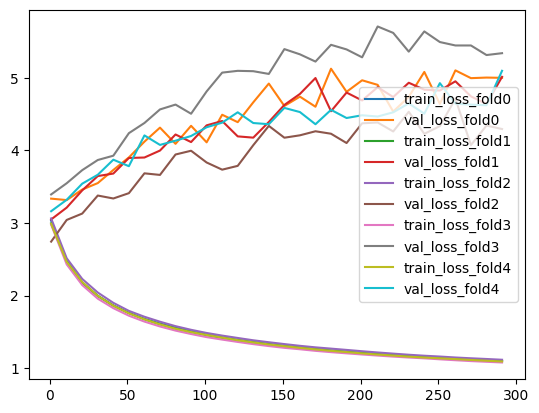

In [ ]:
from matplotlib import pyplot as plt 

figure = plt.figure()

for i, (train_losses, val_losses) in enumerate(zip(train_losses_folds, val_losses_folds)):
    plt.plot(np.arange(1, 300, 10), train_losses, label=f"train_loss_fold{i}")
    plt.plot(np.arange(1, 300, 10), val_losses, label=f"val_loss_fold{i}")
plt.legend()
plt.show()

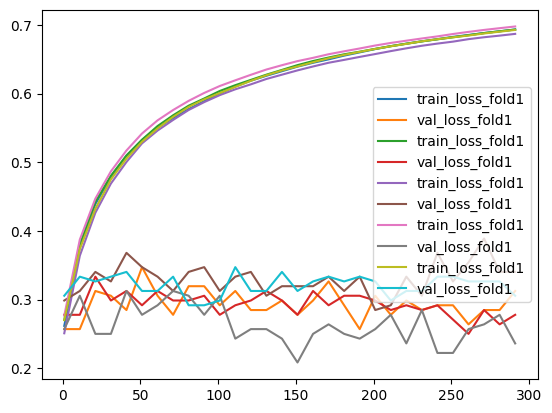

In [ ]:
figure = plt.figure()

for i, (train_acc, val_acc) in enumerate(zip(train_accs_folds, val_accs_folds)):
    i = 1
    plt.plot(np.arange(1, 300, 10), train_acc, label=f"train_loss_fold{i}")
    plt.plot(np.arange(1, 300, 10), val_acc, label=f"val_loss_fold{i}")
plt.legend()   
plt.show()

In [ ]:
#Best mean accuracy on 5 folds
best_mean_acc = val_accs_folds.mean(axis=0).max()
print("beast mean accuracy: ", best_mean_acc)
print("accuracy by folds: ", val_accs_folds[:, 4])
print("std: ", val_accs_folds[:, 4].std())

iter_best_mean_acc = val_accs_folds.mean(axis=0).argmax()
print("best epoch: ", 1 + 10 * (iter_best_mean_acc - 1))

beast mean accuracy:  0.32361111
accuracy by folds:  [0.2847222  0.3125     0.36805555 0.3125     0.3402778 ]
std:  0.028327893159647448
best epoch:  31


## Ensembling

In [ ]:
import torch 
from models import ResNetFinetune

device = 'cuda'
paths_weights = [
    '../gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/Checkpoints/resnet_fold0_epoch_30.pth',
    '../gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/Checkpoints/resnet_fold1_epoch_30.pth',
    '../gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/Checkpoints/resnet_fold2_epoch_30.pth',
    '../gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/Checkpoints/resnet_fold3_epoch_30.pth',
    '../gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/Checkpoints/resnet_fold4_epoch_30.pth'
]
models = []
for path in paths_weights:
    m = ResNetFinetune(48, weights_path=path, frozen=True)
    m.load_state_dict(torch.load(path, map_location=device))
    models.append(m)

In [ ]:
from train import create_data_loader
from utils.Dataset import ModalDataset
import numpy as np
import tqdm


test_dataset = ModalDataset(
    'test',
    path='../gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset'
)
test_dataloader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=64,
        shuffle=False,
        num_workers=8)

outputs = np.zeros((5, len(test_dataset), 48))

for i, model in enumerate(models):
    model.to(device)
    for imgs in tqdm.tqdm(test_dataloader):
        imgs = imgs.float().to(device)
        with torch.no_grad():
          np.append(outputs[i], model(imgs).cpu().numpy())

outputs.shape

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 225/225 [01:11<00:00,  3.16it/s]


(5, 14400, 48)

In [ ]:
from train import create_data_loader
from utils.Dataset import ModalDataset
import numpy as np
import pandas as pd
import tqdm
import os


test_dataset = ModalDataset(
    'test',
    path='../gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset'
)
test_dataloader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=64,
        shuffle=False,
        num_workers=8)

class_names = sorted(os.listdir(test_dataset.path))

model = ResNetFinetune(48, weights_path=path, frozen=True).to('cuda')
model.load_state_dict(
    torch.load(
        '../gdrive/MyDrive/Modal_Challendge_dataset/compressed_dataset/Checkpoints/resnet_fold0_epoch_30.pth', 
        map_location=device
        )
    )



submission = pd.DataFrame(columns=["id", "label"])

for i, batch in enumerate(test_dataloader):
    print(batch)
    images, image_names = batch
    images = images.to(device)
    preds = model(images)
    preds = preds.argmax(1)
    preds = [class_names[pred] for pred in preds.cpu().numpy()]
    submission = pd.concat(
        [
            submission,
            pd.DataFrame({"id": image_names, "label": preds}),
        ]
    )
submission.to_csv("submission.csv", index=False)